In [1]:
import pandas as pd # standard python data library
import geopandas as gp # the geo-version of pandas
import numpy as np 
import os
import fiona
import sys
from statistics import mean, median
from pandas import read_csv
import pdv_functions as pdv
from collections import Counter

# PA '18 ERJ

In [2]:
path_in = './raw-from-source/Election_Results/openelections-data-pa/2018/counties_copy/'
path_out = './raw-from-source/Election_Results/openelections-data-pa/2018/counties/'

In [3]:
vest_pa_18 = gp.read_file("./raw-from-source/VEST/pa_2018/pa_2018.shp")

# Documentation Election Results

Election results from the Pennsylvania Secretary of State's office via OpenElections (https://github.com/openelections/openelections-data-pa/).  
Precinct data was corrected with canvass reports for the following counties:  
- Berks 
- Blair 
- Bradford
- Cambria 
- Carbon
- Crawford
- Elk
- Forest
- Franklin
- Lawrence
- Lycoming
- Mifflin
- Montgomery
- Montour
- Northumberland,
- Susquehanna

The candidate totals for Berks, Blair, Crawford, and Mifflin differ from the county totals reported by the state and therefore the statewide totals differ from the official results accordingly.

# Documentation Shapefiles

Precinct shapefiles primarily from the U.S. Census Bureau's 2020 Redistricting Data Program Phase 2 release. The shapefiles from Delaware County and the City of Pittsburgh are from the respective jurisdictions instead. Precinct numbers were corrected to match the voter file in the following locales: Allegheny (Elizabeth, Pittsburgh W12), Blair (Greenfield), Bradford (Athens), Greene (Nonongahela), Monroe (Smithfield), Montgomery (Hatfield), Northampton (Bethlehem Twp), Perry (Toboyne), Washington (New Eagle, Somerset), York (Fairview).

Precinct boundaries throughout the state were edited to match voter assignments in the PA Secretary of State voter file from the 2018 election cycle. While some edits reflect official updates to wards or divisions the great majority involve voters incorrectly assigned to voting districts by the counties. As such the VEST shapefile endeavors to reflect the de facto precinct boundaries and these often differ from the official voting district boundaries, in some cases quite drastically. Wherever possible edits were made using census boundaries or alternatively using the parcel shapefiles from the respective counties. 

In certain areas voter assignments appear so erratic that it is impractical to place all voters within their assigned precinct. These areas were edited so as to place as many voters as possible within their assigned precinct without displacing a greater number from their assigned precinct. In general, municipal boundaries were retained except where significant numbers of numbers were misassigned to the wrong municipality. In cases where the odd/even split was incorrectly reversed for precinct boundary streets the official boundary was retained. All such cases involved near equal number of voters swapped between voting districts.

The following revisions were made to the base shapefiles to match the de facto 2018 precinct boundaries consistent with the voter file. Individual precincts are noted in cases of splits or merges. Due to the sheer number of edits boundary adjustments are noted at the borough/township level. There may be as many as two dozen individual precincts that were revised within a given municipality.

Adams: Adjust Cumberland, Franklin  
Allegheny: Merge CD splits for S Fayette 3/5; Split Pittsburgh W5 11/17; Merge Pittsburgh W16 9/11/12, Align   McCandless with municipal boundary; Adjust Avalon, Baldwin, Bethel Park, Braddock, Brentwood, Castle Shannon, Clairton, Collier, Coraopolis, Crescent, Dormont, Dravosburg, Duquesne, E Deer, E McKeesport, E Pittsburgh, Elizabeth, Emsworth, Forward, Glassport, Hampton, Harmar, Ingram, Jefferson Hills, Kennedy, Leet, Liberty, Marshall, McCandless, McKees Rocks, McKeesport, Monroeville, Moon, Mount Lebanon, Munhall, N Fayette, N Versailles, O'Hara, Oakdale, Penn Hills, Pine, Pittsburgh (nearly all wards), Pleasant Hills, Reserve, Richland, Ross, Scott, Sewickley, Shaler, S Fayette, S Park, Stowe, Swissvale, Upper St. Clair, W Deer, W Homestead, W Mifflin, W View, Whitaker, Whitehall, Wilkins, Wilkinsburg
Armstrong: Align Dayton, Elderton, Ford City, Kittanning, N Apollo with municipal boundaries; Adjust Ford City, Gilpin, Kiskiminetas, Kittanning, Manor, N Buffalo, Parks, Parker City, S Buffalo  
Beaver: Adjust Aliquippa, Ambridge, Baden, Beaver, Brighton, Center, Chippewa, Conway, Economy, Franklin, Hanover, Harmony, Hopewell, Midland, Monaca, N Sewickley  
Bedford: Adjust Bedford Boro, Bedford Twp  
Berks: Adjust Cumru, Douglass, Oley, Maxatawny, Robeson, Sinking Spring, Spring, Union  
Blair: Merge Tunnelhill/Allegheny Twp 4; Align Altoona, Bellwood, Duncansville, Hollidaysburg, Newry, Roaring Spring, Tyrone, Williamsburg with municipal boundaries; Adjust Allegheny, Altoona, Antis, Frankstown, Freedom, Greenfield, Huston, Juniata, N Woodbury, Logan, Snyder, Tyrone Boro, Tyrone Twp  
Bucks: Align Sellersville, Tullytown with municipal boundaries; Adjust Bensalem, Bristol Boro, Bristol Twp, Buckingham, Doylestown Twp, Falls, Hilltown, Lower Makefield N, Lower Southampton E, Middletown, Milford, Morrissville, Newtown Twp, Northampton, Solebury Lower, Solebury, Springfield, Tinicum, Upper Makefield, Upper Southampton E, Warminster, Warrington, W Rockhill  
Butler: Merge CD splits for Cranberry E 2, 3, Cranberry W 1, 2, Jefferson 1, 2; Align Butler Twp, Valencia with municipal boundaries; Adjust Adams, Buffalo, Butler Boro, Butler Twp, Center, Cranberry E, Cranberry W, Jackson, Jefferson, Zelienople
Cambria: Align Daisytown, Sankertown, W Taylor, Wilmore with municipal boundaries; Adjust Cambria, Conemaugh, Croyle, E Taylor, Ebensburg, E Carroll, Geistown, Jackson, Johnstown W8, W17, W20, Lower Yoder, Northern Cambria, Portage Boro, Portage Twp, Richland, Southmont, Stonycreek, Summerhill, Susquehanna, Upper Yoder, W Carroll, Westmont
Cameron: Adjust Emporium, Shippen
Carbon: Adjust Jim Thorpe, Kidder, Mahoning, New Mahoning, Summit Hill
Centre: Merge CD splits for Halfmoon E Central/Proper; Merge Ferguson Northeast 1 A/B; Adjust Benner, College, Ferguson, Patton
Chester: Merge CD/LD splits for Birmingham 2, Phoenixville M 1; Adjust Birmingham, E Bradford S, E Fallowfield, E Goshen, E Marlborough, Easttown, N Coventry, Spring City, Tredyffrin M, Uwchlan, W Bradford, W Caln, W Goshen N, W Goshen S, Westtown
Clarion: Merge Emlenton/Richland; Adjust Clarion, Highland, Farmington, Knox
Clearfield: Adjust Bradford, Cooper, Decatur, Golden Rod, Lawrence Glen Richie, Morris, Plympton, Woodward
Columbia: Merge Ashland/Conyngham; Adjust Orange, Scott West
Crawford: Align Mead, Woodcock with municipal boundaries
Cumberland: Merge CD splits for N Middleton 1, 3; Split Lower Allen 1/Annex; Align Carlisle, E Pennsboro, Hampton, Lemoyne, Lower Allen, Mechanisburg, Middlesex, Mount Holly Springs, N Middleton, Shiremanstown, Silver Spring, W Pennsboro, Wormsleysburg with municipal boundaries
Dauphin: Align Middletown with municipal boundary; Adjust Derry, Harrisburg W1, W7, W8, W9, Hummelstown, Lower Paxton, Lykens, Middletown
Delaware: Adjust Chester, Concord, Darby Boro, Darby Twp, Haverford, Marple, Nether Providence, Newtown, Radnor, Ridley, Sharon Hill, Thornbury, Tinicum, Trainer, Upper Chichester, Upper Darby, Upper Providence
Elk: Split N/S Horton; Adjust Johnsonburg, Ridgeway Boro, Ridgeway Twp, St. Marys
Erie: Adjust Erie W1, W4, W5, W6, Greene, Lawrence Park, McKean, Millcreek, North East
Fayette: Align Dunbar with municipal boundary; Adjust Brownsville, Bullskin, Dunbar, Georges, German, Luzerne, N Union, Redstone
Franklin: Align Mercersburg with municipal boundary; Adjust Antrim, Fannett, Greene, Guilford, Hamilton, Metal, Peters, Quincy, St. Thomas, Southampton, Washington
Fulton: Align McConnellsburg with municipal boundary
Greene: Align Carmichaels with municipal boundary; Adjust Cumberland, Dunkard, Franklin, Jefferson, Lipencott, Mather, Morgan Chart, Monongahela, Nemacolin
Huntingdon: Merge CD splits for Penn; Adjust Huntingdon, Mount Union
Jefferson:  Align Reynoldsville with municipal boundary; Adjust Punxsutawney
Lackawanna: Adjust Archbald, Blakely, Carbondale, Clarks Summit, Dickson City, Dunmore, Fell, Jermyn, Jessup, Mayfield, Moosic, Old Forge, Olyphant, Scranton W1, W2, W3, W6, W7, W10, W12, W13, W14, W15, W16, W19, W20, W23, S Abington, Taylor, Throop
Lancaster: Split Lancaster 7-8 CV/LS; Adjust Brecknock, Columbia, E Hempfield, E Lampeter, E Petersburg, Elizabethtown, Ephrata, Lancaster W4, W8, Lititz, Manheim, Manor, Millersville, Mt Joy Boro, Mt Joy Twp, New Holland, Penn, Providence, Rapho, Warwick, W Cocalico, W Donegal, W Hempfield
Lawrence: Adjust Neshannock
Lebanon: Adjust Jackson, Lickdale, S Lebanon, Union Green Pt
Lehigh: Adjust Lower Macungie, Salisbury
Luzerne: Merge CD splits for Hazle 1; Align Avoca, Pittston with municipal boundaries; Adjust Butler, Dallas, Exeter, Foster, Freeland, Hanover, Hazle, Jenkins, Kingston Boro, Kingston Twp, Larksville, Lehman, Nanticoke, Newport, Plains, Salem, Smoyersville, W Wyoming, Wilkes-Barre
Lycoming: Align Williamsport with municipal boundary; Adjust Jersey Shore
McKean: Adjust Bradford City, Bradford Twp, Foster, Keating, Otto
Mercer: Adjust Delaware, Fredonia, Greenville, Hempfield, Hermitage, Sharon, Sharpsville, S Pymatuning, W Salem
Mifflin: Split Brown Reedsville/Church Hill
Monroe: Align E Stroudsburg with municipal boundary; Adjust E Stroudsburg, Smithfield
Montgomery: Add CD special election splits for Horsham 2-2, Perkiomen 1, Plymouth 2-3; Adjust Abington, Lower Merion, Pottstown, Springfield, Upper Moreland, Upper Merion, Upper Providence
Northampton: Align Glendon, Walnutport with municipal boundaries; Adjust Bangor, Bethlehem W2, W3, W4, W7, W9, W14, W15, Bethlehem Twp, Bushkill, Easton, Forks, Hanover, Hellertown, Lehigh, Lower Mt Bethel, Lower Saucon, Moore, Nazareth, Palmer, Plainfield, Upper Mt Bethel, Washington, Williams
Northumberland: Align Northumberland with municipal boundary; Adjust Coal, Milton, Mount Carmel W, Natalie-Strong, Northumberland, Point, Ralpho, Shamokin, Sunbury, Upper Augusta
Philadelphia: Adjust 1-19/21, 5-3/19, 7-2/3/17, 7-6/7, 9-5/6, 15-7/10, 17-20/26, 20-5/10, 21-1/15, 21-40/41, 22-21/26, 23-11/12, 25-9/17, 25-4/7/12, 25-10/12, 26-1/2, 27-7/8, 27-18/20/21, 28-1/8, 29-9/11, 29-10/17, 30-14/15, 31-5/6, 38-11/17, 38-13/20, 38-15/19, 40-12/18/19, 40-17/19, 42-3/4/7, 44-8/14, 50-3/12, 50-11/27, 52-2/6/9, 52-3/8, 57-6/7, 57-10/27, 57-17/28, 58-6/12, 62-5/19, 65-4/7, 65-11/16, 66-22/34  
Pike: Adjust Matamoras  
Potter: Adjust Galeton, Sharon  
Schuylkill: Adjust Coaldale, N Manheim, Norwegian, Porter, Pottsville
Somerset: Align New Centerville with municipal boundary; Adjust Conemaugh, Jefferson, Middlecreek, Paint, Somerset Boro  
Susquehanna: Adjust Montrose; Lanesboro, Susquehanna Depot  
Tioga: Adjust Delmar, Wellsboro  
Union: Adjust Buffalo, White Deer  
Venango: Adjust Franklin, Sugarcreek, Cornplanter, Oil City  
Warren: Adjust Conewango  
Washington: Align Allenport, Beallsville, Burgettstown, Canonsburg, Carroll, Charleroi, Claysville, Elco, Finleyville, Houston, Long Branch, McDonald, Monongahela, Speers, Twilight with municipal boundaries; Adjust Amwell, Bentleyville, California, Canonsburg, Canton, Cecil, Centerville, Chartiers, Donegal, Donora, Fallowfield, Hanover, Independence, Mount Pleasant, N Franklin, N Strabane, Peters, Robinson, Smith, Somerset, S Franklin, S Strabane, Union Washington, W Brownsville  
Wayne: Adjust Honesdale  
Westmoreland: Merge CD splits for Unity Pleasant Unity; Align Greensburg with municipal boundary; Adjust Allegheny, Arnold, Bell, Derry, E Huntingdon, Fairfield, Greensburg W1-W8, Hempfield, Jeannette, Latrobe, Ligonier, Lower Burrell, Monessen, Mount Pleasant, Murraysville, New Kensington, N Belle Vernon, N Huntingdon, Penn, Rostraver, St. Clair, Scottdale, Sewickley, S Greensburg, S Huntingdon, Trafford, Upper Burrell, Unity, Vandergrift, Washington, Youngwood  
Wyoming: Adjust Falls  
York: Merge CD splits for York Twp 5-3; Align E Prospect, Goldsboro, Jefferson, Manchester, Monaghan, Wellsville, York with municipal boundaries; Adjust Chanceford, Codorus, Conewago, Dover, Fairview, Hanover, Jackson, Lower Windsor, New Freedom, Newberry, N Codorus, Penn, Red Lion, Shrewsbury, Spring Garden, Springbettsbury, W Manchester, Windsor Boro, Windsor Twp, Wrightsville, York Twp, York W5, W6, W15  

## Election Results

#### Load a FIPS file

In [4]:
fips_file = pd.read_csv("./raw-from-source/FIPS/US_FIPS_Codes.csv")
fips_file = fips_file[fips_file["State"]=="Pennsylvania"]
fips_file["FIPS County"]=fips_file["FIPS County"].astype(str)
fips_file["FIPS County"]=fips_file["FIPS County"].str.zfill(3)
fips_file["unique_ID"] =  "42" + fips_file["FIPS County"]
fips_codes = fips_file["unique_ID"].tolist()
pa_fips_dict = dict(zip(fips_file["County Name"],fips_file["FIPS County"]))

#### Load election results

In [5]:
combined_files = []

for file in os.listdir(path_out):
    if "__general" in file:
        test_load = pd.read_csv(path_out+file)
        test_load = test_load[["county","precinct","office","district","party","candidate","votes"]]
        combined_files.append(test_load)
        
pa_election = pd.concat(combined_files)

## Round Two Typo Fixing

In [6]:
pa_election.loc[(pa_election["county"]=="Juniata")
               &(pa_election["precinct"]=="0008 MIFFLINTOWN")
               &(pa_election["candidate"]=="BOB CASEY, JR"), "votes"] = 106

In [7]:
pa_election.loc[(pa_election["county"]=="Huntingdon")&
               (pa_election["district"]==81)]

,county,precinct,office,district,party,candidate,votes
22,Huntingdon,0001 Alexandria Borough,State House,81.0,DEM,RICK ROGERS,54
23,Huntingdon,0001 Alexandria Borough,State House,81.0,REP,RICH IRVIN,89
24,Huntingdon,0001 Alexandria Borough,State House,81.0,LIB,JOSEPH P SOLOSKI,6
25,Huntingdon,0001 Alexandria Borough,State House,81.0,NaN,WRITE-IN,0
48,Huntingdon,0002 Barree Township,State House,81.0,DEM,RICK ROGERS,40
...,...,...,...,...,...,...,...
1481,Huntingdon,0057 West Township,State House,81.0,NaN,WRITE-IN,0
1504,Huntingdon,0058 Wood Township,State House,81.0,DEM,RICK ROGERS,43
1505,Huntingdon,0058 Wood Township,State House,81.0,REP,RICH IRVIN,121
1506,Huntingdon,0058 Wood Township,State House,81.0,LIB,JOSEPH P SOLOSKI,1


In [8]:
pa_election.loc[(pa_election["county"]=="Huntingdon")
                &(pa_election["precinct"]=="0022 Huntingdon/5th District")
               &(pa_election["candidate"]=="RICK ROGERS"),"votes"] = 442.0

In [9]:
pa_election.loc[(pa_election["county"]=="Huntingdon")
                &(pa_election["precinct"]=="0027 Logan Township")
               &(pa_election["candidate"]=="RICH IRVIN"),"votes"] = 218.0

In [10]:
pa_election.loc[(pa_election["precinct"]=="Hop Bottom Boro")
               &(pa_election["candidate"]=="BOB CASEY, JR"),"votes"] = 43.0

In [11]:
pa_election.loc[(pa_election["precinct"]=="Hop Bottom Boro")
                &(pa_election["candidate"]=="LOU BARLETTA"),"votes"] = 52.0

In [12]:
pa_election.loc[(pa_election["precinct"]=="6005 WILLIAMSPORT 5")
                &(pa_election["candidate"]=="TOM WOLF"),"votes"] = 134.0

In [13]:
pa_election.loc[(pa_election["precinct"]=="0073 WAYNE TWP D2")
                &(pa_election["candidate"]=="SCOTT R WAGNER"),"votes"] = 423


In [14]:
pa_election.loc[(pa_election["precinct"]=="0006 JENKS TWP")
                &(pa_election["candidate"]=="CONRAD WARNER"),"votes"] = 132.0

pa_election.loc[(pa_election["precinct"]=="0004 HICKORY TWP")
               &(pa_election["candidate"]=="BOB CASEY, JR"),"votes"] = 69.0

pa_election.loc[(pa_election["precinct"]=="0004 HICKORY TWP")
               &(pa_election["candidate"]=="TOM WOLF"),"votes"] = 66.0

pa_election.loc[(pa_election["precinct"]=="0004 HICKORY TWP")
               &(pa_election["candidate"]=="SUSAN BOSER"),"votes"] = 58.0



In [15]:
pa_election.loc[(pa_election["precinct"]=="45 Packer Twp")
               &(pa_election["candidate"]=="PAUL GLOVER"),"votes"] = 1.0

In [16]:
pa_election.loc[(pa_election["precinct"]=="62 Weissport Borough")
                &(pa_election["candidate"]=="DALE R KERNS, JR"),"votes"] = 1.0

In [17]:
pa_election.loc[pa_election["precinct"]=="12 Franklin Twp�Harrity","precinct"] = "12 Franklin Twp-Harrity"

In [18]:
pa_election.loc[pa_election["precinct"]=="51-4 Penn Forest Two-Northeast","precinct"] = "51-4 Penn Forest Twp-Northeast"

In [19]:
pa_election.loc[pa_election["precinct"]=="57-I Towamensing Twp-South-1","precinct"] = "57-1 Towamensing Twp-South-1"

In [20]:
pa_election.loc[pa_election["precinct"]=="7 Fast Penn Twp-South","precinct"] = "7 East Penn Twp-South"

In [21]:
pa_election.loc[pa_election["precinct"]=="0039 JACKSON TOWNSHIP`","precinct"] = "0039 JACKSON TOWNSHIP"

In [22]:
pa_election = pa_election[pa_election["precinct"]!="GOVERNMENT STUDY COMMISSIONER"]

In [23]:
pa_election.loc[pa_election["precinct"]=="PETERSXD 3", "precinct"] = "PETERS D-3"

In [24]:
pa_election.reset_index(inplace = True, drop = True)

In [25]:
pa_election.loc[(pa_election["precinct"]=="Hamilton Twp - 2nd Dist")&
            (pa_election["office"]=="U.S. Senate")&
            (pa_election["candidate"]=="DALE R KERNS, JR"),"votes"] = 17

In [26]:
pa_election.loc[(pa_election["precinct"]=="St. Marys 9th")&
            (pa_election["office"]=="U.S. Senate")&
            (pa_election["party"]=="GRN"),"votes"] = 1

In [27]:
pa_election.loc[(pa_election["precinct"]=="St. Marys 9th")&
            (pa_election["office"]=="Governor")&
            (pa_election["party"]=="GRN"),"votes"] = 0

In [28]:
pa_election.loc[(pa_election["precinct"]=="Lewisburg 4")&
            (pa_election["office"]=="State House")&
            (pa_election["candidate"]=="JENNIFER RAGER-KAY"),"votes"] = 261

In [29]:
pa_election.loc[(pa_election["precinct"]=="Portage Boro Second Wd")&
            (pa_election["office"]=="Governor")&
            (pa_election["party"]=="GRN"),"votes"] = 2

In [30]:
pa_election.loc[(pa_election["precinct"]=="15 Jim Thorpe Borough-Second Ward")&
               (pa_election["candidate"]=="PAUL GLOVER"), "votes"] = 1

In [31]:
pa_election.loc[(pa_election["precinct"]=="45 Packer Twp") &
                (pa_election["candidate"]=="DALE R KERNS, JR"),"votes"] = 1

In [32]:
#cumberland_election.loc[cumberland_election["candidate"]=="Write-ins", "party"] = "OTH"

# Corrections Based on Uncertified Precinct Results File

The Addison update is based on this:

https://raw.githubusercontent.com/openelections/openelections-sources-pa/master/2018/ERStat_2018_G(114234)_20190726.txt

## Somerset County

In [33]:
pa_election.loc[(pa_election["candidate"]=="LOU BARLETTA")&(pa_election["county"]=="Somerset")
               &(pa_election["precinct"]=="ADDISON TOWNSHIP"),"votes"] = 233

## Berks County

In [34]:
# pa_election.loc[(pa_election["county"]=="Berks")
#                 &(pa_election["precinct"]=="Wernersville Boro")
#                &(pa_election["candidate"]=="TOM WOLF"),"votes"] = 591

# pa_election.loc[(pa_election["county"]=="Berks")
#                 &(pa_election["precinct"]=="Wernersville Boro")
#                &(pa_election["candidate"]=="BOB CASEY, JR"),"votes"] = 580

# pa_election.loc[(pa_election["county"]=="Berks")
#                 &(pa_election["precinct"]=="Wernersville Boro")
#                &(pa_election["candidate"]=="DAN MEUSER"),"votes"] = 527

## Blair (013)

In [35]:
# pa_election.loc[(pa_election["county"]=="Blair")&
#             (pa_election["precinct"]=="BLAIR TWP 1")&
#            (pa_election["candidate"]=="BOB CASEY, JR"),"votes"] = 261

# pa_election.loc[(pa_election["county"]=="Blair")&
#             (pa_election["precinct"]=="BLAIR TWP 1")&
#            (pa_election["candidate"]=="BRENT OTTAWAY"),"votes"] = 246

# pa_election.loc[(pa_election["county"]=="Blair")&
#             (pa_election["precinct"]=="BLAIR TWP 1")&
#            (pa_election["candidate"]=="EMILY BEST"),"votes"] = 212

# pa_election.loc[(pa_election["county"]=="Blair")&
#             (pa_election["precinct"]=="BLAIR TWP 1")&
#            (pa_election["candidate"]=="LAURA BURKE"),"votes"] = 234

# pa_election.loc[(pa_election["county"]=="Blair")&
#             (pa_election["precinct"]=="BLAIR TWP 1")&
#            (pa_election["candidate"]=="TOM WOLF"),"votes"] = 279

In [36]:
# pa_election.loc[(pa_election["county"]=="Blair")&
#             (pa_election["precinct"]=="LOGAN TWP 1")&
#            (pa_election["candidate"]=="BOB CASEY, JR"),"votes"] = 275

# pa_election.loc[(pa_election["county"]=="Blair")&
#             (pa_election["precinct"]=="LOGAN TWP 1")&
#            (pa_election["candidate"]=="BRENT OTTAWAY"),"votes"] = 245

# pa_election.loc[(pa_election["county"]=="Blair")&
#             (pa_election["precinct"]=="LOGAN TWP 1")&
#            (pa_election["candidate"]=="EMILY BEST"),"votes"] = 251

# pa_election.loc[(pa_election["county"]=="Blair")&
#             (pa_election["precinct"]=="LOGAN TWP 1")&
#            (pa_election["candidate"]=="TOM WOLF"),"votes"] = 297


In [37]:
# pa_election.loc[(pa_election["county"]=="Blair")&
#             (pa_election["precinct"]=="HOLLIDAYSBURG 1")&
#            (pa_election["candidate"]=="BOB CASEY, JR"),"votes"] = 96

# pa_election.loc[(pa_election["county"]=="Blair")&
#             (pa_election["precinct"]=="HOLLIDAYSBURG 1")&
#            (pa_election["candidate"]=="BRENT OTTAWAY"),"votes"] = 91

# pa_election.loc[(pa_election["county"]=="Blair")&
#             (pa_election["precinct"]=="HOLLIDAYSBURG 1")&
#            (pa_election["candidate"]=="EMILY BEST"),"votes"] = 83

# pa_election.loc[(pa_election["county"]=="Blair")&
#             (pa_election["precinct"]=="HOLLIDAYSBURG 1")&
#            (pa_election["candidate"]=="LAURA BURKE"),"votes"] = 87

# pa_election.loc[(pa_election["county"]=="Blair")&
#             (pa_election["precinct"]=="HOLLIDAYSBURG 1")&
#            (pa_election["candidate"]=="TOM WOLF"),"votes"] = 87

In [38]:
# pa_election.loc[(pa_election["county"]=="Blair")&
#             (pa_election["precinct"]=="LOGAN TWP 4")&
#            (pa_election["candidate"]=="KEN V KRAWCHUK"),"votes"] = 10

# pa_election.loc[(pa_election["county"]=="Blair")&
#             (pa_election["precinct"]=="LOGAN TWP 4")&
#            (pa_election["candidate"]=="JOHN JOYCE"),"votes"] = 486

# pa_election.loc[(pa_election["county"]=="Blair")&
#             (pa_election["precinct"]=="LOGAN TWP 4")&
#            (pa_election["candidate"]=="JUDY WARD"),"votes"] = 486

# pa_election.loc[(pa_election["county"]=="Blair")&
#             (pa_election["precinct"]=="LOGAN TWP 4")&
#            (pa_election["candidate"]=="LOU BARLETTA"),"votes"] = 443

# pa_election.loc[(pa_election["county"]=="Blair")&
#             (pa_election["precinct"]=="LOGAN TWP 4")&
#            (pa_election["candidate"]=="LOU SCHMITT"),"votes"] = 530

In [39]:
# pa_election.loc[(pa_election["county"]=="Blair")&
#             (pa_election["precinct"]=="ALLEGHENY 2")&
#            (pa_election["candidate"]=="SCOTT R WAGNER"),"votes"] = 583

# pa_election.loc[(pa_election["county"]=="Blair")&
#             (pa_election["precinct"]=="ALLEGHENY 2")&
#            (pa_election["candidate"]=="JOHN JOYCE"),"votes"] = 605

# pa_election.loc[(pa_election["county"]=="Blair")&
#             (pa_election["precinct"]=="ALLEGHENY 2")&
#            (pa_election["candidate"]=="JUDY WARD"),"votes"] = 631

# pa_election.loc[(pa_election["county"]=="Blair")&
#             (pa_election["precinct"]=="ALLEGHENY 2")&
#            (pa_election["candidate"]=="LOU BARLETTA"),"votes"] = 581

In [40]:
# pa_votes_filtered[pa_votes_filtered[29]==13].to_csv("./blair_uncertified_precincts.csv", index = False)
# pa_election[(pa_election["county"]=="Blair")].to_csv("./blair_open_elections.csv", index = False)

## Crawford (039)

## Juniata (067)

## Mifflin (087)

## Montour (093)

# Pivot Results

In [41]:
#Filter down results to the relevant offices 
office_list = ["U.S. Senate", 'Governor', 'U.S. House', "State House", "State Senate", "Special U.S. House"]
filtered_pa_election = pa_election[pa_election["office"].isin(office_list)]
county_changes_dict = {"Washington ":"Washington"}

#Update the county names and add a FIPS using the dictionary created above
filtered_pa_election.loc[:,"county"] = filtered_pa_election.loc[:,"county"].map(county_changes_dict).fillna(filtered_pa_election.loc[:,"county"])
filtered_pa_election.loc[:,"County_FIPS"]=filtered_pa_election.loc[:,"county"].map(pa_fips_dict).fillna(filtered_pa_election.loc[:,"county"])

/var/folders/1t/0q4w6hm92mg_zxd84dfxmq3m0000gn/T/ipykernel_8858/3894152954.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_pa_election.loc[:,"county"] = filtered_pa_election.loc[:,"county"].map(county_changes_dict).fillna(filtered_pa_election.loc[:,"county"])
/var/folders/1t/0q4w6hm92mg_zxd84dfxmq3m0000gn/T/ipykernel_8858/3894152954.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_pa_election.loc[:,"County_FIPS"]=filtered_pa_election.loc[:,"county"].map(pa_fips_dict).fillna(filtered

In [42]:
def clean_vote(value):
    if type(value)==int:
        return value
    elif type(value)==float:
        return int(value)
    elif "," in value:
        return int(value.replace(",",""))
    else:
        try:
            return int(value)
        except ValueError as v:
            print(value)

In [43]:
#Fill NA values in the votes column
filtered_pa_election["votes"]=filtered_pa_election["votes"].fillna(0)

#Change votes to strings to be able to edit out the "," formatting
filtered_pa_election["votes"]=filtered_pa_election["votes"].apply(lambda x: clean_vote(x))

print(sum(filtered_pa_election["votes"]))

filtered_pa_election['precinct'] = filtered_pa_election['precinct'].astype(str)

#Create a column to pivot the dataframe on
filtered_pa_election["pivot_col"] = filtered_pa_election["County_FIPS"]+filtered_pa_election["precinct"]

#Standardize the other columns
filtered_pa_election["party"] = filtered_pa_election["party"].str.upper()

23623666


/var/folders/1t/0q4w6hm92mg_zxd84dfxmq3m0000gn/T/ipykernel_8858/2733370413.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_pa_election["votes"]=filtered_pa_election["votes"].fillna(0)
/var/folders/1t/0q4w6hm92mg_zxd84dfxmq3m0000gn/T/ipykernel_8858/2733370413.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_pa_election["votes"]=filtered_pa_election["votes"].apply(lambda x: clean_vote(x))
/var/folders/1t/0q4w6hm92mg_zxd84dfxmq3m0000gn/T/ipykernel_8858/2733370413.py:9: SettingWithCopyW

In [44]:
#Create a dictionary to change the party names
filtered_pa_election["party"] = np.where(filtered_pa_election["party"].isna(), "OTH", filtered_pa_election["party"])

/var/folders/1t/0q4w6hm92mg_zxd84dfxmq3m0000gn/T/ipykernel_8858/564167541.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_pa_election["party"] = np.where(filtered_pa_election["party"].isna(), "OTH", filtered_pa_election["party"])


In [45]:
filtered_pa_election = filtered_pa_election[~filtered_pa_election["precinct"].str.contains("Total")]
filtered_pa_election = filtered_pa_election[~filtered_pa_election["candidate"].isin(['YES', 'NO', 'CAST VOTES', 'OVER VOTES','UNDER VOTES', 'NO VOTE','BLANK VOTES'])]


In [46]:
filtered_pa_election.loc[filtered_pa_election["candidate"].isna(),"candidate"] = "Other"

In [47]:
filtered_pa_election.loc[filtered_pa_election["party"]=="OTH", "candidate"] = "WRITE-IN"

In [48]:

filtered_pa_election = filtered_pa_election[~((filtered_pa_election["district"].isna())&(filtered_pa_election["office"].isin(['State Senate', 'State House'])))]

In [49]:
filtered_pa_election.loc[(filtered_pa_election["precinct"].isin(['0074 WILMINGTON TWP D1', '0075 WILMINGTON TWP D2'])) &
                        (filtered_pa_election["office"]=="State House") &
                         (filtered_pa_election["candidate"]=="WRITE-IN"), "party"] = "OTH"

In [50]:
filtered_pa_election.loc[(filtered_pa_election["candidate"]=="WRITE-IN") & 
                         (filtered_pa_election["county"]=="Philadelphia") &
                         (filtered_pa_election["party"]!="OTH"),"party"] = "OTH"

In [51]:
filtered_pa_election.loc[(filtered_pa_election["candidate"]=="WRITE-IN"),"party"] = 'OTH'

In [52]:
filtered_pa_election.loc[filtered_pa_election["candidate"]=="Other", "party"] = "OTH"
filtered_pa_election.loc[filtered_pa_election["candidate"]=="Other", "candidate"] = "WRITE-IN"

In [53]:
import math
def clean(x):
    try:
        if math.isnan(x):
            return "N/A"
        else:
            return str(int(x))
    except ValueError as V:
        return str(x).replace(".0","")
    except TypeError as T:
        return str(x).replace(".0","")


In [54]:
filtered_pa_election["district_clean"] = filtered_pa_election["district"].apply(lambda x: clean(x))

In [55]:
filtered_pa_election["cleaner_id"] = np.where(filtered_pa_election["district_clean"]=="N/A", 
                                             filtered_pa_election["office"]+"-:-"+filtered_pa_election["party"],
                                             filtered_pa_election["office"]+"-:-"+filtered_pa_election["district_clean"]+
                                             "-:-"+filtered_pa_election["party"])

In [56]:
clean_id_list = list(filtered_pa_election["cleaner_id"].unique())

In [57]:
filtered_pa_election["cleaner_id"] = np.where(filtered_pa_election["district_clean"]=="N/A", 
                                             filtered_pa_election["office"]+"-:-"+filtered_pa_election["party"],
                                             filtered_pa_election["office"]+"-:-"+filtered_pa_election["district_clean"]+
                                             "-:-"+filtered_pa_election["party"])

name_cleaner = {}
for val in clean_id_list:
    names_list = list(filtered_pa_election[filtered_pa_election["cleaner_id"]==val]["candidate"].unique())
    if len(names_list) > 1:
        for index, value in enumerate(names_list):
            if index == 0:
                 same_name = value
            else:
                name_cleaner[value] = same_name

In [58]:
check_these_ids = []
name_cleaner = {}
for val in clean_id_list:
    names_list = list(filtered_pa_election[filtered_pa_election["cleaner_id"]==val]["candidate"].unique())
    if len(names_list) > 1:
        check_these_ids.append(val)
        print("There are duplicate names under:", val)
        print("\t",names_list)
        print("")
        for index, value in enumerate(names_list):
            if index == 0:
                 same_name = value
                    
            else:
                name_cleaner[value] = same_name

## Define a candidate column

In [59]:
filtered_pa_election['office'] = np.where(filtered_pa_election["district_clean"]=="N/A", filtered_pa_election['office'], filtered_pa_election['office']+"-"+filtered_pa_election["district_clean"].astype(str))

In [60]:
filtered_pa_election['office'].unique()

array(['U.S. Senate', 'Governor', 'U.S. House-10', 'State House-92',
       'U.S. House-11', 'State Senate-28', 'State House-94',
       'State House-169', 'State Senate-48', 'State House-47',
       'State House-196', 'State House-93', 'State House-95',
       'U.S. House-2', 'U.S. House-3', 'U.S. House-5', 'State House-152',
       'State House-170', 'State House-172', 'State House-173',
       'State House-174', 'State House-175', 'State House-177',
       'State House-179', 'State House-180', 'State House-181',
       'State House-182', 'State House-184', 'State House-185',
       'State House-186', 'State House-188', 'State House-190',
       'State House-191', 'State House-192', 'State House-194',
       'State House-195', 'State House-197', 'State House-198',
       'State House-200', 'State House-201', 'State House-202',
       'State House-203', 'State Senate-2', 'State Senate-4',
       'State Senate-8', 'U.S. House-17', 'U.S. House-18',
       'State Senate-38', 'State Senat

In [61]:
#Create a candidate column
filtered_pa_election["cand_col"]=filtered_pa_election["office"]+ "-:-" + filtered_pa_election["candidate"] + '-:-' + filtered_pa_election['party']

In [62]:
filtered_pa_election["cand_col"]

6            U.S. Senate-:-BOB CASEY, JR-:-DEM
7             U.S. Senate-:-LOU BARLETTA-:-REP
8                U.S. Senate-:-NEAL GALE-:-GRN
9         U.S. Senate-:-DALE R KERNS, JR-:-LIB
10                U.S. Senate-:-WRITE-IN-:-OTH
                          ...                 
194884     U.S. House-13-:-BRENT OTTAWAY-:-DEM
194885        U.S. House-13-:-JOHN JOYCE-:-REP
194886          U.S. House-13-:-WRITE-IN-:-OTH
194887     State House-89-:-ROB KAUFFMAN-:-REP
194888         State House-89-:-WRITE-IN-:-OTH
Name: cand_col, Length: 159172, dtype: object

In [63]:
def get_race(race_string):
    race_string = race_string.split("-:-")[0]
    if "U.S. House" in race_string or "Representative in Congress" in race_string:
        return "CON"
    elif "State House" in race_string or "Representative in the General Assembly" in race_string:
        return "SL"
    elif "State Senate" in race_string or "Senator in the General Assembly" in race_string:
        return "SU"
    elif "President" in race_string:
        return "PRE"
    elif "US Senate" in race_string or "U.S. Senate" in race_string or "United States Senator" in race_string:
        return "USS"
    elif "Public Service" in race_string:
        return "PSC"
    elif "Attorney General" in race_string:
        return "ATG"
    elif "Auditor General" in race_string:
        return "AUD"
    elif "Treasurer" in race_string:
        return "TRE"
    elif "Governor" in race_string:
        return "GOV"
    else:
        print("No race for:", race_string)
        raise ValueError
        
        
# To modify
def get_election_type(race_string):
    if "Special" in race_string:
        return "S"
    else:
        return "G"
        
def get_party(race_string):
    race_string = race_string.split("-:-")[2]
    if race_string == "N/A":
        return "O"
    else:
        return race_string[0]
           
def get_name(name_string):
    name_string = name_string.split("-:-")[1]
    name_string = name_string.replace(" (I)","")
    name_string = name_string.replace("'","")
    likely_last = name_string.split(" ")[-1]
    proposed_last = likely_last[:3]
    if proposed_last in ['II', 'III', 'Jr', 'Jr.', 'Sr.', 'JR.', "JR", "IV", "SR"]:
        likely_last = name_string.split(" ")[-2]
        proposed_last = likely_last[:3]
    return proposed_last.upper()

def get_district(race_string, fill_level):
    race_string = race_string.split("-:-")[0]
    dist_area = race_string.split("-")[1]
    dist = dist_area.split(" ")[-1]
    return dist.zfill(fill_level)

def column_rename_function(name_string):
    election_type = get_election_type(name_string)
    year = "18"
    party = get_party(name_string)
    race = get_race(name_string)
    district = ""
    if race in ["CON", "SU"]:
        district = get_district(name_string, 2)
        year = ""
    elif race in ["SL"]:
        district = get_district(name_string, 3)
        year = ""
    name = get_name(name_string)
    new_col_name = election_type + year + race + district + party + name
    if len(new_col_name) > 10:
        print(name_string)
        print(new_col_name)
    return new_col_name



In [64]:
# Make a dictionary that points to the new column names and checks for duplicates
race_columns = [i for i in list(filtered_pa_election["cand_col"].unique())]

race_updates_dict = {}
new_names = []
for val in race_columns:
    try:
        new_name = column_rename_function(val)
        race_updates_dict[val] = new_name
        if new_name not in new_names:
            new_names.append(new_name)
        else:
            print("Duplicate", new_name)
    except IndexError as e:
        print(val)
        print(e)
        break

In [65]:
race_updates_dict

{'U.S. Senate-:-BOB CASEY, JR-:-DEM': 'G18USSDCAS',
 'U.S. Senate-:-LOU BARLETTA-:-REP': 'G18USSRBAR',
 'U.S. Senate-:-NEAL GALE-:-GRN': 'G18USSGGAL',
 'U.S. Senate-:-DALE R KERNS, JR-:-LIB': 'G18USSLKER',
 'U.S. Senate-:-WRITE-IN-:-OTH': 'G18USSOWRI',
 'Governor-:-TOM WOLF-:-DEM': 'G18GOVDWOL',
 'Governor-:-SCOTT R WAGNER-:-REP': 'G18GOVRWAG',
 'Governor-:-PAUL GLOVER-:-GRN': 'G18GOVGGLO',
 'Governor-:-KEN V KRAWCHUK-:-LIB': 'G18GOVLKRA',
 'Governor-:-WRITE-IN-:-OTH': 'G18GOVOWRI',
 'U.S. House-10-:-GEORGE SCOTT-:-DEM': 'GCON10DSCO',
 'U.S. House-10-:-SCOTT PERRY-:-REP': 'GCON10RPER',
 'U.S. House-10-:-WRITE-IN-:-OTH': 'GCON10OWRI',
 'State House-92-:-SHANNA DANIELSON-:-DEM': 'GSL092DDAN',
 'State House-92-:-DAWN KEEFER-:-REP': 'GSL092RKEE',
 'State House-92-:-WRITE-IN-:-OTH': 'GSL092OWRI',
 'U.S. House-11-:-JESS KING-:-DEM': 'GCON11DKIN',
 'U.S. House-11-:-LLOYD K SMUCKER-:-REP': 'GCON11RSMU',
 'U.S. House-11-:-WRITE-IN-:-OTH': 'GCON11OWRI',
 'State Senate-28-:-JUDITH HIGGINS-:-DEM':

In [66]:
def clean_cand_dict_export(key):
    key_list = key.split("-:-")
    return key_list[1]+ " (" + key_list[2] + ") " + key_list[0]

In [67]:
race_updates_dict_sorted = dict(sorted(race_updates_dict.items(), key=lambda item: item[1]))

In [68]:
race_updates_dict_sorted

{'Governor-:-TOM WOLF-:-DEM': 'G18GOVDWOL',
 'Governor-:-PAUL GLOVER-:-GRN': 'G18GOVGGLO',
 'Governor-:-KEN V KRAWCHUK-:-LIB': 'G18GOVLKRA',
 'Governor-:-WRITE-IN-:-OTH': 'G18GOVOWRI',
 'Governor-:-SCOTT R WAGNER-:-REP': 'G18GOVRWAG',
 'U.S. Senate-:-BOB CASEY, JR-:-DEM': 'G18USSDCAS',
 'U.S. Senate-:-NEAL GALE-:-GRN': 'G18USSGGAL',
 'U.S. Senate-:-DALE R KERNS, JR-:-LIB': 'G18USSLKER',
 'U.S. Senate-:-WRITE-IN-:-OTH': 'G18USSOWRI',
 'U.S. Senate-:-LOU BARLETTA-:-REP': 'G18USSRBAR',
 'U.S. House-1-:-SCOTT WALLACE-:-DEM': 'GCON01DWAL',
 'U.S. House-1-:-WRITE-IN-:-OTH': 'GCON01OWRI',
 'U.S. House-1-:-BRIAN FITZPATRICK-:-REP': 'GCON01RFIT',
 'U.S. House-2-:-BRENDAN BOYLE-:-DEM': 'GCON02DBOY',
 'U.S. House-2-:-WRITE-IN-:-OTH': 'GCON02OWRI',
 'U.S. House-2-:-DAVID TORRES-:-REP': 'GCON02RTOR',
 'U.S. House-3-:-DWIGHT EVANS-:-DEM': 'GCON03DEVA',
 'U.S. House-3-:-WRITE-IN-:-OTH': 'GCON03OWRI',
 'U.S. House-3-:-BRYAN E. LEIB-:-REP': 'GCON03RLEI',
 'U.S. House-4-:-MADELEINE DEAN-:-DEM': 'GCON04D

In [69]:
export_dict = {v: clean_cand_dict_export(k) for k, v in race_updates_dict_sorted.items()}

In [70]:
export_dict

{'G18GOVDWOL': 'TOM WOLF (DEM) Governor',
 'G18GOVGGLO': 'PAUL GLOVER (GRN) Governor',
 'G18GOVLKRA': 'KEN V KRAWCHUK (LIB) Governor',
 'G18GOVOWRI': 'WRITE-IN (OTH) Governor',
 'G18GOVRWAG': 'SCOTT R WAGNER (REP) Governor',
 'G18USSDCAS': 'BOB CASEY, JR (DEM) U.S. Senate',
 'G18USSGGAL': 'NEAL GALE (GRN) U.S. Senate',
 'G18USSLKER': 'DALE R KERNS, JR (LIB) U.S. Senate',
 'G18USSOWRI': 'WRITE-IN (OTH) U.S. Senate',
 'G18USSRBAR': 'LOU BARLETTA (REP) U.S. Senate',
 'GCON01DWAL': 'SCOTT WALLACE (DEM) U.S. House-1',
 'GCON01OWRI': 'WRITE-IN (OTH) U.S. House-1',
 'GCON01RFIT': 'BRIAN FITZPATRICK (REP) U.S. House-1',
 'GCON02DBOY': 'BRENDAN BOYLE (DEM) U.S. House-2',
 'GCON02OWRI': 'WRITE-IN (OTH) U.S. House-2',
 'GCON02RTOR': 'DAVID TORRES (REP) U.S. House-2',
 'GCON03DEVA': 'DWIGHT EVANS (DEM) U.S. House-3',
 'GCON03OWRI': 'WRITE-IN (OTH) U.S. House-3',
 'GCON03RLEI': 'BRYAN E. LEIB (REP) U.S. House-3',
 'GCON04DDEA': 'MADELEINE DEAN (DEM) U.S. House-4',
 'GCON04OWRI': 'WRITE-IN (OTH) U.S

In [71]:
# for i in race_updates_dict.values():
#     if len(i) < 10:
#         print(i)

In [72]:
filtered_pa_election["cand_col"] = filtered_pa_election["cand_col"].map(race_updates_dict)

#### Pivot election results

In [73]:
pivoted_2018 = pd.pivot_table(filtered_pa_election, values=["votes"], index=["pivot_col","county","precinct","County_FIPS"],columns=["cand_col"],aggfunc=sum)

#### Clean pivoted file

In [74]:
#Clean indices and rename columns
pivoted_2018.reset_index(drop=False,inplace=True)
pivoted_2018.columns = pivoted_2018.columns.droplevel(0)

#Fill NA votes
pivoted_2018 = pivoted_2018.fillna(0)

In [75]:
col_names = list(pivoted_2018.columns)

In [76]:
col_names[0] = "UNIQUE_ID"
col_names[1] = "County Name"
col_names[2] = "Precinct"
col_names[3] = "COUNTYFP"

In [77]:
pivoted_2018.columns = col_names

In [78]:
full_vote_cols = [i for i in pivoted_2018.columns if i not in ["UNIQUE_ID", "County Name", "Precinct", "COUNTYFP"]]

In [79]:
for i in full_vote_cols:
    pivoted_2018[i] = pivoted_2018[i].astype(int)

## Check Election Result Totals

In [80]:
general_pa_results = pd.read_csv("./raw-from-source/Election_Results/PA_Official/Official_8192022013508PM.CSV")
special_7th = pd.read_csv("./raw-from-source/Election_Results/PA_Official/Official_8192022013625PM.CSV")
special_15th = pd.read_csv("./raw-from-source/Election_Results/PA_Official/Official_8192022013634PM.CSV")

In [81]:
special_7th["Office Name"] = "Special Representative in Congress"
special_15th["Office Name"] = "Special Representative in Congress"

In [82]:
general_pa_results = pd.concat([general_pa_results, special_7th, special_15th])

### Goal: Format these in the same way as the above files

In [83]:
general_pa_results.drop(['Yes Votes', 'No Votes',
       'Election Day Votes', 'ElectionDay Yes Votes', 'Election Day No Votes',
       'Mail Votes', 'Mail Yes Votes', 'Mail No Votes', 'Provisional Votes',
       'Provisional Yes Votes', 'Provisional No Votes'], axis = 1, inplace = True)

In [84]:
def clean_dist(x):
    if x == "Statewide":
        return "N/A"
    else:
        try:
            num_part = x.split(" ")[0]
            return num_part[:len(num_part)-2]
        except TypeError:
            print(x)
            
def clean_cand(x):
    if "," not in x:
        print(x)
        return x
    else:
        return x.split(", ")[1] + " " + x.split(", ")[0]

In [85]:
general_pa_results["District_clean"] = general_pa_results["District Name"].apply(lambda x: clean_dist(x))

In [86]:
general_pa_results["Candidate_clean"] = general_pa_results["Candidate Name"].apply(lambda x: clean_cand(x))
general_pa_results["Candidate_clean"] = general_pa_results["Candidate_clean"].astype(str).str.strip()

In [87]:
general_pa_results["Office_detailed"] = np.where(general_pa_results["District_clean"]=="N/A", general_pa_results["Office Name"],general_pa_results["Office Name"]+"-"+general_pa_results["District_clean"])

In [88]:
general_pa_results["Office_detailed"]

0                     United States Senator
1                     United States Senator
2                     United States Senator
3                     United States Senator
4                                  Governor
                      ...                  
10    Special Representative in Congress-15
11    Special Representative in Congress-15
12    Special Representative in Congress-15
13    Special Representative in Congress-15
14    Special Representative in Congress-15
Name: Office_detailed, Length: 1355, dtype: object

In [89]:
name_change_dict = {'NATALIE  NICOLE MIHALEK STUCK':'NATALIE MIHALEK',
'MADELEINE DEAN CUNNANE': 'MADELEINE DEAN',
 'REBECCA L KINNEY':'BECKY KERR-KINNEY'
}
general_pa_results["Candidate_clean"] = general_pa_results["Candidate_clean"].map(name_change_dict).fillna(general_pa_results["Candidate_clean"])

In [90]:
general_pa_results["Cand_detailed"] = general_pa_results["Office_detailed"]+"-:-"+general_pa_results["Candidate_clean"]+"-:-"+general_pa_results["Party Name"]

In [91]:
race_updates_dict_second = {}
new_names = []
for val in list(general_pa_results["Cand_detailed"].unique()):
    try:
        new_name = column_rename_function(val)
        race_updates_dict_second[val] = new_name
        if new_name not in new_names:
            new_names.append(new_name)
        else:
            print("Duplicate", new_name)
    except IndexError as e:
        print(val)
        print(e)
        break

In [92]:
race_updates_dict_second

{'United States Senator-:-ROBERT P JR CASEY-:-Democratic': 'G18USSDCAS',
 'United States Senator-:-LOUIS J. BARLETTA-:-Republican': 'G18USSRBAR',
 'United States Senator-:-NEAL TAYLOR GALE-:-Green': 'G18USSGGAL',
 'United States Senator-:-DALE R JR KERNS-:-Libertarian': 'G18USSLKER',
 'Governor-:-THOMAS W WOLF-:-Democratic': 'G18GOVDWOL',
 'Governor-:-SCOTT R WAGNER-:-Republican': 'G18GOVRWAG',
 'Governor-:-PAUL GLOVER-:-Green': 'G18GOVGGLO',
 'Governor-:-KENNETH V KRAWCHUK-:-Libertarian': 'G18GOVLKRA',
 'Representative in Congress-13-:-BRENT M OTTAWAY-:-Democratic': 'GCON13DOTT',
 'Representative in Congress-13-:-JOHN JOYCE-:-Republican': 'GCON13RJOY',
 'Representative in the General Assembly-91-:-MARTY QUALLY-:-Democratic': 'GSL091DQUA',
 'Representative in the General Assembly-91-:-DANIEL P MOUL-:-Republican': 'GSL091RMOU',
 'Representative in the General Assembly-193-:-MATTHEW P NELSON-:-Democratic': 'GSL193DNEL',
 'Representative in the General Assembly-193-:-TORREN C ECKER-:-Repu

## Manual Changes

In [93]:
race_updates_dict_second['Representative in the General Assembly-73-:-THOMAS R III SANKEY-:-Democratic / Republican'] = "GSL073RSAN"
race_updates_dict_second['Representative in the General Assembly-75-:-MATTHEW M GABLER-:-Democratic / Republican'] = 'GSL075RGAB'
race_updates_dict_second['Representative in the General Assembly-82-:-ELIZABETH S BOOK-:-No Affiliation'] = 'GSL082IBOO'
race_updates_dict_second['Representative in the General Assembly-108-:-LYNDA J SCHLEGEL CULVER-:-Republican'] = 'GSL108RSCH'
race_updates_dict_second['Representative in the General Assembly-10-:-AARON JOSEPH BERNSTINE-:-Democratic / Republican'] = 'GSL010RBER'
race_updates_dict_second['Representative in the General Assembly-74-:-AMBER LITTLE TURNER-:-Republican'] = 'GSL074RLIT'

In [94]:
for key, value in race_updates_dict_second.items():
    if value not in full_vote_cols:
        print(key,value)
        
new_names = list(race_updates_dict_second.values())
for key, value in race_updates_dict.items():
    if value not in new_names and "OWRI" not in value:
        print(key,value)

## Pivot Results

In [95]:
general_pa_results["Cand_detailed"] = general_pa_results["Cand_detailed"].map(race_updates_dict_second).fillna(general_pa_results["Cand_detailed"])

In [96]:
general_pa_results

,Election Name,County Name,Office Name,District Name,Party Name,Candidate Name,Votes,District_clean,Candidate_clean,Office_detailed,Cand_detailed
0,2018 General Election,ADAMS,United States Senator,Statewide,Democratic,"CASEY, ROBERT P JR","14,880",N/A,ROBERT P JR CASEY,United States Senator,G18USSDCAS
1,2018 General Election,ADAMS,United States Senator,Statewide,Republican,"BARLETTA, LOUIS J.","23,419",N/A,LOUIS J. BARLETTA,United States Senator,G18USSRBAR
2,2018 General Election,ADAMS,United States Senator,Statewide,Green,"GALE, NEAL TAYLOR",292,N/A,NEAL TAYLOR GALE,United States Senator,G18USSGGAL
3,2018 General Election,ADAMS,United States Senator,Statewide,Libertarian,"KERNS, DALE R JR",511,N/A,DALE R JR KERNS,United States Senator,G18USSLKER
4,2018 General Election,ADAMS,Governor,Statewide,Democratic,"WOLF, THOMAS W","15,862",N/A,THOMAS W WOLF,Governor,G18GOVDWOL
...,...,...,...,...,...,...,...,...,...,...,...
10,2018 Special Election 15th Congressional District,LEHIGH,Special Representative in Congress,15th Congressional District,Republican,"NOTHSTEIN, MARTIN","54,186",15,MARTIN NOTHSTEIN,Special Representative in Congress-15,SCON15RNOT
11,2018 Special Election 15th Congressional District,LEHIGH,Special Representative in Congress,15th Congressional District,Libertarian,"SILFIES, TIM","4,510",15,TIM SILFIES,Special Representative in Congress-15,SCON15LSIL
12,2018 Special Election 15th Congressional District,NORTHAMPTON,Special Representative in Congress,15th Congressional District,Democratic,"WILD, SUSAN","31,389",15,SUSAN WILD,Special Representative in Congress-15,SCON15DWIL
13,2018 Special Election 15th Congressional District,NORTHAMPTON,Special Representative in Congress,15th Congressional District,Republican,"NOTHSTEIN, MARTIN","28,489",15,MARTIN NOTHSTEIN,Special Representative in Congress-15,SCON15RNOT


#### Pivot election results

In [97]:
official_2018 = pd.pivot_table(general_pa_results, values=["Votes"], index=["County Name"],columns=["Cand_detailed"],aggfunc=sum)

#### Clean pivoted file

In [98]:
#Clean indices and rename columns
official_2018.reset_index(drop=False,inplace=True)

In [99]:

official_2018.columns = official_2018.columns.droplevel(0)

#Fill NA votes
official_2018 = official_2018.fillna(0)

In [100]:
col_names = list(official_2018.columns)

In [101]:
col_names[0] = "County Name"

In [102]:
official_2018.columns = col_names

In [103]:
vote_cols = [i for i in official_2018.columns if i not in ["County Name"]]

In [104]:
for i in vote_cols:
    official_2018[i] = official_2018[i].astype(str).str.replace(",","")
    official_2018[i] = official_2018[i].astype(int)

In [105]:
fips_dict = dict(zip(pivoted_2018["County Name"], pivoted_2018["COUNTYFP"]))

In [106]:
fips_dict['Mckean'] = '083'

In [107]:
official_2018["COUNTYFP"] = official_2018["County Name"].str.title().map(fips_dict).fillna(official_2018["County Name"])

/var/folders/1t/0q4w6hm92mg_zxd84dfxmq3m0000gn/T/ipykernel_8858/3455901548.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  official_2018["COUNTYFP"] = official_2018["County Name"].str.title().map(fips_dict).fillna(official_2018["County Name"])


In [108]:
official_2018["COUNTYFP"].unique()

array(['001', '003', '005', '007', '009', '011', '013', '015', '017',
       '019', '021', '023', '025', '027', '029', '031', '033', '035',
       '037', '039', '041', '043', '045', '047', '049', '051', '053',
       '055', '057', '059', '061', '063', '065', '067', '069', '071',
       '073', '075', '077', '079', '081', '085', '087', '089', '091',
       '093', '083', '095', '097', '099', '101', '103', '105', '107',
       '109', '111', '113', '115', '117', '119', '121', '123', '125',
       '127', '129', '131', '133'], dtype=object)

## Check Election Result Totals at the State and County Levels

# Note:

Mifflin does not match the "official" county results, but matches those found here: http://www.co.mifflin.pa.us/dept/VoterReg/Documents/PastElectionResults/2018_General_Election_Summary_Results.HTM

In [109]:
pdv.statewide_totals_check(official_2018, "Official", pivoted_2018, "Open Elections", vote_cols)

***Statewide Totals Check***
G18GOVDWOL has a difference of -268 votes
	Official: 2895652 votes
	Open Elections: 2895920 votes
G18GOVGGLO has a difference of -5 votes
	Official: 27792 votes
	Open Elections: 27797 votes
G18GOVLKRA has a difference of -9 votes
	Official: 49229 votes
	Open Elections: 49238 votes
G18GOVRWAG has a difference of -341 votes
	Official: 2039882 votes
	Open Elections: 2040223 votes
G18USSDCAS has a difference of -247 votes
	Official: 2792437 votes
	Open Elections: 2792684 votes
G18USSGGAL has a difference of -19 votes
	Official: 31208 votes
	Open Elections: 31227 votes
G18USSLKER has a difference of -20 votes
	Official: 50907 votes
	Open Elections: 50927 votes
G18USSRBAR has a difference of -364 votes
	Official: 2134848 votes
	Open Elections: 2135212 votes
GCON01DWAL is equal 	 both dataframes 160745
GCON01RFIT is equal 	 both dataframes 169053
GCON02DBOY is equal 	 both dataframes 159600
GCON02RTOR is equal 	 both dataframes 42382
GCON03DEVA is equal 	 both dat

In [110]:
pdv.county_totals_check(official_2018, "Official", pivoted_2018, "Open Elections", vote_cols, "COUNTYFP",method = "county")

***Countywide Totals Check***

011 contains differences in these races:
	G18GOVDWOL has a difference of 1 vote(s)
		Official: 76136 vote(s)
		Open Elections: 76135 vote(s)
	G18USSDCAS has a difference of 1 vote(s)
		Official: 73714 vote(s)
		Open Elections: 73713 vote(s)
	GCON09RMEU has a difference of 1 vote(s)
		Official: 39853 vote(s)
		Open Elections: 39852 vote(s)
013 contains differences in these races:
	G18GOVDWOL has a difference of -3 vote(s)
		Official: 14622 vote(s)
		Open Elections: 14625 vote(s)
	G18GOVLKRA has a difference of -1 vote(s)
		Official: 508 vote(s)
		Open Elections: 509 vote(s)
	G18GOVRWAG has a difference of -1 vote(s)
		Official: 28175 vote(s)
		Open Elections: 28176 vote(s)
	G18USSDCAS has a difference of -3 vote(s)
		Official: 14599 vote(s)
		Open Elections: 14602 vote(s)
	G18USSRBAR has a difference of -2 vote(s)
		Official: 27826 vote(s)
		Open Elections: 27828 vote(s)
	GCON13DOTT has a difference of -3 vote(s)
		Official: 12497 vote(s)
		Open Elections:

#To-Do myself:
 '013'
 

Totals OE reports match:
'011','111','067',  '093', '039','087'

- 039 - G20USSGGAL: Matches county data
- 039 - G20USSLKER: Matches county data
- 039 - GCON16LBEE: Matches county data
- 087 - Results match the county totals

### Join Election Results w/ VEST Final to Validate

In [111]:
#Check the number of rows in the two dataframes
print(vest_pa_18.shape)
print(pivoted_2018.shape)

(9160, 13)
(9163, 671)


In [112]:
#Print out the head of the two dfs
print(pivoted_2018.head())
print(vest_pa_18.head())

         UNIQUE_ID County Name      Precinct COUNTYFP  G18GOVDWOL  G18GOVGGLO  \
0   001Abbottstown       Adams   Abbottstown      001         120           2   
1  001Arendtsville       Adams  Arendtsville      001         160           2   
2  001Bendersville       Adams  Bendersville      001          76           2   
3       001Berwick       Adams       Berwick      001         318           5   
4   001Biglerville       Adams   Biglerville      001         168           2   

   G18GOVLKRA  G18GOVOWRI  G18GOVRWAG  G18USSDCAS  ...  GSU50RBRO  SCON07DSCA  \
0           2           0         185         120  ...          0           0   
1           4           0         172         151  ...          0           0   
2           3           0          98          74  ...          0           0   
3           9           0         554         289  ...          0           0   
4           5           1         215         152  ...          0           0   

   SCON07GJOH  SCON07LSAL 

In [113]:
result_cols = [i for i in pivoted_2018.columns if i not in ['UNIQUE_ID', 'County Name', 'Precinct', 'COUNTYFP']]

In [114]:
#Based on the print, it seems like the precinct name should be capitalized
pivoted_2018["UNIQUE_ID"] = pivoted_2018["UNIQUE_ID"].str.upper()

#Two options for the unique ID, use the second one
print((vest_pa_18["COUNTYFP"]+vest_pa_18["NAME"]).nunique())
print((vest_pa_18["COUNTYFP"]+vest_pa_18["VTDST"]+vest_pa_18["NAME"]).nunique())

# #Create a unique ID out of election results to join on
# vest_pa_18["unique_vote_id"]=vest_pa_18["G18USSDCAS"].astype(str)+vest_pa_18["G18USSRBAR"].astype(str)+vest_pa_18["G18USSLKER"].astype(str)+vest_pa_18["G18USSGGAL"].astype(str)+vest_pa_18["G18GOVDWOL"].astype(str)+vest_pa_18["G18GOVRWAG"].astype(str)

vest_pa_18["join_col_vest"]=vest_pa_18["COUNTYFP"]+vest_pa_18["VTDST"]+vest_pa_18["NAME"]
vest_pa_18["join_col_vest"] = vest_pa_18["join_col_vest"].str.upper()

# #Reformat the columns in the source election results so they are all integers
# for i in result_cols:
#     pivoted_2018.loc[:,i]=pivoted_2018.loc[:,i].astype(int)

# pivoted_2018["unique_vote_id"]=pivoted_2018["G18USSDCAS"].astype(str)+pivoted_2018["G18USSRBAR"].astype(str)+pivoted_2018["G18USSLKER"].astype(str)+pivoted_2018["G18USSGGAL"].astype(str)+pivoted_2018["G18GOVDWOL"].astype(str)+pivoted_2018["G18GOVRWAG"].astype(str)

# #Remove the duplicate voter ID columns
# dup_list = ["000000","2591002611"]
# joined_vest_pa_18 = vest_pa_18[~(vest_pa_18["unique_vote_id"].isin(dup_list))]

# #Remove the duplicate voter ID columns
# joined_pivoted_2018 = pivoted_2018[~(pivoted_2018["unique_vote_id"].isin(dup_list))]

# #Merge the two
# vote_name_hack = pd.merge(joined_vest_pa_18,joined_pivoted_2018,how="outer",on="unique_vote_id",indicator=True)


9108
9160


In [115]:
increase_joins = pd.read_csv("./quick_dict_join.csv")
increase_joins_dict = dict(zip(increase_joins['cty_pct'], increase_joins['join_col_vest']))

In [116]:
increase_joins_dict = {'001ABBOTTSTOWN': '001000010ABBOTTSTOWN', '001ARENDTSVILLE': '001000020ARENDTSVILLE', '001BENDERSVILLE': '001000030BENDERSVILLE', '001BERWICK': '001000040BERWICK', '001BIGLERVILLE': '001000050BIGLERVILLE', '001BONNEAUVILLE': '001000060BONNEAUVILLE', '001BUTLER': '001000070BUTLER', '001CARROLL VALLEY #1': '001000078CARROLL VALLEY DISTRICT 01', '001CARROLL VALLEY #2': '001000082CARROLL VALLEY DISTRICT 02', '001CUMBERLAND #2': '001000120CUMBERLAND DISTRICT 02', '001CONEWAGO #1': '001000090CONEWAGO DISTRICT 01', '001CONEWAGO #2': '001000100CONEWAGO DISTRICT 02', '001CUMBERLAND #4': '001000140CUMBERLAND DISTRICT 04', '001GERMANY': '001000200GERMANY', '001EAST BERLIN': '001000150EAST BERLIN', '001FAIRFIELD': '001000160FAIRFIELD', '001FREEDOM': '001000190FREEDOM', '001GETTYSBURG #2': '001000230GETTYSBURG WARD 02', '001HAMILTON': '001000260HAMILTON', '001HAMILTONBAN': '001000270HAMILTONBAN', '001MT JOY #1': '001000380MOUNT JOY DISTRICT 01', '001GETTYSBURG #1': '001000210GETTYSBURG WARD 01 PRECINCT 01', '001GETTYSBURG #3': '001000240GETTYSBURG WARD 03 PRECINCT 01', '001HIGHLAND': '001000280HIGHLAND', '001HUNTINGTON': '001000290HUNTINGTON DISTRICT 01', '001LATIMORE': '001000310LATIMORE', '001LIBERTY': '001000320LIBERTY', '001LITTLESTOWN #1': '001000330LITTLESTOWN WARD 01', '001MENALLEN': '001000370MENALLEN', '001LITTLESTOWN #2': '001000340LITTLESTOWN WARD 02', '001MCSHERRYSTOWN #1': '001000350MCSHERRYSTOWN DISTRICT 01', '001MCSHERRYSTOWN #2': '001000360MCSHERRYSTOWN DISTRICT 02', '001MT JOY #2': '001000385MOUNT JOY DISTRICT 02', '001MT PLEASANT #1': '001000390MOUNT PLEASANT DISTRICT 01', '001MT PLEASANT #2': '001000400MOUNT PLEASANT DISTRICT 02', '001NEW OXFORD': '001000410NEW OXFORD', '001OXFORD #1': '001000425OXFORD DISTRICT 01', '001OXFORD #2': '001000427OXFORD DISTRICT 02', '001READING #1': '001000430READING DISTRICT 01', '001READING #2': '001000435READING DISTRICT 02', '001STRABAN #1': '001000440STRABAN DISTRICT 01', '001STRABAN #2': '001000450STRABAN DISTRICT 02', '001TYRONE': '001000460TYRONE', '001UNION': '001000480UNION', '001YORK SPRINGS': '001000490YORK SPRINGS', '003ALEPPO': '003000010ALEPPO', '003ASPINWALL DIST 1': '003000021ASPINWALL DISTRICT 01', '003ASPINWALL DIST 2': '003000031ASPINWALL DISTRICT 02', '003ASPINWALL DIST 3': '003000050ASPINWALL DISTRICT 03', '003AVALON WARD 2 DIST 1': '003000081AVALON WARD 02 DISTRICT 01', '003AVALON WARD 2 DIST 2': '003000091AVALON WARD 02 DISTRICT 02', '003AVALON WARD 3 DIST 1': '003000101AVALON WARD 03 DISTRICT 01', '003BALDWIN TP DIST 1': '003000130BALDWIN DISTRICT 01', '003AVALON WARD 3 DIST 3': '003000121AVALON WARD 03 DISTRICT 03', '003BALDWIN TP DIST 2': '003000140BALDWIN DISTRICT 02', '003BELLEVUE WARD 3 DIST 1': '003000371BELLEVUE WARD 03 DISTRICT 01', '003BALDWIN BR DIST 1': '003000151BALDWIN DISTRICT 01', '003BALDWIN BR DIST 14': '003000281BALDWIN DISTRICT 14', '003BALDWIN BR DIST 2': '003000161BALDWIN DISTRICT 02', '003BEN AVON DIST 2': '003000411BEN AVON DISTRICT 02', '003BALDWIN BR DIST 4': '003000181BALDWIN DISTRICT 04', '003BALDWIN BR DIST 5': '003000191BALDWIN DISTRICT 05', '003BALDWIN BR DIST 6': '003000201BALDWIN DISTRICT 06', '003BALDWIN BR DIST 8': '003000221BALDWIN DISTRICT 08', '003BEN AVON DIST 1': '003000400BEN AVON DISTRICT 01', '003BALDWIN BR DIST 13': '003000271BALDWIN DISTRICT 13', '003BALDWIN BR DIST 15': '003000291BALDWIN DISTRICT 15', '003BALDWIN BR DIST 16': '003000295BALDWIN DISTRICT 16', '003BELLEVUE WARD 1 DIST 1': '003000321BELLEVUE WARD 01 DISTRICT 01', '003BELLEVUE WARD 1 DIST 2': '003000331BELLEVUE WARD 01 DISTRICT 02', '003BELLEVUE WARD 2 DIST 1': '003000351BELLEVUE WARD 02 DISTRICT 01', '003BELLEVUE WARD 2 DIST 2': '003000361BELLEVUE WARD 02 DISTRICT 02', '003BELLEVUE WARD 3 DIST 2': '003000381BELLEVUE WARD 03 DISTRICT 02', '003BEN AVON HT': '003000430BEN AVON HEIGHTS', '003BETHEL PARK WARD 1 DIST 2': '003000446BETHEL PARK WARD 01 DISTRICT 02', '003BETHEL PARK WARD 1 DIST 1': '003000441BETHEL PARK WARD 01 DISTRICT 01', '003BETHEL PARK WARD 1 DIST 3': '003000452BETHEL PARK WARD 01 DISTRICT 03', '003BETHEL PARK WARD 2 DIST 1': '003000461BETHEL PARK WARD 02 DISTRICT 01', '003BETHEL PARK WARD 6 DIST 1': '003000551BETHEL PARK WARD 06 DISTRICT 01', '003BETHEL PARK WARD 6 DIST 2': '003000562BETHEL PARK WARD 06 DISTRICT 02', '003BETHEL PARK WARD 2 DIST 2': '003000466BETHEL PARK WARD 02 DISTRICT 02', '003BETHEL PARK WARD 3 DIST 3': '003000493BETHEL PARK WARD 03 DISTRICT 03', '003BETHEL PARK WARD 2 DIST 3': '003000472BETHEL PARK WARD 02 DISTRICT 03', '003BETHEL PARK WARD 3 DIST 1': '003000481BETHEL PARK WARD 03 DISTRICT 01', '003BETHEL PARK WARD 3 DIST 2': '003000486BETHEL PARK WARD 03 DISTRICT 02', '003BETHEL PARK WARD 7 DIST 2': '003000576BETHEL PARK WARD 07 DISTRICT 02', '003CHESWICK DIST 2': '003001101CHESWICK DISTRICT 02', '003BETHEL PARK WARD 4 DIST 3': '003000522BETHEL PARK WARD 04 DISTRICT 03', '003BETHEL PARK WARD 6 DIST 3': '003000565BETHEL PARK WARD 06 DISTRICT 03', '003BETHEL PARK WARD 7 DIST 1': '003000571BETHEL PARK WARD 07 DISTRICT 01', '003BETHEL PARK WARD 8 DIST 2': '003000596BETHEL PARK WARD 08 DISTRICT 02', '003BETHEL PARK WARD 7 DIST 3': '003000582BETHEL PARK WARD 07 DISTRICT 03', '003BETHEL PARK WARD 9 DIST 3': '003000624BETHEL PARK WARD 09 DISTRICT 03', '003BETHEL PARK WARD 8 DIST 3': '003000603BETHEL PARK WARD 08 DISTRICT 03', '003BETHEL PARK WARD 9 DIST 1': '003000623BETHEL PARK WARD 09 DISTRICT 01', '003BLAWNOX': '003000631BLAWNOX DISTRICT 01', '003BRACKENRIDGE WARD 1': '003000650BRACKENRIDGE WARD 01', '003BETHEL PARK WARD 9 DIST 2': '003000625BETHEL PARK WARD 09 DISTRICT 02', '003BRACKENRIDGE WARD 2': '003000660BRACKENRIDGE WARD 02', '003BRACKENRIDGE WARD 3': '003000670BRACKENRIDGE WARD 03', '003BRADDOCK HL DIST 2': '003000760BRADDOCK HILLS DISTRICT 02', '003BRADDOCK WARD 3': '003000721BRADDOCK WARD 03', '003BRADDOCK HL DIST 1': '003000750BRADDOCK HILLS DISTRICT 01', '003BRADFORD WOODS': '003000770BRADFORD WOODS', '003BRENTWOOD DIST 1': '003000781BRENTWOOD DISTRICT 01', '003CARNEGIE WARD 2 DIST 4': '003001000CARNEGIE WARD 02 DISTRICT 04', '003BRENTWOOD DIST 4': '003000811BRENTWOOD DISTRICT 04', '003CARNEGIE WARD 2 DIST 1': '003000961CARNEGIE WARD 02 DISTRICT 01', '003BRENTWOOD DIST 5': '003000821BRENTWOOD DISTRICT 05', '003CASL SHANNON DIST 4': '003001041CASTLE SHANNON DISTRICT 04', '003BRENTWOOD DIST 8': '003000851BRENTWOOD DISTRICT 08', '003BRENTWOOD DIST 9': '003000861BRENTWOOD DISTRICT 09', '003BRIDGEVILLE DIST 1': '003000871BRIDGEVILLE DISTRICT 01', '003BRIDGEVILLE DIST 2': '003000881BRIDGEVILLE DISTRICT 02', '003BRIDGEVILLE DIST 3': '003000891BRIDGEVILLE DISTRICT 03', '003COLLIER DIST 1': '003001282COLLIER WARD 01', '003CRAFTON WARD 3 DIST 1': '003001471CRAFTON WARD 03 DISTRICT 01', '003CRAFTON WARD 3 DIST 2': '003001490CRAFTON WARD 03 DISTRICT 02', '003BRIDGEVILLE DIST 4': '003000901BRIDGEVILLE DISTRICT 04', '003CHESWICK DIST 1': '003001091CHESWICK DISTRICT 01', '003COLLIER DIST 4': '003001322COLLIER WARD 04', '003CARNEGIE WARD 1 DIST 1': '003000920CARNEGIE WARD 01 DISTRICT 01', '003CARNEGIE WARD 2 DIST 2': '003000980CARNEGIE WARD 02 DISTRICT 02', '003CHURCHILL DIST 1': '003001110CHURCHILL DISTRICT 01', '003CARNEGIE WARD 1 DIST 2': '003000930CARNEGIE WARD 01 DISTRICT 02', '003CARNEGIE WARD 1 DIST 3': '003000940CARNEGIE WARD 01 DISTRICT 03', '003CHURCHILL DIST 2': '003001120CHURCHILL DISTRICT 02', '003CARNEGIE WARD 1 DIST 4': '003000950CARNEGIE WARD 01 DISTRICT 04', '003CARNEGIE WARD 2 DIST 3': '003000990CARNEGIE WARD 02 DISTRICT 03', '003CASL SHANNON DIST 1': '003001011CASTLE SHANNON DISTRICT 01', '003CASL SHANNON DIST 5': '003001051CASTLE SHANNON DISTRICT 05', '003CASL SHANNON DIST 6': '003001061CASTLE SHANNON DISTRICT 06', '003CHALFANT DIST 1': '003001080CHALFANT', '003CHURCHILL DIST 3': '003001130CHURCHILL DISTRICT 03', '003CHURCHILL DIST 4': '003001140CHURCHILL DISTRICT 04', '003CLAIRTON WARD 1 DIST 3': '003001170CLAIRTON WARD 01 DISTRICT 03', '003CLAIRTON WARD 2 DIST 1': '003001180CLAIRTON WARD 02 DISTRICT 01', '003CLAIRTON WARD 4 DIST 1': '003001240CLAIRTON WARD 04 DISTRICT 01', '003CORAOPOLIS WARD 2': '003001351CORAOPOLIS WARD 02', '003CORAOPOLIS WARD 3 DIST 2': '003001381CORAOPOLIS WARD 03 DISTRICT 02', '003CORAOPOLIS WARD 4 DIST 2': '003001400CORAOPOLIS WARD 04 DISTRICT 02', '003CORAOPOLIS WARD 4 DIST 1': '003001390CORAOPOLIS WARD 04 DISTRICT 01', '003CRAFTON WARD 1 DIST 1': '003001411CRAFTON WARD 01 DISTRICT 01', '003CRAFTON WARD 1 DIST 2': '003001420CRAFTON WARD 01 DISTRICT 02', '003CRAFTON WARD 2 DIST 1': '003001440CRAFTON WARD 02 DISTRICT 01', '003CRAFTON WARD 2 DIST 2': '003001451CRAFTON WARD 02 DISTRICT 02', '003DORMONT DIST 3': '003001541DORMONT DISTRICT 03', '003DORMONT DIST 7': '003001580DORMONT DISTRICT 07', '003DUQUESNE WARD 1 DIST 3': '003001700DUQUESNE WARD 01 DISTRICT 03', '003DORMONT DIST 8': '003001590DORMONT DISTRICT 08', '003DORMONT DIST 6': '003001570DORMONT DISTRICT 06', '003DORMONT DIST 9': '003001600DORMONT DISTRICT 09', '003DUQUESNE WARD 1 DIST 2': '003001690DUQUESNE WARD 01 DISTRICT 02', '003DORMONT DIST 2': '003001630DORMONT DISTRICT 02', '003DUQUESNE WARD 1 DIST 1': '003001680DUQUESNE WARD 01 DISTRICT 01', '003DUQUESNE WARD 1 DIST 4': '003001710DUQUESNE WARD 01 DISTRICT 04', '003EDGEWOOD DIST 2': '003001931EDGEWOOD DISTRICT 02', '003DUQUESNE WARD 2 DIST 3': '003001750DUQUESNE WARD 02 DISTRICT 03', '003DUQUESNE WARD 3 DIST 2': '003001780DUQUESNE WARD 03 DISTRICT 02', '003E PITTSBURGH WARD 3': '003001901EAST PITTSBURGH WARD 03', '003EDGEWOOD DIST 1': '003001921EDGEWOOD DISTRICT 01', '003EDGEWOOD DIST 3': '003001941EDGEWOOD DISTRICT 03', '003EDGEWORTH DIST 1': '003001960EDGEWORTH DISTRICT 01', '003EDGEWORTH DIST 2': '003001970EDGEWORTH DISTRICT 02', '003ELIZABETH TP WD 1 DIST 1': '003001980ELIZABETH WARD 01 DISTRICT 01', '003ELIZABETH TP WD 5 DIST 2': '003002025ELIZABETH WARD 05 DISTRICT 02', '003ELIZABETH BR': '003002071ELIZABETH', '003ETNA WARD 1': '003002111ETNA WARD 01', '003ETNA WARD 2': '003002131ETNA WARD 02', '003ETNA WARD 3': '003002150ETNA WARD 03', '003FOREST HILLS DIST 3': '003002231FOREST HILLS DISTRICT 03', '003FAWN DIST 1': '003002160FAWN DISTRICT 01', '003FINDLAY DIST 3': '003002200FINDLAY DISTRICT 03', '003FOREST HILLS DIST 1': '003002211FOREST HILLS DISTRICT 01', '003FAWN DIST 2': '003002170FAWN DISTRICT 02', '003FINDLAY DIST 2': '003002190FINDLAY DISTRICT 02', '003FINDLAY DIST 1': '003002180FINDLAY DISTRICT 01', '003FOREST HILLS DIST 2': '003002221FOREST HILLS DISTRICT 02', '003FOREST HILLS DIST 4': '003002240FOREST HILLS DISTRICT 04', '003FOREST HILLS DIST 8': '003002274FOREST HILLS DISTRICT 08', '003FOREST HILLS DIST 5': '003002251FOREST HILLS DISTRICT 05', '003FOREST HILLS DIST 7': '003002268FOREST HILLS DISTRICT 07', '003FOREST HILLS DIST 6': '003002261FOREST HILLS DISTRICT 06', '003FORWARD DIST 3': '003002300FORWARD DISTRICT 03', '003FORWARD DIST 4': '003002305FORWARD DISTRICT 04', '003GLENFIELD': '003002480GLENFIELD', '003HARRISON WARD 5 DIST 2': '003002780HARRISON WARD 05 DISTRICT 02', '003HOMESTEAD WARD 2 DIST 1': '003002851HOMESTEAD WARD 02 DISTRICT 01', '003HOMESTEAD WARD 3 DIST 1': '003002881HOMESTEAD WARD 03 DISTRICT 01', '003KENNEDY DIST 1': '003003091KENNEDY DISTRICT 01', '003FOX CHAPEL DIST 1': '003002310FOX CHAPEL DISTRICT 01', '003FOX CHAPEL DIST 2': '003002321FOX CHAPEL DISTRICT 02', '003FOX CHAPEL DIST 3': '003002331FOX CHAPEL DISTRICT 03', '003FOX CHAPEL DIST 4': '003002338FOX CHAPEL DISTRICT 04', '003FOX CHAPEL DIST 5': '003002344FOX CHAPEL DISTRICT 05', '003FRANKLIN PK WARD 3 DIST 1': '003002370FRANKLIN PARK WARD 03 DISTRICT 01', '003FRAZER': '003002381FRAZER DISTRICT 01', '003GLASSPORT DIST 1': '003002400GLASSPORT DISTRICT 01', '003GLASSPORT DIST 2': '003002411GLASSPORT DISTRICT 02', '003GLASSPORT DIST 3': '003002421GLASSPORT DISTRICT 03', '003HAMPTON DIST 5': '003002576HAMPTON DISTRICT 05', '003HAMPTON DIST 13': '003002641HAMPTON DISTRICT 13', '003GREEN TREE DIST 1': '003002491GREEN TREE DISTRICT 01', '003GREEN TREE DIST 2': '003002501GREEN TREE DISTRICT 02', '003GREEN TREE DIST 3': '003002510GREEN TREE DISTRICT 03', '003GREEN TREE DIST 4': '003002521GREEN TREE DISTRICT 04', '003HAMPTON DIST 1': '003002541HAMPTON DISTRICT 01', '003HAMPTON DIST 11': '003002640HAMPTON DISTRICT 11', '003HAMPTON DIST 2': '003002550HAMPTON DISTRICT 02', '003HAMPTON DIST 8': '003002591HAMPTON DISTRICT 08', '003HARMAR DIST 3': '003002670HARMAR DISTRICT 03', '003INDIANA DIST 1': '003002910INDIANA DISTRICT 01', '003INDIANA DIST 5': '003002950INDIANA DISTRICT 05', '003HAMPTON DIST 3': '003002560HAMPTON DISTRICT 03', '003HAMPTON DIST 4': '003002571HAMPTON DISTRICT 04', '003HAMPTON DIST 6': '003002581HAMPTON DISTRICT 06', '003HAMPTON DIST 7': '003002586HAMPTON DISTRICT 07', '003HARRISON WARD 1 DIST 3': '003002625HARRISON WARD 01 DISTRICT 03', '003HARRISON WARD 3 DIST 1': '003002730HARRISON WARD 03 DISTRICT 01', '003HAMPTON DIST 12': '003002631HAMPTON DISTRICT 12', '003HARRISON WARD 1 DIST 1': '003002680HARRISON WARD 01 DISTRICT 01', '003HARRISON WARD 5 DIST 1': '003002770HARRISON WARD 05 DISTRICT 01', '003HEIDELBERG': '003002801HEIDELBERG DISTRICT 01', '003HARRISON WARD 1 DIST 2': '003002690HARRISON WARD 01 DISTRICT 02', '003HARRISON WARD 4 DIST 1': '003002750HARRISON WARD 04 DISTRICT 01', '003INGRAM DIST 3': '003002981INGRAM DISTRICT 03', '003HARRISON WARD 2 DIST 1': '003002700HARRISON WARD 02 DISTRICT 01', '003HARRISON WARD 2 DIST 2': '003002710HARRISON WARD 02 DISTRICT 02', '003HARRISON WARD 3 DIST 2': '003002740HARRISON WARD 03 DISTRICT 02', '003JEFFERSON HL DIST 1': '003003000JEFFERSON HILLS DISTRICT 01', '003HARRISON WARD 4 DIST 2': '003002760HARRISON WARD 04 DISTRICT 02', '003HAYSVILLE': '003002790HAYSVILLE', '003HOMESTEAD WARD 1 DIST 1': '003002821HOMESTEAD WARD 01 DISTRICT 01', '003HOMESTEAD WARD 1 DIST 2': '003002830HOMESTEAD WARD 01 DISTRICT 02', '003HOMESTEAD WARD 3 DIST 2': '003002900HOMESTEAD WARD 03 DISTRICT 02', '003HOMESTEAD WARD 2 DIST 2': '003002870HOMESTEAD WARD 02 DISTRICT 02', '003INDIANA DIST 2': '003002920INDIANA DISTRICT 02', '003INDIANA DIST 3': '003002930INDIANA DISTRICT 03', '003INDIANA DIST 4': '003002940INDIANA DISTRICT 04', '003JEFFERSON HL DIST 7': '003003060JEFFERSON HILLS DISTRICT 07', '003JEFFERSON HL DIST 8': '003003070JEFFERSON HILLS DISTRICT 08', '003JEFFERSON HL DIST 4': '003003031JEFFERSON HILLS DISTRICT 04', '003KENNEDY DIST 3': '003003101KENNEDY DISTRICT 03', '003KENNEDY DIST 4': '003003120KENNEDY DISTRICT 04', '003KENNEDY DIST 5': '003003125KENNEDY DISTRICT 05', '003MCCANDLESS WARD 1 DIST 3': '003003260MCCANDLESS WARD 01 DISTRICT 03', '003MCKEESPORT WARD 9 DIST 2': '003003850MCKEESPORT WARD 09 DISTRICT 02', '003MILLVALE DIST 4': '003003980MILLVALE DISTRICT 04', '003MILLVALE DIST 2': '003004000MILLVALE DISTRICT 02', '003MONROEVILLE WARD 1 DIST 3': '003004030MONROEVILLE WARD 01 DISTRICT 03', '003MONROEVILLE WARD 3 DIST 4': '003004100MONROEVILLE WARD 03 DISTRICT 04', '003MONROEVILLE WARD 6 DIST 2': '003004180MONROEVILLE WARD 06 DISTRICT 02', '003KENNEDY DIST 7': '003003135KENNEDY DISTRICT 07', '003KILBUCK': '003003140KILBUCK', '003LEETSDALE': '003003161LEETSDALE DISTRICT 01', '003MCCANDLESS WARD 2 DIST 1': '003003270MCCANDLESS WARD 02 DISTRICT 01', '003LINCOLN': '003003210LINCOLN', '003MARSHALL DIST 3': '003003232MARSHALL DISTRICT 03', '003MARSHALL DIST 5': '003003235MARSHALL DISTRICT 05', '003MCCANDLESS WARD 2 DIST 2': '003003280MCCANDLESS WARD 02 DISTRICT 02', '003MARSHALL DIST 6': '003003237MARSHALL DISTRICT 06', '003MCCANDLESS WARD 5 DIST 3': '003003380MCCANDLESS WARD 05 DISTRICT 03', '003MCCANDLESS WARD 1 DIST 2': '003003250MCCANDLESS WARD 01 DISTRICT 02', '003MCCANDLESS WARD 3 DIST 2': '003003310MCCANDLESS WARD 03 DISTRICT 02', '003MCCANDLESS WARD 4 DIST 1': '003003330MCCANDLESS WARD 04 DISTRICT 01', '003MCCANDLESS WARD 3 DIST 3': '003003320MCCANDLESS WARD 03 DISTRICT 03', '003MCCANDLESS WARD 4 DIST 3': '003003350MCCANDLESS WARD 04 DISTRICT 03', '003MCCANDLESS WARD 5 DIST 1': '003003360MCCANDLESS WARD 05 DISTRICT 01', '003MCCANDLESS WARD 6 DIST 1': '003003390MCCANDLESS WARD 06 DISTRICT 01', '003MCCANDLESS WARD 6 DIST 2': '003003400MCCANDLESS WARD 06 DISTRICT 02', '003MCCANDLESS WARD 5 DIST 2': '003003370MCCANDLESS WARD 05 DISTRICT 02', '003MCCANDLESS WARD 6 DIST 3': '003003410MCCANDLESS WARD 06 DISTRICT 03', '003MCCANDLESS WARD 7 DIST 2': '003003430MCCANDLESS WARD 07 DISTRICT 02', '003MCCANDLESS WARD 7 DIST 3': '003003440MCCANDLESS WARD 07 DISTRICT 03', '003MCDONALD': '003003450MCDONALD DISTRICT 05', '003MCKEESPORT WARD 7 DIST 5': '003003710MCKEESPORT WARD 07 DISTRICT 05', '003MILLVALE DIST 3': '003003970MILLVALE DISTRICT 03', '003MCKEES ROCKS WD 2 DIST 2': '003003511MCKEES ROCKS WARD 02 DISTRICT 02', '003MCKEESPORT WARD 10 DIST 2': '003003880MCKEESPORT WARD 10 DISTRICT 02', '003MCKEES ROCKS WD 2 DIST 1': '003003491MCKEES ROCKS WARD 02 DISTRICT 01', '003MCKEES ROCKS WD 3 DIST 1': '003003530MCKEES ROCKS WARD 03 DISTRICT 01', '003MCKEESPORT WARD 10 DIST 1': '003003870MCKEESPORT WARD 10 DISTRICT 01', '003MCKEESPORT WARD 11 DIST 2': '003003910MCKEESPORT WARD 11 DISTRICT 02', '003MCKEESPORT WARD 1': '003003570MCKEESPORT WARD 01', '003MCKEESPORT WARD 4': '003003620MCKEESPORT WARD 04', '003MCKEESPORT WARD 2': '003003580MCKEESPORT WARD 02', '003MCKEESPORT WARD 3 DIST 1': '003003590MCKEESPORT WARD 03 DISTRICT 01', '003MCKEESPORT WARD 3 DIST 2': '003003600MCKEESPORT WARD 03 DISTRICT 02', '003MCKEESPORT WARD 6 DIST 2': '003003650MCKEESPORT WARD 06 DISTRICT 02', '003MCKEESPORT WARD 7 DIST 3': '003003690MCKEESPORT WARD 07 DISTRICT 03', '003MCKEESPORT WARD 8 DIST 3': '003003790MCKEESPORT WARD 08 DISTRICT 03', '003MCKEESPORT WARD 7 DIST 4': '003003700MCKEESPORT WARD 07 DISTRICT 04', '003MILLVALE DIST 1': '003003950MILLVALE DISTRICT 01', '003MILLVALE DIST 5': '003003990MILLVALE DISTRICT 05', '003MCKEESPORT WARD 7 DIST 6': '003003720MCKEESPORT WARD 07 DISTRICT 06', '003MCKEESPORT WARD 8 DIST 5': '003003810MCKEESPORT WARD 08 DISTRICT 05', '003MCKEESPORT WARD 7 DIST 7': '003003730MCKEESPORT WARD 07 DISTRICT 07', '003MONROEVILLE WARD 5 DIST 4': '003003975MONROEVILLE WARD 05 DISTRICT 04', '003MONROEVILLE WARD 6 DIST 1': '003004170MONROEVILLE WARD 06 DISTRICT 01', '003MONROEVILLE WARD 1 DIST 1': '003004010MONROEVILLE WARD 01 DISTRICT 01', '003MONROEVILLE WARD 4 DIST 1': '003004110MONROEVILLE WARD 04 DISTRICT 01', '003MONROEVILLE WARD 5 DIST 1': '003004140MONROEVILLE WARD 05 DISTRICT 01', '003MONROEVILLE WARD 3 DIST 2': '003004080MONROEVILLE WARD 03 DISTRICT 02', '003MONROEVILLE WARD 6 DIST 4': '003004191MONROEVILLE WARD 06 DISTRICT 04', '003MONROEVILLE WARD 7 DIST 2': '003004210MONROEVILLE WARD 07 DISTRICT 02', '003MOON DIST 2': '003004245MOON DISTRICT 02', '003MOON DIST 11': '003004311MOON DISTRICT 11', '003MOON DIST 13': '003004341MOON DISTRICT 13', '003MT LEBANON WARD 2 DIST 8': '003004490MOUNT LEBANON WARD 02 DISTRICT 08', '003MT LEBANON WARD 3 DIST 7': '003004560MOUNT LEBANON WARD 03 DISTRICT 07', '003MT OLIVER DIST 2': '003004751MOUNT OLIVER DISTRICT 02', '003MT OLIVER DIST 3': '003004780MOUNT OLIVER DISTRICT 03', '003MUNHALL DIST 3': '003004820MUNHALL DISTRICT 03', '003MUNHALL DIST 10': '003004890MUNHALL DISTRICT 10', '003MT LEBANON WARD 1 DIST 1': '003004350MOUNT LEBANON WARD 01 DISTRICT 01', '003MT LEBANON WARD 1 DIST 3': '003004371MOUNT LEBANON WARD 01 DISTRICT 03', '003MT OLIVER DIST 1': '003004741MOUNT OLIVER DISTRICT 01', '003MT OLIVER DIST 4': '003004790MOUNT OLIVER DISTRICT 04', '003MUNHALL DIST 11': '003004900MUNHALL DISTRICT 11', '003NEVILLE WARD 2': '003004930NEVILLE WARD 02', '003NEVILLE WARD 3': '003004940NEVILLE WARD 03', '003N BRADDOCK WARD 3 DIST 1': '003005030NORTH BRADDOCK WARD 03 DISTRICT 01', '003N BRADDOCK WARD 3 DIST 2': '003005041NORTH BRADDOCK WARD 03 DISTRICT 02', '003N FAYETTE DIST 2': '003005071NORTH FAYETTE DISTRICT 02', '003N FAYETTE DIST 4': '003005081NORTH FAYETTE DISTRICT 04', '003NEVILLE WARD 1': '003004920NEVILLE WARD 01', '003N BRADDOCK WARD 1 DIST 1': '003004950NORTH BRADDOCK WARD 01 DISTRICT 01', '003N BRADDOCK WARD 1 DIST 3': '003004971NORTH BRADDOCK WARD 01 DISTRICT 03', '003N VERSAILLES WD 5 DIST 2': '003005151NORTH VERSAILLES WARD 05 DISTRICT 02', '003N VERSAILLES WD 1 DIST 1': '003005100NORTH VERSAILLES WARD 01 DISTRICT 01', '003N VERSAILLES WD 5 DIST 1': '003005150NORTH VERSAILLES WARD 05 DISTRICT 01', '003N VERSAILLES WD 1 DIST 2': '003005101NORTH VERSAILLES WARD 01 DISTRICT 02', '003N VERSAILLES WD 3 DIST 2': '003005131NORTH VERSAILLES WARD 03 DISTRICT 02', '003N VERSAILLES WD 3 DIST 1': '003005130NORTH VERSAILLES WARD 03 DISTRICT 01', '003N VERSAILLES WD 4 DIST 1': '003005140NORTH VERSAILLES WARD 04 DISTRICT 01', '003OAKMONT DIST 3': '003005331OAKMONT DISTRICT 03', '003OAKMONT DIST 6': '003005370OAKMONT DISTRICT 06', '003GLEN OSBORNE': '003005390GLEN OSBORNE', '003PENN HILLS WARD 2 DIST 2': '003005460PENN HILLS WARD 02 DISTRICT 02', '003PENN HILLS WARD 4 DIST 1': '003005530PENN HILLS WARD 04 DISTRICT 01', '003PENNSBURY VILL': '003005780PENNSBURY VILLAGE', '003OHARA WARD 1 DIST 2': "003005191O'HARA WARD 01 DISTRICT 02", '003PENN HILLS WARD 9 DIST 5': '003005770PENN HILLS WARD 09 DISTRICT 05', '003OHARA WARD 2 DIST 2': "003005210O'HARA WARD 02 DISTRICT 02", '003OAKMONT DIST 1': '003005310OAKMONT DISTRICT 01', '003OAKMONT DIST 2': '003005321OAKMONT DISTRICT 02', '003OAKMONT DIST 4': '003005341OAKMONT DISTRICT 04', '003OAKMONT DIST 5': '003005351OAKMONT DISTRICT 05', '003OHIO DIST 1': '003005378OHIO DISTRICT 01', '003OHIO DIST 2': '003005382OHIO DISTRICT 02', '003PENN HILLS WARD 7 DIST 5': '003005681PENN HILLS WARD 07 DISTRICT 05', '003PENN HILLS WARD 2 DIST 1': '003005450PENN HILLS WARD 02 DISTRICT 01', '003PENN HILLS WARD 2 DIST 3': '003005470PENN HILLS WARD 02 DISTRICT 03', '003PENN HILLS WARD 2 DIST 4': '003005480PENN HILLS WARD 02 DISTRICT 04', '003PENN HILLS WARD 3 DIST 1': '003005490PENN HILLS WARD 03 DISTRICT 01', '003PITCAIRN DIST 3': '003005840PITCAIRN DISTRICT 03', '003PENN HILLS WARD 3 DIST 3': '003005510PENN HILLS WARD 03 DISTRICT 03', '003PENN HILLS WARD 4 DIST 4': '003005560PENN HILLS WARD 04 DISTRICT 04', '003PENN HILLS WARD 3 DIST 5': '003005521PENN HILLS WARD 03 DISTRICT 05', '003PENN HILLS WARD 4 DIST 2': '003005540PENN HILLS WARD 04 DISTRICT 02', '003PENN HILLS WARD 4 DIST 3': '003005550PENN HILLS WARD 04 DISTRICT 03', '003PENN HILLS WARD 4 DIST 5': '003005561PENN HILLS WARD 04 DISTRICT 05', '003PENN HILLS WARD 5 DIST 5': '003005601PENN HILLS WARD 05 DISTRICT 05', '003PINE DIST 3': '003005791PINE DISTRICT 03', '003PINE DIST 4': '003005795PINE DISTRICT 04', '003PINE DIST 7': '003005812PINE DISTRICT 07', '003PINE DIST 8': '003005815PINE DISTRICT 08', '003PINE DIST 6': '003005808PINE DISTRICT 06', '003PITCAIRN DIST 1': '003005821PITCAIRN DISTRICT 01', '003PITCAIRN DIST 2': '003005830PITCAIRN DISTRICT 02', '003PLEASANT HL DIST 1': '00300D980PLEASANT HILLS DISTRICT 01', '003PLEASANT HL DIST 2': '00300D990PLEASANT HILLS DISTRICT 02', '003PLEASANT HL DIST 4': '00300E010PLEASANT HILLS DISTRICT 04', '003PLEASANT HL DIST 5': '00300E020PLEASANT HILLS DISTRICT 05', '003PLEASANT HL DIST 7': '00300E032PLEASANT HILLS DISTRICT 07', '003PLEASANT HL DIST 10': '00300E038PLEASANT HILLS DISTRICT 10', '003PLUM DIST 5': '00300E060PLUM DISTRICT 05', '003PLEASANT HL DIST 9': '00300E036PLEASANT HILLS DISTRICT 09', '003PLUM DIST 1': '00300E040PLUM DISTRICT 01', '003PLUM DIST 8': '00300E075PLUM DISTRICT 08', '003PLUM DIST 10': '00300E085PLUM DISTRICT 10', '003PLUM DIST 12': '00300E100PLUM DISTRICT 12', '003PLUM DIST 15': '00300E115PLUM DISTRICT 15', '003PLUM DIST 16': '00300E120PLUM DISTRICT 16', '003PLUM DIST 21': '00300E145PLUM DISTRICT 21', '003PORT VUE DIST 1': '00300E151PORT VUE DISTRICT 01', '003PORT VUE DIST 4': '00300E181PORT VUE DISTRICT 04', '003PORT VUE DIST 2': '00300E190PORT VUE DISTRICT 02', '003PORT VUE DIST 3': '00300E200PORT VUE DISTRICT 03', '003RANKIN WARD 1': '00300E210RANKIN DISTRICT 01', '003RANKIN WARD 3': '00300E230RANKIN DISTRICT 03', '003RESERVE WARD 3': '00300E280RESERVE WARD 03', '003ROBINSON DIST 1': '00300E342ROBINSON DISTRICT 01', '003ROBINSON DIST 3': '00300E351ROBINSON DISTRICT 03', '003ROBINSON DIST 7': '00300E371ROBINSON DISTRICT 07', '003ROBINSON DIST 8': '00300E376ROBINSON DISTRICT 08', '003ROSS WARD 2 DIST 1': '00300E465ROSS WARD 02 DISTRICT 01', '003ROSS WARD 4 DIST 3': '00300E555ROSS WARD 04 DISTRICT 03', '003ROSS WARD 6 DIST 2': '00300E625ROSS WARD 06 DISTRICT 02', '003ROSS WARD 6 DIST 4': '00300E645ROSS WARD 06 DISTRICT 04', '003ROSS WARD 7 DIST 4': '00300E685ROSS WARD 07 DISTRICT 04', '003ROSS WARD 8 DIST 2': '00300E705ROSS WARD 08 DISTRICT 02', '003SCOTT WARD 2 DIST 1': '00300E810SCOTT WARD 02 DISTRICT 01', '003SCOTT WARD 5 DIST 2': '00300E901SCOTT WARD 05 DISTRICT 02', '003SCOTT WARD 7 DIST 1': '00300E950SCOTT WARD 07 DISTRICT 01', '003SCOTT WARD 8 DIST 1': '00300E970SCOTT WARD 08 DISTRICT 01', '003SCOTT WARD 9 DIST 1': '00300E990SCOTT WARD 09 DISTRICT 01', '003SEWICKLEY HILLS': '00300F070SEWICKLEY HILLS', '003SHALER WARD 4 DIST 2': '00300F190SHALER WARD 04 DISTRICT 02', '003SHALER WARD 4 DIST 4': '00300F201SHALER WARD 04 DISTRICT 04', '003SHALER WARD 5 DIST 4': '00300F240SHALER WARD 05 DISTRICT 04', '003SHALER WARD 6 DIST 3': '00300F270SHALER WARD 06 DISTRICT 03', '003SHALER WARD 6 DIST 4': '00300F280SHALER WARD 06 DISTRICT 04', '003SHALER WARD 7 DIST 1': '00300F290SHALER WARD 07 DISTRICT 01', '003ROBINSON DIST 2': '00300E346ROBINSON DISTRICT 02', '003ROBINSON DIST 4': '00300E356ROBINSON DISTRICT 04', '003ROSS WARD 5 DIST 3': '00300E595ROSS WARD 05 DISTRICT 03', '003RANKIN WARD 2': '00300E220RANKIN DISTRICT 02', '003RESERVE WARD 4': '00300E290RESERVE WARD 04', '003ROBINSON DIST 5': '00300E361ROBINSON DISTRICT 05', '003ROBINSON DIST 6': '00300E366ROBINSON DISTRICT 06', '003ROBINSON DIST 9': '00300E381ROBINSON DISTRICT 09', '003ROSS WARD 7 DIST 1': '00300E655ROSS WARD 07 DISTRICT 01', '003ROSS WARD 7 DIST 2': '00300E665ROSS WARD 07 DISTRICT 02', '003ROSS WARD 2 DIST 3': '00300E485ROSS WARD 02 DISTRICT 03', '003ROSS WARD 3 DIST 4': '00300E525ROSS WARD 03 DISTRICT 04', '003SHARPSBURG DIST 2': '00300F351SHARPSBURG DISTRICT 02', '003ROSS WARD 3 DIST 2': '00300E505ROSS WARD 03 DISTRICT 02', '003ROSS WARD 3 DIST 3': '00300E515ROSS WARD 03 DISTRICT 03', '003ROSS WARD 7 DIST 3': '00300E675ROSS WARD 07 DISTRICT 03', '003ROSS WARD 4 DIST 1': '00300E535ROSS WARD 04 DISTRICT 01', '003ROSS WARD 5 DIST 4': '00300E605ROSS WARD 05 DISTRICT 04', '003ROSS WARD 4 DIST 2': '00300E545ROSS WARD 04 DISTRICT 02', '003SHARPSBURG DIST 1': '00300F331SHARPSBURG DISTRICT 01', '003ROSS WARD 5 DIST 2': '00300E585ROSS WARD 05 DISTRICT 02', '003ROSS WARD 9 DIST 1': '00300E725ROSS WARD 09 DISTRICT 01', '003ROSS WARD 6 DIST 1': '00300E615ROSS WARD 06 DISTRICT 01', '003ROSS WARD 6 DIST 3': '00300E635ROSS WARD 06 DISTRICT 03', '003ROSSLYN FARM': '00300E770ROSSLYN FARMS', '003SCOTT WARD 3 DIST 1': '00300E841SCOTT WARD 03 DISTRICT 01', '003SCOTT WARD 2 DIST 2': '00300E815SCOTT WARD 02 DISTRICT 02', '003SCOTT WARD 7 DIST 2': '00300E960SCOTT WARD 07 DISTRICT 02', '003SCOTT WARD 3 DIST 2': '00300E850SCOTT WARD 03 DISTRICT 02', '003SCOTT WARD 8 DIST 2': '00300E980SCOTT WARD 08 DISTRICT 02', '003SCOTT WARD 9 DIST 2': '00300F000SCOTT WARD 09 DISTRICT 02', '003SCOTT WARD 4 DIST 1': '00300E870SCOTT WARD 04 DISTRICT 01', '003SEWICKLEY HTS': '00300F060SEWICKLEY HEIGHTS', '003SCOTT WARD 4 DIST 2': '00300E880SCOTT WARD 04 DISTRICT 02', '003SCOTT WARD 6 DIST 2': '00300E931SCOTT WARD 06 DISTRICT 02', '003SCOTT WARD 5 DIST 1': '00300E891SCOTT WARD 05 DISTRICT 01', '003SCOTT WARD 6 DIST 1': '00300E940SCOTT WARD 06 DISTRICT 01', '003SEWICKLEY WARD 1': '00300F010SEWICKLEY WARD 01', '003SEWICKLEY WARD 2 DIST 1': '00300F020SEWICKLEY WARD 02 DISTRICT 01', '003SEWICKLEY WARD 3': '00300F041SEWICKLEY WARD 03', '003SEWICKLEY WARD 2 DIST 2': '00300F030SEWICKLEY WARD 02 DISTRICT 02', '003SHALER WARD 1 DIST 2': '00300F090SHALER WARD 01 DISTRICT 02', '003SHALER WARD 1 DIST 5': '00300F102SHALER WARD 01 DISTRICT 05', '003SHALER WARD 4 DIST 5': '00300F202SHALER WARD 04 DISTRICT 05', '003SHALER WARD 2 DIST 5': '00300F141SHALER WARD 02 DISTRICT 05', '003SHALER WARD 7 DIST 3': '00300F310SHALER WARD 07 DISTRICT 03', '003SHALER WARD 3 DIST 1': '00300F150SHALER WARD 03 DISTRICT 01', '003SHALER WARD 3 DIST 3': '00300F170SHALER WARD 03 DISTRICT 03', '003SHALER WARD 7 DIST 2': '00300F300SHALER WARD 07 DISTRICT 02', '003SHALER WARD 6 DIST 5': '00300F281SHALER WARD 06 DISTRICT 05', '003S FAYETTE DIST 1': '00300F392SOUTH FAYETTE DISTRICT 01', '003S FAYETTE DIST 2': '00300F395SOUTH FAYETTE DISTRICT 02', '003S FAYETTE DIST 7': '00300F417SOUTH FAYETTE DISTRICT 07', '003SOUTH PARK DIST 9': '00300F524SOUTH PARK DISTRICT 09', '003S VERSAILLES': '00300F530SOUTH VERSAILLES', '003STOWE WARD 1': '00300F610STOWE WARD 01', '003STOWE WARD 7': '00300F710STOWE WARD 07', '003SWISSVALE DIST 9': '00300F820SWISSVALE DISTRICT 09', '003SOUTH PARK DIST 4': '00300F490SOUTH PARK DISTRICT 04', '003SOUTH PARK DIST 2': '00300F470SOUTH PARK DISTRICT 02', '003SOUTH PARK DIST 7': '00300F520SOUTH PARK DISTRICT 07', '003SOUTH PARK DIST 5': '00300F500SOUTH PARK DISTRICT 05', '003SOUTH PARK DIST 8': '00300F522SOUTH PARK DISTRICT 08', '003SOUTH PARK DIST 10': '00300F526SOUTH PARK DISTRICT 10', '003SOUTH PARK DIST 6': '00300F510SOUTH PARK DISTRICT 06', '003SOUTH PARK DIST 11': '00300F528SOUTH PARK DISTRICT 11', '003SPRINGDAL BR DIST 1': '00300F561SPRINGDALE DISTRICT 01', '003SPRINGDAL BR DIST 2': '00300F570SPRINGDALE DISTRICT 02', '003SPRINGDAL BR DIST 3': '00300F580SPRINGDALE DISTRICT 03', '003SPRINGDALE TWP': '00300F585SPRINGDALE', '003SPRINGDAL BR DIST 4': '00300F600SPRINGDALE DISTRICT 04', '003STOWE WARD 2 DIST 1': '00300F620STOWE WARD 02 DISTRICT 01', '003STOWE WARD 4 DIST 2': '00300F680STOWE WARD 04 DISTRICT 02', '003STOWE WARD 5': '00300F690STOWE WARD 05', '003STOWE WARD 6': '00300F700STOWE WARD 06', '003STOWE WARD 8': '00300F720STOWE WARD 08', '003SWISSVALE DIST 8': '00300F810SWISSVALE DISTRICT 08', '003STOWE WARD 9': '00300F730STOWE WARD 09', '003SWISSVALE DIST 7': '00300F800SWISSVALE DISTRICT 07', '003SWISSVALE DIST 5': '00300F780SWISSVALE DISTRICT 05', '003SWISSVALE DIST 6': '00300F790SWISSVALE DISTRICT 06', '003SWISSVALE DIST 3': '00300F760SWISSVALE DISTRICT 03', '003SWISSVALE DIST 10': '00300F830SWISSVALE DISTRICT 10', '003SWISSVALE DIST 11': '00300F840SWISSVALE DISTRICT 11', '003TARENTUM WARD 1 DIST 1': '00300F891TARENTUM WARD 01 DISTRICT 01', '003TARENTUM WARD 1 DIST 2': '00300F900TARENTUM WARD 01 DISTRICT 02', '003TARENTUM WARD 2': '00300F921TARENTUM WARD 02', '003TARENTUM WARD 3 DIST 2': '00300F950TARENTUM WARD 03 DISTRICT 02', '003TARENTUM WARD 3 DIST 1': '00300F940TARENTUM WARD 03 DISTRICT 01', '003TRAFFORD': '00300F970TRAFFORD DISTRICT 01', '003UP ST CLAIR WARD 3 DIST 3': '00300G140UPPER ST. CLAIR WARD 03 DISTRICT 03', '003UP ST CLAIR WARD 5 DIST 1': '00300G180UPPER ST. CLAIR WARD 05 DISTRICT 01', '003UP ST CLAIR WARD 5 DIST 3': '00300G200UPPER ST. CLAIR WARD 05 DISTRICT 03', '003VERONA DIST 1': '00300G210VERONA DISTRICT 01', '003VERONA DIST 2': '00300G220VERONA DISTRICT 02', '003VERSAILLES DIST 1': '00300G240VERSAILLES DISTRICT 01', '003WEST DEER DIST 6': '00300G320WEST DEER DISTRICT 06', '003THORNBURG': '00300F960THORNBURG DISTRICT 01', '003UP ST CLAIR WARD 2 DIST 2': '00300G100UPPER ST. CLAIR WARD 02 DISTRICT 02', '003TURTLE CREEK WD 1 DIST 1': '00300F981TURTLE CREEK WARD 01 DISTRICT 01', '003TURTLE CREEK WD 1 DIST 2': '00300G000TURTLE CREEK WARD 01 DISTRICT 02', '003UP ST CLAIR WARD 1 DIST 1': '00300G070UPPER ST. CLAIR WARD 01 DISTRICT 01', '003UP ST CLAIR WARD 2 DIST 4': '00300G111UPPER ST. CLAIR WARD 02 DISTRICT 04', '003UP ST CLAIR WARD 1 DIST 2': '00300G080UPPER ST. CLAIR WARD 01 DISTRICT 02', '003UP ST CLAIR WARD 5 DIST 2': '00300G190UPPER ST. CLAIR WARD 05 DISTRICT 02', '003UP ST CLAIR WARD 1 DIST 4': '00300G082UPPER ST. CLAIR WARD 01 DISTRICT 04', '003UP ST CLAIR WARD 4 DIST 1': '00300G150UPPER ST. CLAIR WARD 04 DISTRICT 01', '003UP ST CLAIR WARD 3 DIST 1': '00300G120UPPER ST. CLAIR WARD 03 DISTRICT 01', '003WALL': '00300G260WALL', '003UP ST CLAIR WARD 3 DIST 2': '00300G130UPPER ST. CLAIR WARD 03 DISTRICT 02', '003UP ST CLAIR WARD 4 DIST 3': '00300G170UPPER ST. CLAIR WARD 04 DISTRICT 03', '003VERONA DIST 3': '00300G230VERONA DISTRICT 03', '003VERSAILLES DIST 2': '00300G250VERSAILLES DISTRICT 02', '003WEST DEER DIST 2': '00300G281WEST DEER DISTRICT 02', '003W ELIZABETH': '00300G330WEST ELIZABETH', '003W HOMESTEAD DIST 1': '00300G341WEST HOMESTEAD DISTRICT 01', '003WEST MIFFLIN DIST 2': '00300G390WEST MIFFLIN DISTRICT 02', '003WEST MIFFLIN DIST 14': '00300G510WEST MIFFLIN DISTRICT 14', '003WEST MIFFLIN DIST 8': '00300G450WEST MIFFLIN DISTRICT 08', '003WEST MIFFLIN DIST 9': '00300G460WEST MIFFLIN DISTRICT 09', '003WEST MIFFLIN DIST 17': '00300G540WEST MIFFLIN DISTRICT 17', '003WEST MIFFLIN DIST 10': '00300G470WEST MIFFLIN DISTRICT 10', '003WEST MIFFLIN DIST 21': '00300G580WEST MIFFLIN DISTRICT 21', '003WEST VIEW DIST 1': '00300G590WEST VIEW DISTRICT 01', '003WEST VIEW DIST 2': '00300G600WEST VIEW DISTRICT 02', '003WEST VIEW DIST 5': '00300G640WEST VIEW DISTRICT 05', '003WHITEHALL DIST 1': '00300G740WHITEHALL DISTRICT 01', '003WHITEHALL DIST 2': '00300G750WHITEHALL DISTRICT 02', '003WHITEHALL DIST 3': '00300G760WHITEHALL DISTRICT 03', '003WHITEHALL DIST 4': '00300G770WHITEHALL DISTRICT 04', '003WHITEHALL DIST 7': '00300G800WHITEHALL DISTRICT 07', '003WHITEHALL DIST 13': '00300G852WHITEHALL DISTRICT 13', '003WEST VIEW DIST 6': '00300G621WEST VIEW DISTRICT 06', '003WEST VIEW DIST 4': '00300G630WEST VIEW DISTRICT 04', '003WHITEHALL DIST 14': '00300G854WHITEHALL DISTRICT 14', '003WHITEHALL DIST 9': '00300G820WHITEHALL DISTRICT 09', '003WHITE OAK DIST 2': '00300G680WHITE OAK DISTRICT 02', '003WILKINS WARD 1 DIST 5': '00300G901WILKINS WARD 01 DISTRICT 05', '003WILKINS WARD 1 DIST 1': '00300G860WILKINS WARD 01 DISTRICT 01', '003WILKINS WARD 1 DIST 3': '00300G881WILKINS WARD 01 DISTRICT 03', '003WHITEHALL DIST 10': '00300G830WHITEHALL DISTRICT 10', '003WHITEHALL DIST 16': '00300G858WHITEHALL DISTRICT 16', '003WHITEHALL DIST 12': '00300G850WHITEHALL DISTRICT 12', '003WHITEHALL DIST 15': '00300G856WHITEHALL DISTRICT 15', '003WILKINS WARD 1 DIST 2': '00300G871WILKINS WARD 01 DISTRICT 02', '003WILKINS WARD 1 DIST 4': '00300G891WILKINS WARD 01 DISTRICT 04', '003WILKINSBURG WARD 1 DIST 2': '00300G940WILKINSBURG WARD 01 DISTRICT 02', '003WILKINSBURG WARD 1 DIST 3': '00300G951WILKINSBURG WARD 01 DISTRICT 03', '003WILKINSBURG WARD 2 DIST 4': '00300H021WILKINSBURG WARD 02 DISTRICT 04', '003WILKINSBURG WARD 2 DIST 5': '00300H031WILKINSBURG WARD 02 DISTRICT 05', '003WILKINSBURG WARD 2 DIST 2': '00300H051WILKINSBURG WARD 02 DISTRICT 02', '003WILKINSBURG WARD 3 DIST 1': '00300H070WILKINSBURG WARD 03 DISTRICT 01', '003WILKINSBURG WARD 3 DIST 2': '00300H080WILKINSBURG WARD 03 DISTRICT 02', '003WILKINSBURG WARD 3 DIST 3': '00300H091WILKINSBURG WARD 03 DISTRICT 03', '003WILKINSBURG WARD 3 DIST 4': '00300H101WILKINSBURG WARD 03 DISTRICT 04', '003WILKINSBURG WARD 3 DIST 5': '00300H111WILKINSBURG WARD 03 DISTRICT 05', '003WILKINSBURG WARD 3 DIST 6': '00300H121WILKINSBURG WARD 03 DISTRICT 06', '003WILMERDING DIST 1': '00300H135WILMERDING DISTRICT 01', '003WILMERDING DIST 2': '00300H155WILMERDING DISTRICT 02', '003WILKINSBURG WARD 2 DIST 3': '00300H011WILKINSBURG WARD 02 DISTRICT 03', '003WILKINSBURG WARD 2 DIST 1': '00300G991WILKINSBURG WARD 02 DISTRICT 01', '005APOLLO BOROUGH': '005000015APOLLO', '005APPLEWOLD BOROUGH': '005000030APPLEWOLD', '005ATWOOD BOROUGH': '005000040ATWOOD', '005BURRELL TOWNSHIP': '005000090BURRELL', '005MANORVILLE BOROUGH': '005000470MANORVILLE', '005BETHEL TOWNSHIP': '005000050BETHEL', '005COWANSHANNOCK TOWNSHIP - SAG': '005000120COWANSHANNOCK DISTRICT SAGAMORE', '005KITTANNING TOWNSHIP': '005000340KITTANNING', '005BOGGS TOWNSHIP': '005000060BOGGS', '005BRADYS BEND TOWNSHIP': '005000075BRADYS BEND', '005CADOGAN TOWNSHIP': '005000100CADOGAN', '005COWANSHANNOCK TOWNSHIP - EAST': '005000110COWANSHANNOCK DISTRICT EASTERN', '005COWANSHANNOCK TOWNSHIP - WEST': '005000130COWANSHANNOCK DISTRICT WESTERN', '005EAST FRANKLIN TOWNSHIP - EAST': '005000150EAST FRANKLIN DISTRICT EASTERN', '005EAST FRANKLIN TOWNSHIP - NORTH': '005000160EAST FRANKLIN DISTRICT NORTHERN', '005FREEPORT BOROUGH - #2': '005000250FREEPORT DISTRICT 02', '005EAST FRANKLIN TOWNSHIP - WEST': '005000170EAST FRANKLIN DISTRICT WESTERN', '005MADISON TOWNSHIP': '005000410MADISON', '005MAHONING TOWNSHIP': '005000425MAHONING', '005LEECHBURG BOROUGH - #1': '005000390LEECHBURG DISTRICT 01', '005FORD CLIFF BOROUGH': '005000230FORD CLIFF', '005FREEPORT BOROUGH - #1': '005000240FREEPORT DISTRICT 01', '005HOVEY TOWNSHIP': '005000290HOVEY', '005LEECHBURG BOROUGH - #2': '005000400LEECHBURG DISTRICT 02', '005PERRY TOWNSHIP': '005000560PERRY', '005PINE TOWNSHIP': '005000570PINE', '005REDBANK TOWNSHIP': '005000605REDBANK', '005RURAL VALLEY BOROUGH': '005000620RURAL VALLEY', '005SOUTH BEND TOWNSHIP': '005000630SOUTH BEND', '005SOUTH BETHLEHEM BOROUGH': '005000640SOUTH BETHLEHEM', '005VALLEY TOWNSHIP': '005000680VALLEY', '005WASHINGTON TOWNSHIP': '005000695WASHINGTON', '005WEST FRANKLIN TOWNSHIP': '005000720WEST FRANKLIN', '005WEST KITTANNING BOROUGH': '005000730WEST KITTANNING', '005SUGARCREEK TOWNSHIP': '005000670SUGARCREEK', '005WORTHINGTON BOROUGH': '005000740WORTHINGTON', '0070101 ALIQUIPPA 1': '007000005ALIQUIPPA DISTRICT 01', '0070503 BEAVER FALLS 3': '007000345BEAVER FALLS DISTRICT 03', '0070107 ALIQUIPPA 7': '007000065ALIQUIPPA DISTRICT 07', '0070201 AMBRIDGE BORO 1': '007000155AMBRIDGE DISTRICT 01', '0070202 AMBRIDGE BORO 2': '007000165AMBRIDGE DISTRICT 02', '0070301 BADEN BORO 1': '007000250BADEN DISTRICT 01', '0070401 BEAVER BORO 1': '007000290BEAVER WARD 01', '0070501 BEAVER FALLS 1': '007000325BEAVER FALLS DISTRICT 01', '0070502 BEAVER FALLS 2': '007000335BEAVER FALLS DISTRICT 02', '0070506 BEAVER FALLS 6': '007000375BEAVER FALLS DISTRICT 06', '0070504 BEAVER FALLS 4': '007000355BEAVER FALLS DISTRICT 04', '0070505 BEAVER FALLS 5': '007000365BEAVER FALLS DISTRICT 05', '0070601 BIG BEAVER BORO': '007000405BIG BEAVER', '0070801 BRIDGEWATER BORO': '007000420BRIDGEWATER', '0071301 DARLINGTON BORO': '007000640DARLINGTON', '0071101 CHIPPEWA TWP 1': '007000570CHIPPEWA DISTRICT 01', '0071401 DARLINGTON TWP': '007000630DARLINGTON', '0071102 CHIPPEWA TWP 2': '007000580CHIPPEWA DISTRICT 02', '0073401 MARION TWP': '007001080MARION', '0071501 DAUGHERTY TWP 1': '007000650DAUGHERTY DISTRICT 01', '0071502 DAUGHERTY TWP 2': '007000660DAUGHERTY DISTRICT 02', '0071701 EASTVALE BORO': '007000680EASTVALE', '0071601 EAST ROCHESTER BORO': '007000670EAST ROCHESTER', '0071901 FALLSTON BORO': '007000750FALLSTON', '0072201 FREEDOM BORO': '007000808FREEDOM', '0072301 GEORGETOWN BORO': '007000820GEORGETOWN', '0072501 GREENE TWP': '007000840GREENE', '0071804 ECONOMY BORO 4': '007000720ECONOMY DISTRICT 04', '0072001 FRANKFORT SPRINGS BORO': '007000760FRANKFORT SPRINGS', '0072801 HOMEWOOD BORO': '007000920HOMEWOOD', '0073001 HOPEWELL TWP 1': '007000940HOPEWELL DISTRICT 01', '0073201 INDUSTRY BORO': '007001055INDUSTRY', '0072401 GLASGOW BORO': '007000830GLASGOW', '0072901 HOOKSTOWN BORO': '007000930HOOKSTOWN', '0073101 INDEPENDENCE TWP': '007001040INDEPENDENCE', '0072702 HARMONY TWP 2': '007000885HARMONY DISTRICT 02', '0073002 HOPEWELL TWP 2': '007000950HOPEWELL DISTRICT 02', '0073008 HOPEWELL TWP 8': '007001015HOPEWELL DISTRICT 08', '0073009 HOPEWELL TWP 9': '007001025HOPEWELL DISTRICT 09', '0073301 KOPPEL BORO': '007001070KOPPEL', '0073705 NEW BRIGHTON BORO 5': '007001240NEW BRIGHTON WARD 05', '0073503 MIDLAND BORO 3': '007001125MIDLAND DISTRICT 03', '0073601 MONACA BORO 1': '007001148MONACA WARD 01', '0073603 MONACA BORO 3': '007001175MONACA WARD 03', '0073701 NEW BRIGHTON BORO 1': '007001200NEW BRIGHTON WARD 01', '0073704 NEW BRIGHTON BORO 4': '007001230NEW BRIGHTON WARD 04', '0073604 MONACA BORO 4': '007001185MONACA WARD 04', '0073702 NEW BRIGHTON BORO 2': '007001210NEW BRIGHTON WARD 02', '0073703 NEW BRIGHTON BORO 3': '007001220NEW BRIGHTON WARD 03', '0073901 NEW SEWICKLEY TWP 1': '007001260NEW SEWICKLEY DISTRICT FEAZEL', '0073902 NEW SEWICKLEY TWP 2': '007001270NEW SEWICKLEY DISTRICT FREEDOM', '0074002 NORTH SEWICKLEY TWP 2': '007001300NORTH SEWICKLEY DISTRICT 02', '0074004 NORTH SEWICKLEY TWP 4': '007001320ELLWOOD CITY', '0073801 NEW GALILEE BORO': '007001250NEW GALILEE', '0073903 NEW SEWICKLEY TWP 3': '007001280NEW SEWICKLEY DISTRICT UNIONVILLE', '0074001 NORTH SEWICKLEY TWP 1': '007001290NORTH SEWICKLEY DISTRICT 01', '0074101 OHIOVILLE BORO 1': '007001340OHIOVILLE DISTRICT 01', '0074102 OHIOVILLE BORO 2': '007001350OHIOVILLE DISTRICT 02', '0074601 RACCOON TWP 1': '007001410RACCOON DISTRICT 01', '0074602 RACCOON TWP 2': '007001420RACCOON DISTRICT 02', '0074301 PATTERSON TWP 1': '007001360PATTERSON DISTRICT 01', '0074401 POTTER TWP': '007001390POTTER', '0074302 PATTERSON TWP 2': '007001370PATTERSON DISTRICT 02', '0074201 PATTERSON HEIGHTS BORO': '007001380PATTERSON HEIGHTS', '0074501 PULASKI TWP': '007001400PULASKI', '0074701 ROCHESTER BORO 1': '007001460ROCHESTER WARD 01', '0074702 ROCHESTER BORO 2': '007001470ROCHESTER WARD 02', '0074703 ROCHESTER BORO 3': '007001480ROCHESTER WARD 03', '0075101 SOUTH HEIGHTS BORO': '007001520SOUTH HEIGHTS', '0070701 VANPORT TWP': '007001535VANPORT', '0075201 WEST MAYFIELD BORO': '007001550WEST MAYFIELD', '0075301 WHITE TWP': '007001560WHITE', '0074901 SHIPPINGPORT BORO': '007001500SHIPPINGPORT', '0074801 ROCHESTER TWP 1': '007001430ROCHESTER DISTRICT 01', '0074704 ROCHESTER BORO 4': '007001490ROCHESTER WARD 04', '0075001 SOUTH BEAVER TWP': '007001510SOUTH BEAVER', '0074802 ROCHESTER TWP 2': '007001445ROCHESTER DISTRICT 02', '009PRECINCT 0301': '009000050BLOOMFIELD', '009PRECINCT 0401': '009000065BROAD TOP', '009PRECINCT 0501': '009000080COALDALE', '009PRECINCT 0601': '009000090COLERAIN', '009PRECINCT 0701': '009000100CUMBERLAND VALLEY', '009PRECINCT 0901': '009000140HARRISON', '009PRECINCT 2501': '009000110EAST PROVIDENCE', '009PRECINCT 3201': '009000120EAST ST. CLAIR', '009PRECINCT 0801': '009000130EVERETT', '009PRECINCT 1101': '009000150HOPEWELL', '009PRECINCT 1001': '009000160HOPEWELL', '009PRECINCT 1901': '009000240MANN', '009PRECINCT 1201': '009000170HYNDMAN', '009PRECINCT 1301': '009000180JUNIATA', '009PRECINCT 1401': '009000190KIMMEL', '009PRECINCT 1501': '009000200KING', '009PRECINCT 1601': '009000210LIBERTY', '009PRECINCT 1701': '009000220LINCOLN', '009PRECINCT 1801': '009000230LONDONDERRY', '009PRECINCT 2001': '009000250MANNS CHOICE', '009PRECINCT 2101': '009000260MONROE', '009PRECINCT 2201': '009000270NAPIER', '009PRECINCT 3003': '009000355SOUTHAMPTON', '009PRECINCT 2301': '009000280NEW PARIS', '009PRECINCT 2601': '009000300RAINSBURG', '009PRECINCT 2701': '009000310SAXTON', '009PRECINCT 2401': '009000290PLEASANTVILLE', '009PRECINCT 2801': '009000320SCHELLSBURG', '009PRECINCT 2901': '009000330SNAKE SPRING', '009PRECINCT 3601': '009000340SOUTH WOODBURY', '009PRECINCT 3101': '009000370ST. CLAIRSVILLE', '009PRECINCT 3301': '009000380PAVIA', '009PRECINCT 2502': '009000390WEST PROVIDENCE', '009PRECINCT 3501': '009000410WOODBURY', '009PRECINCT 3401': '009000420WOODBURY', '009PRECINCT 3202': '009000400WEST ST. CLAIR', '011ALBANY TWP.': '011000020ALBANY', '011ALSACE 01': '011000032ALSACE DISTRICT 01', '011ALSACE 02': '011000034ALSACE DISTRICT 02', '011AMITY TWP. 01': '011000040AMITY DISTRICT 01', '011AMITY TWP. 02': '011000051AMITY DISTRICT 02', '011AMITY TWP. 03': '011000052AMITY DISTRICT 03', '011AMITY TWP. 04': '011000054AMITY DISTRICT 04', '011AMITY TWP. 05': '011000056AMITY DISTRICT 05', '011AMITY TWP. 06': '011000058AMITY DISTRICT 06', '011BALLY BORO': '011000060BALLY DISTRICT 01', '011BERN TWP. 03': '011000100BERN DISTRICT 03', '011BECHTELSVILLE BORO': '011000070BECHTELSVILLE DISTRICT 01', '011BERN TWP. 01': '011000080BERN DISTRICT 01', '011BERN TWP. 02': '011000090BERN DISTRICT 02', '011BERNVILLE BORO': '011000110BERNVILLE DISTRICT 01', '011BETHEL TWP': '011000120BETHEL', '011CENTRE TWP. 01': '011000208CENTRE PRECINCT 01', '011BIRDSBORO BORO 01': '011000130BIRDSBORO DISTRICT 01', '011BIRDSBORO BORO 02': '011000140BIRDSBORO DISTRICT 02', '011BOYERTOWN BORO 01': '011000150BOYERTOWN DISTRICT 01', '011BOYERTOWN BORO 02': '011000160BOYERTOWN DISTRICT 02', '011BRECKNOCK TWP 02': '011000180BRECKNOCK DISTRICT 02', '011BRECKNOCK TWP 01': '011000170BRECKNOCK DISTRICT 01', '011CAERNARVON TWP 02': '011000192CAERNARVON PRECINCT 02', '011CAERNARVON TWP 01': '011000188CAERNARVON PRECINCT 01', '011CENTERPORT BORO': '011000200CENTERPORT DISTRICT 01', '011CENTRE TWP. 02': '011000212CENTRE PRECINCT 02', '011CUMRU TWP. 02': '011000250CUMRU DISTRICT 02', '011FLEETWOOD BORO 02': '011000406FLEETWOOD DISTRICT 02', '011COLEBROOKDALE  01': '011000220COLEBROOKDALE DISTRICT 01', '011COLEBROOKDALE  02': '011000230COLEBROOKDALE DISTRICT 02', '011CUMRU TWP. 01': '011000240CUMRU DISTRICT 01', '011DISTRICT TWP 01-1 (9TH CONG)': '011000301DISTRICT DISTRICT 01 (CD 09)', '011EXETER TWP. 05-1 (6TH CONG)': '011000391EXETER PRECINCT 05 (CD 06)', '011CUMRU TWP. 03': '011000260CUMRU DISTRICT 03', '011CUMRU TWP. 05': '011000280CUMRU DISTRICT 05', '011CUMRU TWP. 04': '011000270CUMRU DISTRICT 04', '011DISTRICT TWP 01-2 (4TH CONG)': '011000299DISTRICT DISTRICT 01 (CD 04)', '011EARL TWP. 01': '011000330EARL DISTRICT 01', '011EXETER TWP. 01': '011000355EXETER PRECINCT 01', '011EXETER TWP. 08': '011000395EXETER PRECINCT 08', '011EARL TWP. 02': '011000340EARL DISTRICT 02', '011EXETER TWP. 03': '011000365EXETER PRECINCT 03', '011EXETER TWP. 02': '011000358EXETER PRECINCT 02', '011EXETER TWP. 04': '011000380EXETER PRECINCT 04', '011EXETER TWP. 06': '011000384EXETER PRECINCT 06', '011EXETER TWP. 09': '011000397EXETER PRECINCT 09', '011EXETER TWP. 10': '011000399EXETER PRECINCT 10', '011FLEETWOOD BORO 01': '011000402FLEETWOOD DISTRICT 01', '011EXETER TWP. 07': '011000388EXETER PRECINCT 07', '011EXETER TWP. 11': '011000392EXETER PRECINCT 11', '011EXETER TWP. 05-2 (9TH CONG)': '011000393EXETER PRECINCT 05 (CD 09)', '011GREENWICH TWP. 01': '011000410GREENWICH DISTRICT 01', '011GREENWICH TWP. 02': '011000420GREENWICH DISTRICT 02', '011HAMBURG BORO 01': '011000430HAMBURG DISTRICT 01', '011KENHORST BORO 01': '011000490KENHORST DISTRICT 01', '011HAMBURG BORO 02': '011000440HAMBURG DISTRICT 02', '011HEIDELBERG TWP.': '011000450HEIDELBERG DISTRICT 01', '011HEREFORD TWP. 02': '011000470HEREFORD DISTRICT 02', '011HEREFORD TWP. 01': '011000460HEREFORD DISTRICT 01', '011JEFFERSON TWP.': '011000480JEFFERSON DISTRICT 01', '011KUTZTOWN BORO 01': '011000510KUTZTOWN DISTRICT 01', '011LAURELDALE BORO 01': '011000530LAURELDALE DISTRICT 01', '011LENHARTSVILLE BORO': '011000570LENHARTSVILLE DISTRICT 01', '011LONGSWAMP TWP. 01': '011000580LONGSWAMP DISTRICT 01', '011LONGSWAMP TWP. 02': '011000590LONGSWAMP DISTRICT 02', '011L. HEIDELBERG  TWP. 2': '011000623LOWER HEIDELBERG PRECINCT 02', '011KENHORST BORO 02': '011000500KENHORST DISTRICT 02', '011KUTZTOWN BORO 02': '011000520KUTZTOWN DISTRICT 02', '011LAURELDALE BORO 02': '011000540LAURELDALE DISTRICT 02', '011LEESPORT BORO': '011000545LEESPORT PRECINCT 01', '011L. ALSACE TWP. 02': '011000610LOWER ALSACE DISTRICT 02', '011L. ALSACE TWP. 01': '011000600LOWER ALSACE DISTRICT 01', '011L. HEIDELBERG  TWP. 1': '011000618LOWER HEIDELBERG PRECINCT 01', '011L. HEIDELBERG  TWP. 3': '011000628LOWER HEIDELBERG PRECINCT 03', '011LYONS BORO': '011000640LYONS DISTRICT 01', '011MARION TWP': '011000670MARION DISTRICT 01', '011NEW MORGAN BORO': '011000785NEW MORGAN', '011MAIDENCREEK TWP 01': '011000646MAIDENCREEK PRECINCT 01', '011MAIDENCREEK TWP 02': '011000652MAIDENCREEK PRECINCT 02', '011MAIDENCREEK TWP 03': '011000654MAIDENCREEK PRECINCT 03', '011MAIDENCREEK TWP 04': '011000662MAIDENCREEK PRECINCT 04', '011MAXATAWNY TWP. 01': '011000680MAXATAWNY DISTRICT 01', '011MOHNTON BORO': '011000710MOHNTON DISTRICT 01', '011MT. PENN BORO': '011000720MOUNT PENN DISTRICT 01', '011MUHLENBERG TWP. 03': '011000750MUHLENBERG DISTRICT 03', '011MUHLENBERG TWP. 09': '011000779MUHLENBERG DISTRICT 09', '011MUHLENBERG TWP. 01': '011000730MUHLENBERG DISTRICT 01', '011MUHLENBERG TWP. 02': '011000742MUHLENBERG DISTRICT 02', '011MUHLENBERG TWP. 10': '011000782MUHLENBERG DISTRICT 10', '011MUHLENBERG TWP. 04': '011000760MUHLENBERG DISTRICT 04', '011MUHLENBERG TWP. 05': '011000770MUHLENBERG DISTRICT 05', '011MUHLENBERG TWP. 07': '011000771MUHLENBERG DISTRICT 07', '011MUHLENBERG TWP. 06': '011000767MUHLENBERG DISTRICT 06', '011MUHLENBERG TWP. 08': '011000776MUHLENBERG DISTRICT 08', '011N. HEIDELBERG TWP': '011000790NORTH HEIDELBERG DISTRICT 01', '011ONTELAUNEE TWP.': '011000820ONTELAUNEE DISTRICT 01', '011PENN TWP.': '011000830PENN', '011PIKE TWP.': '011000850PIKE DISTRICT 01', '011READING 15-02': '011001160READING WARD 15 PRECINCT 02', '011READING 16-05': '011001240READING WARD 16 PRECINCT 05', '011PERRY TWP.': '011000840PERRY', '011READING 01-01': '011000860READING WARD 01 PRECINCT 01', '011READING 06-01': '011000940READING WARD 06 PRECINCT 01', '011READING 12-01': '011001040READING WARD 12 PRECINCT 01', '011READING 13-02': '011001080READING WARD 13 PRECINCT 02', '011READING 02-01': '011000880READING WARD 02 PRECINCT 01', '011READING 03-02': '011000910READING WARD 03 PRECINCT 02', '011READING 13-05': '011001095READING WARD 13 PRECINCT 05', '011READING 03-01': '011000885READING WARD 03 PRECINCT 01', '011READING 08-01': '011000980READING WARD 08', '011READING 04-01': '011000920READING WARD 04 PRECINCT 01', '011READING 06-03': '011000960READING WARD 06 PRECINCT 03', '011READING 05-01': '011000930READING WARD 05', '011READING 07-01': '011000970READING WARD 07', '011READING 14-04': '011001120READING WARD 14 PRECINCT 04', '011READING 09-02': '011000990READING WARD 09 PRECINCT 02', '011READING 11-02': '011001020READING WARD 11 PRECINCT 02', '011READING 09-05': '011001000READING WARD 09 PRECINCT 05', '011READING 16-01': '011001210READING WARD 16 PRECINCT 01', '011READING 16-02': '011001220READING WARD 16 PRECINCT 02', '011READING 10-01': '011001010READING WARD 10 PRECINCT 01', '011READING 11-03': '011001030READING WARD 11 PRECINCT 03', '011READING 16-04': '011001230READING WARD 16 PRECINCT 04', '011READING 12-03': '011001050READING WARD 12 PRECINCT 03', '011READING 13-01': '011001070READING WARD 13 PRECINCT 01', '011READING 12-05': '011001060READING WARD 12 PRECINCT 05', '011READING 14-01': '011001110READING WARD 14 PRECINCT 01', '011READING 14-06': '011001140READING WARD 14 PRECINCT 06', '011READING 15-01': '011001145READING WARD 15 PRECINCT 01', '011READING 15-07': '011001185READING WARD 15 PRECINCT 07', '011READING 14-05': '011001130READING WARD 14 PRECINCT 05', '011READING 15-06': '011001170READING WARD 15 PRECINCT 06', '011READING 17-01': '011001250READING WARD 17 PRECINCT 01', '011READING 17-02': '011001260READING WARD 17 PRECINCT 02', '011READING 17-05': '011001285READING WARD 17 PRECINCT 05', '011READING 17-07': '011001305READING WARD 17 PRECINCT 07', '011READING 18-01': '011001330READING WARD 18 PRECINCT 01', '011READING 18-02': '011001340READING WARD 18 PRECINCT 02', '011READING 18-03': '011001350READING WARD 18 PRECINCT 03', '011READING 18-04': '011001360READING WARD 18 PRECINCT 04', '011READING 19-01': '011001370READING WARD 19 PRECINCT 01', '011READING 19-02': '011001380READING WARD 19 PRECINCT 02', '011RICHMOND TWP.': '011001390RICHMOND DISTRICT 01', '011ROBESON TWP. 01': '011001398ROBESON DISTRICT 01', '011ROBESON TWP. 04': '011001418ROBESON DISTRICT 04', '011ROBESONIA BORO': '011001430ROBESONIA DISTRICT 01', '011ROCKLAND TWP. 01': '011001438ROCKLAND PRECINCT 01', '011ROCKLAND TWP. 02': '011001442ROCKLAND PRECINCT 02', '011SHILLINGTON BORO 01': '011001460SHILLINGTON DISTRICT 01', '011SHILLINGTON BORO 02': '011001470SHILLINGTON DISTRICT 02', '011S. HEIDELBERG TWP 1': '011001477SOUTH HEIDELBERG PRECINCT 01', '011S. HEIDELBERG TWP 2': '011001485SOUTH HEIDELBERG PRECINCT 02', '011S. HEIDELBERG TWP 3': '011001487SOUTH HEIDELBERG PRECINCT 03', '011SPRING TWP. 02': '011001520SPRING DISTRICT 02', '011SPRING TWP. 05': '011001550SPRING DISTRICT 05', '011SPRING TWP. 08': '011001558SPRING DISTRICT 08', '011SPRING TWP. 07': '011001571SPRING DISTRICT 07', '011SPRING TWP. 12': '011001578SPRING DISTRICT 12', '011SPRING TWP. 13': '011001579SPRING DISTRICT 13', '011READING 17-08': '011001310READING WARD 17 PRECINCT 08', '011RUSCOMBMANOR 01': '011001448RUSCOMBMANOR DISTRICT 01', '011RUSCOMBMANOR 02': '011001452RUSCOMBMANOR DISTRICT 02', '011SHOEMAKERSVILLE BORO': '011001480SHOEMAKERSVILLE DISTRICT 01', '011SPRING TWP. 03': '011001530SPRING DISTRICT 03', '011SPRING TWP. 10': '011001574SPRING DISTRICT 10', '011SPRING TWP. 11': '011001576SPRING DISTRICT 11', '011SPRING TWP. 09': '011001572SPRING DISTRICT 09', '011ST. LAWRENCE BORO': '011001580ST. LAWRENCE', '011TILDEN TWP.': '011001610TILDEN', '011TOPTON BORO': '011001620TOPTON', '011TULPEHOCKEN TWP. 01': '011001630TULPEHOCKEN DISTRICT 01', '011TULPEHOCKEN TWP. 02': '011001640TULPEHOCKEN DISTRICT 02', '011UPPER BERN TWP.': '011001670UPPER BERN DISTRICT 01', '011UPPER TULPEHOCKEN TWP': '011001680UPPER TULPEHOCKEN DISTRICT 01', '011WASHINGTON TWP.01': '011001692WASHINGTON DISTRICT 01', '011WASHINGTON TWP.02': '011001694WASHINGTON DISTRICT 02', '011WINDSOR TWP.': '011001750WINDSOR DISTRICT 01', '011WERNERSVILLE BORO': '011001700WERNERSVILLE DISTRICT 01', '011WEST READING 01': '011001705WEST READING DISTRICT 01', '011WEST READING 03': '011001715WEST READING DISTRICT 03', '011WOMELSDORF BORO': '011001760WOMELSDORF DISTRICT 01', '011WYOMISSING BORO 04': '011001775WYOMISSING DISTRICT 04', '011WYOMISSING BORO 01': '011001770WYOMISSING DISTRICT 01', '011WYOMISSING BORO 02': '011001780WYOMISSING DISTRICT 02', '011WYOMISSING BORO 03': '011001790WYOMISSING DISTRICT 03', '011WYOMISSING BORO 05': '011001795WYOMISSING DISTRICT 05', '013CATHARINE TWP': '013000510CATHARINE', '013GREENFIELD TWP2': '013000590GREENFIELD DISTRICT 02', '015ALBA BOROUGH': '015000010ALBA', '015ALBANY TOWNSHIP': '015000020ALBANY', '015ARMENIA TOWNSHIP': '015000030ARMENIA', '015ASYLUM TOWNSHIP': '015000040ASYLUM', '015CANTON TOWNSHIP': '015000130CANTON', '015ATHENS BOROUGH 2ND': '015000080ATHENS WARD 02', '015ATHENS BOROUGH 3RD': '015000090ATHENS WARD 03', '015ATHENS BOROUGH 4TH': '015000100ATHENS WARD 04', '015BURLINGTON BOROUGH': '015000120BURLINGTON', '015ATHENS BOROUGH 1ST': '015000070ATHENS WARD 01', '015BURLINGTON TOWNSHIP': '015000110BURLINGTON', '015CANTON BOROUGH': '015000140CANTON', '015LITCHFIELD TOWNSHIP': '015000210LITCHFIELD', '015COLUMBIA TOWNSHIP': '015000150COLUMBIA', '015FRANKLIN TOWNSHIP': '015000160FRANKLIN', '015GRANVILLE TOWNSHIP': '015000170GRANVILLE', '015HERRICK TOWNSHIP': '015000180HERRICK', '015LEROY TOWNSHIP': '015000200LEROY', '015MONROE BOROUGH': '015000230MONROE', '015PIKE TOWNSHIP': '015000280PIKE', '015MONROE TOWNSHIP': '015000220MONROE', '015NEW ALBANY BOROUGH': '015000240NEW ALBANY', '015NORTH TOWANDA TOWNSHIP': '015000250NORTH TOWANDA', '015ORWELL TOWNSHIP': '015000260ORWELL', '015OVERTON TOWNSHIP': '015000270OVERTON', '015SYLVANIA BOROUGH': '015000440SYLVANIA', '015RIDGEBURY TOWNSHIP': '015000290RIDGEBURY', '015ROME TOWNSHIP': '015000300ROME', '015SAYRE BOROUGH 2ND': '015000330SAYRE WARD 02', '015SAYRE BOROUGH 3RD': '015000340SAYRE WARD 03', '015ROME BOROUGH': '015000310ROME', '015SAYRE BOROUGH 1ST': '015000320SAYRE WARD 01', '015SAYRE BOROUGH 4TH': '015000350SAYRE WARD 04', '015SAYRE BOROUGH 5TH': '015000360SAYRE WARD 05', '015SHESHEQUIN TOWNSHIP': '015000370SHESHEQUIN', '015SMITHFIELD TOWNSHIP': '015000380SMITHFIELD', '015SOUTH CREEK TOWNSHIP': '015000390SOUTH CREEK', '015SOUTH WAVERLY BOROUGH': '015000400SOUTH WAVERLY', '015SPRINGFIELD TOWNSHIP': '015000410SPRINGFIELD', '015STANDING STONE TOWNSHIP': '015000420STANDING STONE', '015WELLS TOWNSHIP': '015000550WELLS', '015TERRY TOWNSHIP': '015000450TERRY', '015TOWANDA BOROUGH 1ST': '015000470TOWANDA WARD 01', '015TOWANDA BOROUGH 3RD': '015000490TOWANDA WARD 03', '015TOWANDA TOWNSHIP': '015000460TOWANDA', '015TOWANDA BOROUGH 2ND': '015000480TOWANDA WARD 02', '015TROY BOROUGH': '015000510TROY', '015TROY TOWNSHIP': '015000500TROY', '015TUSCARORA TOWNSHIP': '015000520TUSCARORA', '015ULSTER TOWNSHIP': '015000530ULSTER', '015WARREN TOWNSHIP': '015000540WARREN', '015WYSOX TOWNSHIP': '015000610WYSOX', '015WYALUSING BOROUGH': '015000600WYALUSING', '015WEST BURLINGTON TOWNSHIP': '015000560WEST BURLINGTON', '015WILMOT TOWNSHIP': '015000570WILMOT', '015WINDHAM TOWNSHIP': '015000580WINDHAM', '015WYALUSING TOWNSHIP': '015000590WYALUSING', '017BEDMINSTER TWP EAST': '017000010BEDMINSTER DISTRICT EAST', '017BEDMINSTER TWP WEST': '017000020BEDMINSTER DISTRICT WEST', '017BENSALEM TWP LOWER EAST 1': '017000030BENSALEM DISTRICT LOWER EAST DIVISION 01', '017BENSALEM TWP LOWER EAST 6': '017000080BENSALEM DISTRICT LOWER EAST DIVISION 06', '017BENSALEM TWP UPPER 12': '017000285BENSALEM DISTRICT UPPER DISTRICT 12', '017BENSALEM TWP LOWER MIDDLE 5': '017000150BENSALEM DISTRICT LOWER MIDDLE DIVISION 05', '017BENSALEM TWP UPPER 4': '017000210BENSALEM DISTRICT UPPER DISTRICT 04', '017BENSALEM TWP LOWER EAST 5': '017000070BENSALEM DISTRICT LOWER EAST DIVISION 05', '017BENSALEM TWP LOWER EAST 8': '017000100BENSALEM DISTRICT LOWER EAST DIVISION 08', '017BENSALEM TWP LOWER MIDDLE 2': '017000120BENSALEM DISTRICT LOWER MIDDLE DIVISION 02', '017BENSALEM TWP LOWER MIDDLE 3': '017000130BENSALEM DISTRICT LOWER MIDDLE DIVISION 03', '017BENSALEM TWP LOWER WEST': '017000165BENSALEM DISTRICT LOWER WEST', '017BENSALEM TWP LOWER MIDDLE 4': '017000140BENSALEM DISTRICT LOWER MIDDLE DIVISION 04', '017BRIDGETON TWP': '017000300BRIDGETON', '017BRISTOL TWP 3RD 1ST': '017000370BRISTOL WARD 03 DISTRICT 01', '017BRISTOL BORO EAST 2': '017000680BRISTOL DISTRICT EAST DIVISION 02', '017BRISTOL TWP 1ST 2ND': '017000320BRISTOL WARD 01 DISTRICT 02', '017BRISTOL TWP 1ST 3RD': '017000330BRISTOL WARD 01 DISTRICT 03', '017BRISTOL TWP 2ND 1ST': '017000340BRISTOL WARD 02 DISTRICT 01', '017BRISTOL TWP 2ND 2ND': '017000350BRISTOL WARD 02 DISTRICT 02', '017BRISTOL TWP 9TH 2ND': '017000585BRISTOL WARD 09 DISTRICT 02', '017BRISTOL TWP 7TH 2ND': '017000515BRISTOL WARD 07 DISTRICT 02', '017BRISTOL TWP 8TH 1ST': '017000535BRISTOL WARD 08 DISTRICT 01', '017BRISTOL TWP 8TH 2ND': '017000545BRISTOL WARD 08 DISTRICT 02', '017BRISTOL TWP 9TH 3RD': '017000598BRISTOL WARD 09 DISTRICT 03', '017BRISTOL TWP 9TH 1ST': '017000575BRISTOL WARD 09 DISTRICT 01', '017BRISTOL TWP 10TH 1ST': '017000610BRISTOL WARD 10 DISTRICT 01', '017BRISTOL TWP 10TH 3RD': '017000630BRISTOL WARD 10 DISTRICT 03', '017BRISTOL BORO NORTH 2': '017000700BRISTOL DISTRICT NORTH DIVISION 02', '017BRISTOL BORO SOUTH 2': '017000720BRISTOL DISTRICT SOUTH DIVISION 02', '017BUCKINGHAM TWP LOWER 1': '017000765BUCKINGHAM DISTRICT LOWER DIVISION 01', '017BUCKINGHAM TWP LOWER 2': '017000775BUCKINGHAM DISTRICT LOWER DIVISION 02', '017BUCKINGHAM TWP UPPER 1': '017000805BUCKINGHAM DISTRICT UPPER DIVISION 01', '017BUCKINGHAM TWP UPPER 3': '017000813BUCKINGHAM DISTRICT UPPER DISTRICT 03', '017BUCKINGHAM TWP UPPER 4': '017000817BUCKINGHAM DISTRICT UPPER DISTRICT 04', '017CHALFONT BORO': '017000820CHALFONT', '017DOYLESTOWN TWP 5': '017000870DOYLESTOWN WARD 05', '017DOYLESTOWN BORO 1ST 1ST': '017000890DOYLESTOWN WARD 01 DISTRICT 01', '017DOYLESTOWN BORO 1ST 2ND': '017000900DOYLESTOWN WARD 01 DISTRICT 02', '017DOYLESTOWN BORO 2ND 1ST': '017000910DOYLESTOWN WARD 02 DISTRICT 01', '017DOYLESTOWN BORO 2ND 2ND': '017000920DOYLESTOWN WARD 02 DISTRICT 02', '017DOYLESTOWN BORO 3RD 1ST': '017000930DOYLESTOWN WARD 03 DISTRICT 01', '017DOYLESTOWN BORO 3RD 2ND': '017000940DOYLESTOWN WARD 03 DISTRICT 02', '017EAST ROCKHILL TWP 1': '017000980EAST ROCKHILL DISTRICT 01', '017DOYLESTOWN TWP 4': '017000860DOYLESTOWN WARD 04', '017DOYLESTOWN TWP 2': '017000840DOYLESTOWN WARD 02', '017DOYLESTOWN TWP 3': '017000850DOYLESTOWN WARD 03', '017DOYLESTOWN TWP 6': '017000880DOYLESTOWN WARD 06', '017DURHAM TWP': '017000960DURHAM', '017DOYLESTOWN TWP 7': '017000885DOYLESTOWN WARD 07', '017DUBLIN BORO': '017000950DUBLIN', '017EAST ROCKHILL TWP 2': '017000985EAST ROCKHILL DISTRICT 02', '017HAYCOCK TWP': '017001170HAYCOCK', '017LOWER MAKEFIELD TWP SOUTH 3': '017001330LOWER MAKEFIELD DISTRICT SOUTH DIVISION 03', '017FALLS TWP 4TH 3RD': '017001120FALLS WARD 04 DISTRICT 03', '017FALLS TWP 4TH 6TH': '017001150FALLS WARD 04 DISTRICT 06', '017FALLS TWP 3RD 2ND': '017001090FALLS WARD 03 DISTRICT 02', '017LOWER MAKEFIELD TWP NORTH 4': '017001290LOWER MAKEFIELD DISTRICT NORTH DIVISION 04', '017FALLS TWP 2ND 2ND': '017001070FALLS WARD 02 DISTRICT 02', '017HILLTOWN TWP BLOOMING GLEN 3': '017001187HILLTOWN DISTRICT BLOOMING GLEN 03', '017HILLTOWN TWP FAIRHILL 1': '017001190HILLTOWN DISTRICT FAIRHILL 01', '017LOWER MAKEFIELD TWP SOUTH 2': '017001320LOWER MAKEFIELD DISTRICT SOUTH DIVISION 02', '017HILLTOWN TWP BLOOMING GLEN 1': '017001180HILLTOWN DISTRICT BLOOMING GLEN 01', '017HILLTOWN TWP BLOOMING GLEN 2': '017001184HILLTOWN DISTRICT BLOOMING GLEN 02', '017HULMEVILLE BORO': '017001220HULMEVILLE', '017LANGHORNE BORO': '017001240LANGHORNE', '017LOWER MAKEFIELD TWP NORTH 6': '017001305LOWER MAKEFIELD DISTRICT NORTH DIVISION 06', '017IVYLAND BORO': '017001230IVYLAND', '017LANGHORNE MANOR BORO': '017001250LANGHORNE MANOR', '017LOWER MAKEFIELD TWP NORTH 5': '017001300LOWER MAKEFIELD DISTRICT NORTH DIVISION 05', '017LOWER MAKEFIELD TWP SOUTH 6': '017001360LOWER MAKEFIELD DISTRICT SOUTH DIVISION 06', '017LOWER MAKEFIELD TWP SOUTH 7': '017001370LOWER MAKEFIELD DISTRICT SOUTH DIVISION 07', '017LOWER MAKEFIELD TWP SOUTH 9': '017001390LOWER MAKEFIELD DISTRICT SOUTH DIVISION 09', '017LOWER SOUTHAMPTON TWP WEST 7': '017001510LOWER SOUTHAMPTON DISTRICT WEST DIVISION 07', '017MIDDLETOWN TWP LOWER 10': '017001610MIDDLETOWN DISTRICT LOWER DIVISION 10', '017MIDDLETOWN TWP LOWER 11': '017001620MIDDLETOWN DISTRICT LOWER DIVISION 11', '017LOWER SOUTHAMPTON TWP WEST 1': '017001450LOWER SOUTHAMPTON DISTRICT WEST DIVISION 01', '017LOWER SOUTHAMPTON TWP EAST 3': '017001420LOWER SOUTHAMPTON DISTRICT EAST DIVISION 03', '017MIDDLETOWN TWP UPPER 6': '017001700MIDDLETOWN DISTRICT UPPER DIVISION 06', '017MILFORD TWP TRUMBAUERSVILLE': '017001740MILFORD DISTRICT TRUMBAUERSVILLE', '017LOWER SOUTHAMPTON TWP WEST 3': '017001470LOWER SOUTHAMPTON DISTRICT WEST DIVISION 03', '017MIDDLETOWN TWP LOWER 13': '017001640MIDDLETOWN DISTRICT LOWER DIVISION 13', '017LOWER SOUTHAMPTON TWP WEST 2': '017001460LOWER SOUTHAMPTON DISTRICT WEST DIVISION 02', '017LOWER SOUTHAMPTON TWP WEST 6': '017001500LOWER SOUTHAMPTON DISTRICT WEST DIVISION 06', '017MIDDLETOWN TWP LOWER 8': '017001590MIDDLETOWN DISTRICT LOWER DIVISION 08', '017MIDDLETOWN TWP LOWER 3': '017001540MIDDLETOWN DISTRICT LOWER DIVISION 03', '017MIDDLETOWN TWP LOWER 4': '017001550MIDDLETOWN DISTRICT LOWER DIVISION 04', '017MIDDLETOWN TWP LOWER 6': '017001570MIDDLETOWN DISTRICT LOWER DIVISION 06', '017MORRISVILLE BORO 1ST': '017001755MORRISVILLE WARD 01', '017MIDDLETOWN TWP LOWER 7': '017001580MIDDLETOWN DISTRICT LOWER DIVISION 07', '017MIDDLETOWN TWP LOWER 9': '017001600MIDDLETOWN DISTRICT LOWER DIVISION 09', '017MIDDLETOWN TWP UPPER 7': '017001703MIDDLETOWN DISTRICT UPPER DIVISION 07', '017NEW BRITAIN BORO': '017001830NEW BRITAIN', '017NEWTOWN TWP 2': '017001860NEWTOWN DISTRICT 02', '017NEWTOWN TWP 3': '017001870NEWTOWN DISTRICT 03', '017NEWTOWN TWP 5': '017001890NEWTOWN DISTRICT 05', '017NEWTOWN BORO 2ND': '017001920NEWTOWN DISTRICT 02', '017NOCKAMIXON TWP NOCKAMIXON': '017001930NOCKAMIXON DISTRICT NOCKAMIXON', '017NOCKAMIXON TWP REVERE': '017001940NOCKAMIXON DISTRICT REVERE', '017NORTHAMPTON TWP 1': '017001950NORTHAMPTON DISTRICT 01', '017NEW BRITAIN TWP EAST': '017001790NEW BRITAIN DISTRICT EAST', '017NEWTOWN TWP 6': '017001900NEWTOWN DISTRICT 06', '017NEWTOWN BORO 1ST': '017001910NEWTOWN DISTRICT 01', '017NEW BRITAIN TWP SOUTH 1': '017001800NEW BRITAIN DISTRICT SOUTH DIVISION 01', '017NEW BRITAIN TWP SOUTH 2': '017001810NEW BRITAIN DISTRICT SOUTH DIVISION 02', '017NEW BRITAIN TWP WEST 1': '017001820NEW BRITAIN DISTRICT WEST DIVISION 01', '017NEW BRITAIN TWP WEST 2': '017001825NEW BRITAIN DISTRICT WEST DIVISION 02', '017NEW HOPE BORO': '017001840NEW HOPE', '017NORTHAMPTON TWP 3': '017001970NORTHAMPTON DISTRICT 03', '017NORTHAMPTON TWP 4': '017001980NORTHAMPTON DISTRICT 04', '017NORTHAMPTON TWP 7': '017002010NORTHAMPTON DISTRICT 07', '017NORTHAMPTON TWP 10': '017002040NORTHAMPTON DISTRICT 10', '017NORTHAMPTON TWP 11': '017002050NORTHAMPTON DISTRICT 11', '017NORTHAMPTON TWP 17': '017002110NORTHAMPTON DISTRICT 17', '017PENNDEL BORO': '017002120PENNDEL', '017QUAKERTOWN BORO 2ND': '017002210QUAKERTOWN DISTRICT 02', '017NORTHAMPTON TWP 2': '017001960NORTHAMPTON DISTRICT 02', '017QUAKERTOWN BORO 1ST 2ND': '017002200QUAKERTOWN DISTRICT 01 DIVISION 02', '017NORTHAMPTON TWP 5': '017001990NORTHAMPTON DISTRICT 05', '017NORTHAMPTON TWP 6': '017002000NORTHAMPTON DISTRICT 06', '017NORTHAMPTON TWP 8': '017002025NORTHAMPTON DISTRICT 08', '017NORTHAMPTON TWP 12': '017002060NORTHAMPTON DISTRICT 12', '017NORTHAMPTON TWP 13': '017002070NORTHAMPTON DISTRICT 13', '017NORTHAMPTON TWP 18': '017002115NORTHAMPTON DISTRICT 18', '017NORTHAMPTON TWP 15': '017002090NORTHAMPTON DISTRICT 15', '017PERKASIE BORO 1ST': '017002130PERKASIE DISTRICT 01', '017PLUMSTEAD TWP 1': '017002165PLUMSTEAD DISTRICT 01', '017NORTHAMPTON TWP 16': '017002100NORTHAMPTON DISTRICT 16', '017PLUMSTEAD TWP 5': '017002198PLUMSTEAD DISTRICT 05', '017PERKASIE BORO 2ND': '017002140PERKASIE DISTRICT 02', '017PERKASIE BORO 3RD': '017002150PERKASIE DISTRICT 03', '017QUAKERTOWN BORO 1ST 1ST': '017002190QUAKERTOWN DISTRICT 01 DIVISION 01', '017PLUMSTEAD TWP 2': '017002173PLUMSTEAD DISTRICT 02', '017PLUMSTEAD TWP 3': '017002183PLUMSTEAD DISTRICT 03', '017PLUMSTEAD TWP 4': '017002195PLUMSTEAD DISTRICT 04', '017QUAKERTOWN BORO 3RD': '017002220QUAKERTOWN DISTRICT 03', '017QUAKERTOWN BORO 4TH': '017002230QUAKERTOWN DISTRICT 04', '017SILVERDALE BORO': '017002310SILVERDALE', '017RICHLAND TWP 1': '017002235RICHLAND DISTRICT 01', '017RICHLANDTOWN BORO': '017002260RICHLANDTOWN', '017SELLERSVILLE BORO 1ST': '017002280SELLERSVILLE DISTRICT 01', '017RICHLAND TWP 2': '017002237RICHLAND DISTRICT 02', '017RIEGELSVILLE BORO': '017002270RIEGELSVILLE', '017RICHLAND TWP 3': '017002245RICHLAND DISTRICT 03', '017RICHLAND TWP 4': '017002255RICHLAND DISTRICT 04', '017SELLERSVILLE BORO 2ND': '017002290SELLERSVILLE DISTRICT 02', '017SOLEBURY TWP UPPER': '017002340SOLEBURY DISTRICT UPPER', '017TELFORD BORO': '017002380TELFORD', '017TRUMBAUERSVILLE BORO': '017002420TRUMBAUERSVILLE', '017UPPER SOUTHAMPTON TWP NORTH 1': '017002490UPPER SOUTHAMPTON DISTRICT NORTH DIVISION 01', '017UPPER SOUTHAMPTON TWP NORTH 4': '017002520UPPER SOUTHAMPTON DISTRICT NORTH DIVISION 04', '017UPPER SOUTHAMPTON TWP WEST 1': '017002550UPPER SOUTHAMPTON DISTRICT WEST DIVISION 01', '017UPPER SOUTHAMPTON TWP SOUTH 2': '017002540UPPER SOUTHAMPTON DISTRICT SOUTH DIVISION 02', '017UPPER SOUTHAMPTON TWP NORTH 2': '017002500UPPER SOUTHAMPTON DISTRICT NORTH DIVISION 02', '017UPPER SOUTHAMPTON TWP NORTH 3': '017002510UPPER SOUTHAMPTON DISTRICT NORTH DIVISION 03', '017UPPER SOUTHAMPTON TWP SOUTH 1': '017002530UPPER SOUTHAMPTON DISTRICT SOUTH DIVISION 01', '017UPPER SOUTHAMPTON TWP WEST 2': '017002560UPPER SOUTHAMPTON DISTRICT WEST DIVISION 02', '017WARMINSTER TWP 5': '017002610WARMINSTER DISTRICT 05', '017WARWICK TWP 1': '017002805WARWICK DISTRICT 01', '017WARMINSTER TWP 1': '017002570WARMINSTER DISTRICT 01', '017WARWICK TWP 2': '017002800WARWICK DISTRICT 02', '017WARMINSTER TWP 13': '017002690WARMINSTER DISTRICT 13', '017WARMINSTER TWP 4': '017002600WARMINSTER DISTRICT 04', '017WARMINSTER TWP 15': '017002710WARMINSTER DISTRICT 15', '017WARMINSTER TWP 12': '017002680WARMINSTER DISTRICT 12', '017WARMINSTER TWP 7': '017002630WARMINSTER DISTRICT 07', '017WARMINSTER TWP 8': '017002640WARMINSTER DISTRICT 08', '017WARMINSTER TWP 17': '017002730WARMINSTER DISTRICT 17', '017WARRINGTON TWP 1': '017002742WARRINGTON DISTRICT 01', '017WARRINGTON TWP 2': '017002750WARRINGTON DISTRICT 02', '017WARRINGTON TWP 4': '017002770WARRINGTON DISTRICT 04', '017WARRINGTON TWP 6': '017002783WARRINGTON DISTRICT 06', '017WARWICK TWP 5': '017002827WARWICK DISTRICT 05', '017WRIGHTSTOWN TWP': '017002840WRIGHTSTOWN', '017YARDLEY BORO': '017002850YARDLEY', '017WARWICK TWP 4': '017002825WARWICK DISTRICT 04', '017WARWICK TWP 3': '017002812WARWICK DISTRICT 03', '0190004 ALLEGHENY TOWNSHIP': '019000020ALLEGHENY', '0190005 BRADY TOWNSHIP': '019000030BRADY', '0190059 BRUIN BOROUGH': '019000040BRUIN', '0190060 CALLERY BOROUGH': '019000230CALLERY', '0190084 BUTLER CITY 1': '019000075BUTLER WARD 01', '0190010 BUTLER TOWNSHIP 1-2': '019000160BUTLER DISTRICT 01 DIVISION 02', '0190086 BUTLER CITY 3': '019000100BUTLER WARD 03', '0190089 BUTLER CITY 5': '019000135BUTLER WARD 05', '0190020 CHERRY TOWNSHIP': '019000260CHERRY', '0190021 CLAY TOWNSHIP': '019000290CLAY', '0190022 CLEARFIELD TOWNSHIP': '019000300CLEARFIELD', '0190025 CONNOQUENESSING TOWNSHIP': '019000330CONNOQUENESSING', '0190063 CONNOQUENESSING BOROUGH': '019000340CONNOQUENESSING', '0190061 CHERRY VALLERY BOROUGH': '019000270CHERRY VALLEY', '0190062 CHICORA BOROUGH': '019000280CHICORA', '0190023 CLINTON TOWNSHIP': '019000310CLINTON', '0190024 CONCORD TOWNSHIP': '019000320CONCORD', '0190048 OAKLAND TOWNSHIP': '019000580OAKLAND', '0190065 EAU CLAIRE BOROUGH': '019000400EAU CLAIRE', '0190067 FAIRVIEW BOROUGH': '019000430FAIRVIEW', '0190035 DONEGAL TOWNSHIP': '019000380DONEGAL', '0190066 EVANS CITY BOROUGH': '019000410EVANS CITY', '0190064 EAST BUTLER BOROUGH': '019000390EAST BUTLER', '0190036 FAIRVIEW TOWNSHIP': '019000420FAIRVIEW', '0190038 FRANKLIN TOWNSHIP': '019000450FRANKLIN', '0190042 LANCASTER TOWNSHIP': '019000510LANCASTER', '0190047 MUDDYCREEK TOWNSHIP': '019000570MUDDYCREEK', '0190037 FORWARD TOWNSHIP': '019000440FORWARD', '0190068 HARMONY BOROUGH': '019000460HARMONY', '0190069 HARRISVILLE BOROUGH': '019000470HARRISVILLE', '0190070 KARNS CITY BOROUGH': '019000500KARNS CITY', '0190043 MARION TOWNSHIP': '019000520MARION', '0190044 MERCER TOWNSHIP': '019000540MERCER', '0190046 MIDDLESEX TOWNSHIP SOUTH': '019000560MIDDLESEX DISTRICT SOUTH', '0190071 MARS BOROUGH': '019000530MARS', '0190045 MIDDLESEX TOWNSHIP NORTH': '019000550MIDDLESEX DISTRICT NORTH', '0190051 PENN TOWNSHIP WEST': '019000610PENN DISTRICT WEST', '0190072 PETROLIA BOROUGH': '019000620PETROLIA', '0190075 SAXONBURG BOROUGH': '019000650SAXONBURG', '0190076 SEVEN FIELDS BOROUGH': '019000660SEVEN FIELDS', '0190052 SLIPPERY ROCK TOWNSHIP': '019000670SLIPPERY ROCK', '0190055 VENANGO TOWNSHIP': '019000720VENANGO', '0190056 WASHINGTON TOWNSHIP': '019000730WASHINGTON', '0190080 WEST SUNBURY BOROUGH': '019000750WEST SUNBURY', '0190057 WINFIELD TOWNSHIP': '019000760WINFIELD', '0190058 WORTH TOWNSHIP': '019000770WORTH', '0190049 PARKER TOWNSHIP': '019000590PARKER', '0190050 PENN TOWNSHIP EAST': '019000600PENN DISTRICT EAST', '0190073 PORTERSVILLE BOROUGH': '019000630PORTERSVILLE', '0190074 PROSPECT BOROUGH': '019000640PROSPECT', '0190079 WEST LIBERTY BOROUGH': '019000740WEST LIBERTY', '0190077 SLIPPERY ROCK BOROUGH': '019000680SLIPPERY ROCK', '0190053 SUMMIT TOWNSHIP NORTH': '019000690SUMMIT DISTRICT NORTH', '0190054 SUMMIT TOWNSHIP SOUTH': '019000700SUMMIT DISTRICT SOUTH', '021ALLEGHENY TWP': '021000080ALLEGHENY', '021ASHVILLE BORO': '021000090ASHVILLE', '021BARR TWP': '021000140BARR DISTRICT SOUTH', '021BLACKLICK TWP': '021000154BLACKLICK', '021BROWNSTOWN BORO': '021000175BROWNSTOWN', '021CHEST TWP': '021000260CHEST', '021CARROLTOWN BORO': '021000235CARROLLTOWN', '021EAST CONEMAUGH BORO': '021000457EAST CONEMAUGH', '021CASSANDRA BORO': '021000250CASSANDRA', '021CHEST SPRINGS BORO': '021000270CHEST SPRINGS', '021CRESSON BORO': '021000335CRESSON', '021DEAN TWP': '021000420DEAN', '021CLEARFIED TWP': '021000280CLEARFIELD', '021DALE BORO': '021000405DALE', '021CRESSON TWP-SOUTH': '021000325CRESSON DISTRICT SOUTH', '021JOHNS-CENTER TOWN': '021000767JOHNSTOWN DISTRICT CENTER TOWN', '021JOHNS-OLD CONEMAUGH/WOODV': '021000942JOHNSTOWN DISTRICT OLD CONEMAUGH WOODVALE', '021JOHNS-PROSPECT': '021000966JOHNSTOWN DISTRICT PROSPECT', '021JOHNS-CAMBRIA CITY': '021001016JOHNSTOWN DISTRICT CAMBRIA CITY', '021JOHNS-SEVENTEENTH WD 4': '021001060JOHNSTOWN WARD 17 DIVISION 04', '021JOHNS-EIGHTEENTH WD': '021001105JOHNSTOWN WARD 18', '021JOHNS-NINETEENTH WD': '021001125JOHNSTOWN WARD 19', '021JOHNS-TWENTY FIRST WD': '021001190JOHNSTOWN WARD 21', '021ELDER TWP': '021000560ELDER', '021EHRENFELD BORO': '021000550EHRENFELD', '021FERNDALE BORO': '021000575FERNDALE', '021GALLITZIN BORO': '021000636GALLITZIN', '021FRANKLIN BORO': '021000595FRANKLIN', '021GALLITZIN TWP': '021000615GALLITZIN', '021LORAIN BORO': '021001220LORAIN', '021LORETTO BORO': '021001230LORETTO', '021HASTINGS BORO': '021000695HASTINGS', '021JOHNS-KERNVILLE': '021000786JOHNSTOWN DISTRICT KERNVILLE', '021JOHNS - SEVENTH WD': '021000826JOHNSTOWN WARD 07', '021LILLY BORO -FIRST WD': '021001200LILLY WARD 01', '021LILLY BORO -SECOND WD': '021001210LILLY WARD 02', '021MUNSTER TWP': '021001290MUNSTER', '021NANTY GLO BORO - FIRST WD': '021001301NANTY GLO WARD 01', '021MIDDLE TAYLOR TWP': '021001280MIDDLE TAYLOR', '021NANTY GLO BORO - SECOND WD': '021001321NANTY GLO WARD 02', '021PATTON BORO-FIRST WD': '021001340PATTON WARD 01', '021PATTON BORO-SECOND WD': '021001350PATTON WARD 02', '021READE TWP': '021001452READE', '021SCALP LEVEL BORO': '021001595SCALP LEVEL', '021SOUTH FORK BORO': '021001616SOUTH FORK', '021SUMMERHILL BORO': '021001770SUMMERHILL', '021VINTONDALE BORO': '021001880VINTONDALE', '021WASHINGTON TWP': '021001890WASHINGTON', '021WEST TAYLOR TWP': '021001920WEST TAYLOR', '021WHITE TWP': '021001995WHITE', '021TUNNELHILL BORO': '021001820TUNNELHILL', '021WESTMONT BORO 2': '021001941WESTMONT DISTRICT 02', '023DRIFTWOOD BORO': '023000010DRIFTWOOD', '023GROVE TWP': '023000060GROVE', '023PORTAGE TWP': '023000080PORTAGE', '023LUMBER TWP': '023000070LUMBER', '023GIBSON TWP': '023000050GIBSON', '0254 BANKS TWP': '025000015BANKS DISTRICT 04', '0255 BEAVER MEADOWS BOROUGH': '025000040BEAVER MEADOWS', '0256 BOWMANSTOWN BOROUGH': '025000050BOWMANSTOWN', '0258 EAST PENN TWP-NORTH': '025000058EAST PENN DISTRICT NORTH', '0257 EAST PENN TWP-SOUTH': '025000062EAST PENN DISTRICT SOUTH', '02510 EAST SIDE BOROUGH': '025000070EAST SIDE', '02512 FRANKLIN TWP-HARRITY': '025000090FRANKLIN DISTRICT HARRITY', '02513 FRANKLIN TWP-LONG RUN': '025000100FRANKLIN DISTRICT LONG RUN', '025II FRANKLIN TWP-INDEPENDENT': '025000080FRANKLIN DISTRICT FRANKLIN IND.', '02523 LANSFORD BOROUGH-EAST': '025000180LANSFORD DISTRICT FIRST', '02525 LANSFORD BOROUGH-WEST': '025000200LANSFORD DISTRICT WEST', '02527 LEHIGH TWP': '025000220LEHIGH', '02524 LANSFORD BOROUGH-MIDDLE': '025000190LANSFORD DISTRICT MIDDLE', '02526 LAUSANNE TWP': '025000210LAUSANNE', '02529 LEHIGHTON BOROUGH-SECOND WARD': '025000240LEHIGHTON DISTRICT 02', '02533 LOWER TOWAMENSING TWP-SOUTH': '025000262LOWER TOWAMENSING DISTRICT SOUTH', '02528 LEHIGHTON BOROUGH-FIRST WARD': '025000230LEHIGHTON DISTRICT 01', '02530 LEHIGHTON BOROUGH-THIRD WARD': '025000250LEHIGHTON DISTRICT 03', '02532 LOWER TOWAMENSING TWP-NORTH': '025000258LOWER TOWAMENSING DISTRICT NORTH', '02538 MAHONING TWP-PACKERTON/JAMESTOWN': '025000290MAHONING DISTRICT PACKER-JAMESTOWN', '02541 NESQUEHONING BOROUGH-EAST': '025000300NESQUEHONING DISTRICT EAST', '02542 NESQUEHONING BOROUGH-WEST': '025000310NESQUEHONING DISTRICT WEST', '02551-4 PENN FOREST TWP-NORTHEAST': '025000376PENN FOREST DISTRICT NORTH EAST', '02547 PALMERTON BOROUGH-EAST': '025000330PALMERTON DISTRICT EASTERN', '02550 PARRYVILLE BOROUGH': '025000360PARRYVILLE', '02548 PALMERTON BOROUGH-MIDDLE': '025000340PALMERTON DISTRICT MIDDLE', '02549 PALMERTON BOROUGH-WEST': '025000350PALMERTON DISTRICT WESTERN', '02551-2 PENN FOREST TWP-NORTHWEST': '025000363PENN FOREST DISTRICT NORTH WEST', '02551-1 PENN FOREST TWP-SOUTHWEST': '025000367PENN FOREST DISTRICT SOUTH WEST', '02551-3 PENN FOREST TWP-MIDDLE': '025000371PENN FOREST DISTRICT MIDDLE', '02551-5 PENN FOREST TWP-EAST': '025000379PENN FOREST DISTRICT EAST', '02556 TOWAMENSING TWP-NORTH': '025000420TOWAMENSING DISTRICT NORTH', '02557-1 TOWAMENSING TWP-SOUTH-1': '025000428TOWAMENSING DISTRICT SOUTH DISTRICT 01', '02557-2 TOWAMENSING TWP-SOUTH-2': '025000432TOWAMENSING DISTRICT SOUTH DISTRICT 02', '02561 WEATHERLY BOROUGH-WEST': '025000450WEATHERLY DISTRICT WEST', '02558 WEATHERLY BOROUGH-EAST': '025000440WEATHERLY DISTRICT EAST', '0271': '027000010BELLEFONTE DISTRICT NORTH', '0272': '027000020BELLEFONTE DISTRICT NORTHEAST', '0273': '027000030BELLEFONTE DISTRICT SOUTH', '0274': '027000040BELLEFONTE DISTRICT SOUTHEAST', '0275': '027000050BELLEFONTE DISTRICT WEST', '02737': '027000070BENNER DISTRICT SOUTH', '02739': '027000090BOGGS DISTRICT WEST', '02738': '027000080BOGGS DISTRICT EAST', '02740': '027000100BURNSIDE', '0276': '027000110CENTRE HALL', '0277': '027000300HOWARD', '02742': '027000140COLLEGE DISTRICT SOUTH', '02746': '027000170CURTIN DISTRICT SOUTH', '02745': '027000160CURTIN DISTRICT NORTH', '02751': '027000180FERGUSON DISTRICT EAST', '02747': '027000190FERGUSON DISTRICT NORTH DIVISION 01', '02753': '027000240GREGG', '02757': '027000280HARRIS DISTRICT WEST', '02788': '027000205FERGUSON DISTRICT NORTH DISTRICT 03', '02789': '027000236FERGUSON DISTRICT WEST CENTRAL WARD 01', '02750': '027000220FERGUSON DISTRICT NORTHEAST DIVISION 02', '02752': '027000230FERGUSON DISTRICT WEST', '02756': '027000270HARRIS DISTRICT EAST', '02754': '027000250HAINES', '02758': '027000290HOWARD', '02759': '027000310HUSTON', '02760': '027000320LIBERTY', '02762': '027000340MILES DISTRICT EAST', '02713': '027000470PORT MATILDA', '02761': '027000330MARION', '0278': '027000360MILESBURG', '02763': '027000350MILES DISTRICT WEST', '02765': '027000390PATTON DISTRICT NORTH DIVISION 02', '0279': '027000370MILLHEIM', '02712': '027000460PHILIPSBURG DISTRICT 03', '02769': '027000430PENN', '02711': '027000450PHILIPSBURG DISTRICT 02', '02774': '027000500RUSH DISTRICT EAST', '02775': '027000530RUSH DISTRICT WEST', '02728': '027000650STATE COLLEGE DISTRICT EAST CENTRAL DIVISION 01', '02770': '027000480POTTER DISTRICT NORTH', '02771': '027000490POTTER DISTRICT SOUTH', '02715': '027000535RUSH DISTRICT NORTH CENTRAL', '02714': '027000560SNOW SHOE', '02773': '027000520RUSH DISTRICT SOUTH', '02725': '027000620STATE COLLEGE DISTRICT EAST DIVISION 02', '02727': '027000640STATE COLLEGE DISTRICT EAST DIVISION 04', '02776': '027000540SNOW SHOE DISTRICT EAST', '02777': '027000550SNOW SHOE DISTRICT WEST', '02779': '027000590SPRING DISTRICT SOUTH', '02786': '027000605SPRING DISTRICT EAST', '02780': '027000600SPRING DISTRICT WEST', '02724': '027000610STATE COLLEGE DISTRICT EAST DIVISION 01', '02726': '027000630STATE COLLEGE DISTRICT EAST DIVISION 03', '02729': '027000660STATE COLLEGE DISTRICT EAST CENTRAL DIVISION 02', '02730': '027000670STATE COLLEGE DISTRICT EAST CENTRAL DIVISION 03', '02718': '027000700STATE COLLEGE DISTRICT NORTHWEST', '02719': '027000710STATE COLLEGE DISTRICT SOUTH DIVISION 01', '02722': '027000730STATE COLLEGE DISTRICT SOUTH CENTRAL DIVISION 01', '02732': '027000770STATE COLLEGE DISTRICT WEST DIVISION 02', '02733': '027000780STATE COLLEGE DISTRICT WEST CENTRAL DIVISION 01', '02734': '027000790STATE COLLEGE DISTRICT WEST CENTRAL DIVISION 02', '02781': '027000800TAYLOR', '02735': '027000820UNIONVILLE', '02716': '027000680STATE COLLEGE DISTRICT NORTH', '02717': '027000690STATE COLLEGE DISTRICT NORTHEAST', '02731': '027000760STATE COLLEGE DISTRICT WEST DIVISION 01', '02720': '027000720STATE COLLEGE DISTRICT SOUTH DIVISION 02', '02782': '027000810UNION', '02783': '027000830WALKER DISTRICT EAST', '02784': '027000840WALKER DISTRICT WEST', '02785': '027000850WORTH', '0290005 ATGLEN': '029000010ATGLEN', '0290010 AVONDALE': '029000020AVONDALE', '0290053 CALN 3': '029000060CALN DISTRICT 03', '0290038 EAST BRANDYWINE S': '029000210EAST BRANDYWINE DISTRICT SOUTH', '0290015 BIRMINGHAM 2': '029000037BIRMINGHAM PRECINCT 02 (CD 06)', '0290045 CALN 1': '029000041CALN DISTRICT 01', '0290054 CALN 4': '029000065CALN DISTRICT 04', '0290050 CALN 2': '029000050CALN DISTRICT 02', '0290065 CHARLESTOWN': '029000070CHARLESTOWN', '0290185 WEST DOWNINGTOWN N': '029000160DOWNINGTOWN DISTRICT WEST DIVISION NORTH', '0290070 COATESVILLE 1': '029000080COATESVILLE WARD 01', '0290090 COATESVILLE 3': '029000100COATESVILLE WARD 03', '0290080 COATESVILLE 2': '029000090COATESVILLE WARD 02', '0290120 COATESVILLE 5': '029000130COATESVILLE WARD 05', '0290020 EAST BRADFORD N-1': '029000185EAST BRADFORD DISTRICT NORTH DIVISION 01', '0290021 EAST BRADFORD N-2': '029000195EAST BRADFORD DISTRICT NORTH DIVISION 02', '0290175 EAST DOWNINGTOWN E': '029000140DOWNINGTOWN DISTRICT EAST DIVISION EAST', '0290180 EAST DOWNINGTOWN W': '029000150DOWNINGTOWN DISTRICT EAST DIVISION WEST', '0290190 WEST DOWNINGTOWN S': '029000170DOWNINGTOWN DISTRICT WEST DIVISION SOUTH', '0290035 EAST BRANDYWINE N-1': '029000213EAST BRANDYWINE DISTRICT NORTH PRECINCT 01', '0290036 EAST BRANDYWINE N-2': '029000216EAST BRANDYWINE DISTRICT NORTH PRECINCT 02', '0290055 EAST CALN 1': '029000222EAST CALN DISTRICT 01', '0290056 EAST CALN 2': '029000225EAST CALN DISTRICT 02', '0290244 EAST GOSHEN 2': '029000295EAST GOSHEN PRECINCT 02', '0290160 EAST COVENTRY 1': '029000230EAST COVENTRY PRECINCT 01', '0290165 EAST COVENTRY 2': '029000240EAST COVENTRY PRECINCT 02', '0290245 EAST GOSHEN 3': '029000291EAST GOSHEN PRECINCT 03', '0290246 EAST GOSHEN 4': '029000300EAST GOSHEN PRECINCT 04', '0290360 EAST MARLBOROUGH W': '029000340EAST MARLBOROUGH DISTRICT WEST', '0290375 EAST NANTMEAL': '029000350EAST NANTMEAL', '0290405 EAST NOTTINGHAM EAST': '029000361EAST NOTTINGHAM DISTRICT EAST', '0290290 HIGHLAND': '029000570HIGHLAND', '0290249 EAST GOSHEN 7': '029000325EAST GOSHEN PRECINCT 07', '0290406 EAST NOTTINGHAM WEST': '029000365EAST NOTTINGHAM DISTRICT WEST', '0290515 EAST PIKELAND 1': '029000371EAST PIKELAND PRECINCT 01', '0290251 EAST GOSHEN 9': '029000347EAST GOSHEN PRECINCT 09', '0290520 EAST PIKELAND 2': '029000375EAST PIKELAND PRECINCT 02', '0290521 EAST PIKELAND 3': '029000381EAST PIKELAND PRECINCT 03', '0290735 EAST WHITELAND 1': '029000410EAST WHITELAND PRECINCT 01', '0290754 EAST WHITELAND 6': '029000460EAST WHITELAND PRECINCT 06', '0290680 EAST VINCENT 1': '029000414EAST VINCENT PRECINCT 01', '0290682 EAST VINCENT 3': '029000428EAST VINCENT PRECINCT 03', '0290201 EASTTOWN 3': '029000490EASTTOWN DISTRICT 03', '0290740 EAST WHITELAND 2': '029000420EAST WHITELAND PRECINCT 02', '0290745 EAST WHITELAND 3': '029000430EAST WHITELAND PRECINCT 03', '0290220 ELVERSON': '029000550ELVERSON', '0290681 EAST VINCENT 2': '029000421EAST VINCENT PRECINCT 02', '0290683 EAST VINCENT 4': '029000435EAST VINCENT PRECINCT 04', '0290750 EAST WHITELAND 4': '029000440EAST WHITELAND PRECINCT 04', '0290213 EASTTOWN 7': '029000530EASTTOWN DISTRICT 07', '0290215 ELK': '029000540ELK', '0290752 EAST WHITELAND 5': '029000450EAST WHITELAND PRECINCT 05', '0290240 FRANKLIN': '029000560FRANKLIN', '0290195 EASTTOWN 1': '029000470EASTTOWN DISTRICT 01', '0290204 EASTTOWN 4': '029000500EASTTOWN DISTRICT 04', '0290198 EASTTOWN 2': '029000480EASTTOWN DISTRICT 02', '0290295 HONEY BROOK BORO': '029000580HONEY BROOK', '0290325 KENNETT TWP-2': '029000610KENNETT PRECINCT 02', '0290328 KENNETT TWP-3': '029000620KENNETT PRECINCT 03', '0290400 NEWLIN': '029000770NEWLIN', '0290320 KENNETT TWP-1': '029000602KENNETT PRECINCT 01', '0290305 KENNETT SQ. NORTH': '029000630KENNETT SQUARE DISTRICT NORTH', '0290300 HONEY BROOK TWP 1': '029000615HONEY BROOK PRECINCT 01', '0290301 HONEY BROOK TWP 2': '029000625HONEY BROOK PRECINCT 02', '0290329 KENNETT TWP-4': '029000622KENNETT PRECINCT 04', '0290315 KENNETT SQ. S-2': '029000650KENNETT SQUARE DISTRICT SOUTH DIVISION 02', '0290310 KENNETT SQ. S-1': '029000640KENNETT SQUARE DISTRICT SOUTH DIVISION 01', '0290335 LONDONDERRY': '029000690LONDONDERRY', '0290330 LONDON BRITAIN': '029000660LONDON BRITAIN', '0290340 LONDON GROVE CH': '029000670LONDON GROVE DISTRICT CHATHAM', '0290350 MALVERN': '029000720MALVERN', '0290370 MODENA': '029000730MODENA', '0290391 NEW GARDEN SOUTH-2': '029000755NEW GARDEN PRECINCT SOUTH 02', '0290395 NEW LONDON': '029000760NEW LONDON', '0290345 LONDON GROVE S': '029000680LONDON GROVE DISTRICT SOUTH', '0290430 LOWER OXFORD WEST': '029000715LOWER OXFORD DISTRICT WEST', '0290425 LOWER OXFORD EAST': '029000705LOWER OXFORD DISTRICT EAST', '0290390 NEW GARDEN SOUTH-1': '029000752NEW GARDEN PRECINCT SOUTH 01', '0290385 NEW GARDEN NORTH': '029000740NEW GARDEN PRECINCT NORTH', '0290420 OXFORD WEST': '029000820OXFORD PRECINCT WEST', '0290445 PARKESBURG SOUTH': '029000840PARKESBURG PRECINCT SOUTH', '0290440 PARKESBURG NORTH': '029000830PARKESBURG PRECINCT NORTH', '0290415 OXFORD EAST': '029000810OXFORD PRECINCT EAST', '0290450 PENN': '029000850PENN', '0290453 PENNSBURY NORTH-1': '029000860PENNSBURY DISTRICT NORTH DIVISION 01', '0290468 PHOENIXVILLE MID-2': '029000925PHOENIXVILLE WARD MIDDLE PRECINCT 02', '0290456 PENNSBURY SOUTH-1': '029000870PENNSBURY DISTRICT SOUTH DIVISION 01', '0290454 PENNSBURY NORTH-2': '029000895PENNSBURY DISTRICT NORTH DIVISION 02', '0290530 POCOPSON': '029001000POCOPSON', '0290478 PHOENIXVILLE WEST-2': '029001015PHOENIXVILLE WARD WEST PRECINCT 02', '0290469 PHOENIXVILLE MID-3': '029000935PHOENIXVILLE WARD MIDDLE PRECINCT 03', '0290472 PHOENIXVILLE EAST-1': '029000945PHOENIXVILLE WARD EAST PRECINCT 01', '0290535 SADSBURY NORTH': '029001010SADSBURY DISTRICT NORTH', '0290473 PHOENIXVILLE EAST-2': '029000955PHOENIXVILLE WARD EAST PRECINCT 02', '0290461 PHOENIXVILLE NORTH-1': '029000975PHOENIXVILLE WARD NORTH PRECINCT 01', '0290462 PHOENIXVILLE NORTH-2': '029000985PHOENIXVILLE WARD NORTH PRECINCT 02', '0290474 PHOENIXVILLE EAST-3': '029000965PHOENIXVILLE WARD EAST PRECINCT 03', '0290463 PHOENIXVILLE NORTH-3': '029000995PHOENIXVILLE WARD NORTH PRECINCT 03', '0290477 PHOENIXVILLE WEST-1': '029001005PHOENIXVILLE WARD WEST PRECINCT 01', '0290540 SADSBURY SOUTH': '029001020SADSBURY DISTRICT SOUTH', '0290558 SCHUYLKILL 4': '029001060SCHUYLKILL PRECINCT 04', '0290581 THORNBURY 2': '029001136THORNBURY DISTRICT 02', '0290479 PHOENIXVILLE WEST-3': '029001025PHOENIXVILLE WARD WEST PRECINCT 03', '0290550 SCHUYLKILL 1': '029001030SCHUYLKILL PRECINCT 01', '0290556 SCHUYLKILL 3': '029001050SCHUYLKILL PRECINCT 03', '0290170 SOUTH COVENTRY': '029001080SOUTH COVENTRY', '0290555 SCHUYLKILL 2': '029001040SCHUYLKILL PRECINCT 02', '0290140 SOUTH COATESVILLE': '029001070SOUTH COATESVILLE', '0290580 THORNBURY 1': '029001133THORNBURY DISTRICT 01', '0290617 TREDYFFRIN MID-4': '029001220TREDYFFRIN DISTRICT MIDDLE DIVISION 04', '0290616 TREDYFFRIN MID-3': '029001245TREDYFFRIN DISTRICT MIDDLE DIVISION 03', '0290667 UPPER UWCHLAN 3': '029001316UPPER UWCHLAN DISTRICT 03', '0290585 TREDYFFRIN EAST-1': '029001140TREDYFFRIN DISTRICT EAST DIVISION 01', '0290619 TREDYFFRIN MID-6': '029001240TREDYFFRIN DISTRICT MIDDLE DIVISION 06', '0290666 UPPER UWCHLAN 2': '029001312UPPER UWCHLAN DISTRICT 02', '0290590 TREDYFFRIN EAST-2': '029001150TREDYFFRIN DISTRICT EAST DIVISION 02', '0290595 TREDYFFRIN EAST-3': '029001160TREDYFFRIN DISTRICT EAST DIVISION 03', '0290620 TREDYFFRIN MID-7': '029001275TREDYFFRIN DISTRICT MIDDLE DIVISION 07', '0290435 UPPER OXFORD': '029001300UPPER OXFORD', '0290600 TREDYFFRIN EAST-4': '029001170TREDYFFRIN DISTRICT EAST DIVISION 04', '0290605 TREDYFFRIN EAST-5': '029001180TREDYFFRIN DISTRICT EAST DIVISION 05', '0290618 TREDYFFRIN MID-5': '029001230TREDYFFRIN DISTRICT MIDDLE DIVISION 05', '0290615 TREDYFFRIN MID-2': '029001200TREDYFFRIN DISTRICT MIDDLE DIVISION 02', '0290665 UPPER UWCHLAN 1': '029001308UPPER UWCHLAN DISTRICT 01', '0290654 UWCHLAN 2': '029001375UWCHLAN PRECINCT 02', '0290670 VALLEY NORTH': '029001380VALLEY PRECINCT NORTH', '0290659 UWCHLAN 7': '029001415UWCHLAN PRECINCT 07', '0290661 UWCHLAN 9': '029001418UWCHLAN PRECINCT 09', '0290030 WEST BRADFORD 2': '029001440WEST BRADFORD PRECINCT 02', '0290653 UWCHLAN 1': '029001320UWCHLAN PRECINCT 01', '0290658 UWCHLAN 6': '029001370UWCHLAN PRECINCT 06', '0290675 VALLEY SOUTH': '029001390VALLEY PRECINCT SOUTH', '0290657 UWCHLAN 5': '029001360UWCHLAN PRECINCT 05', '0290695 WALLACE': '029001400WALLACE', '0290660 UWCHLAN 8': '029001416UWCHLAN PRECINCT 08', '0290700 WARWICK EAST': '029001410WARWICK PRECINCT EAST', '0290705 WARWICK WEST': '029001420WARWICK PRECINCT WEST', '0290031 WEST BRADFORD 3': '029001450WEST BRADFORD PRECINCT 03', '0290032 WEST BRADFORD 4': '029001460WEST BRADFORD PRECINCT 04', '0290041 WEST BRANDYWINE E-2': '029001474WEST BRANDYWINE DISTRICT EAST DISTRICT 02', '0290043 WEST BRANDYWINE W': '029001480WEST BRANDYWINE DISTRICT WEST', '0290835 WEST CHESTER 3': '029001530WEST CHESTER WARD 03', '0290040 WEST BRANDYWINE E-1': '029001472WEST BRANDYWINE DISTRICT EAST DISTRICT 01', '0290810 WEST CHESTER 1': '029001500WEST CHESTER WARD 01', '0290820 WEST CHESTER 2-EAST': '029001510WEST CHESTER WARD 02 DIVISION EAST', '0290825 WEST CHESTER 2-WEST': '029001520WEST CHESTER WARD 02 DIVISION WEST', '0290842 WEST CHESTER 4': '029001540WEST CHESTER WARD 04', '0290846 WEST CHESTER 5': '029001550WEST CHESTER WARD 05', '0290850 WEST CHESTER 6': '029001560WEST CHESTER WARD 06', '0290860 WEST CHESTER 7': '029001570WEST CHESTER WARD 07', '0290365 WEST MARLBOROUGH': '029001700WEST MARLBOROUGH', '0290235 WEST FALLOWFIELD': '029001600WEST FALLOWFIELD', '0290270 WEST GOSHEN M-2': '029001620WEST GOSHEN DISTRICT MIDDLE DIVISION 02', '0290710 WEST GROVE 1': '029001680WEST GROVE PRECINCT 01', '0290265 WEST GOSHEN M-1': '029001610WEST GOSHEN DISTRICT MIDDLE DIVISION 01', '0290715 WEST GROVE 2': '029001690WEST GROVE PRECINCT 02', '0290255 WEST GOSHEN N-1': '029001631WEST GOSHEN DISTRICT NORTH DIVISION 01', '0290380 WEST NANTMEAL': '029001710WEST NANTMEAL', '0290410 WEST NOTTINGHAM': '029001720WEST NOTTINGHAM', '0290545 WEST SADSBURY': '029001740WEST SADSBURY', '0290759 WEST WHITELAND 1': '029001806WEST WHITELAND PRECINCT 01', '0290760 WEST WHITELAND 2': '029001812WEST WHITELAND PRECINCT 02', '0290761 WEST WHITELAND 3': '029001818WEST WHITELAND PRECINCT 03', '0290762 WEST WHITELAND 4': '029001824WEST WHITELAND PRECINCT 04', '0290765 WEST WHITELAND 7': '029001838WEST WHITELAND PRECINCT 07', '0290775 WILLISTOWN NORTH-2': '029001850WILLISTOWN DISTRICT NORTH DIVISION 02', '0290795 WILLISTOWN NORTH-6': '029001890WILLISTOWN DISTRICT NORTH DIVISION 06', '0290525 WEST PIKELAND': '029001730WEST PIKELAND', '0290733 WESTTOWN 4': '029001830WESTTOWN PRECINCT 04', '0290690 WEST VINCENT 1': '029001750WEST VINCENT DISTRICT 01', '0290730 WESTTOWN 3': '029001820WESTTOWN PRECINCT 03', '0290785 WILLISTOWN NORTH-4': '029001870WILLISTOWN DISTRICT NORTH DIVISION 04', '0290693 WEST VINCENT 2': '029001760WEST VINCENT DISTRICT 02', '0290780 WILLISTOWN NORTH-3': '029001860WILLISTOWN DISTRICT NORTH DIVISION 03', '0290720 WESTTOWN 1': '029001800WESTTOWN PRECINCT 01', '0290725 WESTTOWN 2': '029001810WESTTOWN PRECINCT 02', '0290763 WEST WHITELAND 5': '029001828WEST WHITELAND PRECINCT 05', '0290764 WEST WHITELAND 6': '029001832WEST WHITELAND PRECINCT 06', '0290770 WILLISTOWN NORTH-1': '029001840WILLISTOWN DISTRICT NORTH DIVISION 01', '0290790 WILLISTOWN NORTH-5': '029001880WILLISTOWN DISTRICT NORTH DIVISION 05', '0290805 WILLISTOWN SOUTH-2': '029001910WILLISTOWN DISTRICT SOUTH DIVISION 02', '0290800 WILLISTOWN SOUTH-1': '029001955WILLISTOWN DISTRICT SOUTH DIVISION 01', '0290806 WILLISTOWN SOUTH-3': '029001965WILLISTOWN DISTRICT SOUTH DIVISION 03', '0311.1 ASHLAND TOWNSHIP': '031000010ASHLAND', '0312.1 BEAVER TOWNSHIP': '031000020BEAVER', '0313.1 BRADY TOWNSHIP': '031000030BRADY', '0314.1 CALLENSBURG BOROUGH': '031000040CALLENSBURG', '0316.1 CLARION TOWNSHIP FIRST': '031000050CLARION DISTRICT 01', '0316.2 CLARION TOWNSHIP SECOND': '031000060CLARION DISTRICT 02', '0315.3 CLARION BOROUGH THIRD': '031000090CLARION DISTRICT 03', '03113.1 KNOX BOROUGH': '031000210KNOX', '03124.2 PORTER TOWNSHIP WEST': '031000370PORTER DISTRICT WEST', '0317.1 EAST BRADY BOROUGH': '031000110EAST BRADY', '03124.1 PORTER TOWNSHIP EAST': '031000350PORTER DISTRICT EAST', '0318.1 ELK TOWNSHIP': '031000130ELK', '03110.1 FARMINGTON TOWNSHIP': '031000140FARMINGTON DISTRICT NORTH', '0319.1 FOXBURG BOROUGH': '031000170FOXBURG', '03117.1 MADISON TOWNSHIP': '031000250MADISON', '03123.1 PINEY TOWNSHIP': '031000340PINEY', '03111.1 HAWTHORN BOROUGH': '031000180HAWTHORN', '03116.1 LIMESTONE TOWNSHIP': '031000230LIMESTONE', '03118.1 MILLCREEK TOWNSHIP': '031000270MILLCREEK', '03119.1 MONROE TOWNSHIP': '031000280MONROE', '03121.1 PAINT TOWNSHIP': '031000310PAINT', '03115.1 LICKING TOWNSHIP': '031000220LICKING', '03120.1 NEW BETHLEHEM BOROUGH': '031000290NEW BETHLEHEM', '03122.1 PERRY TOWNSHIP': '031000320PERRY', '03125.2 REDBANK TOWNSHIP WEST': '031000390REDBANK DISTRICT WEST', '03127.1 RIMERSBURG BOROUGH': '031000410RIMERSBURG', '03129.1 SHIPPENVILLE BOROUGH': '031000440SHIPPENVILLE', '03130.1 SLIGO BOROUGH': '031000450SLIGO', '03131.1 ST. PETERSBURG BOROUGH': '031000460ST. PETERSBURG', '03132.1 STRATTANVILLE BOROUGH': '031000470STRATTANVILLE', '03133.1 TOBY TOWNSHIP': '031000480TOBY DISTRICT EAST', '03125.1 REDBANK TOWNSHIP EAST': '031000380REDBANK DISTRICT EAST', '03128.1 SALEM TOWNSHIP': '031000430SALEM', '0330027 BECCARIA TOWNSHIP 1ST': '033000010BECCARIA PRECINCT 01', '0330028 BECCARIA TOWNSHIP 2ND': '033000020BECCARIA PRECINCT 02', '0330029 BELL TOWNSHIP': '033000030BELL', '0330030 BIGLER TOWNSHIP': '033000040BIGLER', '0330031 BLOOM TOWNSHIP': '033000050BLOOM', '0330032 BOGGS TOWNSHIP': '033000060BOGGS', '0330035 BRADY TOWNSHIP': '033000090BRADY', '0330001 BRISBIN BOROUGH': '033000100BRISBIN', '0330036 BURNSIDE TOWNSHIP': '033000110BURNSIDE', '0330002 BURNSIDE BOROUGH': '033000120BURNSIDE', '0330037 CHEST TOWNSHIP': '033000130CHEST', '0330003 CHESTER HILL BOROUGH': '033000140CHESTER HILL', '0330004 CLEARFIELD 1ST WARD': '033000150CLEARFIELD WARD 01', '0330005 CLEARFIELD 2ND WARD': '033000160CLEARFIELD WARD 02', '0330007 CLEARFIELD 4TH WARD': '033000180CLEARFIELD WARD 04', '0330006 CLEARFIELD 3RD WARD': '033000170CLEARFIELD WARD 03', '0330008 COALPORT BOROUGH': '033000190COALPORT', '0330014 DUBOIS CITY 5TH WARD': '033000300DUBOIS WARD 05', '0330040 COVINGTON TOWNSHIP': '033000220COVINGTON', '0330009 CURWENSVILLE BOROUGH': '033000230CURWENSVILLE', '0330010 DUBOIS CITY 1ST WARD': '033000260DUBOIS WARD 01', '0330011 DUBOIS CITY 2ND WARD': '033000270DUBOIS WARD 02', '0330012 DUBOIS CITY 3RD WARD': '033000280DUBOIS WARD 03', '0330013 DUBOIS CITY 4TH WARD': '033000290DUBOIS WARD 04', '0330043 FERGUSON TOWNSHIP': '033000311FERGUSON', '0330044 GIRARD TOWNSHIP': '033000320GIRARD', '0330048 GULICH TOWNSHIP': '033000380GULICH', '0330015 GLEN HOPE BOROUGH': '033000330GLEN HOPE', '0330045 GOSHEN TOWNSHIP': '033000340GOSHEN', '0330046 GRAHAM TOWNSHIP': '033000350GRAHAM', '0330016 GRAMPIAN BOROUGH': '033000360GRAMPIAN', '0330047 GREENWOOD TOWNSHIP': '033000370GREENWOOD', '0330017 HOUTZDALE BOROUGH': '033000390HOUTZDALE', '0330049 HUSTON TOWNSHIP': '033000400HUSTON', '0330018 IRVONA BOROUGH': '033000410IRVONA', '0330050 JORDAN TOWNSHIP': '033000420JORDAN', '0330051 KARTHAUS TOWNSHIP': '033000430KARTHAUS', '0330052 KNOX TOWNSHIP': '033000440KNOX', '0330055 LAWRENCE TOWNSHIP HYDE': '033000470LAWRENCE PRECINCT HYDE CITY', '0330022 OSCEOLA MILLS BOROUGH': '033000550OSCEOLA MILLS', '0330019 MAHAFFEY BOROUGH': '033000500MAHAFFEY', '0330021 NEW WASHINGTON BOROUGH': '033000530NEW WASHINGTON', '0330020 NEWBURG BOROUGH': '033000540NEWBURG', '0330059 PENN TOWNSHIP': '033000560PENN', '0330063 SANDY TWP FALLS CREEK 2': '033000610FALLS CREEK', '0330024 TROUTVILLE BOROUGH': '033000650TROUTVILLE', '0330060 PIKE TOWNSHIP': '033000570PIKE', '0330061 PINE TOWNSHIP': '033000580PINE', '0330023 RAMEY BOROUGH': '033000590RAMEY', '0330065 SANDY TOWNSHIP SABULA PCT': '033000630SANDY PRECINCT SABULA', '0330066 SANDY TWP TREASURE LAKE': '033000635SANDY PRECINCT TREASURE LAKE', '0330062 SANDY TWP FALLS CREEK 1': '033000600SANDY PRECINCT FALLS CREEK DISTRICT 01', '0330064 SANDY TOWNSHIP OKLAHOMA': '033000620SANDY PRECINCT OKLAHOMA', '0330067 SANDY TOWNSHIP WEST SANDY': '033000640SANDY PRECINCT WEST SANDY', '0330068 UNION TOWNSHIP': '033000660UNION', '0330025 WALLACETON BOROUGH': '033000670WALLACETON', '0330026 WESTOVER BOROUGH': '033000680WESTOVER', '0350001 ALLISON TOWNSHIP': '035000010ALLISON', '0350002 AVIS BOROUGH': '035000020AVIS', '0350003 BALD EAGLE TOWNSHIP': '035000030BALD EAGLE', '0350005 BEECH CREEK TOWNSHIP': '035000040BEECH CREEK', '0350004 BEECH CREEK BOROUGH': '035000050BEECH CREEK', '0350015 EAST KEATING TOWNSHIP': '035000110EAST KEATING', '0350006 CASTANEA TOWNSHIP': '035000060CASTANEA', '0350007 CHAPMAN TOWNSHIP': '035000070CHAPMAN', '0350008 COLEBROOK TOWNSHIP': '035000080COLEBROOK', '0350009 CRAWFORD TOWNSHIP': '035000090CRAWFORD', '0350010 DUNNSTABLE TOWNSHIP': '035000100DUNNSTABLE', '0350011 FLEMINGTON BOROUGH': '035000120FLEMINGTON', '0350012 GALLAGHER TOWNSHIP': '035000130GALLAGHER', '0350013 GREENE TOWNSHIP': '035000140GREENE', '0350028 LOCK HAVEN FIRST WARD': '035000180LOCK HAVEN WARD 01', '0350014 GRUGAN TOWNSHIP': '035000150GRUGAN', '0350017 LAMAR TOWNSHIP': '035000160LAMAR', '0350018 LEIDY TOWNSHIP': '035000170LEIDY', '0350020 LOGANTON BOROUGH': '035000240LOGANTON', '0350029 LOCK HAVEN SECOND WARD': '035000190LOCK HAVEN WARD 02', '0350031 LOCK HAVEN FOURTH WARD': '035000210LOCK HAVEN WARD 04', '0350032 LOCK HAVEN FIFTH WARD': '035000220LOCK HAVEN WARD 05', '0350030 LOCK HAVEN THIRD WARD': '035000200LOCK HAVEN WARD 03', '0350019 LOGAN TOWNSHIP': '035000230LOGAN', '0350021 MILL HALL BOROUGH': '035000250MILL HALL', '0350022 NOYES TOWNSHIP': '035000265NOYES', '0350026 WAYNE TOWNSHIP': '035000350WAYNE', '0350023 PINE CREEK TOWNSHIP I': '035000280PINE CREEK DISTRICT 01', '0350024 PINE CREEK TOWNSHIP II': '035000290PINE CREEK DISTRICT 02', '0350025 PORTER TOWNSHIP': '035000300PORTER', '0350033 RENOVO BOROUGH': '035000315RENOVO', '0350034 SOUTH RENOVO BOROUGH': '035000340SOUTH RENOVO', '0350027 WOODWARD TOWNSHIP': '035000370WOODWARD', '0350016 WEST KEATING TOWNSHIP': '035000360WEST KEATING', '037BEAVER TOWNSHIP': '037000010BEAVER', '037BENTON TOWNSHIP': '037000020BENTON', '037BENTON BOROUGH': '037000030BENTON', '037BERWICK 1ST WARD': '037000055BERWICK WARD 01', '037BERWICK 2ND WARD': '037000070BERWICK WARD 02', '037BERWICK 3RD WARD': '037000095BERWICK WARD 03', '037BERWICK 4TH WARD': '037000115BERWICK WARD 04', '037BLOOMSBURG 1ST WARD': '037000130BLOOMSBURG WARD 01', '037BRIARCREEK TWP. W': '037000232BRIAR CREEK DISTRICT WEST', '037BLOOMSBURG 2ND WARD': '037000140BLOOMSBURG WARD 02', '037BLOOMSBURG 3-1 WARD': '037000150BLOOMSBURG WARD 03 DIVISION 01', '037BLOOMSBURG 3-2 WARD': '037000160BLOOMSBURG WARD 03 DIVISION 02', '037BLOOMSBURG 4TH WARD': '037000172BLOOMSBURG WARD 04', '037BRIARCREEK TWP. NE': '037000220BRIAR CREEK DISTRICT NORTHEAST', '037BRIARCREEK BOROUGH': '037000250BRIAR CREEK', '037FISHINGCREEK TWP.': '037000372FISHING CREEK', '037CATAWISSA TOWNSHIP': '037000260CATAWISSA', '037CATAWISSA BOROUGH': '037000275CATAWISSA', '037CENTRALIA BOROUGH': '037000285CENTRALIA', '037CLEVELAND TOWNSHIP': '037000310CLEVELAND', '037GREENWOOD TOWNSHIP': '037000375GREENWOOD', '037FRANKLIN TOWNSHIP': '037000390FRANKLIN', '037HEMLOCK TOWNSHIP': '037000422HEMLOCK', '037JACKSON TOWNSHIP': '037000440JACKSON', '037LOCUST TOWNSHIP': '037000425LOCUST', '037MADISON TOWNSHIP': '037000470MADISON', '037MAIN TOWNSHIP': '037000480MAIN', '037MIFFLIN TOWNSHIP': '037000490MIFFLIN', '037MILLVILLE BOROUGH': '037000500MILLVILLE', '037MONTOUR TOWNSHIP': '037000510MONTOUR', '037MOUNT PLEASANT TWP.': '037000520MOUNT PLEASANT', '037NORTH CENTRE TWP.': '037000530NORTH CENTRE', '037PINE TOWNSHIP': '037000535PINE', '037ORANGEVILLE BOROUGH': '037000550ORANGEVILLE', '037ROARINGCREEK TWP.': '037000580ROARING CREEK', '037SCOTT TOWNSHIP EAST': '037000595SCOTT DISTRICT EAST', '037SOUTH CENTRE TWP.': '037000620SOUTH CENTRE', '037STILLWATER BORO': '037000630STILLWATER', '037SUGARLOAF TOWNSHIP': '037000640SUGARLOAF', '039ATHENS TWP': '039000010ATHENS', '039BEAVER TWP': '039000020BEAVER', '039BLOOMFIELD TWP': '039000030BLOOMFIELD', '039CAMBRIDGE TWP': '039000050CAMBRIDGE', '039CAMBRIDGE SPRINGS BORO': '039000060CAMBRIDGE SPRINGS', '039CUSSEWAGO TWP': '039000120CUSSEWAGO', '039CENTERVILLE BORO': '039000070CENTERVILLE', '039COCHRANTON BORO': '039000080COCHRANTON', '039CONNEAUT TWP': '039000090CONNEAUT', '039CONNEAUT LAKE BORO': '039000100CONNEAUT LAKE', '039CONNEAUTVILLE BORO': '039000110CONNEAUTVILLE', '039E. FAIRFIELD TWP': '039000130EAST FAIRFIELD', '039GREENWOOD TWP': '039000170GREENWOOD', '039LINESVILLE BORO': '039000200LINESVILLE', '039MEADVILLE 5': '039000290MEADVILLE WARD 05', '039E. FALLOWFIELD TWP': '039000140EAST FALLOWFIELD', '039FAIRFIELD TWP': '039000160FAIRFIELD', '039MEADVILLE 1-1': '039000210MEADVILLE WARD 01 PRECINCT 01', '039MEADVILLE 2-1': '039000230MEADVILLE WARD 02 PRECINCT 01', '039HAYFIELD TWP': '039000180HAYFIELD', '039HYDETOWN BORO': '039000190HYDETOWN', '039MEADVILLE 1-2': '039000220MEADVILLE WARD 01 PRECINCT 02', '039MEADVILLE 2-3': '039000250MEADVILLE WARD 02 PRECINCT 03', '039MEADVILLE 2-2': '039000240MEADVILLE WARD 02 PRECINCT 02', '039MEADVILLE 3-2': '039000270MEADVILLE WARD 03 PRECINCT 02', '039MEADVILLE 3-1': '039000260MEADVILLE WARD 03 PRECINCT 01', '039MEADVILLE 4': '039000280MEADVILLE WARD 04', '039N. SHENANGO TWP': '039000300NORTH SHENANGO', '039PINE TWP': '039000320PINE', '039RANDOLPH TWP': '039000330RANDOLPH', '039ROCKDALE TWP': '039000350ROCKDALE', '039SADSBURY TWP': '039000370SADSBURY', '039SAEGERTOWN BORO': '039000380SAEGERTOWN', '039SPARTA TWP': '039000400SPARTA', '039SPARTANSBURG BORO': '039000410SPARTANSBURG', '039SPRING TWP': '039000420SPRING', '039SPRINGBORO': '039000430SPRINGBORO', '039STEUBEN TWP': '039000440STEUBEN', '039TOWNVILLE BORO': '039000540TOWNVILLE', '039TROY TWP': '039000550TROY', '039UNION TWP': '039000560UNION', '039VENANGO TWP': '039000570VENANGO', '039VENANGO BORO': '039000580VENANGO', '039OIL CREEK TWP': '039000310OIL CREEK', '039ROME TWP': '039000360ROME', '039S. SHENANGO TWP': '039000390SOUTH SHENANGO', '039RICHMOND TWP': '039000340RICHMOND', '039SUMMERHILL TWP': '039000450SUMMERHILL', '039TITUSVILLE 4': '039000520TITUSVILLE WARD 04', '039SUMMIT TWP': '039000460SUMMIT', '039TITUSVILLE 5': '039000530TITUSVILLE WARD 05', '039TITUSVILLE 1-1': '039000470TITUSVILLE WARD 01 PRECINCT 01', '039TITUSVILLE 3': '039000510TITUSVILLE WARD 03', '039TITUSVILLE 1-2': '039000480TITUSVILLE WARD 01 PRECINCT 02', '039TITUSVILLE 2-1': '039000490TITUSVILLE WARD 02 PRECINCT 01', '039TITUSVILLE 2-2': '039000500TITUSVILLE WARD 02 PRECINCT 02', '039VERNON TWP I': '039000590VERNON DISTRICT 01', '039VERNON TWP II': '039000602VERNON DISTRICT 02', '039VERNON TWP III': '039000608VERNON DISTRICT 03', '039WAYNE TWP': '039000610WAYNE', '039W. FALLOWFIELD TWP': '039000620WEST FALLOWFIELD', '039W. MEAD TWP I': '039000630WEST MEAD DISTRICT 01', '039W. SHENANGO TWP': '039000650WEST SHENANGO', '039WOODCOCK BORO': '039000670WOODCOCK', '041CAMP HILL 2': '041000020CAMP HILL PRECINCT 02', '041CARLISLE 3-3': '041000110CARLISLE WARD 03 PRECINCT 03', '041CARLISLE 1-1': '041000060CARLISLE WARD 01 PRECINCT 01', '041CARLISLE 1-2': '041000070CARLISLE WARD 01 PRECINCT 02', '041DICKINSON SOUTH': '041000170DICKINSON PRECINCT SOUTH', '041CARLISLE 2': '041000080CARLISLE WARD 02', '041CARLISLE 4-2': '041000130CARLISLE WARD 04 PRECINCT 02', '041CARLISLE 5': '041000140CARLISLE WARD 05', '041CARLISLE 3-2': '041000100CARLISLE WARD 03 PRECINCT 02', '041CARLISLE 4-1': '041000120CARLISLE WARD 04 PRECINCT 01', '041COOKE': '041000150COOKE', '041EAST PENNSBORO 9': '041000206EAST PENNSBORO DISTRICT 09', '041LEMOYNE 1': '041000300LEMOYNE PRECINCT 01', '041LEMOYNE 2': '041000310LEMOYNE PRECINCT 02', '041EAST PENNSBORO 8': '041000202EAST PENNSBORO DISTRICT 08', '041HAMPDEN 6': '041000245HAMPDEN PRECINCT 06', '041EAST PENNSBORO 7': '041000198EAST PENNSBORO DISTRICT 07', '041HAMPDEN 5': '041000239HAMPDEN PRECINCT 05', '041HAMPDEN 2': '041000221HAMPDEN PRECINCT 02', '041HAMPDEN 12': '041000281HAMPDEN PRECINCT 12', '041HAMPDEN 8': '041000257HAMPDEN PRECINCT 08', '041HAMPDEN 9': '041000263HAMPDEN PRECINCT 09', '041LOWER ALLEN 3': '041000360LOWER ALLEN PRECINCT 03', '041LOWER FRANKFORD': '041000400LOWER FRANKFORD', '041MECHANICSBURG 1': '041000420MECHANICSBURG WARD 01', '041MECHANICSBURG 2-1': '041000430MECHANICSBURG WARD 02 PRECINCT 01', '041LOWER MIFFLIN': '041000410LOWER MIFFLIN', '041MECHANICSBURG 3': '041000450MECHANICSBURG WARD 03', '041NORTH NEWTON': '041000630NORTH NEWTON', '041NEW CUMBERLAND 2-1': '041000540NEW CUMBERLAND WARD 02 PRECINCT 01', '041NEWVILLE SOUTH': '041000590NEWVILLE WARD SOUTH', '041NEWVILLE NORTH': '041000580NEWVILLE WARD NORTH', '041PENN': '041000640PENN', '041SHIPPENSBURG TWP': '041000650SHIPPENSBURG', '041SHIPPENSBURG EAST': '041000660SHIPPENSBURG WARD EAST', '041SHIPPENSBURG MIDDLE': '041000670SHIPPENSBURG WARD MIDDLE', '041SILVER SPRING 6': '041000712SILVER SPRING PRECINCT 06', '041SILVER SPRING 9': '041000718SILVER SPRING PRECINCT 09', '041SOUTH MIDDLETON 4': '041000731SOUTH MIDDLETON PRECINCT 04', '041SOUTH MIDDLETON 5': '041000734SOUTH MIDDLETON PRECINCT 05', '041SOUTH MIDDLETON 6': '041000738SOUTH MIDDLETON PRECINCT 06', '041SOUTH NEWTON': '041000760SOUTH NEWTON', '041SOUTHAMPTON LOWER': '041000770SOUTHAMPTON PRECINCT LOWER', '041SOUTHAMPTON UPPER 2': '041000795SOUTHAMPTON DISTRICT UPPER PRECINCT 02', '041UPPER ALLEN 7': '041000827UPPER ALLEN PRECINCT 07', '041UPPER ALLEN 10': '041000838UPPER ALLEN PRECINCT 10', '041SOUTH MIDDLETON 7': '041000741SOUTH MIDDLETON PRECINCT 07', '041SOUTH MIDDLETON 8': '041000744SOUTH MIDDLETON PRECINCT 08', '041UPPER ALLEN 5': '041000819UPPER ALLEN PRECINCT 05', '041UPPER ALLEN 4': '041000815UPPER ALLEN PRECINCT 04', '041UPPER FRANKFORD': '041000840UPPER FRANKFORD', '041UPPER MIFFLIN': '041000850UPPER MIFFLIN', '043BERRYSBURG BOROUGH': '043000010BERRYSBURG', '043CONEWAGO TWP--1ST PRECINCT': '043000021CONEWAGO DISTRICT 01', '043CONEWAGO TWP--2ND PRECINCT': '043000023CONEWAGO DISTRICT 02', '043DAUPHIN BOROUGH': '043000030DAUPHIN', '043DERRY TOWNSHIP--11TH PRECINCT': '043000119DERRY PRECINCT 11', '043DERRY TOWNSHIP--1ST PRECINCT': '043000039DERRY PRECINCT 01', '043DERRY TOWNSHIP--10TH PRECINCT': '043000112DERRY PRECINCT 10', '043DERRY TOWNSHIP--3RD PRECINCT': '043000055DERRY PRECINCT 03', '043DERRY TOWNSHIP--4TH PRECINCT': '043000063DERRY PRECINCT 04', '043DERRY TOWNSHIP--8TH PRECINCT': '043000095DERRY PRECINCT 08', '043DERRY TOWNSHIP--6TH PRECINCT': '043000079DERRY PRECINCT 06', '043DERRY TOWNSHIP--9TH PRECINCT': '043000103DERRY PRECINCT 09', '043DERRY TOWNSHIP--12TH PRECINCT': '043000127DERRY PRECINCT 12', '043DERRY TOWNSHIP--13TH PRECINCT': '043000135DERRY PRECINCT 13', '043EAST HANOVER TOWNSHIP--1ST PRECINCT': '043000150EAST HANOVER PRECINCT 01', '043EAST HANOVER TOWNSHIP--2ND PRECINCT': '043000160EAST HANOVER PRECINCT 02', '043HALIFAX TWP--2ND PRECINCT': '043000194HALIFAX DISTRICT 02', '043ELIZABETHVILLE BOROUGH': '043000170ELIZABETHVILLE', '043GRATZ BOROUGH': '043000180GRATZ', '043HALIFAX TWP--1ST PRECINCT': '043000191HALIFAX DISTRICT 01', '043HALIFAX BOROUGH': '043000200HALIFAX', '043CITY--13TH WARD, 2ND PRECINCT': '043000450HARRISBURG WARD 13 DISTRICT 02', '043CITY--1ST WARD, 1ST PRECINCT': '043000210HARRISBURG WARD 01 DISTRICT 01', '043CITY--11TH WARD': '043000420HARRISBURG WARD 11', '043CITY--6TH WARD': '043000290HARRISBURG WARD 06', '043CITY--10TH WARD, 4TH PRECINCT': '043000410HARRISBURG WARD 10 DISTRICT 04', '043CITY--2ND WARD, 1ST PRECINCT': '043000240HARRISBURG WARD 02 DISTRICT 01', '043CITY--2ND WARD, 2ND PRECINCT': '043000250HARRISBURG WARD 02 DISTRICT 02', '043CITY--10TH WARD, 1ST PRECINCT': '043000380HARRISBURG WARD 10 DISTRICT 01', '043CITY--3RD WARD': '043000260HARRISBURG WARD 03', '043CITY--4TH WARD': '043000270HARRISBURG WARD 04', '043CITY--5TH WARD': '043000280HARRISBURG WARD 05', '043CITY--7TH WARD, 1ST PRECINCT': '043000300HARRISBURG WARD 07 DISTRICT 01', '043CITY--12TH WARD': '043000430HARRISBURG WARD 12', '043CITY--9TH WARD, 1ST PRECINCT': '043000330HARRISBURG WARD 09 DISTRICT 01', '043CITY--9TH WARD, 5TH PRECINCT': '043000370HARRISBURG WARD 09 DISTRICT 05', '043CITY--13TH WARD, 1ST PRECINCT': '043000440HARRISBURG WARD 13 DISTRICT 01', '043CITY--9TH WARD, 4TH PRECINCT': '043000360HARRISBURG WARD 09 DISTRICT 04', '043CITY--10TH WARD, 2ND PRECINCT': '043000390HARRISBURG WARD 10 DISTRICT 02', '043CITY--10TH WARD, 3RD PRECINCT': '043000400HARRISBURG WARD 10 DISTRICT 03', '043CITY--13TH WARD, 3RD PRECINCT': '043000460HARRISBURG WARD 13 DISTRICT 03', '043CITY--14TH WARD': '043000470HARRISBURG WARD 14', '043LOWER PAXTON TWP--15TH PRECINCT': '043000711LOWER PAXTON DISTRICT 15', '043JEFFERSON TOWNSHIP': '043000540JEFFERSON', '043HIGHSPIRE BOROUGH': '043000502HIGHSPIRE', '043JACKSON TOWNSHIP': '043000530JACKSON', '043LONDONDERRY TWP--1ST PRECINCT': '043000551LONDONDERRY DISTRICT 01', '043LONDONDERRY TWP--2ND PRECINCT': '043000560LONDONDERRY DISTRICT 02', '043LONDONDERRY TWP--3RD PRECINCT': '043000565LONDONDERRY DISTRICT 03', '043LOWER PAXTON TWP--25TH PRECINCT': '043000766LOWER PAXTON DISTRICT 25', '043LOWER SWATARA TWP--2ND PRECINCT': '043000775LOWER SWATARA DISTRICT 02', '043LOWER SWATARA TWP--4TH PRECINCT': '043000795LOWER SWATARA DISTRICT 04', '043LOWER PAXTON TWP--1ST PRECINCT': '043000570LOWER PAXTON DISTRICT 01', '043LOWER PAXTON TWP--11TH PRECINCT': '043000670LOWER PAXTON DISTRICT 11', '043LOWER PAXTON TWP--2ND PRECINCT': '043000580LOWER PAXTON DISTRICT 02', '043LOWER PAXTON TWP--7TH PRECINCT': '043000630LOWER PAXTON DISTRICT 07', '043LOWER PAXTON TWP--3RD PRECINCT': '043000590LOWER PAXTON DISTRICT 03', '043LOWER PAXTON TWP--4TH PRECINCT': '043000600LOWER PAXTON DISTRICT 04', '043LOWER PAXTON TWP--6TH PRECINCT': '043000620LOWER PAXTON DISTRICT 06', '043LOWER PAXTON TWP--5TH PRECINCT': '043000610LOWER PAXTON DISTRICT 05', '043LOWER PAXTON TWP--8TH PRECINCT': '043000640LOWER PAXTON DISTRICT 08', '043LOWER PAXTON TWP--9TH PRECINCT': '043000651LOWER PAXTON DISTRICT 09', '043LOWER PAXTON TWP--18TH PRECINCT': '043000740LOWER PAXTON DISTRICT 18', '043LOWER PAXTON TWP--20TH PRECINCT': '043000760LOWER PAXTON DISTRICT 20', '043MIDDLE PAXTON TWP--2ND PRECINCT': '043000840MIDDLE PAXTON DISTRICT 02', '043LOWER PAXTON TWP--10TH PRECINCT': '043000660LOWER PAXTON DISTRICT 10', '043LOWER PAXTON TWP--12TH PRECINCT': '043000681LOWER PAXTON DISTRICT 12', '043LOWER PAXTON TWP--13TH PRECINCT': '043000690LOWER PAXTON DISTRICT 13', '043LOWER PAXTON TWP--17TH PRECINCT': '043000731LOWER PAXTON DISTRICT 17', '043LOWER PAXTON TWP--23RD PRECINCT': '043000763LOWER PAXTON DISTRICT 23', '043LOWER PAXTON TWP--14TH PRECINCT': '043000700LOWER PAXTON DISTRICT 14', '043LOWER PAXTON TWP--16TH PRECINCT': '043000720LOWER PAXTON DISTRICT 16', '043LOWER PAXTON TWP--26TH PRECINCT': '043000767LOWER PAXTON DISTRICT 26', '043LOWER PAXTON TWP--22ND PRECINCT': '043000762LOWER PAXTON DISTRICT 22', '043LOWER PAXTON TWP--24TH PRECINCT': '043000764LOWER PAXTON DISTRICT 24', '043MIDDLETOWN--1ST WARD, 1ST PRECINCT': '043000850MIDDLETOWN WARD 01 DISTRICT 01', '043LOWER PAXTON TWP--27TH PRECINCT': '043000768LOWER PAXTON DISTRICT 27', '043LYKENS TOWNSHIP': '043000800LYKENS', '043MIDDLE PAXTON TWP--1ST PRECINCT': '043000835MIDDLE PAXTON DISTRICT 01', '043MIDDLE PAXTON TWP--3RD PRECINCT': '043000845MIDDLE PAXTON DISTRICT 03', '043MIDDLETOWN--1ST WARD, 2ND PRECINCT': '043000860MIDDLETOWN WARD 01 DISTRICT 02', '043MIDDLETOWN--2ND WARD, 2ND PRECINCT': '043000880MIDDLETOWN WARD 02 DISTRICT 02', '043PENBROOK BOROUGH--1ST WARD': '043000950PENBROOK DISTRICT 01', '043REED TOWNSHIP': '043001000REED', '043ROYALTON BOROUGH--1ST WARD': '043001010ROYALTON DISTRICT 01', '043ROYALTON BOROUGH--2ND WARD': '043001020ROYALTON DISTRICT 02', '043RUSH TOWNSHIP': '043001030RUSH', '043SOUTH HANOVER TWP--1ST PRECINCT': '043001040SOUTH HANOVER DISTRICT 01', '043SOUTH HANOVER TWP--2ND PRECINCT': '043001050SOUTH HANOVER DISTRICT 02', '043SOUTH HANOVER TWP--3RD PRECINCT': '043001060SOUTH HANOVER DISTRICT 03', '043STEELTON--3RD WARD': '043001092STEELTON WARD 03', '043SUSQUEHANNA TWP--2ND WARD': '043001145SUSQUEHANNA WARD 02', '043SUSQUEHANNA TWP--4TH WARD': '043001165SUSQUEHANNA WARD 04', '043SUSQUEHANNA TWP--5TH WARD': '043001175SUSQUEHANNA WARD 05', '043SUSQUEHANNA TWP--7TH WARD': '043001195SUSQUEHANNA WARD 07', '043SUSQUEHANNA TWP--8TH WARD': '043001205SUSQUEHANNA WARD 08', '043SWATARA TOWNSHIP--8TH PRECINCT': '043001292SWATARA DISTRICT 08', '043MIFFLIN TOWNSHIP': '043000910MIFFLIN', '043MILLERSBURG BOROUGH': '043000932MILLERSBURG', '043SWATARA TOWNSHIP--5TH PRECINCT': '043001262SWATARA DISTRICT 05', '043PAXTANG BOROUGH': '043000940PAXTANG', '043PENBROOK BOROUGH--3RD WARD': '043000970PENBROOK DISTRICT 03', '043PILLOW BOROUGH': '043000990PILLOW', '043PENBROOK BOROUGH--2ND WARD': '043000960PENBROOK DISTRICT 02', '043PENBROOK BOROUGH--4TH WARD': '043000980PENBROOK DISTRICT 04', '043STEELTON--1ST WARD': '043001070STEELTON WARD 01', '043STEELTON--4TH WARD': '043001120STEELTON WARD 04', '043STEELTON--2ND WARD': '043001082STEELTON WARD 02', '043SUSQUEHANNA TWP--1ST WARD': '043001135SUSQUEHANNA WARD 01', '043SWATARA TOWNSHIP--6TH PRECINCT': '043001272SWATARA DISTRICT 06', '043SUSQUEHANNA TWP--3RD WARD': '043001155SUSQUEHANNA WARD 03', '043SUSQUEHANNA TWP--6TH WARD': '043001185SUSQUEHANNA WARD 06', '043SUSQUEHANNA TWP--9TH WARD': '043001215SUSQUEHANNA WARD 09', '043SWATARA TOWNSHIP--1ST PRECINCT': '043001220SWATARA DISTRICT 01', '043SWATARA TOWNSHIP--2ND PRECINCT': '043001230SWATARA DISTRICT 02', '043SWATARA TOWNSHIP--4TH PRECINCT': '043001250SWATARA DISTRICT 04', '043SWATARA TOWNSHIP--7TH PRECINCT': '043001280SWATARA DISTRICT 07', '043SWATARA TOWNSHIP--9TH PRECINCT': '043001302SWATARA DISTRICT 09', '043SWATARA TOWNSHIP--10TH PRECINCT': '043001304SWATARA DISTRICT 10', '043UPPER PAXTON TWP--1ST PRECINCT': '043001311UPPER PAXTON DISTRICT 01', '043UPPER PAXTON TWP--2ND PRECINCT': '043001313UPPER PAXTON DISTRICT 02', '043WILLIAMS TWP': '043001400WILLIAMS DISTRICT 01', '043WILLIAMSTOWN--1ST WARD': '043001410WILLIAMSTOWN DISTRICT 01', '043WILLIAMSTOWN--2ND WARD': '043001420WILLIAMSTOWN DISTRICT 02', '043WICONISCO TWP--1ST PRECINCT': '043001380WICONISCO DISTRICT 01', '043WASHINGTON TOWNSHIP': '043001320WASHINGTON', '043WEST HANOVER TWP--1ST PRECINCT': '043001340WEST HANOVER DISTRICT 01', '043WEST HANOVER TWP--7TH PRECINCT': '043001376WEST HANOVER DISTRICT 07', '043WAYNE TOWNSHIP': '043001330WAYNE', '043WEST HANOVER TWP--2ND PRECINCT': '043001352WEST HANOVER DISTRICT 02', '043WEST HANOVER TWP--3RD PRECINCT': '043001362WEST HANOVER DISTRICT 03', '043WEST HANOVER TWP--4TH PRECINCT': '043001368WEST HANOVER DISTRICT 04', '043WEST HANOVER TWP--5TH PRECINCT': '043001372WEST HANOVER DISTRICT 05', '043WICONISCO TWP--2ND PRECINCT': '043001390WICONISCO DISTRICT 02', '043WEST HANOVER TWP--6TH PRECINCT': '043001374WEST HANOVER DISTRICT 06', '047BENEZETTE': '047000010BENEZETTE', '047FOX #1': '047000070FOX DISTRICT 01', '047FOX #2': '047000080FOX DISTRICT 02', '047HIGHLAND': '047000090HIGHLAND DISTRICT HIGHLAND', '047JAMES CITY': '047000100HIGHLAND DISTRICT JAMES CITY', '047JAY': '047000122JAY', '047JOHNSONBURG 2ND': '047000150JOHNSONBURG DISTRICT 02', '047MILLSTONE': '047000210MILLSTONE', '047JOHNSONBURG 1ST': '047000140JOHNSONBURG DISTRICT 01', '047LAMONT': '047000190JONES DISTRICT LAMONT', '047WILCOX': '047000200JONES DISTRICT WILCOX', '047RIDGWAY 2ND': '047000250RIDGWAY WARD 02', '047SPRING CREEK': '047000295SPRING CREEK', '049ALBION BORO ': '049000010ALBION', '049AMITY TOWNSHIP': '049000020AMITY', '049CONCORD TOWNSHIP': '049000030CONCORD', '049CONNEAUT TOWNSHIP ': '049000040CONNEAUT', '049CORRY 1ST WARD': '049000050CORRY WARD 01', '049CORRY 2ND WARD': '049000060CORRY WARD 02', '049ERIE SIXTH WARD 14TH DI': '049000790ERIE WARD 06 DISTRICT 14', '049CORRY 3RD WARD': '049000075CORRY WARD 03', '049CRANESVILLE BORO': '049000090CRANESVILLE', '049ELGIN BORO': '049000120ELGIN', '049ELK CREEK TOWNSHIP': '049000130ELK CREEK', '049EDINBORO 1ST DISTRICT ': '049000100EDINBORO DISTRICT 01', '049EDINBORO 2ND DISTRICT ': '049000110EDINBORO DISTRICT 02', '049ERIE FIRST WARD 1ST DIS': '049000141ERIE WARD 01 DISTRICT 01', '049ERIE THIRD WARD 6TH DIS': '049000350ERIE WARD 03 DISTRICT 06', '049ERIE SIXTH WARD 1ST DIS': '049000660ERIE WARD 06 DISTRICT 01', '049ERIE SIXTH WARD 12TH DI': '049000770ERIE WARD 06 DISTRICT 12', '049ERIE FIRST WARD 3RD DIS': '049000161ERIE WARD 01 DISTRICT 03', '049ERIE FOURTH WARD 7TH DI': '049000420ERIE WARD 04 DISTRICT 07', '049ERIE FIRST WARD 5TH DIS': '049000181ERIE WARD 01 DISTRICT 05', '049ERIE FIRST WARD 8TH DIS': '049000210ERIE WARD 01 DISTRICT 08', '049ERIE SECOND WARD 1ST': '049000225ERIE WARD 02 DISTRICT 01-03', '049ERIE SECOND WARD 8TH DI': '049000280ERIE WARD 02 DISTRICT 08', '049ERIE FIFTH WARD 1ST DIS': '049000450ERIE WARD 05 DISTRICT 01', '049ERIE SIXTH WARD 9TH DIS': '049000740ERIE WARD 06 DISTRICT 09', '049ERIE SIXTH WARD 10TH DI': '049000750ERIE WARD 06 DISTRICT 10', '049ERIE SECOND WARD 4TH': '049000245ERIE WARD 02 DISTRICT 04-09', '049ERIE FIFTH WARD 4TH DIS': '049000480ERIE WARD 05 DISTRICT 04', '049ERIE FIFTH WARD 19TH DI': '049000630ERIE WARD 05 DISTRICT 19', '049ERIE SECOND WARD 5TH DI': '049000250ERIE WARD 02 DISTRICT 05', '049ERIE SECOND WARD 7TH DI': '049000270ERIE WARD 02 DISTRICT 07', '049ERIE FIFTH WARD 7TH DIS': '049000510ERIE WARD 05 DISTRICT 07', '049ERIE FIFTH WARD 8TH DIS': '049000520ERIE WARD 05 DISTRICT 08', '049ERIE THIRD WARD 1ST DIS': '049000300ERIE WARD 03 DISTRICT 01', '049ERIE FOURTH WARD 2ND DI': '049000380ERIE WARD 04 DISTRICT 02', '049ERIE THIRD WARD 2ND DIS': '049000310ERIE WARD 03 DISTRICT 02', '049ERIE THIRD WARD 3RD DIS': '049000320ERIE WARD 03 DISTRICT 03', '049ERIE THIRD WARD 4TH DIS': '049000330ERIE WARD 03 DISTRICT 04', '049ERIE THIRD WARD 5TH DIS': '049000340ERIE WARD 03 DISTRICT 05', '049ERIE FOURTH WARD 8TH DI': '049000430ERIE WARD 04 DISTRICT 08', '049ERIE THIRD WARD 7TH DIS': '049000360ERIE WARD 03 DISTRICT 07', '049ERIE FIFTH WARD 18TH DI': '049000620ERIE WARD 05 DISTRICT 18', '049ERIE SIXTH WARD 11TH DI': '049000760ERIE WARD 06 DISTRICT 11', '049ERIE FOURTH WARD 4TH DI': '049000400ERIE WARD 04 DISTRICT 04', '049ERIE FOURTH WARD 3RD DI': '049000390ERIE WARD 04 DISTRICT 03', '049ERIE FOURTH WARD 9TH DI': '049000440ERIE WARD 04 DISTRICT 09', '049ERIE FIFTH WARD 5TH DIS': '049000490ERIE WARD 05 DISTRICT 05', '049ERIE FIFTH WARD 9TH DIS': '049000530ERIE WARD 05 DISTRICT 09', '049ERIE FIFTH WARD 10TH DI': '049000540ERIE WARD 05 DISTRICT 10', '049ERIE FIFTH WARD 2ND DIS': '049000460ERIE WARD 05 DISTRICT 02', '049ERIE FIFTH WARD 3RD DIS': '049000470ERIE WARD 05 DISTRICT 03', '049ERIE FIFTH WARD 6TH DIS': '049000500ERIE WARD 05 DISTRICT 06', '049ERIE FIFTH WARD 12TH DI': '049000560ERIE WARD 05 DISTRICT 12', '049ERIE SIXTH WARD 13TH DI': '049000780ERIE WARD 06 DISTRICT 13', '049ERIE FIFTH WARD 13TH DI': '049000570ERIE WARD 05 DISTRICT 13', '049ERIE FIFTH WARD 14TH DI': '049000580ERIE WARD 05 DISTRICT 14', '049ERIE FIFTH WARD 17TH DI': '049000610ERIE WARD 05 DISTRICT 17', '049ERIE FIFTH WARD 15TH DI': '049000590ERIE WARD 05 DISTRICT 15', '049ERIE FIFTH WARD 16TH DI': '049000600ERIE WARD 05 DISTRICT 16', '049ERIE FIFTH WARD 21ST DI': '049000650ERIE WARD 05 DISTRICT 21', '049ERIE SIXTH WARD 2ND DIS': '049000671ERIE WARD 06 DISTRICT 02', '049ERIE SIXTH WARD 7TH DIS': '049000720ERIE WARD 06 DISTRICT 07', '049ERIE SIXTH WARD 6TH DIS': '049000710ERIE WARD 06 DISTRICT 06', '049ERIE SIXTH WARD 8TH DIS': '049000730ERIE WARD 06 DISTRICT 08', '049ERIE SIXTH WARD 15TH DI': '049000800ERIE WARD 06 DISTRICT 15', '049ERIE SIXTH WARD 16TH DI': '049000810ERIE WARD 06 DISTRICT 16', '049ERIE SIXTH WARD 17TH DI': '049000820ERIE WARD 06 DISTRICT 17', '049FAIRVIEW TOWNSHIP 3RD D': '049000850FAIRVIEW DISTRICT 03', '049FAIRVIEW TOWNSHIP 5TH D': '049000865FAIRVIEW DISTRICT 05', '049FRANKLIN TOWNSHIP ': '049000880FRANKLIN', '049GIRARD TOWNSHIP 1ST DIS': '049000890GIRARD DISTRICT 01', '049GIRARD TOWNSHIP 2ND DIS': '049000898GIRARD DISTRICT 02', '049GIRARD BORO ': '049000910GIRARD', '049GREENFIELD TOWNSHIP ': '049000940GREENFIELD', '049HARBORCREEK TOWNSHIP 1S': '049000950HARBORCREEK DISTRICT 01', '049HARBORCREEK TOWNSHIP 3R': '049000970HARBORCREEK DISTRICT 03', '049HARBORCREEK TOWNSHIP 7T': '049001010HARBORCREEK DISTRICT 07', '049MCKEAN BORO ': '049001080MCKEAN', '049MILLCREEK TOWNSHIP 4TH': '049001130MILLCREEK DISTRICT 04', '049MILLCREEK TOWNSHIP 5TH': '049001140MILLCREEK DISTRICT 05', '049MILLCREEK TOWNSHIP 6TH': '049001150MILLCREEK DISTRICT 06', '049MILLCREEK TOWNSHIP 7TH': '049001160MILLCREEK DISTRICT 07', '049MILLCREEK TOWNSHIP 8TH': '049001170MILLCREEK DISTRICT 08', '049MILLCREEK TOWNSHIP 10TH': '049001190MILLCREEK DISTRICT 10', '049MILLCREEK TOWNSHIP 11TH': '049001200MILLCREEK DISTRICT 11', '049MILLCREEK TOWNSHIP 12TH': '049001210MILLCREEK DISTRICT 12', '049MILLCREEK TOWNSHIP 13TH': '049001220MILLCREEK DISTRICT 13', '049MILLCREEK TOWNSHIP 14TH': '049001230MILLCREEK DISTRICT 14', '049MILLCREEK TOWNSHIP 15TH': '049001240MILLCREEK DISTRICT 15', '049MILLCREEK TOWNSHIP 16TH': '049001250MILLCREEK DISTRICT 16', '049MILLCREEK TOWNSHIP 17TH': '049001260MILLCREEK DISTRICT 17', '049MILLCREEK TOWNSHIP 19TH': '049001280MILLCREEK DISTRICT 19', '049WATERFORD TOWNSHIP 1ST': '049001450WATERFORD DISTRICT EAST', '049WATERFORD TOWNSHIP 2ND': '049001460WATERFORD DISTRICT WEST', '049FAIRVIEW TOWNSHIP 1ST D': '049000830FAIRVIEW DISTRICT 01', '049GIRARD TOWNSHIP 3RD DIS': '049000902GIRARD DISTRICT 03', '049FAIRVIEW TOWNSHIP 2ND D': '049000840FAIRVIEW DISTRICT 02', '049FAIRVIEW TOWNSHIP 4TH D': '049000860FAIRVIEW DISTRICT 04', '049MILL VILLAGE BORO ': '049001090MILL VILLAGE', '049HARBORCREEK TOWNSHIP 2N': '049000960HARBORCREEK DISTRICT 02', '049HARBORCREEK TOWNSHIP 4T': '049000980HARBORCREEK DISTRICT 04', '049HARBORCREEK TOWNSHIP 5T': '049000990HARBORCREEK DISTRICT 05', '049HARBORCREEK TOWNSHIP 6T': '049001000HARBORCREEK DISTRICT 06', '049LAKE CITY BORO': '049001020LAKE CITY', '049LEBOEUF TOWNSHIP': '049001060LEBOEUF', '049NORTH EAST BORO 2ND WAR': '049001350NORTH EAST WARD 02', '049LAWRENCE PARK TOWNSHIP 1ST DIS': '049001030LAWRENCE PARK DISTRICT 01', '049MILLCREEK TOWNSHIP 1ST': '049001100MILLCREEK DISTRICT 01', '049MILLCREEK TOWNSHIP 9TH': '049001180MILLCREEK DISTRICT 09', '049MILLCREEK TOWNSHIP 22ND': '049001305MILLCREEK DISTRICT 22', '049MILLCREEK TOWNSHIP 2ND': '049001110MILLCREEK DISTRICT 02', '049MILLCREEK TOWNSHIP 18TH': '049001270MILLCREEK DISTRICT 18', '049NORTH EAST BORO 1ST WAR': '049001340NORTH EAST WARD 01', '049WASHINGTON TOWNSHIP ': '049001440WASHINGTON', '049PLATEA BORO ': '049001360PLATEA', '049SPRINGFIELD TOWNSHIP': '049001370SPRINGFIELD', '049SUMMIT TOWNSHIP 1ST DIS': '049001380SUMMIT DISTRICT 01', '049SUMMIT TOWNSHIP 2ND DIS': '049001390SUMMIT DISTRICT 02', '049UNION TOWNSIP ': '049001400UNION', '049UNION CITY BORO 2ND WAR': '049001420UNION CITY WARD 02', '049UNION CITY BORO 1ST WAR': '049001410UNION CITY WARD 01', '049VENANGO TOWNSHIP': '049001430VENANGO', '049WATERFORD BORO': '049001470WATERFORD', '049WATTSBURG BORO': '049001480WATTSBURG', '049WESLEYVILLE BORO 1ST DI': '049001510WESLEYVILLE DISTRICT EAST', '049WESLEYVILLE BORO 2ND DI': '049001520WESLEYVILLE DISTRICT WEST', '049WAYNE TOWNSHIP': '049001492WAYNE', '051BELLEVERNON': '051000010BELLE VERNON', '051BVILLETWP': '051000020BROWNSVILLE', '051BVILLEW2': '051000055BROWNSVILLE WARD 02', '051BULLSKIND1': '051000100BULLSKIN DISTRICT 01', '051CVILLETWP': '051000190CONNELLSVILLE', '051GEORGESD3': '051000331GEORGES DISTRICT 03', '051CVILLEW1': '051000131CONNELLSVILLE WARD 01', '051CVILLEW2': '051000140CONNELLSVILLE WARD 02', '051CVILLEW3': '051000156CONNELLSVILLE WARD 03', '051CVILLEW4': '051000161CONNELLSVILLE WARD 04', '051DAWSONBORO': '051000200DAWSON', '051EVERSON': '051000260EVERSON', '051FAYCTYBORO': '051000280FAYETTE CITY', '051FRANKLIND1': '051000290FRANKLIN DISTRICT 01', '051FCHANCE': '051000270FAIRCHANCE', '051FRANKLIND2': '051000300FRANKLIN DISTRICT 02', '051GERMAND3': '051000370GERMAN DISTRICT 03', '051GERMAND4': '051000381GERMAN DISTRICT 04', '051HENRYCLAY': '051000420HENRY CLAY', '051JEFFTWP': '051000435JEFFERSON', '051LTYRONETWP': '051000450LOWER TYRONE', '051LUZERNED2': '051000470LUZERNE DISTRICT 02', '051LUZERNED4': '051000490LUZERNE DISTRICT 04', '051MENALLEN1': '051000560MENALLEN DISTRICT 01', '051MENALLEN2': '051000570MENALLEN DISTRICT 02', '051MENALLEN3': '051000580MENALLEN DISTRICT 03', '051NEWELLBORO': '051000590NEWELL', '051NICHOLSON': '051000601NICHOLSON', '051NUNION3': '051000650NORTH UNION DISTRICT 03', '051OHIOPYLE': '051000680OHIOPYLE', '051PERRYTWP': '051000692PERRY DISTRICT 01', '051SPFIELD1': '051000890SPRINGFIELD DISTRICT 01', '051MARKLEYSBRG': '051000520MARKLEYSBURG', '051NUNION2': '051000640NORTH UNION DISTRICT 02', '051NUNION4': '051000660NORTH UNION DISTRICT 04', '051MASONTWN': '051000536MASONTOWN', '051PERRYOPOLIS': '051000730PERRYOPOLIS', '051SMITHFIELD': '051000840SMITHFIELD', '051PTMARION': '051000740POINT MARION', '051SALTLICK': '051000811SALTLICK', '051SCVILLEBORO': '051000850SOUTH CONNELLSVILLE', '051SUNION1': '051000860SOUTH UNION DISTRICT 01', '051SUNION2': '051000870SOUTH UNION DISTRICT 02', '051SUNION3': '051000880SOUTH UNION DISTRICT 03', '051SPFIELD2': '051000900SPRINGFIELD DISTRICT 02', '051SPHILL1': '051000910SPRINGHILL DISTRICT 01', '051SPHILL2': '051000920SPRINGHILL DISTRICT 02', '051STEWART': '051000930STEWART', '051UTOWNW2': '051000955UNIONTOWN WARD 02', '051UTOWNW3': '051000970UNIONTOWN WARD 03', '051UTYRONETWP': '051001045UPPER TYRONE', '051VBILTBORO': '051001060VANDERBILT', '051WHARTON': '051001111WHARTON', '051WASHINGTON': '051001072WASHINGTON', '051UTOWNW1': '051000945UNIONTOWN WARD 01', '051UTOWNW4': '051000980UNIONTOWN WARD 04', '051UTOWNW6': '051001015UNIONTOWN WARD 06', '051UTOWNW5': '051000995UNIONTOWN WARD 05', '051UTOWNW7': '051001020UNIONTOWN WARD 07', '0530001 BARNETT TWP': '053000010BARNETT', '0530002 GREEN TWP': '053000020GREEN', '0530003 HARMONY TWP': '053000030HARMONY', '0530005 HOWE TWP': '053000060HOWE', '0530008 TIONESTA TWP': '053000100TIONESTA', '0530009 TIONESTA BORO': '053000110TIONESTA', '0530006 JENKS TWP': '053000080JENKS', '0530007 KINGLSEY TWP': '053000090KINGSLEY', '055ANTRIM TWP - FIRST DIST': '055000010ANTRIM DISTRICT 01', '055ANTRIM TWP - SECOND DIST': '055000020ANTRIM DISTRICT 02', '055ANTRIM TWP - THIRD DIST': '055000030ANTRIM DISTRICT 03', '055CHAMBERSBURG BORO-WD 1-1': '055000060CHAMBERSBURG DISTRICT 01 DIVISION 01', '055CHAMBERSBURG BORO-WD 3-1': '055000105CHAMBERSBURG DISTRICT 03 DISTRICT 01', '055CHAMBERSBURG BORO-WD 1-2': '055000070CHAMBERSBURG DISTRICT 01 DIVISION 02', '055CHAMBERSBURG BORO-WD 5-1': '055000140CHAMBERSBURG DISTRICT 05 DIVISION 01', '055CHAMBERSBURG BORO-WD 2-1': '055000080CHAMBERSBURG DISTRICT 02 DIVISION 01', '055CHAMBERSBURG BORO-WD 5-2': '055000150CHAMBERSBURG DISTRICT 05 DIVISION 02', '055CHAMBERSBURG BORO-WD 2-2': '055000090CHAMBERSBURG DISTRICT 02 DIVISION 02', '055CHAMBERSBURG BORO-WD 4-1': '055000120CHAMBERSBURG DISTRICT 04 DIVISION 01', '055CHAMBERSBURG BORO-WD 4-2': '055000130CHAMBERSBURG DISTRICT 04 DIVISION 02', '055FANNETT TWP - SULPHUR SPR': '055000180FANNETT DISTRICT SULPHUR SPRINGS', '055GREENCASTLE BORO - 1ST': '055000190GREENCASTLE DISTRICT 01', '055GREENCASTLE BORO - 2ND': '055000200GREENCASTLE DISTRICT 02', '055LURGAN TOWNSHIP': '055000340LURGAN', '055LETTERKENNY TWP - 1ST DIST': '055000320LETTERKENNY DISTRICT 01', '055LETTERKENNY TWP - 2ND DIST': '055000330LETTERKENNY DISTRICT 02', '055ORRSTOWN BOROUGH': '055000440ORRSTOWN', '055QUINCY TWP - 3RD DIST': '055000510QUINCY DISTRICT 03', '055QUINCY TWP - 4TH DIST': '055000520QUINCY DISTRICT 04', '055WEST END SHIPPENSBURG': '055000530SHIPPENSBURG', '055SOUTHAMPTON TWP - WEST': '055000550SOUTHAMPTON DISTRICT WEST', '055WARREN TOWNSHIP': '055000590WARREN', '055WASHINGTON TOWNSHIP - 3RD': '055000620WASHINGTON DISTRICT 03', '055WASHINGTON TOWNSHIP - 4TH': '055000630WASHINGTON DISTRICT 04', '055WASHINGTON TOWNSHIP - 5TH': '055000635WASHINGTON DISTRICT 05', '055WAYNESBORO BORO 1-1': '055000640WAYNESBORO DISTRICT 01 DIVISION 01', '055WAYNESBORO BORO 3-1': '055000705WAYNESBORO DISTRICT 03 DIVISION 01', '055WAYNESBORO BORO 1-2': '055000650WAYNESBORO DISTRICT 01 DIVISION 02', '055WAYNESBORO BORO 3-3': '055000725WAYNESBORO DISTRICT 03 DIVISION 03', '055WAYNESBORO BORO 2-1': '055000660WAYNESBORO DISTRICT 02 DIVISION 01', '055WAYNESBORO BORO 2-2': '055000670WAYNESBORO DISTRICT 02 DIVISION 02', '057BELFAST TOWNSHIP': '057000020BELFAST', '057BETHEL TOWNSHIP': '057000030BETHEL', '057BRUSH CREEK TOWNSHIP': '057000040BRUSH CREEK', '057DUBLIN TOWNSHIP': '057000050DUBLIN', '057LICKING CREEK TOWNSHIP': '057000060LICKING CREEK', '057UNION TOWNSHIP': '057000110UNION', '057TAYLOR TOWNSHIP': '057000080TAYLOR', '057THOMPSON TOWNSHIP': '057000090THOMPSON', '057WELLS TOWNSHIP': '057000130WELLS', '057VALLEY HI BOROUGH': '057000120VALLEY-HI', '059ALEPPO': '059000010ALEPPO', '059CENTER': '059000030CENTER', '059GREENSBORO': '059000210GREENSBORO', '059CLARKSVILLE': '059000040CLARKSVILLE', '059CUMBERLANDX2': '059000070CUMBERLAND DISTRICT 02', '059FREEPORT': '059000170FREEPORT', '059DUNKARDXDILLINER': '059000100DUNKARD DISTRICT DILLINER', '059FRANKLINXNORTH': '059000140FRANKLIN DISTRICT NORTH', '059GILMORE': '059000180GILMORE', '059GRAY': '059000190GRAY', '059GREENE': '059000200GREENE', '059MONONGAHELAX2': '059000295MONONGAHELA DISTRICT 02', '059MORRIS': '059000340MORRIS', '059PERRY': '059000350PERRY', '059RICES LANDING': '059000360RICES LANDING', '059RICHHILL': '059000370RICHHILL', '059WASHINGTON': '059000395WASHINGTON', '059WAYNEXWEST': '059000420WAYNE DISTRICT WEST', '059JACKSON': '059000220JACKSON', '059JEFFERSON': '059000270JEFFERSON', '059SPRINGHILL': '059000380SPRINGHILL', '059WAYNEXEAST': '059000410WAYNE DISTRICT EAST', '059WAYNESBURGW1': '059000435WAYNESBURG WARD 01', '059WAYNESBURGW2': '059000455WAYNESBURG WARD 02', '059WAYNESBURGW3': '059000470WAYNESBURG WARD 03', '059WHITELEY': '059000480WHITELEY', '0610001 ALEXANDRIA BOROUGH': '061000010ALEXANDRIA', '0610002 BARREE TOWNSHIP': '061000020BARREE', '0610003 BIRMINGHAM BOROUGH': '061000030BIRMINGHAM', '0610004 BRADY TOWNSHIP': '061000040BRADY', '0610005 BROAD TOP CITY BOROUGH': '061000050BROAD TOP CITY', '0610007 CASS TOWNSHIP': '061000070CASS', '0610008 CASSVILLE BOROUGH': '061000080CASSVILLE', '0610016 HOPEWELL/HOPEWELL': '061000160HOPEWELL DISTRICT HOPEWELL', '0610027 LOGAN TOWNSHIP': '061000270LOGAN', '0610006 CARBON TOWNSHIP': '061000060CARBON', '0610012 DUBLIN TOWNSHIP': '061000120DUBLIN', '0610025 JUNIATA TOWNSHIP': '061000250JUNIATA', '0610009 CLAY TOWNSHIP': '061000090CLAY', '0610015 HENDERSON TOWNSHIP': '061000150HENDERSON', '0610017 HOPEWELL/PUTTSTOWN': '061000170HOPEWELL DISTRICT PUTTSTOWN', '0610010 COALMONT BOROUGH': '061000100COALMONT', '0610011 CROMWELL TOWNSHIP': '061000110CROMWELL', '0610013 DUDLEY BOROUGH': '061000130DUDLEY', '0610014 FRANKLIN TOWNSHIP': '061000140FRANKLIN', '0610018 HUNTINGDON/1ST DISTRICT': '061000180HUNTINGDON DISTRICT 01', '0610026 LINCOLN TOWNSHIP': '061000260LINCOLN', '0610019 HUNTINGDON/2ND DISTRICT': '061000190HUNTINGDON DISTRICT 02', '0610020 HUNTINGDON/3RD DISTRICT': '061000200HUNTINGDON DISTRICT 03', '0610021 HUNTINGDON/4TH DISTRICT': '061000210HUNTINGDON DISTRICT 04', '0610024 JACKSON TOWNSHIP': '061000240JACKSON', '0610028 MAPLETON BOROUGH': '061000280MAPLETON', '0610029 MARKLESBURG BOROUGH': '061000290MARKLESBURG', '0610030 MILL CREEK BOROUGH': '061000300MILL CREEK', '0610036 ONEIDA TOWNSHIP': '061000360ONEIDA', '0610037 ORBISONIA BOROUGH': '061000370ORBISONIA', '0610039 PETERSBURG BOROUGH': '061000390PETERSBURG', '0610031 MILLER TOWNSHIP': '061000310MILLER', '0610032 MORRIS TOWNSHIP': '061000320MORRIS', '0610034 MOUNT UNION/2ND WARD': '061000340MOUNT UNION WARD 02', '0610040 PORTER TOWNSHIP': '061000400PORTER', '0610041 ROCKHILL BOROUGH': '061000410ROCKHILL', '0610042 SALTILLO BOROUGH': '061000420SALTILLO', '0610043 SHADE GAP BOROUGH': '061000430SHADE GAP', '0610044 SHIRLEY TWP/MT UNION': '061000440SHIRLEY DISTRICT MOUNT UNION', '0610045 SHIRLEY TWP/SHIRLEY': '061000450SHIRLEY DISTRICT SHIRLEY', '0610054 UNION TOWNSHIP': '061000540UNION', '0610046 SHIRLEY TWP/VALLEY PT': '061000460SHIRLEY DISTRICT VALLEY PT.', '0610047 SHIRLEYSBURG BOROUGH': '061000470SHIRLEYSBURG', '0610051 TELL TOWNSHIP': '061000510TELL', '0610052 THREE SPRINGS BOROUGH': '061000520THREE SPRINGS', '0610048 SMITHFIELD TOWNSHIP': '061000480SMITHFIELD', '0610049 SPRINGFIELD TOWNSHIP': '061000490SPRINGFIELD', '0610050 SPRUCE CREEK TOWNSHIP': '061000500SPRUCE CREEK', '0610053 TODD TOWNSHIP': '061000530TODD', '0610055 WALKER TOWNSHIP': '061000550WALKER', '0610056 WARRIORS MARK TWP': '061000560WARRIORS MARK', '0610057 WEST TOWNSHIP': '061000570WEST', '0610058 WOOD TOWNSHIP': '061000580WOOD', '063ARMAGH': '063000010ARMAGH', '063ARMSTRONG 1': '063000020ARMSTRONG DISTRICT 01', '063ARMSTRONG 2': '063000030ARMSTRONG DISTRICT 02', '063BANKS 1': '063000040BANKS DISTRICT 01', '063BLACKLICK': '063000055BLACKLICK', '063BRUSH VALLEY': '063000100BRUSH VALLEY', '063BUFFINGTON 1': '063000110BUFFINGTON DISTRICT 01', '063BUFFINGTON 2': '063000120BUFFINGTON DISTRICT 02', '063BURRELL 2': '063000140BURRELL DISTRICT 02', '063CLYMER 1': '063000230CLYMER DISTRICT 01', '063BLAIRSVILLE 1': '063000070BLAIRSVILLE DISTRICT 01', '063CHERRY TREE': '063000200CHERRY TREE', '063BLAIRSVILLE 2': '063000080BLAIRSVILLE DISTRICT 02', '063BLAIRSVILLE 3': '063000090BLAIRSVILLE DISTRICT 03', '063CANOE': '063000155CANOE', '063BURRELL 1': '063000130BURRELL DISTRICT 01', '063CENTER 1': '063000170CENTER DISTRICT 01', '063CENTER 2': '063000180CENTER DISTRICT 02', '063CENTER 3': '063000190CENTER DISTRICT 03', '063CHERRYHILL 1': '063000210CHERRYHILL DISTRICT 01', '063CHERRYHILL 2': '063000220CHERRYHILL DISTRICT 02', '063CONEMAUGH 1': '063000240CONEMAUGH DISTRICT 01', '063CONEMAUGH 2': '063000255CONEMAUGH DISTRICT 02', '063CREEKSIDE': '063000280CREEKSIDE', '063EAST WHEATFIELD 2': '063000310EAST WHEATFIELD DISTRICT 02', '063GRANT': '063000345GRANT', '063CONEMAUGH 3': '063000260CONEMAUGH DISTRICT 03', '063EAST MAHONING': '063000290EAST MAHONING', '063ERNEST': '063000320ERNEST', '063GLEN CAMPBELL': '063000330GLEN CAMPBELL', '063EAST WHEATFIELD 1': '063000300EAST WHEATFIELD DISTRICT 01', '063GREEN 1': '063000365GREEN DISTRICT 01', '063GREEN 2': '063000370GREEN DISTRICT 02', '063GREEN 3': '063000380GREEN DISTRICT 03', '063MARION CENTER': '063000500MARION CENTER', '063PINE 3': '063000550PINE DISTRICT 03', '063HOMER CITY 1': '063000400HOMER CITY DISTRICT 01', '063HOMER CITY 2': '063000410HOMER CITY DISTRICT 02', '063INDIANA 2 2': '063000440INDIANA DISTRICT 02 DIVISION 02', '063INDIANA 1': '063000420INDIANA DISTRICT 01', '063INDIANA 3 2': '063000460INDIANA DISTRICT 03 DIVISION 02', '063INDIANA 2 1': '063000430INDIANA DISTRICT 02 DIVISION 01', '063NORTH MAHONING': '063000520NORTH MAHONING', '063INDIANA 3 1': '063000450INDIANA DISTRICT 03 DIVISION 01', '063INDIANA 3 4': '063000470INDIANA DISTRICT 03 DIVISION 04', '063PINE 1': '063000530PINE DISTRICT 01', '063INDIANA 4': '063000480INDIANA DISTRICT 04', '063PINE 2': '063000540PINE DISTRICT 02', '063MONTGOMERY': '063000510MONTGOMERY', '063PLUMVILLE': '063000560PLUMVILLE', '063RAYNE': '063000570RAYNE', '063SALTSBURG': '063000580SALTSBURG', '063SHELOCTA': '063000590SHELOCTA', '063SMICKSBURG': '063000600SMICKSBURG', '063SOUTH MAHONING 1': '063000610SOUTH MAHONING DISTRICT 01', '063WASHINGTON': '063000620WASHINGTON', '063WHITE 6': '063000720WHITE DISTRICT 06', '063YOUNG 3': '063000750YOUNG DISTRICT 03', '063WEST MAHONING': '063000630WEST MAHONING', '063WEST WHEATFIELD 1': '063000640WEST WHEATFIELD DISTRICT 01', '063WHITE 3 3': '063000702WHITE DISTRICT 03 DISTRICT 03', '063WEST WHEATFIELD 2': '063000650WEST WHEATFIELD DISTRICT 02', '063YOUNG 2': '063000740YOUNG DISTRICT 02', '063WHITE 1': '063000660WHITE DISTRICT 01', '063WHITE 4': '063000710WHITE DISTRICT 04', '063WHITE 2': '063000670WHITE DISTRICT 02', '063WHITE 3 1': '063000685WHITE DISTRICT 03 DISTRICT 01', '063WHITE 3 2': '063000695WHITE DISTRICT 03 DIVISION 02', '063YOUNG 1': '063000730YOUNG DISTRICT 01', '065BARNETT': '065000010BARNETT', '065BEAVER': '065000020BEAVER', '065BELL': '065000035BELL', '065BIG RUN': '065000050BIG RUN', '065BROCKWAY': '065000060BROCKWAY DISTRICT 01', '065BROOKVILLE 1': '065000085BROOKVILLE DISTRICT 01', '065BROOKVILLE 2': '065000095BROOKVILLE DISTRICT 02', '065CLOVER': '065000120CLOVER', '065KNOX': '065000205KNOX', '065PINECREEK': '065000315PINECREEK', '065CORSICA': '065000130CORSICA', '065ELDRED': '065000145ELDRED', '065HEATH': '065000180HEATH', '065FALLS CREEK': '065000160FALLS CREEK', '065GASKILL': '065000170GASKILL', '065HENDERSON': '065000190HENDERSON', '065MCCALMONT': '065000225MCCALMONT', '065OLIVER': '065000240OLIVER DISTRICT 01', '065PERRY': '065000275PERRY DISTRICT 01', '065PORTER': '065000340PORTER', '065PUNXSUTAWNEY 3': '065000395PUNXSUTAWNEY WARD 03', '065RINGGOLD': '065000510RINGGOLD', '065SNYDER': '065000540SNYDER', '065TIMBLIN': '065000580TIMBLIN', '065POLK': '065000330POLK', '065ROSE': '065000525ROSE', '065SUMMERVILLE': '065000550SUMMERVILLE', '065SYKESVILLE': '065000565SYKESVILLE', '065UNION': '065000590UNION', '065WARSAW': '065000605WARSAW', '065WASHINGTON': '065000620WASHINGTON DISTRICT EAST', '065WORTHVILLE': '065000690WORTHVILLE', '065YOUNG': '065000700YOUNG DISTRICT NORTH DIVISION 01', '0670001 BEALE': '067000010BEALE', '0670005 GREENWOOD': '067000050GREENWOOD', '0670006 LACK': '067000071LACK', '0670012 SPRUCE HILL': '067000140SPRUCE HILL', '0670007 MIFFLIN': '067000090MIFFLIN', '0670011 PORT ROYAL': '067000130PORT ROYAL', '0670013 SUSQUEHANNA': '067000150SUSQUEHANNA', '0670016 TUSCARORA/E. WATERFORD': '067000190TUSCARORA DISTRICT EAST WATERFORD', '0670014 THOMPSONTOWN': '067000160THOMPSONTOWN', '0670017 TUSCARORA/TUSC': '067000180TUSCARORA', '0690001 WAVERLY TWP W-00 P-0': '069000010WAVERLY', '0690003 ARCHBALD W-01 P-02': '069000030Archbald Ward 01 District 02', '0690007 ARCHBALD W-04 P-02': '069000090Archbald Ward 04 District 02', '0690008 BENTON TWP W-00 P-00': '069000100BENTON', '0690024 CARBONDALE TWP W-00 P-NW': '069000380Carbondale District Northwest', '0690023 CARBONDALE TWP W-00 P-NE': '069000370Carbondale District Northeast', '0690025 CARBONDALE TWP W-00 P-SO': '069000390Carbondale District South', '0690026 CLARKS GREEN W-00 P-00': '069000400CLARKS GREEN', '0690027 CLARKS SUMMIT W-00 P-01': '069000410Clarks Summit District 01', '0690031 CLIFTON TWP W-00 P-00': '069000450CLIFTON', '0690033 DALTON W-00 P-00': '069000470DALTON', '0690032 COVINGTON TWP W-00 P-00': '069000460COVINGTON', '0690034 DICKSON CITY W-01 P-01': '069000480Dickson City Ward 01 District 01', '0690047 DUNMORE W-05 P-00': '069000700Dunmore Ward 05', '0690040 DUNMORE W-01 P-01': '069000585Dunmore Ward 01 District 01', '0690046 DUNMORE W-03 P-02': '069000670Dunmore Ward 03 District 02', '0690056 FELL TWP W-00 P-04': '069000800Fell District 04', '0690053 FELL TWP W-00 P-01': '069000770Fell District 01', '0690051 DUNMORE W-06 P-04': '069000745Dunmore Ward 06 District 04', '0690052 ELMHURST TWP W-00 P-00': '069000760ELMHURST', '0690057 GLENBURN TWP W-00 P-00': '069000810GLENBURN', '0690058 GREENFIELD TWP W-00 P-00': '069000820GREENFIELD', '0690060 JERMYN W-01 P-00': '069000840Jermyn Ward 01', '0690089 OLYPHANT W-03 P-01': '069001205Olyphant Ward 03 District 01', '0690094 RANSOM TWP W-00 P-02': '069001260Ransom District 02', '0690059 JEFFERSON TWP W-00 P-00': '069000830JEFFERSON', '0690067 LA PLUME TWP W-00 P-00': '069000940LA PLUME', '0690066 JESSUP W-03 P-02': '069000925Jessup Ward 03 District 02', '0690069 MADISON TWP W-00 P-00': '069000960MADISON', '0690068 THORNHURST TWP W-00 P-00': '069000950THORNHURST', '0690077 MOSCOW W-00 P-00': '069001050MOSCOW', '0690079 N ABINGTON TWP W-00 P-00': '069001070NORTH ABINGTON', '0690078 NEWTON TWP W-00 P-00': '069001060NEWTON', '0690093 RANSOM TWP W-00 P-01': '069001250Ransom District 01', '0690088 OLYPHANT W-02 P-00': '069001175Olyphant Ward 02', '0690090 OLYPHANT W-03 P-02': '069001209Olyphant Ward 03 District 02', '0690095 RANSOM TWP W-00 P-03': '069001270Ransom District 03', '0690096 ROARING BROOK W-00 P-00': '069001280ROARING BROOK', '0690097 SCOTT TWP W-00 P-01': '069001290Scott District 01', '0690098 SCOTT TWP W-00 P-02': '069001300Scott District 02', '0690107 SCRANTON W-04 P-02': '069001460Scranton Ward 04 District 02', '0690152 SPRINGBROOK TWP W-00 P-00': '069002280SPRING BROOK', '0690140 SCRANTON W-22 P-01': '069002160Scranton Ward 22 District 01', '0690106 SCRANTON W-04 P-01': '069001455Scranton Ward 04 District 01', '0690108 SCRANTON W-05 P-01': '069001525Scranton Ward 05 District 01', '0690109 SCRANTON W-05 P-02': '069001535Scranton Ward 05 District 02', '0690130 SCRANTON W-19 P-02': '069002015Scranton Ward 19 District 02', '0690112 SCRANTON W-09 P-01': '069001615Scranton Ward 09 District 01', '0690141 SCRANTON W-22 P-02': '069002170Scranton Ward 22 District 02', '0690113 SCRANTON W-09 P-02': '069001625Scranton Ward 09 District 02', '0690115 SCRANTON W-10 P-02': '069001665Scranton Ward 10 District 02', '0690134 SCRANTON W-20 P-02': '069002085Scranton Ward 20 District 02', '0690131 SCRANTON W-19 P-03': '069002025Scranton Ward 19 District 03', '0690117 SCRANTON W-11 P-01': '069001725Scranton Ward 11 District 01', '0690135 SCRANTON W-20 P-03': '069002090Scranton Ward 20 District 03', '0690145 SCRANTON W-24 P-01': '069002230Scranton Ward 24 District 01', '0690118 SCRANTON W-12 P-01': '069001750Scranton Ward 12 District 01', '0690128 SCRANTON W-17 P-02': '069001935Scranton Ward 17 District 02', '0690136 SCRANTON W-21 P-01': '069002110Scranton Ward 21 District 01', '0690132 SCRANTON W-19 P-04': '069002030Scranton Ward 19 District 04', '0690146 SCRANTON W-24 P-02': '069002240Scranton Ward 24 District 02', '0690137 SCRANTON W-21 P-02': '069002125Scranton Ward 21 District 02', '0690139 SCRANTON W-21 P-04': '069002140Scranton Ward 21 District 04', '0690148 S ABINGTON TWP W-00 P-1-1': '069002252South Abington District 01 District 01', '0690147 S ABINGTON TWP W-00 P-02': '069002260South Abington District 02', '0690155 TAYLOR W-03 P-00': '069002315Taylor Ward 03', '0690157 TAYLOR W-05 P-00': '069002330Taylor Ward 05', '0690160 THROOP W-03 P-00': '069002380Throop Ward 03', '0690162 VANDLING W-00 P-00': '069002400VANDLING', '0690163 W ABINGTON TWP W-00 P-00': '069002410WEST ABINGTON', '0690158 THROOP W-01 P-00': '069002360Throop Ward 01', '071ADAMSTOWN BORO': '071000010ADAMSTOWN', '071AKRON BORO - EAST DIST': '071000020AKRON DISTRICT EAST', '071AKRON BORO - WEST DIST': '071000030AKRON DISTRICT WEST', '071COCALICO EAST TWP - STEVENS DIST': '071000275EAST COCALICO DISTRICT STEVENS', '071BART TWP': '071000040BART', '071CAERNARVON TWP': '071000070CAERNARVON', '071COLUMBIA BORO - 1ST WARD': '071000115COLUMBIA WARD 01', '071COLUMBIA BORO - 7TH WARD': '071000170COLUMBIA WARD 07', '071CONOY TWP': '071000210CONOY', '071COCALICO EAST TWP - SMOKESTOWN DIST': '071000265EAST COCALICO DISTRICT SMOKESTOWN', '071CHRISTIANA BORO': '071000080CHRISTIANA', '071COCALICO EAST TWP - SWARTZVILLE DIST': '071000262EAST COCALICO DISTRICT SWARTZVILLE', '071COCALICO EAST TWP - REAMSTOWN DIST': '071000272EAST COCALICO DISTRICT REAMSTOWN', '071CLAY TWP - NORTH': '071000088CLAY DISTRICT NORTH', '071COLERAIN TWP': '071000100COLERAIN', '071CLAY TWP - SOUTH': '071000092CLAY DISTRICT SOUTH', '071CONESTOGA TWP': '071000200CONESTOGA', '071DENVER BORO': '071000220DENVER', '071EARL TWP - MARTINDALE DIST': '071000240EARL DISTRICT MARTINDALE', '071COLUMBIA BORO - 4TH WARD': '071000140COLUMBIA WARD 04', '071COLUMBIA BORO - 6TH WARD': '071000160COLUMBIA WARD 06', '071DRUMORE TWP': '071000230DRUMORE', '071EARL TWP - NEW HOLLAND DIST': '071000250EARL DISTRICT NEW HOLLAND', '071HEMPFIELD EAST TWP - BARRCREST DIST': '071000323EAST HEMPFIELD DISTRICT BARRCREST', '071HEMPFIELD EAST TWP - CENTERVILLE DIST': '071000327EAST HEMPFIELD DISTRICT CENTERVILLE', '071HEMPFIELD EAST TWP - CHESTNUT RIDGE DIST': '071000335EAST HEMPFIELD DISTRICT CHESTNUT RIDGE', '071HEMPFIELD EAST TWP - MILLCREEK DIST': '071000375EAST HEMPFIELD DISTRICT MILLCREEK', '071HEMPFIELD EAST TWP - PETERSBURG DIST': '071000380EAST HEMPFIELD DISTRICT PETERSBURG', '071HEMPFIELD EAST TWP - SCOTLAND DIST': '071000395EAST HEMPFIELD DISTRICT SCOTLAND', '071EAST PETERSBURG BORO WEST': '071000445EAST PETERSBURG DISTRICT WEST', '071DONEGAL EAST TWP - MAYTOWN DIST': '071000282EAST DONEGAL DISTRICT MAYTOWN', '071DONEGAL EAST TWP - MAYTOWN WEST DIST': '071000288EAST DONEGAL DISTRICT MAYTOWN DISTRICT WEST', '071HEMPFIELD EAST TWP - SPRING DIST': '071000388EAST HEMPFIELD DISTRICT SPRING', '071DONEGAL EAST TWP - SPRINGVILLE DIST': '071000290EAST DONEGAL DISTRICT SPRINGVILLE', '071EARL EAST TWP - BLUE BALL DIST': '071000310EAST EARL DISTRICT BLUE BALL', '071DRUMORE EAST TWP': '071000300EAST DRUMORE', '071EARL EAST TWP - TERRE HILL DIST': '071000320EAST EARL DISTRICT TERRE HILL', '071HEMPFIELD EAST TWP - CHERRY HILL DIST': '071000330EAST HEMPFIELD DISTRICT CHERRY HILL', '071HEMPFIELD EAST TWP - PLEASANT VIEW DIST': '071000386EAST HEMPFIELD DISTRICT PLEASANT VIEW', '071HEMPFIELD EAST TWP - INDIAN SPRINGS DIST': '071000355EAST HEMPFIELD DISTRICT INDIAN SPRINGS', '071HEMPFIELD EAST TWP - KINGS DISTRICT': '071000360EAST HEMPFIELD DISTRICT KINGS', '071HEMPFIELD EAST TWP - LANDISVILLE DIST': '071000367EAST HEMPFIELD DISTRICT LANDISVILLE', '071LAMPETER EAST TWP - 7TH DIST': '071000433EAST LAMPETER DISTRICT 07', '071FULTON TWP': '071000570FULTON', '071EDEN TWP': '071000450EDEN', '071ELIZABETH TWP': '071000460ELIZABETH', '071LANCASTER CITY - 4TH WARD - 1ST PRECINCT': '071000630LANCASTER WARD 04 PRECINCT 01', '071ELIZABETHTOWN BORO - 1ST WARD': '071000470ELIZABETHTOWN WARD 01', '071LANCASTER CITY - 2ND WARD - 2ND PRECINCT': '071000600LANCASTER WARD 02 PRECINCT 02', '071ELIZABETHTOWN BORO - 2ND WARD': '071000480ELIZABETHTOWN WARD 02', '071EPHRATA BORO - 3RD WARD': '071000550EPHRATA WARD 03', '071EPHRATA BORO - 4TH WARD': '071000560EPHRATA WARD 04', '071EPHRATA TWP - MURRELL DIST': '071000520EPHRATA DISTRICT MURRELL', '071EPHRATA BORO - 2ND WARD': '071000540EPHRATA WARD 02', '071LANCASTER CITY - 5TH WARD - 2ND PRECINCT': '071000660LANCASTER WARD 05 PRECINCT 02', '071LANCASTER CITY - 5TH WARD - 3RD PRECINCT': '071000670LANCASTER WARD 05 PRECINCT 03', '071EPHRATA BORO - 1ST WARD': '071000530EPHRATA WARD 01', '071LANCASTER CITY - 2ND WARD - 1ST PRECINCT': '071000590LANCASTER WARD 02 PRECINCT 01', '071LANCASTER CITY - 5TH WARD - 1ST PRECINCT': '071000650LANCASTER WARD 05 PRECINCT 01', '071LANCASTER CITY - 1ST WARD': '071000580LANCASTER WARD 01', '071ELIZABETHTOWN BORO - 3RD WARD - 3RD PRECINCT': '071000605ELIZABETHTOWN WARD 03 PRECINCT 03', '071LANCASTER CITY - 4TH WARD - 2ND PRECINCT': '071000640LANCASTER WARD 04 PRECINCT 02', '071LANCASTER CITY - 3RD WARD': '071000610LANCASTER WARD 03 PRECINCT 01', '071LANCASTER CITY - 6TH WARD - 3RD PRECINCT': '071000700LANCASTER WARD 06 PRECINCT 03', '071LANCASTER CITY - 6TH WARD - 4TH PRECINCT': '071000710LANCASTER WARD 06 PRECINCT 04', '071LANCASTER CITY - 6TH WARD - 5TH PRECINCT': '071000720LANCASTER WARD 06 PRECINCT 05', '071LANCASTER CITY - 6TH WARD - 6TH PRECINCT': '071000730LANCASTER WARD 06 PRECINCT 06', '071LANCASTER CITY - 6TH WARD - 7TH PRECINCT': '071000740LANCASTER WARD 06 PRECINCT 07', '071LANCASTER CITY - 6TH WARD - 8TH PRECINCT': '071000750LANCASTER WARD 06 PRECINCT 08', '071LANCASTER CITY - 7TH WARD - 1ST PRECINCT': '071000772LANCASTER WARD 07 PRECINCT 01', '071LANCASTER CITY - 7TH WARD - 2ND PRECINCT': '071000778LANCASTER WARD 07 PRECINCT 02', '071LANCASTER CITY - 7TH WARD - 3RD PRECINCT': '071000780LANCASTER WARD 07 PRECINCT 03', '071LANCASTER CITY - 7TH WARD - 4TH PRECINCT': '071000790LANCASTER WARD 07 PRECINCT 04', '071LANCASTER CITY - 7TH WARD - 5TH PRECINCT': '071000800LANCASTER WARD 07 PRECINCT 05', '071LANCASTER CITY - 7TH WARD - 6TH PRECINCT': '071000810LANCASTER WARD 07 PRECINCT 06', '071LANCASTER CITY - 7TH WARD - 7TH PRECINCT': '071000820LANCASTER WARD 07 PRECINCT 07', '071LANCASTER CITY - 8TH WARD - 1ST PRECINCT': '071000830LANCASTER WARD 08 PRECINCT 01', '071LANCASTER CITY - 8TH WARD - 2ND PRECINCT': '071000840LANCASTER WARD 08 PRECINCT 02', '071LANCASTER CITY - 8TH WARD - 3RD PRECINCT': '071000850LANCASTER WARD 08 PRECINCT 03', '071LANCASTER CITY - 8TH WARD - 4TH PRECINCT': '071000860LANCASTER WARD 08 PRECINCT 04', '071LANCASTER CITY - 8TH WARD - 5TH PRECINCT': '071000870LANCASTER WARD 08 PRECINCT 05', '071LANCASTER CITY - 8TH WARD - 6TH PRECINCT': '071000880LANCASTER WARD 08 PRECINCT 06', '071LANCASTER CITY - 8TH WARD - 7TH PRECINCT': '071000890LANCASTER WARD 08 PRECINCT 07', '071LANCASTER CITY - 9TH WARD - 1ST PRECINCT': '071000930LANCASTER WARD 09 PRECINCT 01', '071LANCASTER CITY - 9TH WARD - 2ND PRECINCT': '071000940LANCASTER WARD 09 PRECINCT 02', '071LANCASTER CITY - 9TH WARD - 3RD PRECINCT': '071000950LANCASTER WARD 09 PRECINCT 03', '071LANCASTER CITY - 9TH WARD - 4TH PRECINCT': '071000960LANCASTER WARD 09 PRECINCT 04', '071LANCASTER CITY - 9TH WARD - 5TH PRECINCT': '071000970LANCASTER WARD 09 PRECINCT 05', '071LANCASTER TWP - 2ND DIST': '071000990LANCASTER DISTRICT 02', '071LANCASTER TWP - 5TH DIST': '071001030LANCASTER DISTRICT 05', '071LANCASTER TWP - 6TH DIST': '071001040LANCASTER DISTRICT 06', '071LANCASTER TWP - 7TH DIST': '071001050LANCASTER DISTRICT 07', '071LEACOCK TWP': '071001060LEACOCK', '071MANOR TWP - HAMBRIGHT DIST': '071001370MANOR DISTRICT HAMBRIGHT', '071LANCASTER TWP - 1ST DIST': '071000980LANCASTER DISTRICT 01', '071LANCASTER TWP - 3RD DIST': '071001000LANCASTER DISTRICT 03', '071LANCASTER TWP - 4TH DIST': '071001020LANCASTER DISTRICT 04', '071LANCASTER TWP - 8TH DIST': '071001143LANCASTER DISTRICT 08', '071LITITZ BORO - 1ST WARD - 1ST PRECINCT': '071001070LITITZ WARD 01 PRECINCT 01', '071LITITZ BORO - 3RD WARD - 1ST PRECINCT': '071001110LITITZ WARD 03 PRECINCT 01', '071LITITZ BORO - 2ND WARD - 1ST PRECINCT': '071001090LITITZ WARD 02 PRECINCT 01', '071LITTLE BRITAIN TWP': '071001130LITTLE BRITAIN', '071LITITZ BORO - 3RD WARD - 2ND PRECINCT': '071001120LITITZ WARD 03 PRECINCT 02', '071MANHEIM TWP - 1ST DIST': '071001140MANHEIM DISTRICT 01', '071MANHEIM TWP - 7TH DIST - 41ST': '071001200MANHEIM DISTRICT 07 A (HD 41)', '071MANHEIM TWP - 16TH DIST': '071001300MANHEIM DISTRICT 16', '071LANCASTER TWP - 9TH DIST': '071001146LANCASTER DISTRICT 09', '071MANHEIM TWP - 2ND DIST': '071001155MANHEIM DISTRICT 02', '071MANOR TWP - BETHEL DIST': '071001360MANOR DISTRICT BETHEL', '071MANHEIM TWP - 15TH DIST': '071001290MANHEIM DISTRICT 15', '071MANHEIM TWP - 21ST DIST': '071001337MANHEIM DISTRICT 21', '071MANHEIM TWP - 7TH DIST - 96TH': '071001210MANHEIM DISTRICT 07 B (HD 96)', '071MANHEIM TWP - 14TH DIST': '071001280MANHEIM DISTRICT 14', '071MANHEIM TWP - 20TH DIST': '071001335MANHEIM DISTRICT 20', '071MANHEIM TWP - 23RD DIST': '071001346MANHEIM DISTRICT 23', '071MANHEIM BORO - 1ST WARD': '071001340MANHEIM WARD 01', '071MANHEIM BORO - 2ND WARD': '071001350MANHEIM WARD 02', '071MANOR TWP - LEISURE DIST': '071001392MANOR DISTRICT LEISURE', '071MANOR TWP - HERSHEY MILL DIST': '071001398MANOR DISTRICT HERSHEY MILL', '071MANOR TWP - WASHINGTON BORO DIST': '071001410MANOR DISTRICT WASHINGTON BORO', '071MANOR TWP - WEST LANCASTER DIST': '071001420MANOR DISTRICT WEST LANCASTER', '071MARTIC TWP - HOLTWOOD DIST': '071001452MARTIC DISTRICT HOLTWOOD', '071MARTIC TWP - MARTICVILLE DIST': '071001454MARTIC DISTRICT MARTICVILLE', '071MILLERSVILLE BORO - 3RD DIST': '071001480MILLERSVILLE DISTRICT 03', '071MOUNT JOY TWP - MILTON GROVE DIST': '071001520MOUNT JOY DISTRICT MILTON GROVE', '071MOUNT JOY TWP - CLOVERLEAF': '071001525MOUNT JOY DISTRICT CLOVERLEAF', '071PEQUEA TWP - NEW DANVILLE DIST': '071001622PEQUEA DISTRICT NEW DANVILLE', '071MARIETTA BORO - 1ST DIST': '071001430MARIETTA WARD 01', '071MARIETTA BORO - 2ND DIST': '071001440MARIETTA WARD 02', '071MILLERSVILLE BORO - 2ND DIST': '071001470MILLERSVILLE DISTRICT 02', '071MOUNTVILLE BORO': '071001510MOUNTVILLE', '071PARADISE TWP': '071001580PARADISE', '071NEW HOLLAND BORO - 1ST DIST': '071001572NEW HOLLAND DISTRICT 01', '071PEQUEA TWP - WEST WILLOW DIST': '071001624PEQUEA DISTRICT WEST WILLOW', '071QUARRYVILLE BORO': '071001640QUARRYVILLE', '071SADSBURY TWP': '071001680SADSBURY', '071SALISBURY TWP - GAP DIST': '071001700SALISBURY DISTRICT GAP', '071SALISBURY TWP - WHITE HORSE DIST': '071001710SALISBURY DISTRICT WHITE HORSE', '071STRASBURG BORO - 3RD WARD': '071001750STRASBURG DISTRICT 03', '071SALISBURY TWP - CAMBRIDGE DIST': '071001690SALISBURY DISTRICT CAMBRIDGE', '071STRASBURG TWP': '071001720STRASBURG', '071STRASBURG BORO - 1ST WARD': '071001735STRASBURG DISTRICT 01', '071TERRE HILL BORO': '071001760TERRE HILL', '071RAPHO TWP - ELM TREE I DIST': '071001765RAPHO DISTRICT ELM TREE DIVISION I', '071LEACOCK UPPER TWP - BAREVILLE DIST': '071001770UPPER LEACOCK DISTRICT BAREVILLE', '071RAPHO TWP - ELM TREE II DIST': '071001776RAPHO DISTRICT ELM TREE DIVISION II', '071RAPHO TWP - WILLOW CREEK DIST': '071001778RAPHO DISTRICT WILLOW CREEK', '071LEACOCK UPPER TWP - LEACOCK DIST': '071001780UPPER LEACOCK DISTRICT LEACOCK', '071LEACOCK UPPER TWP - LEOLA DIST': '071001790UPPER LEACOCK DISTRICT LEOLA', '071WARWICK TWP - MILLPORT DIST': '071001802WARWICK DISTRICT MILLPORT', '071HEMPFIELD WEST TWP - CHESTNUT HILL DIST': '071001910WEST HEMPFIELD DISTRICT CHESTNUT HILL', '071HEMPFIELD WEST TWP - FARMDALE DIST': '071001920WEST HEMPFIELD DISTRICT FARMDALE', '071WARWICK TWP - HILLTOP MANOR DIST': '071001926WARWICK DISTRICT HILLTOP MANOR', '071HEMPFIELD WEST TWP - IRONVILLE DIST': '071001930WEST HEMPFIELD DISTRICT IRONVILLE', '071HEMPFIELD WEST TWP - HIGHLAND PARK DIST': '071001935WEST HEMPFIELD DISTRICT HIGHLAND PARK', '071WARWICK TWP - NEWPORT WEST DIST': '071001938WARWICK DISTRICT NEWPORT WEST', '071WARWICK TWP - BRUNNERVILLE DIST': '071001800WARWICK DISTRICT BRUNNERVILLE', '071WARWICK TWP - WOODCREST DIST': '071001830WARWICK DISTRICT WOODCREST', '071WARWICK TWP - ROTHSVILLE DIST': '071001820WARWICK DISTRICT ROTHSVILLE', '071EARL WEST TWP - EARLVILLE DIST': '071001890WEST EARL DISTRICT EARLVILLE', '071EARL WEST TWP - FARMERSVILLE DIST': '071001902WEST EARL DISTRICT FARMERSVILLE', '071DONEGAL WEST TWP - 3RD DIST': '071001882WEST DONEGAL DISTRICT 03', '071DONEGAL WEST TWP - 4TH DIST': '071001884WEST DONEGAL DISTRICT 04', '071EARL WEST TWP - NORTH DISTRICT': '071001904WEST EARL DISTRICT NORTH', '071HEMPFIELD WEST TWP - SALUNGA DIST': '071001955WEST HEMPFIELD DISTRICT SALUNGA', '071LAMPETER WEST TWP - LAMPETER DIST': '071001960WEST LAMPETER DISTRICT LAMPETER', '071LAMPETER WEST TWP - LYNDON DIST': '071001980WEST LAMPETER DISTRICT LYNDON', '071LAMPETER WEST TWP - MILLPORT DIST': '071001987WEST LAMPETER DISTRICT MILLPORT', '071LAMPETER WEST TWP - WINDY HILL DIST': '071001995WEST LAMPETER DISTRICT WINDY HILL', '071LAMPETER WEST TWP - WILLOW STREET DIST': '071002000WEST LAMPETER DISTRICT WILLOW ST.', '071LAMPETER WEST TWP - LAKES DIST': '071002095WEST LAMPETER DISTRICT LAKES', '071LAMPETER WEST TWP - LOCUST DIST': '071002105WEST LAMPETER DISTRICT LOCUST', '0730018 BESSEMER BORO': '073000010BESSEMER', '0730019 ELLPORT BORO': '073000020ELLPORT', '0730020 ELLWOOD CITY BORO W1 D1': '073000035ELLWOOD CITY WARD 01 DISTRICT 01', '0730021 ELLWOOD CITY BORO W2 D1': '073000050ELLWOOD CITY WARD 02 PRECINCT 01', '0730022 ELLWOOD CITY BORO W3 D1': '073000075ELLWOOD CITY WARD 03 DISTRICT 01', '0730023 ELLWOOD CITY BORO W4 D1': '073000080ELLWOOD CITY WARD 04 PRECINCT 01', '0730024 ELLWOOD CITY BORO W4 D2': '073000090ELLWOOD CITY WARD 04 PRECINCT 02', '0730038 MAHONING TWP D2': '073000170MAHONING DISTRICT 02', '0730025 ELLWOOD CITY BORO W5 D1': '073000100ELLWOOD CITY WARD 05 PRECINCT 01', '0730026 ELLWOOD CITY BORO W5 D2': '073000110ELLWOOD CITY WARD 05 PRECINCT 02', '0730027 ENON VALLEY BORO': '073000120ENON VALLEY', '0730034 HICKORY TWP D1': '073000130HICKORY DISTRICT 01', '0730035 HICKORY TWP D2': '073000140HICKORY DISTRICT 02', '0730036 LITTLE BEAVER TWP': '073000150LITTLE BEAVER', '0730037 MAHONING TWP D1': '073000160MAHONING DISTRICT 01', '0730041 NESHANNOCK TWP D3': '073000215NESHANNOCK DISTRICT 03', '0730015 NEW CASTLE W6 D1': '073000596NEW CASTLE WARD 06', '0730039 NESHANNOCK TWP D1': '073000190NESHANNOCK DISTRICT 01', '0730040 NESHANNOCK TWP D2': '073000200NESHANNOCK DISTRICT 02', '0730043 NESHANNOCK TWP D5': '073000230NESHANNOCK DISTRICT 05', '0730028 NEW BEAVER BORO': '073000255NEW BEAVER', '0730013 NEW CASTLE W5 D1': '073000555NEW CASTLE WARD 05 DISTRICT 01', '0730001 NEW CASTLE W1 D1': '073000285NEW CASTLE WARD 01 DISTRICT 01', '0730002 NEW CASTLE W1 D2': '073000295NEW CASTLE WARD 01 DISTRICT 02', '0730003 NEW CASTLE W2 D1': '073000315NEW CASTLE WARD 02 DISTRICT 01', '0730004 NEW CASTLE W2 D2': '073000325NEW CASTLE WARD 02 DISTRICT 02', '0730005 NEW CASTLE W2 D3': '073000335NEW CASTLE WARD 02 DISTRICT 03', '0730006 NEW CASTLE W2 D4': '073000345NEW CASTLE WARD 02 DISTRICT 04', '0730007 NEW CASTLE W2 D5': '073000355NEW CASTLE WARD 02 DISTRICT 05', '0730008 NEW CASTLE W3 D1': '073000415NEW CASTLE WARD 03 DISTRICT 01', '0730012 NEW CASTLE W4 D3': '073000495NEW CASTLE WARD 04 DISTRICT 03', '0730009 NEW CASTLE W3 D2': '073000425NEW CASTLE WARD 03 DISTRICT 02', '0730010 NEW CASTLE W4 D1': '073000475NEW CASTLE WARD 04 DISTRICT 01', '0730011 NEW CASTLE W4 D2': '073000485NEW CASTLE WARD 04 DISTRICT 02', '0730014 NEW CASTLE W5 D2': '073000565NEW CASTLE WARD 05 DISTRICT 02', '0730016 NEW CASTLE W7 D1': '073000625NEW CASTLE WARD 07', '0730017 NEW CASTLE W8 D1': '073000665NEW CASTLE WARD 08', '0730029 NEW WILMINGTON BORO': '073000690NEW WILMINGTON', '0730047 NORTH BEAVER TWP D1': '073000700NORTH BEAVER DISTRICT 01', '0730048 NORTH BEAVER TWP D2': '073000710NORTH BEAVER DISTRICT 02', '0730049 NORTH BEAVER TWP D3': '073000720NORTH BEAVER DISTRICT 03', '0730050 PERRY TWP D1': '073000750PERRY DISTRICT 01', '0730051 PERRY TWP D2': '073000760PERRY DISTRICT 02', '0730055 PULASKI TWP D3': '073000800PULASKI DISTRICT 03', '0730052 PLAIN GROVE TWP': '073000770PLAIN GROVE', '0730053 PULASKI TWP D1': '073000780PULASKI DISTRICT 01', '0730054 PULASKI TWP D2': '073000790PULASKI DISTRICT 02', '0730056 SCOTT TWP D1': '073000812SCOTT PRECINCT 01', '0730057 SCOTT TWP D2': '073000814SCOTT PRECINCT 02', '0730060 SHENANGO TWP D3': '073000840SHENANGO DISTRICT 03', '0730066 TAYLOR TWP': '073000920TAYLOR', '0730058 SHENANGO TWP D1': '073000820SHENANGO DISTRICT 01', '0730061 SHENANGO TWP D4': '073000850SHENANGO DISTRICT 04', '0730059 SHENANGO TWP D2': '073000830SHENANGO DISTRICT 02', '0730062 SHENANGO TWP D5': '073000862SHENANGO DISTRICT 05', '0730063 SHENANGO TWP D6': '073000864SHENANGO DISTRICT 06', '0730064 SLIPPERY ROCK TWP D1': '073000870SLIPPERY ROCK DISTRICT 01', '0730065 SLIPPERY ROCK TWP D2': '073000880SLIPPERY ROCK DISTRICT 02', '0730030 S.N.P.J. BORO': '073000900S.N.P.J.', '0730031 SOUTH NEW CASTLE BORO': '073000910SOUTH NEW CASTLE', '0730074 WILMINGTON TWP D1': '073001040WILMINGTON DISTRICT 01', '0730067 UNION TWP D1': '073000930UNION DISTRICT 01', '0730070 UNION TWP D4': '073000960UNION DISTRICT 04', '0730033 WAMPUM BORO': '073000980WAMPUM', '0730068 UNION TWP D2': '073000940UNION DISTRICT 02', '0730069 UNION TWP D3': '073000950UNION DISTRICT 03', '0730032 VOLANT BORO': '073000970VOLANT', '0730071 WASHINGTON TWP': '073000990WASHINGTON', '0730072 WAYNE TWP D1': '073001000WAYNE DISTRICT 01', '0730075 WILMINGTON TWP D2': '073001050WILMINGTON DISTRICT 02', '0750026 ANNVILLE TOWNSHIP EAST': '075000010ANNVILLE DISTRICT EAST', '0750027 ANNVILLE TOWNSHIP WEST': '075000020ANNVILLE DISTRICT WEST', '0750028 BETHEL FREDERICKSBURG': '075000030BETHEL DISTRICT FRED', '0750029 BETHEL MT. ZION': '075000040BETHEL DISTRICT MOUNT ZION', '0750030 EAST HANOVER TOWNSHIP': '075000070EAST HANOVER', '0750016 CLEONA BORO': '075000050CLEONA', '0750017 CORNWALL BORO': '075000060CORNWALL', '0750031 HEIDELBERG KLEINFELTERSVL': '075000080HEIDELBERG DISTRICT KLEIN', '0750032 HEIDELBERG SCHAEFFERSTOWN': '075000090HEIDELBERG DISTRICT SCH.', '0750021 MYERSTOWN BORO SOUTH': '075000310MYERSTOWN DISTRICT SOUTH', '0750018 JONESTOWN BORO': '075000120JONESTOWN', '0750002 LEBANON 1ST WARD MIDDLE': '075000140LEBANON WARD 01 DIVISION MIDDLE', '0750001 LEBANON 1ST WARD EAST': '075000130LEBANON WARD 01 DIVISION EAST', '0750007 LEBANON 4TH WARD': '075000190LEBANON WARD 04', '0750009 LEBANON 5TH WARD MIDDLE': '075000210LEBANON WARD 05 DIVISION MIDDLE', '0750011 LEBANON 6TH WARD': '075000230LEBANON WARD 06', '0750003 LEBANON 1ST WARD WEST': '075000150LEBANON WARD 01 DIVISION WEST', '0750020 MYERSTOWN BORO NORTH': '075000300MYERSTOWN DISTRICT NORTH', '0750004 LEBANON 2ND WARD EAST': '075000160LEBANON WARD 02 DIVISION EAST', '0750035 MILLCREEK TOWNSHIP': '075000280MILLCREEK', '0750005 LEBANON 2ND WARD WEST': '075000170LEBANON WARD 02 DIVISION WEST', '0750015 LEBANON 10TH WARD': '075000270LEBANON WARD 10', '0750006 LEBANON 3RD WARD': '075000180LEBANON WARD 03', '0750008 LEBANON 5TH WARD EAST': '075000200LEBANON WARD 05 DIVISION EAST', '0750012 LEBANON 7TH WARD': '075000240LEBANON WARD 07', '0750010 LEBANON 5TH WARD WEST': '075000220LEBANON WARD 05 DIVISION WEST', '0750013 LEBANON 8TH WARD': '075000250LEBANON WARD 08', '0750014 LEBANON 9TH WARD': '075000260LEBANON WARD 09', '0750019 MT. GRETNA BORO': '075000290MOUNT GRETNA', '0750036 NORTH ANNVILLE TOWNSHIP': '075000320NORTH ANNVILLE', '0750037 NORTH CORNWALL NORTH': '075000330NORTH CORNWALL DISTRICT NORTH', '0750038 NORTH CORNWALL SOUTH': '075000340NORTH CORNWALL DISTRICT SOUTH', '0750025 RICHLAND BORO': '075000430RICHLAND', '0750039 NORTH LEBANON EAST': '075000350NORTH LEBANON DISTRICT EAST', '0750040 NORTH LEBANON MIDDLE': '075000360NORTH LEBANON DISTRICT MIDDLE', '0750041 NORTH LEBANON WEST': '075000370NORTH LEBANON DISTRICT WEST', '0750042 NORTH LONDONDERRY EAST': '075000375NORTH LONDONDERRY DISTRICT EAST', '0750043 NORTH LONDONDERRY NORTH': '075000380NORTH LONDONDERRY DISTRICT NORTH', '0750045 SOUTH ANNVILLE TOWNSHIP': '075000440SOUTH ANNVILLE', '0750044 NORTH LONDONDERRY WEST': '075000391NORTH LONDONDERRY DISTRICT WEST', '0750022 PALMYRA BORO EAST': '075000400PALMYRA DISTRICT EAST', '0750046 SOUTH LEBANON NORTH': '075000450SOUTH LEBANON DISTRICT NORTH', '0750023 PALMYRA BORO NORTH': '075000410PALMYRA DISTRICT NORTH', '0750024 PALMYRA BORO WEST': '075000420PALMYRA DISTRICT WEST', '0750049 S LONDONDERRY CAMPBELLTWN': '075000480SOUTH LONDONDERRY DISTRICT CAMPBELLTOWN', '0750050 S LONDONDERRY LAWN': '075000490SOUTH LONDONDERRY DISTRICT LAWN', '0750051 SWATARA TOWNSHIP': '075000500SWATARA', '0750054 WEST CORNWALL TOWNSHIP': '075000530WEST CORNWALL', '0750055 WEST LEBANON TOWNSHIP': '075000540WEST LEBANON', '077ALBURTIS': '077000010ALBURTIS', '077ALLENTOWN 1ST WARD 1ST DISTRICT': '077000020ALLENTOWN WARD 01', '077ALLENTOWN 2ND WARD 1ST DISTRICT': '077000030ALLENTOWN WARD 02', '077ALLENTOWN 8TH WARD 2ND DISTRICT': '077000120ALLENTOWN WARD 08 DISTRICT 02', '077ALLENTOWN 8TH WARD 5TH DISTRICT': '077000150ALLENTOWN WARD 08 DISTRICT 05', '077ALLENTOWN 8TH WARD 6TH DISTRICT': '077000160ALLENTOWN WARD 08 DISTRICT 06', '077ALLENTOWN 9TH WARD 1ST DISTRICT': '077000180ALLENTOWN WARD 09', '077ALLENTOWN 11TH WARD 1ST DISTRICT': '077000220ALLENTOWN WARD 11 DISTRICT 01', '077ALLENTOWN 3RD WARD 1ST DISTRICT': '077000040ALLENTOWN WARD 03', '077ALLENTOWN 4TH WARD 1ST DISTRICT': '077000050ALLENTOWN WARD 04', '077ALLENTOWN 5TH WARD 1ST DISTRICT': '077000060ALLENTOWN WARD 05', '077ALLENTOWN 10TH WARD 1ST DISTRICT': '077000190ALLENTOWN WARD 10 DISTRICT 01', '077ALLENTOWN 6TH WARD 1ST DISTRICT': '077000070ALLENTOWN WARD 06 DISTRICT 01', '077ALLENTOWN 8TH WARD 4TH DISTRICT': '077000140ALLENTOWN WARD 08 DISTRICT 04', '077ALLENTOWN 8TH WARD 7TH DISTRICT': '077000170ALLENTOWN WARD 08 DISTRICT 07', '077ALLENTOWN 6TH WARD 2ND DISTRICT': '077000080ALLENTOWN WARD 06 DISTRICT 02', '077ALLENTOWN 7TH WARD': '077000095ALLENTOWN WARD 07', '077ALLENTOWN 8TH WARD 3RD DISTRICT': '077000130ALLENTOWN WARD 08 DISTRICT 03', '077ALLENTOWN 10TH WARD 3RD DISTRICT': '077000200ALLENTOWN WARD 10 DISTRICT 03', '077ALLENTOWN 8TH WARD 1ST DISTRICT': '077000110ALLENTOWN WARD 08 DISTRICT 01', '077ALLENTOWN 10TH WARD 4TH DISTRICT': '077000210ALLENTOWN WARD 10 DISTRICT 04', '077ALLENTOWN 11TH WARD 2ND DISTRICT': '077000230ALLENTOWN WARD 11 DISTRICT 02', '077ALLENTOWN 11TH WARD 6TH DISTRICT': '077000270ALLENTOWN WARD 11 DISTRICT 06', '077ALLENTOWN 11TH WARD 3RD DISTRICT': '077000240ALLENTOWN WARD 11 DISTRICT 03', '077ALLENTOWN 11TH WARD 4TH DISTRICT': '077000250ALLENTOWN WARD 11 DISTRICT 04', '077ALLENTOWN 11TH WARD 5TH DISTRICT': '077000260ALLENTOWN WARD 11 DISTRICT 05', '077ALLENTOWN 11TH WARD 7TH DISTRICT': '077000280ALLENTOWN WARD 11 DISTRICT 07', '077ALLENTOWN 12TH WARD 1ST DISTRICT': '077000290ALLENTOWN WARD 12 DISTRICT 01', '077ALLENTOWN 12TH WARD 2ND DISTRICT': '077000300ALLENTOWN WARD 12 DISTRICT 02', '077ALLENTOWN 12TH WARD 5TH DISTRICT': '077000330ALLENTOWN WARD 12 DISTRICT 05', '077ALLENTOWN 14TH WARD 2ND DISTRICT': '077000390ALLENTOWN WARD 14 DISTRICT 02', '077ALLENTOWN 15TH WARD 1ST DISTRICT': '077000400ALLENTOWN WARD 15 DISTRICT 01', '077ALLENTOWN 15TH WARD 3RD DISTRICT': '077000420ALLENTOWN WARD 15 DISTRICT 03', '077ALLENTOWN 15TH WARD 4TH DISTRICT': '077000430ALLENTOWN WARD 15 DISTRICT 04', '077ALLENTOWN 16TH WARD 1ST DISTRICT': '077000440ALLENTOWN WARD 16 DISTRICT 01', '077ALLENTOWN 17TH WARD 1ST DISTRICT': '077000460ALLENTOWN WARD 17 DISTRICT 01', '077ALLENTOWN 17TH WARD 2ND DISTRICT': '077000470ALLENTOWN WARD 17 DISTRICT 02', '077ALLENTOWN 17TH WARD 3RD DISTRICT': '077000480ALLENTOWN WARD 17 DISTRICT 03', '077ALLENTOWN 17TH WARD 4TH DISTRICT': '077000490ALLENTOWN WARD 17 DISTRICT 04', '077ALLENTOWN 18TH WARD 1ST DISTRICT': '077000500ALLENTOWN WARD 18 DISTRICT 01', '077ALLENTOWN 18TH WARD 2ND DISTRICT': '077000510ALLENTOWN WARD 18 DISTRICT 02', '077ALLENTOWN 19TH WARD 1ST DISTRICT': '077000520ALLENTOWN WARD 19 DISTRICT 01', '077ALLENTOWN 19TH WARD 2ND DISTRICT': '077000530ALLENTOWN WARD 19 DISTRICT 02', '077ALLENTOWN 19TH WARD 4TH DISTRICT': '077000550ALLENTOWN WARD 19 DISTRICT 04', '077ALLENTOWN 19TH WARD 5TH DISTRICT': '077000560ALLENTOWN WARD 19 DISTRICT 05', '077ALLENTOWN 19TH WARD 6TH DISTRICT': '077000570ALLENTOWN WARD 19 DISTRICT 06', '077BETHLEHEM 13TH WARD 6TH DISTRICT': '077000670BETHLEHEM WARD 13 DISTRICT 06', '077ALLENTOWN 12TH WARD 3RD DISTRICT': '077000310ALLENTOWN WARD 12 DISTRICT 03', '077ALLENTOWN 13TH WARD 3RD DISTRICT': '077000360ALLENTOWN WARD 13 DISTRICT 03', '077ALLENTOWN 12TH WARD 4TH DISTRICT': '077000320ALLENTOWN WARD 12 DISTRICT 04', '077ALLENTOWN 16TH WARD 2ND DISTRICT': '077000450ALLENTOWN WARD 16 DISTRICT 02', '077BETHLEHEM 13TH WARD 1ST DISTRICT': '077000620BETHLEHEM WARD 13 DISTRICT 01', '077ALLENTOWN 13TH WARD 1ST DISTRICT': '077000340ALLENTOWN WARD 13 DISTRICT 01', '077ALLENTOWN 13TH WARD 2ND DISTRICT': '077000350ALLENTOWN WARD 13 DISTRICT 02', '077ALLENTOWN 14TH WARD 1ST DISTRICT': '077000380ALLENTOWN WARD 14 DISTRICT 01', '077ALLENTOWN 15TH WARD 2ND DISTRICT': '077000410ALLENTOWN WARD 15 DISTRICT 02', '077ALLENTOWN 13TH WARD 4TH DISTRICT': '077000370ALLENTOWN WARD 13 DISTRICT 04', '077ALLENTOWN 19TH WARD 3RD DISTRICT': '077000540ALLENTOWN WARD 19 DISTRICT 03', '077BETHLEHEM 10TH WARD 1ST DISTRICT': '077000580BETHLEHEM WARD 10', '077BETHLEHEM 13TH WARD 2ND DISTRICT': '077000630BETHLEHEM WARD 13 DISTRICT 02', '077BETHLEHEM 11TH WARD 1ST DISTRICT': '077000590BETHLEHEM WARD 11', '077BETHLEHEM 12TH WARD 1ST DISTRICT': '077000600BETHLEHEM WARD 12 DISTRICT 01', '077BETHLEHEM 12TH WARD 2ND DISTRICT': '077000610BETHLEHEM WARD 12 DISTRICT 02', '077BETHLEHEM 13TH WARD 3RD DISTRICT': '077000640BETHLEHEM WARD 13 DISTRICT 03', '077BETHLEHEM 13TH WARD 5TH DISTRICT': '077000660BETHLEHEM WARD 13 DISTRICT 05', '077BETHLEHEM 13TH WARD 4TH DISTRICT': '077000650BETHLEHEM WARD 13 DISTRICT 04', '077BETHLEHEM 13TH WARD 7TH DISTRICT': '077000680BETHLEHEM WARD 13 DISTRICT 07', '077BETHLEHEM 13TH WARD 8TH DISTRICT': '077000690BETHLEHEM WARD 13 DISTRICT 08', '077CATASAUQUA 1ST DISTRICT': '077000700CATASAUQUA DISTRICT 01', '077CATASAUQUA 2ND DISTRICT': '077000710CATASAUQUA DISTRICT 02', '077CATASAUQUA 3RD DISTRICT': '077000720CATASAUQUA DISTRICT 03', '077LYNN JACKSONVILLE DISTRICT': '077000950LYNN DISTRICT JACKSONVILLE', '077COOPERSBURG': '077000730COOPERSBURG', '077COPLAY 2ND DISTRICT': '077000750COPLAY DISTRICT 02', '077COPLAY 1ST DISTRICT': '077000740COPLAY DISTRICT 01', '077EMMAUS 1ST DISTRICT': '077000760EMMAUS DISTRICT 01', '077EMMAUS 5TH DISTRICT': '077000800EMMAUS DISTRICT 05', '077FOUNTAIN HILL 2ND DISTRICT': '077000830FOUNTAIN HILL DISTRICT 02', '077EMMAUS 2ND DISTRICT': '077000770EMMAUS DISTRICT 02', '077EMMAUS 6TH DISTRICT': '077000810EMMAUS DISTRICT 06', '077FOUNTAIN HILL 3RD DISTRICT': '077000840FOUNTAIN HILL DISTRICT 03', '077EMMAUS 3RD DISTRICT': '077000780EMMAUS DISTRICT 03', '077HEIDELBERG': '077000860HEIDELBERG', '077EMMAUS 4TH DISTRICT': '077000790EMMAUS DISTRICT 04', '077HANOVER': '077000850HANOVER', '077FOUNTAIN HILL 1ST DISTRICT': '077000820FOUNTAIN HILL DISTRICT 01', '077LOWER MACUNGIE 1ST DISTRICT': '077000870LOWER MACUNGIE DISTRICT 01', '077LOWER MACUNGIE 4TH DISTRICT': '077000900LOWER MACUNGIE DISTRICT 04', '077LOWER MACUNGIE 2ND DISTRICT': '077000880LOWER MACUNGIE DISTRICT 02', '077LOWER MACUNGIE 6TH DISTRICT': '077000920LOWER MACUNGIE DISTRICT 06', '077LOWER MILFORD': '077000930LOWER MILFORD', '077LOWER MACUNGIE 9TH DISTRICT': '077000926LOWER MACUNGIE DISTRICT 09', '077LOWHILL': '077000940LOWHILL', '077SALISBURY 1ST WARD': '077001030SALISBURY WARD 01', '077UPPER MACUNGIE 6TH DISTRICT': '077001256UPPER MACUNGIE DISTRICT 06', '077UPPER MACUNGIE 7TH DISTRICT': '077001257UPPER MACUNGIE DISTRICT 07', '077LYNN LYNNVILLE DISTRICT': '077000960LYNN DISTRICT LYNNVILLE', '077LYNN NEW TRIPOLI DISTRICT': '077000970LYNN DISTRICT NEW TRIPOLI', '077SLATINGTON 2ND DISTRICT': '077001110SLATINGTON DISTRICT 02', '077MACUNGIE': '077000980MACUNGIE', '077UPPER MACUNGIE 3RD DISTRICT': '077001240UPPER MACUNGIE DISTRICT 03', '077NORTH WHITEHALL 1ST DISTRICT': '077000990NORTH WHITEHALL DISTRICT 01', '077UPPER MACUNGIE 1ST DISTRICT': '077001222UPPER MACUNGIE DISTRICT 01', '077NORTH WHITEHALL 2ND DISTRICT': '077001000NORTH WHITEHALL DISTRICT 02', '077NORTH WHITEHALL 3RD DISTRICT': '077001011NORTH WHITEHALL DISTRICT 03', '077NORTH WHITEHALL 5TH DISTRICT': '077001022NORTH WHITEHALL DISTRICT 05', '077NORTH WHITEHALL 6TH DISTRICT': '077001025NORTH WHITEHALL DISTRICT 06', '077NORTH WHITEHALL 4TH DISTRICT': '077001020NORTH WHITEHALL DISTRICT 04', '077SOUTH WHITEHALL 4TH DISTRICT': '077001160SOUTH WHITEHALL DISTRICT 04', '077SOUTH WHITEHALL 7TH DISTRICT': '077001200SOUTH WHITEHALL DISTRICT 07', '077SOUTH WHITEHALL 8TH DISTRICT': '077001210SOUTH WHITEHALL DISTRICT 08', '077SALISBURY 5TH WARD 2ND DISTRICT': '077001090SALISBURY WARD 05 DISTRICT 02', '077SALISBURY 5TH WARD 1ST DISTRICT': '077001080SALISBURY WARD 05 DISTRICT 01', '077SLATINGTON 1ST DISTRICT': '077001100SLATINGTON DISTRICT 01', '077SLATINGTON 3RD DISTRICT': '077001120SLATINGTON DISTRICT 03', '077UPPER MACUNGIE 4TH DISTRICT': '077001251UPPER MACUNGIE DISTRICT 04', '077SOUTH WHITEHALL 1ST DISTRICT': '077001130SOUTH WHITEHALL DISTRICT 01', '077SOUTH WHITEHALL 2ND DISTRICT': '077001140SOUTH WHITEHALL DISTRICT 02', '077SOUTH WHITEHALL 3RD DISTRICT': '077001150SOUTH WHITEHALL DISTRICT 03', '077SOUTH WHITEHALL 6TH DISTRICT': '077001190SOUTH WHITEHALL DISTRICT 06', '077SOUTH WHITEHALL 5TH DISTRICT': '077001170SOUTH WHITEHALL DISTRICT 05', '077UPPER MACUNGIE 2ND DISTRICT': '077001230UPPER MACUNGIE DISTRICT 02', '077UPPER MACUNGIE 5TH DISTRICT': '077001255UPPER MACUNGIE DISTRICT 05', '077UPPER MACUNGIE 8TH DISTRICT': '077001258UPPER MACUNGIE DISTRICT 08', '077UPPER MILFORD EASTERN DISTRICT': '077001260UPPER MILFORD DISTRICT EASTERN', '077UPPER MILFORD WESTERN DISTRICT': '077001270UPPER MILFORD DISTRICT WESTERN', '077WASHINGTON SOUTHERN DISTRICT': '077001330WASHINGTON DISTRICT SOUTHERN', '077UPPER SAUCON 1ST DISTRICT': '077001280UPPER SAUCON DISTRICT 01', '077UPPER SAUCON 3RD DISTRICT': '077001301UPPER SAUCON DISTRICT 03', '077UPPER SAUCON 4TH DISTRICT': '077001310UPPER SAUCON DISTRICT 04', '077UPPER SAUCON 5TH DISTRICT': '077001312UPPER SAUCON DISTRICT 05', '077UPPER SAUCON 2ND DISTRICT': '077001290UPPER SAUCON DISTRICT 02', '077WASHINGTON EASTERN DISTRICT': '077001320WASHINGTON DISTRICT EASTERN', '077UPPER SAUCON 6TH DISTRICT': '077001314UPPER SAUCON DISTRICT 06', '077WASHINGTON WESTERN DISTRICT': '077001340WASHINGTON DISTRICT WESTERN', '077WEISENBERG': '077001350WEISENBERG', '077WHITEHALL 2ND DISTRICT': '077001370WHITEHALL DISTRICT 02', '077WHITEHALL 4TH DISTRICT': '077001390WHITEHALL DISTRICT 04', '077WHITEHALL 5TH DISTRICT': '077001400WHITEHALL DISTRICT 05', '077WHITEHALL 11TH DISTRICT': '077001460WHITEHALL DISTRICT 11', '077WHITEHALL 12TH DISTRICT': '077001470WHITEHALL DISTRICT 12', '077WHITEHALL 10TH DISTRICT': '077001450WHITEHALL DISTRICT 10', '077WHITEHALL 1ST DISTRICT': '077001360WHITEHALL DISTRICT 01', '077WHITEHALL 3RD DISTRICT': '077001380WHITEHALL DISTRICT 03', '077WHITEHALL 8TH DISTRICT': '077001430WHITEHALL DISTRICT 08', '077WHITEHALL 6TH DISTRICT': '077001410WHITEHALL DISTRICT 06', '077WHITEHALL 7TH DISTRICT': '077001425WHITEHALL DISTRICT 07', '077WHITEHALL 9TH DISTRICT': '077001440WHITEHALL DISTRICT 09', '079ASHLEY BORO W 01': '079000010ASHLEY WARD 01', '079ASHLEY BORO W 02': '079000025ASHLEY WARD 02', '079AVOCA BORO W 01': '079000050AVOCA WARD 01', '079AVOCA BORO W 02': '079000060AVOCA WARD 02', '079BEAR CREEK TWP D 03': '079000088BEAR CREEK DISTRICT 03', '079BEAR CREEK TWP D 01': '079000080BEAR CREEK DISTRICT 01', '079BEAR CREEK TWP D 02': '079000083BEAR CREEK DISTRICT 02', '079BEAR CREEK VLG BORO': '079000095BEAR CREEK VILLAGE', '079BLACK CREEK TWP D 01': '079000100BLACK CREEK DISTRICT 01', '079BUCK TWP': '079000120BUCK', '079BUTLER TWP D 03': '079000150BUTLER DISTRICT 03', '079CONYNGHAM BORO': '079000180CONYNGHAM', '079CONYNGHAM TWP': '079000165CONYNGHAM DISTRICT 01', '079COURTDALE BORO': '079000190COURTDALE', '079DALLAS BORO W 01': '079000230DALLAS WARD NORTH', '079DALLAS TWP D 03': '079000225DALLAS DISTRICT 03', '079DALLAS BORO W 02': '079000240DALLAS WARD SOUTH', '079DENNISON TWP': '079000250DENNISON', '079DORRANCE TWP': '079000260DORRANCE', '079DUPONT BORO W 01': '079000275DUPONT WARD 01', '079DUPONT BORO W 02': '079000280DUPONT WARD 02', '079DURYEA BORO W 02': '079000310DURYEA WARD 02', '079DURYEA BORO W 01': '079000300DURYEA WARD 01', '079DURYEA BORO W 03': '079000325DURYEA WARD 03', '079EDWARDSVILLE BORO W 01': '079000352EDWARDSVILLE WARD 01', '079EXETER TWP': '079000420EXETER', '079EDWARDSVILLE BORO W 02': '079000366EDWARDSVILLE WARD 02', '079FAIRMOUNT TWP': '079000470FAIRMOUNT', '079FAIRVIEW TWP': '079000480FAIRVIEW', '079FORTY FORT BORO W 03': '079000535FORTY FORT WARD 03', '079FORTY FORT BORO W 01': '079000495FORTY FORT WARD 01', '079FORTY FORT BORO W 02': '079000515FORTY FORT WARD 02', '079FRANKLIN TWP': '079000580FRANKLIN', '079HAZLE TWP D 02': '079000815HAZLE DISTRICT 02', '079HARVEYS LAKE BORO': '079000790HARVEYS LAKE', '079HAZLETON CITY W 09': '079001005HAZLETON WARD 09', '079JACKSON TWP': '079001200JACKSON', '079JEDDO BORO': '079001210JEDDO', '079HAZLETON CITY W 01': '079000910HAZLETON WARD 01', '079HAZLETON CITY W 03': '079000930HAZLETON WARD 03', '079HAZLETON CITY W 02': '079000920HAZLETON WARD 02', '079KINGSTON TWP D 02': '079001295KINGSTON DISTRICT 02', '079HAZLETON CITY W 04': '079000955HAZLETON WARD 04', '079HAZLETON CITY W 05': '079000965HAZLETON WARD 05', '079HAZLETON CITY W 08': '079000995HAZLETON WARD 08', '079HAZLETON CITY W 06': '079000975HAZLETON WARD 06', '079KINGSTON BORO W 02': '079001320KINGSTON WARD 02', '079HAZLETON CITY W 07': '079000985HAZLETON WARD 07', '079HAZLETON CITY W 10': '079001025HAZLETON WARD 10', '079HAZLETON CITY W 11': '079001035HAZLETON WARD 11', '079HUGHESTOWN BORO': '079001165HUGHESTOWN', '079HUNTINGTON TWP': '079001190HUNTINGTON', '079HOLLENBACK TWP': '079001150HOLLENBACK', '079HUNLOCK TWP': '079001180HUNLOCK', '079KINGSTON BORO W 01': '079001310KINGSTON WARD 01', '079KINGSTON BORO W 03': '079001330KINGSTON WARD 03', '079KINGSTON BORO W 06': '079001375KINGSTON WARD 06', '079KINGSTON BORO W 08': '079001400KINGSTON WARD 08', '079LAKE TWP': '079001420LAKE', '079LEHMAN TWP D 01': '079001515LEHMAN DISTRICT 01', '079LAFLIN BORO': '079001410LAFLIN', '079LARKSVILLE BORO W 01': '079001430LARKSVILLE WARD 01', '079LAUREL RUN BORO': '079001510LAUREL RUN', '079NUANGOLA BORO': '079001830NUANGOLA', '079LUZERNE BORO W 02': '079001565LUZERNE WARD 02', '079NANTICOKE CITY W 02': '079001605NANTICOKE WARD 02', '079LUZERNE BORO W 01': '079001550LUZERNE WARD 01', '079NANTICOKE CITY W 01': '079001590NANTICOKE WARD 01', '079NANTICOKE CITY W 05': '079001635NANTICOKE WARD 05', '079NEW COLUMBUS BORO': '079001760NEW COLUMBUS', '079PENN LAKE PARK BORO': '079001840PENN LAKE PARK', '079PLAINS TWP W 05': '079002065PLAINS WARD 05', '079PITTSTON CITY W 01': '079001852PITTSTON WARD 01', '079PITTSTON CITY W 03': '079001876PITTSTON WARD 03', '079PITTSTON CITY W 02': '079001862PITTSTON WARD 02', '079PITTSTON CITY W 04': '079001886PITTSTON WARD 04', '079PITTSTON TWP D 01': '079001995PITTSTON DISTRICT 01', '079PLAINS TWP W 01': '079002025PLAINS WARD 01', '079PLAINS TWP W 04': '079002055PLAINS WARD 04', '079PLYMOUTH TWP': '079002122PLYMOUTH DISTRICT 01', '079PLYMOUTH BORO W 02': '079002156PLYMOUTH WARD 02', '079RICE TWP': '079002290RICE', '079PLYMOUTH BORO W 01': '079002142PLYMOUTH WARD 01', '079PLYMOUTH BORO W 03': '079002166PLYMOUTH WARD 03', '079PRINGLE BORO': '079002275PRINGLE', '079ROSS TWP': '079002300ROSS', '079SHICKSHINNY BORO': '079002345SHICKSHINNY', '079SUGARLOAF TWP': '079002400SUGARLOAF', '079WILKES BARRE CITY W 10': '079002787WILKES-BARRE WARD 10', '079WILKES BARRE CITY W 20': '079003050WILKES-BARRE WARD 20', '079SLOCUM TWP': '079002380SLOCUM', '079SUGAR NOTCH BORO': '079002390SUGAR NOTCH', '079SWOYERSVILLE BORO W 03': '079002460SWOYERSVILLE WARD 03', '079UNION TWP': '079002470UNION', '079WEST HAZLETON BORO W 01': '079002478WEST HAZLETON WARD 01', '079WARRIOR RUN BORO': '079002480WARRIOR RUN', '079WEST HAZLETON BORO W 02': '079002498WEST HAZLETON WARD 02', '079WEST PITTSTON BORO W 02': '079002555WEST PITTSTON WARD 02', '079WEST PITTSTON BORO W 01': '079002540WEST PITTSTON WARD 01', '079WEST PITTSTON BORO W 03': '079002565WEST PITTSTON WARD 03', '079WHITE HAVEN BORO': '079002620WHITE HAVEN', '079WILKES BARRE CITY W 13': '079002845WILKES-BARRE WARD 13', '079WILKES BARRE CITY W 01': '079002635WILKES-BARRE WARD 01', '079WILKES BARRE CITY W 02': '079002655WILKES-BARRE WARD 02', '079WILKES BARRE CITY W 03': '079002685WILKES-BARRE WARD 03', '079WILKES BARRE CITY W 19': '079003045WILKES-BARRE WARD 19', '079WILKES BARRE CITY W 05': '079002715WILKES-BARRE WARD 05', '079WILKES BARRE CITY W 09': '079002765WILKES-BARRE WARD 09', '079WILKES BARRE CITY W 06': '079002725WILKES-BARRE WARD 06', '079WILKES BARRE CITY W 07': '079002745WILKES-BARRE WARD 07', '079WILKES BARRE CITY W 18': '079003020WILKES-BARRE WARD 18', '079WILKES BARRE CITY W 11': '079002805WILKES-BARRE WARD 11', '079WILKES BARRE CITY W 12': '079002815WILKES-BARRE WARD 12', '079WILKES BARRE CITY W 14': '079002885WILKES-BARRE WARD 14', '079WILKES BARRE CITY W 17': '079003015WILKES-BARRE WARD 17', '079WILKES BARRE CITY W 15': '079002935WILKES-BARRE WARD 15', '079WILKES BARRE CITY W 16': '079002985WILKES-BARRE WARD 16', '079WILKES BARRE TWP W 02': '079003095WILKES-BARRE WARD 02', '079WRIGHT TWP D 02': '079003130WRIGHT DISTRICT 02', '079WYOMING BORO W 02': '079003150WYOMING WARD 02', '079WYOMING BORO W 03': '079003160WYOMING WARD 03', '079YATESVILLE BORO': '079003170YATESVILLE', '079WYOMING BORO W 01': '079003140WYOMING WARD 01', '079WILKES BARRE TWP W 01': '079003075WILKES-BARRE WARD 01', '079WRIGHT TWP D 01': '079003120WRIGHT DISTRICT 01', '0810100 ANTHONY TOWNSHIP': '081000010ANTHONY', '0810200 ARMSTRONG TOWNSHIP': '081000020ARMSTRONG', '0810300 BASTRESS TOWNSHIP': '081000030BASTRESS', '0810500 BROWN TOWNSHIP': '081000050BROWN', '0810900 CUMMINGS TOWNSHIP': '081000100CUMMINGS', '0810400 BRADY TOWNSHIP': '081000040BRADY', '0810600 CASCADE TOWNSHIP': '081000060CASCADE', '0810701 CLINTON TOWNSHIP 1': '081000070CLINTON PRECINCT 01', '0810702 CLINTON TOWNSHIP 2': '081000080CLINTON PRECINCT 02', '0810800 COGAN HOUSE TOWNSHIP': '081000090COGAN HOUSE', '0811000 DUBOISTOWN BOROUGH': '081000110DUBOISTOWN', '0811100 ELDRED TOWNSHIP': '081000120ELDRED', '0811200 FAIRFIELD TOWNSHIP': '081000130FAIRFIELD', '0811300 FRANKLIN TOWNSHIP': '081000140FRANKLIN', '0811400 GAMBLE TOWNSHIP': '081000150GAMBLE', '0811500 HEPBURN TOWNSHIP': '081000160HEPBURN', '0811601 HUGHESVILLE BOROUGH 1': '081000170HUGHESVILLE WARD 01', '0811602 HUGHESVILLE BOROUGH 2': '081000180HUGHESVILLE WARD 02', '0811700 JACKSON TOWNSHIP': '081000190JACKSON', '0811900 JORDAN TOWNSHIP': '081000240JORDAN', '0812204 LOYALSOCK TOWNSHIP 4': '081000300LOYALSOCK PRECINCT 04', '0811803 JERSEY SHORE BOROUGH 3': '081000220JERSEY SHORE WARD 03', '0811804 JERSEY SHORE BOROUGH 4': '081000230JERSEY SHORE WARD 04', '0812000 LEWIS TOWNSHIP': '081000250LEWIS', '0812100 LIMESTONE TOWNSHIP': '081000260LIMESTONE', '0812202 LOYALSOCK TOWNSHIP 2': '081000280LOYALSOCK PRECINCT 02', '0812203 LOYALSOCK TOWNSHIP 3': '081000290LOYALSOCK PRECINCT 03', '0812205 LOYALSOCK TOWNSHIP 5': '081000310LOYALSOCK PRECINCT 05', '0812400 MCHENRY TOWNSHIP': '081000350MCHENRY', '0812207 LOYALSOCK TOWNSHIP 7': '081000330LOYALSOCK PRECINCT 07', '0812300 LYCOMING TOWNSHIP': '081000340LYCOMING', '0812500 MCINTYRE TOWNSHIP': '081000360MCINTYRE', '0812600 MCNETT TOWNSHIP': '081000370MCNETT', '0813601 OLD LYCOMING TOWNSHIP 1': '081000500OLD LYCOMING PRECINCT 01', '0812700 MIFFLIN TOWNSHIP': '081000380MIFFLIN', '0812800 MILL CREEK TOWNSHIP': '081000390MILL CREEK', '0812900 MONTGOMERY BOROUGH': '081000400MONTGOMERY', '0813001 MONTOURSVILLE BOROUGH 1': '081000410MONTOURSVILLE WARD 01', '0813002 MONTOURSVILLE BOROUGH 2': '081000420MONTOURSVILLE WARD 02', '0813003 MONTOURSVILLE BOROUGH 3': '081000430MONTOURSVILLE WARD 03', '0813100 MORELAND TOWNSHIP': '081000440MORELAND', '0813201 MUNCY BOROUGH 1': '081000460MUNCY PRECINCT 01', '0813400 MUNCY TOWNSHIP': '081000450MUNCY', '0813202 MUNCY BOROUGH 2': '081000470MUNCY PRECINCT 02', '0813300 MUNCY CREEK TOWNSHIP': '081000480MUNCY CREEK', '0813500 NIPPENOSE TOWNSHIP': '081000490NIPPENOSE', '0813602 OLD LYCOMING TOWNSHIP 2': '081000510OLD LYCOMING PRECINCT 02', '0813700 PENN TOWNSHIP': '081000520PENN', '0813800 PIATT TOWNSHIP': '081000530PIATT', '0813900 PICTURE ROCKS BOROUGH': '081000540PICTURE ROCKS', '0814300 SALLADASBURG BOROUGH': '081000580SALLADASBURG', '0814000 PINE TOWNSHIP': '081000550PINE', '0814100 PLUNKETTS CREEK TOWNSHIP': '081000560PLUNKETTS CREEK', '0814200 PORTER TOWNSHIP': '081000570PORTER', '0814400 SHREWSBURY TOWNSHIP': '081000590SHREWSBURY', '0814503 SOUTH WILLIAMSPORT BOROUGH 2-2': '081000620SOUTH WILLIAMSPORT WARD 02 PRECINCT 02', '0814600 SUSQUEHANNA TOWNSHIP': '081000640SUSQUEHANNA', '0814501 SOUTH WILLIAMSPORT BOROUGH 1': '081000600SOUTH WILLIAMSPORT WARD 01', '0814502 SOUTH WILLIAMSPORT BOROUGH 2-1': '081000610SOUTH WILLIAMSPORT WARD 02 PRECINCT 01', '0814504 SOUTH WILLIAMSPORT BOROUGH 3': '081000630SOUTH WILLIAMSPORT WARD 03', '0816009 WILLIAMSPORT 9': '081000760WILLIAMSPORT WARD 09', '0814700 UPPER FAIRFIELD TOWNSHIP': '081000650UPPER FAIRFIELD', '0814800 WASHINGTON TOWNSHIP': '081000660WASHINGTON', '0814900 WATSON TOWNSHIP': '081000670WATSON', '0816001 WILLIAMSPORT 1': '081000680WILLIAMSPORT WARD 01', '0816002 WILLIAMSPORT 2': '081000690WILLIAMSPORT WARD 02', '0816004 WILLIAMSPORT 4': '081000710WILLIAMSPORT WARD 04', '0816003 WILLIAMSPORT 3': '081000700WILLIAMSPORT WARD 03', '0816008 WILLIAMSPORT 8': '081000750WILLIAMSPORT WARD 08', '0816006 WILLIAMSPORT 6': '081000730WILLIAMSPORT WARD 06', '0816007 WILLIAMSPORT 7': '081000740WILLIAMSPORT WARD 07', '0816010 WILLIAMSPORT 10': '081000770WILLIAMSPORT WARD 10', '0816011 WILLIAMSPORT 11': '081000780WILLIAMSPORT WARD 11', '0816012 WILLIAMSPORT 12': '081000790WILLIAMSPORT WARD 12', '0816013 WILLIAMSPORT 13': '081000800WILLIAMSPORT WARD 13', '0815000 WOLF TOWNSHIP': '081000850WOLF', '0815100 WOODWARD TOWNSHIP': '081000860WOODWARD', '0830001 ANNIN TOWNSHIP': '083000010ANNIN', '0830002 BRADFORD CITY-1ST WARD': '083000020BRADFORD WARD 01', '0830003 BRADFORD CITY-2ND WARD': '083000030BRADFORD WARD 02', '0830013 CERES TOWNSHIP': '083000140CERES', '0830014 CORYDON TOWNSHIP': '083000150CORYDON', '0830015 ELDRED BOROUGH': '083000160ELDRED', '0830016 ELDRED TOWNSHIP': '083000170ELDRED', '0830026 KANE BOROUGH-3RD WARD': '083000270KANE WARD 03', '0830021 HAMILTON TOWNSHIP': '083000220HAMILTON', '0830023 HAMLIN TOWNSHIP-2ND DIST': '083000240HAMLIN DISTRICT 02', '0830022 HAMLIN TOWNSHIP-1ST DIST': '083000230HAMLIN DISTRICT 01', '0830024 KANE BOROUGH-1ST WARD': '083000250KANE WARD 01', '0830025 KANE BOROUGH-2ND WARD': '083000260KANE WARD 02', '0830027 KANE BOROUGH-4TH WARD': '083000280KANE WARD 04', '0830031 LAFAYETTE TOWNSHIP': '083000320LAFAYETTE', '0830032 LEWIS RUN BOROUGH': '083000330LEWIS RUN', '0830033 LIBERTY TOWNSHIP': '083000340LIBERTY', '0830034 MOUNT JEWETT BOROUGH': '083000350MOUNT JEWETT', '0830035 NORWICH TOWNSHIP': '083000360NORWICH', '0830042 WETMORE TOWNSHIP': '083000430WETMORE', '0830038 PORT ALLEGANY BORO-1 DIST': '083000390PORT ALLEGANY DISTRICT 01', '0830039 PORT ALLEGANY BORO-2 DIST': '083000400PORT ALLEGANY DISTRICT 02', '0830040 SERGEANT TOWNSHIP': '083000410SERGEANT', '0830041 SMETHPORT BOROUGH': '083000420SMETHPORT', '0850101 CLARK': '085000010CLARK', '0850201 COOLSPRING': '085000020COOLSPRING', '0850301 DEER CREEK': '085000030DEER CREEK', '0850711 FARRELL 1-1': '085000075FARRELL DISTRICT 01 DIVISION 01', '0850501 EAST LACKAWANNOCK': '085000050EAST LACKAWANNOCK', '0850601 FAIRVIEW': '085000060FAIRVIEW', '0850724 FARRELL 2-4': '085000150FARRELL DISTRICT 02 DIVISION 04', '0850712 FARRELL 1-2': '085000095FARRELL DISTRICT 01 DIVISION 02', '0850721 FARRELL 2-1': '085000120FARRELL DISTRICT 02 DIVISION 01', '0850722 FARRELL 2-2': '085000130FARRELL DISTRICT 02 DIVISION 02', '0850713 FARRELL 1-3': '085000110FARRELL DISTRICT 01 DIVISION 03', '0850723 FARRELL 2-3': '085000140FARRELL DISTRICT 02 DIVISION 03', '0850801 FINDLEY': '085000160FINDLEY', '0851001 FRENCH CREEK': '085000180FRENCH CREEK', '0851101 GREENE': '085000190GREENE', '0851202 GREENVILLE 2': '085000225GREENVILLE DISTRICT 02', '0851201 GREENVILLE 1': '085000215GREENVILLE DISTRICT 01', '0851301 GROVE CITY 1': '085000270GROVE CITY DISTRICT 01', '0851302 GROVE CITY 2': '085000280GROVE CITY DISTRICT 02', '0851303 GROVE CITY 3': '085000290GROVE CITY DISTRICT 03', '0851304 GROVE CITY 4': '085000300GROVE CITY DISTRICT 04', '0851305 GROVE CITY 5': '085000310GROVE CITY DISTRICT 05', '0852001 LACKAWANNOCK': '085000530LACKAWANNOCK', '0852401 MILL CREEK': '085000590MILL CREEK', '0852201 LIBERTY': '085000550LIBERTY', '0851504 HERMITAGE NW-4': '085000405HERMITAGE DISTRICT NW DIVISION 04', '0851501 HERMITAGE NW-1': '085000375HERMITAGE DISTRICT NW DIVISION 01', '0851701 JACKSON TWP': '085000480JACKSON', '0851509 HERMITAGE SW-3': '085000475HERMITAGE DISTRICT SW DIVISION 03', '0851510 HERMITAGE SE-1': '085000415HERMITAGE DISTRICT SE DIVISION 01', '0851513 HERMITAGE SE-4': '085000445HERMITAGE DISTRICT SE DIVISION 04', '0852101 LAKE': '085000540LAKE', '0851601 JACKSON CENTER': '085000490JACKSON CENTER', '0851801 JAMESTOWN': '085000500JAMESTOWN', '0851901 JEFFERSON EAST': '085000510JEFFERSON DISTRICT EAST', '0851902 JEFFERSON WEST': '085000520JEFFERSON DISTRICT WEST', '0852301 MERCER NORTH': '085000565MERCER DISTRICT NORTH', '0852302 MERCER SOUTH': '085000575MERCER DISTRICT SOUTH', '0852501 NEW LEBANON': '085000600NEW LEBANON', '0852901 PINE 1': '085000640PINE DISTRICT 01', '0852601 NEW VERNON': '085000610NEW VERNON', '0852701 OTTER CREEK': '085000620OTTER CREEK', '0852801 PERRY': '085000630PERRY', '0852902 PINE 2': '085000650PINE DISTRICT 02', '0853101 SALEM': '085000680SALEM', '0853001 PYMATUNING 1': '085000660PYMATUNING DISTRICT 01', '0853002 PYMATUNING 2': '085000670PYMATUNING DISTRICT 02', '0853201 SANDY CREEK': '085000690SANDY CREEK', '0853401 SANDY LAKE TWP': '085000700SANDY LAKE', '0853301 SANDY LAKE BORO': '085000710SANDY LAKE', '0853531 SHARON 3-1': '085000795SHARON DISTRICT 03 DIVISION 01', '0853511 SHARON 1-1': '085000735SHARON DISTRICT 01 DIVISION 01', '0853532 SHARON 3-2': '085000805SHARON DISTRICT 03 DIVISION 02', '0853521 SHARON 2-1': '085000745SHARON DISTRICT 02 DIVISION 01', '0853522 SHARON 2-2': '085000755SHARON DISTRICT 02 DIVISION 02', '0853524 SHARON 2-4': '085000775SHARON DISTRICT 02 DIVISION 04', '0853602 SHARPSVILLE 2': '085000895SHARPSVILLE DISTRICT 02', '0853802 SHENANGO WEST': '085000960SHENANGO DISTRICT WEST', '0854001 SPRINGFIELD EAST': '085001000SPRINGFIELD DISTRICT EAST', '0854002 SPRINGFIELD WEST': '085001010SPRINGFIELD DISTRICT WEST', '0854101 STONEBORO': '085001020STONEBORO', '0854201 SUGAR GROVE': '085001030SUGAR GROVE', '0853545 SHARON 4-5': '085000855SHARON DISTRICT 04 DIVISION 05', '0853543 SHARON 4-3': '085000835SHARON DISTRICT 04 DIVISION 03', '0854301 WEST MIDDLESEX': '085001040WEST MIDDLESEX', '0853546 SHARON 4-6': '085000865SHARON DISTRICT 04 DIVISION 06', '0853604 SHARPSVILLE 4': '085000920SHARPSVILLE DISTRICT 04', '0853701 SHEAKLEYVILLE': '085000940SHEAKLEYVILLE', '0853801 SHENANGO EAST': '085000950SHENANGO DISTRICT EAST', '0853903 SOUTH PYMATUNING 3': '085000990SOUTH PYMATUNING DISTRICT 03', '0854501 WHEATLAND': '085001080WHEATLAND', '0854601 WILMINGTON': '085001090WILMINGTON', '0854701 WOLF CREEK': '085001100WOLF CREEK', '0854801 WORTH': '085001115WORTH', '0870001 ARMAGH - EAST': '087000010ARMAGH DISTRICT NEW', '0870002 ARMAGH - WEST': '087000020ARMAGH DISTRICT OLD', '0870003 BRATTON': '087000030BRATTON', '0870006 BURNHAM BORO': '087000050BURNHAM', '0870010 DERRY - NORTH': '087000090DERRY DISTRICT NORTH', '0870007 DECATUR - EAST': '087000060DECATUR DISTRICT EAST', '0870008 DECATUR - WEST': '087000070DECATUR DISTRICT WEST', '0870009 DERRY - EAST': '087000080DERRY DISTRICT EAST', '0870013 GRANVILLE - WEST': '087000130GRANVILLE DISTRICT WEST', '0870011 DERRY - SOUTH': '087000100DERRY DISTRICT SOUTH', '0870020 DERRY - WEST': '087000110DERRY DISTRICT WEST', '0870012 GRANVILLE - EAST': '087000120GRANVILLE DISTRICT EAST', '0870014 JUNIATA TERRACE BORO': '087000140JUNIATA TERRACE', '0870015 KISTLER BORO': '087000150KISTLER', '0870024 OLIVER': '087000280OLIVER', '0870016 LEWISTOWN - WEST': '087000160LEWISTOWN WARD 01 PRECINCT 01', '0870018 LEWISTOWN - NORTH': '087000210LEWISTOWN WARD 05 PRECINCT 01', '0870021 MCVEYTOWN BORO': '087000250MCVEYTOWN', '0870017 LEWISTOWN - CENTRAL': '087000180LEWISTOWN WARD 02', '0870019 LEWISTOWN - SOUTH': '087000230LEWISTOWN WARD 06', '0870022 MENNO': '087000260MENNO', '0870023 NEWTON HAMILTON BORO': '087000270NEWTON HAMILTON', '0870026 WAYNE': '087000300WAYNE', '0870025 UNION': '087000290UNION', '089BARRETT ONE': '089000005BARRETT DISTRICT 01', '089BARRETT TWO': '089000015BARRETT DISTRICT 02', '089CHESTNUTHILL ONE': '089000023CHESTNUTHILL DISTRICT 01', '089CHESTNUTHILL TWO': '089000026CHESTNUTHILL DISTRICT 02', '089CHESTNUTHILL THREE': '089000033CHESTNUTHILL DISTRICT 03', '089CHESTNUTHILL FOUR': '089000036CHESTNUTHILL DISTRICT 04', '089COOLBAUGH ONE': '089000043COOLBAUGH DISTRICT 01', '089COOLBAUGH TWO': '089000046COOLBAUGH DISTRICT 02', '089COOLBAUGH THREE': '089000053COOLBAUGH DISTRICT 03', '089COOLBAUGH FOUR': '089000056COOLBAUGH DISTRICT 04', '089DELAWARE WATER GAP': '089000060DELAWARE WATER GAP', '089EAST STROUDSBURG FIRST WARD': '089000070EAST STROUDSBURG DISTRICT 01', '089MIDDLE SMITHFIELD WESTERN': '089000176MIDDLE SMITHFIELD DISTRICT WEST', '089EAST STROUDSBURG FOURTH WARD': '089000100EAST STROUDSBURG DISTRICT 04', '089EAST STROUDSBURG FIFTH WARD': '089000110EAST STROUDSBURG DISTRICT 05', '089ELDRED': '089000130ELDRED', '089HAMILTON SOUTHERN': '089000150HAMILTON DISTRICT SOUTH', '089JACKSON': '089000160JACKSON', '089HAMILTON NORTHERN': '089000140HAMILTON DISTRICT NORTH', '089MIDDLE SMITHFIELD EASTERN': '089000173MIDDLE SMITHFIELD DISTRICT EAST', '089POCONO FOUR': '089000218POCONO DISTRICT 04', '089MOUNT POCONO': '089000180MOUNT POCONO', '089POCONO ONE': '089000197POCONO DISTRICT 01', '089POCONO THREE': '089000211POCONO DISTRICT 03', '089PARADISE': '089000190PARADISE', '089POCONO TWO': '089000204POCONO DISTRICT 02', '089POLK': '089000220POLK', '089PRICE': '089000230PRICE', '089STROUD FOUR': '089000279STROUD DISTRICT 04', '089STROUD FIVE': '089000285STROUD DISTRICT 05', '089STROUD SIX': '089000291STROUD DISTRICT 06', '089STROUD SEVEN': '089000297STROUD DISTRICT 07', '089STROUDSBURG SECOND WARD': '089000310STROUDSBURG WARD 02', '089STROUDSBURG FIFTH WARD': '089000340STROUDSBURG WARD 05', '089TUNKHANNOCK': '089000370TUNKHANNOCK', '089TOBYHANNA WESTERN': '089000360TOBYHANNA DISTRICT WEST', '089ROSS': '089000240ROSS', '089SMITHFIELD THREE': '089000256SMITHFIELD DISTRICT 03', '089SMITHFIELD FOUR': '089000253SMITHFIELD DISTRICT 04', '089STROUD TWO': '089000267STROUD DISTRICT 02', '089STROUD THREE': '089000273STROUD DISTRICT 03', '089STROUDSBURG THIRD WARD': '089000320STROUDSBURG WARD 03', '089STROUDSBURG FIRST WARD': '089000300STROUDSBURG WARD 01', '089STROUDSBURG FOURTH WARD': '089000330STROUDSBURG WARD 04', '089TOBYHANNA EASTERN': '089000350TOBYHANNA DISTRICT EAST', '091ABINGTON 1-1': '091000005ABINGTON WARD 01 DISTRICT 01', '091ABINGTON 1-2': '091000015ABINGTON WARD 01 DISTRICT 02', '091ABINGTON 1-3': '091000025ABINGTON WARD 01 DISTRICT 03', '091ABINGTON 2-1': '091000035ABINGTON WARD 02 DISTRICT 01', '091ABINGTON 2-2': '091000045ABINGTON WARD 02 DISTRICT 02', '091ABINGTON 10-2': '091000235ABINGTON WARD 10 DISTRICT 02', '091ABINGTON 11-2': '091000265ABINGTON WARD 11 DISTRICT 02', '091ABINGTON 14-2': '091000355ABINGTON WARD 14 DISTRICT 02', '091ABINGTON 15-1': '091000365ABINGTON WARD 15 DISTRICT 01', '091ABINGTON 2-3': '091000055ABINGTON WARD 02 DISTRICT 03', '091ABINGTON 3-3': '091000090ABINGTON WARD 03 DISTRICT 03', '091ABINGTON 3-1': '091000065ABINGTON WARD 03 DISTRICT 01', '091ABINGTON 3-2': '091000075ABINGTON WARD 03 DISTRICT 02', '091ABINGTON 6-2': '091000150ABINGTON WARD 06 DISTRICT 02', '091ABINGTON 8-1': '091000185ABINGTON WARD 08 DISTRICT 01', '091ABINGTON 5-1': '091000115ABINGTON WARD 05 DISTRICT 01', '091ABINGTON 7-3': '091000175ABINGTON WARD 07 DISTRICT 03', '091ABINGTON 12-2': '091000310ABINGTON WARD 12 DISTRICT 02', '091ABINGTON 5-2': '091000125ABINGTON WARD 05 DISTRICT 02', '091ABINGTON 12-1': '091000285ABINGTON WARD 12 DISTRICT 01', '091ABINGTON 14-1': '091000345ABINGTON WARD 14 DISTRICT 01', '091ABINGTON 6-1': '091000135ABINGTON WARD 06 DISTRICT 01', '091ABINGTON 13-1': '091000330ABINGTON WARD 13 DISTRICT 01', '091ABINGTON 7-1': '091000155ABINGTON WARD 07 DISTRICT 01', '091ABINGTON 10-3': '091000245ABINGTON WARD 10 DISTRICT 03', '091ABINGTON 7-2': '091000165ABINGTON WARD 07 DISTRICT 02', '091ABINGTON 8-2': '091000195ABINGTON WARD 08 DISTRICT 02', '091ABINGTON 9-1': '091000205ABINGTON WARD 09 DISTRICT 01', '091ABINGTON 10-1': '091000225ABINGTON WARD 10 DISTRICT 01', '091ABINGTON 9-2': '091000230ABINGTON WARD 09 DISTRICT 02', '091ABINGTON 11-3': '091000275ABINGTON WARD 11 DISTRICT 03', '091ABINGTON 11-1': '091000255ABINGTON WARD 11 DISTRICT 01', '091ABINGTON 12-3': '091000305ABINGTON WARD 12 DISTRICT 03', '091ABINGTON 13-2': '091000340ABINGTON WARD 13 DISTRICT 02', '091ABINGTON 15-2': '091000390ABINGTON WARD 15 DISTRICT 02', '091AMBLER 1': '091000400AMBLER DISTRICT 01', '091AMBLER 2': '091000410AMBLER DISTRICT 02', '091CHELTENHAM 1-1': '091000470CHELTENHAM DISTRICT 01 DIVISION 01', '091AMBLER 3': '091000420AMBLER DISTRICT 03', '091BRIDGEPORT 1': '091000430BRIDGEPORT DISTRICT 01', '091BRIDGEPORT 2': '091000440BRIDGEPORT DISTRICT 02', '091BRIDGEPORT 3': '091000450BRIDGEPORT DISTRICT 03', '091BRYN ATHYN': '091000460BRYN ATHYN', '091CHELTENHAM 2-1': '091000510CHELTENHAM DISTRICT 02 DIVISION 01', '091CHELTENHAM 7-1': '091000700CHELTENHAM DISTRICT 07 DIVISION 01', '091CHELTENHAM 1-2': '091000480CHELTENHAM DISTRICT 01 DIVISION 02', '091CHELTENHAM 6-1': '091000670CHELTENHAM DISTRICT 06 DIVISION 01', '091CHELTENHAM 1-3': '091000490CHELTENHAM DISTRICT 01 DIVISION 03', '091CHELTENHAM 5-4': '091000660CHELTENHAM DISTRICT 05 DIVISION 04', '091CHELTENHAM 1-4': '091000500CHELTENHAM DISTRICT 01 DIVISION 04', '091CHELTENHAM 4-3': '091000610CHELTENHAM DISTRICT 04 DIVISION 03', '091CHELTENHAM 4-4': '091000620CHELTENHAM DISTRICT 04 DIVISION 04', '091CHELTENHAM 2-2': '091000520CHELTENHAM DISTRICT 02 DIVISION 02', '091CHELTENHAM 5-3': '091000650CHELTENHAM DISTRICT 05 DIVISION 03', '091CHELTENHAM 2-3': '091000530CHELTENHAM DISTRICT 02 DIVISION 03', '091CHELTENHAM 3-4': '091000580CHELTENHAM DISTRICT 03 DIVISION 04', '091CHELTENHAM 2-4': '091000540CHELTENHAM DISTRICT 02 DIVISION 04', '091CHELTENHAM 3-2': '091000560CHELTENHAM DISTRICT 03 DIVISION 02', '091CHELTENHAM 3-1': '091000550CHELTENHAM DISTRICT 03 DIVISION 01', '091CHELTENHAM 4-2': '091000600CHELTENHAM DISTRICT 04 DIVISION 02', '091CHELTENHAM 5-1': '091000630CHELTENHAM DISTRICT 05 DIVISION 01', '091CHELTENHAM 3-3': '091000570CHELTENHAM DISTRICT 03 DIVISION 03', '091CHELTENHAM 4-1': '091000590CHELTENHAM DISTRICT 04 DIVISION 01', '091CHELTENHAM 5-2': '091000640CHELTENHAM DISTRICT 05 DIVISION 02', '091CHELTENHAM 6-2': '091000680CHELTENHAM DISTRICT 06 DIVISION 02', '091CONSHOHOCKEN 5': '091000780CONSHOHOCKEN DISTRICT 05', '091CHELTENHAM 7-2': '091000710CHELTENHAM DISTRICT 07 DIVISION 02', '091CHELTENHAM 7-3': '091000720CHELTENHAM DISTRICT 07 DIVISION 03', '091COLLEGEVILLE 1': '091000726COLLEGEVILLE DISTRICT 01', '091CONSHOHOCKEN 2': '091000750CONSHOHOCKEN DISTRICT 02', '091CONSHOHOCKEN 3': '091000760CONSHOHOCKEN DISTRICT 03', '091COLLEGEVILLE 2': '091000728COLLEGEVILLE DISTRICT 02', '091CONSHOHOCKEN 1': '091000740CONSHOHOCKEN DISTRICT 01', '091CONSHOHOCKEN 4': '091000770CONSHOHOCKEN DISTRICT 04', '091COLLEGEVILLE 3': '091000732COLLEGEVILLE DISTRICT 03', '091CONSHOHOCKEN 6': '091000790CONSHOHOCKEN DISTRICT 06', '091DOUGLASS 1': '091000810DOUGLASS DISTRICT 01', '091EAST NORRITON 1-3': '091000860EAST NORRITON DISTRICT 01 DIVISION 03', '091EAST NORRITON 2-3': '091000900EAST NORRITON DISTRICT 02 DIVISION 03', '091EAST NORRITON 2-4': '091000910EAST NORRITON DISTRICT 02 DIVISION 04', '091DOUGLASS 2': '091000806DOUGLASS DISTRICT 02', '091DOUGLASS 3': '091000812DOUGLASS DISTRICT 03', '091EAST NORRITON 1-4': '091000870EAST NORRITON DISTRICT 01 DIVISION 04', '091DOUGLASS 4': '091000818DOUGLASS DISTRICT 04', '091EAST GREENVILLE': '091000830EAST GREENVILLE', '091EAST NORRITON 2-1': '091000880EAST NORRITON DISTRICT 02 DIVISION 01', '091EAST NORRITON 2-2': '091000890EAST NORRITON DISTRICT 02 DIVISION 02', '091FRANCONIA 1': '091000914FRANCONIA PRECINCT 01', '091HORSHAM 1-1': '091001050HORSHAM DISTRICT 01 DIVISION 01', '091HORSHAM 4-4': '091001150HORSHAM DISTRICT 04 DIVISION 04', '091FRANCONIA 2-1ST': '091000915FRANCONIA PRECINCT 02 (CD 01)', '091HORSHAM 2-1 1ST': '091001091HORSHAM DISTRICT 02 DIVISION 01 (CD 01)', '091FRANCONIA 3': '091000919FRANCONIA PRECINCT 03', '091FRANCONIA 5': '091000927FRANCONIA PRECINCT 05', '091FRANCONIA 4': '091000924FRANCONIA PRECINCT 04', '091FRANCONIA 7': '091000933FRANCONIA PRECINCT 07', '091FRANCONIA 6': '091000931FRANCONIA PRECINCT 06', '091FRANCONIA 8': '091000936FRANCONIA PRECINCT 08', '091GREEN LANE': '091000940GREEN LANE', '091HATBORO NORTH 1': '091000950HATBORO DISTRICT NORTH DIVISION 01', '091HATBORO NORTH 2': '091000960HATBORO DISTRICT NORTH DIVISION 02', '091HATBORO SOUTH 2': '091000980HATBORO DISTRICT SOUTH DIVISION 02', '091HATBORO SOUTH 1': '091000970HATBORO DISTRICT SOUTH DIVISION 01', '091HATFIELD BOROUGH': '091001040HATFIELD', '091HATFIELD 4-1': '091001022HATFIELD DISTRICT 04 DISTRICT 01', '091HORSHAM 4-1': '091001135HORSHAM DISTRICT 04 DIVISION 01', '091HATFIELD 5-1': '091001032HATFIELD DISTRICT 05 DISTRICT 01', '091HORSHAM 1-3': '091001055HORSHAM DISTRICT 01 DIVISION 03', '091HORSHAM 2-4': '091001105HORSHAM DISTRICT 02 DIVISION 04', '091HORSHAM 3-2': '091001113HORSHAM DISTRICT 03 DIVISION 02', '091HATFIELD 3-1': '091001012HATFIELD DISTRICT 03 DISTRICT 01', '091HATFIELD 3-2': '091001016HATFIELD DISTRICT 03 DISTRICT 02', '091HATFIELD 4-2': '091001026HATFIELD DISTRICT 04 DISTRICT 02', '091HORSHAM 1-2': '091001060HORSHAM DISTRICT 01 DIVISION 02', '091HORSHAM 3-1': '091001108HORSHAM DISTRICT 03 DIVISION 01', '091HATFIELD 5-2': '091001036HATFIELD DISTRICT 05 DISTRICT 02', '091HORSHAM 4-2 1ST': '091001143HORSHAM DISTRICT 04 DIVISION 02 (CD 01)', '091HORSHAM 1-4': '091001065HORSHAM DISTRICT 01 DIVISION 04', '091HORSHAM 1-5': '091001072HORSHAM DISTRICT 01 DIVISION 05', '091HORSHAM 4-2 4TH': '091001144HORSHAM DISTRICT 04 DIVISION 02 (CD 04)', '091HORSHAM 2-1 4TH': '091001092HORSHAM DISTRICT 02 DIVISION 01 (CD 04)', '091HORSHAM 2-3': '091001098HORSHAM DISTRICT 02 DIVISION 03', '091HORSHAM 3-3': '091001118HORSHAM DISTRICT 03 DIVISION 03', '091HORSHAM 3-4': '091001123HORSHAM DISTRICT 03 DIVISION 04', '091HORSHAM 4-3': '091001145HORSHAM DISTRICT 04 DIVISION 03', '091HORSHAM 3-5': '091001128HORSHAM DISTRICT 03 DIVISION 05', '091JENKINTOWN 4': '091001200JENKINTOWN DISTRICT 04', '091LANSDALE 1-2': '091001220LANSDALE DISTRICT 01 DIVISION 02', '091LIMERICK 3': '091001279LIMERICK DISTRICT 03', '091LOWER MERION 2-2': '091001430LOWER MERION WARD 02 PRECINCT 02', '091LOWER MERION 12-1': '091001720LOWER MERION WARD 12 PRECINCT 01', '091JENKINTOWN 3': '091001190JENKINTOWN DISTRICT 03', '091LANSDALE 3-2': '091001280LANSDALE DISTRICT 03 DIVISION 02', '091JENKINTOWN 2': '091001180JENKINTOWN DISTRICT 02', '091LANSDALE 1-1': '091001210LANSDALE DISTRICT 01 DIVISION 01', '091LANSDALE 2-1': '091001240LANSDALE DISTRICT 02 DIVISION 01', '091LANSDALE 3-1': '091001270LANSDALE DISTRICT 03 DIVISION 01', '091LANSDALE 1-3': '091001230LANSDALE DISTRICT 01 DIVISION 03', '091LANSDALE 3-3': '091001290LANSDALE DISTRICT 03 DIVISION 03', '091LANSDALE 2-2': '091001250LANSDALE DISTRICT 02 DIVISION 02', '091LIMERICK 6': '091001296LIMERICK DISTRICT 06', '091LANSDALE 2-3': '091001260LANSDALE DISTRICT 02 DIVISION 03', '091LOWER MERION 11-2': '091001699LOWER MERION WARD 11 PRECINCT 02', '091LIMERICK 1': '091001263LIMERICK DISTRICT 01', '091LIMERICK 5': '091001295LIMERICK DISTRICT 05', '091LIMERICK 2': '091001272LIMERICK DISTRICT 02', '091LIMERICK 4': '091001287LIMERICK DISTRICT 04', '091LOWER FREDERICK 2': '091001307LOWER FREDERICK DISTRICT 02', '091LOWER FREDERICK 1': '091001303LOWER FREDERICK DISTRICT 01', '091LOWER GWYNEDD 1-1': '091001340LOWER GWYNEDD DISTRICT 01 DIVISION 01', '091LOWER GWYNEDD 1-3': '091001323LOWER GWYNEDD DISTRICT 01 DIVISION 03', '091LOWER GWYNEDD 1-4': '091001326LOWER GWYNEDD DISTRICT 01 DIVISION 04', '091LOWER GWYNEDD 1-2': '091001350LOWER GWYNEDD DISTRICT 01 DIVISION 02', '091LOWER GWYNEDD 2-1': '091001360LOWER GWYNEDD DISTRICT 02 DIVISION 01', '091LOWER GWYNEDD 2-2': '091001370LOWER GWYNEDD DISTRICT 02 DIVISION 02', '091LOWER MERION 1-1': '091001380LOWER MERION WARD 01 PRECINCT 01', '091LOWER MERION 1-2': '091001390LOWER MERION WARD 01 PRECINCT 02', '091LOWER MERION 3-2': '091001460LOWER MERION WARD 03 PRECINCT 02', '091LOWER MERION 2-3': '091001440LOWER MERION WARD 02 PRECINCT 03', '091LOWER MERION 3-1': '091001450LOWER MERION WARD 03 PRECINCT 01', '091LOWER MERION 3-3': '091001470LOWER MERION WARD 03 PRECINCT 03', '091LOWER MERION 4-1': '091001480LOWER MERION WARD 04 PRECINCT 01', '091LOWER MERION 7-2': '091001570LOWER MERION WARD 07 PRECINCT 02', '091LOWER MERION 5-3': '091001485LOWER MERION WARD 05 PRECINCT 03', '091LOWER MERION 4-2': '091001490LOWER MERION WARD 04 PRECINCT 02', '091LOWER MERION 4-3': '091001500LOWER MERION WARD 04 PRECINCT 03', '091LOWER MERION 8-2': '091001600LOWER MERION WARD 08 PRECINCT 02', '091LOWER MERION 10-2': '091001670LOWER MERION WARD 10 PRECINCT 02', '091LOWER MERION 5-1': '091001510LOWER MERION WARD 05 PRECINCT 01', '091LOWER MERION 8-3': '091001610LOWER MERION WARD 08 PRECINCT 03', '091LOWER MERION 10-1': '091001660LOWER MERION WARD 10 PRECINCT 01', '091LOWER MERION 6-1': '091001530LOWER MERION WARD 06 PRECINCT 01', '091LOWER MERION 8-1': '091001590LOWER MERION WARD 08 PRECINCT 01', '091LOWER MERION 6-2': '091001540LOWER MERION WARD 06 PRECINCT 02', '091LOWER MERION 8-4': '091001620LOWER MERION WARD 08 PRECINCT 04', '091LOWER MERION 7-1': '091001560LOWER MERION WARD 07 PRECINCT 01', '091LOWER MERION 9-1': '091001630LOWER MERION WARD 09 PRECINCT 01', '091LOWER MERION 9-3': '091001650LOWER MERION WARD 09 PRECINCT 03', '091LOWER MERION 7-3': '091001580LOWER MERION WARD 07 PRECINCT 03', '091LOWER MERION 9-2': '091001640LOWER MERION WARD 09 PRECINCT 02', '091LOWER MERION 10-3': '091001680LOWER MERION WARD 10 PRECINCT 03', '091LOWER MERION 11-1': '091001690LOWER MERION WARD 11 PRECINCT 01', '091LOWER MERION 13-3': '091001725LOWER MERION WARD 13 PRECINCT 03', '091LOWER MERION 12-2 4TH': '091001731LOWER MERION WARD 12 PRECINCT 02 (CD 04)', '091LOWER MERION 12-2 5TH': '091001732LOWER MERION WARD 12 PRECINCT 02 (CD 05)', '091LOWER MERION 12-3 5TH': '091001742LOWER MERION WARD 12 PRECINCT 03 (CD 05)', '091LOWER MERION 13-1': '091001750LOWER MERION WARD 13 PRECINCT 01', '091LOWER MERION 13-2': '091001760LOWER MERION WARD 13 PRECINCT 02', '091LOWER MERION 14-1': '091001770LOWER MERION WARD 14 PRECINCT 01', '091LOWER MERION 14-2': '091001780LOWER MERION WARD 14 PRECINCT 02', '091LOWER MERION 14-3': '091001790LOWER MERION WARD 14 PRECINCT 03', '091MONTGOMERY 1': '091002000MONTGOMERY DISTRICT 01', '091LOWER MERION 12-3 4TH': '091001741LOWER MERION WARD 12 PRECINCT 03 (CD 04)', '091LOWER MORELAND 4-1': '091001785LOWER MORELAND DISTRICT 04 PRECINCT 01', '091LOWER MORELAND 4-2': '091001795LOWER MORELAND DISTRICT 04 PRECINCT 02', '091LOWER POTTSGROVE 1': '091001815LOWER POTTSGROVE DISTRICT 01', '091LOWER POTTSGROVE 2': '091001822LOWER POTTSGROVE DISTRICT 02', '091LOWER MORELAND 1': '091001800LOWER MORELAND DISTRICT 01', '091LOWER MORELAND 3': '091001820LOWER MORELAND DISTRICT 03', '091LOWER MORELAND 2': '091001810LOWER MORELAND DISTRICT 02', '091LOWER MORELAND 5': '091001840LOWER MORELAND DISTRICT 05', '091LOWER MORELAND 6': '091001850LOWER MORELAND DISTRICT 06', '091LOWER POTTSGROVE 3': '091001829LOWER POTTSGROVE DISTRICT 03', '091LOWER POTTSGROVE 4': '091001836LOWER POTTSGROVE DISTRICT 04', '091LOWER PROVIDENCE 1-2': '091001845LOWER PROVIDENCE DISTRICT 01 DIVISION 02', '091LOWER PROVIDENCE 1-1': '091001880LOWER PROVIDENCE DISTRICT 01 DIVISION 01', '091LOWER PROVIDENCE 3-1': '091001938LOWER PROVIDENCE DISTRICT 03 DISTRICT 01', '091LOWER PROVIDENCE 2-4': '091001875LOWER PROVIDENCE DISTRICT 02 DIVISION 04', '091LOWER SALFORD 1': '091001905LOWER SALFORD DISTRICT 01', '091LOWER PROVIDENCE 3-2': '091001944LOWER PROVIDENCE DISTRICT 03 DISTRICT 02', '091LOWER PROVIDENCE 2-1': '091001890LOWER PROVIDENCE DISTRICT 02 DIVISION 01', '091LOWER PROVIDENCE 3-4': '091001956LOWER PROVIDENCE DISTRICT 03 DISTRICT 04', '091LOWER PROVIDENCE 2-3': '091001910LOWER PROVIDENCE DISTRICT 02 DIVISION 03', '091LOWER SALFORD 2': '091001911LOWER SALFORD DISTRICT 02', '091LOWER SALFORD 6': '091001935LOWER SALFORD DISTRICT 06', '091MARLBOROUGH': '091001997MARLBOROUGH', '091LOWER SALFORD 3': '091001917LOWER SALFORD DISTRICT 03', '091LOWER SALFORD 4': '091001923LOWER SALFORD DISTRICT 04', '091LOWER SALFORD 5': '091001929LOWER SALFORD DISTRICT 05', '091MONTGOMERY 2': '091001965MONTGOMERY DISTRICT 02', '091MONTGOMERY 6': '091001985MONTGOMERY DISTRICT 06', '091MONTGOMERY 4': '091001981MONTGOMERY DISTRICT 04', '091MONTGOMERY 8': '091001989MONTGOMERY DISTRICT 08', '091MONTGOMERY 5': '091001983MONTGOMERY DISTRICT 05', '091MONTGOMERY 3': '091002020MONTGOMERY DISTRICT 03', '091NARBERTH 2': '091002050NARBERTH DISTRICT 02', '091NEW HANOVER 2': '091002025NEW HANOVER DISTRICT 02', '091NARBERTH 1': '091002040NARBERTH DISTRICT 01', '091 NARBERTH 3': '091002060NARBERTH DISTRICT 03', '091NORRISTOWN 4-2': '091002210NORRISTOWN DISTRICT 04 DIVISION 02', '091NEW HANOVER 1': '091002070NEW HANOVER DISTRICT 01', '091NORRISTOWN 4-1': '091002200NORRISTOWN DISTRICT 04 DIVISION 01', '091NORRISTOWN 1-1': '091002090NORRISTOWN DISTRICT 01 DIVISION 01', '091NORRISTOWN 3-1': '091002160NORRISTOWN DISTRICT 03 DIVISION 01', '091NORRISTOWN 1-2': '091002100NORRISTOWN DISTRICT 01 DIVISION 02', '091PERKIOMEN 2': '091002205PERKIOMEN DISTRICT 02', '091NORRISTOWN 1-3': '091002110NORRISTOWN DISTRICT 01 DIVISION 03', '091NORRISTOWN 3-2': '091002170NORRISTOWN DISTRICT 03 DIVISION 02', '091NORRISTOWN 3-3': '091002190NORRISTOWN DISTRICT 03 DIVISION 03', '091NORRISTOWN 2-1': '091002120NORRISTOWN DISTRICT 02 DIVISION 01', '091NORRISTOWN 2-2': '091002130NORRISTOWN DISTRICT 02 DIVISION 02', '091NORRISTOWN 2-3': '091002140NORRISTOWN DISTRICT 02 DIVISION 03', '091NORRISTOWN 4-3': '091002220NORRISTOWN DISTRICT 04 DIVISION 03', '091NORTHWALES 1': '091002400NORTH WALES DISTRICT 01', '091NORTHWALES 3': '091002420NORTH WALES DISTRICT 03', '091PLYMOUTH 1-2': '091002460PLYMOUTH DISTRICT 01 DIVISION 02', '091PLYMOUTH 2-1': '091002470PLYMOUTH DISTRICT 02 DIVISION 01', '091ROCKLEDGE': '091002670ROCKLEDGE', '091NORTHWALES 2': '091002410NORTH WALES DISTRICT 02', '091PENNSBURG': '091002430PENNSBURG', '091PLYMOUTH 4-2': '091002530PLYMOUTH DISTRICT 04 DIVISION 02', '091PLYMOUTH 1-1': '091002450PLYMOUTH DISTRICT 01 DIVISION 01', '091PLYMOUTH 3-1': '091002500PLYMOUTH DISTRICT 03 DIVISION 01', '091PLYMOUTH 2-2': '091002480PLYMOUTH DISTRICT 02 DIVISION 02', '091PLYMOUTH 3-3': '091002515PLYMOUTH DISTRICT 03 DIVISION 03', '091POTTSTOWN 3': '091002605POTTSTOWN DISTRICT 03', '091POTTSTOWN 7-2': '091002652POTTSTOWN DISTRICT 07 DISTRICT 02', '091PLYMOUTH 3-2': '091002510PLYMOUTH DISTRICT 03 DIVISION 02', '091PLYMOUTH 4-1': '091002520PLYMOUTH DISTRICT 04 DIVISION 01', '091POTTSTOWN 1-1': '091002560POTTSTOWN DISTRICT 01 DIVISION 01', '091POTTSTOWN 1-2': '091002570POTTSTOWN DISTRICT 01 DIVISION 02', '091POTTSTOWN 5': '091002630POTTSTOWN DISTRICT 05', '091POTTSTOWN 2-2': '091002590POTTSTOWN DISTRICT 02 DIVISION 02', '091POTTSTOWN 7-1': '091002648POTTSTOWN DISTRICT 07 DISTRICT 01', '091POTTSTOWN 4': '091002620POTTSTOWN DISTRICT 04', '091RED HILL': '091002660RED HILL', '091ROYERSFORD 1': '091002680ROYERSFORD DISTRICT 01', '091SALFORD': '091002730SALFORD', '091SCHWENKSVILLE': '091002740SCHWENKSVILLE', '091SKIPPACK 3': '091002762SKIPPACK DISTRICT 03', '091SPRINGFIELD 2-2': '091002830SPRINGFIELD DISTRICT 02 DIVISION 02', '091SPRINGFIELD 5-2': '091002900SPRINGFIELD DISTRICT 05 DIVISION 02', '091TOWAMENCIN 3-2': '091003020TOWAMENCIN DISTRICT 03 DIVISION 02', '091UPPER DUBLIN 1-2': '091003050UPPER DUBLIN DISTRICT 01 DIVISION 02', '091ROYERSFORD 2': '091002690ROYERSFORD DISTRICT 02', '091SKIPPACK 1': '091002748SKIPPACK DISTRICT 01', '091SOUDERTON 3': '091002790SOUDERTON DISTRICT 03', '091SKIPPACK 2': '091002755SKIPPACK DISTRICT 02', '091SOUDERTON 1': '091002770SOUDERTON DISTRICT 01', '091UPPER DUBLIN 1-3': '091002775UPPER DUBLIN DISTRICT 01 DIVISION 03', '091SOUDERTON 2': '091002780SOUDERTON DISTRICT 02', '091SPRINGFIELD 3-2': '091002860SPRINGFIELD DISTRICT 03 DIVISION 02', '091SPRINGFIELD 4-2': '091002880SPRINGFIELD DISTRICT 04 DIVISION 02', '091UPPER DUBLIN 2-3': '091002795UPPER DUBLIN DISTRICT 02 DIVISION 03', '091SPRINGFIELD 2-3': '091002840SPRINGFIELD DISTRICT 02 DIVISION 03', '091SPRINGFIELD 6-1': '091002910SPRINGFIELD DISTRICT 06 DIVISION 01', '091SPRINGFIELD 2-1': '091002820SPRINGFIELD DISTRICT 02 DIVISION 01', '091TOWAMENCIN 1-3': '091002973TOWAMENCIN DISTRICT 01 DIVISION 03', '091UPPER DUBLIN 4-3': '091002835UPPER DUBLIN DISTRICT 04 DIVISION 03', '091SPRINGFIELD 3-1': '091002850SPRINGFIELD DISTRICT 03 DIVISION 01', '091SPRINGFIELD 5-1': '091002890SPRINGFIELD DISTRICT 05 DIVISION 01', '091SPRINGFIELD 6-2': '091002920SPRINGFIELD DISTRICT 06 DIVISION 02', '091SPRINGFIELD 7-2': '091002940SPRINGFIELD DISTRICT 07 DIVISION 02', '091SPRINGFIELD 4-1': '091002870SPRINGFIELD DISTRICT 04 DIVISION 01', '091SPRINGFIELD 7-1': '091002930SPRINGFIELD DISTRICT 07 DIVISION 01', '091TELFORD': '091002950TELFORD', '091UPPER DUBLIN 7-3': '091002895UPPER DUBLIN DISTRICT 07 DIVISION 03', '091UPPER DUBLIN 1-1': '091003040UPPER DUBLIN DISTRICT 01 DIVISION 01', '091UPPER GWYNEDD 6': '091002953UPPER GWYNEDD DISTRICT 06', '091UPPER GWYNEDD 7': '091002956UPPER GWYNEDD DISTRICT 07', '091TOWAMENCIN 1-1': '091002960TOWAMENCIN DISTRICT 01 DIVISION 01', '091TOWAMENCIN 3-1': '091003011TOWAMENCIN DISTRICT 03 DIVISION 01', '091TOWAMENCIN 3-3': '091003025TOWAMENCIN DISTRICT 03 DIVISION 03', '091TOWAMENCIN 1-2': '091002970TOWAMENCIN DISTRICT 01 DIVISION 02', '091TOWAMENCIN 1-4': '091002980TOWAMENCIN DISTRICT 02 DIVISION 01', '091TRAPPE BORO': '091003030TRAPPE', '091TOWAMENCIN 2-2': '091002990TOWAMENCIN DISTRICT 02 DIVISION 02', '091TOWAMENCIN 2-3': '091003001TOWAMENCIN DISTRICT 02 DIVISION 03', '091UPPER DUBLIN 2-1': '091003060UPPER DUBLIN DISTRICT 02 DIVISION 01', '091UPPER DUBLIN 3-1': '091003077UPPER DUBLIN DISTRICT 03 DIVISION 01', '091UPPER DUBLIN 3-2': '091003090UPPER DUBLIN DISTRICT 03 DIVISION 02', '091UPPER DUBLIN 5-1': '091003121UPPER DUBLIN DISTRICT 05 DIVISION 01', '091UPPER DUBLIN 5-3': '091003136UPPER DUBLIN DISTRICT 05 DIVISION 03', '091UPPER DUBLIN 6-2': '091003150UPPER DUBLIN DISTRICT 06 DIVISION 02', '091UPPER DUBLIN 7-2': '091003170UPPER DUBLIN DISTRICT 07 DIVISION 02', '091UPPER FREDERICK': '091003180UPPER FREDERICK', '091UPPER HANOVER 1': '091003240UPPER HANOVER DISTRICT 01', '091UPPER DUBLIN 2-2': '091003070UPPER DUBLIN DISTRICT 02 DIVISION 02', '091UPPER GWYNEDD 3': '091003210UPPER GWYNEDD DISTRICT 03', '091UPPER DUBLIN 4-1': '091003100UPPER DUBLIN DISTRICT 04 DIVISION 01', '091UPPER DUBLIN 4-2': '091003110UPPER DUBLIN DISTRICT 04 DIVISION 02', '091UPPER DUBLIN 7-1': '091003160UPPER DUBLIN DISTRICT 07 DIVISION 01', '091UPPER DUBLIN 5-2': '091003131UPPER DUBLIN DISTRICT 05 DIVISION 02', '091UPPER DUBLIN 6-1': '091003141UPPER DUBLIN DISTRICT 06 DIVISION 01', '091UPPER GWYNEDD 1': '091003193UPPER GWYNEDD DISTRICT 01', '091UPPER GWYNEDD 5': '091003233UPPER GWYNEDD DISTRICT 05', '091UPPER GWYNEDD 2': '091003200UPPER GWYNEDD DISTRICT 02', '091UPPER GWYNEDD 4': '091003223UPPER GWYNEDD DISTRICT 04', '091WORCESTER EAST 2': '091003652WORCESTER DISTRICT EAST DISTRICT 02', '091UPPER HANOVER 2': '091003250UPPER HANOVER DISTRICT 02', '091UPPER HANOVER 3': '091003260UPPER HANOVER DISTRICT 03', '091UPPER MERION ROBERTS': '091003380UPPER MERION DISTRICT ROBERTS', '091UPPER MERION BEL 2': '091003280UPPER MERION DISTRICT BELMONT DIVISION 02', '091UPPER MERION BEL 4': '091003300UPPER MERION DISTRICT BELMONT DIVISION 04', '091UPPER MERION KING 1': '091003360UPPER MERION DISTRICT KING DIVISION 01', '091UPPER MERION BEL 5': '091003310UPPER MERION DISTRICT BELMONT DIVISION 05', '091UPPER MERION CAND 1': '091003320UPPER MERION DISTRICT CANDLEBROOK DIVISION 01', '091UPPER MERION CAND 2': '091003330UPPER MERION DISTRICT CANDLEBROOK DIVISION 02', '091UPPER MERION GULPH 2': '091003350UPPER MERION DISTRICT GULPH DIVISION 02', '091UPPER MERION KING 2': '091003370UPPER MERION DISTRICT KING DIVISION 02', '091UPPER MERION SWEDELAND': '091003390UPPER MERION DISTRICT SWEDELAND', '091UPPER MORELAND 1-1': '091003410UPPER MORELAND DISTRICT 01 DIVISION 01', '091UPPER MORELAND 3-1': '091003450UPPER MORELAND DISTRICT 03 DIVISION 01', '091UPPER MORELAND 5-1': '091003490UPPER MORELAND DISTRICT 05 DIVISION 01', '091UPPER MORELAND 2-1': '091003430UPPER MORELAND DISTRICT 02 DIVISION 01', '091UPPER MORELAND 2-2': '091003440UPPER MORELAND DISTRICT 02 DIVISION 02', '091UPPER MORELAND 6-2': '091003520UPPER MORELAND DISTRICT 06 DIVISION 02', '091UPPER MORELAND 7-1': '091003530UPPER MORELAND DISTRICT 07 DIVISION 01', '091UPPER MORELAND 3-2': '091003460UPPER MORELAND DISTRICT 03 DIVISION 02', '091WEST CONSHOCKEN': '091003610WEST CONSHOHOCKEN', '091UPPER MORELAND 7-2': '091003540UPPER MORELAND DISTRICT 07 DIVISION 02', '091UPPER MORELAND 5-2': '091003500UPPER MORELAND DISTRICT 05 DIVISION 02', '091UPPER POTTSGROVE': '091003550UPPER POTTSGROVE', '091UPPER PROVIDENCE OAKS': '091003580UPPER PROVIDENCE DISTRICT OAKS', '091UPPER SALFORD': '091003600UPPER SALFORD', '091UPPER PROVIDENCE M-C': '091003570UPPER PROVIDENCE DISTRICT MONT CLARE', '091WEST NORRITON 1-2': '091003630WEST NORRITON DISTRICT 01 DIVISION 02', '091WEST NORRITON 1-1': '091003620WEST NORRITON DISTRICT 01 DIVISION 01', '091WEST NORRITON 2-1': '091003640WEST NORRITON DISTRICT 02 DIVISION 01', '091WEST NORRITON 2-2': '091003650WEST NORRITON DISTRICT 02 DIVISION 02', '091WORCESTER EAST 1': '091003646WORCESTER DISTRICT EAST DISTRICT 01', '091WORCESTER EAST 3': '091003658WORCESTER DISTRICT EAST DISTRICT 03', '091WEST NORRITON 3-1': '091003660WEST NORRITON DISTRICT 03 DIVISION 01', '091WORCESTER WEST': '091003665WORCESTER DISTRICT WEST', '091WEST NORRITON 4-1': '091003680WEST NORRITON DISTRICT 04 DIVISION 01', '091WEST NORRITON 4-2': '091003690WEST NORRITON DISTRICT 04 DIVISION 02', '091WHITEMARSH EAST 2': '091003720WHITEMARSH DISTRICT EAST DIVISION 02', '091WHITEMARSH MIDDLE 2': '091003740WHITEMARSH DISTRICT MIDDLE DIVISION 02', '091WHITEMARSH WEST 3': '091003800WHITEMARSH DISTRICT WEST DIVISION 03', '091WHITPAIN 3': '091003821WHITPAIN DISTRICT 03', '091WHITPAIN 4': '091003825WHITPAIN DISTRICT 04', '091WHITPAIN 12': '091003865WHITPAIN DISTRICT 12', '091WEST NORRITON 3-2': '091003670WEST NORRITON DISTRICT 03 DIVISION 02', '091WEST POTTSGROVE': '091003700WEST POTTSGROVE', '091WHITEMARSH EAST 1': '091003710WHITEMARSH DISTRICT EAST DIVISION 01', '091WHITEMARSH MIDDLE 1': '091003730WHITEMARSH DISTRICT MIDDLE DIVISION 01', '091WHITEMARSH MIDDLE 4': '091003760WHITEMARSH DISTRICT MIDDLE DIVISION 04', '091WHITEMARSH WEST 2': '091003790WHITEMARSH DISTRICT WEST DIVISION 02', '091WHITEMARSH MIDDLE 3': '091003750WHITEMARSH DISTRICT MIDDLE DIVISION 03', '091WHITPAIN 10': '091003810WHITPAIN DISTRICT 10', '091WHITEMARSH MIDDLE 5': '091003770WHITEMARSH DISTRICT MIDDLE DIVISION 05', '091WHITPAIN 5': '091003831WHITPAIN DISTRICT 05', '091WHITPAIN 7': '091003841WHITPAIN DISTRICT 07', '091WHITPAIN 1': '091003812WHITPAIN DISTRICT 01', '091WHITPAIN 9': '091003855WHITPAIN DISTRICT 09', '091WHITPAIN 6': '091003835WHITPAIN DISTRICT 06', '091WHITPAIN 11': '091003861WHITPAIN DISTRICT 11', '091WHITPAIN 8': '091003845WHITPAIN DISTRICT 08', '091WHITPAIN 2': '091003860WHITPAIN DISTRICT 02', '0930001 ANTHONY TWP': '093000010ANTHONY', '0930002 COOPER TWP': '093000020COOPER', '0930003 DANVILLE BORO FIRST': '093000030DANVILLE DISTRICT 01', '0930004 DANVILLE BORO SECOND': '093000040DANVILLE DISTRICT 02', '0930007 DERRY TWP': '093000070DERRY', '0930008 LIBERTY TWP': '093000080LIBERTY', '0930009 LIMESTONE TWP': '093000090LIMESTONE', '0930015 WEST HEMLOCK TWP': '093000150WEST HEMLOCK', '0930014 WASHINGTONVILLE BOR': '093000140WASHINGTONVILLE', '0930006 DANVILLE BORO FOURTH': '093000060DANVILLE DISTRICT 04', '095ALLEN TOWNSHIP': '095000010ALLEN', '095BANGOR BORO 3': '095000040BANGOR WARD 03', '095BANGOR BORO 4': '095000050BANGOR WARD 04', '095BATH BORO': '095000060BATH', '095BETHLEHEM CITY 14-2': '095000210BETHLEHEM WARD 14 DISTRICT 02', '095EAST BANGOR BORO': '095000440EAST BANGOR', '095BETHLEHEM CITY 1 NORTH': '095000065BETHLEHEM WARD 01 DISTRICT NORTH', '095BETHLEHEM CITY 1 SOUTH': '095000075BETHLEHEM WARD 01 DISTRICT SOUTH', '095BETHLEHEM CITY 14-7': '095000255BETHLEHEM WARD 14 DISTRICT 07', '095BETHLEHEM CITY 16': '095000310BETHLEHEM WARD 16', '095BETHLEHEM CITY 6': '095000140BETHLEHEM WARD 06', '095BETHLEHEM CITY 5': '095000130BETHLEHEM WARD 05', '095BETHLEHEM CITY 8': '095000160BETHLEHEM WARD 08', '095CHAPMAN BOROUGH': '095000410CHAPMAN', '095BETHLEHEM CITY 9-1': '095000170BETHLEHEM WARD 09 DISTRICT 01', '095BETHLEHEM CITY 9-2': '095000180BETHLEHEM WARD 09 DISTRICT 02', '095BETHLEHEM CITY 14-1': '095000200BETHLEHEM WARD 14 DISTRICT 01', '095BETHLEHEM CITY 14-3': '095000220BETHLEHEM WARD 14 DISTRICT 03', '095EAST ALLEN TWP WESTERN': '095000430EAST ALLEN DISTRICT WEST', '095BETHLEHEM CITY 17': '095000320BETHLEHEM WARD 17', '095BETHLEHEM TWP 2-1 (135TH)': '095000339BETHLEHEM WARD 02 DISTRICT 01', '095BETHLEHEM TWP 1-1': '095000331BETHLEHEM WARD 01 DISTRICT 01', '095BETHLEHEM TWP 3-4': '095000354BETHLEHEM WARD 03 DISTRICT 04', '095BETHLEHEM TWP 1-2 (138TH)': '095000332BETHLEHEM WARD 01 DISTRICT 02', '095BETHLEHEM TWP 1-3': '095000333BETHLEHEM WARD 01 DISTRICT 03', '095BETHLEHEM TWP 3-3': '095000352BETHLEHEM WARD 03 DISTRICT 03', '095BETHLEHEM TWP 1-4': '095000337BETHLEHEM WARD 01 DISTRICT 04', '095BETHLEHEM TWP 2-2': '095000344BETHLEHEM WARD 02 DISTRICT 02', '095BETHLEHEM TWP 3-5': '095000356BETHLEHEM WARD 03 DISTRICT 05', '095BETHLEHEM TWP 2-3': '095000345BETHLEHEM WARD 02 DISTRICT 03', '095BETHLEHEM TWP 4-1': '095000358BETHLEHEM WARD 04 DISTRICT 01', '095EASTON CITY 2': '095000450EASTON WARD 02', '095EASTON CITY 5': '095000500EASTON WARD 05', '095EASTON CITY 6': '095000510EASTON WARD 06', '095EASTON CITY 8 EAST': '095000530EASTON WARD 08 DISTRICT EAST', '095EASTON CITY 3-4': '095000480EASTON WARD 03 DISTRICT 04', '095EASTON CITY 4': '095000490EASTON WARD 04', '095EASTON CITY 7': '095000520EASTON WARD 07', '095EASTON CITY 11': '095000580EASTON WARD 11', '095EASTON CITY 8 WEST': '095000540EASTON WARD 08 DISTRICT WEST', '095FORKS TWP EASTERN 2': '095000601FORKS DISTRICT EASTERN DISTRICT 02', '095FREEMANSBURG BORO': '095000620FREEMANSBURG', '095HANOVER TWP 3': '095000660HANOVER DISTRICT 03', '095HELLERTOWN BORO 1': '095000670HELLERTOWN WARD 01', '095LOWER NAZARETH TWP 1': '095000770LOWER NAZARETH DISTRICT 01', '095LOWER NAZARETH TWP 2': '095000780LOWER NAZARETH DISTRICT 02', '095NORTH CATASAUQUA BORO 1': '095000920NORTH CATASAUQUA WARD 01', '095NORTH CATASAUQUA BORO 2': '095000930NORTH CATASAUQUA WARD 02', '095NORTHAMPTON BORO 4': '095000970NORTHAMPTON WARD 04', '095PALMER TWP MIDDLE 2': '095001000PALMER DISTRICT MIDDLE DIVISION 02', '095PEN ARGYL BORO 3': '095001070PEN ARGYL WARD 03', '095LOWER SAUCON TWP 7': '095000825LOWER SAUCON DISTRICT 07', '095PEN ARGYL BORO 2': '095001060PEN ARGYL WARD 02', '095PALMER TWP EASTERN': '095000980PALMER DISTRICT EASTERN', '095NORTHAMPTON BORO 1': '095000940NORTHAMPTON WARD 01', '095NORTHAMPTON BORO 3': '095000960NORTHAMPTON WARD 03', '095NORTHAMPTON BORO 2': '095000950NORTHAMPTON WARD 02', '095PEN ARGYL BORO 1': '095001050PEN ARGYL WARD 01', '095PEN ARGYL BORO 4': '095001080PEN ARGYL WARD 04', '095PORTLAND BORO': '095001130PORTLAND', '095STOCKERTOWN BORO': '095001150STOCKERTOWN', '095ROSETO BORO': '095001140ROSETO', '095TATAMY BORO': '095001160TATAMY', '095UPPER NAZARETH TWP EASTERN': '095001220UPPER NAZARETH DISTRICT EAST', '095UPPER NAZARETH TWP WESTERN': '095001230UPPER NAZARETH DISTRICT WEST', '095WEST EASTON BORO': '095001270WEST EASTON', '095WILSON BORO 3': '095001340WILSON WARD 03', '095WIND GAP BORO': '095001350WIND GAP', '095WILSON BORO 2': '095001330WILSON WARD 02', '095WILSON BORO 1': '095001320WILSON WARD 01', '097COAL TOWNSHIP 2': '097000020COAL WARD 02', '097COAL TOWNSHIP 4-1': '097000040COAL WARD 04 PRECINCT 01', '097COAL TOWNSHIP 4-2': '097000050COAL WARD 04 PRECINCT 02', '097DELAWARE TOWNSHIP EAST': '097000110DELAWARE DISTRICT EAST', '097DELAWARE TOWNSHIP SOUTH': '097000120DELAWARE DISTRICT SOUTH', '097DELAWARE TOWNSHIP WEST': '097000130DELAWARE DISTRICT WEST', '097JACKSON TOWNSHIP': '097000170JACKSON', '097EAST CAMERON TOWNSHIP': '097000140EAST CAMERON', '097CHILLISQUAQUE TOWNSHIP': '097000150EAST CHILLISQUAQUE', '097HERNDON BOROUGH': '097000160HERNDON', '097LOWER MAHANOY TOWNSHIP': '097000255LOWER MAHANOY', '097JORDAN TOWNSHIP': '097000180JORDAN', '097KULPMONT BOROUGH 2': '097000200KULPMONT PRECINCT 02', '097LEWIS TOWNSHIP': '097000220LEWIS', '097LITTLE MAHANOY TOWNSHIP': '097000230LITTLE MAHANOY', '097LOWER AUGUSTA TOWNSHIP': '097000240LOWER AUGUSTA', '097KULPMONT BOROUGH 3': '097000210KULPMONT PRECINCT 03', '097MARION HEIGHTS BOROUGH': '097000270MARION HEIGHTS', '097MCEWENSVILLE BOROUGH': '097000280MCEWENSVILLE', '097MOUNT CARMEL TOWNSHIP - DIAMOND / EXCHANGE': '097000355MOUNT CARMEL DISTRICT DIAMOND/EXCHANGE', '097MOUNT CARMEL TOWNSHIP - LOCUST GAP': '097000360MOUNT CARMEL DISTRICT LOCUST GAP', '097MOUNT CARMEL BOROUGH 1': '097000405MOUNT CARMEL WARD 01', '097MOUNT CARMEL BOROUGH 2': '097000425MOUNT CARMEL WARD 02', '097MOUNT CARMEL BOROUGH 3': '097000445MOUNT CARMEL WARD 03', '097MOUNT CARMEL BOROUGH 4': '097000475MOUNT CARMEL WARD 04', '097ROCKEFELLER TOWNSHIP': '097000570ROCKEFELLER', '097SHAMOKIN CITY 6': '097000670SHAMOKIN WARD 06', '097RIVERSIDE BOROUGH': '097000560RIVERSIDE', '097RUSH TOWNSHIP': '097000580RUSH', '097SHAMOKIN CITY 1': '097000590SHAMOKIN WARD 01', '097SHAMOKIN CITY 2': '097000600SHAMOKIN WARD 02 PRECINCT 01', '097SHAMOKIN CITY 4': '097000630SHAMOKIN WARD 04 PRECINCT 01', '097SHAMOKIN CITY 3': '097000620SHAMOKIN WARD 03', '097SHAMOKIN CITY 8': '097000690SHAMOKIN WARD 08', '097SUNBURY CITY 5': '097000780SUNBURY WARD 05', '097SHAMOKIN CITY 7': '097000680SHAMOKIN WARD 07', '097SHAMOKIN TOWNSHIP': '097000720SHAMOKIN', '097SNYDERTOWN BOROUGH': '097000730SNYDERTOWN', '097SUNBURY CITY 1': '097000740SUNBURY WARD 01', '097TURBOTVILLE BOROUGH': '097000840TURBOTVILLE', '097SUNBURY CITY 2': '097000750SUNBURY WARD 02', '097SUNBURY CITY 3': '097000760SUNBURY WARD 03', '097UPPER MAHANOY TOWNSHIP (12TH DISTRICT)': '097000872UPPER MAHANOY(CD 12)', '097WASHINGTON TOWNSHIP': '097000880WASHINGTON', '097WATSONTOWN BOROUGH 1': '097000890WATSONTOWN WARD 01', '097WATSONTOWN BOROUGH 2': '097000900WATSONTOWN WARD 02', '097ZERBE TOWNSHIP': '097000935ZERBE', '097WEST CAMERON TOWNSHIP': '097000910WEST CAMERON', '0990001 BLAIN BOROUGH': '099000010BLAIN', '0990002 BLOOMFIELD BOROUGH': '099000020BLOOMFIELD', '0990003 BUFFALO TOWNSHIP': '099000030BUFFALO', '0990004 CARROLL TOWNSHIP': '099000040CARROLL', '0990005 CENTRE TOWNSHIP': '099000050CENTRE', '0990011 LANDISBURG BOROUGH': '099000120LANDISBURG', '0990006 DUNCANNON BOROUGH': '099000065DUNCANNON', '0990007 GREENWOOD TOWNSHIP': '099000080GREENWOOD', '0990008 HOWE TOWNSHIP': '099000090HOWE', '0990009 JACKSON TOWNSHIP': '099000100JACKSON', '0990010 JUNIATA TOWNSHIP': '099000110JUNIATA', '0990013 LIVERPOOL TOWNSHIP': '099000130LIVERPOOL', '0990012 LIVERPOOL BOROUGH': '099000140LIVERPOOL', '0990018 NEW BUFFALO BOROUGH': '099000180NEW BUFFALO', '0990015 MARYSVILLE BOROUGH': '099000150MARYSVILLE', '0990016 MILLER TOWNSHIP': '099000160MILLER', '0990017 MILLERSTOWN BOROUGH': '099000170MILLERSTOWN', '0990020 OLIVER TOWNSHIP': '099000216OLIVER', '0990014 MADISON TOWNSHIP': '099000260MADISON', '0990019 NEWPORT BOROUGH': '099000191NEWPORT', '0990023 SANDY HILL DISTRICT': '099000210SANDY HILL', '0990021 PENN TOWNSHIP': '099000230PENN', '0990022 RYE TOWNSHIP': '099000240RYE', '0990024 SAVILLE TOWNSHIP': '099000250SAVILLE', '0990025 SPRING TOWNSHIP': '099000270SPRING', '0990031 WHEATFIELD TOWNSHIP': '099000330WHEATFIELD', '0990030 WATTS TOWNSHIP': '099000320WATTS', '0990028 TUSCARORA TOWNSHIP': '099000300TUSCARORA', '0990029 TYRONE TOWNSHIP': '099000310TYRONE', '10101~01': '101000101PHILADELPHIA WARD 01 PRECINCT 01', '10101~02': '101000102PHILADELPHIA WARD 01 PRECINCT 02', '10101~03': '101000103PHILADELPHIA WARD 01 PRECINCT 03', '10102~06': '101000206PHILADELPHIA WARD 02 PRECINCT 06', '10110~01': '101001001PHILADELPHIA WARD 10 PRECINCT 01', '10101~04': '101000104PHILADELPHIA WARD 01 PRECINCT 04', '10101~05': '101000105PHILADELPHIA WARD 01 PRECINCT 05', '10101~07': '101000107PHILADELPHIA WARD 01 PRECINCT 07', '10101~06': '101000106PHILADELPHIA WARD 01 PRECINCT 06', '10101~10': '101000110PHILADELPHIA WARD 01 PRECINCT 10', '10101~08': '101000108PHILADELPHIA WARD 01 PRECINCT 08', '10101~09': '101000109PHILADELPHIA WARD 01 PRECINCT 09', '10108~09': '101000809PHILADELPHIA WARD 08 PRECINCT 09', '10101~11': '101000111PHILADELPHIA WARD 01 PRECINCT 11', '10109~14': '101000914PHILADELPHIA WARD 09 PRECINCT 14', '10101~12': '101000112PHILADELPHIA WARD 01 PRECINCT 12', '10101~13': '101000113PHILADELPHIA WARD 01 PRECINCT 13', '10101~14': '101000114PHILADELPHIA WARD 01 PRECINCT 14', '10101~16': '101000116PHILADELPHIA WARD 01 PRECINCT 16', '10102~04': '101000204PHILADELPHIA WARD 02 PRECINCT 04', '10101~15': '101000115PHILADELPHIA WARD 01 PRECINCT 15', '10101~17': '101000117PHILADELPHIA WARD 01 PRECINCT 17', '10101~18': '101000118PHILADELPHIA WARD 01 PRECINCT 18', '10102~27': '101000227PHILADELPHIA WARD 02 PRECINCT 27', '10101~20': '101000120PHILADELPHIA WARD 01 PRECINCT 20', '10106~08': '101000608PHILADELPHIA WARD 06 PRECINCT 08', '10108~21': '101000821PHILADELPHIA WARD 08 PRECINCT 21', '10102~01': '101000201PHILADELPHIA WARD 02 PRECINCT 01', '10104~09': '101000409PHILADELPHIA WARD 04 PRECINCT 09', '10104~10': '101000410PHILADELPHIA WARD 04 PRECINCT 10', '10102~02': '101000202PHILADELPHIA WARD 02 PRECINCT 02', '10102~03': '101000203PHILADELPHIA WARD 02 PRECINCT 03', '10102~05': '101000205PHILADELPHIA WARD 02 PRECINCT 05', '10102~11': '101000211PHILADELPHIA WARD 02 PRECINCT 11', '10105~02': '101000502PHILADELPHIA WARD 05 PRECINCT 02', '10105~04': '101000504PHILADELPHIA WARD 05 PRECINCT 04', '10102~07': '101000207PHILADELPHIA WARD 02 PRECINCT 07', '10102~10': '101000210PHILADELPHIA WARD 02 PRECINCT 10', '10102~21': '101000221PHILADELPHIA WARD 02 PRECINCT 21', '10106~17': '101000617PHILADELPHIA WARD 06 PRECINCT 17', '10109~02': '101000902PHILADELPHIA WARD 09 PRECINCT 02', '10102~08': '101000208PHILADELPHIA WARD 02 PRECINCT 08', '10102~09': '101000209PHILADELPHIA WARD 02 PRECINCT 09', '10102~19': '101000219PHILADELPHIA WARD 02 PRECINCT 19', '10102~22': '101000222PHILADELPHIA WARD 02 PRECINCT 22', '10105~07': '101000507PHILADELPHIA WARD 05 PRECINCT 07', '10102~12': '101000212PHILADELPHIA WARD 02 PRECINCT 12', '10102~17': '101000217PHILADELPHIA WARD 02 PRECINCT 17', '10102~18': '101000218PHILADELPHIA WARD 02 PRECINCT 18', '10102~13': '101000213PHILADELPHIA WARD 02 PRECINCT 13', '10102~14': '101000214PHILADELPHIA WARD 02 PRECINCT 14', '10106~02': '101000602PHILADELPHIA WARD 06 PRECINCT 02', '10102~15': '101000215PHILADELPHIA WARD 02 PRECINCT 15', '10107~08': '101000708PHILADELPHIA WARD 07 PRECINCT 08', '10102~16': '101000216PHILADELPHIA WARD 02 PRECINCT 16', '10102~20': '101000220PHILADELPHIA WARD 02 PRECINCT 20', '10105~14': '101000514PHILADELPHIA WARD 05 PRECINCT 14', '10105~22': '101000522PHILADELPHIA WARD 05 PRECINCT 22', '10108~14': '101000814PHILADELPHIA WARD 08 PRECINCT 14', '10109~12': '101000912PHILADELPHIA WARD 09 PRECINCT 12', '10109~15': '101000915PHILADELPHIA WARD 09 PRECINCT 15', '10102~23': '101000223PHILADELPHIA WARD 02 PRECINCT 23', '10102~24': '101000224PHILADELPHIA WARD 02 PRECINCT 24', '10105~05': '101000505PHILADELPHIA WARD 05 PRECINCT 05', '10102~25': '101000225PHILADELPHIA WARD 02 PRECINCT 25', '10102~26': '101000226PHILADELPHIA WARD 02 PRECINCT 26', '10103~01': '101000301PHILADELPHIA WARD 03 PRECINCT 01', '10103~09': '101000309PHILADELPHIA WARD 03 PRECINCT 09', '10103~12': '101000312PHILADELPHIA WARD 03 PRECINCT 12', '10103~13': '101000313PHILADELPHIA WARD 03 PRECINCT 13', '10108~18': '101000818PHILADELPHIA WARD 08 PRECINCT 18', '10103~02': '101000302PHILADELPHIA WARD 03 PRECINCT 02', '10103~08': '101000308PHILADELPHIA WARD 03 PRECINCT 08', '10104~19': '101000419PHILADELPHIA WARD 04 PRECINCT 19', '10108~19': '101000849PHILADELPHIA WARD 08 PRECINCT 19', '10103~03': '101000303PHILADELPHIA WARD 03 PRECINCT 03', '10103~04': '101000304PHILADELPHIA WARD 03 PRECINCT 04', '10108~16': '101000816PHILADELPHIA WARD 08 PRECINCT 16', '10103~05': '101000305PHILADELPHIA WARD 03 PRECINCT 05', '10103~14': '101000314PHILADELPHIA WARD 03 PRECINCT 14', '10103~17': '101000317PHILADELPHIA WARD 03 PRECINCT 17', '10108~04': '101000804PHILADELPHIA WARD 08 PRECINCT 04', '10103~06': '101000306PHILADELPHIA WARD 03 PRECINCT 06', '10104~20': '101000420PHILADELPHIA WARD 04 PRECINCT 20', '10103~07': '101000307PHILADELPHIA WARD 03 PRECINCT 07', '10103~19': '101000319PHILADELPHIA WARD 03 PRECINCT 19', '10103~10': '101000310PHILADELPHIA WARD 03 PRECINCT 10', '10103~11': '101000311PHILADELPHIA WARD 03 PRECINCT 11', '10103~18': '101000318PHILADELPHIA WARD 03 PRECINCT 18', '10103~15': '101000315PHILADELPHIA WARD 03 PRECINCT 15', '10108~10': '101000810PHILADELPHIA WARD 08 PRECINCT 10', '10103~16': '101000316PHILADELPHIA WARD 03 PRECINCT 16', '10103~20': '101000320PHILADELPHIA WARD 03 PRECINCT 20', '10104~16': '101000416PHILADELPHIA WARD 04 PRECINCT 16', '10103~21': '101000321PHILADELPHIA WARD 03 PRECINCT 21', '10103~22': '101000322PHILADELPHIA WARD 03 PRECINCT 22', '10104~01': '101000401PHILADELPHIA WARD 04 PRECINCT 01', '10104~02': '101000402PHILADELPHIA WARD 04 PRECINCT 02', '10104~03': '101000403PHILADELPHIA WARD 04 PRECINCT 03', '10104~04': '101000404PHILADELPHIA WARD 04 PRECINCT 04', '10104~12': '101000412PHILADELPHIA WARD 04 PRECINCT 12', '10104~14': '101000414PHILADELPHIA WARD 04 PRECINCT 14', '10104~05': '101000405PHILADELPHIA WARD 04 PRECINCT 05', '10104~06': '101000406PHILADELPHIA WARD 04 PRECINCT 06', '10104~11': '101000411PHILADELPHIA WARD 04 PRECINCT 11', '10104~07': '101000407PHILADELPHIA WARD 04 PRECINCT 07', '10106~05': '101000605PHILADELPHIA WARD 06 PRECINCT 05', '10106~11': '101000611PHILADELPHIA WARD 06 PRECINCT 11', '10106~14': '101000614PHILADELPHIA WARD 06 PRECINCT 14', '10109~04': '101000904PHILADELPHIA WARD 09 PRECINCT 04', '10104~08': '101000408PHILADELPHIA WARD 04 PRECINCT 08', '10104~13': '101000413PHILADELPHIA WARD 04 PRECINCT 13', '10108~23': '101000853PHILADELPHIA WARD 08 PRECINCT 23', '10104~15': '101000415PHILADELPHIA WARD 04 PRECINCT 15', '10105~13': '101000534PHILADELPHIA WARD 05 PRECINCT 13', '10104~17': '101000417PHILADELPHIA WARD 04 PRECINCT 17', '10106~12': '101000612PHILADELPHIA WARD 06 PRECINCT 12', '10108~11': '101000811PHILADELPHIA WARD 08 PRECINCT 11', '10104~18': '101000418PHILADELPHIA WARD 04 PRECINCT 18', '10104~21': '101000421PHILADELPHIA WARD 04 PRECINCT 21', '10105~01': '101000501PHILADELPHIA WARD 05 PRECINCT 01', '10105~06': '101000506PHILADELPHIA WARD 05 PRECINCT 06', '10105~08': '101000508PHILADELPHIA WARD 05 PRECINCT 08', '10105~11': '101000511PHILADELPHIA WARD 05 PRECINCT 11', '10105~12': '101000512PHILADELPHIA WARD 05 PRECINCT 12', '10105~28': '101000568PHILADELPHIA WARD 05 PRECINCT 28', '10105~15': '101000515PHILADELPHIA WARD 05 PRECINCT 15', '10105~23': '101000523PHILADELPHIA WARD 05 PRECINCT 23', '10105~18': '101000518PHILADELPHIA WARD 05 PRECINCT 18', '10105~20': '101000520PHILADELPHIA WARD 05 PRECINCT 20', '10108~03': '101000803PHILADELPHIA WARD 08 PRECINCT 03', '10108~06': '101000806PHILADELPHIA WARD 08 PRECINCT 06', '10109~11': '101000911PHILADELPHIA WARD 09 PRECINCT 11', '10105~29': '101000570PHILADELPHIA WARD 05 PRECINCT 29', '10106~01': '101000601PHILADELPHIA WARD 06 PRECINCT 01', '10106~03': '101000603PHILADELPHIA WARD 06 PRECINCT 03', '10106~07': '101000607PHILADELPHIA WARD 06 PRECINCT 07', '10106~09': '101000609PHILADELPHIA WARD 06 PRECINCT 09', '10106~13': '101000613PHILADELPHIA WARD 06 PRECINCT 13', '10106~04': '101000604PHILADELPHIA WARD 06 PRECINCT 04', '10106~06': '101000606PHILADELPHIA WARD 06 PRECINCT 06', '10109~03': '101000903PHILADELPHIA WARD 09 PRECINCT 03', '10106~10': '101000610PHILADELPHIA WARD 06 PRECINCT 10', '10109~16': '101000916PHILADELPHIA WARD 09 PRECINCT 16', '10109~17': '101000917PHILADELPHIA WARD 09 PRECINCT 17', '10106~15': '101000615PHILADELPHIA WARD 06 PRECINCT 15', '10106~16': '101000616PHILADELPHIA WARD 06 PRECINCT 16', '10106~18': '101000618PHILADELPHIA WARD 06 PRECINCT 18', '10107~01': '101000701PHILADELPHIA WARD 07 PRECINCT 01', '10107~04': '101000704PHILADELPHIA WARD 07 PRECINCT 04', '10107~16': '101000716PHILADELPHIA WARD 07 PRECINCT 16', '10107~05': '101000705PHILADELPHIA WARD 07 PRECINCT 05', '10107~12': '101000712PHILADELPHIA WARD 07 PRECINCT 12', '10107~10': '101000710PHILADELPHIA WARD 07 PRECINCT 10', '10107~14': '101000714PHILADELPHIA WARD 07 PRECINCT 14', '10107~09': '101000709PHILADELPHIA WARD 07 PRECINCT 09', '10107~11': '101000711PHILADELPHIA WARD 07 PRECINCT 11', '10107~13': '101000713PHILADELPHIA WARD 07 PRECINCT 13', '10107~15': '101000715PHILADELPHIA WARD 07 PRECINCT 15', '10107~18': '101000718PHILADELPHIA WARD 07 PRECINCT 18', '10107~19': '101000719PHILADELPHIA WARD 07 PRECINCT 19', '10107~20': '101000720PHILADELPHIA WARD 07 PRECINCT 20', '10107~23': '101000723PHILADELPHIA WARD 07 PRECINCT 23', '10107~21': '101000721PHILADELPHIA WARD 07 PRECINCT 21', '10107~22': '101000722PHILADELPHIA WARD 07 PRECINCT 22', '10108~01': '101000801PHILADELPHIA WARD 08 PRECINCT 01', '10108~02': '101000802PHILADELPHIA WARD 08 PRECINCT 02', '10108~08': '101000808PHILADELPHIA WARD 08 PRECINCT 08', '10108~05': '101000805PHILADELPHIA WARD 08 PRECINCT 05', '10108~07': '101000807PHILADELPHIA WARD 08 PRECINCT 07', '10108~20': '101000820PHILADELPHIA WARD 08 PRECINCT 20', '10108~12': '101000812PHILADELPHIA WARD 08 PRECINCT 12', '10108~13': '101000813PHILADELPHIA WARD 08 PRECINCT 13', '10108~15': '101000815PHILADELPHIA WARD 08 PRECINCT 15', '10108~17': '101000817PHILADELPHIA WARD 08 PRECINCT 17', '10108~24': '101000824PHILADELPHIA WARD 08 PRECINCT 24', '10108~25': '101000825PHILADELPHIA WARD 08 PRECINCT 25', '10109~07': '101000907PHILADELPHIA WARD 09 PRECINCT 07', '10108~26': '101000826PHILADELPHIA WARD 08 PRECINCT 26', '10108~30': '101000830PHILADELPHIA WARD 08 PRECINCT 30', '10108~27': '101000827PHILADELPHIA WARD 08 PRECINCT 27', '10108~29': '101000829PHILADELPHIA WARD 08 PRECINCT 29', '10108~22': '101000852PHILADELPHIA WARD 08 PRECINCT 22', '10109~01': '101000901PHILADELPHIA WARD 09 PRECINCT 01', '10109~08': '101000908PHILADELPHIA WARD 09 PRECINCT 08', '10109~09': '101000909PHILADELPHIA WARD 09 PRECINCT 09', '10109~10': '101000910PHILADELPHIA WARD 09 PRECINCT 10', '10109~13': '101000913PHILADELPHIA WARD 09 PRECINCT 13', '10110~02': '101001002PHILADELPHIA WARD 10 PRECINCT 02', '10110~15': '101001015PHILADELPHIA WARD 10 PRECINCT 15', '10110~17': '101001017PHILADELPHIA WARD 10 PRECINCT 17', '10110~19': '101001019PHILADELPHIA WARD 10 PRECINCT 19', '10110~24': '101001024PHILADELPHIA WARD 10 PRECINCT 24', '10110~26': '101001026PHILADELPHIA WARD 10 PRECINCT 26', '10110~28': '101001028PHILADELPHIA WARD 10 PRECINCT 28', '10110~29': '101001029PHILADELPHIA WARD 10 PRECINCT 29', '10105~09': '101001057PHILADELPHIA WARD 05 PRECINCT 09', '10111~01': '101001101PHILADELPHIA WARD 11 PRECINCT 01', '10111~02': '101001102PHILADELPHIA WARD 11 PRECINCT 02', '10111~04': '101001104PHILADELPHIA WARD 11 PRECINCT 04', '10110~03': '101001003PHILADELPHIA WARD 10 PRECINCT 03', '10110~04': '101001004PHILADELPHIA WARD 10 PRECINCT 04', '10110~05': '101001005PHILADELPHIA WARD 10 PRECINCT 05', '10110~16': '101001016PHILADELPHIA WARD 10 PRECINCT 16', '10110~27': '101001027PHILADELPHIA WARD 10 PRECINCT 27', '10110~06': '101001006PHILADELPHIA WARD 10 PRECINCT 06', '10110~20': '101001020PHILADELPHIA WARD 10 PRECINCT 20', '10111~03': '101001103PHILADELPHIA WARD 11 PRECINCT 03', '10110~07': '101001007PHILADELPHIA WARD 10 PRECINCT 07', '10110~09': '101001009PHILADELPHIA WARD 10 PRECINCT 09', '10110~11': '101001011PHILADELPHIA WARD 10 PRECINCT 11', '10110~08': '101001008PHILADELPHIA WARD 10 PRECINCT 08', '10110~10': '101001010PHILADELPHIA WARD 10 PRECINCT 10', '10110~12': '101001012PHILADELPHIA WARD 10 PRECINCT 12', '10110~14': '101001014PHILADELPHIA WARD 10 PRECINCT 14', '10110~13': '101001013PHILADELPHIA WARD 10 PRECINCT 13', '10110~18': '101001018PHILADELPHIA WARD 10 PRECINCT 18', '10110~21': '101001021PHILADELPHIA WARD 10 PRECINCT 21', '10110~22': '101001022PHILADELPHIA WARD 10 PRECINCT 22', '10110~23': '101001023PHILADELPHIA WARD 10 PRECINCT 23', '10110~25': '101001025PHILADELPHIA WARD 10 PRECINCT 25', '10105~10': '101001068PHILADELPHIA WARD 05 PRECINCT 10', '10105~34': '101001086PHILADELPHIA WARD 05 PRECINCT 34', '10105~25': '101001087PHILADELPHIA WARD 05 PRECINCT 25', '10105~27': '101001089PHILADELPHIA WARD 05 PRECINCT 27', '10105~16': '101001069PHILADELPHIA WARD 05 PRECINCT 16', '10105~30': '101001082PHILADELPHIA WARD 05 PRECINCT 30', '10105~26': '101001088PHILADELPHIA WARD 05 PRECINCT 26', '10105~17': '101001080PHILADELPHIA WARD 05 PRECINCT 17', '10105~32': '101001084PHILADELPHIA WARD 05 PRECINCT 32', '10105~33': '101001085PHILADELPHIA WARD 05 PRECINCT 33', '10105~21': '101001081PHILADELPHIA WARD 05 PRECINCT 21', '10111~06': '101001106PHILADELPHIA WARD 11 PRECINCT 06', '10111~07': '101001107PHILADELPHIA WARD 11 PRECINCT 07', '10111~08': '101001108PHILADELPHIA WARD 11 PRECINCT 08', '10111~09': '101001109PHILADELPHIA WARD 11 PRECINCT 09', '10111~11': '101001111PHILADELPHIA WARD 11 PRECINCT 11', '10111~12': '101001112PHILADELPHIA WARD 11 PRECINCT 12', '10111~13': '101001113PHILADELPHIA WARD 11 PRECINCT 13', '10111~14': '101001114PHILADELPHIA WARD 11 PRECINCT 14', '10111~15': '101001115PHILADELPHIA WARD 11 PRECINCT 15', '10111~16': '101001116PHILADELPHIA WARD 11 PRECINCT 16', '10111~17': '101001117PHILADELPHIA WARD 11 PRECINCT 17', '10111~18': '101001118PHILADELPHIA WARD 11 PRECINCT 18', '10111~19': '101001119PHILADELPHIA WARD 11 PRECINCT 19', '10111~20': '101001120PHILADELPHIA WARD 11 PRECINCT 20', '10112~01': '101001201PHILADELPHIA WARD 12 PRECINCT 01', '10112~02': '101001202PHILADELPHIA WARD 12 PRECINCT 02', '10112~09': '101001209PHILADELPHIA WARD 12 PRECINCT 09', '10112~12': '101001212PHILADELPHIA WARD 12 PRECINCT 12', '10112~20': '101001220PHILADELPHIA WARD 12 PRECINCT 20', '10112~22': '101001222PHILADELPHIA WARD 12 PRECINCT 22', '10113~02': '101001302PHILADELPHIA WARD 13 PRECINCT 02', '10113~03': '101001303PHILADELPHIA WARD 13 PRECINCT 03', '10113~11': '101001311PHILADELPHIA WARD 13 PRECINCT 11', '10113~19': '101001319PHILADELPHIA WARD 13 PRECINCT 19', '10113~23': '101001323PHILADELPHIA WARD 13 PRECINCT 23', '10113~24': '101001324PHILADELPHIA WARD 13 PRECINCT 24', '10113~25': '101001325PHILADELPHIA WARD 13 PRECINCT 25', '10114~08': '101001408PHILADELPHIA WARD 14 PRECINCT 08', '10114~09': '101001409PHILADELPHIA WARD 14 PRECINCT 09', '10114~11': '101001411PHILADELPHIA WARD 14 PRECINCT 11', '10115~03': '101001503PHILADELPHIA WARD 15 PRECINCT 03', '10115~04': '101001504PHILADELPHIA WARD 15 PRECINCT 04', '10115~11': '101001511PHILADELPHIA WARD 15 PRECINCT 11', '10116~01': '101001601PHILADELPHIA WARD 16 PRECINCT 01', '10116~05': '101001605PHILADELPHIA WARD 16 PRECINCT 05', '10116~06': '101001606PHILADELPHIA WARD 16 PRECINCT 06', '10116~07': '101001607PHILADELPHIA WARD 16 PRECINCT 07', '10116~08': '101001608PHILADELPHIA WARD 16 PRECINCT 08', '10116~09': '101001609PHILADELPHIA WARD 16 PRECINCT 09', '10116~10': '101001610PHILADELPHIA WARD 16 PRECINCT 10', '10116~11': '101001611PHILADELPHIA WARD 16 PRECINCT 11', '10116~12': '101001612PHILADELPHIA WARD 16 PRECINCT 12', '10116~13': '101001613PHILADELPHIA WARD 16 PRECINCT 13', '10116~14': '101001614PHILADELPHIA WARD 16 PRECINCT 14', '10116~16': '101001616PHILADELPHIA WARD 16 PRECINCT 16', '10116~17': '101001617PHILADELPHIA WARD 16 PRECINCT 17', '10116~18': '101001618PHILADELPHIA WARD 16 PRECINCT 18', '10117~01': '101001701PHILADELPHIA WARD 17 PRECINCT 01', '10117~02': '101001702PHILADELPHIA WARD 17 PRECINCT 02', '10117~03': '101001703PHILADELPHIA WARD 17 PRECINCT 03', '10117~04': '101001704PHILADELPHIA WARD 17 PRECINCT 04', '10117~06': '101001706PHILADELPHIA WARD 17 PRECINCT 06', '10117~07': '101001707PHILADELPHIA WARD 17 PRECINCT 07', '10117~08': '101001708PHILADELPHIA WARD 17 PRECINCT 08', '10117~09': '101001709PHILADELPHIA WARD 17 PRECINCT 09', '10117~10': '101001710PHILADELPHIA WARD 17 PRECINCT 10', '10117~11': '101001711PHILADELPHIA WARD 17 PRECINCT 11', '10117~12': '101001712PHILADELPHIA WARD 17 PRECINCT 12', '10117~13': '101001713PHILADELPHIA WARD 17 PRECINCT 13', '10117~14': '101001714PHILADELPHIA WARD 17 PRECINCT 14', '10117~15': '101001715PHILADELPHIA WARD 17 PRECINCT 15', '10117~18': '101001718PHILADELPHIA WARD 17 PRECINCT 18', '10117~22': '101001722PHILADELPHIA WARD 17 PRECINCT 22', '10117~24': '101001724PHILADELPHIA WARD 17 PRECINCT 24', '10117~25': '101001725PHILADELPHIA WARD 17 PRECINCT 25', '10117~28': '101001728PHILADELPHIA WARD 17 PRECINCT 28', '10118~01': '101001799PHILADELPHIA WARD 18 PRECINCT 01', '10118~02': '101001802PHILADELPHIA WARD 18 PRECINCT 02', '10118~03': '101001803PHILADELPHIA WARD 18 PRECINCT 03', '10111~05': '101001105PHILADELPHIA WARD 11 PRECINCT 05', '10111~10': '101001110PHILADELPHIA WARD 11 PRECINCT 10', '10113~22': '101001322PHILADELPHIA WARD 13 PRECINCT 22', '10112~03': '101001203PHILADELPHIA WARD 12 PRECINCT 03', '10112~07': '101001207PHILADELPHIA WARD 12 PRECINCT 07', '10112~04': '101001204PHILADELPHIA WARD 12 PRECINCT 04', '10112~05': '101001205PHILADELPHIA WARD 12 PRECINCT 05', '10112~06': '101001206PHILADELPHIA WARD 12 PRECINCT 06', '10115~05': '101001505PHILADELPHIA WARD 15 PRECINCT 05', '10115~06': '101001506PHILADELPHIA WARD 15 PRECINCT 06', '10115~18': '101001518PHILADELPHIA WARD 15 PRECINCT 18', '10115~19': '101001519PHILADELPHIA WARD 15 PRECINCT 19', '10112~08': '101001208PHILADELPHIA WARD 12 PRECINCT 08', '10112~10': '101001210PHILADELPHIA WARD 12 PRECINCT 10', '10112~11': '101001211PHILADELPHIA WARD 12 PRECINCT 11', '10112~23': '101001223PHILADELPHIA WARD 12 PRECINCT 23', '10115~12': '101001512PHILADELPHIA WARD 15 PRECINCT 12', '10112~13': '101001213PHILADELPHIA WARD 12 PRECINCT 13', '10112~14': '101001214PHILADELPHIA WARD 12 PRECINCT 14', '10113~01': '101001301PHILADELPHIA WARD 13 PRECINCT 01', '10112~15': '101001215PHILADELPHIA WARD 12 PRECINCT 15', '10115~02': '101001502PHILADELPHIA WARD 15 PRECINCT 02', '10115~08': '101001508PHILADELPHIA WARD 15 PRECINCT 08', '10115~09': '101001509PHILADELPHIA WARD 15 PRECINCT 09', '10115~13': '101001513PHILADELPHIA WARD 15 PRECINCT 13', '10115~14': '101001514PHILADELPHIA WARD 15 PRECINCT 14', '10115~16': '101001516PHILADELPHIA WARD 15 PRECINCT 16', '10112~16': '101001216PHILADELPHIA WARD 12 PRECINCT 16', '10112~17': '101001217PHILADELPHIA WARD 12 PRECINCT 17', '10113~04': '101001304PHILADELPHIA WARD 13 PRECINCT 04', '10113~05': '101001305PHILADELPHIA WARD 13 PRECINCT 05', '10112~18': '101001218PHILADELPHIA WARD 12 PRECINCT 18', '10112~19': '101001219PHILADELPHIA WARD 12 PRECINCT 19', '10112~21': '101001221PHILADELPHIA WARD 12 PRECINCT 21', '10112~24': '101001224PHILADELPHIA WARD 12 PRECINCT 24', '10113~06': '101001306PHILADELPHIA WARD 13 PRECINCT 06', '10113~09': '101001309PHILADELPHIA WARD 13 PRECINCT 09', '10113~13': '101001313PHILADELPHIA WARD 13 PRECINCT 13', '10113~07': '101001307PHILADELPHIA WARD 13 PRECINCT 07', '10113~12': '101001312PHILADELPHIA WARD 13 PRECINCT 12', '10113~10': '101001310PHILADELPHIA WARD 13 PRECINCT 10', '10113~14': '101001314PHILADELPHIA WARD 13 PRECINCT 14', '10117~29': '101001729PHILADELPHIA WARD 17 PRECINCT 29', '10113~15': '101001315PHILADELPHIA WARD 13 PRECINCT 15', '10113~20': '101001320PHILADELPHIA WARD 13 PRECINCT 20', '10113~21': '101001321PHILADELPHIA WARD 13 PRECINCT 21', '10113~16': '101001316PHILADELPHIA WARD 13 PRECINCT 16', '10113~17': '101001317PHILADELPHIA WARD 13 PRECINCT 17', '10114~03': '101001403PHILADELPHIA WARD 14 PRECINCT 03', '10113~18': '101001318PHILADELPHIA WARD 13 PRECINCT 18', '10114~01': '101001401PHILADELPHIA WARD 14 PRECINCT 01', '10114~04': '101001404PHILADELPHIA WARD 14 PRECINCT 04', '10114~02': '101001402PHILADELPHIA WARD 14 PRECINCT 02', '10114~05': '101001405PHILADELPHIA WARD 14 PRECINCT 05', '10114~06': '101001406PHILADELPHIA WARD 14 PRECINCT 06', '10114~07': '101001407PHILADELPHIA WARD 14 PRECINCT 07', '10117~05': '101001705PHILADELPHIA WARD 17 PRECINCT 05', '10114~10': '101001410PHILADELPHIA WARD 14 PRECINCT 10', '10115~01': '101001501PHILADELPHIA WARD 15 PRECINCT 01', '10115~15': '101001515PHILADELPHIA WARD 15 PRECINCT 15', '10115~17': '101001517PHILADELPHIA WARD 15 PRECINCT 17', '10116~02': '101001602PHILADELPHIA WARD 16 PRECINCT 02', '10116~03': '101001603PHILADELPHIA WARD 16 PRECINCT 03', '10116~04': '101001604PHILADELPHIA WARD 16 PRECINCT 04', '10117~16': '101001716PHILADELPHIA WARD 17 PRECINCT 16', '10117~17': '101001717PHILADELPHIA WARD 17 PRECINCT 17', '10117~23': '101001723PHILADELPHIA WARD 17 PRECINCT 23', '10117~27': '101001727PHILADELPHIA WARD 17 PRECINCT 27', '10116~15': '101001615PHILADELPHIA WARD 16 PRECINCT 15', '10117~19': '101001719PHILADELPHIA WARD 17 PRECINCT 19', '10117~21': '101001721PHILADELPHIA WARD 17 PRECINCT 21', '10118~05': '101001805PHILADELPHIA WARD 18 PRECINCT 05', '10118~06': '101001806PHILADELPHIA WARD 18 PRECINCT 06', '10118~08': '101001808PHILADELPHIA WARD 18 PRECINCT 08', '10118~10': '101001810PHILADELPHIA WARD 18 PRECINCT 10', '10118~12': '101001812PHILADELPHIA WARD 18 PRECINCT 12', '10118~14': '101001814PHILADELPHIA WARD 18 PRECINCT 14', '10118~15': '101001815PHILADELPHIA WARD 18 PRECINCT 15', '10118~16': '101001816PHILADELPHIA WARD 18 PRECINCT 16', '10118~17': '101001817PHILADELPHIA WARD 18 PRECINCT 17', '10118~04': '101001804PHILADELPHIA WARD 18 PRECINCT 04', '10118~07': '101001807PHILADELPHIA WARD 18 PRECINCT 07', '10118~11': '101001811PHILADELPHIA WARD 18 PRECINCT 11', '10118~13': '101001813PHILADELPHIA WARD 18 PRECINCT 13', '10118~18': '101001818PHILADELPHIA WARD 18 PRECINCT 18', '10118~09': '101001819PHILADELPHIA WARD 18 PRECINCT 09', '10119~01': '101001901PHILADELPHIA WARD 19 PRECINCT 01', '10119~02': '101001902PHILADELPHIA WARD 19 PRECINCT 02', '10119~03': '101001903PHILADELPHIA WARD 19 PRECINCT 03', '10119~04': '101001904PHILADELPHIA WARD 19 PRECINCT 04', '10119~05': '101001905PHILADELPHIA WARD 19 PRECINCT 05', '10119~06': '101001906PHILADELPHIA WARD 19 PRECINCT 06', '10119~07': '101001907PHILADELPHIA WARD 19 PRECINCT 07', '10119~09': '101001909PHILADELPHIA WARD 19 PRECINCT 09', '10119~10': '101001910PHILADELPHIA WARD 19 PRECINCT 10', '10119~11': '101001911PHILADELPHIA WARD 19 PRECINCT 11', '10119~12': '101001912PHILADELPHIA WARD 19 PRECINCT 12', '10119~13': '101001913PHILADELPHIA WARD 19 PRECINCT 13', '10119~14': '101001914PHILADELPHIA WARD 19 PRECINCT 14', '10119~15': '101001915PHILADELPHIA WARD 19 PRECINCT 15', '10119~16': '101001916PHILADELPHIA WARD 19 PRECINCT 16', '10119~17': '101001917PHILADELPHIA WARD 19 PRECINCT 17', '10119~18': '101001918PHILADELPHIA WARD 19 PRECINCT 18', '10120~01': '101002001PHILADELPHIA WARD 20 PRECINCT 01', '10120~02': '101002002PHILADELPHIA WARD 20 PRECINCT 02', '10120~04': '101002004PHILADELPHIA WARD 20 PRECINCT 04', '10120~07': '101002007PHILADELPHIA WARD 20 PRECINCT 07', '10120~08': '101002008PHILADELPHIA WARD 20 PRECINCT 08', '10120~09': '101002009PHILADELPHIA WARD 20 PRECINCT 09', '10120~11': '101002011PHILADELPHIA WARD 20 PRECINCT 11', '10120~03': '101002023PHILADELPHIA WARD 20 PRECINCT 03', '10121~03': '101002103PHILADELPHIA WARD 21 PRECINCT 03', '10121~05': '101002105PHILADELPHIA WARD 21 PRECINCT 05', '10121~08': '101002108PHILADELPHIA WARD 21 PRECINCT 08', '10121~09': '101002109PHILADELPHIA WARD 21 PRECINCT 09', '10121~12': '101002112PHILADELPHIA WARD 21 PRECINCT 12', '10121~13': '101002113PHILADELPHIA WARD 21 PRECINCT 13', '10121~16': '101002116PHILADELPHIA WARD 21 PRECINCT 16', '10121~18': '101002118PHILADELPHIA WARD 21 PRECINCT 18', '10121~19': '101002119PHILADELPHIA WARD 21 PRECINCT 19', '10121~21': '101002121PHILADELPHIA WARD 21 PRECINCT 21', '10121~22': '101002122PHILADELPHIA WARD 21 PRECINCT 22', '10121~23': '101002123PHILADELPHIA WARD 21 PRECINCT 23', '10121~24': '101002124PHILADELPHIA WARD 21 PRECINCT 24', '10121~26': '101002126PHILADELPHIA WARD 21 PRECINCT 26', '10121~28': '101002128PHILADELPHIA WARD 21 PRECINCT 28', '10121~29': '101002129PHILADELPHIA WARD 21 PRECINCT 29', '10121~30': '101002130PHILADELPHIA WARD 21 PRECINCT 30', '10121~31': '101002131PHILADELPHIA WARD 21 PRECINCT 31', '10121~32': '101002132PHILADELPHIA WARD 21 PRECINCT 32', '10121~33': '101002133PHILADELPHIA WARD 21 PRECINCT 33', '10121~34': '101002134PHILADELPHIA WARD 21 PRECINCT 34', '10121~35': '101002135PHILADELPHIA WARD 21 PRECINCT 35', '10121~36': '101002136PHILADELPHIA WARD 21 PRECINCT 36', '10121~37': '101002137PHILADELPHIA WARD 21 PRECINCT 37', '10121~38': '101002138PHILADELPHIA WARD 21 PRECINCT 38', '10121~39': '101002139PHILADELPHIA WARD 21 PRECINCT 39', '10122~01': '101002201PHILADELPHIA WARD 22 PRECINCT 01', '10122~02': '101002202PHILADELPHIA WARD 22 PRECINCT 02', '10122~03': '101002203PHILADELPHIA WARD 22 PRECINCT 03', '10122~04': '101002204PHILADELPHIA WARD 22 PRECINCT 04', '10122~06': '101002206PHILADELPHIA WARD 22 PRECINCT 06', '10122~07': '101002207PHILADELPHIA WARD 22 PRECINCT 07', '10122~08': '101002208PHILADELPHIA WARD 22 PRECINCT 08', '10122~09': '101002209PHILADELPHIA WARD 22 PRECINCT 09', '10122~11': '101002211PHILADELPHIA WARD 22 PRECINCT 11', '10122~12': '101002212PHILADELPHIA WARD 22 PRECINCT 12', '10122~14': '101002214PHILADELPHIA WARD 22 PRECINCT 14', '10122~16': '101002216PHILADELPHIA WARD 22 PRECINCT 16', '10122~17': '101002217PHILADELPHIA WARD 22 PRECINCT 17', '10122~18': '101002218PHILADELPHIA WARD 22 PRECINCT 18', '10122~20': '101002220PHILADELPHIA WARD 22 PRECINCT 20', '10122~22': '101002222PHILADELPHIA WARD 22 PRECINCT 22', '10122~23': '101002223PHILADELPHIA WARD 22 PRECINCT 23', '10122~24': '101002224PHILADELPHIA WARD 22 PRECINCT 24', '10122~25': '101002225PHILADELPHIA WARD 22 PRECINCT 25', '10122~27': '101002227PHILADELPHIA WARD 22 PRECINCT 27', '10122~28': '101002228PHILADELPHIA WARD 22 PRECINCT 28', '10122~29': '101002229PHILADELPHIA WARD 22 PRECINCT 29', '10123~01': '101002301PHILADELPHIA WARD 23 PRECINCT 01', '10123~02': '101002302PHILADELPHIA WARD 23 PRECINCT 02', '10123~03': '101002303PHILADELPHIA WARD 23 PRECINCT 03', '10123~04': '101002304PHILADELPHIA WARD 23 PRECINCT 04', '10123~05': '101002305PHILADELPHIA WARD 23 PRECINCT 05', '10123~06': '101002306PHILADELPHIA WARD 23 PRECINCT 06', '10123~07': '101002307PHILADELPHIA WARD 23 PRECINCT 07', '10123~08': '101002308PHILADELPHIA WARD 23 PRECINCT 08', '10123~09': '101002309PHILADELPHIA WARD 23 PRECINCT 09', '10123~14': '101002314PHILADELPHIA WARD 23 PRECINCT 14', '10123~17': '101002317PHILADELPHIA WARD 23 PRECINCT 17', '10123~18': '101002318PHILADELPHIA WARD 23 PRECINCT 18', '10123~19': '101002319PHILADELPHIA WARD 23 PRECINCT 19', '10123~20': '101002320PHILADELPHIA WARD 23 PRECINCT 20', '10123~22': '101002322PHILADELPHIA WARD 23 PRECINCT 22', '10123~23': '101002323PHILADELPHIA WARD 23 PRECINCT 23', '10124~04': '101002404PHILADELPHIA WARD 24 PRECINCT 04', '10124~07': '101002407PHILADELPHIA WARD 24 PRECINCT 07', '10124~08': '101002408PHILADELPHIA WARD 24 PRECINCT 08', '10124~09': '101002409PHILADELPHIA WARD 24 PRECINCT 09', '10124~13': '101002413PHILADELPHIA WARD 24 PRECINCT 13', '10124~14': '101002414PHILADELPHIA WARD 24 PRECINCT 14', '10124~15': '101002415PHILADELPHIA WARD 24 PRECINCT 15', '10124~16': '101002416PHILADELPHIA WARD 24 PRECINCT 16', '10124~17': '101002417PHILADELPHIA WARD 24 PRECINCT 17', '10124~19': '101002419PHILADELPHIA WARD 24 PRECINCT 19', '10125~01': '101002501PHILADELPHIA WARD 25 PRECINCT 01', '10125~03': '101002503PHILADELPHIA WARD 25 PRECINCT 03', '10125~05': '101002505PHILADELPHIA WARD 25 PRECINCT 05', '10125~06': '101002506PHILADELPHIA WARD 25 PRECINCT 06', '10125~08': '101002508PHILADELPHIA WARD 25 PRECINCT 08', '10125~11': '101002511PHILADELPHIA WARD 25 PRECINCT 11', '10125~15': '101002515PHILADELPHIA WARD 25 PRECINCT 15', '10125~16': '101002516PHILADELPHIA WARD 25 PRECINCT 16', '10125~18': '101002518PHILADELPHIA WARD 25 PRECINCT 18', '10125~20': '101002520PHILADELPHIA WARD 25 PRECINCT 20', '10125~21': '101002521PHILADELPHIA WARD 25 PRECINCT 21', '10125~22': '101002522PHILADELPHIA WARD 25 PRECINCT 22', '10125~23': '101002523PHILADELPHIA WARD 25 PRECINCT 23', '10125~24': '101002524PHILADELPHIA WARD 25 PRECINCT 24', '10126~03': '101002603PHILADELPHIA WARD 26 PRECINCT 03', '10126~04': '101002604PHILADELPHIA WARD 26 PRECINCT 04', '10126~06': '101002606PHILADELPHIA WARD 26 PRECINCT 06', '10126~07': '101002607PHILADELPHIA WARD 26 PRECINCT 07', '10126~08': '101002608PHILADELPHIA WARD 26 PRECINCT 08', '10126~09': '101002609PHILADELPHIA WARD 26 PRECINCT 09', '10126~11': '101002611PHILADELPHIA WARD 26 PRECINCT 11', '10126~12': '101002612PHILADELPHIA WARD 26 PRECINCT 12', '10126~13': '101002613PHILADELPHIA WARD 26 PRECINCT 13', '10126~14': '101002614PHILADELPHIA WARD 26 PRECINCT 14', '10126~15': '101002615PHILADELPHIA WARD 26 PRECINCT 15', '10126~16': '101002616PHILADELPHIA WARD 26 PRECINCT 16', '10126~18': '101002618PHILADELPHIA WARD 26 PRECINCT 18', '10126~19': '101002619PHILADELPHIA WARD 26 PRECINCT 19', '10126~21': '101002621PHILADELPHIA WARD 26 PRECINCT 21', '10126~22': '101002622PHILADELPHIA WARD 26 PRECINCT 22', '10127~01': '101002701PHILADELPHIA WARD 27 PRECINCT 01', '10127~02': '101002702PHILADELPHIA WARD 27 PRECINCT 02', '10119~08': '101001908PHILADELPHIA WARD 19 PRECINCT 08', '10119~19': '101001919PHILADELPHIA WARD 19 PRECINCT 19', '10120~06': '101002006PHILADELPHIA WARD 20 PRECINCT 06', '10121~02': '101002102PHILADELPHIA WARD 21 PRECINCT 02', '10121~04': '101002104PHILADELPHIA WARD 21 PRECINCT 04', '10121~06': '101002106PHILADELPHIA WARD 21 PRECINCT 06', '10121~07': '101002107PHILADELPHIA WARD 21 PRECINCT 07', '10121~10': '101002110PHILADELPHIA WARD 21 PRECINCT 10', '10121~11': '101002111PHILADELPHIA WARD 21 PRECINCT 11', '10121~20': '101002120PHILADELPHIA WARD 21 PRECINCT 20', '10121~14': '101002114PHILADELPHIA WARD 21 PRECINCT 14', '10121~25': '101002125PHILADELPHIA WARD 21 PRECINCT 25', '10121~17': '101002117PHILADELPHIA WARD 21 PRECINCT 17', '10121~27': '101002127PHILADELPHIA WARD 21 PRECINCT 27', '10121~42': '101002142PHILADELPHIA WARD 21 PRECINCT 42', '10121~44': '101002144PHILADELPHIA WARD 21 PRECINCT 44', '10121~43': '101002143PHILADELPHIA WARD 21 PRECINCT 43', '10126~20': '101002620PHILADELPHIA WARD 26 PRECINCT 20', '10121~45': '101002145PHILADELPHIA WARD 21 PRECINCT 45', '10122~05': '101002205PHILADELPHIA WARD 22 PRECINCT 05', '10126~17': '101002617PHILADELPHIA WARD 26 PRECINCT 17', '10122~10': '101002210PHILADELPHIA WARD 22 PRECINCT 10', '10122~13': '101002213PHILADELPHIA WARD 22 PRECINCT 13', '10122~19': '101002219PHILADELPHIA WARD 22 PRECINCT 19', '10122~15': '101002215PHILADELPHIA WARD 22 PRECINCT 15', '10123~10': '101002310PHILADELPHIA WARD 23 PRECINCT 10', '10123~13': '101002313PHILADELPHIA WARD 23 PRECINCT 13', '10123~15': '101002315PHILADELPHIA WARD 23 PRECINCT 15', '10123~16': '101002316PHILADELPHIA WARD 23 PRECINCT 16', '10123~21': '101002321PHILADELPHIA WARD 23 PRECINCT 21', '10124~01': '101002401PHILADELPHIA WARD 24 PRECINCT 01', '10124~02': '101002402PHILADELPHIA WARD 24 PRECINCT 02', '10124~11': '101002411PHILADELPHIA WARD 24 PRECINCT 11', '10124~03': '101002403PHILADELPHIA WARD 24 PRECINCT 03', '10126~23': '101002623PHILADELPHIA WARD 26 PRECINCT 23', '10124~05': '101002405PHILADELPHIA WARD 24 PRECINCT 05', '10124~06': '101002406PHILADELPHIA WARD 24 PRECINCT 06', '10124~18': '101002418PHILADELPHIA WARD 24 PRECINCT 18', '10124~10': '101002440PHILADELPHIA WARD 24 PRECINCT 10', '10125~02': '101002502PHILADELPHIA WARD 25 PRECINCT 02', '10125~13': '101002513PHILADELPHIA WARD 25 PRECINCT 13', '10125~14': '101002514PHILADELPHIA WARD 25 PRECINCT 14', '10125~19': '101002519PHILADELPHIA WARD 25 PRECINCT 19', '10126~05': '101002605PHILADELPHIA WARD 26 PRECINCT 05', '10126~10': '101002610PHILADELPHIA WARD 26 PRECINCT 10', '10127~03': '101002703PHILADELPHIA WARD 27 PRECINCT 03', '10127~04': '101002704PHILADELPHIA WARD 27 PRECINCT 04', '10127~05': '101002705PHILADELPHIA WARD 27 PRECINCT 05', '10127~06': '101002706PHILADELPHIA WARD 27 PRECINCT 06', '10127~09': '101002709PHILADELPHIA WARD 27 PRECINCT 09', '10127~10': '101002710PHILADELPHIA WARD 27 PRECINCT 10', '10127~11': '101002711PHILADELPHIA WARD 27 PRECINCT 11', '10127~12': '101002712PHILADELPHIA WARD 27 PRECINCT 12', '10127~13': '101002713PHILADELPHIA WARD 27 PRECINCT 13', '10127~14': '101002714PHILADELPHIA WARD 27 PRECINCT 14', '10127~15': '101002715PHILADELPHIA WARD 27 PRECINCT 15', '10127~16': '101002716PHILADELPHIA WARD 27 PRECINCT 16', '10127~17': '101002717PHILADELPHIA WARD 27 PRECINCT 17', '10127~19': '101002719PHILADELPHIA WARD 27 PRECINCT 19', '10127~22': '101002722PHILADELPHIA WARD 27 PRECINCT 22', '10127~23': '101002723PHILADELPHIA WARD 27 PRECINCT 23', '10128~02': '101002802PHILADELPHIA WARD 28 PRECINCT 02', '10128~03': '101002803PHILADELPHIA WARD 28 PRECINCT 03', '10128~04': '101002804PHILADELPHIA WARD 28 PRECINCT 04', '10128~05': '101002805PHILADELPHIA WARD 28 PRECINCT 05', '10128~06': '101002806PHILADELPHIA WARD 28 PRECINCT 06', '10128~07': '101002807PHILADELPHIA WARD 28 PRECINCT 07', '10128~09': '101002809PHILADELPHIA WARD 28 PRECINCT 09', '10128~10': '101002810PHILADELPHIA WARD 28 PRECINCT 10', '10128~11': '101002811PHILADELPHIA WARD 28 PRECINCT 11', '10128~12': '101002812PHILADELPHIA WARD 28 PRECINCT 12', '10128~13': '101002813PHILADELPHIA WARD 28 PRECINCT 13', '10128~14': '101002814PHILADELPHIA WARD 28 PRECINCT 14', '10128~15': '101002815PHILADELPHIA WARD 28 PRECINCT 15', '10128~16': '101002816PHILADELPHIA WARD 28 PRECINCT 16', '10128~17': '101002817PHILADELPHIA WARD 28 PRECINCT 17', '10128~18': '101002818PHILADELPHIA WARD 28 PRECINCT 18', '10129~01': '101002901PHILADELPHIA WARD 29 PRECINCT 01', '10129~02': '101002902PHILADELPHIA WARD 29 PRECINCT 02', '10129~03': '101002903PHILADELPHIA WARD 29 PRECINCT 03', '10129~04': '101002904PHILADELPHIA WARD 29 PRECINCT 04', '10129~06': '101002906PHILADELPHIA WARD 29 PRECINCT 06', '10129~07': '101002907PHILADELPHIA WARD 29 PRECINCT 07', '10129~08': '101002908PHILADELPHIA WARD 29 PRECINCT 08', '10129~12': '101002912PHILADELPHIA WARD 29 PRECINCT 12', '10129~13': '101002913PHILADELPHIA WARD 29 PRECINCT 13', '10129~14': '101002914PHILADELPHIA WARD 29 PRECINCT 14', '10129~15': '101002915PHILADELPHIA WARD 29 PRECINCT 15', '10129~16': '101002916PHILADELPHIA WARD 29 PRECINCT 16', '10129~18': '101002918PHILADELPHIA WARD 29 PRECINCT 18', '10130~01': '101003001PHILADELPHIA WARD 30 PRECINCT 01', '10130~02': '101003002PHILADELPHIA WARD 30 PRECINCT 02', '10130~03': '101003003PHILADELPHIA WARD 30 PRECINCT 03', '10130~04': '101003004PHILADELPHIA WARD 30 PRECINCT 04', '10130~05': '101003005PHILADELPHIA WARD 30 PRECINCT 05', '10130~06': '101003006PHILADELPHIA WARD 30 PRECINCT 06', '10130~07': '101003007PHILADELPHIA WARD 30 PRECINCT 07', '10130~09': '101003009PHILADELPHIA WARD 30 PRECINCT 09', '10130~11': '101003011PHILADELPHIA WARD 30 PRECINCT 11', '10130~12': '101003012PHILADELPHIA WARD 30 PRECINCT 12', '10130~13': '101003013PHILADELPHIA WARD 30 PRECINCT 13', '10130~16': '101003016PHILADELPHIA WARD 30 PRECINCT 16', '10130~17': '101003017PHILADELPHIA WARD 30 PRECINCT 17', '10131~01': '101003101PHILADELPHIA WARD 31 PRECINCT 01', '10131~02': '101003102PHILADELPHIA WARD 31 PRECINCT 02', '10131~03': '101003103PHILADELPHIA WARD 31 PRECINCT 03', '10131~04': '101003104PHILADELPHIA WARD 31 PRECINCT 04', '10131~07': '101003107PHILADELPHIA WARD 31 PRECINCT 07', '10131~08': '101003108PHILADELPHIA WARD 31 PRECINCT 08', '10131~09': '101003109PHILADELPHIA WARD 31 PRECINCT 09', '10131~10': '101003110PHILADELPHIA WARD 31 PRECINCT 10', '10131~11': '101003111PHILADELPHIA WARD 31 PRECINCT 11', '10131~12': '101003112PHILADELPHIA WARD 31 PRECINCT 12', '10131~15': '101003115PHILADELPHIA WARD 31 PRECINCT 15', '10131~16': '101003116PHILADELPHIA WARD 31 PRECINCT 16', '10131~17': '101003117PHILADELPHIA WARD 31 PRECINCT 17', '10131~18': '101003118PHILADELPHIA WARD 31 PRECINCT 18', '10131~19': '101003119PHILADELPHIA WARD 31 PRECINCT 19', '10132~01': '101003201PHILADELPHIA WARD 32 PRECINCT 01', '10132~02': '101003202PHILADELPHIA WARD 32 PRECINCT 02', '10132~03': '101003203PHILADELPHIA WARD 32 PRECINCT 03', '10132~04': '101003204PHILADELPHIA WARD 32 PRECINCT 04', '10132~05': '101003205PHILADELPHIA WARD 32 PRECINCT 05', '10132~06': '101003206PHILADELPHIA WARD 32 PRECINCT 06', '10132~08': '101003208PHILADELPHIA WARD 32 PRECINCT 08', '10132~09': '101003209PHILADELPHIA WARD 32 PRECINCT 09', '10132~10': '101003210PHILADELPHIA WARD 32 PRECINCT 10', '10132~11': '101003211PHILADELPHIA WARD 32 PRECINCT 11', '10132~12': '101003212PHILADELPHIA WARD 32 PRECINCT 12', '10132~13': '101003213PHILADELPHIA WARD 32 PRECINCT 13', '10132~14': '101003214PHILADELPHIA WARD 32 PRECINCT 14', '10132~16': '101003216PHILADELPHIA WARD 32 PRECINCT 16', '10132~17': '101003217PHILADELPHIA WARD 32 PRECINCT 17', '10132~18': '101003218PHILADELPHIA WARD 32 PRECINCT 18', '10132~19': '101003219PHILADELPHIA WARD 32 PRECINCT 19', '10132~20': '101003220PHILADELPHIA WARD 32 PRECINCT 20', '10132~21': '101003221PHILADELPHIA WARD 32 PRECINCT 21', '10132~22': '101003222PHILADELPHIA WARD 32 PRECINCT 22', '10132~23': '101003223PHILADELPHIA WARD 32 PRECINCT 23', '10132~24': '101003224PHILADELPHIA WARD 32 PRECINCT 24', '10132~25': '101003225PHILADELPHIA WARD 32 PRECINCT 25', '10132~26': '101003226PHILADELPHIA WARD 32 PRECINCT 26', '10132~27': '101003227PHILADELPHIA WARD 32 PRECINCT 27', '10132~28': '101003228PHILADELPHIA WARD 32 PRECINCT 28', '10132~29': '101003229PHILADELPHIA WARD 32 PRECINCT 29', '10132~30': '101003230PHILADELPHIA WARD 32 PRECINCT 30', '10132~31': '101003231PHILADELPHIA WARD 32 PRECINCT 31', '10133~01': '101003301PHILADELPHIA WARD 33 PRECINCT 01', '10133~02': '101003302PHILADELPHIA WARD 33 PRECINCT 02', '10133~03': '101003303PHILADELPHIA WARD 33 PRECINCT 03', '10133~05': '101003305PHILADELPHIA WARD 33 PRECINCT 05', '10133~07': '101003307PHILADELPHIA WARD 33 PRECINCT 07', '10133~09': '101003309PHILADELPHIA WARD 33 PRECINCT 09', '10133~10': '101003310PHILADELPHIA WARD 33 PRECINCT 10', '10133~12': '101003312PHILADELPHIA WARD 33 PRECINCT 12', '10133~14': '101003314PHILADELPHIA WARD 33 PRECINCT 14', '10133~15': '101003315PHILADELPHIA WARD 33 PRECINCT 15', '10133~16': '101003316PHILADELPHIA WARD 33 PRECINCT 16', '10133~17': '101003317PHILADELPHIA WARD 33 PRECINCT 17', '10133~18': '101003318PHILADELPHIA WARD 33 PRECINCT 18', '10133~19': '101003319PHILADELPHIA WARD 33 PRECINCT 19', '10133~20': '101003320PHILADELPHIA WARD 33 PRECINCT 20', '10133~21': '101003321PHILADELPHIA WARD 33 PRECINCT 21', '10133~22': '101003322PHILADELPHIA WARD 33 PRECINCT 22', '10133~23': '101003323PHILADELPHIA WARD 33 PRECINCT 23', '10133~24': '101003324PHILADELPHIA WARD 33 PRECINCT 24', '10134~01': '101003401PHILADELPHIA WARD 34 PRECINCT 01', '10134~02': '101003402PHILADELPHIA WARD 34 PRECINCT 02', '10134~03': '101003403PHILADELPHIA WARD 34 PRECINCT 03', '10134~04': '101003404PHILADELPHIA WARD 34 PRECINCT 04', '10134~05': '101003405PHILADELPHIA WARD 34 PRECINCT 05', '10134~06': '101003406PHILADELPHIA WARD 34 PRECINCT 06', '10134~07': '101003407PHILADELPHIA WARD 34 PRECINCT 07', '10134~08': '101003408PHILADELPHIA WARD 34 PRECINCT 08', '10134~09': '101003409PHILADELPHIA WARD 34 PRECINCT 09', '10134~10': '101003410PHILADELPHIA WARD 34 PRECINCT 10', '10134~11': '101003411PHILADELPHIA WARD 34 PRECINCT 11', '10134~12': '101003412PHILADELPHIA WARD 34 PRECINCT 12', '10134~14': '101003414PHILADELPHIA WARD 34 PRECINCT 14', '10134~16': '101003416PHILADELPHIA WARD 34 PRECINCT 16', '10134~17': '101003417PHILADELPHIA WARD 34 PRECINCT 17', '10134~18': '101003418PHILADELPHIA WARD 34 PRECINCT 18', '10134~19': '101003419PHILADELPHIA WARD 34 PRECINCT 19', '10134~20': '101003420PHILADELPHIA WARD 34 PRECINCT 20', '10134~21': '101003421PHILADELPHIA WARD 34 PRECINCT 21', '10134~22': '101003422PHILADELPHIA WARD 34 PRECINCT 22', '10134~23': '101003423PHILADELPHIA WARD 34 PRECINCT 23', '10134~24': '101003424PHILADELPHIA WARD 34 PRECINCT 24', '10134~27': '101003427PHILADELPHIA WARD 34 PRECINCT 27', '10134~28': '101003428PHILADELPHIA WARD 34 PRECINCT 28', '10134~29': '101003429PHILADELPHIA WARD 34 PRECINCT 29', '10134~30': '101003430PHILADELPHIA WARD 34 PRECINCT 30', '10134~32': '101003432PHILADELPHIA WARD 34 PRECINCT 32', '10134~33': '101003433PHILADELPHIA WARD 34 PRECINCT 33', '10134~34': '101003434PHILADELPHIA WARD 34 PRECINCT 34', '10134~35': '101003435PHILADELPHIA WARD 34 PRECINCT 35', '10134~36': '101003436PHILADELPHIA WARD 34 PRECINCT 36', '10134~37': '101003437PHILADELPHIA WARD 34 PRECINCT 37', '10134~38': '101003438PHILADELPHIA WARD 34 PRECINCT 38', '10134~39': '101003439PHILADELPHIA WARD 34 PRECINCT 39', '10134~40': '101003440PHILADELPHIA WARD 34 PRECINCT 40', '10134~42': '101003442PHILADELPHIA WARD 34 PRECINCT 42', '10135~01': '101003501PHILADELPHIA WARD 35 PRECINCT 01', '10135~02': '101003502PHILADELPHIA WARD 35 PRECINCT 02', '10135~04': '101003504PHILADELPHIA WARD 35 PRECINCT 04', '10135~05': '101003505PHILADELPHIA WARD 35 PRECINCT 05', '10135~08': '101003508PHILADELPHIA WARD 35 PRECINCT 08', '10135~09': '101003509PHILADELPHIA WARD 35 PRECINCT 09', '10135~10': '101003510PHILADELPHIA WARD 35 PRECINCT 10', '10135~11': '101003511PHILADELPHIA WARD 35 PRECINCT 11', '10135~12': '101003512PHILADELPHIA WARD 35 PRECINCT 12', '10135~13': '101003513PHILADELPHIA WARD 35 PRECINCT 13', '10135~14': '101003514PHILADELPHIA WARD 35 PRECINCT 14', '10135~15': '101003515PHILADELPHIA WARD 35 PRECINCT 15', '10135~16': '101003516PHILADELPHIA WARD 35 PRECINCT 16', '10135~17': '101003517PHILADELPHIA WARD 35 PRECINCT 17', '10135~18': '101003518PHILADELPHIA WARD 35 PRECINCT 18', '10135~19': '101003519PHILADELPHIA WARD 35 PRECINCT 19', '10129~05': '101002905PHILADELPHIA WARD 29 PRECINCT 05', '10134~25': '101003425PHILADELPHIA WARD 34 PRECINCT 25', '10130~10': '101003010PHILADELPHIA WARD 30 PRECINCT 10', '10133~06': '101003306PHILADELPHIA WARD 33 PRECINCT 06', '10133~13': '101003313PHILADELPHIA WARD 33 PRECINCT 13', '10131~13': '101003113PHILADELPHIA WARD 31 PRECINCT 13', '10131~14': '101003114PHILADELPHIA WARD 31 PRECINCT 14', '10132~07': '101003207PHILADELPHIA WARD 32 PRECINCT 07', '10132~15': '101003215PHILADELPHIA WARD 32 PRECINCT 15', '10133~04': '101003304PHILADELPHIA WARD 33 PRECINCT 04', '10133~08': '101003308PHILADELPHIA WARD 33 PRECINCT 08', '10133~11': '101003311PHILADELPHIA WARD 33 PRECINCT 11', '10134~31': '101003431PHILADELPHIA WARD 34 PRECINCT 31', '10134~41': '101003441PHILADELPHIA WARD 34 PRECINCT 41', '10134~13': '101003413PHILADELPHIA WARD 34 PRECINCT 13', '10134~15': '101003415PHILADELPHIA WARD 34 PRECINCT 15', '10134~26': '101003426PHILADELPHIA WARD 34 PRECINCT 26', '10135~03': '101003503PHILADELPHIA WARD 35 PRECINCT 03', '10135~06': '101003506PHILADELPHIA WARD 35 PRECINCT 06', '10135~07': '101003507PHILADELPHIA WARD 35 PRECINCT 07', '10135~21': '101003521PHILADELPHIA WARD 35 PRECINCT 21', '10135~22': '101003522PHILADELPHIA WARD 35 PRECINCT 22', '10135~23': '101003523PHILADELPHIA WARD 35 PRECINCT 23', '10135~24': '101003524PHILADELPHIA WARD 35 PRECINCT 24', '10135~25': '101003525PHILADELPHIA WARD 35 PRECINCT 25', '10135~26': '101003526PHILADELPHIA WARD 35 PRECINCT 26', '10135~27': '101003527PHILADELPHIA WARD 35 PRECINCT 27', '10135~28': '101003528PHILADELPHIA WARD 35 PRECINCT 28', '10135~32': '101003532PHILADELPHIA WARD 35 PRECINCT 32', '10136~01': '101003601PHILADELPHIA WARD 36 PRECINCT 01', '10136~02': '101003602PHILADELPHIA WARD 36 PRECINCT 02', '10136~03': '101003603PHILADELPHIA WARD 36 PRECINCT 03', '10136~04': '101003604PHILADELPHIA WARD 36 PRECINCT 04', '10136~05': '101003605PHILADELPHIA WARD 36 PRECINCT 05', '10136~06': '101003606PHILADELPHIA WARD 36 PRECINCT 06', '10136~07': '101003607PHILADELPHIA WARD 36 PRECINCT 07', '10136~08': '101003608PHILADELPHIA WARD 36 PRECINCT 08', '10136~09': '101003609PHILADELPHIA WARD 36 PRECINCT 09', '10136~10': '101003610PHILADELPHIA WARD 36 PRECINCT 10', '10136~11': '101003611PHILADELPHIA WARD 36 PRECINCT 11', '10136~12': '101003612PHILADELPHIA WARD 36 PRECINCT 12', '10136~13': '101003613PHILADELPHIA WARD 36 PRECINCT 13', '10136~14': '101003614PHILADELPHIA WARD 36 PRECINCT 14', '10136~15': '101003615PHILADELPHIA WARD 36 PRECINCT 15', '10136~16': '101003616PHILADELPHIA WARD 36 PRECINCT 16', '10136~17': '101003617PHILADELPHIA WARD 36 PRECINCT 17', '10136~18': '101003618PHILADELPHIA WARD 36 PRECINCT 18', '10136~19': '101003619PHILADELPHIA WARD 36 PRECINCT 19', '10136~20': '101003620PHILADELPHIA WARD 36 PRECINCT 20', '10136~21': '101003621PHILADELPHIA WARD 36 PRECINCT 21', '10136~22': '101003622PHILADELPHIA WARD 36 PRECINCT 22', '10136~23': '101003623PHILADELPHIA WARD 36 PRECINCT 23', '10136~24': '101003624PHILADELPHIA WARD 36 PRECINCT 24', '10136~25': '101003625PHILADELPHIA WARD 36 PRECINCT 25', '10136~26': '101003626PHILADELPHIA WARD 36 PRECINCT 26', '10136~27': '101003627PHILADELPHIA WARD 36 PRECINCT 27', '10136~28': '101003628PHILADELPHIA WARD 36 PRECINCT 28', '10136~29': '101003629PHILADELPHIA WARD 36 PRECINCT 29', '10136~30': '101003630PHILADELPHIA WARD 36 PRECINCT 30', '10136~31': '101003631PHILADELPHIA WARD 36 PRECINCT 31', '10136~32': '101003632PHILADELPHIA WARD 36 PRECINCT 32', '10136~33': '101003633PHILADELPHIA WARD 36 PRECINCT 33', '10136~34': '101003634PHILADELPHIA WARD 36 PRECINCT 34', '10136~35': '101003635PHILADELPHIA WARD 36 PRECINCT 35', '10136~36': '101003636PHILADELPHIA WARD 36 PRECINCT 36', '10136~37': '101003637PHILADELPHIA WARD 36 PRECINCT 37', '10136~38': '101003638PHILADELPHIA WARD 36 PRECINCT 38', '10136~39': '101003639PHILADELPHIA WARD 36 PRECINCT 39', '10136~40': '101003640PHILADELPHIA WARD 36 PRECINCT 40', '10136~41': '101003641PHILADELPHIA WARD 36 PRECINCT 41', '10137~01': '101003701PHILADELPHIA WARD 37 PRECINCT 01', '10137~02': '101003702PHILADELPHIA WARD 37 PRECINCT 02', '10137~04': '101003704PHILADELPHIA WARD 37 PRECINCT 04', '10137~05': '101003705PHILADELPHIA WARD 37 PRECINCT 05', '10137~06': '101003706PHILADELPHIA WARD 37 PRECINCT 06', '10137~07': '101003707PHILADELPHIA WARD 37 PRECINCT 07', '10137~08': '101003708PHILADELPHIA WARD 37 PRECINCT 08', '10137~09': '101003709PHILADELPHIA WARD 37 PRECINCT 09', '10137~10': '101003710PHILADELPHIA WARD 37 PRECINCT 10', '10137~11': '101003711PHILADELPHIA WARD 37 PRECINCT 11', '10137~12': '101003712PHILADELPHIA WARD 37 PRECINCT 12', '10137~13': '101003713PHILADELPHIA WARD 37 PRECINCT 13', '10137~14': '101003714PHILADELPHIA WARD 37 PRECINCT 14', '10137~15': '101003715PHILADELPHIA WARD 37 PRECINCT 15', '10137~17': '101003717PHILADELPHIA WARD 37 PRECINCT 17', '10137~18': '101003718PHILADELPHIA WARD 37 PRECINCT 18', '10137~19': '101003719PHILADELPHIA WARD 37 PRECINCT 19', '10137~20': '101003720PHILADELPHIA WARD 37 PRECINCT 20', '10137~21': '101003721PHILADELPHIA WARD 37 PRECINCT 21', '10138~01': '101003801PHILADELPHIA WARD 38 PRECINCT 01', '10138~02': '101003802PHILADELPHIA WARD 38 PRECINCT 02', '10138~03': '101003803PHILADELPHIA WARD 38 PRECINCT 03', '10138~04': '101003804PHILADELPHIA WARD 38 PRECINCT 04', '10138~05': '101003805PHILADELPHIA WARD 38 PRECINCT 05', '10138~06': '101003806PHILADELPHIA WARD 38 PRECINCT 06', '10138~07': '101003807PHILADELPHIA WARD 38 PRECINCT 07', '10138~08': '101003808PHILADELPHIA WARD 38 PRECINCT 08', '10138~09': '101003809PHILADELPHIA WARD 38 PRECINCT 09', '10138~10': '101003810PHILADELPHIA WARD 38 PRECINCT 10', '10138~12': '101003812PHILADELPHIA WARD 38 PRECINCT 12', '10138~14': '101003814PHILADELPHIA WARD 38 PRECINCT 14', '10138~16': '101003816PHILADELPHIA WARD 38 PRECINCT 16', '10138~18': '101003818PHILADELPHIA WARD 38 PRECINCT 18', '10138~21': '101003821PHILADELPHIA WARD 38 PRECINCT 21', '10139~01': '101003901PHILADELPHIA WARD 39 PRECINCT 01', '10139~02': '101003902PHILADELPHIA WARD 39 PRECINCT 02', '10139~03': '101003903PHILADELPHIA WARD 39 PRECINCT 03', '10139~04': '101003904PHILADELPHIA WARD 39 PRECINCT 04', '10139~05': '101003905PHILADELPHIA WARD 39 PRECINCT 05', '10139~06': '101003906PHILADELPHIA WARD 39 PRECINCT 06', '10139~07': '101003907PHILADELPHIA WARD 39 PRECINCT 07', '10139~08': '101003908PHILADELPHIA WARD 39 PRECINCT 08', '10139~09': '101003909PHILADELPHIA WARD 39 PRECINCT 09', '10139~10': '101003910PHILADELPHIA WARD 39 PRECINCT 10', '10139~11': '101003911PHILADELPHIA WARD 39 PRECINCT 11', '10139~13': '101003913PHILADELPHIA WARD 39 PRECINCT 13', '10139~14': '101003914PHILADELPHIA WARD 39 PRECINCT 14', '10139~15': '101003915PHILADELPHIA WARD 39 PRECINCT 15', '10139~16': '101003916PHILADELPHIA WARD 39 PRECINCT 16', '10139~17': '101003917PHILADELPHIA WARD 39 PRECINCT 17', '10139~18': '101003918PHILADELPHIA WARD 39 PRECINCT 18', '10139~19': '101003919PHILADELPHIA WARD 39 PRECINCT 19', '10139~20': '101003920PHILADELPHIA WARD 39 PRECINCT 20', '10139~21': '101003921PHILADELPHIA WARD 39 PRECINCT 21', '10139~22': '101003922PHILADELPHIA WARD 39 PRECINCT 22', '10139~23': '101003923PHILADELPHIA WARD 39 PRECINCT 23', '10139~24': '101003924PHILADELPHIA WARD 39 PRECINCT 24', '10139~25': '101003925PHILADELPHIA WARD 39 PRECINCT 25', '10139~26': '101003926PHILADELPHIA WARD 39 PRECINCT 26', '10139~27': '101003927PHILADELPHIA WARD 39 PRECINCT 27', '10139~28': '101003928PHILADELPHIA WARD 39 PRECINCT 28', '10139~29': '101003929PHILADELPHIA WARD 39 PRECINCT 29', '10139~30': '101003930PHILADELPHIA WARD 39 PRECINCT 30', '10139~31': '101003931PHILADELPHIA WARD 39 PRECINCT 31', '10139~32': '101003932PHILADELPHIA WARD 39 PRECINCT 32', '10139~33': '101003933PHILADELPHIA WARD 39 PRECINCT 33', '10139~34': '101003934PHILADELPHIA WARD 39 PRECINCT 34', '10139~35': '101003935PHILADELPHIA WARD 39 PRECINCT 35', '10139~36': '101003936PHILADELPHIA WARD 39 PRECINCT 36', '10139~37': '101003937PHILADELPHIA WARD 39 PRECINCT 37', '10139~38': '101003938PHILADELPHIA WARD 39 PRECINCT 38', '10139~39': '101003939PHILADELPHIA WARD 39 PRECINCT 39', '10139~40': '101003940PHILADELPHIA WARD 39 PRECINCT 40', '10139~41': '101003941PHILADELPHIA WARD 39 PRECINCT 41', '10139~42': '101003942PHILADELPHIA WARD 39 PRECINCT 42', '10139~43': '101003943PHILADELPHIA WARD 39 PRECINCT 43', '10139~44': '101003944PHILADELPHIA WARD 39 PRECINCT 44', '10139~45': '101003945PHILADELPHIA WARD 39 PRECINCT 45', '10139~46': '101003946PHILADELPHIA WARD 39 PRECINCT 46', '10140~01': '101004001PHILADELPHIA WARD 40 PRECINCT 01', '10140~02': '101004002PHILADELPHIA WARD 40 PRECINCT 02', '10140~03': '101004003PHILADELPHIA WARD 40 PRECINCT 03', '10140~04': '101004004PHILADELPHIA WARD 40 PRECINCT 04', '10140~05': '101004005PHILADELPHIA WARD 40 PRECINCT 05', '10140~06': '101004006PHILADELPHIA WARD 40 PRECINCT 06', '10140~07': '101004007PHILADELPHIA WARD 40 PRECINCT 07', '10140~08': '101004008PHILADELPHIA WARD 40 PRECINCT 08', '10140~09': '101004009PHILADELPHIA WARD 40 PRECINCT 09', '10140~10': '101004010PHILADELPHIA WARD 40 PRECINCT 10', '10140~11': '101004011PHILADELPHIA WARD 40 PRECINCT 11', '10140~13': '101004013PHILADELPHIA WARD 40 PRECINCT 13', '10140~14': '101004014PHILADELPHIA WARD 40 PRECINCT 14', '10140~15': '101004015PHILADELPHIA WARD 40 PRECINCT 15', '10140~16': '101004016PHILADELPHIA WARD 40 PRECINCT 16', '10140~20': '101004020PHILADELPHIA WARD 40 PRECINCT 20', '10140~21': '101004021PHILADELPHIA WARD 40 PRECINCT 21', '10140~22': '101004022PHILADELPHIA WARD 40 PRECINCT 22', '10140~23': '101004023PHILADELPHIA WARD 40 PRECINCT 23', '10140~24': '101004024PHILADELPHIA WARD 40 PRECINCT 24', '10140~25': '101004025PHILADELPHIA WARD 40 PRECINCT 25', '10140~26': '101004026PHILADELPHIA WARD 40 PRECINCT 26', '10140~27': '101004027PHILADELPHIA WARD 40 PRECINCT 27', '10140~28': '101004028PHILADELPHIA WARD 40 PRECINCT 28', '10140~29': '101004029PHILADELPHIA WARD 40 PRECINCT 29', '10140~30': '101004030PHILADELPHIA WARD 40 PRECINCT 30', '10140~31': '101004031PHILADELPHIA WARD 40 PRECINCT 31', '10140~32': '101004032PHILADELPHIA WARD 40 PRECINCT 32', '10140~33': '101004033PHILADELPHIA WARD 40 PRECINCT 33', '10140~34': '101004034PHILADELPHIA WARD 40 PRECINCT 34', '10140~35': '101004035PHILADELPHIA WARD 40 PRECINCT 35', '10140~36': '101004036PHILADELPHIA WARD 40 PRECINCT 36', '10140~37': '101004037PHILADELPHIA WARD 40 PRECINCT 37', '10140~38': '101004038PHILADELPHIA WARD 40 PRECINCT 38', '10140~39': '101004039PHILADELPHIA WARD 40 PRECINCT 39', '10140~40': '101004040PHILADELPHIA WARD 40 PRECINCT 40', '10140~41': '101004041PHILADELPHIA WARD 40 PRECINCT 41', '10140~42': '101004042PHILADELPHIA WARD 40 PRECINCT 42', '10140~43': '101004043PHILADELPHIA WARD 40 PRECINCT 43', '10140~44': '101004044PHILADELPHIA WARD 40 PRECINCT 44', '10140~45': '101004045PHILADELPHIA WARD 40 PRECINCT 45', '10140~46': '101004046PHILADELPHIA WARD 40 PRECINCT 46', '10140~47': '101004047PHILADELPHIA WARD 40 PRECINCT 47', '10140~48': '101004048PHILADELPHIA WARD 40 PRECINCT 48', '10140~49': '101004049PHILADELPHIA WARD 40 PRECINCT 49', '10140~50': '101004050PHILADELPHIA WARD 40 PRECINCT 50', '10140~51': '101004051PHILADELPHIA WARD 40 PRECINCT 51', '10141~01': '101004101PHILADELPHIA WARD 41 PRECINCT 01', '10141~02': '101004102PHILADELPHIA WARD 41 PRECINCT 02', '10141~03': '101004103PHILADELPHIA WARD 41 PRECINCT 03', '10141~04': '101004104PHILADELPHIA WARD 41 PRECINCT 04', '10135~20': '101003520PHILADELPHIA WARD 35 PRECINCT 20', '10135~29': '101003529PHILADELPHIA WARD 35 PRECINCT 29', '10135~30': '101003530PHILADELPHIA WARD 35 PRECINCT 30', '10135~31': '101003531PHILADELPHIA WARD 35 PRECINCT 31', '10137~03': '101003703PHILADELPHIA WARD 37 PRECINCT 03', '10137~16': '101003716PHILADELPHIA WARD 37 PRECINCT 16', '10139~12': '101003912PHILADELPHIA WARD 39 PRECINCT 12', '10141~05': '101004105PHILADELPHIA WARD 41 PRECINCT 05', '10141~06': '101004106PHILADELPHIA WARD 41 PRECINCT 06', '10141~07': '101004107PHILADELPHIA WARD 41 PRECINCT 07', '10141~08': '101004108PHILADELPHIA WARD 41 PRECINCT 08', '10141~09': '101004109PHILADELPHIA WARD 41 PRECINCT 09', '10141~10': '101004110PHILADELPHIA WARD 41 PRECINCT 10', '10141~11': '101004111PHILADELPHIA WARD 41 PRECINCT 11', '10141~12': '101004112PHILADELPHIA WARD 41 PRECINCT 12', '10141~13': '101004113PHILADELPHIA WARD 41 PRECINCT 13', '10141~14': '101004114PHILADELPHIA WARD 41 PRECINCT 14', '10141~15': '101004115PHILADELPHIA WARD 41 PRECINCT 15', '10141~16': '101004116PHILADELPHIA WARD 41 PRECINCT 16', '10141~18': '101004118PHILADELPHIA WARD 41 PRECINCT 18', '10141~19': '101004119PHILADELPHIA WARD 41 PRECINCT 19', '10141~21': '101004121PHILADELPHIA WARD 41 PRECINCT 21', '10141~22': '101004122PHILADELPHIA WARD 41 PRECINCT 22', '10141~23': '101004123PHILADELPHIA WARD 41 PRECINCT 23', '10141~25': '101004125PHILADELPHIA WARD 41 PRECINCT 25', '10142~01': '101004201PHILADELPHIA WARD 42 PRECINCT 01', '10142~02': '101004202PHILADELPHIA WARD 42 PRECINCT 02', '10142~05': '101004205PHILADELPHIA WARD 42 PRECINCT 05', '10142~06': '101004206PHILADELPHIA WARD 42 PRECINCT 06', '10142~08': '101004208PHILADELPHIA WARD 42 PRECINCT 08', '10142~09': '101004209PHILADELPHIA WARD 42 PRECINCT 09', '10142~11': '101004211PHILADELPHIA WARD 42 PRECINCT 11', '10142~12': '101004212PHILADELPHIA WARD 42 PRECINCT 12', '10142~13': '101004213PHILADELPHIA WARD 42 PRECINCT 13', '10142~14': '101004214PHILADELPHIA WARD 42 PRECINCT 14', '10142~15': '101004215PHILADELPHIA WARD 42 PRECINCT 15', '10142~16': '101004216PHILADELPHIA WARD 42 PRECINCT 16', '10142~19': '101004219PHILADELPHIA WARD 42 PRECINCT 19', '10142~20': '101004220PHILADELPHIA WARD 42 PRECINCT 20', '10142~21': '101004221PHILADELPHIA WARD 42 PRECINCT 21', '10142~22': '101004222PHILADELPHIA WARD 42 PRECINCT 22', '10142~23': '101004223PHILADELPHIA WARD 42 PRECINCT 23', '10142~24': '101004224PHILADELPHIA WARD 42 PRECINCT 24', '10142~25': '101004225PHILADELPHIA WARD 42 PRECINCT 25', '10143~01': '101004301PHILADELPHIA WARD 43 PRECINCT 01', '10143~02': '101004302PHILADELPHIA WARD 43 PRECINCT 02', '10143~03': '101004303PHILADELPHIA WARD 43 PRECINCT 03', '10143~04': '101004304PHILADELPHIA WARD 43 PRECINCT 04', '10143~05': '101004305PHILADELPHIA WARD 43 PRECINCT 05', '10143~06': '101004306PHILADELPHIA WARD 43 PRECINCT 06', '10143~07': '101004307PHILADELPHIA WARD 43 PRECINCT 07', '10143~08': '101004308PHILADELPHIA WARD 43 PRECINCT 08', '10143~09': '101004309PHILADELPHIA WARD 43 PRECINCT 09', '10143~10': '101004310PHILADELPHIA WARD 43 PRECINCT 10', '10143~11': '101004311PHILADELPHIA WARD 43 PRECINCT 11', '10143~12': '101004312PHILADELPHIA WARD 43 PRECINCT 12', '10143~13': '101004313PHILADELPHIA WARD 43 PRECINCT 13', '10143~14': '101004314PHILADELPHIA WARD 43 PRECINCT 14', '10143~15': '101004315PHILADELPHIA WARD 43 PRECINCT 15', '10143~16': '101004316PHILADELPHIA WARD 43 PRECINCT 16', '10143~17': '101004317PHILADELPHIA WARD 43 PRECINCT 17', '10143~18': '101004318PHILADELPHIA WARD 43 PRECINCT 18', '10143~19': '101004319PHILADELPHIA WARD 43 PRECINCT 19', '10143~20': '101004320PHILADELPHIA WARD 43 PRECINCT 20', '10143~21': '101004321PHILADELPHIA WARD 43 PRECINCT 21', '10143~22': '101004322PHILADELPHIA WARD 43 PRECINCT 22', '10143~23': '101004323PHILADELPHIA WARD 43 PRECINCT 23', '10143~24': '101004324PHILADELPHIA WARD 43 PRECINCT 24', '10143~25': '101004325PHILADELPHIA WARD 43 PRECINCT 25', '10144~01': '101004401PHILADELPHIA WARD 44 PRECINCT 01', '10144~02': '101004402PHILADELPHIA WARD 44 PRECINCT 02', '10144~03': '101004403PHILADELPHIA WARD 44 PRECINCT 03', '10144~04': '101004404PHILADELPHIA WARD 44 PRECINCT 04', '10144~05': '101004405PHILADELPHIA WARD 44 PRECINCT 05', '10144~06': '101004406PHILADELPHIA WARD 44 PRECINCT 06', '10144~07': '101004407PHILADELPHIA WARD 44 PRECINCT 07', '10144~09': '101004409PHILADELPHIA WARD 44 PRECINCT 09', '10144~10': '101004410PHILADELPHIA WARD 44 PRECINCT 10', '10144~11': '101004411PHILADELPHIA WARD 44 PRECINCT 11', '10144~12': '101004412PHILADELPHIA WARD 44 PRECINCT 12', '10144~13': '101004413PHILADELPHIA WARD 44 PRECINCT 13', '10144~15': '101004415PHILADELPHIA WARD 44 PRECINCT 15', '10144~16': '101004416PHILADELPHIA WARD 44 PRECINCT 16', '10144~17': '101004417PHILADELPHIA WARD 44 PRECINCT 17', '10144~18': '101004418PHILADELPHIA WARD 44 PRECINCT 18', '10144~19': '101004419PHILADELPHIA WARD 44 PRECINCT 19', '10145~01': '101004501PHILADELPHIA WARD 45 PRECINCT 01', '10145~02': '101004502PHILADELPHIA WARD 45 PRECINCT 02', '10145~03': '101004503PHILADELPHIA WARD 45 PRECINCT 03', '10145~04': '101004504PHILADELPHIA WARD 45 PRECINCT 04', '10145~05': '101004505PHILADELPHIA WARD 45 PRECINCT 05', '10145~06': '101004506PHILADELPHIA WARD 45 PRECINCT 06', '10145~07': '101004507PHILADELPHIA WARD 45 PRECINCT 07', '10145~08': '101004508PHILADELPHIA WARD 45 PRECINCT 08', '10145~09': '101004509PHILADELPHIA WARD 45 PRECINCT 09', '10145~10': '101004510PHILADELPHIA WARD 45 PRECINCT 10', '10145~11': '101004511PHILADELPHIA WARD 45 PRECINCT 11', '10145~12': '101004512PHILADELPHIA WARD 45 PRECINCT 12', '10145~13': '101004513PHILADELPHIA WARD 45 PRECINCT 13', '10145~14': '101004514PHILADELPHIA WARD 45 PRECINCT 14', '10145~15': '101004515PHILADELPHIA WARD 45 PRECINCT 15', '10145~16': '101004516PHILADELPHIA WARD 45 PRECINCT 16', '10145~17': '101004517PHILADELPHIA WARD 45 PRECINCT 17', '10145~18': '101004518PHILADELPHIA WARD 45 PRECINCT 18', '10145~19': '101004519PHILADELPHIA WARD 45 PRECINCT 19', '10145~20': '101004520PHILADELPHIA WARD 45 PRECINCT 20', '10145~21': '101004521PHILADELPHIA WARD 45 PRECINCT 21', '10145~22': '101004522PHILADELPHIA WARD 45 PRECINCT 22', '10145~23': '101004523PHILADELPHIA WARD 45 PRECINCT 23', '10145~24': '101004524PHILADELPHIA WARD 45 PRECINCT 24', '10145~25': '101004525PHILADELPHIA WARD 45 PRECINCT 25', '10146~01': '101004601PHILADELPHIA WARD 46 PRECINCT 01', '10146~02': '101004602PHILADELPHIA WARD 46 PRECINCT 02', '10146~03': '101004603PHILADELPHIA WARD 46 PRECINCT 03', '10146~04': '101004604PHILADELPHIA WARD 46 PRECINCT 04', '10146~05': '101004605PHILADELPHIA WARD 46 PRECINCT 05', '10146~06': '101004606PHILADELPHIA WARD 46 PRECINCT 06', '10146~07': '101004607PHILADELPHIA WARD 46 PRECINCT 07', '10146~08': '101004608PHILADELPHIA WARD 46 PRECINCT 08', '10146~09': '101004609PHILADELPHIA WARD 46 PRECINCT 09', '10146~10': '101004610PHILADELPHIA WARD 46 PRECINCT 10', '10146~11': '101004611PHILADELPHIA WARD 46 PRECINCT 11', '10146~12': '101004612PHILADELPHIA WARD 46 PRECINCT 12', '10146~13': '101004613PHILADELPHIA WARD 46 PRECINCT 13', '10146~14': '101004614PHILADELPHIA WARD 46 PRECINCT 14', '10146~15': '101004615PHILADELPHIA WARD 46 PRECINCT 15', '10146~16': '101004616PHILADELPHIA WARD 46 PRECINCT 16', '10146~17': '101004617PHILADELPHIA WARD 46 PRECINCT 17', '10146~18': '101004618PHILADELPHIA WARD 46 PRECINCT 18', '10146~19': '101004619PHILADELPHIA WARD 46 PRECINCT 19', '10146~20': '101004620PHILADELPHIA WARD 46 PRECINCT 20', '10146~21': '101004621PHILADELPHIA WARD 46 PRECINCT 21', '10146~22': '101004622PHILADELPHIA WARD 46 PRECINCT 22', '10146~23': '101004623PHILADELPHIA WARD 46 PRECINCT 23', '10147~01': '101004701PHILADELPHIA WARD 47 PRECINCT 01', '10147~02': '101004702PHILADELPHIA WARD 47 PRECINCT 02', '10147~03': '101004703PHILADELPHIA WARD 47 PRECINCT 03', '10147~04': '101004704PHILADELPHIA WARD 47 PRECINCT 04', '10147~05': '101004705PHILADELPHIA WARD 47 PRECINCT 05', '10147~06': '101004706PHILADELPHIA WARD 47 PRECINCT 06', '10147~07': '101004707PHILADELPHIA WARD 47 PRECINCT 07', '10147~08': '101004708PHILADELPHIA WARD 47 PRECINCT 08', '10147~09': '101004709PHILADELPHIA WARD 47 PRECINCT 09', '10147~10': '101004710PHILADELPHIA WARD 47 PRECINCT 10', '10147~11': '101004711PHILADELPHIA WARD 47 PRECINCT 11', '10147~12': '101004712PHILADELPHIA WARD 47 PRECINCT 12', '10147~13': '101004713PHILADELPHIA WARD 47 PRECINCT 13', '10147~14': '101004714PHILADELPHIA WARD 47 PRECINCT 14', '10148~01': '101004801PHILADELPHIA WARD 48 PRECINCT 01', '10148~02': '101004802PHILADELPHIA WARD 48 PRECINCT 02', '10148~03': '101004803PHILADELPHIA WARD 48 PRECINCT 03', '10148~04': '101004804PHILADELPHIA WARD 48 PRECINCT 04', '10148~05': '101004805PHILADELPHIA WARD 48 PRECINCT 05', '10148~06': '101004806PHILADELPHIA WARD 48 PRECINCT 06', '10148~07': '101004807PHILADELPHIA WARD 48 PRECINCT 07', '10148~08': '101004808PHILADELPHIA WARD 48 PRECINCT 08', '10148~09': '101004809PHILADELPHIA WARD 48 PRECINCT 09', '10148~10': '101004810PHILADELPHIA WARD 48 PRECINCT 10', '10148~11': '101004811PHILADELPHIA WARD 48 PRECINCT 11', '10148~12': '101004812PHILADELPHIA WARD 48 PRECINCT 12', '10148~13': '101004813PHILADELPHIA WARD 48 PRECINCT 13', '10148~14': '101004814PHILADELPHIA WARD 48 PRECINCT 14', '10148~16': '101004816PHILADELPHIA WARD 48 PRECINCT 16', '10148~17': '101004817PHILADELPHIA WARD 48 PRECINCT 17', '10148~18': '101004818PHILADELPHIA WARD 48 PRECINCT 18', '10148~19': '101004819PHILADELPHIA WARD 48 PRECINCT 19', '10148~20': '101004820PHILADELPHIA WARD 48 PRECINCT 20', '10148~21': '101004821PHILADELPHIA WARD 48 PRECINCT 21', '10148~22': '101004822PHILADELPHIA WARD 48 PRECINCT 22', '10148~23': '101004823PHILADELPHIA WARD 48 PRECINCT 23', '10149~02': '101004870PHILADELPHIA WARD 49 PRECINCT 02', '10149~03': '101004875PHILADELPHIA WARD 49 PRECINCT 03', '10149~06': '101004885PHILADELPHIA WARD 49 PRECINCT 06', '10149~13': '101004890PHILADELPHIA WARD 49 PRECINCT 13', '10149~15': '101004895PHILADELPHIA WARD 49 PRECINCT 15', '10149~01': '101004901PHILADELPHIA WARD 49 PRECINCT 01', '10149~04': '101004904PHILADELPHIA WARD 49 PRECINCT 04', '10149~05': '101004905PHILADELPHIA WARD 49 PRECINCT 05', '10149~07': '101004907PHILADELPHIA WARD 49 PRECINCT 07', '10149~08': '101004908PHILADELPHIA WARD 49 PRECINCT 08', '10149~10': '101004910PHILADELPHIA WARD 49 PRECINCT 10', '10149~11': '101004911PHILADELPHIA WARD 49 PRECINCT 11', '10149~12': '101004912PHILADELPHIA WARD 49 PRECINCT 12', '10149~14': '101004914PHILADELPHIA WARD 49 PRECINCT 14', '10149~16': '101004916PHILADELPHIA WARD 49 PRECINCT 16', '10149~17': '101004917PHILADELPHIA WARD 49 PRECINCT 17', '10149~18': '101004918PHILADELPHIA WARD 49 PRECINCT 18', '10149~19': '101004919PHILADELPHIA WARD 49 PRECINCT 19', '10149~20': '101004920PHILADELPHIA WARD 49 PRECINCT 20', '10149~21': '101004921PHILADELPHIA WARD 49 PRECINCT 21', '10149~22': '101004922PHILADELPHIA WARD 49 PRECINCT 22', '10150~01': '101005001PHILADELPHIA WARD 50 PRECINCT 01', '10150~02': '101005002PHILADELPHIA WARD 50 PRECINCT 02', '10150~04': '101005004PHILADELPHIA WARD 50 PRECINCT 04', '10150~05': '101005005PHILADELPHIA WARD 50 PRECINCT 05', '10150~06': '101005006PHILADELPHIA WARD 50 PRECINCT 06', '10150~07': '101005007PHILADELPHIA WARD 50 PRECINCT 07', '10150~08': '101005008PHILADELPHIA WARD 50 PRECINCT 08', '10150~09': '101005009PHILADELPHIA WARD 50 PRECINCT 09', '10150~10': '101005010PHILADELPHIA WARD 50 PRECINCT 10', '10150~13': '101005013PHILADELPHIA WARD 50 PRECINCT 13', '10150~14': '101005014PHILADELPHIA WARD 50 PRECINCT 14', '10150~15': '101005015PHILADELPHIA WARD 50 PRECINCT 15', '10150~16': '101005016PHILADELPHIA WARD 50 PRECINCT 16', '10150~17': '101005017PHILADELPHIA WARD 50 PRECINCT 17', '10150~18': '101005018PHILADELPHIA WARD 50 PRECINCT 18', '10150~19': '101005019PHILADELPHIA WARD 50 PRECINCT 19', '10150~20': '101005020PHILADELPHIA WARD 50 PRECINCT 20', '10150~21': '101005021PHILADELPHIA WARD 50 PRECINCT 21', '10150~22': '101005022PHILADELPHIA WARD 50 PRECINCT 22', '10150~24': '101005024PHILADELPHIA WARD 50 PRECINCT 24', '10150~25': '101005025PHILADELPHIA WARD 50 PRECINCT 25', '10150~26': '101005026PHILADELPHIA WARD 50 PRECINCT 26', '10150~28': '101005028PHILADELPHIA WARD 50 PRECINCT 28', '10151~03': '101005081PHILADELPHIA WARD 51 PRECINCT 03', '10151~04': '101005082PHILADELPHIA WARD 51 PRECINCT 04', '10151~08': '101005090PHILADELPHIA WARD 51 PRECINCT 08', '10151~20': '101005095PHILADELPHIA WARD 51 PRECINCT 20', '10151~01': '101005101PHILADELPHIA WARD 51 PRECINCT 01', '10151~02': '101005102PHILADELPHIA WARD 51 PRECINCT 02', '10151~05': '101005105PHILADELPHIA WARD 51 PRECINCT 05', '10151~06': '101005106PHILADELPHIA WARD 51 PRECINCT 06', '10151~07': '101005107PHILADELPHIA WARD 51 PRECINCT 07', '10151~09': '101005109PHILADELPHIA WARD 51 PRECINCT 09', '10151~10': '101005110PHILADELPHIA WARD 51 PRECINCT 10', '10151~12': '101005112PHILADELPHIA WARD 51 PRECINCT 12', '10141~17': '101004117PHILADELPHIA WARD 41 PRECINCT 17', '10141~26': '101004126PHILADELPHIA WARD 41 PRECINCT 26', '10141~20': '101004120PHILADELPHIA WARD 41 PRECINCT 20', '10141~24': '101004124PHILADELPHIA WARD 41 PRECINCT 24', '10142~10': '101004210PHILADELPHIA WARD 42 PRECINCT 10', '10142~18': '101004218PHILADELPHIA WARD 42 PRECINCT 18', '10142~17': '101004217PHILADELPHIA WARD 42 PRECINCT 17', '10149~09': '101004909PHILADELPHIA WARD 49 PRECINCT 09', '10148~15': '101004815PHILADELPHIA WARD 48 PRECINCT 15', '10150~23': '101005023PHILADELPHIA WARD 50 PRECINCT 23', '10150~29': '101005029PHILADELPHIA WARD 50 PRECINCT 29', '10150~30': '101005030PHILADELPHIA WARD 50 PRECINCT 30', '10151~11': '101005111PHILADELPHIA WARD 51 PRECINCT 11', '10151~13': '101005113PHILADELPHIA WARD 51 PRECINCT 13', '10151~14': '101005114PHILADELPHIA WARD 51 PRECINCT 14', '10151~15': '101005115PHILADELPHIA WARD 51 PRECINCT 15', '10151~16': '101005116PHILADELPHIA WARD 51 PRECINCT 16', '10151~17': '101005117PHILADELPHIA WARD 51 PRECINCT 17', '10151~18': '101005118PHILADELPHIA WARD 51 PRECINCT 18', '10151~19': '101005119PHILADELPHIA WARD 51 PRECINCT 19', '10151~21': '101005121PHILADELPHIA WARD 51 PRECINCT 21', '10151~22': '101005122PHILADELPHIA WARD 51 PRECINCT 22', '10151~23': '101005123PHILADELPHIA WARD 51 PRECINCT 23', '10151~24': '101005124PHILADELPHIA WARD 51 PRECINCT 24', '10151~25': '101005125PHILADELPHIA WARD 51 PRECINCT 25', '10151~26': '101005126PHILADELPHIA WARD 51 PRECINCT 26', '10151~27': '101005127PHILADELPHIA WARD 51 PRECINCT 27', '10151~28': '101005128PHILADELPHIA WARD 51 PRECINCT 28', '10152~01': '101005201PHILADELPHIA WARD 52 PRECINCT 01', '10152~04': '101005204PHILADELPHIA WARD 52 PRECINCT 04', '10152~05': '101005205PHILADELPHIA WARD 52 PRECINCT 05', '10152~07': '101005207PHILADELPHIA WARD 52 PRECINCT 07', '10152~10': '101005210PHILADELPHIA WARD 52 PRECINCT 10', '10152~11': '101005211PHILADELPHIA WARD 52 PRECINCT 11', '10152~12': '101005212PHILADELPHIA WARD 52 PRECINCT 12', '10152~13': '101005213PHILADELPHIA WARD 52 PRECINCT 13', '10152~14': '101005214PHILADELPHIA WARD 52 PRECINCT 14', '10152~15': '101005215PHILADELPHIA WARD 52 PRECINCT 15', '10152~16': '101005216PHILADELPHIA WARD 52 PRECINCT 16', '10152~17': '101005217PHILADELPHIA WARD 52 PRECINCT 17', '10152~18': '101005218PHILADELPHIA WARD 52 PRECINCT 18', '10152~19': '101005219PHILADELPHIA WARD 52 PRECINCT 19', '10152~20': '101005220PHILADELPHIA WARD 52 PRECINCT 20', '10152~21': '101005221PHILADELPHIA WARD 52 PRECINCT 21', '10152~22': '101005222PHILADELPHIA WARD 52 PRECINCT 22', '10152~23': '101005223PHILADELPHIA WARD 52 PRECINCT 23', '10152~24': '101005224PHILADELPHIA WARD 52 PRECINCT 24', '10152~25': '101005225PHILADELPHIA WARD 52 PRECINCT 25', '10152~26': '101005226PHILADELPHIA WARD 52 PRECINCT 26', '10152~27': '101005227PHILADELPHIA WARD 52 PRECINCT 27', '10152~28': '101005228PHILADELPHIA WARD 52 PRECINCT 28', '10153~01': '101005301PHILADELPHIA WARD 53 PRECINCT 01', '10153~02': '101005302PHILADELPHIA WARD 53 PRECINCT 02', '10153~03': '101005303PHILADELPHIA WARD 53 PRECINCT 03', '10153~04': '101005304PHILADELPHIA WARD 53 PRECINCT 04', '10153~05': '101005305PHILADELPHIA WARD 53 PRECINCT 05', '10153~06': '101005306PHILADELPHIA WARD 53 PRECINCT 06', '10153~07': '101005307PHILADELPHIA WARD 53 PRECINCT 07', '10153~08': '101005308PHILADELPHIA WARD 53 PRECINCT 08', '10153~09': '101005309PHILADELPHIA WARD 53 PRECINCT 09', '10153~10': '101005310PHILADELPHIA WARD 53 PRECINCT 10', '10153~11': '101005311PHILADELPHIA WARD 53 PRECINCT 11', '10153~12': '101005312PHILADELPHIA WARD 53 PRECINCT 12', '10153~14': '101005314PHILADELPHIA WARD 53 PRECINCT 14', '10153~15': '101005315PHILADELPHIA WARD 53 PRECINCT 15', '10153~16': '101005316PHILADELPHIA WARD 53 PRECINCT 16', '10153~17': '101005317PHILADELPHIA WARD 53 PRECINCT 17', '10153~18': '101005318PHILADELPHIA WARD 53 PRECINCT 18', '10153~19': '101005319PHILADELPHIA WARD 53 PRECINCT 19', '10153~20': '101005320PHILADELPHIA WARD 53 PRECINCT 20', '10153~21': '101005321PHILADELPHIA WARD 53 PRECINCT 21', '10153~22': '101005322PHILADELPHIA WARD 53 PRECINCT 22', '10153~23': '101005323PHILADELPHIA WARD 53 PRECINCT 23', '10154~01': '101005401PHILADELPHIA WARD 54 PRECINCT 01', '10154~02': '101005402PHILADELPHIA WARD 54 PRECINCT 02', '10154~03': '101005403PHILADELPHIA WARD 54 PRECINCT 03', '10154~05': '101005405PHILADELPHIA WARD 54 PRECINCT 05', '10154~06': '101005406PHILADELPHIA WARD 54 PRECINCT 06', '10154~08': '101005408PHILADELPHIA WARD 54 PRECINCT 08', '10154~10': '101005410PHILADELPHIA WARD 54 PRECINCT 10', '10154~12': '101005412PHILADELPHIA WARD 54 PRECINCT 12', '10154~14': '101005414PHILADELPHIA WARD 54 PRECINCT 14', '10154~15': '101005415PHILADELPHIA WARD 54 PRECINCT 15', '10154~17': '101005417PHILADELPHIA WARD 54 PRECINCT 17', '10153~13': '101005313PHILADELPHIA WARD 53 PRECINCT 13', '10154~04': '101005404PHILADELPHIA WARD 54 PRECINCT 04', '10154~09': '101005409PHILADELPHIA WARD 54 PRECINCT 09', '10154~13': '101005413PHILADELPHIA WARD 54 PRECINCT 13', '10154~07': '101005407PHILADELPHIA WARD 54 PRECINCT 07', '10154~16': '101005416PHILADELPHIA WARD 54 PRECINCT 16', '10154~11': '101005411PHILADELPHIA WARD 54 PRECINCT 11', '10154~18': '101005418PHILADELPHIA WARD 54 PRECINCT 18', '10154~19': '101005419PHILADELPHIA WARD 54 PRECINCT 19', '10154~20': '101005420PHILADELPHIA WARD 54 PRECINCT 20', '10154~21': '101005421PHILADELPHIA WARD 54 PRECINCT 21', '10154~22': '101005422PHILADELPHIA WARD 54 PRECINCT 22', '10155~01': '101005501PHILADELPHIA WARD 55 PRECINCT 01', '10155~02': '101005502PHILADELPHIA WARD 55 PRECINCT 02', '10155~03': '101005503PHILADELPHIA WARD 55 PRECINCT 03', '10155~04': '101005504PHILADELPHIA WARD 55 PRECINCT 04', '10155~05': '101005505PHILADELPHIA WARD 55 PRECINCT 05', '10155~06': '101005506PHILADELPHIA WARD 55 PRECINCT 06', '10155~07': '101005507PHILADELPHIA WARD 55 PRECINCT 07', '10155~08': '101005508PHILADELPHIA WARD 55 PRECINCT 08', '10155~09': '101005509PHILADELPHIA WARD 55 PRECINCT 09', '10155~10': '101005510PHILADELPHIA WARD 55 PRECINCT 10', '10155~11': '101005511PHILADELPHIA WARD 55 PRECINCT 11', '10155~12': '101005512PHILADELPHIA WARD 55 PRECINCT 12', '10155~13': '101005513PHILADELPHIA WARD 55 PRECINCT 13', '10155~14': '101005514PHILADELPHIA WARD 55 PRECINCT 14', '10155~15': '101005515PHILADELPHIA WARD 55 PRECINCT 15', '10155~16': '101005516PHILADELPHIA WARD 55 PRECINCT 16', '10155~17': '101005517PHILADELPHIA WARD 55 PRECINCT 17', '10155~18': '101005518PHILADELPHIA WARD 55 PRECINCT 18', '10155~19': '101005519PHILADELPHIA WARD 55 PRECINCT 19', '10155~20': '101005520PHILADELPHIA WARD 55 PRECINCT 20', '10155~21': '101005521PHILADELPHIA WARD 55 PRECINCT 21', '10155~22': '101005522PHILADELPHIA WARD 55 PRECINCT 22', '10155~23': '101005523PHILADELPHIA WARD 55 PRECINCT 23', '10155~24': '101005524PHILADELPHIA WARD 55 PRECINCT 24', '10155~25': '101005525PHILADELPHIA WARD 55 PRECINCT 25', '10155~26': '101005526PHILADELPHIA WARD 55 PRECINCT 26', '10155~27': '101005527PHILADELPHIA WARD 55 PRECINCT 27', '10155~28': '101005528PHILADELPHIA WARD 55 PRECINCT 28', '10155~29': '101005529PHILADELPHIA WARD 55 PRECINCT 29', '10156~01': '101005601PHILADELPHIA WARD 56 PRECINCT 01', '10156~02': '101005602PHILADELPHIA WARD 56 PRECINCT 02', '10156~03': '101005603PHILADELPHIA WARD 56 PRECINCT 03', '10156~04': '101005604PHILADELPHIA WARD 56 PRECINCT 04', '10156~05': '101005605PHILADELPHIA WARD 56 PRECINCT 05', '10156~06': '101005606PHILADELPHIA WARD 56 PRECINCT 06', '10156~07': '101005607PHILADELPHIA WARD 56 PRECINCT 07', '10156~08': '101005608PHILADELPHIA WARD 56 PRECINCT 08', '10156~09': '101005609PHILADELPHIA WARD 56 PRECINCT 09', '10156~10': '101005610PHILADELPHIA WARD 56 PRECINCT 10', '10156~11': '101005611PHILADELPHIA WARD 56 PRECINCT 11', '10156~12': '101005612PHILADELPHIA WARD 56 PRECINCT 12', '10156~13': '101005613PHILADELPHIA WARD 56 PRECINCT 13', '10156~14': '101005614PHILADELPHIA WARD 56 PRECINCT 14', '10156~15': '101005615PHILADELPHIA WARD 56 PRECINCT 15', '10156~16': '101005616PHILADELPHIA WARD 56 PRECINCT 16', '10156~17': '101005617PHILADELPHIA WARD 56 PRECINCT 17', '10156~18': '101005618PHILADELPHIA WARD 56 PRECINCT 18', '10156~19': '101005619PHILADELPHIA WARD 56 PRECINCT 19', '10156~20': '101005620PHILADELPHIA WARD 56 PRECINCT 20', '10156~21': '101005621PHILADELPHIA WARD 56 PRECINCT 21', '10156~22': '101005622PHILADELPHIA WARD 56 PRECINCT 22', '10156~23': '101005623PHILADELPHIA WARD 56 PRECINCT 23', '10156~24': '101005624PHILADELPHIA WARD 56 PRECINCT 24', '10156~25': '101005625PHILADELPHIA WARD 56 PRECINCT 25', '10156~26': '101005626PHILADELPHIA WARD 56 PRECINCT 26', '10156~27': '101005627PHILADELPHIA WARD 56 PRECINCT 27', '10156~28': '101005628PHILADELPHIA WARD 56 PRECINCT 28', '10156~29': '101005629PHILADELPHIA WARD 56 PRECINCT 29', '10156~30': '101005630PHILADELPHIA WARD 56 PRECINCT 30', '10156~31': '101005631PHILADELPHIA WARD 56 PRECINCT 31', '10156~32': '101005632PHILADELPHIA WARD 56 PRECINCT 32', '10156~33': '101005633PHILADELPHIA WARD 56 PRECINCT 33', '10156~34': '101005634PHILADELPHIA WARD 56 PRECINCT 34', '10156~35': '101005635PHILADELPHIA WARD 56 PRECINCT 35', '10156~36': '101005636PHILADELPHIA WARD 56 PRECINCT 36', '10156~37': '101005637PHILADELPHIA WARD 56 PRECINCT 37', '10156~38': '101005638PHILADELPHIA WARD 56 PRECINCT 38', '10156~39': '101005639PHILADELPHIA WARD 56 PRECINCT 39', '10156~40': '101005640PHILADELPHIA WARD 56 PRECINCT 40', '10156~41': '101005641PHILADELPHIA WARD 56 PRECINCT 41', '10157~01': '101005701PHILADELPHIA WARD 57 PRECINCT 01', '10157~03': '101005703PHILADELPHIA WARD 57 PRECINCT 03', '10157~04': '101005704PHILADELPHIA WARD 57 PRECINCT 04', '10157~05': '101005705PHILADELPHIA WARD 57 PRECINCT 05', '10157~08': '101005708PHILADELPHIA WARD 57 PRECINCT 08', '10157~09': '101005709PHILADELPHIA WARD 57 PRECINCT 09', '10157~10': '101005710PHILADELPHIA WARD 57 PRECINCT 10', '10157~11': '101005711PHILADELPHIA WARD 57 PRECINCT 11', '10157~13': '101005713PHILADELPHIA WARD 57 PRECINCT 13', '10157~14': '101005714PHILADELPHIA WARD 57 PRECINCT 14', '10157~15': '101005715PHILADELPHIA WARD 57 PRECINCT 15', '10157~16': '101005716PHILADELPHIA WARD 57 PRECINCT 16', '10157~18': '101005718PHILADELPHIA WARD 57 PRECINCT 18', '10157~20': '101005720PHILADELPHIA WARD 57 PRECINCT 20', '10157~21': '101005721PHILADELPHIA WARD 57 PRECINCT 21', '10157~22': '101005722PHILADELPHIA WARD 57 PRECINCT 22', '10157~23': '101005723PHILADELPHIA WARD 57 PRECINCT 23', '10157~25': '101005725PHILADELPHIA WARD 57 PRECINCT 25', '10158~01': '101005801PHILADELPHIA WARD 58 PRECINCT 01', '10158~02': '101005802PHILADELPHIA WARD 58 PRECINCT 02', '10158~03': '101005803PHILADELPHIA WARD 58 PRECINCT 03', '10158~04': '101005804PHILADELPHIA WARD 58 PRECINCT 04', '10158~05': '101005805PHILADELPHIA WARD 58 PRECINCT 05', '10158~07': '101005807PHILADELPHIA WARD 58 PRECINCT 07', '10158~08': '101005808PHILADELPHIA WARD 58 PRECINCT 08', '10158~10': '101005810PHILADELPHIA WARD 58 PRECINCT 10', '10158~11': '101005811PHILADELPHIA WARD 58 PRECINCT 11', '10158~13': '101005813PHILADELPHIA WARD 58 PRECINCT 13', '10158~14': '101005814PHILADELPHIA WARD 58 PRECINCT 14', '10158~15': '101005815PHILADELPHIA WARD 58 PRECINCT 15', '10158~16': '101005816PHILADELPHIA WARD 58 PRECINCT 16', '10158~17': '101005817PHILADELPHIA WARD 58 PRECINCT 17', '10158~18': '101005818PHILADELPHIA WARD 58 PRECINCT 18', '10158~19': '101005819PHILADELPHIA WARD 58 PRECINCT 19', '10158~20': '101005820PHILADELPHIA WARD 58 PRECINCT 20', '10158~21': '101005821PHILADELPHIA WARD 58 PRECINCT 21', '10158~22': '101005822PHILADELPHIA WARD 58 PRECINCT 22', '10158~23': '101005823PHILADELPHIA WARD 58 PRECINCT 23', '10158~24': '101005824PHILADELPHIA WARD 58 PRECINCT 24', '10158~25': '101005825PHILADELPHIA WARD 58 PRECINCT 25', '10158~26': '101005826PHILADELPHIA WARD 58 PRECINCT 26', '10158~27': '101005827PHILADELPHIA WARD 58 PRECINCT 27', '10158~28': '101005828PHILADELPHIA WARD 58 PRECINCT 28', '10158~29': '101005829PHILADELPHIA WARD 58 PRECINCT 29', '10158~30': '101005830PHILADELPHIA WARD 58 PRECINCT 30', '10158~31': '101005831PHILADELPHIA WARD 58 PRECINCT 31', '10158~32': '101005832PHILADELPHIA WARD 58 PRECINCT 32', '10158~34': '101005834PHILADELPHIA WARD 58 PRECINCT 34', '10158~35': '101005835PHILADELPHIA WARD 58 PRECINCT 35', '10158~36': '101005836PHILADELPHIA WARD 58 PRECINCT 36', '10158~37': '101005837PHILADELPHIA WARD 58 PRECINCT 37', '10158~39': '101005839PHILADELPHIA WARD 58 PRECINCT 39', '10158~40': '101005840PHILADELPHIA WARD 58 PRECINCT 40', '10158~41': '101005841PHILADELPHIA WARD 58 PRECINCT 41', '10158~42': '101005842PHILADELPHIA WARD 58 PRECINCT 42', '10158~43': '101005843PHILADELPHIA WARD 58 PRECINCT 43', '10158~44': '101005844PHILADELPHIA WARD 58 PRECINCT 44', '10159~01': '101005901PHILADELPHIA WARD 59 PRECINCT 01', '10159~02': '101005902PHILADELPHIA WARD 59 PRECINCT 02', '10159~03': '101005903PHILADELPHIA WARD 59 PRECINCT 03', '10159~04': '101005904PHILADELPHIA WARD 59 PRECINCT 04', '10159~05': '101005905PHILADELPHIA WARD 59 PRECINCT 05', '10159~06': '101005906PHILADELPHIA WARD 59 PRECINCT 06', '10159~07': '101005907PHILADELPHIA WARD 59 PRECINCT 07', '10159~08': '101005908PHILADELPHIA WARD 59 PRECINCT 08', '10159~09': '101005909PHILADELPHIA WARD 59 PRECINCT 09', '10159~10': '101005910PHILADELPHIA WARD 59 PRECINCT 10', '10159~11': '101005911PHILADELPHIA WARD 59 PRECINCT 11', '10159~12': '101005912PHILADELPHIA WARD 59 PRECINCT 12', '10159~13': '101005913PHILADELPHIA WARD 59 PRECINCT 13', '10159~14': '101005914PHILADELPHIA WARD 59 PRECINCT 14', '10159~15': '101005915PHILADELPHIA WARD 59 PRECINCT 15', '10159~16': '101005916PHILADELPHIA WARD 59 PRECINCT 16', '10159~17': '101005917PHILADELPHIA WARD 59 PRECINCT 17', '10159~18': '101005918PHILADELPHIA WARD 59 PRECINCT 18', '10159~19': '101005919PHILADELPHIA WARD 59 PRECINCT 19', '10159~20': '101005920PHILADELPHIA WARD 59 PRECINCT 20', '10159~21': '101005921PHILADELPHIA WARD 59 PRECINCT 21', '10159~22': '101005922PHILADELPHIA WARD 59 PRECINCT 22', '10159~23': '101005923PHILADELPHIA WARD 59 PRECINCT 23', '10159~24': '101005924PHILADELPHIA WARD 59 PRECINCT 24', '10159~25': '101005925PHILADELPHIA WARD 59 PRECINCT 25', '10160~01': '101006001PHILADELPHIA WARD 60 PRECINCT 01', '10160~02': '101006002PHILADELPHIA WARD 60 PRECINCT 02', '10160~03': '101006003PHILADELPHIA WARD 60 PRECINCT 03', '10160~04': '101006004PHILADELPHIA WARD 60 PRECINCT 04', '10160~05': '101006005PHILADELPHIA WARD 60 PRECINCT 05', '10160~06': '101006006PHILADELPHIA WARD 60 PRECINCT 06', '10160~07': '101006007PHILADELPHIA WARD 60 PRECINCT 07', '10160~08': '101006008PHILADELPHIA WARD 60 PRECINCT 08', '10160~09': '101006009PHILADELPHIA WARD 60 PRECINCT 09', '10160~10': '101006010PHILADELPHIA WARD 60 PRECINCT 10', '10160~11': '101006011PHILADELPHIA WARD 60 PRECINCT 11', '10160~12': '101006012PHILADELPHIA WARD 60 PRECINCT 12', '10160~13': '101006013PHILADELPHIA WARD 60 PRECINCT 13', '10160~14': '101006014PHILADELPHIA WARD 60 PRECINCT 14', '10160~15': '101006015PHILADELPHIA WARD 60 PRECINCT 15', '10160~16': '101006016PHILADELPHIA WARD 60 PRECINCT 16', '10160~17': '101006017PHILADELPHIA WARD 60 PRECINCT 17', '10160~18': '101006018PHILADELPHIA WARD 60 PRECINCT 18', '10160~19': '101006019PHILADELPHIA WARD 60 PRECINCT 19', '10160~20': '101006020PHILADELPHIA WARD 60 PRECINCT 20', '10160~21': '101006021PHILADELPHIA WARD 60 PRECINCT 21', '10160~22': '101006022PHILADELPHIA WARD 60 PRECINCT 22', '10160~23': '101006023PHILADELPHIA WARD 60 PRECINCT 23', '10161~01': '101006101PHILADELPHIA WARD 61 PRECINCT 01', '10161~02': '101006102PHILADELPHIA WARD 61 PRECINCT 02', '10161~03': '101006103PHILADELPHIA WARD 61 PRECINCT 03', '10161~04': '101006104PHILADELPHIA WARD 61 PRECINCT 04', '10161~05': '101006105PHILADELPHIA WARD 61 PRECINCT 05', '10161~06': '101006106PHILADELPHIA WARD 61 PRECINCT 06', '10161~07': '101006107PHILADELPHIA WARD 61 PRECINCT 07', '10161~08': '101006108PHILADELPHIA WARD 61 PRECINCT 08', '10161~09': '101006109PHILADELPHIA WARD 61 PRECINCT 09', '10161~10': '101006110PHILADELPHIA WARD 61 PRECINCT 10', '10161~11': '101006111PHILADELPHIA WARD 61 PRECINCT 11', '10161~12': '101006112PHILADELPHIA WARD 61 PRECINCT 12', '10161~13': '101006113PHILADELPHIA WARD 61 PRECINCT 13', '10161~14': '101006114PHILADELPHIA WARD 61 PRECINCT 14', '10161~15': '101006115PHILADELPHIA WARD 61 PRECINCT 15', '10161~16': '101006116PHILADELPHIA WARD 61 PRECINCT 16', '10161~17': '101006117PHILADELPHIA WARD 61 PRECINCT 17', '10161~18': '101006118PHILADELPHIA WARD 61 PRECINCT 18', '10161~19': '101006119PHILADELPHIA WARD 61 PRECINCT 19', '10161~20': '101006120PHILADELPHIA WARD 61 PRECINCT 20', '10161~21': '101006121PHILADELPHIA WARD 61 PRECINCT 21', '10161~22': '101006122PHILADELPHIA WARD 61 PRECINCT 22', '10161~23': '101006123PHILADELPHIA WARD 61 PRECINCT 23', '10161~24': '101006124PHILADELPHIA WARD 61 PRECINCT 24', '10161~25': '101006125PHILADELPHIA WARD 61 PRECINCT 25', '10161~26': '101006126PHILADELPHIA WARD 61 PRECINCT 26', '10161~27': '101006127PHILADELPHIA WARD 61 PRECINCT 27', '10161~28': '101006128PHILADELPHIA WARD 61 PRECINCT 28', '10162~01': '101006201PHILADELPHIA WARD 62 PRECINCT 01', '10162~02': '101006202PHILADELPHIA WARD 62 PRECINCT 02', '10162~03': '101006203PHILADELPHIA WARD 62 PRECINCT 03', '10162~04': '101006204PHILADELPHIA WARD 62 PRECINCT 04', '10162~06': '101006206PHILADELPHIA WARD 62 PRECINCT 06', '10162~07': '101006207PHILADELPHIA WARD 62 PRECINCT 07', '10162~08': '101006208PHILADELPHIA WARD 62 PRECINCT 08', '10162~09': '101006209PHILADELPHIA WARD 62 PRECINCT 09', '10162~10': '101006210PHILADELPHIA WARD 62 PRECINCT 10', '10162~11': '101006211PHILADELPHIA WARD 62 PRECINCT 11', '10162~12': '101006212PHILADELPHIA WARD 62 PRECINCT 12', '10162~13': '101006213PHILADELPHIA WARD 62 PRECINCT 13', '10162~14': '101006214PHILADELPHIA WARD 62 PRECINCT 14', '10162~15': '101006215PHILADELPHIA WARD 62 PRECINCT 15', '10162~16': '101006216PHILADELPHIA WARD 62 PRECINCT 16', '10162~17': '101006217PHILADELPHIA WARD 62 PRECINCT 17', '10162~18': '101006218PHILADELPHIA WARD 62 PRECINCT 18', '10162~21': '101006221PHILADELPHIA WARD 62 PRECINCT 21', '10162~22': '101006222PHILADELPHIA WARD 62 PRECINCT 22', '10162~23': '101006223PHILADELPHIA WARD 62 PRECINCT 23', '10162~24': '101006224PHILADELPHIA WARD 62 PRECINCT 24', '10162~25': '101006225PHILADELPHIA WARD 62 PRECINCT 25', '10162~26': '101006226PHILADELPHIA WARD 62 PRECINCT 26', '10163~01': '101006301PHILADELPHIA WARD 63 PRECINCT 01', '10163~02': '101006302PHILADELPHIA WARD 63 PRECINCT 02', '10163~03': '101006303PHILADELPHIA WARD 63 PRECINCT 03', '10163~04': '101006304PHILADELPHIA WARD 63 PRECINCT 04', '10163~05': '101006305PHILADELPHIA WARD 63 PRECINCT 05', '10163~06': '101006306PHILADELPHIA WARD 63 PRECINCT 06', '10163~07': '101006307PHILADELPHIA WARD 63 PRECINCT 07', '10163~08': '101006308PHILADELPHIA WARD 63 PRECINCT 08', '10163~09': '101006309PHILADELPHIA WARD 63 PRECINCT 09', '10163~10': '101006310PHILADELPHIA WARD 63 PRECINCT 10', '10163~11': '101006311PHILADELPHIA WARD 63 PRECINCT 11', '10163~12': '101006312PHILADELPHIA WARD 63 PRECINCT 12', '10163~13': '101006313PHILADELPHIA WARD 63 PRECINCT 13', '10163~14': '101006314PHILADELPHIA WARD 63 PRECINCT 14', '10163~15': '101006315PHILADELPHIA WARD 63 PRECINCT 15', '10163~17': '101006317PHILADELPHIA WARD 63 PRECINCT 17', '10163~18': '101006318PHILADELPHIA WARD 63 PRECINCT 18', '10163~19': '101006319PHILADELPHIA WARD 63 PRECINCT 19', '10163~21': '101006321PHILADELPHIA WARD 63 PRECINCT 21', '10163~22': '101006322PHILADELPHIA WARD 63 PRECINCT 22', '10163~23': '101006323PHILADELPHIA WARD 63 PRECINCT 23', '10163~24': '101006324PHILADELPHIA WARD 63 PRECINCT 24', '10163~25': '101006325PHILADELPHIA WARD 63 PRECINCT 25', '10164~01': '101006401PHILADELPHIA WARD 64 PRECINCT 01', '10164~02': '101006402PHILADELPHIA WARD 64 PRECINCT 02', '10164~03': '101006403PHILADELPHIA WARD 64 PRECINCT 03', '10164~04': '101006404PHILADELPHIA WARD 64 PRECINCT 04', '10164~05': '101006405PHILADELPHIA WARD 64 PRECINCT 05', '10164~06': '101006406PHILADELPHIA WARD 64 PRECINCT 06', '10164~07': '101006407PHILADELPHIA WARD 64 PRECINCT 07', '10164~08': '101006408PHILADELPHIA WARD 64 PRECINCT 08', '10164~09': '101006409PHILADELPHIA WARD 64 PRECINCT 09', '10164~10': '101006410PHILADELPHIA WARD 64 PRECINCT 10', '10164~11': '101006411PHILADELPHIA WARD 64 PRECINCT 11', '10164~13': '101006413PHILADELPHIA WARD 64 PRECINCT 13', '10164~14': '101006414PHILADELPHIA WARD 64 PRECINCT 14', '10164~15': '101006415PHILADELPHIA WARD 64 PRECINCT 15', '10164~16': '101006416PHILADELPHIA WARD 64 PRECINCT 16', '10164~17': '101006417PHILADELPHIA WARD 64 PRECINCT 17', '10164~18': '101006418PHILADELPHIA WARD 64 PRECINCT 18', '10165~01': '101006501PHILADELPHIA WARD 65 PRECINCT 01', '10165~02': '101006502PHILADELPHIA WARD 65 PRECINCT 02', '10165~08': '101006508PHILADELPHIA WARD 65 PRECINCT 08', '10165~09': '101006509PHILADELPHIA WARD 65 PRECINCT 09', '10165~12': '101006512PHILADELPHIA WARD 65 PRECINCT 12', '10165~13': '101006513PHILADELPHIA WARD 65 PRECINCT 13', '10165~14': '101006514PHILADELPHIA WARD 65 PRECINCT 14', '10165~15': '101006515PHILADELPHIA WARD 65 PRECINCT 15', '10165~17': '101006517PHILADELPHIA WARD 65 PRECINCT 17', '10165~18': '101006518PHILADELPHIA WARD 65 PRECINCT 18', '10165~19': '101006519PHILADELPHIA WARD 65 PRECINCT 19', '10157~02': '101005702PHILADELPHIA WARD 57 PRECINCT 02', '10157~24': '101005724PHILADELPHIA WARD 57 PRECINCT 24', '10157~26': '101005726PHILADELPHIA WARD 57 PRECINCT 26', '10157~12': '101005712PHILADELPHIA WARD 57 PRECINCT 12', '10157~27': '101005727PHILADELPHIA WARD 57 PRECINCT 27', '10165~05': '101006505PHILADELPHIA WARD 65 PRECINCT 05', '10157~19': '101005719PHILADELPHIA WARD 57 PRECINCT 19', '10165~10': '101006510PHILADELPHIA WARD 65 PRECINCT 10', '10158~09': '101005809PHILADELPHIA WARD 58 PRECINCT 09', '10163~16': '101006316PHILADELPHIA WARD 63 PRECINCT 16', '10163~20': '101006320PHILADELPHIA WARD 63 PRECINCT 20', '10158~33': '101005833PHILADELPHIA WARD 58 PRECINCT 33', '10158~38': '101005838PHILADELPHIA WARD 58 PRECINCT 38', '10162~20': '101006220PHILADELPHIA WARD 62 PRECINCT 20', '10164~12': '101006412PHILADELPHIA WARD 64 PRECINCT 12', '10165~03': '101006503PHILADELPHIA WARD 65 PRECINCT 03', '10165~06': '101006506PHILADELPHIA WARD 65 PRECINCT 06', '10165~20': '101006520PHILADELPHIA WARD 65 PRECINCT 20', '10165~21': '101006521PHILADELPHIA WARD 65 PRECINCT 21', '10165~22': '101006522PHILADELPHIA WARD 65 PRECINCT 22', '10165~23': '101006523PHILADELPHIA WARD 65 PRECINCT 23', '10166~02': '101006602PHILADELPHIA WARD 66 PRECINCT 02', '10166~03': '101006603PHILADELPHIA WARD 66 PRECINCT 03', '10166~04': '101006604PHILADELPHIA WARD 66 PRECINCT 04', '10166~05': '101006605PHILADELPHIA WARD 66 PRECINCT 05', '10166~06': '101006606PHILADELPHIA WARD 66 PRECINCT 06', '10166~08': '101006608PHILADELPHIA WARD 66 PRECINCT 08', '10166~10': '101006610PHILADELPHIA WARD 66 PRECINCT 10', '10166~11': '101006611PHILADELPHIA WARD 66 PRECINCT 11', '10166~12': '101006612PHILADELPHIA WARD 66 PRECINCT 12', '10166~13': '101006613PHILADELPHIA WARD 66 PRECINCT 13', '10166~14': '101006614PHILADELPHIA WARD 66 PRECINCT 14', '10166~15': '101006615PHILADELPHIA WARD 66 PRECINCT 15', '10166~16': '101006616PHILADELPHIA WARD 66 PRECINCT 16', '10166~17': '101006617PHILADELPHIA WARD 66 PRECINCT 17', '10166~18': '101006618PHILADELPHIA WARD 66 PRECINCT 18', '10166~19': '101006619PHILADELPHIA WARD 66 PRECINCT 19', '10166~20': '101006620PHILADELPHIA WARD 66 PRECINCT 20', '10166~21': '101006621PHILADELPHIA WARD 66 PRECINCT 21', '10166~23': '101006623PHILADELPHIA WARD 66 PRECINCT 23', '10166~24': '101006624PHILADELPHIA WARD 66 PRECINCT 24', '10166~25': '101006625PHILADELPHIA WARD 66 PRECINCT 25', '10166~26': '101006626PHILADELPHIA WARD 66 PRECINCT 26', '10166~27': '101006627PHILADELPHIA WARD 66 PRECINCT 27', '10166~28': '101006628PHILADELPHIA WARD 66 PRECINCT 28', '10166~29': '101006629PHILADELPHIA WARD 66 PRECINCT 29', '10166~30': '101006630PHILADELPHIA WARD 66 PRECINCT 30', '10166~31': '101006631PHILADELPHIA WARD 66 PRECINCT 31', '10166~32': '101006632PHILADELPHIA WARD 66 PRECINCT 32', '10166~33': '101006633PHILADELPHIA WARD 66 PRECINCT 33', '10166~35': '101006635PHILADELPHIA WARD 66 PRECINCT 35', '10166~36': '101006636PHILADELPHIA WARD 66 PRECINCT 36', '10166~37': '101006637PHILADELPHIA WARD 66 PRECINCT 37', '10166~38': '101006638PHILADELPHIA WARD 66 PRECINCT 38', '10166~39': '101006639PHILADELPHIA WARD 66 PRECINCT 39', '10166~40': '101006640PHILADELPHIA WARD 66 PRECINCT 40', '10166~41': '101006641PHILADELPHIA WARD 66 PRECINCT 41', '10166~42': '101006642PHILADELPHIA WARD 66 PRECINCT 42', '10166~43': '101006643PHILADELPHIA WARD 66 PRECINCT 43', '10166~44': '101006644PHILADELPHIA WARD 66 PRECINCT 44', '10166~45': '101006645PHILADELPHIA WARD 66 PRECINCT 45', '10166~46': '101006646PHILADELPHIA WARD 66 PRECINCT 46', '10166~09': '101006609PHILADELPHIA WARD 66 PRECINCT 09', '10166~01': '101006601PHILADELPHIA WARD 66 PRECINCT 01', '10166~07': '101006607PHILADELPHIA WARD 66 PRECINCT 07', '103BLOOMING GROVE': '103000010BLOOMING GROVE', '103DELAWARE 1': '103000015DELAWARE DISTRICT 01', '103DELAWARE 2': '103000022DELAWARE DISTRICT 02', '103DINGMAN 1': '103000025DINGMAN DISTRICT 01', '103DINGMAN 2': '103000035DINGMAN DISTRICT 02', '103LACKAWAXEN 1': '103000045LACKAWAXEN DISTRICT 01', '103LACKAWAXEN 2': '103000052LACKAWAXEN DISTRICT 02', '103MILFORD TWP': '103000090MILFORD', '103GREENE': '103000040GREENE', '103LEHMAN 1': '103000055LEHMAN DISTRICT 01', '103LEHMAN 2': '103000065LEHMAN DISTRICT 02', '103MILFORD BORO': '103000100MILFORD', '103PALMYRA': '103000110PALMYRA', '103PORTER': '103000120PORTER', '103SHOHOLA': '103000130SHOHOLA', '103WESTFALL': '103000140WESTFALL', '105ABBOTT TWP': '105000010ABBOTT', '105ALLEGANY TWP': '105000020ALLEGANY', '105AUSTIN BORO': '105000030AUSTIN', '105BINGHAM TWP': '105000040BINGHAM', '105CLARA TWP': '105000050CLARA', '105STEWARDSON TWP': '105000270STEWARDSON', '105EULALIA TWP': '105000090EULALIA DISTRICT EULALIA', '105GENESEE TWP': '105000120GENESEE', '105HARRISON TWP': '105000130HARRISON', '105HEBRON TWP': '105000140HEBRON', '105HECTOR TWP': '105000150HECTOR', '105HOMER TWP': '105000160HOMER', '105KEATING TWP': '105000170KEATING', '105OSWAYO BORO': '105000190OSWAYO', '105PIKE TWP': '105000200PIKE', '105PLEASANT VALLEY TWP': '105000210PLEASANT VALLEY', '105PORTAGE TWP': '105000220PORTAGE', '105ROULETTE TWP': '105000230ROULETTE', '105SHINGLEHOUSE BORO': '105000260SHINGLEHOUSE', '105WEST BRANCH TWP': '105000330WEST BRANCH', '105SUMMIT TWP': '105000280SUMMIT', '105SWEDEN TWP': '105000290SWEDEN', '105SYLVANIA TWP': '105000300SYLVANIA', '105ULYSSES TWP': '105000310ULYSSES', '105ULYSSES BORO': '105000320ULYSSES', '105WHARTON TWP': '105000340WHARTON', '107002 ASHLAND 1ST PCT.': '107000015ASHLAND PRECINCT 01', '107005 ASHLAND 2ND PCT.': '107000025ASHLAND PRECINCT 02', '107080 AUBURN': '107000060AUBURN', '107119 BARRY TWP.': '107000070BARRY', '107013 BUTLER TWP. LAVELLE': '107000155BUTLER DISTRICT LAVELLE', '107031 GORDON': '107000460GORDON', '107006 BLYTHE TWP.': '107000085BLYTHE', '107008 BRANCH TWP.': '107000105BRANCH', '107010 BUTLER TWP. ENGLEWOOD': '107000120BUTLER DISTRICT ENGLEWOOD', '107011 BUTLER TWP. FT. SPRINGS': '107000135BUTLER DISTRICT FT SPRINGS', '107014 BUTLER TWP. NORTHEAST': '107000160BUTLER DISTRICT NORTHEAST', '107015 CASS TWP. NORTH': '107000175CASS PRECINCT 01', '107016 CASS TWP. SOUTH': '107000185CASS PRECINCT 02', '107120 CRESSONA': '107000235CRESSONA', '107027 GILBERTON': '107000415GILBERTON', '107028 GIRARDVILLE': '107000435GIRARDVILLE', '107084 DEER LAKE': '107000250DEER LAKE', '107085 EAST BRUNSWICK TWP.': '107000270EAST BRUNSWICK', '107018 DELANO TWP.': '107000260DELANO', '107019 EAST NORWEGIAN TWP.': '107000285EAST NORWEGIAN', '107088 EAST UNION TWP.': '107000305EAST UNION', '107122 ELDRED TWP.': '107000330ELDRED', '107123 FOSTER TWP.': '107000340FOSTER', '107124 FRAILEY TWP.': '107000400FRAILEY', '107022 FRACKVILLE MIDDLE': '107000355FRACKVILLE DISTRICT MIDDLE', '107021 FRACKVILLE NORTH': '107000375FRACKVILLE DISTRICT NORTH', '107024 FRACKVILLE SOUTH': '107000385FRACKVILLE DISTRICT SOUTH', '107037 MAHANOY CITY PCT. 4': '107000585MAHANOY CITY WARD 04', '107125 HEGINS TWP. EAST': '107000470HEGINS DISTRICT EAST', '107126 HEGINS TWP. WEST': '107000480HEGINS DISTRICT WEST', '107127 HUBLEY TWP.': '107000490HUBLEY', '107089 KLINE TWP.': '107000505KLINE', '107091 LANDINGVILLE': '107000520LANDINGVILLE', '107039 MAHANOY TWP.': '107000535MAHANOY', '107032 MAHANOY CITY PCT. 1': '107000550MAHANOY CITY WARD 01', '107033 MAHANOY CITY PCT. 2': '107000565MAHANOY CITY WARD 02', '107036 MAHANOY CITY PCT. 3': '107000575MAHANOY CITY WARD 03', '107092 MCADOO 1ST PCT.': '107000625MCADOO PRECINCT 01', '107093 MCADOO 2ND PCT.': '107000645MCADOO PRECINCT 02', '107128 MECHANICSVILLE': '107000660MECHANICSVILLE', '107041 MIDDLEPORT': '107000670MIDDLEPORT', '107043 MINERSVILLE 2ND PCT.': '107000705MINERSVILLE PRECINCT 02', '107049 NEW PHILADELPHIA': '107000765NEW PHILADELPHIA', '107096 NEW RINGGOLD': '107000780NEW RINGGOLD', '107178 NORTH MANHEIM TWP. PCT. 1': '107000792NORTH MANHEIM PRECINCT 01', '107131 NORTH MANHEIM TWP. PCT. 2': '107000796NORTH MANHEIM PRECINCT 02', '107130 NORTH MANHEIM TWP. PCT. 3': '107000802NORTH MANHEIM PRECINCT 03', '107053 PALO ALTO 1ST WARD': '107000870PALO ALTO WARD 01', '107054 PALO ALTO 2ND WARD': '107000880PALO ALTO WARD 02', '107100 RINGTOWN': '107001210RINGTOWN', '107102 RUSH TWP. WEST': '107001255RUSH DISTRICT WEST', '107042 MINERSVILLE 1ST PCT.': '107000695MINERSVILLE PRECINCT 01', '107044 MINERSVILLE 3RD PCT.': '107000715MINERSVILLE PRECINCT 03', '107045 MINERSVILLE 4TH PCT.': '107000725MINERSVILLE PRECINCT 04', '107129 MT. CARBON': '107000740MOUNT CARBON', '107048 NEW CASTLE TWP.': '107000750NEW CASTLE', '107097 NORTH UNION TWP.': '107000815NORTH UNION', '107133 ORWIGSBURG PCT. 2': '107000860ORWIGSBURG PRECINCT 02', '107132 ORWIGSBURG PCT. 1': '107000850ORWIGSBURG PRECINCT 01', '107137 PINE GROVE TWP. PCT. 1': '107000890PINE GROVE PRECINCT 01', '107057 REILLY TWP.': '107001200REILLY', '107103 RUSH TWP. ELIXIR': '107001235RUSH DISTRICT ELIXER', '107138 PINE GROVE TWP. PCT. 2': '107000900PINE GROVE PRECINCT 02', '107134 PINE GROVE NORTH': '107000912PINE GROVE PRECINCT 01', '107101 RUSH TWP. EAST': '107001225RUSH DISTRICT EAST', '107136 PINE GROVE SOUTH': '107000922PINE GROVE PRECINCT 02', '107055 PORT CARBON 1ST PCT.': '107000940PORT CARBON PRECINCT 01', '107056 PORT CARBON 2ND PCT.': '107000950PORT CARBON PRECINCT 02', '107099 PORT CLINTON': '107000960PORT CLINTON', '107141 POTTSVILLE 1ST WARD': '107000995POTTSVILLE WARD 01', '107144 POTTSVILLE 2ND WARD': '107001015POTTSVILLE WARD 02', '107147 POTTSVILLE 3RD WARD PCT. 1': '107001035POTTSVILLE WARD 03 DISTRICT 01', '107146 POTTSVILLE 3RD WARD PCT. 2': '107001040POTTSVILLE WARD 03 PRECINCT 02', '107153 POTTSVILLE 5TH WARD PCT. 1': '107001105POTTSVILLE WARD 05 DISTRICT 01', '107157 POTTSVILLE 6TH WARD': '107001145POTTSVILLE WARD 06', '107058 RYAN TWP.': '107001260RYAN', '107065 SHENANDOAH 2ND PCT.': '107001345SHENANDOAH PRECINCT 02', '107072 SHENANDOAH 5TH PCT.': '107001375SHENANDOAH PRECINCT 05', '107074 SHENANDOAH 6TH PCT.': '107001385SHENANDOAH PRECINCT 06', '107166 SOUTH MANHEIM TWP.': '107001440SOUTH MANHEIM', '107107 TAMAQUA PCT. 1': '107001505TAMAQUA PRECINCT 01', '107105 SCHUYLKILL TWP.': '107001275SCHUYLKILL', '107165 SCHUYLKILL HAVEN WEST': '107001320SCHUYLKILL HAVEN WARD WEST', '107163 SCHUYLKILL HAVEN EAST': '107001290SCHUYLKILL HAVEN WARD EAST', '107060 ST. CLAIR MIDDLE': '107001455ST. CLAIR WARD MIDDLE', '107061 ST. CLAIR SOUTH': '107001475ST. CLAIR WARD SOUTH', '107162 SCHUYLKILL HAVEN NORTH': '107001300SCHUYLKILL HAVEN WARD NORTH', '107164 SCHUYLKILL HAVEN SOUTH': '107001310SCHUYLKILL HAVEN WARD SOUTH', '107064 SHENANDOAH 1ST PCT.': '107001335SHENANDOAH PRECINCT 01', '107069 SHENANDOAH 3RD PCT.': '107001355SHENANDOAH PRECINCT 03', '107070 SHENANDOAH 4TH PCT.': '107001365SHENANDOAH PRECINCT 04', '107063 ST. CLAIR NORTH': '107001465ST. CLAIR WARD NORTH', '107112 TAMAQUA PCT. 4': '107001535TAMAQUA PRECINCT 04', '107169 TREMONT': '107001595TREMONT', '107172 UPPER MAHANTONGO TWP.': '107001625UPPER MAHANTONGO', '107114 WALKER TWP.': '107001640WALKER', '107174 WASHINGTON TWP. NORTH': '107001650WASHINGTON DISTRICT NORTH', '107175 WASHINGTON TWP. SOUTH': '107001660WASHINGTON DISTRICT SOUTH', '107109 TAMAQUA PCT. 2': '107001515TAMAQUA PRECINCT 02', '107111 TAMAQUA PCT. 3': '107001525TAMAQUA PRECINCT 03', '107167 TOWER CITY': '107001565TOWER CITY', '107171 TREMONT TWP.': '107001580TREMONT', '107113 UNION TWP.': '107001610UNION', '107176 WAYNE TWP. PCT. 1': '107001672WAYNE PRECINCT 01', '107177 WAYNE TWP. PCT. 2': '107001678WAYNE PRECINCT 02', '107180 WAYNE TWP. PCT. 3': '107001682WAYNE PRECINCT 03', '107115 WEST BRUNSWICK TWP. NORTH': '107001690WEST BRUNSWICK DISTRICT NORTH', '107116 WEST BRUNSWICK TWP. SOUTH': '107001700WEST BRUNSWICK DISTRICT SOUTH', '107075 WEST MAHANOY TWP. ALTAMONT': '107001710WEST MAHANOY PRECINCT ALTAMONT', '107118 WEST PENN TWP. PCT. 1': '107001762WEST PENN PRECINCT 01', '107117 WEST PENN TWP. PCT. 2': '107001766WEST PENN PRECINCT 02', '107179 WEST PENN TWP. PCT. 3': '107001772WEST PENN PRECINCT 03', '107076 WEST MAHANOY TWP. PCT. 2': '107001735WEST MAHANOY PRECINCT 02', '107079 WEST MAHANOY TWP. PCT. 1': '107001725WEST MAHANOY PRECINCT 01', '109ADAMS TOWNSHIP': '109000010ADAMS', '109BEAVER TOWNSHIP': '109000020BEAVER', '109BEAVERTOWN BOROUGH': '109000030BEAVERTOWN', '109CENTER TOWNSHIP': '109000040CENTER', '109CHAPMAN TOWNSHIP': '109000050CHAPMAN', '109FRANKLIN TOWNSHIP': '109000060FRANKLIN', '109FREEBURG BOROUGH': '109000080FREEBURG', '109JACKSON TOWNSHIP': '109000090JACKSON', '109MCCLURE BOROUGH': '109000100MCCLURE', '109MONROE TOWNSHIP NO.2': '109000150MONROE DISTRICT 02', '109MIDDLEBURG BOROUGH': '109000110MIDDLEBURG', '109MIDDLECREEK TOWNSHIP': '109000130MIDDLECREEK', '109MONROE TOWNSHIP NO.1': '109000140MONROE DISTRICT 01', '109PENN TOWNSHIP NO. 1': '109000155PENN DISTRICT 01', '109PENN TOWNSHIP NO. 2': '109000165PENN DISTRICT 02', '109PERRY TOWNSHIP': '109000170PERRY', '109WEST BEAVER TOWNSHIP': '109000260WEST BEAVER', '109SELINSGROVE BOROUGH NO.1': '109000180SELINSGROVE DISTRICT 01', '109SELINSGROVE BOROUGH NO.3': '109000200SELINSGROVE DISTRICT 03', '109SELINSGROVE BOROUGH NO.2': '109000190SELINSGROVE DISTRICT 02', '109SHAMOKIN DAM': '109000220SHAMOKIN DAM', '109SPRING TOWNSHIP': '109000230SPRING', '109UNION TOWNSHIP': '109000240UNION', '109WASHINGTON TOWNSHIP': '109000250WASHINGTON', '109WEST PERRY TOWNSHIP': '109000270WEST PERRY', '111ALLEGHENY': '111000030ALLEGHENY', '111BENSON': '111000040BENSON', '111BERLIN': '111000050BERLIN', '111BLACK': '111000060BLACK', '111BOSWELL': '111000070BOSWELL', '111BROTHERS VALLEY': '111000080BROTHERSVALLEY', '111ELK LICK': '111000180ELK LICK', '111CALLIMONT': '111000090CALLIMONT', '111CASSELMAN': '111000100CASSELMAN', '111CENTRAL CITY': '111000110CENTRAL CITY', '111CONFLUENCE': '111000170CONFLUENCE', '111CONEMAUGHX2': '111000130CONEMAUGH DISTRICT 02', '111FAIRHOPE': '111000190FAIRHOPE', '111GREENVILLE': '111000210GREENVILLE', '111HOOVERSVILLE': '111000220HOOVERSVILLE', '111LOWER TURKEYFOOT': '111000310LOWER TURKEYFOOT', '111GARRETT': '111000200GARRETT', '111INDIAN LAKE': '111000230INDIAN LAKE', '111JENNERSTOWN': '111000280JENNERSTOWN', '111JENNERX1': '111000250JENNER DISTRICT 01', '111JENNERX2': '111000260JENNER DISTRICT 02', '111JENNERX3': '111000270JENNER DISTRICT 03', '111LARIMER': '111000290LARIMER', '111LINCOLN': '111000300LINCOLN', '111MEYERSDALE': '111000320MEYERSDALE', '111NEW BALTIMORE': '111000350NEW BALTIMORE', '111NORTHAMPTON': '111000370NORTHAMPTON', '111OGLE': '111000380OGLE', '111PAINT': '111000420PAINT', '111QUEMAHONING': '111000430QUEMAHONING', '111SHADEX1': '111000470SHADE DISTRICT 01', '111SHADEX2': '111000480SHADE DISTRICT 02', '111SHADEX3': '111000490SHADE DISTRICT 03', '111SHANKSVILLE': '111000500SHANKSVILLE', '111SOMERSETX1': '111000510SOMERSET DISTRICT 01', '111SOMERSETX2': '111000520SOMERSET DISTRICT 02', '111SOMERSETX3': '111000530SOMERSET DISTRICT 03', '111SOMERSETX4': '111000540SOMERSET DISTRICT 04', '111SOMERSETXEAST': '111000550SOMERSET DISTRICT EAST', '111STONYCREEK': '111000590STONYCREEK', '111STOYSTOWN': '111000600STOYSTOWN', '111SUMMIT': '111000610SUMMIT', '111UPPER TURKEYFOOT': '111000620UPPER TURKEYFOOT', '111URSINA': '111000630URSINA', '111WELLERSBURG': '111000640WELLERSBURG', '111WINDBERX1': '111000650WINDBER DISTRICT 01', '111WINDBERX4': '111000680WINDBER DISTRICT 04', '111ROCKWOOD': '111000440ROCKWOOD', '111SALISBURY': '111000450SALISBURY', '111SEVEN SPRINGS': '111000460SEVEN SPRINGS', '111SOUTHAMPTON': '111000580SOUTHAMPTON', '111WINDBERX2': '111000660WINDBER DISTRICT 02', '111WINDBERX3': '111000670WINDBER DISTRICT 03', '113CHERRY TOWNSHIP': '113000010CHERRY', '113BERNICE PRECINCT': '113000020CHERRY PRECINCT BERNICE', '113COLLEY TOWNSHIP': '113000030COLLEY', '113LOPEZ PRECINCT': '113000040COLLEY PRECINCT LOPEZ', '113DAVIDSON TOWNSHIP': '113000050DAVIDSON', '113DUSHORE BOROUGH': '113000060DUSHORE', '113EAGLES MERE BOROUGH': '113000070EAGLES MERE', '113FOX TOWNSHIP': '113000110FOX', '113HILLSGROVE TOWNSHIP': '113000120HILLSGROVE', '113LAPORTE TOWNSHIP': '113000130LAPORTE', '113SHREWSBURY TOWNSHIP': '113000150SHREWSBURY', '113ELKLAND TOWNSHIP': '113000080ELKLAND', '113FORKS TOWNSHIP': '113000090FORKS', '113FORKSVILLE BOROUGH': '113000100FORKSVILLE', '113LAPORTE BOROUGH': '113000140LAPORTE', '115APOLACON TWP': '115000010APOLACON', '115ARARAT TWP': '115000020ARARAT', '115AUBURN TWP': '115000030AUBURN', '115BRIDGEWATER TWP': '115000040BRIDGEWATER', '115BROOKLYN TWP': '115000050BROOKLYN', '115GREAT BEND BORO': '115000160GREAT BEND', '115CHOCONUT TWP': '115000060CHOCONUT', '115CLIFFORD TWP': '115000070CLIFFORD', '115FOREST CITY BORO': '115000092FOREST CITY WARD 01', '115DIMOCK TWP': '115000080DIMOCK', '115FRIENDSVILLE BORO': '115000130FRIENDSVILLE', '115GIBSON TWP': '115000140GIBSON', '115FOREST LAKE TWP': '115000110FOREST LAKE', '115GREAT BEND TWP': '115000150GREAT BEND', '115RUSH TWP': '115000360RUSH', '115UNION DALE BORO': '115000430UNIONDALE', '115THOMPSON BORO': '115000420THOMPSON', '115HALLSTEAD BORO': '115000170HALLSTEAD', '115HARFORD TWP': '115000180HARFORD', '115HERRICK TWP': '115000200HERRICK', '115HARMONY TWP': '115000190HARMONY', '115JACKSON TWP': '115000220JACKSON', '115JESSUP TWP': '115000230JESSUP', '115LATHROP TWP': '115000250LATHROP', '115LENOX': '115000260LENOX', '115LIBERTY': '115000270LIBERTY', '115LITTLE MEADOWS BORO': '115000280LITTLE MEADOWS', '115MIDDLETOWN TWP': '115000290MIDDLETOWN', '115NEW MILFORD TWP': '115000320NEW MILFORD', '115THOMPSON TWP': '115000410THOMPSON', '115SILVER LAKE TWP': '115000370SILVER LAKE', '115NEW MILFORD BORO': '115000330NEW MILFORD', '115OAKLAND TWP': '115000340OAKLAND', '115OAKLAND BORO': '115000350OAKLAND', '115SPRINGVILLE TWP': '115000380SPRINGVILLE', '117BLOSS TWP': '117000010BLOSS', '117BLOSSBURG BORO': '117000020BLOSSBURG', '117BROOKFIELD TWP': '117000030BROOKFIELD', '117CHARLESTON TWP': '117000045CHARLESTON', '117CLYMER TWP': '117000070CLYMER', '117PUTNAM TWP': '117000310PUTNAM', '117CHATHAM TWP': '117000060CHATHAM', '117COVINGTON TWP': '117000080COVINGTON', '117DEERFIELD TWP': '117000090DEERFIELD', '117ELK TWP': '117000130ELK', '117DUNCAN TWP': '117000120DUNCAN', '117ELKLAND BORO': '117000150ELKLAND', '117FARMINGTON TWP': '117000160FARMINGTON', '117GAINES TWP': '117000170GAINES', '117MORRIS TWP': '117000280MORRIS', '117HAMILTON TWP': '117000180HAMILTON', '117JACKSON TWP': '117000190JACKSON', '117KNOXVILLE BORO': '117000200KNOXVILLE', '117LAWRENCE TWP': '117000210LAWRENCE', '117LAWRENCEVILLE BORO': '117000220LAWRENCEVILLE', '117LIBERTY BORO': '117000240LIBERTY', '117LIBERTY TWP': '117000230LIBERTY', '117MANSFIELD BORO': '117000251MANSFIELD', '117MIDDLEBURY TWP': '117000270MIDDLEBURY', '117NELSON TWP': '117000291NELSON', '117OSCEOLA TWP': '117000300OSCEOLA', '117RICHMOND TWP': '117000320RICHMOND', '117ROSEVILLE BORO': '117000330ROSEVILLE', '117RUTLAND TWP': '117000340RUTLAND', '117UNION TWP': '117000392UNION', '117WARD TWP': '117000410WARD', '117WESTFIELD BORO': '117000460WESTFIELD', '117WESTFIELD TWP': '117000445WESTFIELD', '117SHIPPEN TWP': '117000350SHIPPEN', '117SULLIVAN TWP': '117000360SULLIVAN', '117TIOGA TWP': '117000370TIOGA', '117TIOGA BORO': '117000380TIOGA', '119EAST BUFFALO 1': '119000030EAST BUFFALO DISTRICT 01', '119EAST BUFFALO 2': '119000040EAST BUFFALO DISTRICT 02', '119EAST BUFFALO 4': '119000055EAST BUFFALO DISTRICT 04', '119GREGG': '119000060GREGG', '119HARTLETON': '119000070HARTLETON', '119LEWISBURG 3': '119000140LEWISBURG WARD 03', '119EAST BUFFALO 3': '119000051EAST BUFFALO DISTRICT 03', '119HARTLEY': '119000080HARTLEY', '119KELLY 1': '119000090KELLY DISTRICT 01', '119KELLY 2': '119000100KELLY DISTRICT 02', '119LEWIS': '119000110LEWIS', '119LEWISBURG 1': '119000120LEWISBURG WARD 01', '119LEWISBURG 2': '119000130LEWISBURG WARD 02', '119LEWISBURG 4': '119000150LEWISBURG WARD 04', '119NEW BERLIN': '119000190NEW BERLIN', '119LIMESTONE': '119000160LIMESTONE', '119MIFFLINBURG EAST ': '119000170MIFFLINBURG DISTRICT EAST', '119MIFFLINBURG WEST': '119000180MIFFLINBURG DISTRICT WEST', '119UNION INDEPENDENT ': '119000205UNION DISTRICT INDEPENDENT', '119UNION': '119000200UNION', '119WEST BUFFALO': '119000210WEST BUFFALO', '119WHITE DEER 1': '119000220WHITE DEER DISTRICT 01', '119WHITE DEER 3': '119000240WHITE DEER DISTRICT 03', '121ALLEGHENY TWP': '121000010ALLEGHENY', '121BARKEYVILLE BORO': '121000020BARKEYVILLE', '121CANAL TWP': '121000030CANAL', '121CHERRYTREE TWP': '121000040CHERRYTREE', '121CLINTON TWP': '121000050CLINTON', '121CLINTONVILLE BORO': '121000060CLINTONVILLE', '121COOPERSTOWN BORO': '121000070COOPERSTOWN', '121EMLENTON BORO': '121000170EMLENTON', '121FRENCHCREEK TWP': '121000290FRENCHCREEK', '121IRWIN TWP': '121000300IRWIN', '121JACKSON TWP': '121000310JACKSON', '121MINERAL TWP': '121000320MINERAL', '121OAKLAND TWP': '121000330OAKLAND', '121OILCREEK TWP': '121000530OIL CREEK', '121PINEGROVE TWP': '121000540PINEGROVE', '121OIL CITY 6': '121000445OIL CITY DISTRICT 06', '121PLEASANTVILLE BORO': '121000550PLEASANTVILLE', '121PLUM TWP': '121000560PLUM', '121ROCKLAND TWP 1': '121000595ROCKLAND DISTRICT 01', '121POLK BORO': '121000570POLK', '121RICHLAND TWP': '121000575RICHLAND', '121PRESIDENT TWP': '121000580PRESIDENT', '121ROCKLAND TWP 2': '121000620ROCKLAND DISTRICT 02', '121ROUSEVILLE BORO': '121000640ROUSEVILLE', '121SANDYCREEK TWP': '121000650SANDYCREEK', '121SCRUBGRASS TWP': '121000660SCRUBGRASS', '121VICTORY TWP': '121000740VICTORY', '121UTICA BORO': '121000730UTICA', '121SUGARCREEK BORO 3': '121000690SUGARCREEK DISTRICT 03', '123BEAR LAKE BORO': '123000010BEAR LAKE', '123BROKENSTRAW TWP': '123000020BROKENSTRAW', '123CHERRY GROVE TWP': '123000030CHERRY GROVE', '123CLARENDON BORO': '123000040CLARENDON', '123PINE GROVE TWP': '123000181PINE GROVE', '123COLUMBUS TWP': '123000050COLUMBUS', '123DEERFIELD TWP': '123000080DEERFIELD', '123ELDRED TWP': '123000090ELDRED', '123ELK TWP': '123000100ELK', '123FARMINGTON TWP': '123000110FARMINGTON', '123FREEHOLD TWP': '123000125FREEHOLD', '123GLADE TWP': '123000140GLADE', '123LIMESTONE TWP': '123000150LIMESTONE', '123MEAD TWP': '123000165MEAD', '123SHEFFIELD TWP': '123000231SHEFFIELD', '123SUGAR GROVE TWP': '123000255SUGAR GROVE', '123PITTSFIELD TWP': '123000195PITTSFIELD', '123PLEASANT TWP': '123000220PLEASANT', '123SOUTHWEST TWP': '123000250SOUTHWEST', '123SPRING CREEK TWP': '123000260SPRING CREEK', '123WATSON TWP': '123000410WATSON', '123SUGAR GROVE BORO': '123000290SUGAR GROVE', '123YOUNGSVILLE BORO': '123000420YOUNGSVILLE', '123TIDIOUTE BORO': '123000300TIDIOUTE', '123TRIUMPH TWP': '123000310TRIUMPH', '123WARREN CITY SOUTH EAST': '123000361WARREN WARD SOUTH EAST', '123WARREN CITY SOUTH': '123000370WARREN WARD SOUTH', '123WARREN CITY CENTRAL': '123000320WARREN WARD CENTRAL', '123WARREN CITY WEST': '123000331WARREN WARD WEST', '123WARREN CITY EAST': '123000351WARREN WARD EAST', '123WARREN CITY NORTH': '123000400WARREN WARD NORTH', '125BLAINE': '125000070BLAINE', '125CARROLL 1': '125000300CARROLL DISTRICT 01', '125CENTERVILLE 3': '125000430CENTERVILLE DISTRICT 03', '125CENTERVILLE 4': '125000440CENTERVILLE DISTRICT 04', '125COAL CENTER': '125000610COAL CENTER', '125COKEBURG': '125000620COKEBURG', '125DEEMSTON': '125000670DEEMSTON', '125DUNLEVY': '125000790DUNLEVY', '125EAST BETHLEHEM 1W': '125000800EAST BETHLEHEM WARD 01', '125EAST BETHLEHEM 2W': '125000810EAST BETHLEHEM WARD 02', '125EAST BETHLEHEM 4W': '125000830EAST BETHLEHEM WARD 04', '125EAST BETHLEHEM 3W': '125000820EAST BETHLEHEM WARD 03', '125EAST FINLEY': '125000840EAST FINLEY DISTRICT 01', '125EAST WASHINGTON': '125000860EAST WASHINGTON DISTRICT 01', '125ELLSWORTH': '125000890ELLSWORTH', '125GREEN HILLS': '125000950GREEN HILLS', '125HOPEWELL': '125000980HOPEWELL', '125MONONGAHELA 2-1': '125001125MONONGAHELA WARD 02 PRECINCT 01', '125JEFFERSON': '125001030JEFFERSON', '125MIDWAY': '125001090MIDWAY', '125MARIANNA': '125001050MARIANNA', '125MONONGAHELA 1W': '125001105MONONGAHELA WARD 01', '125MONONGAHELA 3-1': '125001150MONONGAHELA WARD 03 PRECINCT 01', '125MORRIS': '125001180MORRIS', '125NORTH CHARLEROI': '125001270NORTH CHARLEROI DISTRICT 01', '125NORTH BETHLEHEM': '125001250NORTH BETHLEHEM DISTRICT 01', '125PETERS B-2': '125001430PETERS DISTRICT B 02', '125PETERS D-2': '125001490PETERS DISTRICT D 02', '125SMITH 5': '125001590SMITH DISTRICT 05', '125PETERS B-1': '125001420PETERS DISTRICT B 01', '125PETERS C-3': '125001470PETERS DISTRICT C 03', '125PETERS D-3': '125001500PETERS DISTRICT D 03', '125PETERS A-2': '125001400PETERS DISTRICT A 02', '125PETERS C-2': '125001460PETERS DISTRICT C 02', '125ROSCOE': '125001540ROSCOE', '125SOUTH STRABANE 5': '125001690SOUTH STRABANE DISTRICT 05', '125STOCKDALE': '125001710STOCKDALE', '125UNION 7': '125001790UNION DISTRICT 07', '125UNION 4': '125001760UNION DISTRICT 04', '125WASHINGTON 2-1': '125001815WASHINGTON WARD 02 PRECINCT 01', '125WASHINGTON 8-1': '125001945WASHINGTON WARD 08 PRECINCT 01', '125WEST BETHLEHEM': '125001970WEST BETHLEHEM', '125WEST MIDDLETOWN': '125002020WEST MIDDLETOWN', '127BERLIN # 1': '127000010BERLIN DISTRICT 01', '127BERLIN # 2': '127000020BERLIN DISTRICT 02', '127BETHANY': '127000030BETHANY', '127BUCKINGHAM': '127000040BUCKINGHAM', '127CANAAN': '127000050CANAAN', '127STERLING': '127000330STERLING', '127TEXAS # 3': '127000360TEXAS DISTRICT 03', '127CHERRY RIDGE': '127000060CHERRY RIDGE', '127CLINTON # 1': '127000070CLINTON DISTRICT 01', '127CLINTON # 2': '127000080CLINTON DISTRICT 02', '127DAMASCUS # 2': '127000100DAMASCUS DISTRICT 02', '127SCOTT': '127000300SCOTT', '127DAMASCUS # 1': '127000090DAMASCUS DISTRICT 01', '127PALMYRA': '127000250PALMYRA', '127DREHER': '127000110DREHER', '127MANCHESTER': '127000220MANCHESTER', '127PAUPACK': '127000260PAUPACK', '127TEXAS # 1': '127000340TEXAS DISTRICT 01', '127TEXAS # 2': '127000350TEXAS DISTRICT 02', '127DYBERRY': '127000120DYBERRY', '127HAWLEY': '127000130HAWLEY', '127HONESDALE # 1': '127000145HONESDALE DISTRICT 01', '127LAKE': '127000190LAKE', '127LEBANON': '127000200LEBANON', '127LEHIGH': '127000210LEHIGH', '127MT PLEASANT': '127000230MOUNT PLEASANT', '127OREGON': '127000240OREGON', '127PRESTON': '127000270PRESTON', '127PROMPTON': '127000280PROMPTON', '127SO CANAAN': '127000310SOUTH CANAAN', '127SALEM': '127000290SALEM', '127STARRUCCA': '127000320STARRUCCA', '127WAYMART': '127000370WAYMART', '1290100 ADAMSBURG BOROUGH': '129000010ADAMSBURG', '1291200 DONEGAL BOROUGH': '129000390DONEGAL', '1291136 DERRY TWP - SIMPSONS': '129000310DERRY DISTRICT SIMPSONS', '1291706 FAIRFIELD TWP - N FAIRFIE': '129000490FAIRFIELD DISTRICT NORTH FAIRFIELD', '1292715 LIGONIER TWP - WATERFORD': '129001220LIGONIER DISTRICT WATERFORD', '1290215 ALLEGHENY TWP - NO 5': '129000060ALLEGHENY DISTRICT 05', '1293234 MONESSEN - 3-4': '129001490MONESSEN WARD 03 PRECINCT 04', '1290311 ARNOLD - 1-1': '129000070ARNOLD WARD 01 PRECINCT 01', '1290312 ARNOLD - 1-2': '129000080ARNOLD WARD 01 PRECINCT 02', '1290321 ARNOLD - 2-1': '129000090ARNOLD WARD 02 PRECINCT 01', '1291811 GREENSBURG - 1-1': '129000510GREENSBURG WARD 01 PRECINCT 01', '1290400 ARONA BOROUGH': '129000120ARONA', '1290500 AVONMORE BOROUGH': '129000130AVONMORE', '1292903 LOYALHANNA TWP - NO 1': '129001350LOYALHANNA DISTRICT 01', '1292360 JEANNETTE - 6': '129001100JEANNETTE WARD 06', '1290700 BOLIVAR BOROUGH': '129000170BOLIVAR', '1290800 COOK TWP': '129000180COOK', '1293000 MADISON BOROUGH': '129001370MADISON', '1290900 DELMONT BOROUGH': '129000190DELMONT', '1291821 GREENSBURG - 2-1': '129000530GREENSBURG WARD 02 PRECINCT 01', '1291851 GREENSBURG - 5-1': '129000590GREENSBURG WARD 05 PRECINCT 01', '1292250 IRWIN BOROUGH - 5TH WARD': '129001000IRWIN WARD 05', '1291010 DERRY BOROUGH - 1ST WARD': '129000330DERRY WARD 01', '1291020 DERRY BOROUGH - 2ND WARD': '129000340DERRY WARD 02', '1291030 DERRY BOROUGH - 3RD WARD': '129000350DERRY WARD 03', '1293232 MONESSEN - 3-2': '129001470MONESSEN WARD 03 PRECINCT 02', '1291040 DERRY BOROUGH - 4TH WARD': '129000360DERRY WARD 04', '1291303 DONEGAL TWP - FOUR MILE R': '129000370DONEGAL DISTRICT FOUR MILE RUN', '1291306 DONEGAL TWP - INDIAN CREE': '129000380DONEGAL DISTRICT INDIAN CREEK', '1293100 MANOR BOROUGH': '129001380MANOR', '1291418 E HUNTINGDON TWP - WHITES': '129000450EAST HUNTINGDON DISTRICT WHITES', '1291500 E VANDERGRIFT BOROUGH': '129000460EAST VANDERGRIFT', '1291600 EXPORT BOROUGH': '129000470EXPORT', '1292321 JEANNETTE - 2-1': '129001040JEANNETTE WARD 02 PRECINCT 01', '1292811 LOWER BURRELL - 1-1': '129001260LOWER BURRELL WARD 01 PRECINCT 01', '1291930 HEMPFIELD TWP - EASTVIEW': '129000700HEMPFIELD DISTRICT EASTVIEW', '1292210 IRWIN BOROUGH - 1ST WARD': '129000960IRWIN WARD 01', '1292832 LOWER BURRELL - 3-2': '129001320LOWER BURRELL WARD 03 PRECINCT 02', '1293221 MONESSEN - 2-1': '129001440MONESSEN WARD 02 PRECINCT 01', '1292000 HUNKER BOROUGH': '129000940HUNKER', '1292100 HYDE PARK BOROUGH': '129000950HYDE PARK', '1292230 IRWIN BOROUGH - 3RD WARD': '129000980IRWIN WARD 03', '1292906 LOYALHANNA TWP - NO 2': '129001360LOYALHANNA DISTRICT 02', '1292260 IRWIN BOROUGH - 6TH WARD': '129001010IRWIN WARD 06', '1292270 IRWIN BOROUGH - 7TH WARD': '129001020IRWIN WARD 07', '1292352 JEANNETTE - 5-2': '129001090JEANNETTE WARD 05 PRECINCT 02', '1292410 LATROBE - 1ST WARD': '129001110LATROBE WARD 01', '1292460 LATROBE - 6TH WARD': '129001160LATROBE WARD 06', '1292500 LAUREL MOUNTAIN BOROUGH': '129001170LAUREL MOUNTAIN', '1293243 MONESSEN - 4-3': '129001510MONESSEN WARD 04 PRECINCT 03', '1293310 MT PLEASANT BOROUGH - 1ST': '129001620MOUNT PLEASANT WARD 01', '1293320 MT PLEASANT BOROUGH - 2ND': '129001630MOUNT PLEASANT WARD 02', '1293518 MURRYSVILLE - W MURRYSVIL': '129001710MURRYSVILLE DISTRICT WEST MURRYSVILLE', '1293600 NEW ALEXANDRIA BOROUGH': '129001720NEW ALEXANDRIA', '1293831 NEW KENSINGTON - 3-1': '129001750NEW KENSINGTON WARD 03 PRECINCT 01', '1293841 NEW KENSINGTON - 4-1': '129001790NEW KENSINGTON WARD 04 PRECINCT 01', '1293843 NEW KENSINGTON - 4-3': '129001810NEW KENSINGTON WARD 04 PRECINCT 03', '1293845 NEW KENSINGTON - 4-5': '129001830NEW KENSINGTON WARD 04 PRECINCT 05', '1293900 NEW STANTON BOROUGH': '129001880NEW STANTON', '1294111 N HUNTINGDON TWP - 1-1': '129001910NORTH HUNTINGDON WARD 01 PRECINCT 01', '1294122 N HUNTINGDON TWP - 2-2': '129001960NORTH HUNTINGDON WARD 02 PRECINCT 02', '1294131 N HUNTINGDON TWP - 3-1': '129001995NORTH HUNTINGDON WARD 03 PRECINCT 01', '1294132 N HUNTINGDON TWP - 3-2': '129002005NORTH HUNTINGDON WARD 03 PRECINCT 02', '1294142 N HUNTINGDON TWP - 4-2': '129002020NORTH HUNTINGDON WARD 04 PRECINCT 02', '1294144 N HUNTINGDON TWP - 4-4': '129002035NORTH HUNTINGDON WARD 04 PRECINCT 04', '1294151 N HUNTINGDON TWP - 5-1': '129002040NORTH HUNTINGDON WARD 05 PRECINCT 01', '1293512 MURRYSVILLE - SARDIS': '129001690MURRYSVILLE DISTRICT SARDIS', '1294112 N HUNTINGDON TWP - 1-2': '129001920NORTH HUNTINGDON WARD 01 PRECINCT 02', '1293700 NEW FLORENCE BOROUGH': '129001730NEW FLORENCE', '1293842 NEW KENSINGTON - 4-2': '129001800NEW KENSINGTON WARD 04 PRECINCT 02', '1293844 NEW KENSINGTON - 4-4': '129001820NEW KENSINGTON WARD 04 PRECINCT 04', '1294121 N HUNTINGDON TWP - 2-1': '129001955NORTH HUNTINGDON WARD 02 PRECINCT 01', '1294164 N HUNTINGDON TWP - 6-4': '129002100NORTH HUNTINGDON WARD 06 PRECINCT 04', '1294173 N HUNTINGDON TWP - 7-3': '129002140NORTH HUNTINGDON WARD 07 PRECINCT 03', '1294200 N IRWIN BOROUGH': '129002160NORTH IRWIN', '1294300 OKLAHOMA BOROUGH': '129002170OKLAHOMA', '1294511 PENN TWP - 1-1': '129002180PENN WARD 01 PRECINCT 01', '1294512 PENN TWP - 1-2': '129002190PENN WARD 01 PRECINCT 02', '1294521 PENN TWP - 2-1': '129002200PENN WARD 02 PRECINCT 01', '1294532 PENN TWP - 3-2': '129002230PENN WARD 03 PRECINCT 02', '1294533 PENN TWP - 3-3': '129002240PENN WARD 03 PRECINCT 03', '1294541 PENN TWP - 4-1': '129002250PENN WARD 04 PRECINCT 01', '1294542 PENN TWP - 4-2': '129002260PENN WARD 04 PRECINCT 02', '1294551 PENN TWP - 5-1': '129002280PENN WARD 05 PRECINCT 01', '1294553 PENN TWP - 5-3': '129002295PENN WARD 05 PRECINCT 03', '1294615 ROSTRAVER TWP - LYNNWOOD': '129002350ROSTRAVER DISTRICT LYNNWOOD', '1294618 ROSTRAVER TWP - PRICEDALE': '129002360ROSTRAVER DISTRICT PRICEDALE', '1294624 ROSTRAVER TWP - WEBSTER': '129002380ROSTRAVER DISTRICT WEBSTER', '1294900 SEWARD BOROUGH': '129002500SEWARD', '1295100 SMITHTON BOROUGH': '129002570SMITHTON', '1295306 S HUNTINGDON TWP - JACOBS': '129002610SOUTH HUNTINGDON DISTRICT JACOBS CREEK', '1295410 SW GREENSBURG BOROUGH - 1': '129002680SOUTHWEST GREENSBURG DISTRICT 01', '1295420 SW GREENSBURG BOROUGH - 2': '129002690SOUTHWEST GREENSBURG DISTRICT 02', '1295809 UNITY TWP - CRABTREE': '129002770UNITY DISTRICT CRABTREE', '1295815 UNITY TWP - DOROTHY': '129002790UNITY DISTRICT DOROTHY', '1295824 UNITY TWP - LLOYDSVILLE': '129002820UNITY DISTRICT LLOYDSVILLE', '1295836 UNITY TWP - ROBLE': '129002860UNITY DISTRICT ROBLE', '1296040 VANDERGRIFT BOROUGH - 4': '129002930VANDERGRIFT WARD 04', '1296200 W LEECHBURG BOROUGH': '129003000WEST LEECHBURG', '1296310 W NEWTON BOROUGH - 1': '129003010WEST NEWTON WARD 01', '1296320 W NEWTON BOROUGH - 2': '129003020WEST NEWTON WARD 02', '1296330 W NEWTON BOROUGH - 3': '129003030WEST NEWTON WARD 03', '1294174 N HUNTINGDON TWP - 7-4': '129002150NORTH HUNTINGDON WARD 07 PRECINCT 04', '1294552 PENN TWP - 5-2': '129002290PENN WARD 05 PRECINCT 02', '1294400 PENN BOROUGH': '129002300PENN', '1294603 ROSTRAVER TWP - COLLINSBU': '129002310ROSTRAVER DISTRICT COLLINSBURG', '1295830 UNITY TWP - MUTUAL': '129002840UNITY DISTRICT MUTUAL', '131BRAINTRIM TOWNSHIP ': '131000010BRAINTRIM', '131CLINTON TOWNSHIP ': '131000020CLINTON', '131EATON TOWNSHIP ': '131000030EATON', '131EXETER TOWNSHIP ': '131000040EXETER', '131FACTORYVILLE BOROUGH WARD 1': '131000050FACTORYVILLE WARD 01', '131FACTORYVILLE BOROUGH WARD 2': '131000060FACTORYVILLE WARD 02', '131NORTHMORELAND TOWNSHIP ': '131000200NORTHMORELAND', '131TUNKHANNOCK TOWNSHIP #1': '131000230TUNKHANNOCK DISTRICT 01', '131TUNKHANNOCK TOWNSHIP #2': '131000240TUNKHANNOCK DISTRICT 02', '131TUNKHANNOCK BOROUGH WARD 4': '131000280TUNKHANNOCK WARD 04', '131FORKSTON TOWNSHIP ': '131000090FORKSTON', '131LACEYVILLE BOROUGH ': '131000100LACEYVILLE', '131LEMON TOWNSHIP ': '131000110LEMON', '131NOXEN TOWNSHIP ': '131000210NOXEN', '131MEHOOPANY TOWNSHIP ': '131000120MEHOOPANY', '131NORTH BRANCH TOWNSHIP ': '131000190NORTH BRANCH', '131MESHOPPEN TOWNSHIP ': '131000130MESHOPPEN', '131MESHOPPEN BOROUGH ': '131000140MESHOPPEN', '131MONROE TOWNSHIP ': '131000150MONROE', '131NICHOLSON TOWNSHIP ': '131000160NICHOLSON', '131TUNKHANNOCK BOROUGH WARD 1 ': '131000250TUNKHANNOCK WARD 01', '131NICHOLSON BOROUGH AT LARGE': '131000175NICHOLSON', '131OVERFIELD TOWNSHIP ': '131000220OVERFIELD', '131TUNKHANNOCK BOROUGH WARD 2': '131000260TUNKHANNOCK WARD 02', '131TUNKHANNOCK BOROUGH WARD 3 ': '131000270TUNKHANNOCK WARD 03', '131WASHINGTON TOWNSHIP ': '131000290WASHINGTON', '131WINDHAM TOWNSHIP ': '131000300WINDHAM', '133CHANCEFORD TOWNSHIP 1': '133000020CHANCEFORD DISTRICT 01', '133CROSS ROADS BOROUGH': '133000100CROSS ROADS', '133EAST HOPEWELL TOWNSHIP': '133000190EAST HOPEWELL', '133DILLSBURG BOROUGH': '133000140DILLSBURG', '133DELTA BOROUGH': '133000130DELTA', '133DOVER BOROUGH': '133000180DOVER', '133FAWN TOWNSHIP': '133000250FAWN', '133FRANKLINTOWN BOROUGH': '133000290FRANKLINTOWN', '133FAWN GROVE BOROUGH': '133000260FAWN GROVE', '133FELTON BOROUGH': '133000270FELTON', '133FRANKLIN TOWNSHIP': '133000280FRANKLIN', '133GLEN ROCK BOROUGH': '133000300GLEN ROCK', '133HOPEWELL TOWNSHIP': '133000410HOPEWELL', '133HALLAM BOROUGH': '133000320HALLAM', '133HELLAM TOWNSHIP 2': '133000400HELLAM DISTRICT 02', '133HELLAM TOWNSHIP 1': '133000390HELLAM DISTRICT 01', '133HEIDELBERG TOWNSHIP': '133000380HEIDELBERG', '133JACOBUS BOROUGH': '133000440JACOBUS', '133LEWISBERRY BOROUGH': '133000460LEWISBERRY', '133LOGANVILLE BOROUGH': '133000470LOGANVILLE', '133MANCHESTER TOWNSHIP 6': '133000543MANCHESTER DISTRICT 06', '133MANHEIM TOWNSHIP': '133000560MANHEIM', '133NEWBERRY TOWNSHIP 2': '133000620NEWBERRY DISTRICT 02', '133MANCHESTER TOWNSHIP 4': '133000539MANCHESTER DISTRICT 04', '133MOUNT WOLF BOROUGH': '133000580MOUNT WOLF', '133NEW SALEM BOROUGH': '133000600NEW SALEM', '133NORTH HOPEWELL TOWNSHIP': '133000660NORTH HOPEWELL', '133NORTH YORK BOROUGH': '133000675NORTH YORK', '133PARADISE TOWNSHIP': '133000690PARADISE', '133PEACH BOTTOM TOWNSHIP': '133000700PEACH BOTTOM', '133SPRINGFIELD TOWNSHIP': '133000950SPRINGFIELD', '133PENN TOWNSHIP 1': '133000707PENN DISTRICT 01', '133RED LION BOROUGH 1': '133000740RED LION DISTRICT 01', '133PENN TOWNSHIP 2': '133000714PENN DISTRICT 02', '133SEVEN VALLEYS BOROUGH': '133000770SEVEN VALLEYS', '133SPRING GARDEN TOWNSHIP 2': '133000820SPRING GARDEN WARD 02', '133SPRINGETTSBURY TOWNSHIP 5': '133000910SPRINGETTSBURY DISTRICT 05', '133SHREWSBURY BOROUGH': '133000800SHREWSBURY', '133SPRING GROVE BOROUGH': '133000860SPRING GROVE', '133SPRING GARDEN TOWNSHIP 4': '133000840SPRING GARDEN WARD 04', '133SPRING GARDEN TOWNSHIP 5': '133000850SPRING GARDEN WARD 05', '133STEWARTSTOWN BOROUGH': '133000960STEWARTSTOWN', '133WASHINGTON TOWNSHIP': '133000980WASHINGTON', '133YOE BOROUGH': '133001190YOE', '133WEST MANHEIM TOWNSHIP': '133001050WEST MANHEIM', '133WEST YORK BOROUGH 1': '133001065WEST YORK DISTRICT 01', '133WEST YORK BOROUGH 2': '133001075WEST YORK DISTRICT 02', '133WINTERSTOWN BOROUGH': '133001150WINTERSTOWN', '133YORK CITY 9-1': '133001250YORK WARD 09 PRECINCT 01', '133YORK CITY 14-3': '133001360YORK WARD 14 PRECINCT 03', '133YORK CITY 1-0': '133001200YORK WARD 01', '133YORK CITY 13-0': '133001330YORK WARD 13', '133YORK CITY 14-1': '133001340YORK WARD 14 PRECINCT 01', '133YORK CITY 7-0': '133001230YORK WARD 07', '133YORK CITY 8-0': '133001240YORK WARD 08', '133YORK CITY 9-2': '133001260YORK WARD 09 PRECINCT 02', '133YORK CITY 11-0': '133001275YORK WARD 11', '133YORK CITY 12-1': '133001290YORK WARD 12 PRECINCT 01', '133YORK CITY 12-3': '133001310YORK WARD 12 PRECINCT 03', '133YORK CITY 12-4': '133001320YORK WARD 12 PRECINCT 04', '133YORK CITY 12-2': '133001300YORK WARD 12 PRECINCT 02', '133YORK CITY 14-2': '133001350YORK WARD 14 PRECINCT 02', '133YORK TOWNSHIP 1-2': '133001386YORK WARD 01 PRECINCT 02', '133YORK TOWNSHIP 1-3': '133001389YORK WARD 01 PRECINCT 03', '133YORK TOWNSHIP 4-2': '133001416YORK WARD 04 PRECINCT 02', '133YORK TOWNSHIP 1-1': '133001383YORK WARD 01 PRECINCT 01', '133YORK TOWNSHIP 3-2': '133001406YORK WARD 03 PRECINCT 02', '133YORK TOWNSHIP 4-1': '133001413YORK WARD 04 PRECINCT 01', '133YORK TOWNSHIP 4-3': '133001419YORK WARD 04 PRECINCT 03', '133YORK HAVEN BOROUGH': '133001430YORK HAVEN', '133YORKANA BOROUGH': '133001440YORKANA', '003S FAYETTE DIST 3': '00300F397SOUTH FAYETTE DISTRICT 03', '003S FAYETTE DIST 5': '00300F408SOUTH FAYETTE DISTRICT 05', '003SHARPSBURG DIST 3': '00300F371SHARPSBURG DISTRICT 03', '02755': '027000262HALFMOON PRECINCT Proper', '02790': '027000268HALFMOON PRECINCT East Central', '0290457 PENNSBURY SOUTH-2': '029000905PENNSBURY DISTRICT SOUTH DIVISION 02', '0290467 PHOENIXVILLE MID-1': '029000915PHOENIXVILLE WARD MIDDLE PRECINCT 01', '03126.1 RICHLAND TOWNSHIP': '031000400RICHLAND', '037CONYNGHAM TOWNSHIP': '037000335CONYNGHAM', '041LOWER ALLEN 1 ANNEX': '041000340LOWER ALLEN PRECINCT 01 ANNEX', '079HAZLE TWP D 01': '079000805HAZLE DISTRICT 01', '0610038 PENN TOWNSHIP': '061000380PENN', '0870004 BROWN - REEDSVILLE/BIG VA': '087000040BROWN REEDSVILLE/BIG VA', '0870005 BROWN - CHURCH HILL': '087000040BROWN CHURCH HILL', '047N. HORTON': '047000110HORTON TWP N', '047S. HORTON': '047000110HORTON TWP S', '091HORSHAM 2-2 7TH': '091001086HORSHAM DISTRICT 02 DIVISION 02 A (S07)', '091HORSHAM 2-2': '091001084HORSHAM DISTRICT 02 DIVISION 02 B', '091PERKIOMEN 1': '091002194PERKIOMEN DISTRICT 01 A', '091PERKIOMEN 1-7TH': '091002196PERKIOMEN DISTRICT 01 B (S07)', '091PLYMOUTH 2-3 - 7TH': '091002488PLYMOUTH DISTRICT 02 DIVISION 03A (S07)', '091PLYMOUTH 2-3': '091002492PLYMOUTH DISTRICT 02 DIVISION 03B', '1295833 UNITY TWP - PLEASANT UNIT': '129002850UNITY DISTRICT PLEASANT UNITY', '119WHITE DEER 2': '119000230WHITE DEER DISTRICT 02', '119WHITE DEER 4': '119000250WHITE DEER DISTRICT 04', '119BUFFALO 2': '119000020BUFFALO DISTRICT 02', '119BUFFALO 1': '119000010BUFFALO DISTRICT 01', '103MATAMORAS BORO 1': '103000070MATAMORAS DISTRICT 01', '103MATAMORAS BORO 2': '103000080MATAMORAS DISTRICT 02', '017BRISTOL TWP 1ST 1ST': '017000310BRISTOL WARD 01 DISTRICT 01', '017BRISTOL BORO WEST 1': '017000740BRISTOL DISTRICT WEST DIVISION 01', '009PRECINCT 0102': '009000040BEDFORD WARD WEST', '009PRECINCT 0101': '009000030BEDFORD WARD EAST', '02778': '027000582SPRING DISTRICT NORTH', '02787': '027000595SPRING DISTRICT SOUTHWEST', '127HONESDALE # 3': '127000165HONESDALE DISTRICT 03', '127HONESDALE # 2': '127000155HONESDALE DISTRICT 02', '115LANESBORO BORO': '115000240LANESBORO', '115SUSQUEHANNA BORO': '115000392SUSQUEHANNA DEPOT', '115MONTROSE BORO-1W': '115000300MONTROSE WARD 01', '115MONTROSE BORO-2W': '115000310MONTROSE WARD 02', '023EAST WARD BORO EMPORIUM': '023000020EMPORIUM DISTRICT EAST', '023WEST WARD BORO EMPORIUM': '023000040EMPORIUM DISTRICT WEST', '023MIDDLE WD BORO EMPORIUM': '023000030EMPORIUM DISTRICT MIDDLE', '023EAST SHIPPEN TWP': '023000090SHIPPEN DISTRICT EAST', '023WEST SHIPPEN TWP': '023000100SHIPPEN DISTRICT WEST', '10105~24': '101000560PHILADELPHIA WARD 05 PRECINCT 24', '10105~31': '101001083PHILADELPHIA WARD 05 PRECINCT 31', '10140~12': '101004012PHILADELPHIA WARD 40 PRECINCT 12', '10140~19': '101004019PHILADELPHIA WARD 40 PRECINCT 19', '10140~18': '101004018PHILADELPHIA WARD 40 PRECINCT 18', '10140~17': '101004017PHILADELPHIA WARD 40 PRECINCT 17', '10126~01': '101002601PHILADELPHIA WARD 26 PRECINCT 01', '10126~02': '101002602PHILADELPHIA WARD 26 PRECINCT 02', '10101~21': '101000121PHILADELPHIA WARD 01 PRECINCT 21', '10101~19': '101000119PHILADELPHIA WARD 01 PRECINCT 19', '10130~15': '101003015PHILADELPHIA WARD 30 PRECINCT 15', '10130~14': '101003014PHILADELPHIA WARD 30 PRECINCT 14', '10144~14': '101004414PHILADELPHIA WARD 44 PRECINCT 14', '10144~08': '101004408PHILADELPHIA WARD 44 PRECINCT 08', '10127~08': '101002708PHILADELPHIA WARD 27 PRECINCT 08', '10127~07': '101002707PHILADELPHIA WARD 27 PRECINCT 07', '10127~20': '101002720PHILADELPHIA WARD 27 PRECINCT 20', '10127~21': '101002721PHILADELPHIA WARD 27 PRECINCT 21', '10127~18': '101002718PHILADELPHIA WARD 27 PRECINCT 18', '10115~07': '101001507PHILADELPHIA WARD 15 PRECINCT 07', '10115~10': '101001510PHILADELPHIA WARD 15 PRECINCT 10', '10129~11': '101002911PHILADELPHIA WARD 29 PRECINCT 11', '10129~09': '101002909PHILADELPHIA WARD 29 PRECINCT 09', '10129~17': '101002917PHILADELPHIA WARD 29 PRECINCT 17', '10129~10': '101002910PHILADELPHIA WARD 29 PRECINCT 10', '10128~08': '101002808PHILADELPHIA WARD 28 PRECINCT 08', '10128~01': '101002801PHILADELPHIA WARD 28 PRECINCT 01', '10138~19': '101003819PHILADELPHIA WARD 38 PRECINCT 19', '10138~15': '101003815PHILADELPHIA WARD 38 PRECINCT 15', '10138~17': '101003817PHILADELPHIA WARD 38 PRECINCT 17', '10138~11': '101003811PHILADELPHIA WARD 38 PRECINCT 11', '10117~20': '101001720PHILADELPHIA WARD 17 PRECINCT 20', '10117~26': '101001726PHILADELPHIA WARD 17 PRECINCT 26', '10122~26': '101002226PHILADELPHIA WARD 22 PRECINCT 26', '10122~21': '101002221PHILADELPHIA WARD 22 PRECINCT 21', '10150~03': '101005003PHILADELPHIA WARD 50 PRECINCT 03', '10150~12': '101005012PHILADELPHIA WARD 50 PRECINCT 12', '10150~11': '101005011PHILADELPHIA WARD 50 PRECINCT 11', '10150~27': '101005027PHILADELPHIA WARD 50 PRECINCT 27', '10121~40': '101002140PHILADELPHIA WARD 21 PRECINCT 40', '10121~41': '101002141PHILADELPHIA WARD 21 PRECINCT 41', '10105~19': '101000519PHILADELPHIA WARD 05 PRECINCT 19', '10105~03': '101000503PHILADELPHIA WARD 05 PRECINCT 03', '10120~05': '101002005PHILADELPHIA WARD 20 PRECINCT 05', '10120~10': '101002010PHILADELPHIA WARD 20 PRECINCT 10', '10142~04': '101004204PHILADELPHIA WARD 42 PRECINCT 04', '10142~07': '101004207PHILADELPHIA WARD 42 PRECINCT 07', '10142~03': '101004203PHILADELPHIA WARD 42 PRECINCT 03', '10107~07': '101000707PHILADELPHIA WARD 07 PRECINCT 07', '10107~06': '101000706PHILADELPHIA WARD 07 PRECINCT 06', '10107~03': '101000703PHILADELPHIA WARD 07 PRECINCT 03', '10107~02': '101000702PHILADELPHIA WARD 07 PRECINCT 02', '10107~17': '101000717PHILADELPHIA WARD 07 PRECINCT 17', '10131~05': '101003105PHILADELPHIA WARD 31 PRECINCT 05', '10131~06': '101003106PHILADELPHIA WARD 31 PRECINCT 06', '10125~17': '101002517PHILADELPHIA WARD 25 PRECINCT 17', '10125~09': '101002509PHILADELPHIA WARD 25 PRECINCT 09', '10125~10': '101002510PHILADELPHIA WARD 25 PRECINCT 10', '10125~12': '101002512PHILADELPHIA WARD 25 PRECINCT 12', '10125~07': '101002507PHILADELPHIA WARD 25 PRECINCT 07', '10125~04': '101002504PHILADELPHIA WARD 25 PRECINCT 04', '10123~11': '101002311PHILADELPHIA WARD 23 PRECINCT 11', '10123~12': '101002312PHILADELPHIA WARD 23 PRECINCT 12', '10162~19': '101006219PHILADELPHIA WARD 62 PRECINCT 19', '10162~05': '101006205PHILADELPHIA WARD 62 PRECINCT 05', '10157~17': '101005717PHILADELPHIA WARD 57 PRECINCT 17', '10157~28': '101005728PHILADELPHIA WARD 57 PRECINCT 28', '10166~22': '101006622PHILADELPHIA WARD 66 PRECINCT 22', '10166~34': '101006634PHILADELPHIA WARD 66 PRECINCT 34', '10109~05': '101000905PHILADELPHIA WARD 09 PRECINCT 05', '10109~06': '101000906PHILADELPHIA WARD 09 PRECINCT 06', '10121~01': '101002101PHILADELPHIA WARD 21 PRECINCT 01', '10121~15': '101002115PHILADELPHIA WARD 21 PRECINCT 15', '10138~20': '101003820PHILADELPHIA WARD 38 PRECINCT 20', '10138~13': '101003813PHILADELPHIA WARD 38 PRECINCT 13', '10152~02': '101005202PHILADELPHIA WARD 52 PRECINCT 02', '10152~06': '101005206PHILADELPHIA WARD 52 PRECINCT 06', '10152~09': '101005209PHILADELPHIA WARD 52 PRECINCT 09', '10152~08': '101005208PHILADELPHIA WARD 52 PRECINCT 08', '10152~03': '101005203PHILADELPHIA WARD 52 PRECINCT 03', '10157~06': '101005706PHILADELPHIA WARD 57 PRECINCT 06', '10157~07': '101005707PHILADELPHIA WARD 57 PRECINCT 07', '10158~12': '101005812PHILADELPHIA WARD 58 PRECINCT 12', '10158~06': '101005806PHILADELPHIA WARD 58 PRECINCT 06', '10165~16': '101006516PHILADELPHIA WARD 65 PRECINCT 16', '10165~11': '101006511PHILADELPHIA WARD 65 PRECINCT 11', '10108~28': '101000828PHILADELPHIA WARD 08 PRECINCT 28', '10130~08': '101003008PHILADELPHIA WARD 30 PRECINCT 08', '10165~04': '101006504PHILADELPHIA WARD 65 PRECINCT 04', '10165~07': '101006507PHILADELPHIA WARD 65 PRECINCT 07', '047RIDGWAY 3RD': '047000262RIDGWAY WARD 03', '047RIDGWAY 1ST': '047000242RIDGWAY WARD 01', '047JOHNSONBURG 3RD': '047000160JOHNSONBURG DISTRICT 03', '047JOHNSONBURG 4TH': '047000170JOHNSONBURG DISTRICT 04', '047S. RIDGWAY': '047000230RIDGWAY DISTRICT SOUTH', '047N. RIDGWAY': '047000220RIDGWAY DISTRICT NORTH', '047ST. MARYS 8TH': '047000385ST. MARYS WARD 08', '047ST. MARYS 7TH': '047000375ST. MARYS WARD 07', '047ST. MARYS 6TH': '047000365ST. MARYS WARD 06', '047ST. MARYS 5TH': '047000355ST. MARYS WARD 05', '047ST. MARYS 2ND': '047000325ST. MARYS WARD 02', '047ST. MARYS 1ST': '047000315ST. MARYS WARD 01', '047ST. MARYS 3RD': '047000335ST. MARYS WARD 03', '047ST. MARYS 4TH': '047000345ST. MARYS WARD 04', '0610035 MOUNT UNION/3RD WARD': '061000350MOUNT UNION WARD 03', '0610033 MOUNT UNION/1ST WARD': '061000330MOUNT UNION WARD 01', '0610022 HUNTINGDON/5TH DISTRICT': '061000220HUNTINGDON DISTRICT 05', '0610023 HUNTINGDON/6TH DISTRICT': '061000230HUNTINGDON DISTRICT 06', '02766': '027000400PATTON DISTRICT SOUTH DIVISION 01', '02749': '027000210FERGUSON DISTRICT NORTHEAST DIVISION 01', '02767': '027000410PATTON DISTRICT SOUTH DIVISION 02', '02768': '027000420PATTON DISTRICT SOUTH DIVISION 03', '02748': '027000200FERGUSON DISTRICT NORTH DIVISION 02', '02791': '027000207FERGUSON DISTRICT NORTH CENTRAL WARD 02', '02723': '027000740STATE COLLEGE DISTRICT SOUTH CENTRAL DIVISION 02', '02741': '027000130COLLEGE DISTRICT NORTH', '02764': '027000380PATTON DISTRICT NORTH DIVISION 01', '02736': '027000060BENNER DISTRICT NORTH', '02772': '027000510RUSH DISTRICT NORTH', '02710': '027000440PHILIPSBURG DISTRICT 01', '03112.1 HIGHLAND TOWNSHIP': '031000190HIGHLAND', '03110.2 FARMINGTON TOWNSHIP': '031000152FARMINGTON DISTRICT CENTRAL', '03114.1 KNOX TOWNSHIP': '031000200KNOX', '03134.1 WASHINGTON TOWNSHIP': '031000500WASHINGTON', '0315.2 CLARION BOROUGH SECOND': '031000080CLARION DISTRICT 02', '0315.1 CLARION BOROUGH FIRST': '031000070CLARION DISTRICT 01', '0330033 BRADFORD TOWNSHIP 1ST': '033000070BRADFORD PRECINCT 01', '0330034 BRADFORD TOWNSHIP 2ND': '033000080BRADFORD PRECINCT 02', '0330070 WOODWARD TOWNSHIP 2ND': '033000700WOODWARD PRECINCT 02', '0330069 WOODWARD TOWNSHIP 1ST': '033000690WOODWARD PRECINCT 01', '0330053 LAWRENCE TWP GLEN RICHEY': '033000450LAWRENCE PRECINCT GLEN RICHEY', '0330054 LAWRENCE TOWNSHIP GOLDEN': '033000460LAWRENCE PRECINCT GOLDEN ROD-HILLSDALE', '0330056 LAWRENCE TWP PLYMPTON': '033000480LAWRENCE PRECINCT PLYMPTON', '0330042 DECATUR TOWNSHIP 2ND': '033000250DECATUR PRECINCT 02', '0330041 DECATUR TOWNSHIP 1ST': '033000240DECATUR PRECINCT 01', '0330039 COOPER TOWNSHIP 2ND': '033000210COOPER PRECINCT 02', '0330038 COOPER TOWNSHIP 1ST': '033000200COOPER PRECINCT 01', '0330057 MORRIS TOWNSHIP 1ST': '033000510MORRIS PRECINCT 01', '0330058 MORRIS TOWNSHIP 2ND': '033000520MORRIS PRECINCT 02', '0730045 NESHANNOCK TWP D7': '073000244NESHANNOCK DISTRICT 07', '0730046 NESHANNOCK TWP D8': '073000246NESHANNOCK DISTRICT 08', '0730044 NESHANNOCK TWP D6': '073000240NESHANNOCK DISTRICT 06', '0730042 NESHANNOCK TWP D4': '073000220NESHANNOCK DISTRICT 04', '039E. MEAD TWP': '039000150EAST MEAD', '039WOODCOCK TWP': '039000660WOODCOCK', '039W. MEAD TWP II': '039000640WEST MEAD DISTRICT 02', '123CONEWANGO TWP 1': '123000060CONEWANGO PRECINCT 01', '123CONEWANGO TWP 2': '123000070CONEWANGO PRECINCT 02', '0811802 JERSEY SHORE BOROUGH 2': '081000210JERSEY SHORE WARD 02', '0811801 JERSEY SHORE BOROUGH 1': '081000200JERSEY SHORE WARD 01', '0812201 LOYALSOCK TOWNSHIP 1': '081000270LOYALSOCK PRECINCT 01', '0812206 LOYALSOCK TOWNSHIP 6': '081000320LOYALSOCK PRECINCT 06', '0816015 WILLIAMSPORT 15': '081000820WILLIAMSPORT WARD 15', '0816016 WILLIAMSPORT 16': '081000830WILLIAMSPORT WARD 16', '0816014 WILLIAMSPORT 14': '081000810WILLIAMSPORT WARD 14', '0816017 WILLIAMSPORT 17': '081000840WILLIAMSPORT WARD 17', '0830030 KEATING TOWNSHIP-3RD DIST': '083000310KEATING DISTRICT 03', '0830029 KEATING TOWNSHIP-2ND DIST': '083000300KEATING DISTRICT 02', '0830028 KEATING TOWNSHIP-1ST DIST': '083000290KEATING DISTRICT 01', '0830037 OTTO TOWNSHIP-2ND DIST': '083000380OTTO DISTRICT 02', '0830036 OTTO TOWNSHIP-1ST DST': '083000370OTTO DISTRICT 01', '0830010 BRADFORD TWNSHIP-1ST DIS': '083000110BRADFORD DISTRICT 01', '0830012 BRADFORD TWNSHIP-3RD DIST': '083000130BRADFORD DISTRICT 03', '0830011 BRADFORD TWNSHIP-2ND DIST': '083000120BRADFORD DISTRICT 02', '0830005 BRADFORD CITY-3 WD-2 DST': '083000050BRADFORD WARD 03 DISTRICT 02', '0830018 FOSTER TOWNSHIP-2ND DIST': '083000190FOSTER DISTRICT 02', '0830020 FOSTER TOWNSHIP-4TH DISTR': '083000210FOSTER DISTRICT 04', '0830017 FOSTER TOWNSHIP-1ST DIST': '083000180FOSTER DISTRICT 01', '0830019 FOSTER TOWNSHIP-3RD DIST': '083000200FOSTER DISTRICT 03', '0830004 BRADFORD CITY-3 WD-1 DST': '083000040BRADFORD WARD 03 DISTRICT 01', '0830006 BRADFORD CITY-4TH WARD': '083000065BRADFORD WARD 04', '0830007 BRADFORD CITY-5TH WARD': '083000080BRADFORD WARD 05', '0830008 BRADFORD CITY-6 WD-1 DST': '083000090BRADFORD WARD 06 DISTRICT 01', '0830009 BRADFORD CITY-6 WD-2 DST': '083000100BRADFORD WARD 06 DISTRICT 02', '131FALLS TOWNSHIP #1': '131000070FALLS WARD 01', '131FALLS TOWNSHIP #2': '131000080FALLS WARD 02', '065REYNOLDSVILLE': '065000475REYNOLDSVILLE DISTRICT 01', '065WINSLOW': '065000655WINSLOW DISTRICT 01', '065PUNXSUTAWNEY 1': '065000355PUNXSUTAWNEY WARD 01', '065PUNXSUTAWNEY 2': '065000375PUNXSUTAWNEY WARD 02', '121FRANKLIN 1': '121000195FRANKLIN DISTRICT 01', '121FRANKLIN 3': '121000265FRANKLIN DISTRICT 03', '121FRANKLIN 2': '121000225FRANKLIN DISTRICT 02', '121SUGARCREEK BORO 2': '121000680SUGARCREEK DISTRICT 02', '121SUGARCREEK BORO 5': '121000695SUGARCREEK DISTRICT 05', '121SUGARCREEK BORO 1': '121000675SUGARCREEK DISTRICT 01', '121OIL CITY 3': '121000395OIL CITY DISTRICT 03', '121OIL CITY 4': '121000405OIL CITY DISTRICT 04', '121OIL CITY 7': '121000465OIL CITY DISTRICT 07', '121OIL CITY 5': '121000425OIL CITY DISTRICT 05', '121CRANBERRY TWP 3': '121000135CRANBERRY DISTRICT 03', '121CRANBERRY TWP 4': '121000140CRANBERRY DISTRICT 04', '121CRANBERRY TWP 1': '121000115CRANBERRY DISTRICT 01', '121CRANBERRY TWP 2': '121000125CRANBERRY DISTRICT 02', '121OIL CITY 2': '121000375OIL CITY DISTRICT 02', '121OIL CITY 1': '121000355OIL CITY DISTRICT 01', '121CORNPLANTER TWP': '121000102CORNPLANTER', '0750053 UNION LICKDALE': '075000520UNION DISTRICT LICKDALE', '0750052 UNION GREEN POINT': '075000510UNION DISTRICT GREEN PT.', '0750048 SOUTH LEBANON WEST': '075000470SOUTH LEBANON DISTRICT WEST', '0750047 SOUTH LEBANON SOUTH': '075000460SOUTH LEBANON DISTRICT SOUTH', '0750033 JACKSON TOWNSHIP EAST': '075000100JACKSON DISTRICT EAST', '0750034 JACKSON TOWNSHIP WEST': '075000110JACKSON DISTRICT WEST', '037ORANGE TOWNSHIP': '037000540ORANGE', '037SCOTT TOWNSHIP WEST': '037000612SCOTT DISTRICT WEST', '009PRECINCT 0201': '009000010BEDFORD DISTRICT 01', '009PRECINCT 0202': '009000020BEDFORD DISTRICT 02', '111PAINTX3': '111000410PAINT DISTRICT 03', '111PAINTX2': '111000400PAINT DISTRICT 02', '111PAINTX1': '111000390PAINT DISTRICT 01', '111NEW CENTERVILLE': '111000360NEW CENTERVILLE', '111MILFORD': '111000340MILFORD', '111JEFFERSON': '111000240JEFFERSON', '111MIDDLECREEK': '111000330MIDDLECREEK', '111SOMERSETXNORTH WEST': '111000560SOMERSET DISTRICT NORTH WEST', '111SOMERSETXSOUTH WEST': '111000570SOMERSET DISTRICT SOUTH WEST', '111CONEMAUGHX5': '111000160CONEMAUGH DISTRICT 05', '111CONEMAUGHX3': '111000140CONEMAUGH DISTRICT 03', '111CONEMAUGHX4': '111000150CONEMAUGH DISTRICT 04', '111CONEMAUGHX1': '111000120CONEMAUGH DISTRICT 01', '049NORTH EAST TOWNSHIP 1ST': '049001320NORTH EAST DISTRICT 01', '049NORTH EAST TOWNSHIP 2ND': '049001330NORTH EAST DISTRICT 02', '049MILLCREEK TOWNSHIP 21ST': '049001300MILLCREEK DISTRICT 21', '049ERIE SIXTH WARD 5TH DIS': '049000700ERIE WARD 06 DISTRICT 05', '049ERIE SIXTH WARD 4TH DIS': '049000690ERIE WARD 06 DISTRICT 04', '049ERIE FOURTH WARD 6TH DI': '049000410ERIE WARD 04 DISTRICT 06', '049ERIE FOURTH WARD 1ST': '049000370ERIE WARD 04 DISTRICT 01', '049GREENE TOWNSHIP 1ST DIS': '049000920GREENE DISTRICT 01', '049GREENE TOWNSHIP 2ND DIS': '049000930GREENE DISTRICT 02', '049LAWRENCE PARK TOWNSHIP 3RD DIS': '049001050LAWRENCE PARK DISTRICT 03', '049MILLCREEK TOWNSHIP 24TH': '049001317MILLCREEK DISTRICT 24', '049MILLCREEK TOWNSHIP 3RD': '049001125MILLCREEK DISTRICT 03', '049ERIE FIFTH WARD 20TH DI': '049000640ERIE WARD 05 DISTRICT 20', '049ERIE FIFTH WARD 11TH DI': '049000550ERIE WARD 05 DISTRICT 11', '049ERIE SECOND WARD 6TH DI': '049000260ERIE WARD 02 DISTRICT 06', '049ERIE FIRST WARD 7TH DIS': '049000200ERIE WARD 01 DISTRICT 07', '107139 PORTER TWP. EAST': '107000970PORTER DISTRICT EAST', '107140 PORTER TWP. WEST': '107000980PORTER DISTRICT WEST', '107081 COALDALE EAST PCT.': '107000205COALDALE PRECINCT EAST', '107083 COALDALE WEST PCT.': '107000225COALDALE PRECINCT WEST', '107052 NORWEGIAN TWP. MARLIN': '107000840NORWEGIAN PRECINCT MARLIN', '107051 NORWEGIAN TWP. CURRANS': '107000830NORWEGIAN PRECINCT CURRANS', '107148 POTTSVILLE 3RD WARD PCT. 3': '107001055POTTSVILLE WARD 03 DISTRICT 03', '107150 POTTSVILLE 4TH WARD': '107001075POTTSVILLE WARD 04', '107155 POTTSVILLE 5TH WARD PCT. 2': '107001115POTTSVILLE WARD 05 DISTRICT 02', '107159 POTTSVILLE 7TH WARD PCT. 1': '107001165POTTSVILLE WARD 07 DISTRICT 01', '107161 POTTSVILLE 7TH WARD PCT. 2': '107001175POTTSVILLE WARD 07 DISTRICT 02', '059MONONGAHELAX1': '059000280MONONGAHELA DISTRICT 01', '059CARMICHAELS': '059000020CARMICHAELS', '059CUMBERLANDX1': '059000060CUMBERLAND DISTRICT 01', '059CUMBERLANDXNEMACOLIN': '059000050CUMBERLAND DISTRICT NEMACOLIN', '059CUMBERLANDX4': '059000080CUMBERLAND DISTRICT 04', '059JEFFERSONX2': '059000240JEFFERSON DISTRICT 02', '059JEFFERSONX4': '059000260JEFFERSON DISTRICT 04', '059JEFFERSONX1': '059000230JEFFERSON DISTRICT 01', '059JEFFERSONX3': '059000250JEFFERSON DISTRICT 03', '059MORGANXLIPPENCOTT': '059000320MORGAN DISTRICT LIPPENCOTT', '059MORGANXCHART/T.GRDN': '059000310MORGAN DISTRICT CHART/T.GRDN', '059MORGANXMATHER': '059000330MORGAN DISTRICT MATHER', '059FRANKLINXWEST': '059000160FRANKLIN DISTRICT WEST', '059FRANKLINXEAST': '059000130FRANKLIN DISTRICT EAST', '059FRANKLINXSOUTH': '059000150FRANKLIN DISTRICT SOUTH', '059DUNKARDXBOBTOWN': '059000090DUNKARD DISTRICT BOBTOWN', '059DUNKARDXUPPER': '059000120DUNKARD DISTRICT UPPER', '0851401 HEMPFIELD 1': '085000320HEMPFIELD DISTRICT 01', '0851403 HEMPFIELD 3': '085000340HEMPFIELD DISTRICT 03', '0851402 HEMPFIELD 2': '085000330HEMPFIELD DISTRICT 02', '0851203 GREENVILLE 3': '085000235GREENVILLE DISTRICT 03', '0851204 GREENVILLE 4': '085000245GREENVILLE DISTRICT 04', '0853901 SOUTH PYMATUNING 1': '085000970SOUTH PYMATUNING DISTRICT 01', '0853902 SOUTH PYMATUNING 2': '085000980SOUTH PYMATUNING DISTRICT 02', '0850401 DELAWARE': '085000040DELAWARE', '0850901 FREDONIA': '085000170FREDONIA', '0853544 SHARON 4-4': '085000845SHARON DISTRICT 04 DIVISION 04', '0853541 SHARON 4-1': '085000815SHARON DISTRICT 04 DIVISION 01', '0853542 SHARON 4-2': '085000825SHARON DISTRICT 04 DIVISION 02', '0853523 SHARON 2-3': '085000765SHARON DISTRICT 02 DIVISION 03', '0853525 SHARON 2-5': '085000785SHARON DISTRICT 02 DIVISION 05', '0851507 HERMITAGE SW-1': '085000455HERMITAGE DISTRICT SW DIVISION 01', '0851508 HERMITAGE SW-2': '085000465HERMITAGE DISTRICT SW DIVISION 02', '0851502 HERMITAGE NW-2': '085000385HERMITAGE DISTRICT NW DIVISION 02', '0851503 HERMITAGE NW-3': '085000395HERMITAGE DISTRICT NW DIVISION 03', '0853601 SHARPSVILLE 1': '085000885SHARPSVILLE DISTRICT 01', '0853603 SHARPSVILLE 3': '085000910SHARPSVILLE DISTRICT 03', '0854401 WEST SALEM EAST': '085001055WEST SALEM DISTRICT EAST', '0854402 WEST SALEM WEST': '085001070WEST SALEM DISTRICT WEST', '0851506 HERMITAGE NE-2': '085000365HERMITAGE DISTRICT NE DIVISION 02', '0851505 HERMITAGE NE-1': '085000355HERMITAGE DISTRICT NE DIVISION 01', '059DUNKARDXLOWER': '059000110DUNKARD DISTRICT LOWER', '0851512 HERMITAGE SE-3': '085000435HERMITAGE DISTRICT SE DIVISION 03', '0851511 HERMITAGE SE-2': '085000425HERMITAGE DISTRICT SE DIVISION 02', '005PARKER CITY - 2ND WARD': '005000520PARKER CITY WARD 02', '005PARKER CITY - 1ST WARD': '005000510PARKER CITY WARD 01', '02521 KIDDER TWP-SOUTH': '025000170KIDDER DISTRICT SOUTH', '02520 KIDDER TWP-NORTH': '025000160KIDDER DISTRICT NORTH', '02555 SUMMIT HILL BOROUGH-THIRD WARD/SECOND': '025000410SUMMIT HILL DISTRICT 03 DISTRICT 02', '02554 SUMMIT HILL BOROUGH-THIRD WARD/FIRST': '025000400SUMMIT HILL DISTRICT 03 DISTRICT 01', '02552 SUMMIT HILL BOROUGH-FIRST WARD': '025000380SUMMIT HILL DISTRICT 01', '02553 SUMMIT HILL BOROUGH-SECOND WARD': '025000390SUMMIT HILL DISTRICT 02', '02515 JIM THORPE BOROUGH-SECOND WARD': '025000120JIM THORPE DISTRICT 02', '02516 JIM THORPE BOROUGH-THIRD WARD': '025000130JIM THORPE DISTRICT 03', '02514 JIM THORPE BOROUGH-FIRST WARD': '025000110JIM THORPE DISTRICT 01', '02517 JIM THORPE BOROUGH-FOURTH WARD': '025000140JIM THORPE DISTRICT 04', '02518 JIM THORPE BOROUGH-FIFTH WARD': '025000150JIM THORPE DISTRICT 05', '02535 MAHONING TWP-MAHONING': '025000270MAHONING DISTRICT MAHONING', '02536 MAHONING TWP-NEW MAHONING': '025000280MAHONING DISTRICT NEW MAHONING', '089STROUD ONE': '089000261STROUD DISTRICT 01', '089SMITHFIELD ONE': '089000251SMITHFIELD DISTRICT 01', '089SMITHFIELD TWO': '089000254SMITHFIELD DISTRICT 02', '089EAST STROUDSBURG SIXTH WARD': '089000120EAST STROUDSBURG DISTRICT 06', '089EAST STROUDSBURG THIRD WARD': '089000090EAST STROUDSBURG DISTRICT 03', '089EAST STROUDSBURG SECOND WARD': '089000080EAST STROUDSBURG DISTRICT 02', '0290356 EAST MARLBOROUGH S': '029000338EAST MARLBOROUGH DISTRICT SOUTH', '0290355 EAST MARLBOROUGH E': '029000334EAST MARLBOROUGH DISTRICT EAST', '0290023 EAST BRADFORD S-1': '029000203EAST BRADFORD DISTRICT SOUTH PRECINCT 01', '0290024 EAST BRADFORD S-2': '029000206EAST BRADFORD DISTRICT SOUTH PRECINCT 02', '0290110 COATESVILLE 4-2': '029000120COATESVILLE WARD 04 PRECINCT 02', '0290100 COATESVILLE 4-1': '029000110COATESVILLE WARD 04 PRECINCT 01', '0290060 WEST CALN 1': '029001525WEST CALN PRECINCT 01', '0290061 WEST CALN 2': '029001535WEST CALN PRECINCT 02', '0290570 SPRING CITY 3': '029001110SPRING CITY WARD 03', '0290575 SPRING CITY 4': '029001120SPRING CITY WARD 04', '0290565 SPRING CITY 2': '029001100SPRING CITY WARD 02', '0290560 SPRING CITY 1': '029001090SPRING CITY WARD 01', '0290734 WESTTOWN 5': '029001835WESTTOWN PRECINCT 05', '0290014 BIRMINGHAM 1': '029000025BIRMINGHAM PRECINCT 01', '0290145 NORTH COVENTRY EAST': '029000780NORTH COVENTRY DISTRICT EAST', '0290156 NORTH COVENTRY W-2': '029000835NORTH COVENTRY DISTRICT WEST DIVISION 02', '0290150 NORTH COVENTRY MID': '029000790NORTH COVENTRY DISTRICT MIDDLE', '0290155 NORTH COVENTRY W-1': '029000800NORTH COVENTRY DISTRICT WEST DIVISION 01', '0290285 WEST GOSHEN S-3': '029001670WEST GOSHEN DISTRICT SOUTH DIVISION 03', '0290280 WEST GOSHEN S-2': '029001705WEST GOSHEN DISTRICT SOUTH DIVISION 02', '0290260 WEST GOSHEN N-2': '029001636WEST GOSHEN DISTRICT NORTH DIVISION 02', '0290262 WEST GOSHEN N-4': '029001646WEST GOSHEN DISTRICT NORTH DIVISION 04', '0290261 WEST GOSHEN N-3': '029001641WEST GOSHEN DISTRICT NORTH DIVISION 03', '0290250 EAST GOSHEN 8': '029000345EAST GOSHEN PRECINCT 08', '0290248 EAST GOSHEN 6': '029000320EAST GOSHEN PRECINCT 06', '0290243 EAST GOSHEN 1': '029000270EAST GOSHEN PRECINCT 01', '0290247 EAST GOSHEN 5': '029000310EAST GOSHEN PRECINCT 05', '0290207 EASTTOWN 5': '029000510EASTTOWN DISTRICT 05', '0290210 EASTTOWN 6': '029000520EASTTOWN DISTRICT 06', '0290640 TREDYFFRIN WEST-3': '029001270TREDYFFRIN DISTRICT WEST DIVISION 03', '0290647 TREDYFFRIN WEST-5': '029001290TREDYFFRIN DISTRICT WEST DIVISION 05', '0290635 TREDYFFRIN WEST-2': '029001260TREDYFFRIN DISTRICT WEST DIVISION 02', '0290630 TREDYFFRIN WEST-1': '029001250TREDYFFRIN DISTRICT WEST DIVISION 01', '0290645 TREDYFFRIN WEST-4': '029001280TREDYFFRIN DISTRICT WEST DIVISION 04', '0290614 TREDYFFRIN MID-1': '029001190TREDYFFRIN DISTRICT MIDDLE DIVISION 01', '0290230 EAST FALLOWFIELD W': '029000260EAST FALLOWFIELD DISTRICT WEST', '0290225 EAST FALLOWFIELD E': '029000250EAST FALLOWFIELD DISTRICT EAST', '0290025 WEST BRADFORD 1': '029001431WEST BRADFORD PRECINCT 01', '0290033 WEST BRADFORD 5': '029001465WEST BRADFORD PRECINCT 05', '0290656 UWCHLAN 4': '029001350UWCHLAN PRECINCT 04', '0290655 UWCHLAN 3': '029001385UWCHLAN PRECINCT 03', '0290275 WEST GOSHEN S-1': '029001650WEST GOSHEN DISTRICT SOUTH DIVISION 01', '0290286 WEST GOSHEN S-4': '029001715WEST GOSHEN DISTRICT SOUTH DIVISION 04', '011DOUGLASS TWP. 01': '011000310DOUGLASS DISTRICT 01', '011DOUGLASS TWP. 02': '011000320DOUGLASS DISTRICT 02', '011UNION TWP. 02': '011001660UNION DISTRICT 02', '011UNION TWP. 01': '011001650UNION DISTRICT 01', '011OLEY TWP. 02': '011000810OLEY DISTRICT 02', '011OLEY TWP. 01': '011000800OLEY DISTRICT 01', '011ROBESON TWP. 02': '011001405ROBESON DISTRICT 02', '011ROBESON TWP. 03': '011001412ROBESON DISTRICT 03', '011MAXATAWNY TWP. 02': '011000690MAXATAWNY DISTRICT 02', '011MAXATAWNY TWP. 03': '011000700MAXATAWNY DISTRICT 03', '011SINKING SPRING  02': '011001502SINKING SPRING PRECINCT 02', '011SINKING SPRING  01': '011001495SINKING SPRING PRECINCT 01', '011SPRING TWP. 06': '011001560SPRING DISTRICT 06', '011SPRING TWP. 04': '011001540SPRING DISTRICT 04', '011SPRING TWP. 01': '011001510SPRING DISTRICT 01', '057MCCONNELLSBURG BOROUGH': '057000070MCCONNELLSBURG', '057AYR TOWNSHIP': '057000010AYR', '057TODD TOWNSHIP': '057000100TODD', '117WELLSBORO BORO ONE': '117000420WELLSBORO WARD 01', '117WELLSBORO BORO TWO': '117000430WELLSBORO WARD 02', '117DELMAR TWP SOUTH': '117000110DELMAR DISTRICT SOUTH', '117DELMAR TWP NORTH': '117000100DELMAR DISTRICT NORTH', '105GALETON FIRST WARD': '105000100GALETON WARD 01', '105GALETON SECOND WARD': '105000110GALETON WARD 02', '105COUDERSPORT FIRST WARD': '105000060COUDERSPORT WARD 01', '105COUDERSPORT SECOND WARD': '105000070COUDERSPORT WARD 02', '105N. SHARON TWP': '105000240SHARON DISTRICT NORTH', '105S. SHARON TWP': '105000250SHARON DISTRICT SOUTH', '105OSWAYO TWP': '105000180OSWAYO', '0190012 BUTLER TOWNSHIP 3': '019000180BUTLER DISTRICT 03', '0190009 BUTLER TOWNSHIP 1-1': '019000150BUTLER DISTRICT 01 DIVISION 01', '0190013 BUTLER TOWNSHIP 4': '019000190BUTLER DISTRICT 04', '0190016 BUTLER TOWNSHIP 6S': '019000220BUTLER DISTRICT 06 DIVISION SOUTH', '0190011 BUTLER TOWNSHIP 2': '019000170BUTLER DISTRICT 02', '0190014 BUTLER TOWNSHIP 5': '019000200BUTLER DISTRICT 05', '0190088 BUTLER CITY 4-2': '019000120BUTLER WARD 04 PRECINCT 02', '0190085 BUTLER CITY 2': '019000090BUTLER WARD 02', '0190087 BUTLER CITY 4-1': '019000110BUTLER WARD 04 PRECINCT 01', '0190041 JEFFERSON TOWNSHIP 2': '019000555JEFFERSON DISTRICT II', '0190040 JEFFERSON TOWNSHIP 1': '019000545JEFFERSON DISTRICT I', '0190008 BUFFALO TOWNSHIP 3': '019000065BUFFALO PRECINCT 03', '0190007 BUFFALO TOWNSHIP 2': '019000060BUFFALO PRECINCT 02', '0190006 BUFFALO TOWNSHIP 1': '019000050BUFFALO PRECINCT 01', '0190030 CRANBERRY TOWNSHIP WEST 2': '019000365CRANBERRY DISTRICT WEST DIVISION 02', '0190026 CRANBERRY TOWNSHIP EAST 1': '019000351CRANBERRY DISTRICT EAST DIVISION 01', '043DERRY TOWNSHIP--5TH PRECINCT': '043000071DERRY PRECINCT 05', '043DERRY TOWNSHIP--7TH PRECINCT': '043000087DERRY PRECINCT 07', '043DERRY TOWNSHIP--2ND PRECINCT': '043000047DERRY PRECINCT 02', '043HUMMELSTOWN--1ST PRECINCT': '043000510HUMMELSTOWN DISTRICT 01', '043HUMMELSTOWN--2ND PRECINCT': '043000520HUMMELSTOWN DISTRICT 02', '043CITY--9TH WARD, 2ND PRECINCT': '043000340HARRISBURG WARD 09 DISTRICT 02', '043CITY--9TH WARD, 3RD PRECINCT': '043000350HARRISBURG WARD 09 DISTRICT 03', '043CITY--15TH WARD': '043000480HARRISBURG WARD 15', '043CITY--7TH WARD, 2ND PRECINCT': '043000310HARRISBURG WARD 07 DISTRICT 02', '043CITY--8TH WARD': '043000320HARRISBURG WARD 08', '043LYKENS BOROUGH--2ND WARD': '043000820LYKENS WARD 02', '043LYKENS BOROUGH--1ST WARD': '043000810LYKENS WARD 01', '043MIDDLETOWN--3RD WARD, 2ND PRECINCT': '043000900MIDDLETOWN WARD 03 DISTRICT 02', '043LOWER PAXTON TWP--19TH PRECINCT': '043000751LOWER PAXTON DISTRICT 19', '043LOWER PAXTON TWP--21ST PRECINCT': '043000761LOWER PAXTON DISTRICT 21', '043DERRY TOWNSHIP--15TH PRECINCT': '043000147DERRY PRECINCT 15', '043DERRY TOWNSHIP--14TH PRECINCT': '043000144DERRY PRECINCT 14', '043MIDDLETOWN--2ND WARD, 1ST PRECINCT': '043000870MIDDLETOWN WARD 02 DISTRICT 01', '043LOWER SWATARA TWP--3RD PRECINCT': '043000785LOWER SWATARA DISTRICT 03', '043LOWER SWATARA TWP--1ST PRECINCT': '043000765LOWER SWATARA DISTRICT 01', '001FRANKLIN #2': '001000180FRANKLIN DISTRICT 02', '001FRANKLIN #1': '001000170FRANKLIN DISTRICT 01', '097KULPMONT BOROUGH 1': '097000190KULPMONT PRECINCT 01', '097MOUNT CARMEL TOWNSHIP - WEST': '097000390MOUNT CARMEL DISTRICT WEST', '097MOUNT CARMEL TOWNSHIP - NATALIE / STRONG': '097000375MOUNT CARMEL DISTRICT NATALIE/STRONG', '097COAL TOWNSHIP 1': '097000010COAL WARD 01', '097COAL TOWNSHIP 5': '097000060COAL WARD 05', '097COAL TOWNSHIP 6': '097000070COAL WARD 06', '097SHAMOKIN CITY 5': '097000650SHAMOKIN WARD 05 PRECINCT 01', '097COAL TOWNSHIP 3': '097000030COAL WARD 03', '097SUNBURY CITY 6': '097000790SUNBURY WARD 06', '097SUNBURY CITY 4': '097000770SUNBURY WARD 04', '097UPPER AUGUSTA TOWNSHIP NORTHWEST': '097000860UPPER AUGUSTA DISTRICT NORTHWEST', '097UPPER AUGUSTA TOWNSHIP NORTHEAST': '097000850UPPER AUGUSTA DISTRICT NORTHEAST', '097NORTHUMBERLAND BOROUGH 3': '097000510NORTHUMBERLAND WARD 03', '097NORTHUMBERLAND BOROUGH 2': '097000500NORTHUMBERLAND WARD 02', '097NORTHUMBERLAND BOROUGH 1': '097000490NORTHUMBERLAND WARD 01', '097POINT TOWNSHIP EAST': '097000520POINT DISTRICT EAST', '097POINT TOWNSHIP WEST': '097000530POINT DISTRICT WEST', '097RALPHO TOWNSHIP 2': '097000550RALPHO DISTRICT 02', '097RALPHO TOWNSHIP 1': '097000540RALPHO DISTRICT 01', '097MILTON BOROUGH 2': '097000300MILTON WARD 02', '097MILTON BOROUGH 1': '097000290MILTON WARD 01', '097TURBOT TOWNSHIP': '097000830TURBOT', '097MILTON BOROUGH 4': '097000320MILTON WARD 04', '097MILTON BOROUGH 3': '097000310MILTON WARD 03', '097MILTON BOROUGH 5': '097000330MILTON WARD 05', '097WEST CHILLISQUAQUE TOWNSHIP': '097000920WEST CHILLISQUAQUE', '077SALISBURY 4TH WARD 2ND DISTRICT': '077001070SALISBURY WARD 04 DISTRICT 02', '077SALISBURY 4TH WARD 1ST DISTRICT': '077001060SALISBURY WARD 04 DISTRICT 01', '077LOWER MACUNGIE 3RD DISTRICT': '077000892LOWER MACUNGIE DISTRICT 03', '077LOWER MACUNGIE 10TH DISTRICT': '077000928LOWER MACUNGIE DISTRICT 10', '077SALISBURY 3RD WARD 1ST DISTRICT': '077001052SALISBURY WARD 03 DISTRICT 01', '077LOWER MACUNGIE 7TH DISTRICT': '077000922LOWER MACUNGIE DISTRICT 07', '077LOWER MACUNGIE 5TH DISTRICT': '077000912LOWER MACUNGIE DISTRICT 05', '077LOWER MACUNGIE 8TH DISTRICT': '077000924LOWER MACUNGIE DISTRICT 08', '077SALISBURY 3RD WARD 2ND DISTRICT': '077001055SALISBURY WARD 03 DISTRICT 02', '077SALISBURY 2ND WARD': '077001040SALISBURY WARD 02', '005DAYTON BOROUGH': '005000140DAYTON', '005WAYNE TOWNSHIP': '005000710WAYNE', '005ELDERTON BOROUGH': '005000180ELDERTON', '005PLUMCREEK TOWNSHIP': '005000580PLUMCREEK', '005PARKS TOWNSHIP - WEST': '005000550PARKS DISTRICT WESTERN', '005PARKS TOWNSHIP - KEPPLE HILL': '005000530PARKS DISTRICT KEPPLE HILL', '005KISKIMINETAS TOWNSHIP - OHS': '005000320KISKIMINETAS DISTRICT ORCH.HILLS-SOUTH', '005KISKIMINETAS TOWNSHIP - HORRELL': '005000300KISKIMINETAS DISTRICT HORRELL', '005KISKIMINETAS TOWNSHIP - SPRING CHURCH': '005000330KISKIMINETAS DISTRICT SPRING CHURCH', '005KISKIMINETAS TOWNSHIP - OHN': '005000310KISKIMINETAS DISTRICT ORCH.HILLS-NORTH', '005NORTH APOLLO BOROUGH': '005000480NORTH APOLLO', '005PARKS TOWNSHIP - N VANDERGRIFT': '005000540PARKS DISTRICT NORTH VANDERGRIFT', '005SOUTH BUFFALO TOWNSHIP - EAST': '005000650SOUTH BUFFALO DISTRICT EASTERN', '005SOUTH BUFFALO TOWNSHIP - WEST': '005000660SOUTH BUFFALO DISTRICT WESTERN', '005NORTH BUFFALO TOWNSHIP - EAST': '005000490NORTH BUFFALO DISTRICT EASTERN', '005NORTH BUFFALO TOWNSHIP - WEST': '005000500NORTH BUFFALO DISTRICT WESTERN', '005FORD CITY BOROUGH - 2ND WARD NORTH': '005000200FORD CITY DISTRICT NORTHERN WARD 02', '005FORD CITY BOROUGH - 2ND WARD SOUTH': '005000220FORD CITY DISTRICT SOUTHERN WARD 02', '005FORD CITY BOROUGH - 1ST WARD NORTH': '005000190FORD CITY DISTRICT NORTHERN WARD 01', '005FORD CITY BOROUGH - 1ST WARD SOUTH': '005000210FORD CITY DISTRICT SOUTHERN WARD 01', '005MANOR TOWNSHIP - SOUTH #1': '005000450MANOR DISTRICT SOUTHERN 01', '005MANOR TOWNSHIP - SOUTH #2': '005000460MANOR DISTRICT SOUTHERN 02', '005GILPIN TOWNSHIP - #1': '005000265GILPIN DISTRICT 01', '005GILPIN TOWNSHIP - #2': '005000270GILPIN DISTRICT 02 DIVISION SCHENLEY', '005RAYBURN TOWNSHIP': '005000590RAYBURN', '005KITTANNING BOROUGH - 2ND WARD': '005000360KITTANNING WARD 02', '005MANOR TOWNSHIP - NORTH': '005000440MANOR DISTRICT NORTHERN', '005KITTANNING BOROUGH - 1ST WARD': '005000350KITTANNING WARD 01', '005KITTANNING BOROUGH - 4TH WARD': '005000380KITTANNING WARD 04', '005KITTANNING BOROUGH - 3RD WARD': '005000370KITTANNING WARD 03', '125BEALLSVILLE': '125000040BEALLSVILLE', '0072602 HANOVER TWP WEST': '007000860HANOVER DISTRICT WEST', '0072601 HANOVER TWP EAST': '007000850HANOVER DISTRICT EAST', '0074003 NORTH SEWICKLEY TWP 3': '007001310NORTH SEWICKLEY DISTRICT 03', '0074005 NORTH SEWICKLEY TWP 5': '007001330NORTH SEWICKLEY DISTRICT 05', '0072101 FRANKLIN TWP EAST': '007000770FRANKLIN DISTRICT EAST', '0072102 FRANKLIN TWP WEST': '007000780FRANKLIN DISTRICT WEST', '0073602 MONACA BORO 2': '007001165MONACA WARD 02', '0073605 MONACA BORO 5': '007001195MONACA WARD 05', '0073501 MIDLAND BORO 1': '007001095MIDLAND DISTRICT 01', '0073502 MIDLAND BORO 2': '007001115MIDLAND DISTRICT 02', '0070402 BEAVER BORO 2': '007000300BEAVER WARD 02', '0070403 BEAVER BORO 3': '007000310BEAVER WARD 03', '0071202 CONWAY BORO 2': '007000620CONWAY DISTRICT 02', '0071201 CONWAY BORO 1': '007000610CONWAY DISTRICT 01', '0071103 CHIPPEWA TWP 3': '007000590CHIPPEWA DISTRICT 03', '0071104 CHIPPEWA TWP 4': '007000600CHIPPEWA DISTRICT 04', '0070902 BRIGHTON TWP 2': '007000440BRIGHTON DISTRICT 02', '0070901 BRIGHTON TWP 1': '007000435BRIGHTON DISTRICT 01', '0071002 CENTER TWP 2': '007000500CENTER DISTRICT 02', '0071006 CENTER TWP 6': '007000540CENTER DISTRICT 06', '0071001 CENTER TWP 1': '007000490CENTER DISTRICT 01', '0071004 CENTER TWP 4': '007000520CENTER DISTRICT 04', '0071008 CENTER TWP 8': '007000560CENTER DISTRICT 08', '0071007 CENTER TWP 7': '007000550CENTER DISTRICT 07', '0073004 HOPEWELL TWP 4': '007000975HOPEWELL DISTRICT 04', '0073005 HOPEWELL TWP 5': '007000985HOPEWELL DISTRICT 05', '0073006 HOPEWELL TWP 6': '007000995HOPEWELL DISTRICT 06', '0073007 HOPEWELL TWP 7': '007001005HOPEWELL DISTRICT 07', '0073003 HOPEWELL TWP 3': '007000960HOPEWELL DISTRICT 03', '0071803 ECONOMY BORO 3': '007000710ECONOMY DISTRICT 03', '0071805 ECONOMY BORO 5': '007000735ECONOMY DISTRICT 05', '0071802 ECONOMY BORO 2': '007000705ECONOMY DISTRICT 02', '0071801 ECONOMY BORO 1': '007000695ECONOMY DISTRICT 01', '0070108 ALIQUIPPA 8': '007000075ALIQUIPPA DISTRICT 08', '0070105 ALIQUIPPA 5': '007000045ALIQUIPPA DISTRICT 05', '0070103 ALIQUIPPA 3': '007000026ALIQUIPPA DISTRICT 03', '0070104 ALIQUIPPA 4': '007000036ALIQUIPPA DISTRICT 04', '0070102 ALIQUIPPA 2': '007000015ALIQUIPPA DISTRICT 02', '0070106 ALIQUIPPA 6': '007000055ALIQUIPPA DISTRICT 06', '0070109 ALIQUIPPA 9': '007000095ALIQUIPPA DISTRICT 09', '0070303 BADEN BORO 3': '007000275BADEN DISTRICT 03', '0070204 AMBRIDGE BORO 4': '007000185AMBRIDGE DISTRICT 04', '0070203 AMBRIDGE BORO 3': '007000175AMBRIDGE DISTRICT 03', '0070205 AMBRIDGE BORO 5': '007000195AMBRIDGE DISTRICT 05', '0072703 HARMONY TWP 3': '007000905HARMONY DISTRICT 03', '0072701 HARMONY TWP 1': '007000875HARMONY DISTRICT 01', '021SANKERTOWN BORO': '021001580SANKERTOWN', '021CRESSON TWP-NORTH': '021000315CRESSON DISTRICT NORTH', '051LUZERNED3': '051000480LUZERNE DISTRICT 03', '051LUZERNED1': '051000460LUZERNE DISTRICT 01', '051BVILLEW1': '051000035BROWNSVILLE WARD 01', '051BVILLEW3': '051000085BROWNSVILLE WARD 03', '051GERMAND1': '051000350GERMAN DISTRICT 01', '051GEORGESD2': '051000320GEORGES DISTRICT 02', '051NUNION1': '051000630NORTH UNION DISTRICT 01', '051NUNION5': '051000670NORTH UNION DISTRICT 05', '051BULLSKIND2': '051000110BULLSKIN DISTRICT 02', '051BULLSKIND3': '051000120BULLSKIN DISTRICT 03', '051DUNBARBORO': '051000250DUNBAR', '051DUNBARTWP2': '051000221DUNBAR DISTRICT 02', '051DUNBARTWP1': '051000211DUNBAR DISTRICT 01', '051REDSTONE4': '051000780REDSTONE DISTRICT 04', '051REDSTONE2': '051000761REDSTONE DISTRICT 02', '051REDSTONE3': '051000770REDSTONE DISTRICT 03', '051REDSTONE1': '051000751REDSTONE DISTRICT 01', '041SOUTHAMPTON UPPER 1': '041000780SOUTHAMPTON DISTRICT UPPER PRECINCT 01', '041DICKINSON NORTH': '041000160DICKINSON PRECINCT NORTH', '091WHITEMARSH WEST 1': '091003780WHITEMARSH DISTRICT WEST DIVISION 01', '091CONSHOHOCKEN 7': '091000800CONSHOHOCKEN DISTRICT 07', '091UPPER MORELAND 1-2': '091003420UPPER MORELAND DISTRICT 01 DIVISION 02', '091UPPER MORELAND 6-1': '091003510UPPER MORELAND DISTRICT 06 DIVISION 01', '091UPPER MORELAND 4-2': '091003480UPPER MORELAND DISTRICT 04 DIVISION 02', '091UPPER MORELAND 4-1': '091003470UPPER MORELAND DISTRICT 04 DIVISION 01', '091LOWER MERION 2-1': '091001420LOWER MERION WARD 02 PRECINCT 01', '091LOWER MERION 1-3': '091001400LOWER MERION WARD 01 PRECINCT 03', '091LOWER MERION 11-3': '091001710LOWER MERION WARD 11 PRECINCT 03', '091LOWER MERION 6-3': '091001550LOWER MERION WARD 06 PRECINCT 03', '091UPPER PROVIDENCE MINGO 1': '091003561UPPER PROVIDENCE DISTRICT MINGO DIVISION 01', '091UPPER PROVIDENCE TRAPPE': '091003590UPPER PROVIDENCE DISTRICT TRAPPE', '091UPPER PROVIDENCE MINGO 2': '091003565UPPER PROVIDENCE DISTRICT MINGO DIVISION 02', '091UPPER MERION SWEDESBURG': '091003400UPPER MERION DISTRICT SWEDESBURG', '091UPPER MERION GULPH 1': '091003340UPPER MERION DISTRICT GULPH DIVISION 01', '091UPPER MERION BEL 3': '091003290UPPER MERION DISTRICT BELMONT DIVISION 03', '091UPPER MERION BEL 1': '091003270UPPER MERION DISTRICT BELMONT DIVISION 01', '091POTTSTOWN 2-1': '091002580POTTSTOWN DISTRICT 02 DIVISION 01', '091POTTSTOWN 6': '091002640POTTSTOWN DISTRICT 06', '091LOWER PROVIDENCE 3-3': '091001950LOWER PROVIDENCE DISTRICT 03 DISTRICT 03', '091LOWER PROVIDENCE 2-2': '091001900LOWER PROVIDENCE DISTRICT 02 DIVISION 02', '091ABINGTON 4-1': '091000095ABINGTON WARD 04 DISTRICT 01', '091SPRINGFIELD 1-2': '091002810SPRINGFIELD DISTRICT 01 DIVISION 02', '091SPRINGFIELD 1-1': '091002800SPRINGFIELD DISTRICT 01 DIVISION 01', '091EAST NORRITON 1-2': '091000850EAST NORRITON DISTRICT 01 DIVISION 02', '091EAST NORRITON 1-1': '091000840EAST NORRITON DISTRICT 01 DIVISION 01', '0190003 ADAMS TOWNSHIP 3': '019000016ADAMS PRECINCT 03', '0190078 VALENCIA BOROUGH': '019000710VALENCIA', '0190032 CRANBERRY TOWNSHIP WEST 4': '019000375CRANBERRY DISTRICT WEST DIVISION 04', '0190031 CRANBERRY TOWNSHIP WEST 3': '019000371CRANBERRY DISTRICT WEST DIVISION 03', '0190034 CRANBERRY TOWNSHIP WEST 6': '019000379CRANBERRY DISTRICT WEST DISTRICT 06', '0190033 CRANBERRY TOWNSHIP WEST 5': '019000377CRANBERRY DISTRICT WEST DISTRICT 05', '0190027 CRANBERRY TOWNSHIP EAST 2': '019000355CRANBERRY DISTRICT EAST DIVISION 02', '0190028 CRANBERRY TOWNSHIP EAST 3': '019000357CRANBERRY DISTRICT EAST DISTRICT 03', '0190039 JACKSON TOWNSHIP': '019000480JACKSON', '0190029 CRANBERRY TOWNSHIP WEST 1': '019000361CRANBERRY DISTRICT WEST DIVISION 01', '0190002 ADAMS TOWNSHIP 2': '019000014ADAMS PRECINCT 02', '0190001 ADAMS TOWNSHIP 1': '019000012ADAMS PRECINCT 01', '0190082 ZELIENOPLE BOROUGH 2': '019000855ZELIENOPLE DISTRICT 02', '0190081 ZELIENOPLE BOROUGH 1': '019000845ZELIENOPLE DISTRICT 01', '0190083 ZELIENOPLE BOROUGH 3': '019000865ZELIENOPLE DISTRICT 03', '0190017 CENTER TOWNSHIP 1': '019000242CENTER DISTRICT 01', '0190018 CENTER TOWNSHIP 2': '019000248CENTER DISTRICT 02', '071MILLERSVILLE BORO - 1ST DIST': '071001465MILLERSVILLE DISTRICT 01', '071MILLERSVILLE BORO - 4TH DIST': '071001490MILLERSVILLE DISTRICT 04', '071MANOR TWP - NEW EAST DIST': '071001405MANOR DISTRICT NEW EAST', '071MANOR TWP - MANOR NEW DIST': '071001402MANOR DISTRICT MANOR, NEW', '071MANOR TWP - INDIANTOWN DIST': '071001380MANOR DISTRICT INDIANTOWN', '071DONEGAL WEST TWP - 1ST DIST': '071001860WEST DONEGAL DISTRICT 01', '071DONEGAL WEST TWP - 2ND DIST': '071001870WEST DONEGAL DISTRICT 02', '071ELIZABETHTOWN BORO - 3RD WARD - 1ST PRECINCT': '071000490ELIZABETHTOWN WARD 03 PRECINCT 01', '071ELIZABETHTOWN BORO - 3RD WARD - 2ND PRECINCT': '071000500ELIZABETHTOWN WARD 03 PRECINCT 02', '071MOUNT JOY TWP - FAIRVIEW': '071001535MOUNT JOY DISTRICT FAIRVIEW', '071MOUNT JOY TWP - HERSHEY ROAD': '071001530MOUNT JOY DISTRICT HERSHEY ROAD', '071MOUNT JOY BORO - EAST WARD': '071001540MOUNT JOY WARD EAST', '071RAPHO TWP - SPORTING HILL DIST': '071001785RAPHO DISTRICT SPORTING HILL', '071RAPHO TWP - UNION SQUARE DIST': '071001795RAPHO DISTRICT UNION SQUARE', '071HEMPFIELD EAST TWP - ROHRERSTOWN DIST': '071000390EAST HEMPFIELD DISTRICT ROHRERSTOWN', '071HEMPFIELD EAST TWP - FRIENDLY DIST': '071000340EAST HEMPFIELD DISTRICT FRIENDLY', '071HEMPFIELD EAST TWP - HEMPLAND DIST': '071000350EAST HEMPFIELD DISTRICT HEMPLAND', '071COLUMBIA BORO - 5TH WARD': '071000155COLUMBIA WARD 05', '071COLUMBIA BORO - 9TH WARD': '071000190COLUMBIA WARD 09', '071WARWICK TWP - CLAY NEWPORT DIST': '071001923WARWICK DISTRICT CLAY NEWPORT', '071WARWICK TWP - SOUTHWEST DIST': '071001945WARWICK DISTRICT SOUTHWEST', '071WARWICK TWP - KISSEL HILL DIST': '071001810WARWICK DISTRICT KISSEL HILL', '071NEW HOLLAND BORO - 3RD DIST': '071001576NEW HOLLAND DISTRICT 03', '071NEW HOLLAND BORO - 2ND DIST': '071001574NEW HOLLAND DISTRICT 02', '071EPHRATA TWP - TROUT RUN DIST': '071000518EPHRATA DISTRICT TROUT RUN', '071EPHRATA TWP - LINCOLN DIST': '071000512EPHRATA DISTRICT LINCOLN', '071COCALICO WEST TWP - REINHOLDS DIST': '071001840WEST COCALICO DISTRICT REINHOLDS', '071COCALICO WEST TWP - SCHOENECK DIST': '071001850WEST COCALICO DISTRICT SCHOENECK', '071EAST PETERSBURG BORO SOUTH': '071000440EAST PETERSBURG DISTRICT SOUTH', '071EAST PETERSBURG BORO NORTH': '071000435EAST PETERSBURG DISTRICT NORTH', '071MANHEIM TWP - 22ND DIST': '071001344MANHEIM DISTRICT 22', '071MANHEIM TWP - 3RD DIST': '071001160MANHEIM DISTRICT 03', '071MANHEIM TWP - 17TH DIST': '071001310MANHEIM DISTRICT 17', '071MANHEIM TWP - 19TH DIST': '071001332MANHEIM DISTRICT 19', '071MANHEIM TWP - 10TH DIST': '071001240MANHEIM DISTRICT 10', '071MANHEIM TWP - 9TH DIST': '071001230MANHEIM DISTRICT 09', '071MANHEIM TWP - 12TH DIST': '071001260MANHEIM DISTRICT 12', '071MANHEIM TWP - 6TH DIST': '071001190MANHEIM DISTRICT 06', '071MANHEIM TWP - 13TH DIST': '071001270MANHEIM DISTRICT 13', '071MANHEIM TWP - 5TH DIST': '071001180MANHEIM DISTRICT 05', '071MANHEIM TWP - 8TH DIST': '071001220MANHEIM DISTRICT 08', '071MANHEIM TWP - 18TH DIST': '071001320MANHEIM DISTRICT 18', '071MANHEIM TWP - 4TH DIST': '071001170MANHEIM DISTRICT 04', '071MANHEIM TWP - 11TH DIST': '071001250MANHEIM DISTRICT 11', '071LAMPETER EAST TWP - 1ST DIST': '071000402EAST LAMPETER DISTRICT 01', '071PENN TWP - PENRYN': '071001600PENN DISTRICT PENRYN', '071PENN TWP - SOUTH PENN DIST': '071001610PENN DISTRICT SOUTH PENN', '071PENN TWP - JUNCTION DIST': '071001590PENN DISTRICT JUNCTION', '071PROVIDENCE TWP - WEST DIST': '071001635PROVIDENCE DISTRICT WEST', '071PROVIDENCE TWP - EAST DIST': '071001630PROVIDENCE DISTRICT EAST', '071BRECKNOCK TWP - MUDDY CREEK DIST': '071000060BRECKNOCK DISTRICT MUDDY CREEK', '071BRECKNOCK TWP - BOWMANSVILLE DIST': '071000050BRECKNOCK DISTRICT BOWMANSVILLE', '071HEMPFIELD WEST TWP - OYSTER POINT DIST': '071001940WEST HEMPFIELD DISTRICT OYSTER POINT', '071HEMPFIELD WEST TWP - SILVER SPRING DIST': '071001950WEST HEMPFIELD DISTRICT SILVER SPRING', '071LANCASTER CITY - 8TH WARD - 8TH PRECINCT': '071000900LANCASTER WARD 08 PRECINCT 08', '071LANCASTER CITY - 8TH WARD - 9TH PRECINCT': '071000910LANCASTER WARD 08 PRECINCT 09', '071LANCASTER CITY - 6TH WARD - 2ND PRECINCT': '071000690LANCASTER WARD 06 PRECINCT 02', '071LANCASTER CITY - 6TH WARD - 1ST PRECINCT': '071000680LANCASTER WARD 06 PRECINCT 01', '071LAMPETER EAST TWP - 8TH DIST': '071000434EAST LAMPETER DISTRICT 08', '071LAMPETER EAST TWP - 4TH DIST': '071000427EAST LAMPETER DISTRICT 04', '071LAMPETER EAST TWP - 6TH DIST': '071000431EAST LAMPETER DISTRICT 06', '071LANCASTER CITY - 7TH WARD - 8TH PRECINCT (LS)': '071000925LANCASTER WARD 07 PRECINCT 08 (LS)', '071LANCASTER CITY - 7TH WARD - 8TH PRECINCT (CV)': '071000925LANCASTER WARD 07 PRECINCT 08 (CV)', '001CUMBERLAND #3': '001000130CUMBERLAND DISTRICT 03', '001CUMBERLAND #1': '001000110CUMBERLAND DISTRICT 01', '013MARTINSBURG 1': '013000770MARTINSBURG DISTRICT 01', '013MARTINSBURG 2': '013000780MARTINSBURG DISTRICT 02', '041EAST PENNSBORO 5': '041000191EAST PENNSBORO DISTRICT 05', '041CARLISLE 3-1': '041000090CARLISLE WARD 03 PRECINCT 01', '041NEWBURG': '041000570NEWBURG', '041HOPEWELL': '041000290HOPEWELL', '041WEST PENNSBORO UPPER': '041000880WEST PENNSBORO PRECINCT UPPER', '041WEST PENNSBORO LOWER': '041000870WEST PENNSBORO PRECINCT LOWER', '041SOUTH MIDDLETON 2': '041000724SOUTH MIDDLETON PRECINCT 02', '041MT HOLLY SPRINGS': '041000510MOUNT HOLLY SPRINGS', '041SOUTH MIDDLETON 1': '041000721SOUTH MIDDLETON PRECINCT 01', '041SOUTH MIDDLETON 3': '041000728SOUTH MIDDLETON PRECINCT 03', '041NORTH MIDDLETON 1': '041000600NORTH MIDDLETON PRECINCT 01', '041NORTH MIDDLETON 2': '041000610NORTH MIDDLETON PRECINCT 02', '041NORTH MIDDLETON 3': '041000620NORTH MIDDLETON PRECINCT 03', '041SILVER SPRING 8': '041000716SILVER SPRING PRECINCT 08', '041SILVER SPRING 5': '041000708SILVER SPRING PRECINCT 05', '041MIDDLESEX 1': '041000475MIDDLESEX PRECINCT 01', '041EAST PENNSBORO 6': '041000194EAST PENNSBORO DISTRICT 06', '041EAST PENNSBORO 10': '041000211EAST PENNSBORO DISTRICT 10', '041NEW CUMBERLAND 2-3': '041000560NEW CUMBERLAND WARD 02 PRECINCT 03', '041NEW CUMBERLAND 1-1': '041000525NEW CUMBERLAND WARD 01 PRECINCT 01', '041NEW CUMBERLAND 2-2': '041000550NEW CUMBERLAND WARD 02 PRECINCT 02', '041LOWER ALLEN 4': '041000370LOWER ALLEN PRECINCT 04', '041LEMOYNE 4': '041000330LEMOYNE PRECINCT 04', '041EAST PENNSBORO 3': '041000183EAST PENNSBORO DISTRICT 03', '041WORMLEYSBURG 2': '041000900WORMLEYSBURG PRECINCT 02', '041WORMLEYSBURG 1': '041000890WORMLEYSBURG PRECINCT 01', '041LEMOYNE 3': '041000320LEMOYNE PRECINCT 03', '041CAMP HILL 4': '041000040CAMP HILL PRECINCT 04', '041CAMP HILL 1': '041000010CAMP HILL PRECINCT 01', '041CAMP HILL 3': '041000030CAMP HILL PRECINCT 03', '041CAMP HILL 5': '041000050CAMP HILL PRECINCT 05', '041HAMPDEN 4': '041000233HAMPDEN PRECINCT 04', '041EAST PENNSBORO 1': '041000175EAST PENNSBORO DISTRICT 01', '041EAST PENNSBORO 2': '041000179EAST PENNSBORO DISTRICT 02', '041EAST PENNSBORO 4': '041000187EAST PENNSBORO DISTRICT 04', '041HAMPDEN 11': '041000275HAMPDEN PRECINCT 11', '041HAMPDEN 7': '041000251HAMPDEN PRECINCT 07', '041SILVER SPRING 7': '041000714SILVER SPRING PRECINCT 07', '041HAMPDEN 10': '041000269HAMPDEN PRECINCT 10', '041SOUTH MIDDLETON 9': '041000748SOUTH MIDDLETON PRECINCT 09', '041MIDDLESEX 2': '041000485MIDDLESEX PRECINCT 02', '041SILVER SPRING 1': '041000698SILVER SPRING PRECINCT 01', '041HAMPDEN 3': '041000227HAMPDEN PRECINCT 03', '041SILVER SPRING 4': '041000706SILVER SPRING PRECINCT 04', '041LOWER ALLEN 6': '041000390LOWER ALLEN PRECINCT 06', '041LOWER ALLEN 1': '041000340LOWER ALLEN PRECINCT 01', '041SHIREMANSTOWN': '041000690SHIREMANSTOWN', '041UPPER ALLEN 2': '041000807UPPER ALLEN PRECINCT 02', '041UPPER ALLEN 8': '041000831UPPER ALLEN PRECINCT 08', '041LOWER ALLEN 2': '041000350LOWER ALLEN PRECINCT 02', '041MONROE 2': '041000500MONROE DISTRICT 02', '041UPPER ALLEN 1': '041000803UPPER ALLEN PRECINCT 01', '041UPPER ALLEN 6': '041000823UPPER ALLEN PRECINCT 06', '041UPPER ALLEN 3': '041000811UPPER ALLEN PRECINCT 03', '041UPPER ALLEN 9': '041000835UPPER ALLEN PRECINCT 09', '041HAMPDEN 1': '041000215HAMPDEN PRECINCT 01', '041MECHANICSBURG 2-2': '041000440MECHANICSBURG WARD 02 PRECINCT 02', '041MECHANICSBURG 4': '041000460MECHANICSBURG WARD 04', '041SILVER SPRING 3': '041000704SILVER SPRING PRECINCT 03', '041SILVER SPRING 2': '041000702SILVER SPRING PRECINCT 02', '041MECHANICSBURG 5': '041000470MECHANICSBURG WARD 05', '041MONROE 1': '041000490MONROE DISTRICT 01', '013WOODBURY TWP': '013000970WOODBURY', '013WILLIAMSBURG': '013000960WILLIAMSBURG', '013NEWRY BORO': '013000790NEWRY', '013DUNCANSVILLE': '013000520DUNCANSVILLE', '013TYRONE BORO 2': '013000900TYRONE WARD 02', '013TYRONE BORO 4': '013000920TYRONE WARD 04', '013TYRONE BORO 3': '013000910TYRONE WARD 03', '013TYRONE BORO 7': '013000950TYRONE WARD 07', '013TYRONE BORO 5': '013000930TYRONE WARD 05', '013TYRONE BORO 1': '013000890TYRONE WARD 01', '013BELLWOOD BORO': '013000480BELLWOOD', '013ROARING SPG 3': '013000830ROARING SPRING PRECINCT 03', '013ROARING SPG 2': '013000820ROARING SPRING PRECINCT 02', '013ROARING SPG 1': '013000810ROARING SPRING PRECINCT 01', '013TAYLOR TWP': '013000860TAYLOR', '013HOLLIDAYSBURG 1': '013000610HOLLIDAYSBURG WARD 01', '013HOLLIDAYSBURG 2': '013000620HOLLIDAYSBURG WARD 02', '013HOLLIDAYSBURG 5': '013000650HOLLIDAYSBURG WARD 05', '013HOLLIDAYSBURG 3': '013000630HOLLIDAYSBURG WARD 03', '013HOLLIDAYSBURG 7': '013000670HOLLIDAYSBURG WARD 07', '013FRANKSTOWN TWP2': '013000542FRANKSTOWN DISTRICT 02', '013HOLLIDAYSBURG 6': '013000660HOLLIDAYSBURG WARD 06', '013HOLLIDAYSBURG 4': '013000640HOLLIDAYSBURG WARD 04', '013GREENFIELD TWP3': '013000600GREENFIELD DISTRICT 03', '013TYRONE BORO 6': '013000940TYRONE WARD 06', '013SNYDER TWP 2': '013000850SNYDER DISTRICT 02', '013SNYDER TWP 1': '013000840SNYDER DISTRICT 01', '013TYRONE TWP 1': '013000870TYRONE DISTRICT 01', '013TYRONE TWP 2': '013000880TYRONE DISTRICT 02', '013HUSTON TWP': '013000680HUSTON', '013NORTH WOODBURY': '013000800NORTH WOODBURY', '013JUNIATA TWP': '013000690JUNIATA', '013ANTIS TWP 2': '013000460ANTIS DISTRICT 02', '013ANTIS TWP 3': '013000470ANTIS DISTRICT 03', '013BLAIR TWP 3': '013000496BLAIR DISTRICT 03', '013BLAIR TWP 1': '013000492BLAIR DISTRICT 01', '013BLAIR TWP 2': '013000494BLAIR DISTRICT 02', '013FREEDOM TWP 1': '013000560FREEDOM DISTRICT 01', '013GREENFIELD TWP1': '013000580GREENFIELD DISTRICT 01', '013FREEDOM TWP 2': '013000570FREEDOM DISTRICT 02', '013ALLEGHENY 1': '013000010ALLEGHENY DISTRICT 01', '013FRANKSTOWN TWP3': '013000552FRANKSTOWN DISTRICT 03', '013FRANKSTOWN TWP1': '013000532FRANKSTOWN DISTRICT 01', '013FRANKSTOWN TWP4': '013000554FRANKSTOWN DISTRICT 04', '013FRANKSTOWN TWP5': '013000556FRANKSTOWN DISTRICT 05', '013ANTIS TWP 1': '013000450ANTIS DISTRICT 01', '013ALLEGHENY 3': '013000030ALLEGHENY DISTRICT 03', '013ALTOONA 12-4': '013000350ALTOONA WARD 12 PRECINCT 04', '013ALTOONA 8-2': '013000230ALTOONA WARD 08 PRECINCT 02', '013ALTOONA 9': '013000240ALTOONA WARD 09', '013ALTOONA 8-1': '013000220ALTOONA WARD 08 PRECINCT 01', '013ALTOONA 5-2': '013000140ALTOONA WARD 05 PRECINCT 02', '013ALTOONA 12-2': '013000330ALTOONA WARD 12 PRECINCT 02', '013ALTOONA 12-1': '013000321ALTOONA WARD 12 PRECINCT 01', '013ALTOONA 5-1': '013000130ALTOONA WARD 05 PRECINCT 01', '013ALTOONA 13-1': '013000370ALTOONA WARD 13 PRECINCT 01', '013ALTOONA 4-2': '013000120ALTOONA WARD 04 PRECINCT 02', '013ALTOONA 3-1': '013000090ALTOONA WARD 03 PRECINCT 01', '013ALTOONA 2-1': '013000070ALTOONA WARD 02 PRECINCT 01', '013ALTOONA 5-3': '013000150ALTOONA WARD 05 PRECINCT 03', '013ALTOONA 2-2': '013000080ALTOONA WARD 02 PRECINCT 02', '013ALTOONA 1-1': '013000051ALTOONA WARD 01 PRECINCT 01', '013ALTOONA 12-3': '013000340ALTOONA WARD 12 PRECINCT 03', '013ALTOONA 3-2': '013000100ALTOONA WARD 03 PRECINCT 02', '013ALLEGHENY 4': '013000040ALLEGHENY DISTRICT 04', '013LOGAN TWP 4': '013000730LOGAN DISTRICT 04', '013LOGAN TWP 6': '013000750LOGAN DISTRICT 06', '013ALTOONA 13-2': '013000380ALTOONA WARD 13 PRECINCT 02', '013ALTOONA 7': '013000210ALTOONA WARD 07', '013LOGAN TWP 3': '013000720LOGAN DISTRICT 03', '013LOGAN TWP 7': '013000760LOGAN DISTRICT 07', '013LOGAN TWP 5': '013000740LOGAN DISTRICT 05', '013ALLEGHENY 2': '013000020ALLEGHENY DISTRICT 02', '013ALTOONA 13-3': '013000390ALTOONA WARD 13 PRECINCT 03', '013LOGAN TWP 2': '013000710LOGAN DISTRICT 02', '013ALTOONA 14-1': '013000411ALTOONA WARD 14 PRECINCT 01', '013ALTOONA 6-4': '013000191ALTOONA WARD 06 PRECINCT 04', '013ALTOONA 10-1': '013000251ALTOONA WARD 10 PRECINCT 01', '013ALTOONA 10-2': '013000261ALTOONA WARD 10 PRECINCT 02', '013ALTOONA 4-1': '013000110ALTOONA WARD 04 PRECINCT 01', '013ALTOONA 6-1': '013000161ALTOONA WARD 06 PRECINCT 01', '013LOGAN TWP 1': '013000700LOGAN DISTRICT 01', '013ALTOONA 13-4': '013000400ALTOONA WARD 13 PRECINCT 04', '013ALTOONA 14-3': '013000431ALTOONA WARD 14 PRECINCT 03', '013ALTOONA 14-2': '013000421ALTOONA WARD 14 PRECINCT 02', '013ALTOONA 6-2': '013000171ALTOONA WARD 06 PRECINCT 02', '013ALTOONA 6-3': '013000181ALTOONA WARD 06 PRECINCT 03', '013ALTOONA 11-1': '013000291ALTOONA WARD 11 PRECINCT 01', '013ALTOONA 11-2': '013000301ALTOONA WARD 11 PRECINCT 02', '079WILKES BARRE CITY W 08': '079002755WILKES-BARRE WARD 08', '079WILKES BARRE CITY W 04': '079002700WILKES-BARRE WARD 04', '079AVOCA BORO W 03': '079000070AVOCA WARD 03', '079PITTSTON TWP D 02': '079002005PITTSTON DISTRICT 02', '079EXETER BORO W 01': '079000430EXETER WARD 01', '079EXETER BORO W 02': '079000442EXETER WARD 02', '079EXETER BORO W 03': '079000452EXETER WARD 03', '079SWOYERSVILLE BORO W 01': '079002425SWOYERSVILLE WARD 01', '079SWOYERSVILLE BORO W 02': '079002445SWOYERSVILLE WARD 02', '079WEST WYOMING BORO W 01': '079002595WEST WYOMING WARD 01', '079WEST WYOMING BORO W 02': '079002600WEST WYOMING WARD 02', '079NANTICOKE CITY W 03': '079001615NANTICOKE WARD 03', '079NANTICOKE CITY W 06': '079001645NANTICOKE WARD 06', '079NANTICOKE CITY W 04': '079001625NANTICOKE WARD 04', '079LEHMAN TWP D 03': '079001531LEHMAN DISTRICT 03', '079LEHMAN TWP D 02': '079001525LEHMAN DISTRICT 02', '079NEWPORT TWP W 01': '079001785NEWPORT WARD 01', '079NEWPORT TWP W 02': '079001795NEWPORT WARD 02', '079NEWPORT TWP W 03': '079001805NEWPORT WARD 03', '079HANOVER TWP W 04': '079000702HANOVER WARD 04', '079HANOVER TWP W 06': '079000750HANOVER WARD 06', '079NESCOPECK TWP': '079001740NESCOPECK', '079NESCOPECK BORO': '079001750NESCOPECK', '079BLACK CREEK TWP D 02': '079000110BLACK CREEK DISTRICT 02', '079HAZLE TWP D 05': '079000845HAZLE DISTRICT 05', '079HAZLE TWP D 03': '079000825HAZLE DISTRICT 03', '079HAZLE TWP D 04': '079000835HAZLE DISTRICT 04', '079FREELAND BORO W 02': '079000605FREELAND WARD 02', '079FREELAND BORO W 01': '079000595FREELAND WARD 01', '079SALEM TWP D 02': '079002325SALEM DISTRICT 02', '079SALEM TWP D 01': '079002315SALEM DISTRICT 01', '079KINGSTON BORO W 04': '079001340KINGSTON WARD 04', '079KINGSTON BORO W 07': '079001390KINGSTON WARD 07', '079KINGSTON BORO W 05': '079001355KINGSTON WARD 05', '079DALLAS TWP D 01': '079000205DALLAS DISTRICT 01', '079DALLAS TWP D 02': '079000215DALLAS DISTRICT 02', '079KINGSTON TWP D 03': '079001305KINGSTON DISTRICT 03', '079KINGSTON TWP D 01': '079001285KINGSTON DISTRICT 01', '079FOSTER TWP D 01': '079000555FOSTER DISTRICT 01', '079FOSTER TWP D 02': '079000565FOSTER DISTRICT 02', '079BUTLER TWP D 02': '079000140BUTLER DISTRICT 02 (UPPER LEHIGH)', '079BUTLER TWP D 04': '079000155BUTLER DISTRICT 04', '079BUTLER TWP D 01': '079000130BUTLER DISTRICT 01', '079HANOVER TWP W 05': '079000725HANOVER WARD 05', '079HANOVER TWP W 01': '079000650HANOVER WARD 01', '079HANOVER TWP W 03': '079000682HANOVER WARD 03', '079HANOVER TWP W 02': '079000666HANOVER WARD 02', '055METAL TWP - 2ND DIST': '055000370METAL DISTRICT 02', '055GUILFORD TWP - 4TH DIST': '055000270GUILFORD DISTRICT 04', '055GUILFORD TWP - 3RD DIST': '055000260GUILFORD DISTRICT 03', '055GUILFORD TWP - 5TH DIST': '055000280GUILFORD DISTRICT 05', '055GUILFORD TWP - 2ND DIST': '055000250GUILFORD DISTRICT 02', '055GUILFORD TWP - 6TH DIST': '055000285GUILFORD DISTRICT 06', '055GUILFORD TWP - 1ST DIST': '055000240GUILFORD DISTRICT 01', '055SOUTHAMPTON TWP - EAST': '055000546SOUTHAMPTON DISTRICT EAST', '055SOUTHAMPTON TWP - MT ROCK': '055000543SOUTHAMPTON DISTRICT MOUNT ROCK', '055WASHINGTON TOWNSHIP - 2ND': '055000610WASHINGTON DISTRICT 02', '055WASHINGTON TOWNSHIP - 1ST': '055000600WASHINGTON DISTRICT 01', '055ANTRIM TWP - FIFTH DIST': '055000050ANTRIM DISTRICT 05', '055ANTRIM TWP - FOURTH DIST': '055000040ANTRIM DISTRICT 04', '055MONTGOMERY TWP - 4TH DIST': '055000430MONTGOMERY DISTRICT 04', '055MONTGOMERY TWP - 3RD DIST': '055000420MONTGOMERY DISTRICT 03', '055MONTGOMERY TWP - 1ST DIST': '055000400MONTGOMERY DISTRICT 01', '055MONTGOMERY TWP - 2ND DIST': '055000410MONTGOMERY DISTRICT 02', '055PETERS TWP - 1ST DIST': '055000450PETERS DISTRICT 01', '055MERCERSBURG BOROUGH': '055000350MERCERSBURG', '055PETERS TWP - 4TH DIST': '055000480PETERS DISTRICT 04', '055PETERS TWP - 3RD DIST': '055000470PETERS DISTRICT 03', '055PETERS TWP - 2ND DIST': '055000460PETERS DISTRICT 02', '055FANNETT TWP - DRY RUN': '055000170FANNETT DISTRICT DRY RUN', '055FANNETT TWP - CONCORD': '055000160FANNETT DISTRICT CONCORD', '055METAL TWP - 1ST DIST': '055000360METAL DISTRICT 01', '055METAL TWP - 3RD DIST': '055000380METAL DISTRICT 03', '055MONT ALTO BOROUGH': '055000390MONT ALTO', '055QUINCY TWP - 1ST DIST': '055000490QUINCY DISTRICT 01', '055QUINCY TWP - 2ND DIST': '055000500QUINCY DISTRICT 02', '055ST THOMAS TWP - 1ST DIST': '055000560ST. THOMAS DISTRICT 01', '055ST THOMAS TWP - 2ND DIST': '055000570ST. THOMAS DISTRICT 02', '055ST THOMAS TWP - 3RD DIST': '055000580ST. THOMAS DISTRICT 03', '055GREENE TWP -6TH DIST': '055000229GREENE DISTRICT 06', '055GREENE TWP - 1ST DIST': '055000213GREENE DISTRICT 01', '055GREENE TWP - 4TH DIST': '055000223GREENE DISTRICT 04', '055GREENE TWP - 3RD DIST': '055000219GREENE DISTRICT 03', '055GREENE TWP - 2ND DIST': '055000216GREENE DISTRICT 02', '055GREENE TWP -5TH DIST': '055000226GREENE DISTRICT 05', '021SUSQUEHANNA TWP NORTH': '021001785SUSQUEHANNA DISTRICT NORTH', '021SUSQUEHANNA TWP SOUTH': '021001800SUSQUEHANNA DISTRICT SOUTH', '021WEST CARROLL TWP - NORTH': '021001900WEST CARROLL DISTRICT NORTH', '021WEST CARROLL TWP - SOUTH': '021001910WEST CARROLL DISTRICT SOUTH', '021EAST CARROLL TWP - NORTH': '021000430EAST CARROLL DISTRICT NORTH', '021EAST CARROLL TWP - SOUTH': '021000440EAST CARROLL DISTRICT SOUTH', '021JACKSON TWP 1': '021000720JACKSON DISTRICT 01', '021JACKSON TWP 3': '021000730JACKSON DISTRICT 03', '021JACKSON TWP - VINCO': '021000710JACKSON DISTRICT VINCO', '017SPRINGFIELD TWP WEST': '017002370SPRINGFIELD DISTRICT WEST', '017SOLEBURY TWP MIDDLE': '017002330SOLEBURY DISTRICT MIDDLE', '017SOLEBURY TWP LOWER 1': '017002323SOLEBURY DISTRICT LOWER DISTRICT 01', '017SOLEBURY TWP LOWER 2': '017002327SOLEBURY DISTRICT LOWER DISTRICT 02', '017DOYLESTOWN TWP 1': '017000832DOYLESTOWN WARD 01', '017DOYLESTOWN TWP 8': '017000887DOYLESTOWN WARD 08', '017WARRINGTON TWP 5': '017002780WARRINGTON DISTRICT 05', '017WARRINGTON TWP 3': '017002760WARRINGTON DISTRICT 03', '017WARRINGTON TWP 7': '017002785WARRINGTON DISTRICT 07', '017WARRINGTON TWP 8': '017002787WARRINGTON DISTRICT 08', '017HILLTOWN TWP HILLTOWN': '017001210HILLTOWN DISTRICT HILLTOWN', '017HILLTOWN TWP FAIRHILL 2': '017001200HILLTOWN DISTRICT FAIRHILL 02', '017SELLERSVILLE BORO 3RD': '017002300SELLERSVILLE DISTRICT 03', '017SPRINGFIELD TWP EAST': '017002350SPRINGFIELD DISTRICT EAST', '017SPRINGFIELD TWP MIDDLE': '017002360SPRINGFIELD DISTRICT MIDDLE', '017TINICUM TWP DELAWARE': '017002390TINICUM DISTRICT DELAWARE', '017TINICUM TWP TINICUM': '017002400TINICUM DISTRICT TINICUM', '017TINICUM TWP TOHICKON': '017002410TINICUM DISTRICT TOHICKON', '017WEST ROCKHILL TWP ARGUS': '017002820WEST ROCKHILL DISTRICT ARGUS', '017WEST ROCKHILL TWP ROCKHILL': '017002830WEST ROCKHILL DISTRICT ROCKHILL', '017MILFORD TWP ROSEVILLE': '017001720MILFORD DISTRICT ROSEVILLE', '017MILFORD TWP SHELLY': '017001730MILFORD DISTRICT SHELLY', '017MILFORD TWP ROEDER': '017001710MILFORD DISTRICT ROEDER', '017WARMINSTER TWP 3': '017002590WARMINSTER DISTRICT 03', '017WARMINSTER TWP 6': '017002620WARMINSTER DISTRICT 06', '017WARMINSTER TWP 9': '017002650WARMINSTER DISTRICT 09', '017WARMINSTER TWP 10': '017002660WARMINSTER DISTRICT 10', '017WARMINSTER TWP 2': '017002580WARMINSTER DISTRICT 02', '017WARMINSTER TWP 16': '017002720WARMINSTER DISTRICT 16', '017WARMINSTER TWP 11': '017002670WARMINSTER DISTRICT 11', '017WARMINSTER TWP 14': '017002700WARMINSTER DISTRICT 14', '017UPPER SOUTHAMPTON TWP EAST 2': '017002480UPPER SOUTHAMPTON DISTRICT EAST DIVISION 02', '017UPPER SOUTHAMPTON TWP EAST 1': '017002470UPPER SOUTHAMPTON DISTRICT EAST DIVISION 01', '017LOWER SOUTHAMPTON TWP EAST 2': '017001410LOWER SOUTHAMPTON DISTRICT EAST DIVISION 02', '017LOWER SOUTHAMPTON TWP EAST 1': '017001400LOWER SOUTHAMPTON DISTRICT EAST DIVISION 01', '017LOWER SOUTHAMPTON TWP EAST 5': '017001440LOWER SOUTHAMPTON DISTRICT EAST DIVISION 05', '017LOWER SOUTHAMPTON TWP EAST 4': '017001430LOWER SOUTHAMPTON DISTRICT EAST DIVISION 04', '017LOWER SOUTHAMPTON TWP WEST 4': '017001480LOWER SOUTHAMPTON DISTRICT WEST DIVISION 04', '017LOWER SOUTHAMPTON TWP WEST 5': '017001490LOWER SOUTHAMPTON DISTRICT WEST DIVISION 05', '017FALLS TWP 1ST 1ST': '017000990FALLS WARD 01 DISTRICT 01', '017FALLS TWP 1ST 3RD': '017001010FALLS WARD 01 DISTRICT 03', '017FALLS TWP 1ST 2ND': '017001000FALLS WARD 01 DISTRICT 02', '017FALLS TWP 1ST 4TH': '017001020FALLS WARD 01 DISTRICT 04', '017FALLS TWP 1ST 6TH': '017001040FALLS WARD 01 DISTRICT 06', '017FALLS TWP 1ST 5TH': '017001030FALLS WARD 01 DISTRICT 05', '017FALLS TWP 2ND 1ST': '017001060FALLS WARD 02 DISTRICT 01', '017FALLS TWP 3RD 1ST': '017001080FALLS WARD 03 DISTRICT 01', '017FALLS TWP 4TH 2ND': '017001110FALLS WARD 04 DISTRICT 02', '017FALLS TWP 4TH 4TH': '017001130FALLS WARD 04 DISTRICT 04', '017FALLS TWP 4TH 5TH': '017001140FALLS WARD 04 DISTRICT 05', '017FALLS TWP 4TH 7TH': '017001160FALLS WARD 04 DISTRICT 07', '017FALLS TWP 1ST 7TH': '017001050FALLS WARD 01 DISTRICT 07', '017TULLYTOWN BORO': '017002430TULLYTOWN', '017FALLS TWP 4TH 1ST': '017001100FALLS WARD 04 DISTRICT 01', '017BRISTOL TWP 11TH 1ST': '017000645BRISTOL WARD 11 DISTRICT 01', '017BRISTOL TWP 11TH 2ND': '017000655BRISTOL WARD 11 DISTRICT 02', '017BRISTOL TWP 7TH 1ST': '017000505BRISTOL WARD 07 DISTRICT 01', '017BRISTOL TWP 5TH 1ST': '017000435BRISTOL WARD 05 DISTRICT 01', '017MORRISVILLE BORO 3RD': '017001775MORRISVILLE WARD 03', '017MORRISVILLE BORO 2ND': '017001765MORRISVILLE WARD 02', '017MORRISVILLE BORO 4TH': '017001785MORRISVILLE WARD 04', '017UPPER MAKEFIELD TWP 2': '017002450UPPER MAKEFIELD DISTRICT 02', '017UPPER MAKEFIELD TWP 1': '017002440UPPER MAKEFIELD DISTRICT 01', '017UPPER MAKEFIELD TWP 3': '017002460UPPER MAKEFIELD DISTRICT 03', '017UPPER MAKEFIELD TWP 4': '017002465UPPER MAKEFIELD DISTRICT 04', '017NEWTOWN TWP 1': '017001850NEWTOWN DISTRICT 01', '017NEWTOWN TWP 4': '017001880NEWTOWN DISTRICT 04', '017NEWTOWN TWP 8': '017001915NEWTOWN DISTRICT 08', '017NEWTOWN TWP 7': '017001905NEWTOWN DISTRICT 07', '017LOWER MAKEFIELD TWP NORTH 2': '017001270LOWER MAKEFIELD DISTRICT NORTH DIVISION 02', '017LOWER MAKEFIELD TWP NORTH 1': '017001260LOWER MAKEFIELD DISTRICT NORTH DIVISION 01', '017LOWER MAKEFIELD TWP NORTH 3': '017001280LOWER MAKEFIELD DISTRICT NORTH DIVISION 03', '017LOWER MAKEFIELD TWP SOUTH 1': '017001310LOWER MAKEFIELD DISTRICT SOUTH DIVISION 01', '017LOWER MAKEFIELD TWP SOUTH 5': '017001350LOWER MAKEFIELD DISTRICT SOUTH DIVISION 05', '017LOWER MAKEFIELD TWP SOUTH 4': '017001340LOWER MAKEFIELD DISTRICT SOUTH DIVISION 04', '017LOWER MAKEFIELD TWP SOUTH 8': '017001380LOWER MAKEFIELD DISTRICT SOUTH DIVISION 08', '017BENSALEM TWP LOWER EAST 3': '017000050BENSALEM DISTRICT LOWER EAST DIVISION 03', '017BENSALEM TWP LOWER EAST 2': '017000040BENSALEM DISTRICT LOWER EAST DIVISION 02', '017BENSALEM TWP LOWER EAST 7': '017000090BENSALEM DISTRICT LOWER EAST DIVISION 07', '017BENSALEM TWP UPPER WEST': '017000290BENSALEM DISTRICT UPPER WEST', '017BENSALEM TWP LOWER MIDDLE 1': '017000110BENSALEM DISTRICT LOWER MIDDLE DIVISION 01', '017BENSALEM TWP UPPER 3': '017000200BENSALEM DISTRICT UPPER DISTRICT 03', '017BENSALEM TWP UPPER 1': '017000180BENSALEM DISTRICT UPPER DISTRICT 01', '017BENSALEM TWP UPPER 5': '017000220BENSALEM DISTRICT UPPER DISTRICT 05', '017BENSALEM TWP UPPER 2': '017000190BENSALEM DISTRICT UPPER DISTRICT 02', '017BENSALEM TWP UPPER 8': '017000250BENSALEM DISTRICT UPPER DISTRICT 08', '017BENSALEM TWP UPPER 7': '017000240BENSALEM DISTRICT UPPER DISTRICT 07', '017BENSALEM TWP UPPER 10': '017000270BENSALEM DISTRICT UPPER DISTRICT 10', '017BENSALEM TWP UPPER 6': '017000230BENSALEM DISTRICT UPPER DISTRICT 06', '017BENSALEM TWP UPPER 9': '017000260BENSALEM DISTRICT UPPER DISTRICT 09', '017BENSALEM TWP LOWER EAST 4': '017000060BENSALEM DISTRICT LOWER EAST DIVISION 04', '017BENSALEM TWP UPPER 11': '017000280BENSALEM DISTRICT UPPER DISTRICT 11', '017BRISTOL BORO NORTH 1': '017000690BRISTOL DISTRICT NORTH DIVISION 01', '017BRISTOL BORO WEST 2': '017000750BRISTOL DISTRICT WEST DIVISION 02', '017BRISTOL BORO WEST 3': '017000760BRISTOL DISTRICT WEST DIVISION 03', '017BRISTOL BORO SOUTH 1': '017000710BRISTOL DISTRICT SOUTH DIVISION 01', '017BRISTOL BORO EAST 1': '017000670BRISTOL DISTRICT EAST DIVISION 01', '017BRISTOL BORO SOUTH 3': '017000730BRISTOL DISTRICT SOUTH DIVISION 03', '017BUCKINGHAM TWP MIDDLE 1': '017000780BUCKINGHAM DISTRICT MIDDLE DIVISION 01', '017BUCKINGHAM TWP UPPER 2': '017000810BUCKINGHAM DISTRICT UPPER DIVISION 02', '017BUCKINGHAM TWP MIDDLE 2': '017000790BUCKINGHAM DISTRICT MIDDLE DIVISION 02', '017NORTHAMPTON TWP 14': '017002080NORTHAMPTON DISTRICT 14', '017NORTHAMPTON TWP 9': '017002030NORTHAMPTON DISTRICT 09', '017MIDDLETOWN TWP LOWER 1': '017001520MIDDLETOWN DISTRICT LOWER DIVISION 01', '017MIDDLETOWN TWP LOWER 2': '017001530MIDDLETOWN DISTRICT LOWER DIVISION 02', '017MIDDLETOWN TWP LOWER 12': '017001630MIDDLETOWN DISTRICT LOWER DIVISION 12', '017MIDDLETOWN TWP LOWER 5': '017001560MIDDLETOWN DISTRICT LOWER DIVISION 05', '017MIDDLETOWN TWP UPPER 5': '017001690MIDDLETOWN DISTRICT UPPER DIVISION 05', '017MIDDLETOWN TWP UPPER 3': '017001670MIDDLETOWN DISTRICT UPPER DIVISION 03', '017MIDDLETOWN TWP UPPER 9': '017001708MIDDLETOWN DISTRICT UPPER DISTRICT 09', '017MIDDLETOWN TWP UPPER 8': '017001706MIDDLETOWN DISTRICT UPPER DIVISION 08', '017MIDDLETOWN TWP UPPER 1': '017001652MIDDLETOWN DISTRICT UPPER DISTRICT 01', '017MIDDLETOWN TWP UPPER 2': '017001660MIDDLETOWN DISTRICT UPPER DIVISION 02', '017MIDDLETOWN TWP UPPER 4': '017001680MIDDLETOWN DISTRICT UPPER DIVISION 04', '017BRISTOL TWP 2ND 3RD': '017000360BRISTOL WARD 02 DISTRICT 03', '017BRISTOL TWP 5TH 2ND': '017000445BRISTOL WARD 05 DISTRICT 02', '017BRISTOL TWP 3RD 2ND': '017000380BRISTOL WARD 03 DISTRICT 02', '017BRISTOL TWP 4TH 2ND': '017000410BRISTOL WARD 04 DISTRICT 02', '017BRISTOL TWP 3RD 3RD': '017000390BRISTOL WARD 03 DISTRICT 03', '017BRISTOL TWP 4TH 1ST': '017000400BRISTOL WARD 04 DISTRICT 01', '017BRISTOL TWP 4TH 3RD': '017000420BRISTOL WARD 04 DISTRICT 03', '017BRISTOL TWP 6TH 3RD': '017000490BRISTOL WARD 06 DISTRICT 03', '017BRISTOL TWP 6TH 1ST': '017000470BRISTOL WARD 06 DISTRICT 01', '017BRISTOL TWP 10TH 2ND': '017000620BRISTOL WARD 10 DISTRICT 02', '017BRISTOL TWP 6TH 2ND': '017000480BRISTOL WARD 06 DISTRICT 02', '021PORTAGE TWP SOUTHWEST': '021001380PORTAGE DISTRICT SOUTHWEST', '021PORTAGE TWP CENTER': '021001361PORTAGE DISTRICT CENTER', '021PORTAGE BORO FIRST WD': '021001385PORTAGE WARD 01', '021PORTAGE BORO THIRD WD': '021001405PORTAGE WARD 03', '021SUMMERHILL TWP - SOUTH': '021001765SUMMERHILL DISTRICT SOUTH', '021WILMORE BORO': '021002010WILMORE', '021SUMMERHILL TWP - NORTH': '021001760SUMMERHILL DISTRICT NORTH', '021CROYLE TWP 2': '021000367CROYLE DISTRICT 02', '021CROYLE TWP 1': '021000350CROYLE DISTRICT 01', '021ADAMS TWP - GRAMLINGTON': '021000040ADAMS DISTRICT GRAMLINGTON', '021ADAMS TWP 1': '021000060ADAMS DISTRICT 01', '021ADAMS TWP-DUNLO': '021000010ADAMS DISTRICT DUNLO', '021ADAMS TWP-ST MICHAEL': '021000055ADAMS DISTRICT ST. MICHAEL', '021NORTHERN CAMBRIA BORO 5': '021001339NORTHERN CAMBRIA WARD 05', '021NORTHERN CAMBRIA BORO 4': '021001337NORTHERN CAMBRIA WARD 04', '021NORTHERN CAMBRIA BORO 2': '021001333NORTHERN CAMBRIA WARD 02', '021NORTHERN CAMBRIA BORO 1': '021001331NORTHERN CAMBRIA WARD 01', '021NORTHERN CAMBRIA BORO 3': '021001335NORTHERN CAMBRIA WARD 03', '021CAMBRIA TWP 1': '021000210CAMBRIA DISTRICT 01', '021CAMBRIA TWP - REVLOC': '021000200CAMBRIA DISTRICT REVLOC', '021CAMBRIA TWP-COLVER': '021000190CAMBRIA DISTRICT COLVER', '021CAMBRIA TWP 4': '021000220CAMBRIA DISTRICT 04', '021EBENSBURG BORO - WEST': '021000540EBENSBURG WARD WEST', '021EBENSBURG BORO - EAST': '021000530EBENSBURG WARD EAST', '021EBENSBURG BORO - CENTER': '021000520EBENSBURG WARD CENTER', '021RICHLAND TWP 7': '021001530RICHLAND DISTRICT 07', '021RICHLAND TWP 3': '021001490RICHLAND DISTRICT 03', '021LOWER YODER TWP 1': '021001241LOWER YODER DISTRICT 01', '021LOWER YODER TWP 2': '021001255LOWER YODER DISTRICT 02', '021WESTMONT BORO 3': '021001951WESTMONT DISTRICT 03', '021WESTMONT BORO 1': '021001931WESTMONT DISTRICT 01', '021SOUTHMONT BORO 2': '021001660SOUTHMONT DISTRICT 02', '021SOUTHMONT BORO 1': '021001651SOUTHMONT DISTRICT 01', '021DAISYTOWN BORO': '021000390DAISYTOWN', '021STONYCREEK TWP-WD 2': '021001710STONYCREEK DISTRICT 02', '021STONYCREEK TWP-WD 3': '021001720STONYCREEK DISTRICT 03', '021STONYCREEK TWP-WD 4': '021001730STONYCREEK DISTRICT 04', '021STONYCREEK TWP-WD 1': '021001700STONYCREEK DISTRICT 01', '021UPPER YODER TWP 1': '021001830UPPER YODER DISTRICT 01', '021UPPER YODER TWP 3': '021001851UPPER YODER DISTRICT 03', '021UPPER YODER TWP 4': '021001860UPPER YODER DISTRICT 04', '021UPPER YODER TWP 2': '021001840UPPER YODER DISTRICT 02', '021CONEMAUGH TWP-COVER HILL': '021000290CONEMAUGH DISTRICT COVER HILL', '021CONEMAUGH TWP-CENTER': '021000305CONEMAUGH DISTRICT CENTER', '021EAST TAYLOR TWP 2': '021000479EAST TAYLOR DISTRICT 02', '021EAST TAYLOR TWP 1': '021000478EAST TAYLOR DISTRICT 01', '021GEISTOWN BORO 1': '021000660GEISTOWN DISTRICT 01', '021GEISTOWN BORO 2': '021000675GEISTOWN DISTRICT 02', '021RICHLAND TWP 8': '021001540RICHLAND DISTRICT 08', '021RICHLAND TWP 5': '021001510RICHLAND DISTRICT 05', '021RICHLAND TWP 4': '021001505RICHLAND DISTRICT 04', '021RICHLAND TWP 6': '021001525RICHLAND DISTRICT 06', '021RICHLAND TWP 9': '021001555RICHLAND DISTRICT 09', '021RICHLAND TWP 2': '021001481RICHLAND DISTRICT 02', '021RICHLAND TWP 1': '021001471RICHLAND DISTRICT 01', '021JOHNS-TWENTEITH WD 2': '021001155JOHNSTOWN WARD 20 DIVISION 02', '021JOHNS-TWENTEITH WD 1': '021001146JOHNSTOWN WARD 20 DIVISION 01', '021JOHNS-SEVENTEENTH WD 3': '021001055JOHNSTOWN WARD 17 DIVISION 03', '021JOHNS-SEVENTEENTH WD 1': '021001035JOHNSTOWN WARD 17 DIVISION 01', '021JOHNS - EIGHTH WD 3': '021000881JOHNSTOWN WARD 08 DIVISION 03', '021JOHNS-SEVENTEENTH WD 2': '021001041JOHNSTOWN WARD 17 DIVISION 02', '021JOHNS - EIGHTH WD 1': '021000862JOHNSTOWN WARD 08 DIVISION 01', '0690015 CARBONDALE W-03 P-01': '069000230Carbondale Ward 03 District 01', '0690013 CARBONDALE W-01 P-01': '069000175Carbondale Ward 01 District 01', '0690019 CARBONDALE W-05 P-01': '069000305Carbondale Ward 05 District 01', '0690022 CARBONDALE W-06 P-02': '069000355Carbondale Ward 06 District 02', '0690021 CARBONDALE W-06 P-01': '069000340Carbondale Ward 06 District 01', '0690020 CARBONDALE W-05 P-02': '069000315Carbondale Ward 05 District 02', '0690014 CARBONDALE W-01 P-02': '069000180Carbondale Ward 01 District 02', '0690017 CARBONDALE W-03 P-03': '069000245Carbondale Ward 03 District 03', '0690018 CARBONDALE W-04 P-01': '069000275Carbondale Ward 04 District 01', '0690016 CARBONDALE W-03 P-02': '069000240Carbondale Ward 03 District 02', '0690070 MAYFIELD W-01 P-00': '069000970Mayfield Ward 01', '0690071 MAYFIELD W-02 P-00': '069000980Mayfield Ward 02', '0690072 MAYFIELD W-03 P-00': '069000990Mayfield Ward 03', '0690061 JERMYN W-02 P-00': '069000850Jermyn Ward 02', '0690062 JERMYN W-03 P-00': '069000860Jermyn Ward 03', '095WALNUTPORT BORO': '095001240WALNUTPORT', '095BETHLEHEM CITY 7': '095000150BETHLEHEM WARD 07', '095BETHLEHEM CITY 9-3': '095000190BETHLEHEM WARD 09 DISTRICT 03', '095BETHLEHEM CITY 4': '095000115BETHLEHEM WARD 04', '095BETHLEHEM CITY 2': '095000090BETHLEHEM WARD 02', '095BETHLEHEM CITY 3': '095000100BETHLEHEM WARD 03', '095BETHLEHEM CITY 14-8': '095000270BETHLEHEM WARD 14 DISTRICT 08', '095BETHLEHEM CITY 14-5': '095000240BETHLEHEM WARD 14 DISTRICT 05', '095BETHLEHEM CITY 14-4': '095000230BETHLEHEM WARD 14 DISTRICT 04', '095BETHLEHEM CITY 14-6': '095000250BETHLEHEM WARD 14 DISTRICT 06', '095BETHLEHEM CITY 15-3': '095000300BETHLEHEM WARD 15 DISTRICT 03', '095BETHLEHEM CITY 15-1': '095000280BETHLEHEM WARD 15 DISTRICT 01', '095BETHLEHEM CITY 15-2': '095000290BETHLEHEM WARD 15 DISTRICT 02', '095HELLERTOWN BORO 2': '095000680HELLERTOWN WARD 02', '095HELLERTOWN BORO 3': '095000690HELLERTOWN WARD 03', '095HANOVER TWP 5': '095000667HANOVER DISTRICT 05', '095HANOVER TWP 6': '095000668HANOVER DISTRICT 06', '095HANOVER TWP 1': '095000640HANOVER DISTRICT 01', '095HANOVER TWP 2': '095000650HANOVER DISTRICT 02', '095HANOVER TWP 4': '095000665HANOVER DISTRICT 04', '095BETHLEHEM TWP 4-3': '095000368BETHLEHEM WARD 04 DISTRICT 03', '095BETHLEHEM TWP 4-4': '095000372BETHLEHEM WARD 04 DISTRICT 04', '095EAST ALLEN TWP EASTERN': '095000420EAST ALLEN DISTRICT EAST', '095NAZARETH BORO 3': '095000910NAZARETH WARD 03', '095NAZARETH BORO 1': '095000890NAZARETH WARD 01', '095NAZARETH BORO 2': '095000900NAZARETH WARD 02', '125HANOVER 2': '125000970HANOVER DISTRICT 02', '125HANOVER 1': '125000960HANOVER DISTRICT 01', '125INDEPENDENCE 2': '125001020INDEPENDENCE DISTRICT 02', '125INDEPENDENCE 1': '125001010INDEPENDENCE DISTRICT 01', '125CLAYSVILLE': '125000600CLAYSVILLE', '125DONEGAL 3': '125000695DONEGAL DISTRICT 03', '125DONEGAL 2': '125000690DONEGAL DISTRICT 02', '125DONEGAL 1': '125000680DONEGAL DISTRICT 01', '125WEST FINLEY 2': '125002010WEST FINLEY DISTRICT 02', '125WEST FINLEY 1': '125002000WEST FINLEY DISTRICT 01', '125SOUTH FRANKLIN 2': '125001645SOUTH FRANKLIN DISTRICT 02', '125SOUTH FRANKLIN 1': '125001635SOUTH FRANKLIN DISTRICT 01', '125CROSS CREEK 2': '125000645CROSS CREEK DISTRICT 02', '125CROSS CREEK 1': '125000630CROSS CREEK DISTRICT 01', '125CROSS CREEK 3': '125000650CROSS CREEK DISTRICT 03', '125ROBINSON 1': '125001510ROBINSON DISTRICT 01', '125ROBINSON 2': '125001520ROBINSON DISTRICT 02', '125MC DONALD': '125001075MCDONALD', '125ROBINSON 3': '125001530ROBINSON DISTRICT 03', '125AMWELL 2': '125000030AMWELL DISTRICT 02', '125AMWELL 1': '125000020AMWELL DISTRICT 01', '125DONORA 1': '125000700DONORA DISTRICT 01', '125DONORA 4': '125000735DONORA DISTRICT 04', '125DONORA 2': '125000715DONORA DISTRICT 02', '125DONORA 5': '125000745DONORA DISTRICT 05', '125DONORA 7': '125000765DONORA DISTRICT 07', '125SOUTH STRABANE 2': '125001660SOUTH STRABANE DISTRICT 02', '125SOUTH STRABANE 1': '125001650SOUTH STRABANE DISTRICT 01', '125SOUTH STRABANE 3': '125001670SOUTH STRABANE DISTRICT 03', '125NORTH FRANKLIN 1': '125001290NORTH FRANKLIN DISTRICT 01', '125NORTH FRANKLIN 3': '125001310NORTH FRANKLIN DISTRICT 03', '125MT. PLEASANT 2': '125001200MOUNT PLEASANT DISTRICT 02', '125MT. PLEASANT 3': '125001210MOUNT PLEASANT DISTRICT 03', '125MT. PLEASANT 1': '125001190MOUNT PLEASANT DISTRICT 01', '125MT. PLEASANT 4': '125001220MOUNT PLEASANT DISTRICT 04', '125BUFFALO': '125000080BUFFALO', '125CANTON 4': '125000280CANTON DISTRICT 04', '125CANTON 5': '125000290CANTON DISTRICT 05', '125CANTON 2': '125000260CANTON DISTRICT 02', '125CANTON 1': '125000272CANTON DISTRICT 01', '125WEST PIKE RUN 1': '125002030WEST PIKE RUN DISTRICT 01', '125WEST PIKE RUN 2': '125002045WEST PIKE RUN DISTRICT 02', '125CENTERVILLE 5': '125000450CENTERVILLE DISTRICT 05', '125CENTERVILLE 2': '125000420CENTERVILLE DISTRICT 02', '125CENTERVILLE 1': '125000410CENTERVILLE DISTRICT 01', '125CENTERVILLE 6': '125000460CENTERVILLE DISTRICT 06', '125ALLENPORT': '125000010ALLENPORT', '125ELCO': '125000880ELCO', '125LONG BRANCH': '125001040LONG BRANCH', '125TWILIGHT': '125001720TWILIGHT', '125SPEERS': '125001700SPEERS', '125WEST BROWNSVILLE 2': '125001990WEST BROWNSVILLE DISTRICT 02', '125WEST BROWNSVILLE 1': '125001980WEST BROWNSVILLE DISTRICT 01', '125CARROLL 2': '125000310CARROLL DISTRICT 02', '125MONONGAHELA 3-2': '125001165MONONGAHELA WARD 03 PRECINCT 02', '125MONONGAHELA 2-3': '125001140MONONGAHELA WARD 02 DISTRICT 03', '125CARROLL 3': '125000320CARROLL DISTRICT 03', '125CARROLL 4': '125000330CARROLL DISTRICT 04', '125CARROLL 5': '125000340CARROLL DISTRICT 05', '125NOTTINGHAM 2': '125001385NOTTINGHAM DISTRICT 02', '125NOTTINGHAM 1': '125001375NOTTINGHAM DISTRICT 01', '125SMITH 6': '125001600SMITH DISTRICT 06', '125SMITH 4': '125001580SMITH DISTRICT 04', '125SMITH 2': '125001560SMITH DISTRICT 02', '125BURGETTSTOWN': '125000095BURGETTSTOWN', '125SMITH 3': '125001570SMITH DISTRICT 03', '125SMITH 1': '125001550SMITH DISTRICT 01', '125SMITH 7': '125001610SMITH DISTRICT 07', '125CECIL 3': '125000370CECIL DISTRICT 03', '125CECIL 2': '125000360CECIL DISTRICT 02', '125CECIL 4': '125000380CECIL DISTRICT 04', '125CECIL 6': '125000400CECIL DISTRICT 06', '125CECIL 1': '125000350CECIL DISTRICT 01', '125CECIL 5': '125000390CECIL DISTRICT 05', '125CANONSBURG 1-3': '125000160CANONSBURG WARD 01 PRECINCT 03', '125CANONSBURG 1-4': '125000170CANONSBURG WARD 01 PRECINCT 04', '125CANONSBURG 3-3': '125000235CANONSBURG WARD 03 PRECINCT 03', '125CANONSBURG 2-1': '125000185CANONSBURG WARD 02 PRECINCT 01', '125CANONSBURG 2-2': '125000190CANONSBURG WARD 02 PRECINCT 02', '125NORTH STRABANE 3': '125001340NORTH STRABANE DISTRICT 03', '125NORTH STRABANE 5': '125001363NORTH STRABANE DISTRICT 05', '125NORTH STRABANE 6': '125001370NORTH STRABANE DISTRICT 06', '125NORTH STRABANE 4': '125001350NORTH STRABANE DISTRICT 04', '125NORTH STRABANE 2': '125001330NORTH STRABANE DISTRICT 02', '125NORTH STRABANE 1': '125001320NORTH STRABANE DISTRICT 01', '125CHARTIERS 7': '125000590CHARTIERS DISTRICT 07', '125CHARTIERS 5': '125000570CHARTIERS DISTRICT 05', '125CHARTIERS 3': '125000550CHARTIERS DISTRICT 03', '125CHARTIERS 1': '125000530CHARTIERS DISTRICT 01', '125CHARTIERS 6': '125000580CHARTIERS DISTRICT 06', '125CHARTIERS 2': '125000540CHARTIERS DISTRICT 02', '125HOUSTON': '125000995HOUSTON', '125WASHINGTON 5-2': '125001860WASHINGTON WARD 05 PRECINCT 02', '125WASHINGTON 4TH W': '125001845WASHINGTON WARD 04', '125WASHINGTON 5-1': '125001850WASHINGTON WARD 05 PRECINCT 01', '125WASHINGTON 3-1': '125001830WASHINGTON WARD 03 PRECINCT 01', '125WASHINGTON 6-1': '125001875WASHINGTON WARD 06 PRECINCT 01', '125WASHINGTON 7-2': '125001910WASHINGTON WARD 07 PRECINCT 02', '125WASHINGTON 7-3': '125001920WASHINGTON WARD 07 PRECINCT 03', '125WASHINGTON 7-1': '125001900WASHINGTON WARD 07 PRECINCT 01', '125SOUTH STRABANE 4': '125001680SOUTH STRABANE DISTRICT 04', '125WASHINGTON 6-3': '125001890WASHINGTON WARD 06 PRECINCT 03', '125CHARLEROI 4': '125000500CHARLEROI DISTRICT 04', '125CHARLEROI 6': '125000520CHARLEROI DISTRICT 06', '125CHARLEROI 3': '125000490CHARLEROI DISTRICT 03', '125CHARLEROI 2': '125000485CHARLEROI DISTRICT 02', '125FALLOWFIELD 3': '125000920FALLOWFIELD DISTRICT 03', '125FALLOWFIELD 2': '125000910FALLOWFIELD DISTRICT 02', '125FALLOWFIELD 1': '125000900FALLOWFIELD DISTRICT 01', '125BENTLEYVILLE': '125000050BENTLEYVILLE DISTRICT 01', '125CALIFORNIA 1': '125000110CALIFORNIA DISTRICT 01', '125CALIFORNIA 2': '125000125CALIFORNIA DISTRICT 02', '125CALIFORNIA 4': '125000140CALIFORNIA DISTRICT 04', '125FALLOWFIELD 4': '125000930FALLOWFIELD DISTRICT 04', '125CALIFORNIA 3': '125000130CALIFORNIA DISTRICT 03', '125UNION 6': '125001780UNION DISTRICT 06', '125UNION 5': '125001770UNION DISTRICT 05', '125FINLEYVILLE': '125000940FINLEYVILLE', '125UNION 1': '125001730UNION DISTRICT 01', '125UNION 2': '125001745UNION DISTRICT 02', '125PETERS D-1': '125001480PETERS DISTRICT D 01', '125PETERS B-3': '125001440PETERS DISTRICT B 03', '125PETERS C-1': '125001450PETERS DISTRICT C 01', '125PETERS A-1': '125001390PETERS DISTRICT A 01', '125PETERS A-3': '125001410PETERS DISTRICT A 03', '125SOMERSET 2': '125001630SOMERSET DISTRICT 02', '125SOMERSET 1': '125001620SOMERSET DISTRICT 01', '0690159 THROOP W-02 P-00': '069002370Throop Ward 02', '0690161 THROOP W-04 P-00': '069002390Throop Ward 04', '0690035 DICKSON CITY W-01 P-02': '069000495Dickson City Ward 01 District 02', '0690039 DICKSON CITY W-03 P-03': '069000565Dickson City Ward 03 District 03', '0690037 DICKSON CITY W-03 P-01': '069000540Dickson City Ward 03 District 01', '0690038 DICKSON CITY W-03 P-02': '069000550Dickson City Ward 03 District 02', '0690036 DICKSON CITY W-02 P-01': '069000525Dickson City Ward 02 District 01', '0690073 MOOSIC W-01 P-00': '069001005Moosic Ward 01', '0690075 MOOSIC W-03 P-00': '069001020Moosic Ward 03', '0690074 MOOSIC W-02 P-00': '069001010Moosic Ward 02', '0690076 MOOSIC W-04 P-00': '069001035Moosic Ward 04', '0690153 TAYLOR W-01 P-00': '069002295Taylor Ward 01', '0690156 TAYLOR W-04 P-00': '069002320Taylor Ward 04', '0690063 JESSUP W-01 P-01': '069000875Jessup Ward 01 District 01', '0690065 JESSUP W-03 P-01': '069000910Jessup Ward 03 District 01', '0690064 JESSUP W-02 P-01': '069000895Jessup Ward 02 District 01', '0690087 OLYPHANT W-01 P-00': '069001160Olyphant Ward 01', '0690091 OLYPHANT W-04 P-01': '069001230Olyphant Ward 04 District 01', '0690092 OLYPHANT W-04 P-02': '069001240Olyphant Ward 04 District 02', '0690009 BLAKELY W-01 P-01': '069000115Blakely Ward 01 District 01', '0690010 BLAKELY W-02 P-01': '069000135Blakely Ward 02 District 01', '0690011 BLAKELY W-03 P-01': '069000150Blakely Ward 03 District 01', '0690012 BLAKELY W-03 P-02': '069000160Blakely Ward 03 District 02', '0690041 DUNMORE W-01 P-02': '069000595Dunmore Ward 01 District 02', '0690043 DUNMORE W-02 P-01': '069000620Dunmore Ward 02 District 01', '0690042 DUNMORE W-01 P-03': '069000600Dunmore Ward 01 District 03', '0690044 DUNMORE W-02 P-02': '069000635Dunmore Ward 02 District 02', '0690045 DUNMORE W-03 P-01': '069000665Dunmore Ward 03 District 01', '0690049 DUNMORE W-06 P-02': '069000720Dunmore Ward 06 District 02', '0690050 DUNMORE W-06 P-03': '069000730Dunmore Ward 06 District 03', '0690048 DUNMORE W-06 P-01': '069000710Dunmore Ward 06 District 01', '0690080 OLD FORGE W-01 P-00': '069001080Old Forge Ward 01', '0690082 OLD FORGE W-03 P-00': '069001100Old Forge Ward 03', '0690083 OLD FORGE W-04 P-00': '069001110Old Forge Ward 04', '0690084 OLD FORGE W-05 P-00': '069001120Old Forge Ward 05', '0690081 OLD FORGE W-02 P-00': '069001090Old Forge Ward 02', '0690086 OLD FORGE W-06 P-02': '069001140Old Forge Ward 06 District 02', '0690085 OLD FORGE W-06 P-01': '069001130Old Forge Ward 06 District 01', '0690054 FELL TWP W-00 P-02': '069000780Fell District 02', '0690055 FELL TWP W-00 P-03': '069000790Fell District 03', '0690149 S ABINGTON TWP W-00 P-1-2': '069002255South Abington District 01 District 02', '0690150 S ABINGTON TWP W-00 P-3-1': '069002272South Abington District 03 District 01', '0690151 S ABINGTON TWP W-00 P-3-2': '069002275South Abington District 03 District 02', '0690029 CLARKS SUMMIT W-00 P-03': '069000430Clarks Summit District 03', '0690030 CLARKS SUMMIT W-00 P-04': '069000440Clarks Summit District 04', '0690028 CLARKS SUMMIT W-00 P-02': '069000420Clarks Summit District 02', '0690004 ARCHBALD W-02 P-01': '069000055Archbald Ward 02 District 01', '0690002 ARCHBALD W-01 P-01': '069000022Archbald Ward 01 District 01', '0690006 ARCHBALD W-04 P-01': '069000080Archbald Ward 04 District 01', '0690005 ARCHBALD W-03 P-00': '069000070Archbald Ward 03', '0690101 SCRANTON W-02 P-01': '069001365Scranton Ward 02 District 01', '0690138 SCRANTON W-21 P-03': '069002130Scranton Ward 21 District 03', '0690105 SCRANTON W-03 P-02': '069001435Scranton Ward 03 District 02', '0690123 SCRANTON W-14 P-01': '069001845Scranton Ward 14 District 01', '0690110 SCRANTON W-06 P-01': '069001575Scranton Ward 06 District 01', '0690111 SCRANTON W-07 P-01': '069001605Scranton Ward 07', '0690126 SCRANTON W-16 P-01': '069001920Scranton Ward 16 District 01', '0690099 SCRANTON W-01 P-01': '069001315Scranton Ward 01 District 01', '0690104 SCRANTON W-03 P-01': '069001420Scranton Ward 03 District 01', '0690119 SCRANTON W-12 P-02': '069001760Scranton Ward 12 District 02', '0690127 SCRANTON W-17 P-01': '069001925Scranton Ward 17 District 01', '0690120 SCRANTON W-12 P-03': '069001775Scranton Ward 12 District 03', '0690114 SCRANTON W-10 P-01': '069001650Scranton Ward 10 District 01', '0690116 SCRANTON W-10 P-03': '069001675Scranton Ward 10 District 03', '0690122 SCRANTON W-13 P-02': '069001810Scranton Ward 13 District 02', '0690133 SCRANTON W-20 P-01': '069002070Scranton Ward 20 District 01', '0690129 SCRANTON W-19 P-01': '069002005Scranton Ward 19 District 01', '0690143 SCRANTON W-23 P-02': '069002195Scranton Ward 23 District 02', '0690100 SCRANTON W-01 P-02': '069001325Scranton Ward 01 District 02', '0690142 SCRANTON W-23 P-01': '069002180Scranton Ward 23 District 01', '0690124 SCRANTON W-15 P-01': '069001865Scranton Ward 15 District 01', '0690125 SCRANTON W-15 P-02': '069001875Scranton Ward 15 District 02', '0690154 TAYLOR W-02 P-00': '069002300Taylor Ward 02', '0690102 SCRANTON W-02 P-02': '069001370Scranton Ward 02 District 02', '0690103 SCRANTON W-02 P-03': '069001385Scranton Ward 02 District 03', '0690144 SCRANTON W-23 P-03': '069002205Scranton Ward 23 District 03', '0690121 SCRANTON W-13 P-01': '069001805Scranton Ward 13 District 01', '095EASTON CITY 3-2': '095000460EASTON WARD 03 DISTRICT 02', '095EASTON CITY 3-3': '095000470EASTON WARD 03 DISTRICT 03', '095EASTON CITY 10 EASTERN': '095000560EASTON WARD 10 DISTRICT EAST', '095EASTON CITY 10 WESTERN': '095000570EASTON WARD 10 DISTRICT WEST', '095EASTON CITY 9': '095000550EASTON WARD 09', '095GLENDON BORO': '095000630GLENDON', '095BETHLEHEM TWP 4-2': '095000364BETHLEHEM WARD 04 DISTRICT 02', '095EASTON CITY 12': '095000590EASTON WARD 12', '095FORKS TWP EASTERN 1': '095000594FORKS DISTRICT EASTERN DISTRICT 01', '095FORKS TWP WESTERN 1': '095000608FORKS DISTRICT WESTERN DISTRICT 01', '095FORKS TWP WESTERN 2': '095000615FORKS DISTRICT WESTERN DISTRICT 02', '095BANGOR BORO 1': '095000020BANGOR WARD 01', '095BANGOR BORO 2': '095000030BANGOR WARD 02', '095WASHINGTON TWP LOWER': '095001250WASHINGTON DISTRICT LOWER', '095WASHINGTON TWP UPPER': '095001260WASHINGTON DISTRICT UPPER', '095LOWER SAUCON TWP SHIMERSVILLE 5': '095000830LOWER SAUCON DISTRICT 05', '095LOWER SAUCON TWP 8': '095000827LOWER SAUCON DISTRICT 08', '095LEHIGH TWP DANIELSVILLE': '095000710LEHIGH DISTRICT DANIELSVILLE', '095LEHIGH TWP PENNSVILLE': '095000730LEHIGH DISTRICT PENNSVILLE', '095LEHIGH TWP NORTHWESTERN': '095000720LEHIGH DISTRICT NORTHWEST', '095LEHIGH TWP TREICHLERS': '095000740LEHIGH DISTRICT TREICHLERS', '095LEHIGH TWP CENTRAL': '095000700LEHIGH DISTRICT CENTRAL', '095MOORE TWP PT PHILLIPS': '095000880MOORE DISTRICT PT. PHILLIPS', '095MOORE TWP BEERSVILLE': '095000850MOORE DISTRICT BEERSVILLE', '095MOORE TWP EASTERN': '095000860MOORE DISTRICT EASTERN', '095MOORE TWP KLECKNERSVILLE': '095000870MOORE DISTRICT KLECKNERSVILLE', '095BUSHKILL TWP CLEARFIELD': '095000400BUSHKILL DISTRICT CLEARFIELD', '095BUSHKILL TWP BUSHKILL CENTER': '095000380BUSHKILL DISTRICT CENTRE', '095BUSHKILL TWP CHERRYHILL': '095000390BUSHKILL DISTRICT CHERRY HILL', '095PLAINFIELD TWP DELABOLE': '095001100PLAINFIELD DISTRICT DELABOLE', '095PLAINFIELD TWP BELFAST': '095001090PLAINFIELD DISTRICT BELFAST', '095PLAINFIELD TWP KESSLERSVILLE': '095001110PLAINFIELD DISTRICT KESSLERSVILLE', '095PLAINFIELD TWP PLF CHURCH': '095001120PLAINFIELD DISTRICT PLAINFIELD CHURCH', '095UPPER MT BETHEL TWP SLATEFORD': '095001200UPPER MOUNT BETHEL DISTRICT SLATEFORD', '095UPPER MT BETHEL TWP WILLIAMSBURG': '095001210UPPER MOUNT BETHEL DISTRICT WILLIAMSBURG', '095UPPER MT BETHEL TWP N BANGOR': '095001190UPPER MOUNT BETHEL DISTRICT NORTH BANGOR', '095UPPER MT BETHEL TWP CENTERVILLE': '095001170UPPER MOUNT BETHEL DISTRICT CENTERVILLE', '095UPPER MT BETHEL TWP JOHNSONVILLE': '095001180UPPER MOUNT BETHEL DISTRICT JOHNSONVILLE', '095LOWER MT BETHEL TWP UPPER': '095000760LOWER MOUNT BETHEL DISTRICT UPPER', '095WILLIAMS TWP UPPER': '095001300WILLIAMS DISTRICT UPPER', '095WILLIAMS TWP WESTERN': '095001310WILLIAMS DISTRICT WESTERN', '095WILLIAMS TWP MIDDLE': '095001290WILLIAMS DISTRICT MIDDLE', '095WILLIAMS TWP EASTERN': '095001280WILLIAMS DISTRICT EASTERN', '095PALMER TWP WESTERN 2': '095001040PALMER DISTRICT WESTERN DIVISION 02', '095PALMER TWP WESTERN 1': '095001030PALMER DISTRICT WESTERN DIVISION 01', '095PALMER TWP UPPER EASTERN': '095001010PALMER DISTRICT UPPER EASTERN', '095PALMER TWP MIDDLE 1': '095000990PALMER DISTRICT MIDDLE DIVISION 01', '095LOWER SAUCON TWP LOWER SAUCON 3': '095000810LOWER SAUCON DISTRICT 03', '095LOWER SAUCON TWP HELLERTOWN 1': '095000790LOWER SAUCON DISTRICT 01', '095LOWER SAUCON TWP SEIDERSVILLE 4': '095000820LOWER SAUCON DISTRICT 04', '095LOWER SAUCON TWP LEITHSVILLE 2': '095000800LOWER SAUCON DISTRICT 02', '095LOWER SAUCON TWP WASSERGASS 6': '095000840LOWER SAUCON DISTRICT 06', '133WELLSVILLE BOROUGH': '133000990WELLSVILLE', '133WARRINGTON TOWNSHIP': '133000970WARRINGTON', '133CARROLL TOWNSHIP': '133000010CARROLL', '133MONAGHAN TOWNSHIP': '133000570MONAGHAN', '133MANCHESTER BOROUGH': '133000550MANCHESTER', '133EAST MANCHESTER TOWNSHIP': '133000200EAST MANCHESTER', '133NORTH CODORUS TOWNSHIP 1': '133000640NORTH CODORUS DISTRICT 01', '133NORTH CODORUS TOWNSHIP 2': '133000650NORTH CODORUS DISTRICT 02', '133CONEWAGO TOWNSHIP 2': '133000090CONEWAGO DISTRICT 02', '133CONEWAGO TOWNSHIP 1': '133000080CONEWAGO DISTRICT 01', '133SPRINGETTSBURY TOWNSHIP 2': '133000880SPRINGETTSBURY DISTRICT 02', '133SPRINGETTSBURY TOWNSHIP 7': '133000930SPRINGETTSBURY DISTRICT 07', '133SPRINGETTSBURY TOWNSHIP 1': '133000870SPRINGETTSBURY DISTRICT 01', '133SPRINGETTSBURY TOWNSHIP 6': '133000920SPRINGETTSBURY DISTRICT 06', '133SPRINGETTSBURY TOWNSHIP 4': '133000900SPRINGETTSBURY DISTRICT 04', '133SPRINGETTSBURY TOWNSHIP 3': '133000890SPRINGETTSBURY DISTRICT 03', '133SPRINGETTSBURY TOWNSHIP 8': '133000940SPRINGETTSBURY DISTRICT 08', '133WINDSOR TOWNSHIP 4': '133001130WINDSOR DISTRICT 04', '133WINDSOR TOWNSHIP 1': '133001100WINDSOR DISTRICT 01', '133WINDSOR BOROUGH': '133001140WINDSOR', '133WINDSOR TOWNSHIP 3': '133001120WINDSOR DISTRICT 03', '133WINDSOR TOWNSHIP 2': '133001110WINDSOR DISTRICT 02', '133LOWER WINDSOR TOWNSHIP 1': '133000500LOWER WINDSOR DISTRICT 01', '133LOWER WINDSOR TOWNSHIP 3': '133000520LOWER WINDSOR DISTRICT 03', '133EAST PROSPECT BOROUGH': '133000210EAST PROSPECT', '133LOWER WINDSOR TOWNSHIP 2': '133000510LOWER WINDSOR DISTRICT 02', '133CHANCEFORD TOWNSHIP 2': '133000030CHANCEFORD DISTRICT 02', '133CHANCEFORD TOWNSHIP 3': '133000040CHANCEFORD DISTRICT 03', '133LOWER CHANCEFORD TOWNSHIP 1': '133000480LOWER CHANCEFORD DISTRICT 01', '133LOWER CHANCEFORD TOWNSHIP 2': '133000490LOWER CHANCEFORD DISTRICT 02', '133SHREWSBURY TOWNSHIP 2': '133000790SHREWSBURY DISTRICT 02', '133SHREWSBURY TOWNSHIP 1': '133000780SHREWSBURY DISTRICT 01', '133RAILROAD BOROUGH': '133000730RAILROAD', '133NEW FREEDOM BOROUGH': '133000590NEW FREEDOM', '133CODORUS TOWNSHIP 1': '133000050CODORUS DISTRICT 01', '133CODORUS TOWNSHIP 2': '133000060CODORUS DISTRICT 02', '133JEFFERSON BOROUGH': '133000450JEFFERSON', '133CODORUS TOWNSHIP 3': '133000070CODORUS DISTRICT 03', '133DOVER TOWNSHIP 4': '133000175DOVER DISTRICT 04', '133DOVER TOWNSHIP 1': '133000155DOVER DISTRICT 01', '133DOVER TOWNSHIP 2': '133000160DOVER DISTRICT 02', '133DOVER TOWNSHIP 3': '133000170DOVER DISTRICT 03', '133JACKSON TOWNSHIP 2': '133000430JACKSON PRECINCT 02', '133JACKSON TOWNSHIP 1': '133000420JACKSON PRECINCT 01', '133GOLDSBORO BOROUGH': '133000310GOLDSBORO', '133NEWBERRY TOWNSHIP 1': '133000610NEWBERRY DISTRICT 01', '133NEWBERRY TOWNSHIP 3': '133000630NEWBERRY DISTRICT 03', '133WRIGHTSVILLE BOROUGH 2': '133001170WRIGHTSVILLE WARD 02', '133WRIGHTSVILLE BOROUGH 3': '133001180WRIGHTSVILLE WARD 03', '133WRIGHTSVILLE BOROUGH 1': '133001160WRIGHTSVILLE WARD 01', '133FAIRVIEW TOWNSHIP 3': '133000240FAIRVIEW DISTRICT 03', '133FAIRVIEW TOWNSHIP 1': '133000220FAIRVIEW DISTRICT 01', '133FAIRVIEW TOWNSHIP 2': '133000235FAIRVIEW DISTRICT 02', '133FAIRVIEW TOWNSHIP 4': '133000245FAIRVIEW DISTRICT 04', '133HANOVER BOROUGH 3': '133000350HANOVER WARD 03', '133HANOVER BOROUGH 4': '133000360HANOVER WARD 04', '133HANOVER BOROUGH 2': '133000340HANOVER WARD 02', '133HANOVER BOROUGH 1': '133000330HANOVER WARD 01', '133HANOVER BOROUGH 5': '133000370HANOVER WARD 05', '133PENN TOWNSHIP 3': '133000721PENN DISTRICT 03', '133PENN TOWNSHIP 4': '133000728PENN DISTRICT 04', '133SPRING GARDEN TOWNSHIP 1': '133000810SPRING GARDEN WARD 01', '133SPRING GARDEN TOWNSHIP 3': '133000830SPRING GARDEN WARD 03', '133WEST MANCHESTER TOWNSHIP 4': '133001030WEST MANCHESTER DISTRICT 04', '133WEST MANCHESTER TOWNSHIP 2': '133001010WEST MANCHESTER DISTRICT 02', '133WEST MANCHESTER TOWNSHIP 1': '133001000WEST MANCHESTER DISTRICT 01', '133WEST MANCHESTER TOWNSHIP 5': '133001040WEST MANCHESTER DISTRICT 05', '133WEST MANCHESTER TOWNSHIP 3': '133001020WEST MANCHESTER DISTRICT 03', '133MANCHESTER TOWNSHIP 7': '133000546MANCHESTER DISTRICT 07', '133MANCHESTER TOWNSHIP 3': '133000536MANCHESTER DISTRICT 03', '133MANCHESTER TOWNSHIP 2': '133000533MANCHESTER DISTRICT 02', '133MANCHESTER TOWNSHIP 5': '133000541MANCHESTER DISTRICT 05', '133RED LION BOROUGH 3': '133000760RED LION DISTRICT 03', '133RED LION BOROUGH 2': '133000750RED LION DISTRICT 02', '133YORK TOWNSHIP 5-1': '133001423YORK WARD 05 PRECINCT 01', '133YORK TOWNSHIP 5-3': '133001429YORK WARD 05 PRECINCT 03', '133YORK TOWNSHIP 5-2': '133001426YORK WARD 05 PRECINCT 02', '133YORK TOWNSHIP 3-1': '133001403YORK WARD 03 PRECINCT 01', '133YORK TOWNSHIP 3-3': '133001409YORK WARD 03 PRECINCT 03', '133YORK TOWNSHIP 2-2': '133001396YORK WARD 02 PRECINCT 02', '133YORK TOWNSHIP 2-1': '133001393YORK WARD 02 PRECINCT 01', '133DALLASTOWN BOROUGH 1': '133000110DALLASTOWN DISTRICT 01', '133YORK TOWNSHIP 2-3': '133001399YORK WARD 02 PRECINCT 03', '133DALLASTOWN BOROUGH 2': '133000120DALLASTOWN DISTRICT 02', '133YORK CITY 5-0': '133001210YORK WARD 05', '133YORK CITY 6-0': '133001220YORK WARD 06', '133YORK CITY 15-0': '133001370YORK WARD 15', '1290322 ARNOLD - 2-2': '129000100ARNOLD WARD 02 PRECINCT 02', '1290323 ARNOLD - 2-3': '129000110ARNOLD WARD 02 PRECINCT 03', '1294020 N BELLE VERNON BOROUGH 2': '129001900NORTH BELLE VERNON DISTRICT 02', '1294010 N BELLE VERNON BOROUGH 1': '129001890NORTH BELLE VERNON DISTRICT 01', '1295506 ST CLAIR TWP - ST CLAIR': '129002710ST. CLAIR DISTRICT ST. CLAIR', '1295503 ST CLAIR TWP - SEWARD': '129002700ST. CLAIR DISTRICT SEWARD', '1296010 VANDERGRIFT BOROUGH - 1': '129002900VANDERGRIFT WARD 01', '1296030 VANDERGRIFT BOROUGH - 3': '129002920VANDERGRIFT WARD 03', '1296020 VANDERGRIFT BOROUGH - 2': '129002910VANDERGRIFT WARD 02', '1296060 VANDERGRIFT BOROUGH - 6': '129002950VANDERGRIFT WARD 06', '1296050 VANDERGRIFT BOROUGH - 5': '129002940VANDERGRIFT WARD 05', '1290212 ALLEGHENY TWP - NO 4': '129000050ALLEGHENY DISTRICT 04', '1290203 ALLEGHENY TWP - NO 1': '129000020ALLEGHENY DISTRICT 01', '1290209 ALLEGHENY TWP - NO 3': '129000040ALLEGHENY DISTRICT 03', '1290206 ALLEGHENY TWP - NO 2': '129000030ALLEGHENY DISTRICT 02', '1290609 BELL TWP - SALINA': '129000160BELL DISTRICT SALINA', '1290606 BELL TWP - ROARING RUN': '129000150BELL DISTRICT ROARING RUN', '1290603 BELL TWP - PERRYSVILLE': '129000140BELL DISTRICT PERRYSVILLE', '1296112 WASHINGTON TWP - PAULTON': '129002990WASHINGTON DISTRICT PAULTON', '1296106 WASHINGTON TWP - N WASHIN': '129002970WASHINGTON DISTRICT NORTH WASHINGTON', '1296109 WASHINGTON TWP - OAKLAND': '129002980WASHINGTON DISTRICT OAKLAND X ROADS', '1296103 WASHINGTON TWP - BEAMERS': '129002960WASHINGTON DISTRICT BEAMERS', '1295903 UPPER BURRELL TWP - NO 1': '129002880UPPER BURRELL DISTRICT 01', '1295906 UPPER BURRELL TWP - NO 2': '129002890UPPER BURRELL DISTRICT 02', '1295600 SUTERSVILLE BOROUGH': '129002720SUTERSVILLE', '1291703 FAIRFIELD TWP - FAIRFIELD': '129000480FAIRFIELD DISTRICT FAIRFIELD', '1291709 FAIRFIELD TWP - S FAIRFIE': '129000500FAIRFIELD DISTRICT SOUTH FAIRFIELD', '1292600 LIGONIER BOROUGH': '129001245LIGONIER', '1292706 LIGONIER TWP - LAUGHLINST': '129001190LIGONIER DISTRICT LAUGHLINSTOWN', '1292712 LIGONIER TWP - S LIGONIER': '129001210LIGONIER DISTRICT SOUTH LIGONIER', '1292718 LIGONIER TWP - WILPEN': '129001230LIGONIER DISTRICT WILPEN', '1292703 LIGONIER TWP - IDLE PARK': '129001180LIGONIER DISTRICT IDLE PARK', '1292709 LIGONIER TWP - N LIGONIER': '129001200LIGONIER DISTRICT NORTH LIGONIER', '1295821 UNITY TWP - KUHNS': '129002810UNITY DISTRICT KUHNS', '1295806 UNITY TWP - BEATTY': '129002760UNITY DISTRICT BEATTY', '1295812 UNITY TWP - DENNISON': '129002780UNITY DISTRICT DENNISON', '1295827 UNITY TWP - MARGUERITE': '129002830UNITY DISTRICT MARGUERITE', '1295839 UNITY TWP - WHITNEY': '129002870UNITY DISTRICT WHITNEY', '1295803 UNITY TWP - BAGGALEY': '129002750UNITY DISTRICT BAGGALEY', '1295818 UNITY TWP - GRAVEL HILL': '129002800UNITY DISTRICT GRAVEL HILL', '1296400 YOUNGSTOWN BOROUGH': '129003040YOUNGSTOWN', '1294706 SALEM TWP - HUGUS': '129002400SALEM DISTRICT HUGUS', '1294709 SALEM TWP - MECHLINGS': '129002410SALEM DISTRICT MECHLINGS', '1294715 SALEM TWP - SLICKVILLE': '129002430SALEM DISTRICT SLICKVILLE', '1294703 SALEM TWP - FIVE POINTS': '129002390SALEM DISTRICT FIVE POINTS', '1294721 SALEM TWP - TREES MILLS': '129002450SALEM DISTRICT TREES MILLS', '1294718 SALEM TWP - STEELES': '129002440SALEM DISTRICT STEELES', '1294712 SALEM TWP - NEW SALEM': '129002420SALEM DISTRICT NEW SALEM', '1295710 TRAFFORD BOROUGH - 1': '129002730TRAFFORD DISTRICT 01', '1295720 TRAFFORD BOROUGH - 2': '129002740TRAFFORD DISTRICT 02', '1294612 ROSTRAVER TWP - FELLSBURG': '129002340ROSTRAVER DISTRICT FELLSBURG', '1294609 ROSTRAVER TWP - CROSS ROA': '129002330ROSTRAVER DISTRICT CROSS ROADS', '1294621 ROSTRAVER TWP - VAN METER': '129002370ROSTRAVER DISTRICT VAN METER', '1294606 ROSTRAVER TWP - CONCORD': '129002320ROSTRAVER DISTRICT CONCORD', '1293506 MURRYSVILLE - MANORDALE': '129001670MURRYSVILLE DISTRICT MANORDALE', '1293502 MURRYSVILLE - E MURRYSVIL': '129001660MURRYSVILLE DISTRICT EAST MURRYSVILLE', '1293501 MURRYSVILLE - E MANORDALE': '129001650MURRYSVILLE DISTRICT EAST MANORDALE', '1293509 MURRYSVILLE - NEWLONSBURG': '129001680MURRYSVILLE DISTRICT NEWLONSBURG', '1293515 MURRYSVILLE - S MURRYSVIL': '129001700MURRYSVILLE DISTRICT SOUTH MURRYSVILLE', '1295303 S HUNTINGDON TWP - HIXON': '129002600SOUTH HUNTINGDON DISTRICT HIXON', '1295321 S HUNTINGDON TWP - WYANO': '129002660SOUTH HUNTINGDON DISTRICT WYANO', '1295324 S HUNTINGDON TWP - YUKON': '129002670SOUTH HUNTINGDON DISTRICT YUKON', '1295309 S HUNTINGDON TWP - MINERA': '129002620SOUTH HUNTINGDON DISTRICT MINERAL', '1295312 S HUNTINGDON TWP - PORT R': '129002630SOUTH HUNTINGDON DISTRICT PORT ROYAL', '1295318 S HUNTINGDON TWP - WAYNE': '129002650SOUTH HUNTINGDON DISTRICT WAYNE', '1291415 E HUNTINGDON TWP - STROHM': '129000440EAST HUNTINGDON DISTRICT STROHMS', '1291412 E HUNTINGDON TWP - STONER': '129000430EAST HUNTINGDON DISTRICT STONERS', '1291403 E HUNTINGDON  TWP - NO 1': '129000400EAST HUNTINGDON DISTRICT BESSEMER DIVISION 01', '1291406 E HUNTINGDON TWP - NO 2': '129000410EAST HUNTINGDON DISTRICT BESSEMER DIVISION 02', '1293421 MT PLEASANT TWP - RIDGEVI': '129001580MOUNT PLEASANT DISTRICT RIDGEVIEW', '1293415 MT PLEASANT TWP - MAMMOTH': '129001560MOUNT PLEASANT DISTRICT MAMMOTH', '1293430 MT PLEASANT TWP - WESTMOR': '129001610MOUNT PLEASANT DISTRICT WESTMORELAND', '1293427 MT PLEASANT TWP - UNITED': '129001600MOUNT PLEASANT DISTRICT UNITED', '1293418 MT PLEASANT TWP - PLEASAN': '129001570MOUNT PLEASANT DISTRICT PLEASANT VALLEY', '1293412 MT PLEASANT TWP - LAUREL': '129001550MOUNT PLEASANT DISTRICT LAUREL RUN', '1293409 MT PLEASANT TWP - HECLA': '129001540MOUNT PLEASANT DISTRICT HECCLA', '1293403 MT PLEASANT TWP - BRIDGEP': '129001520MOUNT PLEASANT DISTRICT BRIDGEPORT', '1295024 SEWICKLEY TWP - WHYEL': '129002560SEWICKLEY DISTRICT WHYEL', '1295006 SEWICKLEY TWP - E HERMINI': '129002510SEWICKLEY DISTRICT EAST HERMINIE', '1295018 SEWICKLEY TWP - SEWICKLEY': '129002540SEWICKLEY DISTRICT SEWICKLEY', '1295021 SEWICKLEY TWP - W HERMINI': '129002550SEWICKLEY DISTRICT WEST HERMINIE', '1295015 SEWICKLEY TWP - RILLTON': '129002530SEWICKLEY DISTRICT RILLTON', '1295012 SEWICKLEY TWP - LOWBER': '129002520SEWICKLEY DISTRICT LOWBER', '1294522 PENN TWP - 2-2': '129002210PENN WARD 02 PRECINCT 02', '1294531 PENN TWP - 3-1': '129002220PENN WARD 03 PRECINCT 01', '1291112 DERRY TWP - COOPERSTOWN': '129000230DERRY DISTRICT COOPERSTOWN', '1291133 DERRY TWP - SCALP LEVEL': '129000300DERRY DISTRICT SCALP LEVEL', '1291115 DERRY TWP - KINGSTON': '129000240DERRY DISTRICT KINGSTON', '1291118 DERRY TWP - LOYALHANNA': '129000250DERRY DISTRICT LOYALHANNA', '1291130 DERRY TWP - SAXMAN': '129000290DERRY DISTRICT SAXMAN', '1291106 DERRY TWP - BRADENVILLE': '129000210DERRY DISTRICT BRADENVILLE', '1291127 DERRY TWP - PEANUT': '129000280DERRY DISTRICT PEANUT', '1291124 DERRY TWP - NEW DERRY': '129000270DERRY DISTRICT NEW DERRY', '1291103 DERRY TWP - ALTERS': '129000200DERRY DISTRICT ALTERS', '1291121 DERRY TWP - MILLWOOD': '129000260DERRY DISTRICT MILLWOOD', '1291109 DERRY TWP - COKEVILLE': '129000220DERRY DISTRICT COKEVILLE', '1291139 DERRY TWP - TORRANCE': '129000320DERRY DISTRICT TORRANCE', '1292420 LATROBE - 2ND WARD': '129001120LATROBE WARD 02', '1292430 LATROBE - 3RD WARD': '129001130LATROBE WARD 03', '1292440 LATROBE - 4TH WARD': '129001140LATROBE WARD 04', '1292450 LATROBE - 5TH WARD': '129001150LATROBE WARD 05', '1294113 N HUNTINGDON TWP - 1-3': '129001930NORTH HUNTINGDON WARD 01 PRECINCT 03', '1294123 N HUNTINGDON TWP - 2-3': '129001965NORTH HUNTINGDON WARD 02 PRECINCT 03', '1294143 N HUNTINGDON TWP - 4-3': '129002030NORTH HUNTINGDON WARD 04 PRECINCT 03', '1294141 N HUNTINGDON TWP - 4-1': '129002010NORTH HUNTINGDON WARD 04 PRECINCT 01', '1294152 N HUNTINGDON TWP - 5-2': '129002050NORTH HUNTINGDON WARD 05 PRECINCT 02', '1294153 N HUNTINGDON TWP - 5-3': '129002060NORTH HUNTINGDON WARD 05 PRECINCT 03', '1294161 N HUNTINGDON TWP - 6-1': '129002075NORTH HUNTINGDON WARD 06 PRECINCT 01', '1294114 N HUNTINGDON TWP - 1-4': '129001935NORTH HUNTINGDON WARD 01 PRECINCT 04', '1294171 N HUNTINGDON TWP - 7-1': '129002110NORTH HUNTINGDON WARD 07 PRECINCT 01', '1294162 N HUNTINGDON TWP - 6-2': '129002080NORTH HUNTINGDON WARD 06 PRECINCT 02', '1294163 N HUNTINGDON TWP - 6-3': '129002095NORTH HUNTINGDON WARD 06 PRECINCT 03', '1294172 N HUNTINGDON TWP - 7-2': '129002125NORTH HUNTINGDON WARD 07 PRECINCT 02', '1291909 HEMPFIELD TWP - NO 3': '129000810HEMPFIELD DISTRICT MAPLEWOOD', '1291978 HEMPFIELD TWP - W HEMPFIE': '129000920HEMPFIELD DISTRICT WEST HEMPFIELD', '1291918 HEMPFIELD TWP - NO 6': '129000800HEMPFIELD DISTRICT LUXOR', '1291921 HEMPFIELD TWP - NO 7': '129000750HEMPFIELD DISTRICT HANNASTOWN', '1291933 HEMPFIELD TWP - FORT ALLE': '129000710HEMPFIELD DISTRICT FORT ALLEN', '1291852 GREENSBURG - 5-2': '129000600GREENSBURG WARD 05 PRECINCT 02', '1291942 HEMPFIELD TWP - HAYDENVIL': '129000760HEMPFIELD DISTRICT HAYDENVILLE', '1291975 HEMPFIELD TWP - WEGLEY': '129000900HEMPFIELD DISTRICT WEGLEY', '1291945 HEMPFIELD TWP - HIGH PARK': '129000770HEMPFIELD DISTRICT HIGH PARK', '1291948 HEMPFIELD TWP - LINCOLN E': '129000780HEMPFIELD DISTRICT LINCOLN HEIGHTS', '1291927 HEMPFIELD TWP - E ADAMSBU': '129000690HEMPFIELD DISTRICT EAST ADAMSBURG', '1291949 HEMPFIELD TWP - LINCOLN W': '129000790HEMPFIELD DISTRICT LINCOLN HEIGHTS WEST', '1291951 HEMPFIELD TWP - MIDDLETOW': '129000820HEMPFIELD DISTRICT MIDDLETOWN', '1291915 HEMPFIELD TWP - NO 5': '129000910HEMPFIELD DISTRICT WENDEL HERM', '1291957 HEMPFIELD TWP - N CARBON': '129000840HEMPFIELD DISTRICT NORTH CARBON', '1291912 HEMPFIELD TWP - NO 4': '129000680HEMPFIELD DISTRICT CARBON', '1291960 HEMPFIELD TWP - SIBEL': '129000850HEMPFIELD DISTRICT SIBEL', '1291924 HEMPFIELD TWP - NO 8': '129000670HEMPFIELD DISTRICT BOVARD', '1291963 HEMPFIELD TWP - TODD': '129000860HEMPFIELD DISTRICT TODD', '1291981 HEMPFIELD TWP - W POINT': '129000930HEMPFIELD DISTRICT WEST POINT', '1291966 HEMPFIELD TWP - UNIVERSIT': '129000870HEMPFIELD DISTRICT UNIVERSITY', '1291939 HEMPFIELD TWP - GRAPEVILL': '129000740HEMPFIELD DISTRICT GRAPEVILLE', '1291969 HEMPFIELD TWP - VALLEY': '129000880HEMPFIELD DISTRICT VALLEY', '1291954 HEMPFIELD TWP - NEW STANT': '129000830HEMPFIELD DISTRICT NEW STANTON', '1291972 HEMPFIELD TWP - WEAVERS O': '129000890HEMPFIELD DISTRICT WEAVERS OLD STAND', '1291906 HEMPFIELD TWP - NO 2': '129000660HEMPFIELD DISTRICT ALWINE', '1291903 HEMPFIELD TWP - NO 1': '129000720HEMPFIELD DISTRICT FOXHILL', '1291936 HEMPFIELD TWP - GAYVILLE': '129000730HEMPFIELD DISTRICT GAYVILLE', '1295210 S GREENSBURG BOROUGH - 1': '129002580SOUTH GREENSBURG DISTRICT 01', '1295220 S GREENSBURG BOROUGH - 2': '129002590SOUTH GREENSBURG DISTRICT 02', '1296530 YOUNGWOOD BOROUGH - 3': '129003070YOUNGWOOD DISTRICT 03', '1296510 YOUNGWOOD BOROUGH - 1': '129003050YOUNGWOOD DISTRICT 01', '1296520 YOUNGWOOD BOROUGH - 2': '129003060YOUNGWOOD DISTRICT 02', '1293424 MT PLEASANT TWP - SPRING': '129001590MOUNT PLEASANT DISTRICT SPRING GARDEN', '1293330 MT PLEASANT BOROUGH - 3RD': '129001640MOUNT PLEASANT WARD 03', '1293406 MT PLEASANT TWP - DUNCAN': '129001530MOUNT PLEASANT DISTRICT DUNCAN', '1294810 SCOTTDALE BOROUGH - 1': '129002460SCOTTDALE WARD 01', '1294820 SCOTTDALE BOROUGH - 2': '129002470SCOTTDALE WARD 02', '1294830 SCOTTDALE BOROUGH - 3': '129002480SCOTTDALE WARD 03', '1294840 SCOTTDALE BOROUGH - 4': '129002490SCOTTDALE WARD 04', '1292220 IRWIN BOROUGH - 2ND WARD': '129000970IRWIN WARD 02', '1292240 IRWIN BOROUGH - 4TH WARD': '129000990IRWIN WARD 04', '1292351 JEANNETTE - 5-1': '129001080JEANNETTE WARD 05 PRECINCT 01', '1292310 JEANNETTE - 1': '129001030JEANNETTE WARD 01', '1292340 JEANNETTE - 4': '129001070JEANNETTE WARD 04', '1292330 JEANNETTE - 3': '129001060JEANNETTE WARD 03', '1292322 JEANNETTE - 2-2': '129001050JEANNETTE WARD 02 PRECINCT 02', '1293242 MONESSEN - 4-2': '129001500MONESSEN WARD 04 PRECINCT 02', '1293213 MONESSEN - 1-3': '129001410MONESSEN WARD 01 PRECINCT 03', '1293212 MONESSEN - 1-2': '129001400MONESSEN WARD 01 PRECINCT 02', '1293214 MONESSEN - 1-4': '129001420MONESSEN WARD 01 PRECINCT 04', '1293211 MONESSEN - 1-1': '129001390MONESSEN WARD 01 PRECINCT 01', '1293215 MONESSEN - 1-5': '129001430MONESSEN WARD 01 PRECINCT 05', '1293233 MONESSEN - 3-3': '129001480MONESSEN WARD 03 PRECINCT 03', '1293223 MONESSEN - 2-3': '129001460MONESSEN WARD 02 PRECINCT 03', '1293222 MONESSEN - 2-2': '129001450MONESSEN WARD 02 PRECINCT 02', '1293833 NEW KENSINGTON - 3-3': '129001770NEW KENSINGTON WARD 03 PRECINCT 03', '1293820 NEW KENSINGTON - 2': '129001740NEW KENSINGTON WARD 02', '1293860 NEW KENSINGTON - 6': '129001850NEW KENSINGTON WARD 06', '1293850 NEW KENSINGTON - 5': '129001840NEW KENSINGTON WARD 05', '1293871 NEW KENSINGTON - 7-1': '129001860NEW KENSINGTON WARD 07 PRECINCT 01', '1293834 NEW KENSINGTON - 3-4': '129001780NEW KENSINGTON WARD 03 PRECINCT 04', '1293872 NEW KENSINGTON - 7-2': '129001870NEW KENSINGTON WARD 07 PRECINCT 02', '1292831 LOWER BURRELL - 3-1': '129001310LOWER BURRELL WARD 03 PRECINCT 01', '1292842 LOWER BURRELL - 4-2': '129001340LOWER BURRELL WARD 04 PRECINCT 02', '1292812 LOWER BURRELL - 1-2': '129001270LOWER BURRELL WARD 01 PRECINCT 02', '1292841 LOWER BURRELL - 4-1': '129001330LOWER BURRELL WARD 04 PRECINCT 01', '1292823 LOWER BURRELL - 2-3': '129001300LOWER BURRELL WARD 02 PRECINCT 03', '1292822 LOWER BURRELL - 2-2': '129001290LOWER BURRELL WARD 02 PRECINCT 02', '1292821 LOWER BURRELL - 2-1': '129001280LOWER BURRELL WARD 02 PRECINCT 01', '1291823 GREENSBURG - 2-3': '129000550GREENSBURG WARD 02 PRECINCT 03', '1291822 GREENSBURG - 2-2': '129000540GREENSBURG WARD 02 PRECINCT 02', '1291824 GREENSBURG - 2-4': '129000560GREENSBURG WARD 02 PRECINCT 04', '1291812 GREENSBURG - 1-2': '129000520GREENSBURG WARD 01 PRECINCT 02', '1291860 GREENSBURG - 6': '129000610GREENSBURG WARD 06', '1291871 GREENSBURG - 7-1': '129000620GREENSBURG WARD 07 PRECINCT 01', '1291881 GREENSBURG - 8-1': '129000640GREENSBURG WARD 08 PRECINCT 01', '1291872 GREENSBURG - 7-2': '129000630GREENSBURG WARD 07 PRECINCT 02', '1291882 GREENSBURG - 8-2': '129000650GREENSBURG WARD 08 PRECINCT 02', '1291841 GREENSBURG - 4-1': '129000580GREENSBURG WARD 04 PRECINCT 01', '1291830 GREENSBURG - 3': '129000570GREENSBURG WARD 03', '045RUTLEDGE': '045002710RUTLEDGE Voting District', '045SPRINGFIELD 7W 2P': '045002900SPRINGFIELD TWP WD 07 PCT 02', '045SPRINGFIELD 4W 1P': '045002830SPRINGFIELD TWP WD 04 PCT 01', '045SPRINGFIELD 2W 1P': '045002780SPRINGFIELD TWP WD 02 PCT 01', '045NETHER PROV 4W 2P': '045002075NETHER PROVIDENCE TWP WD 04 D 02', '045SPRINGFIELD 3W 2P 165TH': '045002820SPRINGFIELD TWP WD 03 PCT 02 (HD 165)', '045NETHER PROV 5W 1P': '045002082NETHER PROVIDENCE TWP WD 05 D 01', '045NETHER PROV 3W': '045002061NETHER PROVIDENCE TWP WD 03', '045SPRINGFIELD 1W 1P': '045002760SPRINGFIELD TWP WD 01 PCT 01', '045SHARON HILL 1P': '045002720SHARON HILL PCT 01', '045SPRINGFIELD 3W 3P': '045002805SPRINGFIELD TWP WD 03 PCT 03', '045SHARON HILL 4P': '045002750SHARON HILL PCT 04', '045SPRINGFIELD 5W 1P': '045002850SPRINGFIELD TWP WD 05 PCT 01', '045SPRINGFIELD 1W 2P': '045002770SPRINGFIELD TWP WD 01 PCT 02', '045SPRINGFIELD 5W 2P': '045002860SPRINGFIELD TWP WD 05 PCT 02', '045SPRINGFIELD 3W 1P': '045002800SPRINGFIELD TWP WD 03 PCT 01', '045SPRINGFIELD 5W 3P': '045002845SPRINGFIELD TWP WD 05 PCT 03', '045SPRINGFIELD 3W 2P 161ST': '045002810SPRINGFIELD TWP WD 03 PCT 02 (HD 161)', '045SPRINGFIELD 6W 4P': '045002866SPRINGFIELD TWP WD 06 PCT 04', '045LANSDOWNE 7P': '045001580LANSDOWNE PCT 07', '045SPRINGFIELD 6W 1P': '045002870SPRINGFIELD TWP WD 06 PCT 01', '045LANSDOWNE 10P': '045001610LANSDOWNE PCT 10', '045LANSDOWNE 6P': '045001570LANSDOWNE PCT 06', '045SPRINGFIELD 7W 1P': '045002890SPRINGFIELD TWP WD 07 PCT 01', '045UPLAND 2P': '045003040UPLAND PCT 02', '045SWARTHMORE NORTHERN': '045002920SWARTHMORE PCT NORTHERN', '045UPLAND 3P': '045003050UPLAND PCT 03', '045UPLAND 1P': '045003030UPLAND PCT 01', '045FOLCROFT 5P': '045001080FOLCROFT PCT 05', '045SPRINGFIELD 4W 3P': '045002825SPRINGFIELD TWP WD 04 PCT 03', '045SHARON HILL 2P': '045002730SHARON HILL PCT 02', '045SPRINGFIELD 4W 2P': '045002840SPRINGFIELD TWP WD 04 PCT 02', '045LANSDOWNE 2P': '045001530LANSDOWNE PCT 02', '045HAVERFORD 1W 4P': '045001180HAVERFORD TWP WD 01 PCT 04', '045HAVERFORD 2W 4P': '045001230HAVERFORD TWP WD 02 PCT 04', '045HAVERFORD 2W 2P': '045001210HAVERFORD TWP WD 02 PCT 02', '045HAVERFORD 2W 3P': '045001220HAVERFORD TWP WD 02 PCT 03', '045HAVERFORD 4W 1P': '045001280HAVERFORD TWP WD 04 PCT 01', '045HAVERFORD 9W 2P': '045001490HAVERFORD TWP WD 09 PCT 02', '045SPRINGFIELD 7W 3P': '045002885SPRINGFIELD TWP WD 07 PCT 03', '045HAVERFORD 9W 4P': '045001510HAVERFORD TWP WD 09 PCT 04', '045SWARTHMORE WESTERN': '045002930SWARTHMORE PCT WESTERN', '045SPRINGFIELD 6W 2P': '045002880SPRINGFIELD TWP WD 06 PCT 02', '045UPPER DARBY 6D 12P': '045003670UPPER DARBY TWP DIST 06 PCT 12', '045UPPER DARBY 6D 9P': '045003640UPPER DARBY TWP DIST 06 PCT 09', '045UPPER DARBY 7D 9P': '045003780UPPER DARBY TWP DIST 07 PCT 09', '045UPPER DARBY 7D 11P': '045003800UPPER DARBY TWP DIST 07 PCT 11', '045UPPER DARBY 7D 2P': '045003710UPPER DARBY TWP DIST 07 PCT 02', '045UPPER DARBY 7D 3P': '045003720UPPER DARBY TWP DIST 07 PCT 03', '045UPPER DARBY 7D 4P': '045003730UPPER DARBY TWP DIST 07 PCT 04', '045UPPER DARBY 1D 2P': '045003120UPPER DARBY TWP DIST 01 PCT 02', '045UPPER DARBY 5D 7P': '045003531UPPER DARBY TWP DIST 05 PCT 07', '045UPPER DARBY 4D 9P': '045003450UPPER DARBY TWP DIST 04 PCT 09', '045UPPER DARBY 1D 1P': '045003110UPPER DARBY TWP DIST 01 PCT 01', '045UPPER DARBY 4D 10P': '045003460UPPER DARBY TWP DIST 04 PCT 10', '045COLWYN 1P': '045000810COLWYN PCT 01', '045DARBY TWP 2W': '045000870DARBY TWP WD 02', '045EDGMONT 2P': '045001015EDGMONT 02', '045COLWYN 2P': '045000820COLWYN PCT 02', '045NEWTOWN 4P': '045002130NEWTOWN TWP PCT 04', '045DARBY TWP 1W': '045000860DARBY TWP WD 01', '045EDGMONT 1P': '045001005EDGMONT 01', '045NEWTOWN 5P': '045002140NEWTOWN TWP PCT 05', '045UPPER DARBY 6D 6P': '045003610UPPER DARBY TWP DIST 06 PCT 06', '045UPPER DARBY 6D 10P': '045003635UPPER DARBY TWP DIST 06 PCT 10', '045UPPER DARBY 7D 6P': '045003751UPPER DARBY TWP DIST 07 PCT 06', '045HAVERFORD 5W 3P': '045001340HAVERFORD TWP WD 05 PCT 03', '045RADNOR 7W 1P': '045002440RADNOR TWP WD 07 PCT 01', '045RADNOR 3W 2P': '045002370RADNOR TWP WD 03 PCT 02', '045YEADON 1P': '045003870YEADON PCT 01', '045DARBY BORO 3W 2P': '045000980DARBY WD 03 PCT 02', '045YEADON 7P': '045003930YEADON PCT 07', '045UPPER DARBY 1D 3P': '045003130UPPER DARBY TWP DIST 01 PCT 03', '045YEADON 9P': '045003950YEADON PCT 09', '045YEADON 3P': '045003890YEADON PCT 03', '045YEADON 4P': '045003900YEADON PCT 04', '045RIDLEY TWP 2W 3P': '045002510RIDLEY TWP WD 02 PCT 03', '045UPPER DARBY 4D 6P': '045003420UPPER DARBY TWP DIST 04 PCT 06', '045RIDLEY TWP 3W 1P': '045002520RIDLEY TWP WD 03 PCT 01', '045TRAINER UPPER': '045003020TRAINER PCT UPPER', '045UPPER DARBY 6D 1P': '045003560UPPER DARBY TWP DIST 06 PCT 01', '045YEADON 5P': '045003910YEADON PCT 05', '045YEADON 8P': '045003940YEADON PCT 08', '045UPPER DARBY 6D 4P': '045003590UPPER DARBY TWP DIST 06 PCT 04', '045UPPER DARBY 6D 3P': '045003580UPPER DARBY TWP DIST 06 PCT 03', '045UPPER DARBY 6D 5P': '045003600UPPER DARBY TWP DIST 06 PCT 05', '045UPPER DARBY 4D 5P': '045003410UPPER DARBY TWP DIST 04 PCT 05', '045UPPER DARBY 4D 11P': '045003445UPPER DARBY TWP DIST 04 PCT 11', '045MIDDLETOWN 3D 1P': '045001980MIDDLETOWN TWP DIST 03 PCT 01', '045CHESTER CITY 9W 3P': '045000495CHESTER WD 09 PCT 03', '045SPRINGFIELD 1W 3P': '045002755SPRINGFIELD TWP WD 01 PCT 03', '045RIDLEY TWP 1W 2P': '045002470RIDLEY TWP WD 01 PCT 02', '045TINICUM 3W': '045002970TINICUM TWP WD 03', '045UPP CHICHESTER 1W 2P': '045003048UPPER CHICHESTER TWP WD 01 DIST 02', '045BETHEL 1P': '045000091BETHEL TWP PCT 01', '045BETHEL 5P': '045000103BETHEL TWP PCT 05', '045CHESTER CITY 10W 2P': '045000520CHESTER WD 10 PCT 02', '045CHESTER CITY 10W 3P': '045000530CHESTER WD 10 PCT 03', '045CHESTER CITY 11W 1P': '045000545CHESTER WD 11 PCT 01', '045CHESTER CITY 8W 1P': '045000435CHESTER WD 08 PCT 01', '045RADNOR 4W 1P': '045002380RADNOR TWP WD 04 PCT 01', '045HAVERFORD 5W 2P': '045001330HAVERFORD TWP WD 05 PCT 02', '045HAVERFORD 5W 1P': '045001320HAVERFORD TWP WD 05 PCT 01', '045CONCORD 4P': '045000833CONCORD TWP PCT 04', '045CONCORD 6P': '045000831CONCORD TWP PCT 06', '045CONCORD 2P': '045000828CONCORD TWP PCT 02', '045THORNBURY 4P': '045002924THORNBURY TWP DIST 04', '045CHADDS FORD NE P': '045000174CHADDS FORD NORTHEAST', '045CHESTER HEIGHTS': '045000680CHESTER HEIGHTS Voting District', '045UPP CHICHESTER 3W 1P': '045003063UPPER CHICHESTER TWP WD 03 DIST 01', '045MIDDLETOWN 2D 3P': '045001975MIDDLETOWN TWP DIST 02 PCT 03', '045MIDDLETOWN 3D 2P': '045001990MIDDLETOWN TWP DIST 03 PCT 02', '045MIDDLETOWN 3D 3P': '045001995MIDDLETOWN TWP DIST 03 PCT 03', '045MIDDLETOWN 4D 2P': '045002010MIDDLETOWN TWP DIST 04 PCT 02', '045MIDDLETOWN 4D 3P': '045002015MIDDLETOWN TWP DIST 04 PCT 03', '045CLIFTON HEIGHTS 1W': '045000690CLIFTON HEIGHTS WD 01', '045CLIFTON HEIGHTS 4W': '045000730CLIFTON HEIGHTS WD 04', '045CLIFTON HEIGHTS 2W': '045000700CLIFTON HEIGHTS WD 02', '045CLIFTON HEIGHTS 3W 2P': '045000720CLIFTON HEIGHTS WD 03 PCT 02', '045CLIFTON HEIGHTS 3W 1P': '045000710CLIFTON HEIGHTS WD 03 PCT 01', '045COLLINGDALE 1P': '045000740COLLINGDALE PCT 01', '045COLLINGDALE 7P': '045000800COLLINGDALE PCT 07', '045EDDYSTONE SOUTHERN': '045001020EDDYSTONE PCT SOUTHERN', '045RIDLEY PARK 2P': '045002670RIDLEY PARK PCT 02', '045RIDLEY TWP 9W 2P': '045002650RIDLEY TWP WD 09 PCT 02', '045RADNOR 3W 1P': '045002345RADNOR TWP WD 03 PCT 01', '045FOLCROFT 4P': '045001070FOLCROFT PCT 04', '045RIDLEY TWP 9W 1P': '045002640RIDLEY TWP WD 09 PCT 01', '045SWARTHMORE EASTERN': '045002910SWARTHMORE PCT EASTERN', '045RIDLEY TWP 1W 1P': '045002460RIDLEY TWP WD 01 PCT 01', '045RIDLEY TWP 6W 1P': '045002580RIDLEY TWP WD 06 PCT 01', '045RIDLEY TWP 2W 2P': '045002500RIDLEY TWP WD 02 PCT 02', '045UPPER DARBY 2D 1P': '045003200UPPER DARBY TWP DIST 02 PCT 01', '045UPPER DARBY 2D 7P': '045003260UPPER DARBY TWP DIST 02 PCT 07', '045UPPER DARBY 2D 3P': '045003220UPPER DARBY TWP DIST 02 PCT 03', '045UPPER DARBY 2D 4P': '045003230UPPER DARBY TWP DIST 02 PCT 04', '045UPPER DARBY 2D 6P': '045003250UPPER DARBY TWP DIST 02 PCT 06', '045RIDLEY TWP 3W 2P': '045002530RIDLEY TWP WD 03 PCT 02', '045RIDLEY TWP 4W 1P': '045002540RIDLEY TWP WD 04 PCT 01', '045RIDLEY TWP 5W 1P': '045002560RIDLEY TWP WD 05 PCT 01', '045RIDLEY TWP 5W 2P': '045002570RIDLEY TWP WD 05 PCT 02', '045RIDLEY TWP 6W 2P': '045002590RIDLEY TWP WD 06 PCT 02', '045RIDLEY TWP 8W 1P': '045002620RIDLEY TWP WD 08 PCT 01', '045RIDLEY TWP 8W 2P': '045002630RIDLEY TWP WD 08 PCT 02', '045UPPER DARBY 3D 6P': '045003320UPPER DARBY TWP DIST 03 PCT 06', '045UPPER DARBY 3D 11P': '045003365UPPER DARBY TWP DIST 03 PCT 11', '045UPPER DARBY 3D 1P': '045003255UPPER DARBY TWP DIST 03 PCT 01', '045UPPER DARBY 4D 8P': '045003440UPPER DARBY TWP DIST 04 PCT 08', '045UPPER DARBY 4D 2P': '045003380UPPER DARBY TWP DIST 04 PCT 02', '045RADNOR 2W 3P': '045002357RADNOR TWP WD 02 PCT 03', '045RADNOR 1W 2P': '045002330RADNOR TWP WD 01 PCT 02', '045CONCORD 5P': '045000834CONCORD TWP PCT 05', '045UPPER DARBY 1D 8P': '045003180UPPER DARBY TWP DIST 01 PCT 08', '045UPPER DARBY 1D 6P': '045003160UPPER DARBY TWP DIST 01 PCT 06', '045UPPER DARBY 1D 5P': '045003150UPPER DARBY TWP DIST 01 PCT 05', '045UPPER DARBY 1D 9P': '045003190UPPER DARBY TWP DIST 01 PCT 09', '045MILLBOURNE': '045002020MILLBOURNE Voting District', '045UPPER DARBY 5D 10P': '045003555UPPER DARBY TWP DIST 05 PCT 10', '045LWR CHICHESTER 1P': '045001630LOWER CHICHESTER TWP PCT 01', '045BETHEL 2P': '045000099BETHEL TWP PCT 02', '045CONCORD 1P': '045000851CONCORD TWP PCT 01', '045CHADDS FORD SW P': '045000177CHADDS FORD SOUTHWEST', '045UPPER DARBY 5D 9P': '045003550UPPER DARBY TWP DIST 05 PCT 09', '045UPPER DARBY 2D 2P': '045003210UPPER DARBY TWP DIST 02 PCT 02', '045UPPER DARBY 3D 10P': '045003362UPPER DARBY TWP DIST 03 PCT 10', '045UPPER DARBY 3D 9P': '045003350UPPER DARBY TWP DIST 03 PCT 09', '045UPPER DARBY 3D 4P': '045003300UPPER DARBY TWP DIST 03 PCT 04', '045UPPER DARBY 4D 4P': '045003401UPPER DARBY TWP DIST 04 PCT 04', '045UPPER DARBY 3D 7P': '045003330UPPER DARBY TWP DIST 03 PCT 07', '045CHESTER CITY 2W 1P': '045000260CHESTER WD 02 PCT 01', '045CHESTER CITY 5W 1P': '045000335CHESTER WD 05 PCT 01', '045CHESTER CITY 6W 2P': '045000370CHESTER WD 06 PCT 02', '045CHESTER CITY 9W 1P': '045000475CHESTER WD 09 PCT 01', '045CHESTER CITY 11W 6P': '045000578CHESTER WD 11 PCT 06', '045ALDAN EASTERN': '045000010ALDAN PCT EASTERN', '045ALDAN WESTERN': '045000020ALDAN PCT WESTERN', '045ASTON 6W': '045000080ASTON TWP WD 06', '045BROOKHAVEN 6P': '045000170BROOKHAVEN PCT 06', '045BROOKHAVEN 4P': '045000150BROOKHAVEN PCT 04', '045BROOKHAVEN 3P': '045000140BROOKHAVEN PCT 03', '045BROOKHAVEN 2P': '045000130BROOKHAVEN PCT 02', '045BROOKHAVEN 1P': '045000120BROOKHAVEN PCT 01', '045BETHEL 6P': '045000105BETHEL TWP PCT 06', '045BROOKHAVEN 5P': '045000160BROOKHAVEN PCT 05', '045CHESTER TWP 5P': '045000670CHESTER TWP PCT 05', '045BETHEL 3P': '045000101BETHEL TWP PCT 03', '045CHESTER TWP 4P': '045000660CHESTER TWP PCT 04', '045CHESTER CITY 1W 3P': '045000200CHESTER WD 01 PCT 03', '045CHESTER TWP 3P': '045000650CHESTER TWP PCT 03', '045CHESTER CITY 2W 2P': '045000270CHESTER WD 02 PCT 02', '045UPP CHICHESTER 2W 2P': '045003058UPPER CHICHESTER TWP WD 02 DIST 02', '045CONCORD 8P': '045000829CONCORD TWP PCT 08', '045THORNBURY 5P': '045002928THORNBURY TWP DIST 05', '045CONCORD 11P': '045000843CONCORD TWP PCT 11', '045CONCORD 7P': '045000824CONCORD TWP PCT 07', '045CONCORD 3P': '045000856CONCORD TWP PCT 03', '045MIDDLETOWN 4D 1P': '045002000MIDDLETOWN TWP DIST 04 PCT 01', '045CHESTER CITY 11W 2P': '045000555CHESTER WD 11 PCT 02', '045NETHER PROV 6W 2P': '045002095NETHER PROVIDENCE TWP WD 06 D 02', '045UPPER PROVIDENCE 5D': '045003860UPPER PROVIDENCE TWP PCT 05', '045NETHER PROV 7W 2P': '045002099NETHER PROVIDENCE TWP WD 07 D 02', '045UPPER PROVIDENCE 1D': '045003820UPPER PROVIDENCE TWP PCT 01', '045LANSDOWNE 4P': '045001550LANSDOWNE PCT 04', '045UPPER PROVIDENCE 3D': '045003840UPPER PROVIDENCE TWP PCT 03', '045LANSDOWNE 11P': '045001620LANSDOWNE PCT 11', '045LANSDOWNE 3P': '045001540LANSDOWNE PCT 03', '045LANSDOWNE 5P': '045001560LANSDOWNE PCT 05', '045LWR CHICHESTER 2P': '045001640LOWER CHICHESTER TWP PCT 02', '045COLLINGDALE 6P': '045000790COLLINGDALE PCT 06', '045DARBY BORO 3W 1P': '045000970DARBY WD 03 PCT 01', '045DARBY BORO 1W 2P': '045000940DARBY WD 01 PCT 02', '045DARBY TWP 5W 1P': '045000910DARBY TWP WD 05 PCT 01', '045DARBY TWP 3W 2P': '045000890DARBY TWP WD 03 PCT 02', '045DARBY TWP 4W': '045000900DARBY TWP WD 04', '045EAST LANSDOWNE W': '045001000EAST LANSDOWNE PCT WESTERN', '045MIDDLETOWN 2D 1P': '045001960MIDDLETOWN TWP DIST 02 PCT 01', '045MIDDLETOWN 2D 2P': '045001970MIDDLETOWN TWP DIST 02 PCT 02', '045MEDIA NORTHERN': '045001910MEDIA PCT NORTHERN', '045MEDIA SOUTHERN': '045001920MEDIA PCT SOUTHERN', '045MARPLE 7W 2P': '045001880MARPLE TWP WD 07 PCT 02', '045MARPLE 1W 2P': '045001700MARPLE TWP WD 01 PCT 02', '045MARPLE 2W 1P': '045001720MARPLE TWP WD 02 PCT 01', '045MARPLE 2W 3P': '045001740MARPLE TWP WD 02 PCT 03', '045MARPLE 2W 2P': '045001730MARPLE TWP WD 02 PCT 02', '045MARPLE 3W 3P': '045001770MARPLE TWP WD 03 PCT 03', '045COLLINGDALE 2P': '045000750COLLINGDALE PCT 02', '045COLLINGDALE 3P': '045000760COLLINGDALE PCT 03', '045COLLINGDALE 4P': '045000770COLLINGDALE PCT 04', '045COLLINGDALE 5P': '045000780COLLINGDALE PCT 05', '045MARCUS HOOK 1P': '045001650MARCUS HOOK WD 01', '045MARCUS HOOK 3P': '045001670MARCUS HOOK WD 03', '045EAST LANSDOWNE E': '045000990EAST LANSDOWNE PCT EASTERN', '045EDDYSTONE NORTHERN': '045001010EDDYSTONE PCT NORTHERN', '045MEDIA EASTERN': '045001900MEDIA PCT EASTERN', '045MEDIA WESTERN': '045001930MEDIA PCT WESTERN', '045ASTON 1W': '045000030ASTON TWP WD 01', '045ASTON 2W': '045000040ASTON TWP WD 02', '045ASTON 3W': '045000050ASTON TWP WD 03', '045ASTON 4W': '045000060ASTON TWP WD 04', '045ASTON 5W': '045000070ASTON TWP WD 05', '045ASTON 7W': '045000090ASTON TWP WD 07', '045CHESTER CITY 1W 2P': '045000190CHESTER WD 01 PCT 02', '045CHESTER CITY 1W 5P': '045000220CHESTER WD 01 PCT 05', '045CHESTER CITY 1W 1P': '045000180CHESTER WD 01 PCT 01', '045CHESTER CITY 1W 7P': '045000240CHESTER WD 01 PCT 07', '045CHESTER CITY 1W 6P': '045000230CHESTER WD 01 PCT 06', '045CHESTER CITY 1W 8P': '045000250CHESTER WD 01 PCT 08', '045HAVERFORD 4W 4P': '045001310HAVERFORD TWP WD 04 PCT 04', '045HAVERFORD 5W 4P': '045001350HAVERFORD TWP WD 05 PCT 04', '045HAVERFORD 3W 1P': '045001240HAVERFORD TWP WD 03 PCT 01', '045HAVERFORD 3W 4P': '045001270HAVERFORD TWP WD 03 PCT 04', '045HAVERFORD 7W 1P': '045001400HAVERFORD TWP WD 07 PCT 01', '045HAVERFORD 8W 4P': '045001470HAVERFORD TWP WD 08 PCT 04', '045HAVERFORD 7W 2P': '045001410HAVERFORD TWP WD 07 PCT 02', '045GLENOLDEN 4P': '045001120GLENOLDEN PCT 04', '045HAVERFORD 7W 4P': '045001430HAVERFORD TWP WD 07 PCT 04', '045LANSDOWNE 1P': '045001520LANSDOWNE PCT 01', '045LANSDOWNE 9P': '045001600LANSDOWNE PCT 09', '045MORTON': '045002030MORTON Voting District', '045GLENOLDEN 3P': '045001110GLENOLDEN PCT 03', '045GLENOLDEN 6P': '045001140GLENOLDEN PCT 06', '045NEWTOWN 3P': '045002120NEWTOWN TWP PCT 03', '045NEWTOWN 6P': '045002150NEWTOWN TWP PCT 06', '045NORWOOD 1P': '045002180NORWOOD PCT 01', '045NEWTOWN 8P': '045002170NEWTOWN TWP PCT 08', '045NORWOOD 4P': '045002210NORWOOD PCT 04', '045NORWOOD 5P': '045002220NORWOOD PCT 05', '045NORWOOD 2P': '045002190NORWOOD PCT 02', '045HAVERFORD 3W 2P': '045001250HAVERFORD TWP WD 03 PCT 02', '045HAVERFORD 4W 2P': '045001290HAVERFORD TWP WD 04 PCT 02', '045PROSPECT PARK 5P': '045002310PROSPECT PARK PCT 05', '045NORWOOD 7P': '045002240NORWOOD PCT 07', '045PROSPECT PARK 2P': '045002280PROSPECT PARK PCT 02', '045PARKSIDE': '045002260PARKSIDE Voting District', '045PROSPECT PARK 4P': '045002300PROSPECT PARK PCT 04', '045PROSPECT PARK 1P': '045002270PROSPECT PARK PCT 01', '045PROSPECT PARK 3P': '045002290PROSPECT PARK PCT 03', '045NETHER PROV 4W 1P': '045002072NETHER PROVIDENCE TWP WD 04 D 01', '045NETHER PROV 2W 1P': '045002052NETHER PROVIDENCE TWP WD 02 D 01', '045NETHER PROV 2W 2P': '045002055NETHER PROVIDENCE TWP WD 02 D 02', '045GLENOLDEN 2P': '045001100GLENOLDEN PCT 02', '045GLENOLDEN 5P': '045001130GLENOLDEN PCT 05', '045GLENOLDEN 1P': '045001090GLENOLDEN PCT 01', '045UPPER DARBY 5D 2P': '045003480UPPER DARBY TWP DIST 05 PCT 02', '045UPPER DARBY 4D 3P': '045003390UPPER DARBY TWP DIST 04 PCT 03', '045UPPER DARBY 5D 6P': '045003520UPPER DARBY TWP DIST 05 PCT 06', '045UPPER DARBY 5D 1P': '045003455UPPER DARBY TWP DIST 05 PCT 01', '045UPPER DARBY 5D 8P': '045003540UPPER DARBY TWP DIST 05 PCT 08', '045UPPER DARBY 3D 3P': '045003291UPPER DARBY TWP DIST 03 PCT 03', '045UPPER DARBY 5D 4P': '045003500UPPER DARBY TWP DIST 05 PCT 04', '045UPPER DARBY 5D 5P': '045003510UPPER DARBY TWP DIST 05 PCT 05', '045UPPER DARBY 3D 5P': '045003311UPPER DARBY TWP DIST 03 PCT 05', '045UPPER DARBY 6D 7P': '045003620UPPER DARBY TWP DIST 06 PCT 07', '045NORWOOD 8P': '045002250NORWOOD PCT 08', '045UPPER DARBY 6D 2P': '045003570UPPER DARBY TWP DIST 06 PCT 02', '045NORWOOD 6P': '045002230NORWOOD PCT 06', '045RIDLEY PARK 4P': '045002690RIDLEY PARK PCT 04', '045LANSDOWNE 8P': '045001590LANSDOWNE PCT 08', '045ROSE VALLEY': '045002700ROSE VALLEY Voting District', '045RIDLEY PARK 1P': '045002660RIDLEY PARK PCT 01', '045RIDLEY PARK 3P': '045002680RIDLEY PARK PCT 03', '045SPRINGFIELD 2W 2P': '045002790SPRINGFIELD TWP WD 02 PCT 02', '045UPPER DARBY 3D 8P': '045003340UPPER DARBY TWP DIST 03 PCT 08', '045UPPER DARBY 4D 7P': '045003430UPPER DARBY TWP DIST 04 PCT 07', '045HAVERFORD 7W 3P': '045001420HAVERFORD TWP WD 07 PCT 03', '045SPRINGFIELD 6W 3P': '045002863SPRINGFIELD TWP WD 06 PCT 03', '045UPPER DARBY 2D 5P': '045003240UPPER DARBY TWP DIST 02 PCT 05', '045RIDLEY TWP 4W 2P': '045002550RIDLEY TWP WD 04 PCT 02', '045CHESTER CITY 5W 2P': '045000345CHESTER WD 05 PCT 02', '045MIDDLETOWN 1D 1P': '045001940MIDDLETOWN TWP DIST 01 PCT 01', '045CHESTER CITY 1W 4P': '045000210CHESTER WD 01 PCT 04', '045CHESTER CITY 7W 1P': '045000380CHESTER WD 07 PCT 01', '045HAVERFORD 9W 3P': '045001500HAVERFORD TWP WD 09 PCT 03', '045HAVERFORD 9W 1P': '045001480HAVERFORD TWP WD 09 PCT 01', '045CHESTER TWP 1P': '045000630CHESTER TWP PCT 01', '045CHESTER TWP 2P': '045000640CHESTER TWP PCT 02', '045MARCUS HOOK 4P': '045001680MARCUS HOOK WD 04', '045MARCUS HOOK 2P': '045001660MARCUS HOOK WD 02', '045TINICUM 4W': '045002980TINICUM TWP WD 04', '045TINICUM 1W': '045002950TINICUM TWP WD 01', '045YEADON 2P': '045003880YEADON PCT 02', '045YEADON 6P': '045003920YEADON PCT 06', '045SHARON HILL 3P': '045002740SHARON HILL PCT 03', '045DARBY TWP 5W 2P': '045000920DARBY TWP WD 05 PCT 02', '045DARBY TWP 3W 1P': '045000880DARBY TWP WD 03 PCT 01', '045DARBY BORO 2W 1P': '045000950DARBY WD 02 PCT 01', '045DARBY BORO 1W 1P': '045000930DARBY WD 01 PCT 01', '045DARBY BORO 2W 2P': '045000960DARBY WD 02 PCT 02', '045NORWOOD 3P': '045002200NORWOOD PCT 03', '045RIDLEY TWP 2W 1P': '045002490RIDLEY TWP WD 02 PCT 01', '045RIDLEY TWP 1W 3P': '045002480RIDLEY TWP WD 01 PCT 03', '045RIDLEY TWP 7W 2P': '045002610RIDLEY TWP WD 07 PCT 02', '045RIDLEY TWP 7W 1P': '045002600RIDLEY TWP WD 07 PCT 01', '045CHESTER CITY 2W 4P': '045000290CHESTER WD 02 PCT 04', '045CHESTER CITY 2W 3P': '045000280CHESTER WD 02 PCT 03', '045CHESTER CITY 3W': '045000305CHESTER WD 03', '045CHESTER CITY 4W': '045000315CHESTER WD 04', '045CHESTER CITY 6W 1P': '045000360CHESTER WD 06 PCT 01', '045CHESTER CITY 7W 2P': '045000395CHESTER WD 07 PCT 02', '045CHESTER CITY 7W 3P': '045000410CHESTER WD 07 PCT 03', '045CHESTER CITY 8W 2P': '045000440CHESTER WD 08 PCT 02', '045CHESTER CITY 7W 4P': '045000420CHESTER WD 07 PCT 04', '045CHESTER CITY 9W 2P': '045000485CHESTER WD 09 PCT 02', '045CHESTER CITY 10W 1P': '045000510CHESTER WD 10 PCT 01', '045CHESTER CITY 11W 4P': '045000568CHESTER WD 11 PCT 04', '045CHESTER CITY 11W 3P': '045000562CHESTER WD 11 PCT 03', '045CHESTER CITY 11W 5P': '045000572CHESTER WD 11 PCT 05', '045NETHER PROV 1W 2P': '045002045NETHER PROVIDENCE TWP WD 01 D 02', '045NETHER PROV 5W 2P': '045002085NETHER PROVIDENCE TWP WD 05 D 02', '045NETHER PROV 6W 1P': '045002091NETHER PROVIDENCE TWP WD 06 D 01', '045UPPER PROVIDENCE 2D': '045003830UPPER PROVIDENCE TWP PCT 02', '045UPPER PROVIDENCE 4D': '045003850UPPER PROVIDENCE TWP PCT 04', '045MIDDLETOWN 1D 3P': '045001955MIDDLETOWN TWP DIST 01 PCT 03', '045MIDDLETOWN 1D 2P': '045001950MIDDLETOWN TWP DIST 01 PCT 02', '045THORNBURY 2P': '045002916THORNBURY TWP DIST 02', '045THORNBURY 1P': '045002912THORNBURY TWP DIST 01', '045CONCORD 9P': '045000816CONCORD TWP PCT 09', '045CONCORD 10P': '045000836CONCORD TWP PCT 10', '045UPP CHICHESTER 5W 2P': '045003088UPPER CHICHESTER TWP WD 05 DIST 02', '045UPP CHICHESTER 1W 1P': '045003043UPPER CHICHESTER TWP WD 01 DIST 01', '045UPP CHICHESTER 5W 1P': '045003083UPPER CHICHESTER TWP WD 05 DIST 01', '045UPP CHICHESTER 4W 1P': '045003073UPPER CHICHESTER TWP WD 04 DIST 01', '045UPP CHICHESTER 4W 2P': '045003078UPPER CHICHESTER TWP WD 04 DIST 02', '045UPP CHICHESTER 3W 2P': '045003068UPPER CHICHESTER TWP WD 03 DIST 02', '045UPP CHICHESTER 2W 1P': '045003053UPPER CHICHESTER TWP WD 02 DIST 01', '045TRAINER LENNOX PARK': '045003000TRAINER PCT LENNOX PARK', '045TRAINER LOWER': '045003010TRAINER PCT LOWER', '045TINICUM 2W': '045002960TINICUM TWP WD 02', '045FOLCROFT 3P': '045001060FOLCROFT PCT 03', '045FOLCROFT 2P': '045001050FOLCROFT PCT 02', '045FOLCROFT 1P': '045001040FOLCROFT PCT 01', '045MARPLE 3W 1P': '045001750MARPLE TWP WD 03 PCT 01', '045MARPLE 3W 2P': '045001760MARPLE TWP WD 03 PCT 02', '045MARPLE 4W 2P': '045001790MARPLE TWP WD 04 PCT 02', '045MARPLE 4W 1P': '045001780MARPLE TWP WD 04 PCT 01', '045MARPLE 4W 3P': '045001800MARPLE TWP WD 04 PCT 03', '045MARPLE 5W 2P': '045001820MARPLE TWP WD 05 PCT 02', '045MARPLE 5W 1P': '045001810MARPLE TWP WD 05 PCT 01', '045MARPLE 5W 3P': '045001830MARPLE TWP WD 05 PCT 03', '045MARPLE 6W 1P': '045001840MARPLE TWP WD 06 PCT 01', '045MARPLE 6W 3P': '045001860MARPLE TWP WD 06 PCT 03', '045MARPLE 6W 2P': '045001850MARPLE TWP WD 06 PCT 02', '045MARPLE 1W 1P': '045001690MARPLE TWP WD 01 PCT 01', '045MARPLE 1W 3P': '045001710MARPLE TWP WD 01 PCT 03', '045MARPLE 7W 3P': '045001890MARPLE TWP WD 07 PCT 03', '045MARPLE 7W 1P': '045001870MARPLE TWP WD 07 PCT 01', '045NEWTOWN 1P': '045002100NEWTOWN TWP PCT 01', '045NEWTOWN 2P': '045002110NEWTOWN TWP PCT 02', '045RADNOR 6W 2P': '045002430RADNOR TWP WD 06 PCT 02', '045RADNOR 6W 1P': '045002420RADNOR TWP WD 06 PCT 01', '045RADNOR 1W 1P': '045002321RADNOR TWP WD 01 PCT 01', '045RADNOR 2W 2P': '045002350RADNOR TWP WD 02 PCT 02', '045RADNOR 2W 1P': '045002340RADNOR TWP WD 02 PCT 01', '045RADNOR 5W 2P': '045002410RADNOR TWP WD 05 PCT 02', '045RADNOR 5W 1P': '045002400RADNOR TWP WD 05 PCT 01', '045RADNOR 7W 2P': '045002450RADNOR TWP WD 07 PCT 02', '045RADNOR 4W 2P': '045002390RADNOR TWP WD 04 PCT 02', '045UPPER DARBY 1D 7P': '045003170UPPER DARBY TWP DIST 01 PCT 07', '045UPPER DARBY 1D 4P': '045003140UPPER DARBY TWP DIST 01 PCT 04', '045UPPER DARBY 4D 1P': '045003371UPPER DARBY TWP DIST 04 PCT 01', '045UPPER DARBY 3D 2P': '045003280UPPER DARBY TWP DIST 03 PCT 02', '045UPPER DARBY 5D 3P': '045003491UPPER DARBY TWP DIST 05 PCT 03', '045UPPER DARBY 7D 10P': '045003790UPPER DARBY TWP DIST 07 PCT 10', '045UPPER DARBY 7D 1P': '045003685UPPER DARBY TWP DIST 07 PCT 01', '045UPPER DARBY 7D 7P': '045003760UPPER DARBY TWP DIST 07 PCT 07', '045UPPER DARBY 7D 5P': '045003740UPPER DARBY TWP DIST 07 PCT 05', '045UPPER DARBY 7D 8P': '045003770UPPER DARBY TWP DIST 07 PCT 08', '045HAVERFORD 1W 3P': '045001170HAVERFORD TWP WD 01 PCT 03', '045HAVERFORD 8W 3P': '045001460HAVERFORD TWP WD 08 PCT 03', '045HAVERFORD 2W 1P': '045001200HAVERFORD TWP WD 02 PCT 01', '045HAVERFORD 3W 3P': '045001260HAVERFORD TWP WD 03 PCT 03', '045HAVERFORD 8W 2P': '045001450HAVERFORD TWP WD 08 PCT 02', '045HAVERFORD 8W 1P': '045001440HAVERFORD TWP WD 08 PCT 01', '045HAVERFORD 1W 1P': '045001150HAVERFORD TWP WD 01 PCT 01', '045HAVERFORD 1W 2P': '045001160HAVERFORD TWP WD 01 PCT 02', '045HAVERFORD 4W 3P': '045001300HAVERFORD TWP WD 04 PCT 03', '045HAVERFORD 6W 1P': '045001360HAVERFORD TWP WD 06 PCT 01', '045HAVERFORD 6W 2P': '045001370HAVERFORD TWP WD 06 PCT 02', '045HAVERFORD 6W 3P': '045001380HAVERFORD TWP WD 06 PCT 03', '045HAVERFORD 6W 4P': '045001390HAVERFORD TWP WD 06 PCT 04', '003HAMPTON DIST 10': '003002630HAMPTON DISTRICT 10', '003HAMPTON DIST 9': '003002620HAMPTON DISTRICT 09', '003N VERSAILLES WD 6 DIST 2': '003005161NORTH VERSAILLES WARD 06 DISTRICT 02', '003N VERSAILLES WD 6 DIST 1': '003005160NORTH VERSAILLES WARD 06 DISTRICT 01', '003N VERSAILLES WARD 7': '003005170NORTH VERSAILLES WARD 07', '003N VERSAILLES WD 4 DIST 2': '003005141NORTH VERSAILLES WARD 04 DISTRICT 02', '003N VERSAILLES WD 2 DIST 2': '003005120NORTH VERSAILLES WARD 02 DISTRICT 02', '003N VERSAILLES WD 2 DIST 1': '003005110NORTH VERSAILLES WARD 02 DISTRICT 01', '003E MCKEESPORT DIST 2': '003001860EAST MCKEESPORT DISTRICT 02', '003E MCKEESPORT DIST 1': '003001850EAST MCKEESPORT DISTRICT 01', '003E MCKEESPORT DIST 3': '003001870EAST MCKEESPORT DISTRICT 03', '003E PITTSBURGH WARD 2': '003001890EAST PITTSBURGH WARD 02', '003E PITTSBURGH WARD 1': '003001880EAST PITTSBURGH WARD 01', '003N BRADDOCK WARD 2 DIST 1': '003004991NORTH BRADDOCK WARD 02 DISTRICT 01', '003N BRADDOCK WARD 1 DIST 2': '003004960NORTH BRADDOCK WARD 01 DISTRICT 02', '003N BRADDOCK WARD 2 DIST 2': '003005001NORTH BRADDOCK WARD 02 DISTRICT 02', '003EAST DEER WARD 1': '003001811EAST DEER WARD 01', '003EAST DEER WARD 2': '003001831EAST DEER WARD 02', '003HARMAR DIST 1': '003002650HARMAR DISTRICT 01', '003HARMAR DIST 2': '003002660HARMAR DISTRICT 02', '003PLUM DIST 3': '00300E050PLUM DISTRICT 03', '003SWISSVALE DIST 2': '00300F750SWISSVALE DISTRICT 02', '003SWISSVALE DIST 1': '00300F740SWISSVALE DISTRICT 01', '003SWISSVALE DIST 4': '00300F770SWISSVALE DISTRICT 04', '003WILKINS WARD 2 DIST 2': '00300G920WILKINS WARD 02 DISTRICT 02', '003WILKINS WARD 2 DIST 1': '00300G910WILKINS WARD 02 DISTRICT 01', '003OHARA WARD 1 DIST 1': "003005181O'HARA WARD 01 DISTRICT 01", '003OHARA WARD 4 DIST 1': "003005261O'HARA WARD 04 DISTRICT 01", '003OHARA WARD 5 DIST 1': "003005271O'HARA WARD 05 DISTRICT 01", '003OHARA WARD 5 DIST 2': "003005281O'HARA WARD 05 DISTRICT 02", '003OHARA WARD 2 DIST 1': "003005201O'HARA WARD 02 DISTRICT 01", '003OHARA WARD 3 DIST 2': "003005230O'HARA WARD 03 DISTRICT 02", '003OHARA WARD 4 DIST 2': "003005241O'HARA WARD 04 DISTRICT 02", '003OHARA WARD 3 DIST 1': "003005225O'HARA WARD 03 DISTRICT 01", '003SHALER WARD 1 DIST 1': '00300F080SHALER WARD 01 DISTRICT 01', '003SHALER WARD 1 DIST 3': '00300F100SHALER WARD 01 DISTRICT 03', '003SHALER WARD 2 DIST 4': '00300F140SHALER WARD 02 DISTRICT 04', '003SHALER WARD 2 DIST 2': '00300F120SHALER WARD 02 DISTRICT 02', '003SHALER WARD 1 DIST 4': '00300F101SHALER WARD 01 DISTRICT 04', '003SHALER WARD 2 DIST 1': '00300F110SHALER WARD 02 DISTRICT 01', '003SHALER WARD 2 DIST 3': '00300F130SHALER WARD 02 DISTRICT 03', '003SHALER WARD 3 DIST 2': '00300F160SHALER WARD 03 DISTRICT 02', '003SHALER WARD 3 DIST 4': '00300F171SHALER WARD 03 DISTRICT 04', '003SHALER WARD 3 DIST 5': '00300F172SHALER WARD 03 DISTRICT 05', '003SHALER WARD 7 DIST 4': '00300F320SHALER WARD 07 DISTRICT 04', '003SHALER WARD 4 DIST 1': '00300F180SHALER WARD 04 DISTRICT 01', '003SHALER WARD 4 DIST 3': '00300F200SHALER WARD 04 DISTRICT 03', '003SHALER WARD 5 DIST 5': '00300F241SHALER WARD 05 DISTRICT 05', '003SHALER WARD 5 DIST 2': '00300F220SHALER WARD 05 DISTRICT 02', '003SHALER WARD 6 DIST 2': '00300F260SHALER WARD 06 DISTRICT 02', '003SHALER WARD 6 DIST 1': '00300F250SHALER WARD 06 DISTRICT 01', '003SHALER WARD 5 DIST 1': '00300F210SHALER WARD 05 DISTRICT 01', '003SHALER WARD 5 DIST 3': '00300F230SHALER WARD 05 DISTRICT 03', '003ROSS WARD 1 DIST 3': '00300E445ROSS WARD 01 DISTRICT 03', '003ROSS WARD 1 DIST 1': '00300E425ROSS WARD 01 DISTRICT 01', '003ROSS WARD 1 DIST 4': '00300E455ROSS WARD 01 DISTRICT 04', '003ROSS WARD 1 DIST 2': '00300E435ROSS WARD 01 DISTRICT 02', '003ROSS WARD 3 DIST 1': '00300E495ROSS WARD 03 DISTRICT 01', '003ROSS WARD 5 DIST 1': '00300E575ROSS WARD 05 DISTRICT 01', '003ROSS WARD 4 DIST 4': '00300E565ROSS WARD 04 DISTRICT 04', '003ROSS WARD 9 DIST 2': '00300E735ROSS WARD 09 DISTRICT 02', '003ROSS WARD 2 DIST 2': '00300E475ROSS WARD 02 DISTRICT 02', '003ROSS WARD 9 DIST 3': '00300E745ROSS WARD 09 DISTRICT 03', '003ROSS WARD 8 DIST 3': '00300E715ROSS WARD 08 DISTRICT 03', '003ROSS WARD 8 DIST 1': '00300E695ROSS WARD 08 DISTRICT 01', '003WEST VIEW DIST 7': '00300G645WEST VIEW DISTRICT 07', '003WEST VIEW DIST 3': '00300G611WEST VIEW DISTRICT 03', '003EMSWORTH DIST 1': '003002090EMSWORTH DISTRICT 01', '003EMSWORTH DIST 2': '003002100EMSWORTH DISTRICT 02', '003RESERVE WARD 1': '00300E260RESERVE WARD 01', '003RESERVE WARD 2': '00300E270RESERVE WARD 02', '003AVALON WARD 1': '003000061AVALON WARD 01', '003AVALON WARD 3 DIST 2': '003000111AVALON WARD 03 DISTRICT 02', '003LEET DIST 2': '003003151LEET DISTRICT 02', '003LEET DIST 1': '003003150LEET DISTRICT 01', '003BELL ACRES': '003000310BELL ACRES', '003MCCANDLESS WARD 4 DIST 2': '003003340MCCANDLESS WARD 04 DISTRICT 02', '003MCCANDLESS WARD 3 DIST 1': '003003300MCCANDLESS WARD 03 DISTRICT 01', '003MCCANDLESS WARD 7 DIST 1': '003003420MCCANDLESS WARD 07 DISTRICT 01', '003MCCANDLESS WARD 2 DIST 3': '003003290MCCANDLESS WARD 02 DISTRICT 03', '003PINE DIST 5': '003005805PINE DISTRICT 05', '003MCCANDLESS WARD 1 DIST 1': '003003240MCCANDLESS WARD 01 DISTRICT 01', '003FRANKLIN PK WARD 1 DIST 1': '003002350FRANKLIN PARK WARD 01 DISTRICT 01', '003FRANKLIN PK WARD 2 DIST 3': '003002369FRANKLIN PARK WARD 02 DISTRICT 03', '003FRANKLIN PK WARD 2 DIST 2': '003002362FRANKLIN PARK WARD 02 DISTRICT 02', '003OHIO DIST 3': '003005386OHIO DISTRICT 03', '003FRANKLIN PK WARD 2 DIST 1': '003002360FRANKLIN PARK WARD 02 DISTRICT 01', '003FRANKLIN PK WARD 3 DIST 3': '003002372FRANKLIN PARK WARD 03 DISTRICT 03', '003FRANKLIN PK WARD 3 DIST 2': '003002371FRANKLIN PARK WARD 03 DISTRICT 02', '003FRANKLIN PK WARD 1 DIST 3': '003002352FRANKLIN PARK WARD 01 DISTRICT 03', '003WEST DEER DIST 3': '00300G291WEST DEER DISTRICT 03', '003WEST DEER DIST 5': '00300G311WEST DEER DISTRICT 05', '003WEST DEER DIST 7': '00300G323WEST DEER DISTRICT 07', '003WEST DEER DIST 4': '00300G301WEST DEER DISTRICT 04', '003WEST DEER DIST 1': '00300G271WEST DEER DISTRICT 01', '003WEST DEER DIST 8': '00300G325WEST DEER DISTRICT 08', '003RICHLAND DIST 2': '00300E310RICHLAND DISTRICT 02', '003RICHLAND DIST 4': '00300E330RICHLAND DISTRICT 04', '003RICHLAND DIST 3': '00300E320RICHLAND DISTRICT 03', '003RICHLAND DIST 1': '00300E300RICHLAND DISTRICT 01', '003RICHLAND DIST 6': '00300E332RICHLAND DISTRICT 06', '003RICHLAND DIST 5': '00300E331RICHLAND DISTRICT 05', '003RICHLAND DIST 7': '00300E333RICHLAND DISTRICT 07', '003RICHLAND DIST 8': '00300E334RICHLAND DISTRICT 08', '003MARSHALL DIST 2': '003003225MARSHALL DISTRICT 02', '003MARSHALL DIST 4': '003003233MARSHALL DISTRICT 04', '003MARSHALL DIST 1': '003003221MARSHALL DISTRICT 01', '003PINE DIST 2': '003005788PINE DISTRICT 02', '003PINE DIST 1': '003005785PINE DISTRICT 01', '003STOWE WARD 2 DIST 2': '00300F630STOWE WARD 02 DISTRICT 02', '003STOWE WARD 3': '00300F641STOWE WARD 03', '003STOWE WARD 4 DIST 1': '00300F661STOWE WARD 04 DISTRICT 01', '003CRESCENT WARD 2': '003001510CRESCENT WARD 02', '003CRESCENT WARD 1': '003001500CRESCENT WARD 01', '003FORWARD DIST 1': '003002280FORWARD DISTRICT 01', '003FORWARD DIST 2': '003002291FORWARD DISTRICT 02', '003WHITE OAK DIST 1': '00300G670WHITE OAK DISTRICT 01', '003WHITE OAK DIST 7': '00300G730WHITE OAK DISTRICT 07', '003WHITE OAK DIST 4': '00300G700WHITE OAK DISTRICT 04', '003WHITE OAK DIST 5': '00300G710WHITE OAK DISTRICT 05', '003WHITE OAK DIST 3': '00300G690WHITE OAK DISTRICT 03', '003WHITE OAK DIST 6': '00300G720WHITE OAK DISTRICT 06', '003CORAOPOLIS WARD 1 DIST 1': '003001331CORAOPOLIS WARD 01 DISTRICT 01', '003CORAOPOLIS WARD 1 DIST 2': '003001341CORAOPOLIS WARD 01 DISTRICT 02', '003CORAOPOLIS WARD 3 DIST 1': '003001371CORAOPOLIS WARD 03 DISTRICT 01', '003KENNEDY DIST 6': '003003131KENNEDY DISTRICT 06', '003KENNEDY DIST 2': '003003095KENNEDY DISTRICT 02', '003MUNHALL DIST 9': '003004880MUNHALL DISTRICT 09', '003MUNHALL DIST 7': '003004860MUNHALL DISTRICT 07', '003MUNHALL DIST 12': '003004910MUNHALL DISTRICT 12', '003MUNHALL DIST 8': '003004870MUNHALL DISTRICT 08', '003MUNHALL DIST 6': '003004850MUNHALL DISTRICT 06', '003MUNHALL DIST 5': '003004840MUNHALL DISTRICT 05', '003MUNHALL DIST 4': '003004830MUNHALL DISTRICT 04', '003MUNHALL DIST 1': '003004800MUNHALL DISTRICT 01', '003MUNHALL DIST 2': '003004810MUNHALL DISTRICT 02', '003W HOMESTEAD DIST 2': '00300G370WEST HOMESTEAD DISTRICT 02', '003W HOMESTEAD DIST 3': '00300G360WEST HOMESTEAD DISTRICT 03', '003WHITAKER DIST 2': '00300G660WHITAKER DISTRICT 02', '003WHITAKER DIST 1': '00300G650WHITAKER DISTRICT 01', '003BRADDOCK WARD 2': '003000720BRADDOCK WARD 02', '003BRADDOCK WARD 1': '003000711BRADDOCK WARD 01', '003DUQUESNE WARD 2 DIST 2': '003001740DUQUESNE WARD 02 DISTRICT 02', '003DUQUESNE WARD 2 DIST 1': '003001730DUQUESNE WARD 02 DISTRICT 01', '003DUQUESNE WARD 3 DIST 1': '003001770DUQUESNE WARD 03 DISTRICT 01', '003DUQUESNE WARD 3 DIST 3': '003001790DUQUESNE WARD 03 DISTRICT 03', '003LIBERTY DIST 1': '003003181LIBERTY DISTRICT 01', '003LIBERTY DIST 2': '003003191LIBERTY DISTRICT 02', '003MCKEESPORT WARD 6 DIST 1': '003003640MCKEESPORT WARD 06 DISTRICT 01', '003MCKEESPORT WARD 5': '003003630MCKEESPORT WARD 05', '003MCKEESPORT WARD 7 DIST 1': '003003670MCKEESPORT WARD 07 DISTRICT 01', '003MCKEESPORT WARD 7 DIST 2': '003003680MCKEESPORT WARD 07 DISTRICT 02', '003MCKEESPORT WARD 8 DIST 6': '003003820MCKEESPORT WARD 08 DISTRICT 06', '003MCKEESPORT WARD 8 DIST 1': '003003770MCKEESPORT WARD 08 DISTRICT 01', '003MCKEESPORT WARD 8 DIST 4': '003003800MCKEESPORT WARD 08 DISTRICT 04', '003MCKEESPORT WARD 8 DIST 2': '003003780MCKEESPORT WARD 08 DISTRICT 02', '003MCKEESPORT WARD 9 DIST 1': '003003840MCKEESPORT WARD 09 DISTRICT 01', '003MCKEESPORT WARD 11 DIST 1': '003003900MCKEESPORT WARD 11 DISTRICT 01', '003MCKEESPORT WARD 11 DIST 3': '003003920MCKEESPORT WARD 11 DISTRICT 03', '003MCKEESPORT WARD 12 DIST 3': '003003941MCKEESPORT WARD 12 DISTRICT 03', '003MCKEESPORT WARD 12 DIST 2': '003003940MCKEESPORT WARD 12 DISTRICT 02', '003MCKEESPORT WARD 9 DIST 3': '003003860MCKEESPORT WARD 09 DISTRICT 03', '003MCKEESPORT WARD 12 DIST 1': '003003930MCKEESPORT WARD 12 DISTRICT 01', '003MOON DIST 3': '003004251MOON DISTRICT 03', '003MOON DIST 1': '003004241MOON DISTRICT 01', '003MOON DIST 5': '003004261MOON DISTRICT 05', '003MOON DIST 4': '003004255MOON DISTRICT 04', '003MOON DIST 8': '003004291MOON DISTRICT 08', '003MOON DIST 6': '003004271MOON DISTRICT 06', '003MOON DIST 12': '003004331MOON DISTRICT 12', '003MOON DIST 9': '003004301MOON DISTRICT 09', '003MOON DIST 10': '003004330MOON DISTRICT 10', '003MOON DIST 7': '003004281MOON DISTRICT 07', '003TURTLE CREEK WD 3 DIST 2': '00300G060TURTLE CREEK WARD 03 DISTRICT 02', '003TURTLE CREEK WD 2 DIST 2': '00300G030TURTLE CREEK WARD 02 DISTRICT 02', '003TURTLE CREEK WD 3 DIST 1': '00300G041TURTLE CREEK WARD 03 DISTRICT 01', '003TURTLE CREEK WD 2 DIST 1': '00300G011TURTLE CREEK WARD 02 DISTRICT 01', '003PLUM DIST 7': '00300E070PLUM DISTRICT 07', '003PLUM DIST 9': '00300E080PLUM DISTRICT 09', '003PLUM DIST 11': '00300E090PLUM DISTRICT 11', '003PLUM DIST 17': '00300E125PLUM DISTRICT 17', '003PLUM DIST 2': '00300E045PLUM DISTRICT 02', '003PLUM DIST 20': '00300E140PLUM DISTRICT 20', '003PLUM DIST 6': '00300E065PLUM DISTRICT 06', '003PLUM DIST 14': '00300E110PLUM DISTRICT 14', '003PLUM DIST 13': '00300E105PLUM DISTRICT 13', '003PLUM DIST 18': '00300E130PLUM DISTRICT 18', '003PLUM DIST 4': '00300E055PLUM DISTRICT 04', '003PLUM DIST 19': '00300E135PLUM DISTRICT 19', '003CASL SHANNON DIST 8': '003001073CASTLE SHANNON DISTRICT 08', '003CASL SHANNON DIST 3': '003001031CASTLE SHANNON DISTRICT 03', '003CASL SHANNON DIST 2': '003001021CASTLE SHANNON DISTRICT 02', '003CASL SHANNON DIST 7': '003001068CASTLE SHANNON DISTRICT 07', '003INGRAM DIST 1': '003002961INGRAM DISTRICT 01', '003INGRAM DIST 2': '003002971INGRAM DISTRICT 02', '003DRAVOSBURG DIST 3': '003001660DRAVOSBURG DISTRICT 03', '003DRAVOSBURG DIST 2': '003001670DRAVOSBURG DISTRICT 02', '003DRAVOSBURG DIST 1': '003001641DRAVOSBURG DISTRICT 01', '003GLASSPORT DIST 4': '003002430GLASSPORT DISTRICT 04', '003GLASSPORT DIST 6': '003002470GLASSPORT DISTRICT 06', '003GLASSPORT DIST 5': '003002440GLASSPORT DISTRICT 05', '003CLAIRTON WARD 1 DIST 1': '003001150CLAIRTON WARD 01 DISTRICT 01', '003CLAIRTON WARD 1 DIST 2': '003001160CLAIRTON WARD 01 DISTRICT 02', '003CLAIRTON WARD 2 DIST 2': '003001190CLAIRTON WARD 02 DISTRICT 02', '003CLAIRTON WARD 2 DIST 3': '003001200CLAIRTON WARD 02 DISTRICT 03', '003CLAIRTON WARD 3 DIST 1': '003001210CLAIRTON WARD 03 DISTRICT 01', '003CLAIRTON WARD 3 DIST 3': '003001230CLAIRTON WARD 03 DISTRICT 03', '003CLAIRTON WARD 3 DIST 2': '003001220CLAIRTON WARD 03 DISTRICT 02', '003CLAIRTON WARD 4 DIST 3': '003001260CLAIRTON WARD 04 DISTRICT 03', '003CLAIRTON WARD 4 DIST 2': '003001250CLAIRTON WARD 04 DISTRICT 02', '003SCOTT WARD 1 DIST 2': '00300E791SCOTT WARD 01 DISTRICT 02', '003SCOTT WARD 1 DIST 1': '00300E780SCOTT WARD 01 DISTRICT 01', '003MCKEES ROCKS WD 3 DIST 3': '003003551MCKEES ROCKS WARD 03 DISTRICT 03', '003MCKEES ROCKS WD 3 DIST 2': '003003540MCKEES ROCKS WARD 03 DISTRICT 02', '003MCKEES ROCKS WD 1 DIST 2': '003003471MCKEES ROCKS WARD 01 DISTRICT 02', '003MCKEES ROCKS WD 1 DIST 1': '003003460MCKEES ROCKS WARD 01 DISTRICT 01', '003DORMONT DIST 1': '003001520DORMONT DISTRICT 01', '003DORMONT DIST 10': '003001610DORMONT DISTRICT 10', '003DORMONT DIST 4': '003001550DORMONT DISTRICT 04', '003DORMONT DIST 5': '003001561DORMONT DISTRICT 05', '003WHITEHALL DIST 6': '00300G790WHITEHALL DISTRICT 06', '003WHITEHALL DIST 5': '00300G780WHITEHALL DISTRICT 05', '003WHITEHALL DIST 8': '00300G810WHITEHALL DISTRICT 08', '003WHITEHALL DIST 11': '00300G840WHITEHALL DISTRICT 11', '003BRENTWOOD DIST 10': '003000865BRENTWOOD DISTRICT 10', '003BRENTWOOD DIST 3': '003000801BRENTWOOD DISTRICT 03', '003BRENTWOOD DIST 7': '003000841BRENTWOOD DISTRICT 07', '003BRENTWOOD DIST 6': '003000831BRENTWOOD DISTRICT 06', '003BRENTWOOD DIST 2': '003000791BRENTWOOD DISTRICT 02', '003BALDWIN BR DIST 18': '003000305BALDWIN DISTRICT 18', '003BALDWIN BR DIST 9': '003000231BALDWIN DISTRICT 09', '003BALDWIN BR DIST 10': '003000225BALDWIN DISTRICT 10', '003BALDWIN BR DIST 11': '003000235BALDWIN DISTRICT 11', '003BALDWIN BR DIST 3': '003000171BALDWIN DISTRICT 03', '003BALDWIN BR DIST 12': '003000261BALDWIN DISTRICT 12', '003BALDWIN BR DIST 7': '003000211BALDWIN DISTRICT 07', '003BALDWIN BR DIST 17': '003000301BALDWIN DISTRICT 17', '003PLEASANT HL DIST 6': '00300E030PLEASANT HILLS DISTRICT 06', '003PLEASANT HL DIST 3': '00300E000PLEASANT HILLS DISTRICT 03', '003PLEASANT HL DIST 8': '00300E034PLEASANT HILLS DISTRICT 08', '003WEST MIFFLIN DIST 6': '00300G430WEST MIFFLIN DISTRICT 06', '003WEST MIFFLIN DIST 7': '00300G440WEST MIFFLIN DISTRICT 07', '003WEST MIFFLIN DIST 3': '00300G400WEST MIFFLIN DISTRICT 03', '003WEST MIFFLIN DIST 4': '00300G410WEST MIFFLIN DISTRICT 04', '003WEST MIFFLIN DIST 15': '00300G520WEST MIFFLIN DISTRICT 15', '003WEST MIFFLIN DIST 1': '00300G380WEST MIFFLIN DISTRICT 01', '003WEST MIFFLIN DIST 19': '00300G560WEST MIFFLIN DISTRICT 19', '003WEST MIFFLIN DIST 12': '00300G490WEST MIFFLIN DISTRICT 12', '003WEST MIFFLIN DIST 16': '00300G530WEST MIFFLIN DISTRICT 16', '003WEST MIFFLIN DIST 5': '00300G420WEST MIFFLIN DISTRICT 05', '003WEST MIFFLIN DIST 20': '00300G570WEST MIFFLIN DISTRICT 20', '003WEST MIFFLIN DIST 18': '00300G550WEST MIFFLIN DISTRICT 18', '003WEST MIFFLIN DIST 11': '00300G480WEST MIFFLIN DISTRICT 11', '003WEST MIFFLIN DIST 13': '00300G500WEST MIFFLIN DISTRICT 13', '003WILKINSBURG WARD 1 DIST 6': '00300G981WILKINSBURG WARD 01 DISTRICT 06', '003WILKINSBURG WARD 1 DIST 5': '00300G970WILKINSBURG WARD 01 DISTRICT 05', '003WILKINSBURG WARD 1 DIST 1': '00300G931WILKINSBURG WARD 01 DISTRICT 01', '003WILKINSBURG WARD 1 DIST 4': '00300G960WILKINSBURG WARD 01 DISTRICT 04', '003COLLIER DIST 6': '003001326COLLIER WARD 06', '003COLLIER DIST 5': '003001324COLLIER WARD 05', '003COLLIER DIST 3': '003001302COLLIER WARD 03', '003COLLIER DIST 2': '003001292COLLIER WARD 02', '003MT LEBANON WARD 1 DIST 5': '003004391MOUNT LEBANON WARD 01 DISTRICT 05', '003MT LEBANON WARD 2 DIST 2': '003004430MOUNT LEBANON WARD 02 DISTRICT 02', '003MT LEBANON WARD 2 DIST 4': '003004451MOUNT LEBANON WARD 02 DISTRICT 04', '003MT LEBANON WARD 2 DIST 5': '003004461MOUNT LEBANON WARD 02 DISTRICT 05', '003MT LEBANON WARD 2 DIST 6': '003004470MOUNT LEBANON WARD 02 DISTRICT 06', '003MT LEBANON WARD 2 DIST 7': '003004480MOUNT LEBANON WARD 02 DISTRICT 07', '003MT LEBANON WARD 3 DIST 2': '003004510MOUNT LEBANON WARD 03 DISTRICT 02', '003MT LEBANON WARD 3 DIST 3': '003004520MOUNT LEBANON WARD 03 DISTRICT 03', '003MT LEBANON WARD 3 DIST 4': '003004530MOUNT LEBANON WARD 03 DISTRICT 04', '003MT LEBANON WARD 3 DIST 8': '003004570MOUNT LEBANON WARD 03 DISTRICT 08', '003MT LEBANON WARD 2 DIST 1': '003004420MOUNT LEBANON WARD 02 DISTRICT 01', '003MT LEBANON WARD 3 DIST 5': '003004540MOUNT LEBANON WARD 03 DISTRICT 05', '003MT LEBANON WARD 3 DIST 1': '003004500MOUNT LEBANON WARD 03 DISTRICT 01', '003MT LEBANON WARD 3 DIST 6': '003004550MOUNT LEBANON WARD 03 DISTRICT 06', '003MT LEBANON WARD 4 DIST 1': '003004580MOUNT LEBANON WARD 04 DISTRICT 01', '003MT LEBANON WARD 4 DIST 4': '003004610MOUNT LEBANON WARD 04 DISTRICT 04', '003MT LEBANON WARD 4 DIST 5': '003004620MOUNT LEBANON WARD 04 DISTRICT 05', '003MT LEBANON WARD 4 DIST 6': '003004630MOUNT LEBANON WARD 04 DISTRICT 06', '003MT LEBANON WARD 4 DIST 7': '003004640MOUNT LEBANON WARD 04 DISTRICT 07', '003MT LEBANON WARD 5 DIST 1': '003004650MOUNT LEBANON WARD 05 DISTRICT 01', '003MT LEBANON WARD 5 DIST 2': '003004730MOUNT LEBANON WARD 05 DISTRICT 02', '003MT LEBANON WARD 1 DIST 2': '003004361MOUNT LEBANON WARD 01 DISTRICT 02', '003MT LEBANON WARD 2 DIST 3': '003004440MOUNT LEBANON WARD 02 DISTRICT 03', '003MT LEBANON WARD 5 DIST 3': '003004670MOUNT LEBANON WARD 05 DISTRICT 03', '003MT LEBANON WARD 5 DIST 5': '003004690MOUNT LEBANON WARD 05 DISTRICT 05', '003MT LEBANON WARD 5 DIST 6': '003004700MOUNT LEBANON WARD 05 DISTRICT 06', '003MT LEBANON WARD 5 DIST 7': '003004710MOUNT LEBANON WARD 05 DISTRICT 07', '003MT LEBANON WARD 1 DIST 6': '003004400MOUNT LEBANON WARD 01 DISTRICT 06', '003MT LEBANON WARD 5 DIST 4': '003004680MOUNT LEBANON WARD 05 DISTRICT 04', '003MT LEBANON WARD 5 DIST 8': '003004721MOUNT LEBANON WARD 05 DISTRICT 08', '003MT LEBANON WARD 1 DIST 7': '003004410MOUNT LEBANON WARD 01 DISTRICT 07', '003MT LEBANON WARD 1 DIST 4': '003004380MOUNT LEBANON WARD 01 DISTRICT 04', '003MT LEBANON WARD 4 DIST 2': '003004590MOUNT LEBANON WARD 04 DISTRICT 02', '003MT LEBANON WARD 4 DIST 3': '003004600MOUNT LEBANON WARD 04 DISTRICT 03', '003PENN HILLS WARD 1 DIST 2': '003005410PENN HILLS WARD 01 DISTRICT 02', '003PENN HILLS WARD 1 DIST 1': '003005400PENN HILLS WARD 01 DISTRICT 01', '003PENN HILLS WARD 1 DIST 5': '003005440PENN HILLS WARD 01 DISTRICT 05', '003PENN HILLS WARD 3 DIST 4': '003005520PENN HILLS WARD 03 DISTRICT 04', '003PENN HILLS WARD 3 DIST 2': '003005500PENN HILLS WARD 03 DISTRICT 02', '003PENN HILLS WARD 3 DIST 6': '003005522PENN HILLS WARD 03 DISTRICT 06', '003PENN HILLS WARD 5 DIST 2': '003005580PENN HILLS WARD 05 DISTRICT 02', '003PENN HILLS WARD 5 DIST 4': '003005600PENN HILLS WARD 05 DISTRICT 04', '003PENN HILLS WARD 5 DIST 3': '003005590PENN HILLS WARD 05 DISTRICT 03', '003PENN HILLS WARD 6 DIST 1': '003005610PENN HILLS WARD 06 DISTRICT 01', '003PENN HILLS WARD 6 DIST 5': '003005641PENN HILLS WARD 06 DISTRICT 05', '003PENN HILLS WARD 7 DIST 1': '003005650PENN HILLS WARD 07 DISTRICT 01', '003PENN HILLS WARD 6 DIST 4': '003005640PENN HILLS WARD 06 DISTRICT 04', '003PENN HILLS WARD 6 DIST 2': '003005620PENN HILLS WARD 06 DISTRICT 02', '003PENN HILLS WARD 6 DIST 3': '003005630PENN HILLS WARD 06 DISTRICT 03', '003PENN HILLS WARD 6 DIST 6': '003005642PENN HILLS WARD 06 DISTRICT 06', '003PENN HILLS WARD 7 DIST 3': '003005670PENN HILLS WARD 07 DISTRICT 03', '003PENN HILLS WARD 7 DIST 4': '003005680PENN HILLS WARD 07 DISTRICT 04', '003PENN HILLS WARD 7 DIST 7': '003005683PENN HILLS WARD 07 DISTRICT 07', '003PENN HILLS WARD 7 DIST 2': '003005660PENN HILLS WARD 07 DISTRICT 02', '003PENN HILLS WARD 7 DIST 6': '003005682PENN HILLS WARD 07 DISTRICT 06', '003PENN HILLS WARD 8 DIST 2': '003005700PENN HILLS WARD 08 DISTRICT 02', '003PENN HILLS WARD 8 DIST 6': '003005722PENN HILLS WARD 08 DISTRICT 06', '003PENN HILLS WARD 8 DIST 3': '003005710PENN HILLS WARD 08 DISTRICT 03', '003PENN HILLS WARD 8 DIST 1': '003005690PENN HILLS WARD 08 DISTRICT 01', '003PENN HILLS WARD 8 DIST 5': '003005721PENN HILLS WARD 08 DISTRICT 05', '003PENN HILLS WARD 8 DIST 4': '003005720PENN HILLS WARD 08 DISTRICT 04', '003PENN HILLS WARD 9 DIST 4': '003005760PENN HILLS WARD 09 DISTRICT 04', '003PENN HILLS WARD 9 DIST 3': '003005750PENN HILLS WARD 09 DISTRICT 03', '003PENN HILLS WARD 1 DIST 4': '003005430PENN HILLS WARD 01 DISTRICT 04', '003PENN HILLS WARD 1 DIST 3': '003005420PENN HILLS WARD 01 DISTRICT 03', '003PENN HILLS WARD 5 DIST 6': '003005602PENN HILLS WARD 05 DISTRICT 06', '003PENN HILLS WARD 5 DIST 1': '003005570PENN HILLS WARD 05 DISTRICT 01', '003PENN HILLS WARD 9 DIST 1': '003005730PENN HILLS WARD 09 DISTRICT 01', '003PENN HILLS WARD 9 DIST 2': '003005740PENN HILLS WARD 09 DISTRICT 02', '003MONROEVILLE WARD 1 DIST 2': '003004020MONROEVILLE WARD 01 DISTRICT 02', '003MONROEVILLE WARD 2 DIST 2': '003004050MONROEVILLE WARD 02 DISTRICT 02', '003MONROEVILLE WARD 2 DIST 1': '003004040MONROEVILLE WARD 02 DISTRICT 01', '003MONROEVILLE WARD 2 DIST 3': '003004060MONROEVILLE WARD 02 DISTRICT 03', '003MONROEVILLE WARD 3 DIST 1': '003004070MONROEVILLE WARD 03 DISTRICT 01', '003MONROEVILLE WARD 4 DIST 2': '003004120MONROEVILLE WARD 04 DISTRICT 02', '003MONROEVILLE WARD 4 DIST 3': '003004130MONROEVILLE WARD 04 DISTRICT 03', '003MONROEVILLE WARD 5 DIST 2': '003004150MONROEVILLE WARD 05 DISTRICT 02', '003MONROEVILLE WARD 1 DIST 4': '003004031MONROEVILLE WARD 01 DISTRICT 04', '003MONROEVILLE WARD 5 DIST 3': '003004160MONROEVILLE WARD 05 DISTRICT 03', '003MONROEVILLE WARD 3 DIST 3': '003004090MONROEVILLE WARD 03 DISTRICT 03', '003MONROEVILLE WARD 7 DIST 1': '003004200MONROEVILLE WARD 07 DISTRICT 01', '003MONROEVILLE WARD 6 DIST 3': '003004190MONROEVILLE WARD 06 DISTRICT 03', '003MONROEVILLE WARD 7 DIST 3': '003004220MONROEVILLE WARD 07 DISTRICT 03', '003N FAYETTE DIST 3': '003005076NORTH FAYETTE DISTRICT 03', '003N FAYETTE DIST 5': '003005091NORTH FAYETTE DISTRICT 05', '003JEFFERSON HL DIST 3': '003003021JEFFERSON HILLS DISTRICT 03', '003JEFFERSON HL DIST 5': '003003080JEFFERSON HILLS DISTRICT 05', '003JEFFERSON HL DIST 2': '003003010JEFFERSON HILLS DISTRICT 02', '003JEFFERSON HL DIST 6': '003003051JEFFERSON HILLS DISTRICT 06', '003S FAYETTE DIST 10': '00300F435SOUTH FAYETTE DISTRICT 10', '003S FAYETTE DIST 11': '00300F437SOUTH FAYETTE DISTRICT 11', '003S FAYETTE DIST 8': '00300F425SOUTH FAYETTE DISTRICT 08', '003S FAYETTE DIST 12': '00300F445SOUTH FAYETTE DISTRICT 12', '003S FAYETTE DIST 9': '00300F427SOUTH FAYETTE DISTRICT 09', '003S FAYETTE DIST 6': '00300F415SOUTH FAYETTE DISTRICT 06', '003S FAYETTE DIST 4': '00300F405SOUTH FAYETTE DISTRICT 04', '003SOUTH PARK DIST 12': '00300F529SOUTH PARK DISTRICT 12', '003SOUTH PARK DIST 3': '00300F480SOUTH PARK DISTRICT 03', '003SOUTH PARK DIST 13': '00300F464SOUTH PARK DISTRICT 13', '003SOUTH PARK DIST 1': '00300F462SOUTH PARK DISTRICT 01', '003UP ST CLAIR WARD 1 DIST 3': '00300G081UPPER ST. CLAIR WARD 01 DISTRICT 03', '003UP ST CLAIR WARD 4 DIST 4': '00300G171UPPER ST. CLAIR WARD 04 DISTRICT 04', '003UP ST CLAIR WARD 4 DIST 2': '00300G160UPPER ST. CLAIR WARD 04 DISTRICT 02', '003UP ST CLAIR WARD 2 DIST 3': '00300G110UPPER ST. CLAIR WARD 02 DISTRICT 03', '003UP ST CLAIR WARD 2 DIST 1': '00300G090UPPER ST. CLAIR WARD 02 DISTRICT 01', '003BETHEL PARK WARD 4 DIST 2': '003000511BETHEL PARK WARD 04 DISTRICT 02', '003BETHEL PARK WARD 4 DIST 1': '003000501BETHEL PARK WARD 04 DISTRICT 01', '003BETHEL PARK WARD 5 DIST 1': '003000530BETHEL PARK WARD 05 DISTRICT 01', '003BETHEL PARK WARD 5 DIST 3': '003000542BETHEL PARK WARD 05 DISTRICT 03', '003BETHEL PARK WARD 5 DIST 2': '003000540BETHEL PARK WARD 05 DISTRICT 02', '003BETHEL PARK WARD 8 DIST 1': '003000591BETHEL PARK WARD 08 DISTRICT 01', '003BETHEL PARK WARD 8 DIST 4': '003000602BETHEL PARK WARD 08 DISTRICT 04', '003N FAYETTE DIST 1': '003005060NORTH FAYETTE DISTRICT 01', '003OAKDALE DIST 2': '003005301OAKDALE DISTRICT 02', '003OAKDALE DIST 1': '003005291OAKDALE DISTRICT 01', '003ELIZABETH TP WD 7': '003002043ELIZABETH WARD 07', '003ELIZABETH TP WD 1 DIST 2': '003001981ELIZABETH WARD 01 DISTRICT 02', '003ELIZABETH TP WARD 3': '003001998ELIZABETH WARD 03', '003ELIZABETH TP WD 6 DIST 1': '003002032ELIZABETH WARD 06 DISTRICT 01', '003ELIZABETH TP WD 6 DIST 2': '003002035ELIZABETH WARD 06 DISTRICT 02', '003ELIZABETH TP WD 5 DIST 1': '003002022ELIZABETH WARD 05 DISTRICT 01', '003ELIZABETH TP WD 4 DIST 1': '003002010ELIZABETH WARD 04 DISTRICT 01', '003ELIZABETH TP WARD 2': '003001990ELIZABETH WARD 02', '003ELIZABETH TP WD 4 DIST 2': '003002011ELIZABETH WARD 04 DISTRICT 02', '003PITTSBURGH WRD 26 DIST 16': '00300C830PITTSBURGH WARD 26 DISTRICT 16', '003PITTSBURGH WARD 27 DIST 5': '00300C940PITTSBURGH WARD 27 DISTRICT 05', '003PITTSBURGH WARD 10 DIST 4': '003007810PITTSBURGH WARD 10 DISTRICT 04', '003PITTSBURGH WRD 26 DIST 11': '00300C740PITTSBURGH WARD 26 DISTRICT 11', '003PITTSBURGH WRD 10 DIST 10': '003007930PITTSBURGH WARD 10 DISTRICT 10', '003PITTSBURGH WARD 10 DIST 9': '003007910PITTSBURGH WARD 10 DISTRICT 09', '003PITTSBURGH WARD 27 DIST 6': '00300C960PITTSBURGH WARD 27 DISTRICT 06', '003PITTSBURGH WRD 10 DIST 13': '003007990PITTSBURGH WARD 10 DISTRICT 13', '003PITTSBURGH WRD 10 DIST 14': '003008010PITTSBURGH WARD 10 DISTRICT 14', '003PITTSBURGH WARD 11 DIST 7': '003008210PITTSBURGH WARD 11 DISTRICT 07', '003PITTSBURGH WRD 10 DIST 12': '003007970PITTSBURGH WARD 10 DISTRICT 12', '003PITTSBURGH WRD 26 DIST 10': '00300C720PITTSBURGH WARD 26 DISTRICT 10', '003PITTSBURGH WRD 10 DIST 11': '003007950PITTSBURGH WARD 10 DISTRICT 11', '003PITTSBURGH WARD 11 DIST 8': '003008240PITTSBURGH WARD 11 DISTRICT 08', '003PITTSBURGH WARD 27 DIST 9': '00300D010PITTSBURGH WARD 27 DISTRICT 09', '003PITTSBURGH WRD 11 DIST 10': '003008280PITTSBURGH WARD 11 DISTRICT 10', '003PITTSBURGH WARD 11 DIST 1': '003008110PITTSBURGH WARD 11 DISTRICT 01', '003PITTSBURGH WRD 10 DIST 15': '003008030PITTSBURGH WARD 10 DISTRICT 15', '003PITTSBURGH WARD 11 DIST 6': '003008200PITTSBURGH WARD 11 DISTRICT 06', '003PITTSBURGH WARD 26 DIST 1': '00300C540PITTSBURGH WARD 26 DISTRICT 01', '003PITTSBURGH WRD 27 DIST 11': '00300D050PITTSBURGH WARD 27 DISTRICT 11', '003PITTSBURGH WRD 11 DIST 11': '003008300PITTSBURGH WARD 11 DISTRICT 11', '003PITTSBURGH WARD 26 DIST 7': '00300C660PITTSBURGH WARD 26 DISTRICT 07', '003PITTSBURGH WRD 11 DIST 13': '003008340PITTSBURGH WARD 11 DISTRICT 13', '003PITTSBURGH WRD 12 DIST 11': '003008650PITTSBURGH WARD 12 DISTRICT 11', '003PITTSBURGH WARD 26 DIST 2': '00300C560PITTSBURGH WARD 26 DISTRICT 02', '003PITTSBURGH WRD 11 DIST 12': '003008320PITTSBURGH WARD 11 DISTRICT 12', '003PITTSBURGH WARD 9 DIST 5': '003007620PITTSBURGH WARD 09 DISTRICT 05', '003PITTSBURGH WRD 10 DIST 19': '003008100PITTSBURGH WARD 10 DISTRICT 19', '003PITTSBURGH WRD 10 DIST 16': '003008050PITTSBURGH WARD 10 DISTRICT 16', '003PITTSBURGH WARD 11 DIST 5': '003008180PITTSBURGH WARD 11 DISTRICT 05', '003PITTSBURGH WRD 27 DIST 10': '00300D030PITTSBURGH WARD 27 DISTRICT 10', '003PITTSBURGH WRD 11 DIST 17': '003008410PITTSBURGH WARD 11 DISTRICT 17', '003PITTSBURGH WARD 11 DIST 4': '003008160PITTSBURGH WARD 11 DISTRICT 04', '003PITTSBURGH WRD 11 DIST 16': '003008390PITTSBURGH WARD 11 DISTRICT 16', '003PITTSBURGH WRD 12 DIST 10': '003008630PITTSBURGH WARD 12 DISTRICT 10', '003PITTSBURGH WARD 9 DIST 7': '003007660PITTSBURGH WARD 09 DISTRICT 07', '003PITTSBURGH WARD 12 DIST 5': '003008530PITTSBURGH WARD 12 DISTRICT 05', '003PITTSBURGH WARD 9 DIST 6': '003007640PITTSBURGH WARD 09 DISTRICT 06', '003PITTSBURGH WARD 6 DIST 2': '003006870PITTSBURGH WARD 06 DISTRICT 02', '003PITTSBURGH WRD 12 DIST 14': '003008710PITTSBURGH WARD 12 DISTRICT 14', '003PITTSBURGH WRD 10 DIST 17': '003008070PITTSBURGH WARD 10 DISTRICT 17', '003PITTSBURGH WRD 10 DIST 18': '003008090PITTSBURGH WARD 10 DISTRICT 18', '003PITTSBURGH WARD 11 DIST 2': '003008120PITTSBURGH WARD 11 DISTRICT 02', '003PITTSBURGH WARD 12 DIST 6': '003008550PITTSBURGH WARD 12 DISTRICT 06', '003PITTSBURGH WARD 12 DIST 3': '003008490PITTSBURGH WARD 12 DISTRICT 03', '003PITTSBURGH WARD 9 DIST 9': '003007700PITTSBURGH WARD 09 DISTRICT 09', '003PITTSBURGH WARD 9 DIST 8': '003007680PITTSBURGH WARD 09 DISTRICT 08', '003PITTSBURGH WARD 8 DIST 6': '003007370PITTSBURGH WARD 08 DISTRICT 06', '003PITTSBURGH WARD 25 DIST 4': '00300C420PITTSBURGH WARD 25 DISTRICT 04', '003PITTSBURGH WARD 11 DIST 3': '003008140PITTSBURGH WARD 11 DISTRICT 03', '003PITTSBURGH WARD 8 DIST 10': '003007450PITTSBURGH WARD 08 DISTRICT 10', '003PITTSBURGH WARD 6 DIST 3': '003006880PITTSBURGH WARD 06 DISTRICT 03', '003PITTSBURGH WARD 8 DIST 5': '003007350PITTSBURGH WARD 08 DISTRICT 05', '003PITTSBURGH WARD 8 DIST 8': '003007410PITTSBURGH WARD 08 DISTRICT 08', '003PITTSBURGH WARD 8 DIST 12': '003007490PITTSBURGH WARD 08 DISTRICT 12', '003PITTSBURGH WARD 12 DIST 2': '003008470PITTSBURGH WARD 12 DISTRICT 02', '003PITTSBURGH WARD 8 DIST 1': '003007270PITTSBURGH WARD 08 DISTRICT 01', '003PITTSBURGH WARD 8 DIST 13': '003007510PITTSBURGH WARD 08 DISTRICT 13', '003PITTSBURGH WRD 20 DIST 10': '00300B740PITTSBURGH WARD 20 DISTRICT 10', '003PITTSBURGH WARD 8 DIST 2': '003007290PITTSBURGH WARD 08 DISTRICT 02', '003PITTSBURGH WARD 8 DIST 11': '003007470PITTSBURGH WARD 08 DISTRICT 11', '003PITTSBURGH WARD 8 DIST 7': '003007390PITTSBURGH WARD 08 DISTRICT 07', '003PITTSBURGH WARD 12 DIST 1': '003008450PITTSBURGH WARD 12 DISTRICT 01', '003PITTSBURGH WARD 25 DIST 1': '00300C360PITTSBURGH WARD 25 DISTRICT 01', '003PITTSBURGH WARD 25 DIST 3': '00300C400PITTSBURGH WARD 25 DISTRICT 03', '003PITTSBURGH WARD 8 DIST 3': '003007310PITTSBURGH WARD 08 DISTRICT 03', '003PITTSBURGH WARD 13 DIST 3': '003008790PITTSBURGH WARD 13 DISTRICT 03', '003PITTSBURGH WARD 8 DIST 9': '003007430PITTSBURGH WARD 08 DISTRICT 09', '003PITTSBURGH WARD 23 DIST 3': '00300C160PITTSBURGH WARD 23 DISTRICT 03', '003PITTSBURGH WARD 5 DIST 9': '003006600PITTSBURGH WARD 05 DISTRICT 09', '003PITTSBURGH WARD 7 DIST 11': '003007200PITTSBURGH WARD 07 DISTRICT 11', '003PITTSBURGH WARD 8 DIST 4': '003007330PITTSBURGH WARD 08 DISTRICT 04', '003PITTSBURGH WARD 23 DIST 2': '00300C140PITTSBURGH WARD 23 DISTRICT 02', '003PITTSBURGH WARD 6 DIST 5': '003006920PITTSBURGH WARD 06 DISTRICT 05', '003PITTSBURGH WARD 7 DIST 3': '003007040PITTSBURGH WARD 07 DISTRICT 03', '003PITTSBURGH WARD 7 DIST 9': '003007160PITTSBURGH WARD 07 DISTRICT 09', '003PITTSBURGH WARD 13 DIST 2': '003008770PITTSBURGH WARD 13 DISTRICT 02', '003PITTSBURGH WARD 7 DIST 12': '003007220PITTSBURGH WARD 07 DISTRICT 12', '003PITTSBURGH WARD 22 DIST 2': '00300C050PITTSBURGH WARD 22 DISTRICT 02', '003PITTSBURGH WARD 13 DIST 7': '003008870PITTSBURGH WARD 13 DISTRICT 07', '003PITTSBURGH WARD 22 DIST 1': '00300C040PITTSBURGH WARD 22 DISTRICT 01', '003PITTSBURGH WARD 7 DIST 8': '003007140PITTSBURGH WARD 07 DISTRICT 08', '003PITTSBURGH WARD 21 DIST 3': '00300B960PITTSBURGH WARD 21 DISTRICT 03', '003PITTSBURGH WARD 13 DIST 1': '003008750PITTSBURGH WARD 13 DISTRICT 01', '003PITTSBURGH WARD 13 DIST 9': '003008910PITTSBURGH WARD 13 DISTRICT 09', '003PITTSBURGH WARD 7 DIST 4': '003007060PITTSBURGH WARD 07 DISTRICT 04', '003PITTSBURGH WRD 14 DIST 12': '003009330PITTSBURGH WARD 14 DISTRICT 12', '003PITTSBURGH WARD 5 DIST 5': '003006520PITTSBURGH WARD 05 DISTRICT 05', '003PITTSBURGH WARD 7 DIST 10': '003007180PITTSBURGH WARD 07 DISTRICT 10', '003PITTSBURGH WARD 13 DIST 8': '003008890PITTSBURGH WARD 13 DISTRICT 08', '003PITTSBURGH WARD 7 DIST 13': '003007240PITTSBURGH WARD 07 DISTRICT 13', '003PITTSBURGH WARD 7 DIST 6': '003007100PITTSBURGH WARD 07 DISTRICT 06', '003PITTSBURGH WARD 7 DIST 14': '003007250PITTSBURGH WARD 07 DISTRICT 14', '003PITTSBURGH WARD 7 DIST 2': '003007020PITTSBURGH WARD 07 DISTRICT 02', '003PITTSBURGH WRD 14 DIST 13': '003009350PITTSBURGH WARD 14 DISTRICT 13', '003PITTSBURGH WARD 5 DIST 12': '003006660PITTSBURGH WARD 05 DISTRICT 12', '003PITTSBURGH WARD 5 DIST 10': '003006620PITTSBURGH WARD 05 DISTRICT 10', '003PITTSBURGH WRD 14 DIST 10': '003009290PITTSBURGH WARD 14 DISTRICT 10', '003PITTSBURGH WARD 5 DIST 6': '003006540PITTSBURGH WARD 05 DISTRICT 06', '003PITTSBURGH WARD 7 DIST 7': '003007120PITTSBURGH WARD 07 DISTRICT 07', '003PITTSBURGH WARD 14 DIST 9': '003009270PITTSBURGH WARD 14 DISTRICT 09', '003PITTSBURGH WARD 7 DIST 5': '003007080PITTSBURGH WARD 07 DISTRICT 05', '003PITTSBURGH WARD 4 DIST 10': '003006270PITTSBURGH WARD 04 DISTRICT 10', '003PITTSBURGH WARD 5 DIST 4': '003006500PITTSBURGH WARD 05 DISTRICT 04', '003PITTSBURGH WARD 14 DIST 6': '003009210PITTSBURGH WARD 14 DISTRICT 06', '003PITTSBURGH WARD 4 DIST 9': '003006250PITTSBURGH WARD 04 DISTRICT 09', '003PITTSBURGH WARD 7 DIST 1': '003007000PITTSBURGH WARD 07 DISTRICT 01', '003PITTSBURGH WARD 5 DIST 1': '003006440PITTSBURGH WARD 05 DISTRICT 01', '003PITTSBURGH WARD 4 DIST 7': '003006210PITTSBURGH WARD 04 DISTRICT 07', '003PITTSBURGH WRD 14 DIST 16': '003009410PITTSBURGH WARD 14 DISTRICT 16', '003PITTSBURGH WARD 5 DIST 13': '003006680PITTSBURGH WARD 05 DISTRICT 13', '003PITTSBURGH WARD 5 DIST 3': '003006480PITTSBURGH WARD 05 DISTRICT 03', '003PITTSBURGH WARD 4 DIST 11': '003006290PITTSBURGH WARD 04 DISTRICT 11', '003PITTSBURGH WARD 4 DIST 12': '003006310PITTSBURGH WARD 04 DISTRICT 12', '003PITTSBURGH WARD 5 DIST 2': '003006460PITTSBURGH WARD 05 DISTRICT 02', '003PITTSBURGH WRD 14 DIST 11': '003009310PITTSBURGH WARD 14 DISTRICT 11', '003PITTSBURGH WARD 14 DIST 3': '003009150PITTSBURGH WARD 14 DISTRICT 03', '003PITTSBURGH WARD 4 DIST 13': '003006330PITTSBURGH WARD 04 DISTRICT 13', '003PITTSBURGH WARD 3 DIST 3': '003005980PITTSBURGH WARD 03 DISTRICT 03', '003PITTSBURGH WRD 14 DIST 17': '003009430PITTSBURGH WARD 14 DISTRICT 17', '003PITTSBURGH WARD 5 DIST 18': '003006780PITTSBURGH WARD 05 DISTRICT 18', '003PITTSBURGH WARD 3 DIST 2': '003005970PITTSBURGH WARD 03 DISTRICT 02', '003PITTSBURGH WRD 14 DIST 22': '003009530PITTSBURGH WARD 14 DISTRICT 22', '003PITTSBURGH WARD 14 DIST 5': '003009190PITTSBURGH WARD 14 DISTRICT 05', '003PITTSBURGH WARD 4 DIST 8': '003006230PITTSBURGH WARD 04 DISTRICT 08', '003PITTSBURGH WARD 14 DIST 7': '003009230PITTSBURGH WARD 14 DISTRICT 07', '003PITTSBURGH WRD 14 DIST 21': '003009510PITTSBURGH WARD 14 DISTRICT 21', '003PITTSBURGH WARD 4 DIST 6': '003006190PITTSBURGH WARD 04 DISTRICT 06', '003PITTSBURGH WARD 4 DIST 14': '003006350PITTSBURGH WARD 04 DISTRICT 14', '003PITTSBURGH WARD 3 DIST 5': '003006020PITTSBURGH WARD 03 DISTRICT 05', '003PITTSBURGH WARD 4 DIST 18': '003006410PITTSBURGH WARD 04 DISTRICT 18', '003PITTSBURGH WARD 14 DIST 4': '003009170PITTSBURGH WARD 14 DISTRICT 04', '003PITTSBURGH WARD 4 DIST 5': '003006170PITTSBURGH WARD 04 DISTRICT 05', '003PITTSBURGH WRD 14 DIST 41': '003009820PITTSBURGH WARD 14 DISTRICT 41', '003PITTSBURGH WARD 19 DIST 2': '00300A890PITTSBURGH WARD 19 DISTRICT 02', '003PITTSBURGH WRD 14 DIST 20': '003009490PITTSBURGH WARD 14 DISTRICT 20', '003PITTSBURGH WARD 19 DIST 4': '00300A930PITTSBURGH WARD 19 DISTRICT 04', '003PITTSBURGH WARD 19 DIST 3': '00300A910PITTSBURGH WARD 19 DISTRICT 03', '003PITTSBURGH WARD 4 DIST 16': '003006390PITTSBURGH WARD 04 DISTRICT 16', '003PITTSBURGH WRD 14 DIST 26': '003009610PITTSBURGH WARD 14 DISTRICT 26', '003PITTSBURGH WARD 19 DIST 5': '00300A950PITTSBURGH WARD 19 DISTRICT 05', '003PITTSBURGH WARD 4 DIST 15': '003006370PITTSBURGH WARD 04 DISTRICT 15', '003PITTSBURGH WRD 14 DIST 35': '003009760PITTSBURGH WARD 14 DISTRICT 35', '003PITTSBURGH WRD 14 DIST 34': '003009750PITTSBURGH WARD 14 DISTRICT 34', '003PITTSBURGH WRD 14 DIST 23': '003009550PITTSBURGH WARD 14 DISTRICT 23', '003PITTSBURGH WARD 4 DIST 19': '003006420PITTSBURGH WARD 04 DISTRICT 19', '003PITTSBURGH WARD 19 DIST 6': '00300A970PITTSBURGH WARD 19 DISTRICT 06', '003PITTSBURGH WRD 19 DIST 28': '00300B410PITTSBURGH WARD 19 DISTRICT 28', '003PITTSBURGH WARD 19 DIST 7': '00300A990PITTSBURGH WARD 19 DISTRICT 07', '003PITTSBURGH WRD 14 DIST 33': '003009740PITTSBURGH WARD 14 DISTRICT 33', '003PITTSBURGH WARD 19 DIST 8': '00300B010PITTSBURGH WARD 19 DISTRICT 08', '003PITTSBURGH WARD 16 DIST 1': '00300A210PITTSBURGH WARD 16 DISTRICT 01', '003PITTSBURGH WRD 14 DIST 37': '003009780PITTSBURGH WARD 14 DISTRICT 37', '003PITTSBURGH WRD 14 DIST 24': '003009570PITTSBURGH WARD 14 DISTRICT 24', '003PITTSBURGH WARD 19 DIST 9': '00300B030PITTSBURGH WARD 19 DISTRICT 09', '003PITTSBURGH WRD 19 DIST 10': '00300B050PITTSBURGH WARD 19 DISTRICT 10', '003PITTSBURGH WARD 15 DIST 8': '003009980PITTSBURGH WARD 15 DISTRICT 08', '003PITTSBURGH WARD 17 DIST 3': '00300A520PITTSBURGH WARD 17 DISTRICT 03', '003PITTSBURGH WRD 14 DIST 32': '003009730PITTSBURGH WARD 14 DISTRICT 32', '003PITTSBURGH WARD 15 DIST 5': '003009920PITTSBURGH WARD 15 DISTRICT 05', '003PITTSBURGH WARD 17 DIST 5': '00300A560PITTSBURGH WARD 17 DISTRICT 05', '003PITTSBURGH WARD 15 DIST 9': '00300A000PITTSBURGH WARD 15 DISTRICT 09', '003PITTSBURGH WRD 19 DIST 13': '00300B110PITTSBURGH WARD 19 DISTRICT 13', '003PITTSBURGH WARD 15 DIST 4': '003009900PITTSBURGH WARD 15 DISTRICT 04', '003PITTSBURGH WARD 17 DIST 8': '00300A620PITTSBURGH WARD 17 DISTRICT 08', '003PITTSBURGH WARD 15 DIST 2': '003009860PITTSBURGH WARD 15 DISTRICT 02', '003PITTSBURGH WARD 18 DIST 6': '00300A760PITTSBURGH WARD 18 DISTRICT 06', '003PITTSBURGH WRD 19 DIST 11': '00300B070PITTSBURGH WARD 19 DISTRICT 11', '003PITTSBURGH WRD 15 DIST 10': '00300A020PITTSBURGH WARD 15 DISTRICT 10', '003PITTSBURGH WRD 19 DIST 12': '00300B090PITTSBURGH WARD 19 DISTRICT 12', '003PITTSBURGH WARD 17 DIST 7': '00300A600PITTSBURGH WARD 17 DISTRICT 07', '003PITTSBURGH WRD 14 DIST 30': '003009690PITTSBURGH WARD 14 DISTRICT 30', '003PITTSBURGH WARD 15 DIST 6': '003009940PITTSBURGH WARD 15 DISTRICT 06', '003PITTSBURGH WARD 15 DIST 3': '003009880PITTSBURGH WARD 15 DISTRICT 03', '003PITTSBURGH WRD 19 DIST 14': '00300B130PITTSBURGH WARD 19 DISTRICT 14', '003PITTSBURGH WARD 18 DIST 8': '00300A800PITTSBURGH WARD 18 DISTRICT 08', '003PITTSBURGH WARD 18 DIST 2': '00300A680PITTSBURGH WARD 18 DISTRICT 02', '003PITTSBURGH WARD 30 DIST 2': '00300D600PITTSBURGH WARD 30 DISTRICT 02', '003PITTSBURGH WRD 19 DIST 16': '00300B170PITTSBURGH WARD 19 DISTRICT 16', '003PITTSBURGH WRD 19 DIST 15': '00300B150PITTSBURGH WARD 19 DISTRICT 15', '003PITTSBURGH WRD 19 DIST 17': '00300B190PITTSBURGH WARD 19 DISTRICT 17', '003PITTSBURGH WARD 18 DIST 1': '00300A660PITTSBURGH WARD 18 DISTRICT 01', '003PITTSBURGH WRD 15 DIST 13': '00300A080PITTSBURGH WARD 15 DISTRICT 13', '003PITTSBURGH WRD 19 DIST 19': '00300B230PITTSBURGH WARD 19 DISTRICT 19', '003PITTSBURGH WRD 15 DIST 18': '00300A170PITTSBURGH WARD 15 DISTRICT 18', '003PITTSBURGH WRD 19 DIST 35': '00300B510PITTSBURGH WARD 19 DISTRICT 35', '003PITTSBURGH WRD 19 DIST 23': '00300B310PITTSBURGH WARD 19 DISTRICT 23', '003PITTSBURGH WARD 29 DIST 1': '00300D340PITTSBURGH WARD 29 DISTRICT 01', '003PITTSBURGH WRD 19 DIST 34': '00300B500PITTSBURGH WARD 19 DISTRICT 34', '003PITTSBURGH WRD 19 DIST 32': '00300B480PITTSBURGH WARD 19 DISTRICT 32', '003PITTSBURGH WARD 29 DIST 5': '00300D420PITTSBURGH WARD 29 DISTRICT 05', '003PITTSBURGH WRD 19 DIST 37': '00300B530PITTSBURGH WARD 19 DISTRICT 37', '003PITTSBURGH WARD 22 DIST 4': '00300C080PITTSBURGH WARD 22 DISTRICT 04', '003PITTSBURGH WARD 22 DIST 3': '00300C070PITTSBURGH WARD 22 DISTRICT 03', '003PITTSBURGH WARD 21 DIST 4': '00300B980PITTSBURGH WARD 21 DISTRICT 04', '003PITTSBURGH WRD 27 DIST 13': '00300D090PITTSBURGH WARD 27 DISTRICT 13', '003PITTSBURGH WARD 20 DIST 6': '00300B660PITTSBURGH WARD 20 DISTRICT 06', '003PITTSBURGH WARD 20 DIST 4': '00300B620PITTSBURGH WARD 20 DISTRICT 04', '003PITTSBURGH WARD 19 DIST 1': '00300A870PITTSBURGH WARD 19 DISTRICT 01', '003PITTSBURGH WARD 17 DIST 1': '00300A480PITTSBURGH WARD 17 DISTRICT 01', '003PITTSBURGH WARD 17 DIST 4': '00300A540PITTSBURGH WARD 17 DISTRICT 04', '003PITTSBURGH WRD 15 DIST 17': '00300A150PITTSBURGH WARD 15 DISTRICT 17', '003PITTSBURGH WARD 4 DIST 1': '003006090PITTSBURGH WARD 04 DISTRICT 01', '003PITTSBURGH WARD 1 DIST 2': '003005880PITTSBURGH WARD 01 DISTRICT 02', '003PITTSBURGH WARD 2 DIST 2': '003005940PITTSBURGH WARD 02 DISTRICT 02', '003PITTSBURGH WARD 16 DIST 7': '00300A330PITTSBURGH WARD 16 DISTRICT 07', '003PITTSBURGH WARD 30 DIST 1': '00300D580PITTSBURGH WARD 30 DISTRICT 01', '003PITTSBURGH WARD 30 DIST 3': '00300D620PITTSBURGH WARD 30 DISTRICT 03', '003PITTSBURGH WARD 29 DIST 8': '00300D480PITTSBURGH WARD 29 DISTRICT 08', '003PITTSBURGH WARD 30 DIST 4': '00300D640PITTSBURGH WARD 30 DISTRICT 04', '003PITTSBURGH WRD 18 DIST 11': '00300A860PITTSBURGH WARD 18 DISTRICT 11', '003PITTSBURGH WARD 17 DIST 6': '00300A580PITTSBURGH WARD 17 DISTRICT 06', '003PITTSBURGH WARD 30 DIST 5': '00300D660PITTSBURGH WARD 30 DISTRICT 05', '003PITTSBURGH WARD 31 DIST 3': '00300D730PITTSBURGH WARD 31 DISTRICT 03', '003PITTSBURGH WARD 31 DIST 4': '00300D750PITTSBURGH WARD 31 DISTRICT 04', '003PITTSBURGH WARD 31 DIST 6': '00300D790PITTSBURGH WARD 31 DISTRICT 06', '003PITTSBURGH WARD 31 DIST 7': '00300D810PITTSBURGH WARD 31 DISTRICT 07', '003PITTSBURGH WARD 27 DIST 2': '00300C880PITTSBURGH WARD 27 DISTRICT 02', '003PITTSBURGH WARD 27 DIST 4': '00300C920PITTSBURGH WARD 27 DISTRICT 04', '003PITTSBURGH WARD 27 DIST 3': '00300C900PITTSBURGH WARD 27 DISTRICT 03', '003PITTSBURGH WARD 24 DIST 6': '00300C320PITTSBURGH WARD 24 DISTRICT 06', '003PITTSBURGH WARD 24 DIST 4': '00300C280PITTSBURGH WARD 24 DISTRICT 04', '003PITTSBURGH WRD 26 DIST 17': '00300C840PITTSBURGH WARD 26 DISTRICT 17', '003PITTSBURGH WRD 26 DIST 14': '00300C790PITTSBURGH WARD 26 DISTRICT 14', '003PITTSBURGH WRD 26 DIST 15': '00300C810PITTSBURGH WARD 26 DISTRICT 15', '003PITTSBURGH WRD 26 DIST 13': '00300C770PITTSBURGH WARD 26 DISTRICT 13', '003PITTSBURGH WRD 12 DIST 13': '003008690PITTSBURGH WARD 12 DISTRICT 13', '003PITTSBURGH WRD 12 DIST 16': '003008730PITTSBURGH WARD 12 DISTRICT 16', '003PITTSBURGH WRD 14 DIST 27': '003009630PITTSBURGH WARD 14 DISTRICT 27', '003PITTSBURGH WRD 14 DIST 28': '003009650PITTSBURGH WARD 14 DISTRICT 28', '003PITTSBURGH WRD 14 DIST 19': '003009470PITTSBURGH WARD 14 DISTRICT 19', '003PITTSBURGH WRD 13 DIST 14': '003009010PITTSBURGH WARD 13 DISTRICT 14', '003PITTSBURGH WRD 13 DIST 10': '003008930PITTSBURGH WARD 13 DISTRICT 10', '003PITTSBURGH WARD 9 DIST 2': '003007560PITTSBURGH WARD 09 DISTRICT 02', '003PITTSBURGH WARD 9 DIST 1': '003007540PITTSBURGH WARD 09 DISTRICT 01', '003PITTSBURGH WARD 6 DIST 1': '003006860PITTSBURGH WARD 06 DISTRICT 01', '003PITTSBURGH WARD 10 DIST 8': '003007890PITTSBURGH WARD 10 DISTRICT 08', '003PITTSBURGH WARD 11 DIST 9': '003008260PITTSBURGH WARD 11 DISTRICT 09', '003PITTSBURGH WRD 12 DIST 12': '003008670PITTSBURGH WARD 12 DISTRICT 12', '003PITTSBURGH WARD 10 DIST 7': '003007870PITTSBURGH WARD 10 DISTRICT 07', '003PITTSBURGH WRD 14 DIST 18': '003009450PITTSBURGH WARD 14 DISTRICT 18', '003PITTSBURGH WARD 9 DIST 3': '003007580PITTSBURGH WARD 09 DISTRICT 03', '003PITTSBURGH WRD 13 DIST 19': '003009090PITTSBURGH WARD 13 DISTRICT 19', '003PITTSBURGH WRD 13 DIST 18': '003009080PITTSBURGH WARD 13 DISTRICT 18', '003PITTSBURGH WRD 13 DIST 16': '003009050PITTSBURGH WARD 13 DISTRICT 16', '003PITTSBURGH WRD 13 DIST 15': '003009030PITTSBURGH WARD 13 DISTRICT 15', '003PITTSBURGH WARD 13 DIST 5': '003008830PITTSBURGH WARD 13 DISTRICT 05', '003PITTSBURGH WRD 12 DIST 15': '003008720PITTSBURGH WARD 12 DISTRICT 15', '003PITTSBURGH WARD 28 DIST 9': '00300D300PITTSBURGH WARD 28 DISTRICT 09', '003PITTSBURGH WRD 28 DIST 11': '00300D320PITTSBURGH WARD 28 DISTRICT 11', '003PITTSBURGH WRD 28 DIST 10': '00300D310PITTSBURGH WARD 28 DISTRICT 10', '003PITTSBURGH WARD 28 DIST 8': '00300D280PITTSBURGH WARD 28 DISTRICT 08', '003PITTSBURGH WARD 28 DIST 6': '00300D240PITTSBURGH WARD 28 DISTRICT 06', '003PITTSBURGH WRD 29 DIST 11': '00300D540PITTSBURGH WARD 29 DISTRICT 11', '003PITTSBURGH WRD 20 DIST 16': '00300B860PITTSBURGH WARD 20 DISTRICT 16', '003PITTSBURGH WRD 19 DIST 25': '00300B350PITTSBURGH WARD 19 DISTRICT 25', '003PITTSBURGH WRD 19 DIST 29': '00300B430PITTSBURGH WARD 19 DISTRICT 29', '003PITTSBURGH WRD 19 DIST 30': '00300B450PITTSBURGH WARD 19 DISTRICT 30', '003PITTSBURGH WARD 32 DIST 8': '00300D970PITTSBURGH WARD 32 DISTRICT 08', '003PITTSBURGH WARD 28 DIST 3': '00300D180PITTSBURGH WARD 28 DISTRICT 03', '003PITTSBURGH WARD 20 DIST 3': '00300B600PITTSBURGH WARD 20 DISTRICT 03', '003PITTSBURGH WRD 15 DIST 15': '00300A120PITTSBURGH WARD 15 DISTRICT 15', '003PITTSBURGH WRD 19 DIST 26': '00300B370PITTSBURGH WARD 19 DISTRICT 26', '003PITTSBURGH WARD 29 DIST 3': '00300D380PITTSBURGH WARD 29 DISTRICT 03', '003PITTSBURGH WARD 32 DIST 6': '00300D930PITTSBURGH WARD 32 DISTRICT 06', '003PITTSBURGH WARD 32 DIST 1': '00300D830PITTSBURGH WARD 32 DISTRICT 01', '003PITTSBURGH WARD 29 DIST 7': '00300D460PITTSBURGH WARD 29 DISTRICT 07', '003PITTSBURGH WARD 29 DIST 4': '00300D400PITTSBURGH WARD 29 DISTRICT 04', '003PITTSBURGH WARD 29 DIST 2': '00300D360PITTSBURGH WARD 29 DISTRICT 02', '003PITTSBURGH WRD 29 DIST 12': '00300D560PITTSBURGH WARD 29 DISTRICT 12', '003PITTSBURGH WARD 16 DIST 8': '00300A350PITTSBURGH WARD 16 DISTRICT 08', '003PITTSBURGH WARD 12 DIST 8': '003008590PITTSBURGH WARD 12 DISTRICT 08', '003PITTSBURGH WRD 21 DIST 1': '00300B920PITTSBURGH WARD 21 DISTRICT 01', '003PITTSBURGH WARD 21 DIST 2': '00300B940PITTSBURGH WARD 21 DISTRICT 02', '003PITTSBURGH WARD 23 DIST 1': '00300C120PITTSBURGH WARD 23 DISTRICT 01', '003PITTSBURGH WARD 24 DIST 5': '00300C300PITTSBURGH WARD 24 DISTRICT 05', '003PITTSBURGH WARD 24 DIST 3': '00300C260PITTSBURGH WARD 24 DISTRICT 03', '003PITTSBURGH WARD 25 DIST 2': '00300C380PITTSBURGH WARD 25 DISTRICT 02', '003PITTSBURGH WARD 26 DIST 6': '00300C640PITTSBURGH WARD 26 DISTRICT 06', '003PITTSBURGH WARD 26 DIST 5': '00300C620PITTSBURGH WARD 26 DISTRICT 05', '003PITTSBURGH WARD 26 DIST 8': '00300C680PITTSBURGH WARD 26 DISTRICT 08', '003PITTSBURGH WARD 24 DIST 1': '00300C220PITTSBURGH WARD 24 DISTRICT 01', '003PITTSBURGH WARD 24 DIST 2': '00300C240PITTSBURGH WARD 24 DISTRICT 02', '003PITTSBURGH WARD 26 DIST 9': '00300C700PITTSBURGH WARD 26 DISTRICT 09', '003PITTSBURGH WARD 25 DIST 6': '00300C460PITTSBURGH WARD 25 DISTRICT 06', '003PITTSBURGH WARD 25 DIST 7': '00300C480PITTSBURGH WARD 25 DISTRICT 07', '003PITTSBURGH WARD 26 DIST 4': '00300C600PITTSBURGH WARD 26 DISTRICT 04', '003PITTSBURGH WARD 25 DIST 5': '00300C440PITTSBURGH WARD 25 DISTRICT 05', '003PITTSBURGH WARD 26 DIST 3': '00300C580PITTSBURGH WARD 26 DISTRICT 03', '003PITTSBURGH WARD 27 DIST 1': '00300C860PITTSBURGH WARD 27 DISTRICT 01', '003PITTSBURGH WRD 26 DIST 12': '00300C750PITTSBURGH WARD 26 DISTRICT 12', '003PITTSBURGH WARD 27 DIST 7': '00300C980PITTSBURGH WARD 27 DISTRICT 07', '003PITTSBURGH WRD 27 DIST 12': '00300D070PITTSBURGH WARD 27 DISTRICT 12', '003PITTSBURGH WARD 27 DIST 8': '00300C990PITTSBURGH WARD 27 DISTRICT 08', '003PITTSBURGH WARD 28 DIST 1': '00300D140PITTSBURGH WARD 28 DISTRICT 01', '003PITTSBURGH WARD 28 DIST 2': '00300D160PITTSBURGH WARD 28 DISTRICT 02', '003PITTSBURGH WARD 28 DIST 5': '00300D220PITTSBURGH WARD 28 DISTRICT 05', '003PITTSBURGH WARD 28 DIST 4': '00300D200PITTSBURGH WARD 28 DISTRICT 04', '003PITTSBURGH WARD 32 DIST 2': '00300D850PITTSBURGH WARD 32 DISTRICT 02', '003PITTSBURGH WARD 29 DIST 6': '00300D440PITTSBURGH WARD 29 DISTRICT 06', '003PITTSBURGH WARD 29 DIST 9': '00300D500PITTSBURGH WARD 29 DISTRICT 09', '003PITTSBURGH WARD 20 DIST 2': '00300B580PITTSBURGH WARD 20 DISTRICT 02', '003PITTSBURGH WARD 20 DIST 5': '00300B640PITTSBURGH WARD 20 DISTRICT 05', '003PITTSBURGH WARD 28 DIST 7': '00300D260PITTSBURGH WARD 28 DISTRICT 07', '003PITTSBURGH WARD 20 DIST 9': '00300B720PITTSBURGH WARD 20 DISTRICT 09', '003PITTSBURGH WRD 20 DIST 11': '00300B760PITTSBURGH WARD 20 DISTRICT 11', '003PITTSBURGH WARD 20 DIST 8': '00300B700PITTSBURGH WARD 20 DISTRICT 08', '003PITTSBURGH WARD 20 DIST 7': '00300B680PITTSBURGH WARD 20 DISTRICT 07', '003PITTSBURGH WRD 20 DIST 12': '00300B780PITTSBURGH WARD 20 DISTRICT 12', '003PITTSBURGH WRD 20 DIST 13': '00300B800PITTSBURGH WARD 20 DISTRICT 13', '003PITTSBURGH WRD 20 DIST 14': '00300B820PITTSBURGH WARD 20 DISTRICT 14', '003PITTSBURGH WRD 20 DIST 17': '00300B880PITTSBURGH WARD 20 DISTRICT 17', '003PITTSBURGH WRD 20 DIST 18': '00300B900PITTSBURGH WARD 20 DISTRICT 18', '003PITTSBURGH WRD 20 DIST 15': '00300B840PITTSBURGH WARD 20 DISTRICT 15', '003PITTSBURGH WARD 16 DIST 2': '00300A230PITTSBURGH WARD 16 DISTRICT 02', '003PITTSBURGH WARD 16 DIST 4': '00300A270PITTSBURGH WARD 16 DISTRICT 04', '003PITTSBURGH WARD 16 DIST 5': '00300A290PITTSBURGH WARD 16 DISTRICT 05', '003PITTSBURGH WRD 16 DIST 11': '00300A415PITTSBURGH WARD 16 DISTRICT 11', '003PITTSBURGH WRD 16 DIST 10': '00300A390PITTSBURGH WARD 16 DISTRICT 10', '003PITTSBURGH WARD 16 DIST 9': '00300A375PITTSBURGH WARD 16 DISTRICT 09', '003PITTSBURGH WARD 16 DIST 6': '00300A310PITTSBURGH WARD 16 DISTRICT 06', '003PITTSBURGH WARD 18 DIST 4': '00300A720PITTSBURGH WARD 18 DISTRICT 04', '003PITTSBURGH WARD 18 DIST 3': '00300A700PITTSBURGH WARD 18 DISTRICT 03', '003PITTSBURGH WARD 18 DIST 5': '00300A740PITTSBURGH WARD 18 DISTRICT 05', '003PITTSBURGH WARD 18 DIST 7': '00300A780PITTSBURGH WARD 18 DISTRICT 07', '003PITTSBURGH WARD 18 DIST 9': '00300A820PITTSBURGH WARD 18 DISTRICT 09', '003PITTSBURGH WARD 17 DIST 2': '00300A500PITTSBURGH WARD 17 DISTRICT 02', '003PITTSBURGH WRD 18 DIST 10': '00300A840PITTSBURGH WARD 18 DISTRICT 10', '003PITTSBURGH WARD 31 DIST 5': '00300D770PITTSBURGH WARD 31 DISTRICT 05', '003PITTSBURGH WARD 31 DIST 2': '00300D710PITTSBURGH WARD 31 DISTRICT 02', '003PITTSBURGH WARD 31 DIST 1': '00300D690PITTSBURGH WARD 31 DISTRICT 01', '003PITTSBURGH WARD 32 DIST 4': '00300D890PITTSBURGH WARD 32 DISTRICT 04', '003PITTSBURGH WARD 32 DIST 5': '00300D910PITTSBURGH WARD 32 DISTRICT 05', '003PITTSBURGH WRD 29 DIST 10': '00300D520PITTSBURGH WARD 29 DISTRICT 10', '003PITTSBURGH WARD 32 DIST 3': '00300D870PITTSBURGH WARD 32 DISTRICT 03', '003PITTSBURGH WRD 19 DIST 20': '00300B250PITTSBURGH WARD 19 DISTRICT 20', '003PITTSBURGH WARD 20 DIST 1': '00300B560PITTSBURGH WARD 20 DISTRICT 01', '003PITTSBURGH WRD 19 DIST 18': '00300B210PITTSBURGH WARD 19 DISTRICT 18', '003PITTSBURGH WRD 19 DIST 21': '00300B270PITTSBURGH WARD 19 DISTRICT 21', '003PITTSBURGH WRD 19 DIST 22': '00300B290PITTSBURGH WARD 19 DISTRICT 22', '003PITTSBURGH WRD 19 DIST 36': '00300B520PITTSBURGH WARD 19 DISTRICT 36', '003PITTSBURGH WRD 19 DIST 33': '00300B490PITTSBURGH WARD 19 DISTRICT 33', '003PITTSBURGH WRD 19 DIST 24': '00300B330PITTSBURGH WARD 19 DISTRICT 24', '003PITTSBURGH WRD 19 DIST 31': '00300B470PITTSBURGH WARD 19 DISTRICT 31', '003PITTSBURGH WRD 19 DIST 27': '00300B390PITTSBURGH WARD 19 DISTRICT 27', '003PITTSBURGH WARD 32 DIST 7': '00300D950PITTSBURGH WARD 32 DISTRICT 07', '003PITTSBURGH WARD 12 DIST 4': '003008510PITTSBURGH WARD 12 DISTRICT 04', '003PITTSBURGH WRD 11 DIST 14': '003008360PITTSBURGH WARD 11 DISTRICT 14', '003PITTSBURGH WRD 11 DIST 15': '003008370PITTSBURGH WARD 11 DISTRICT 15', '003PITTSBURGH WARD 12 DIST 9': '003008610PITTSBURGH WARD 12 DISTRICT 09', '003PITTSBURGH WARD 12 DIST 7': '003008570PITTSBURGH WARD 12 DISTRICT 07', '003PITTSBURGH WARD 13 DIST 4': '003008810PITTSBURGH WARD 13 DISTRICT 04', '003PITTSBURGH WARD 13 DIST 6': '003008850PITTSBURGH WARD 13 DISTRICT 06', '003PITTSBURGH WRD 13 DIST 11': '003008950PITTSBURGH WARD 13 DISTRICT 11', '003PITTSBURGH WRD 13 DIST 13': '003008990PITTSBURGH WARD 13 DISTRICT 13', '003PITTSBURGH WRD 13 DIST 12': '003008970PITTSBURGH WARD 13 DISTRICT 12', '003PITTSBURGH WRD 13 DIST 17': '003009070PITTSBURGH WARD 13 DISTRICT 17', '003PITTSBURGH WRD 15 DIST 12': '00300A060PITTSBURGH WARD 15 DISTRICT 12', '003PITTSBURGH WRD 15 DIST 11': '00300A040PITTSBURGH WARD 15 DISTRICT 11', '003PITTSBURGH WARD 15 DIST 7': '003009960PITTSBURGH WARD 15 DISTRICT 07', '003PITTSBURGH WRD 15 DIST 16': '00300A130PITTSBURGH WARD 15 DISTRICT 16', '003PITTSBURGH WRD 15 DIST 19': '00300A190PITTSBURGH WARD 15 DISTRICT 19', '003PITTSBURGH WRD 15 DIST 14': '00300A100PITTSBURGH WARD 15 DISTRICT 14', '003PITTSBURGH WARD 3 DIST 4': '003006000PITTSBURGH WARD 03 DISTRICT 04', '003PITTSBURGH WARD 2 DIST 1': '003005920PITTSBURGH WARD 02 DISTRICT 01', '003PITTSBURGH WARD 1 DIST 1': '003005870PITTSBURGH WARD 01 DISTRICT 01', '003PITTSBURGH WARD 3 DIST 1': '003005960PITTSBURGH WARD 03 DISTRICT 01', '003PITTSBURGH WARD 4 DIST 17': '003006400PITTSBURGH WARD 04 DISTRICT 17', '003PITTSBURGH WARD 4 DIST 2': '003006110PITTSBURGH WARD 04 DISTRICT 02', '003PITTSBURGH WARD 16 DIST 3': '00300A250PITTSBURGH WARD 16 DISTRICT 03', '003PITTSBURGH WRD 11 DIST 18': '003008430PITTSBURGH WARD 11 DISTRICT 18', '003PITTSBURGH WARD 5 DIST 7': '003006560PITTSBURGH WARD 05 DISTRICT 07', '003PITTSBURGH WARD 6 DIST 4': '003006900PITTSBURGH WARD 06 DISTRICT 04', '003PITTSBURGH WARD 5 DIST 8': '003006580PITTSBURGH WARD 05 DISTRICT 08', '003PITTSBURGH WARD 5 DIST 14': '003006700PITTSBURGH WARD 05 DISTRICT 14', '003PITTSBURGH WARD 10 DIST 1': '003006665PITTSBURGH WARD 10 DISTRICT 01', '003PITTSBURGH WARD 10 DIST 5': '003007830PITTSBURGH WARD 10 DISTRICT 05', '003PITTSBURGH WARD 10 DIST 2': '003006675PITTSBURGH WARD 10 DISTRICT 02', '003PITTSBURGH WARD 9 DIST 4': '003007600PITTSBURGH WARD 09 DISTRICT 04', '003PITTSBURGH WARD 10 DIST 6': '003006715PITTSBURGH WARD 10 DISTRICT 06', '003PITTSBURGH WARD 5 DIST 11': '003006640PITTSBURGH WARD 05 DISTRICT 11', '003PITTSBURGH WARD 5 DIST 17': '003006760PITTSBURGH WARD 05 DISTRICT 17', '003PITTSBURGH WARD 14 DIST 2': '003009130PITTSBURGH WARD 14 DISTRICT 02', '003PITTSBURGH WARD 14 DIST 8': '003009250PITTSBURGH WARD 14 DISTRICT 08', '003PITTSBURGH WARD 14 DIST 1': '003009110PITTSBURGH WARD 14 DISTRICT 01', '003PITTSBURGH WRD 14 DIST 15': '003009390PITTSBURGH WARD 14 DISTRICT 15', '003PITTSBURGH WRD 14 DIST 14': '003009370PITTSBURGH WARD 14 DISTRICT 14', '003PITTSBURGH WRD 14 DIST 29': '003009670PITTSBURGH WARD 14 DISTRICT 29', '003PITTSBURGH WRD 14 DIST 25': '003009590PITTSBURGH WARD 14 DISTRICT 25', '003PITTSBURGH WARD 15 DIST 1': '003009840PITTSBURGH WARD 15 DISTRICT 01', '003PITTSBURGH WRD 14 DIST 31': '003009710PITTSBURGH WARD 14 DISTRICT 31', '003PITTSBURGH WRD 14 DIST 40': '003009810PITTSBURGH WARD 14 DISTRICT 40', '003PITTSBURGH WRD 14 DIST 39': '003009800PITTSBURGH WARD 14 DISTRICT 39', '003PITTSBURGH WRD 14 DIST 36': '003009770PITTSBURGH WARD 14 DISTRICT 36', '003PITTSBURGH WARD 5 DIST 16': '003006740PITTSBURGH WARD 05 DISTRICT 16', '003PITTSBURGH WARD 5 DIST 15': '003006720PITTSBURGH WARD 05 DISTRICT 15', '003PITTSBURGH WARD 4 DIST 3': '003006130PITTSBURGH WARD 04 DISTRICT 03', '003PITTSBURGH WARD 4 DIST 4': '003006150PITTSBURGH WARD 04 DISTRICT 04', '003PITTSBURGH WARD 10 DIST 3': '003006685PITTSBURGH WARD 10 DISTRICT 03', '003PITTSBURGH WRD 19 DIST 38': '00300B540PITTSBURGH WARD 19 DISTRICT 38', '003PITTSBURGH WRD 14 DIST 38': '003009790PITTSBURGH WARD 14 DISTRICT 38', '003FRANKLIN PK WARD 1 DIST 2': '003002351FRANKLIN PARK WARD 01 DISTRICT 02', '0070302 BADEN BORO 2': '007000265BADEN DISTRICT 02', '021ADAMS TWP-ELTON': '021000025ADAMS DISTRICT ELTON', '041LOWER ALLEN 5': '041000380LOWER ALLEN PRECINCT 05', '043MIDDLETOWN--3RD WARD, 1ST PRECINCT': '043000890MIDDLETOWN WARD 03 DISTRICT 01', '045NETHER PROV 1W 1P': '045002042NETHER PROVIDENCE TWP WD 01 D 01', '045NETHER PROV 7W 1P': '045002097NETHER PROVIDENCE TWP WD 07 D 01', '045NEWTOWN 7P': '045002160NEWTOWN TWP PCT 07', '045THORNBURY 3P': '045002921THORNBURY TWP DIST 03', '045TINICUM 5W': '045002990TINICUM TWP WD 05', '045BETHEL 4P': '045000112BETHEL TWP PCT 04', '049LAWRENCE PARK TOWNSHIP 2ND DIS': '049001040LAWRENCE PARK DISTRICT 02', '049MILLCREEK TOWNSHIP 20TH': '049001290MILLCREEK DISTRICT 20', '051GEORGESD1': '051000310GEORGES DISTRICT 01', '051GERMAND2': '051000366GERMAN DISTRICT 02', '125CANONSBURG 3-1': '125000215CANONSBURG WARD 03 PRECINCT 01', '125NORTH FRANKLIN 2': '125001300NORTH FRANKLIN DISTRICT 02', '1291409 E HUNTINGDON TWP - RUFFS': '129000420EAST HUNTINGDON DISTRICT RUFFSDALE', '1293832 NEW KENSINGTON - 3-2': '129001760NEW KENSINGTON WARD 03 PRECINCT 02', '1295315 S HUNTINGDON TWP - S HUNT': '129002640SOUTH HUNTINGDON DISTRICT SOUTH HUNTINGDON', '133MANCHESTER TOWNSHIP 1': '133000531MANCHESTER DISTRICT 01', '015ATHENS TOWNSHIP 2ND': '015000060ATHENS DISTRICT 02', '015ATHENS TOWNSHIP 1ST': '015000050ATHENS DISTRICT 01', '0990027 TOBOYNE TOWNSHIP 2ND': '099000290TOBOYNE DISTRICT 02', '0990026 TOBOYNE TOWNSHIP 1ST': '099000280TOBOYNE DISTRICT 01', '125NEW EAGLE 2': '125001240NEW EAGLE DISTRICT 02', '125NEW EAGLE 1': '125001230NEW EAGLE DISTRICT 01', '095BETHLEHEM TWP 2-4': '095000351BETHLEHEM WARD 02 DISTRICT 04', '095BETHLEHEM TWP 3-1': '095000347BETHLEHEM WARD 03 DISTRICT 01', '095BETHLEHEM TWP 3-2': '095000349BETHLEHEM WARD 03 DISTRICT 02', '091HATFIELD 1-1': '091000992HATFIELD DISTRICT 01 DISTRICT 01', '091HATFIELD 1-2': '091000996HATFIELD DISTRICT 01 DISTRICT 02', '091HATFIELD 2-2': '091001006HATFIELD DISTRICT 02 DISTRICT 02', '091HATFIELD 2-1': '091001002HATFIELD DISTRICT 02 DISTRICT 01', '011CUMRU TWP. 07': '011000295CUMRU DISTRICT 07', '011CUMRU TWP. 06': '011000292CUMRU DISTRICT 06', '043SWATARA TOWNSHIP--3RD PRECINCT': '043001240SWATARA DISTRICT 03', '043CITY--1ST WARD, 3RD PRECINCT': '043000230HARRISBURG WARD 01 DISTRICT 03', '043CITY--1ST WARD, 2ND PRECINCT': '043000220HARRISBURG WARD 01 DISTRICT 02', '0190015 BUTLER TOWNSHIP 6N': '019000210BUTLER DISTRICT 06 DIVISION NORTH', '0190019 CENTER TOWNSHIP 3': '019000254CENTER DISTRICT 03', '055HAMILTON TWP - 3RD DIST': '055000310HAMILTON DISTRICT 03', '055HAMILTON TWP - 1ST DIST': '055000305HAMILTON DISTRICT 01', '02744': '027000150COLLEGE DISTRICT WEST', '02721': '027000750STATE COLLEGE DISTRICT SOUTHEAST', '02743': '027000120COLLEGE DISTRICT EAST', '049MILLCREEK TOWNSHIP 25TH': '049001315MILLCREEK DISTRICT 25', '049MILLCREEK TOWNSHIP 23RD': '049001319MILLCREEK DISTRICT 23', '049MCKEAN TOWNSHIP 1ST DIS': '049001068MCKEAN DISTRICT 01', '049MCKEAN TOWNSHIP 2ND DIS': '049001072MCKEAN DISTRICT 02', '0071003 CENTER TWP 3': '007000510CENTER DISTRICT 03', '0071005 CENTER TWP 5': '007000530CENTER DISTRICT 05', '0070904 BRIGHTON TWP 4': '007000460BRIGHTON DISTRICT 04', '0070903 BRIGHTON TWP 3': '007000450BRIGHTON DISTRICT 03', '0070905 BRIGHTON TWP 5': '007000465BRIGHTON DISTRICT 05', '071LITITZ BORO - 1ST WARD - 2ND PRECINCT': '071001080LITITZ WARD 01 PRECINCT 02', '071LITITZ BORO - 2ND WARD - 2ND PRECINCT': '071001100LITITZ WARD 02 PRECINCT 02', '071MOUNT JOY BORO - FLORIN WARD': '071001550MOUNT JOY WARD FLORIN', '071MOUNT JOY BORO - WEST WARD': '071001560MOUNT JOY WARD WEST', '071LAMPETER EAST TWP - 2ND DIST': '071000420EAST LAMPETER DISTRICT 02', '071LAMPETER EAST TWP - 5TH DIST': '071000429EAST LAMPETER DISTRICT 05', '071LAMPETER EAST TWP - 3RD DIST': '071000425EAST LAMPETER DISTRICT 03', '079LARKSVILLE BORO W 02': '079001445LARKSVILLE WARD 02', '079LARKSVILLE BORO W 03': '079001452LARKSVILLE WARD 03', '079PLAINS TWP W 02': '079002035PLAINS WARD 02', '079PLAINS TWP W 03': '079002045PLAINS WARD 03', '079JENKINS TWP D 02': '079001235JENKINS DISTRICT 02', '079JENKINS TWP D 01': '079001225JENKINS DISTRICT 01', '079JENKINS TWP D 03': '079001245JENKINS DISTRICT 03'}

In [117]:
pivoted_2018["UNIQUE_ID"]=pivoted_2018["UNIQUE_ID"].map(increase_joins_dict).fillna(pivoted_2018["UNIQUE_ID"])

In [118]:
# #Grab the needed columns from the merged df
# name_quick = vote_name_hack[vote_name_hack["_merge"]=="both"][["cty_pct","join_col_vest"]]

# #Create a dictionary to change the names
# rename_dict = dict(zip(name_quick["cty_pct"],name_quick["join_col_vest"]))

# #Update the names
# pivoted_2018["cty_pct"]=pivoted_2018["cty_pct"].map(rename_dict).fillna(pivoted_2018["cty_pct"])

In [119]:
remove_list = ["045SPRINGFIELD 2W 3P EMERG","045UPPER DARBY 6D 11P EMERG","045UPPER DARBY 6D 8P EMERG",
              "095LOWER MT BETHEL TWP LOWER - IND","095PALMER TWP UPPER WESTERN - NAZ IND"]
pivoted_2018[(pivoted_2018["UNIQUE_ID"].isin(remove_list))]

,UNIQUE_ID,County Name,Precinct,COUNTYFP,G18GOVDWOL,G18GOVGGLO,G18GOVLKRA,G18GOVOWRI,G18GOVRWAG,G18USSDCAS,...,GSU50RBRO,SCON07DSCA,SCON07GJOH,SCON07LSAL,SCON07OWRI,SCON07RKIM,SCON15DWIL,SCON15LSIL,SCON15OWRI,SCON15RNOT
3695,045SPRINGFIELD 2W 3P EMERG,Delaware,SPRINGFIELD 2W 3P EMERG,045,1,0,0,0,2,0,...,0,1,0,0,0,2,0,0,0,0
3792,045UPPER DARBY 6D 11P EMERG,Delaware,UPPER DARBY 6D 11P EMERG,045,18,0,0,0,0,18,...,0,0,0,0,0,0,0,0,0,0
3802,045UPPER DARBY 6D 8P EMERG,Delaware,UPPER DARBY 6D 8P EMERG,045,4,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
6126,095LOWER MT BETHEL TWP LOWER - IND,Northampton,LOWER MT BETHEL TWP LOWER - IND,095,182,2,7,0,184,171,...,0,0,0,0,0,0,0,0,0,0
6156,095PALMER TWP UPPER WESTERN - NAZ IND,Northampton,PALMER TWP UPPER WESTERN - NAZ IND,095,328,8,2,0,187,321,...,0,0,0,0,0,0,0,0,0,0


In [120]:
#Update certain columns to reflect apparent changes in precincts vote results


for i in result_cols:
    pivoted_2018.loc[pivoted_2018["UNIQUE_ID"]=="045SPRINGFIELD 2W 3P",i]+=int(pivoted_2018.loc[pivoted_2018["UNIQUE_ID"]=="045SPRINGFIELD 2W 3P EMERG",i]) 
    pivoted_2018.loc[pivoted_2018["UNIQUE_ID"]=="045UPPER DARBY 6D 11P",i]+=int(pivoted_2018.loc[pivoted_2018["UNIQUE_ID"]=="045UPPER DARBY 6D 11P EMERG",i])
    pivoted_2018.loc[pivoted_2018["UNIQUE_ID"]=="045UPPER DARBY 6D 8P",i]+=int(pivoted_2018.loc[pivoted_2018["UNIQUE_ID"]=="045UPPER DARBY 6D 8P EMERG",i])
    pivoted_2018.loc[pivoted_2018["UNIQUE_ID"]=="095LOWER MT BETHEL TWP LOWER",i]+=int(pivoted_2018.loc[pivoted_2018["UNIQUE_ID"]=="095LOWER MT BETHEL TWP LOWER - IND",i])
    pivoted_2018.loc[pivoted_2018["UNIQUE_ID"]=="095PALMER TWP UPPER WESTERN",i]+=int(pivoted_2018.loc[pivoted_2018["UNIQUE_ID"]=="095PALMER TWP UPPER WESTERN - NAZ IND",i])

#Remove these precincts from the df
remove_list = ["045SPRINGFIELD 2W 3P EMERG","045UPPER DARBY 6D 11P EMERG","045UPPER DARBY 6D 8P EMERG",
              "095LOWER MT BETHEL TWP LOWER - IND","095PALMER TWP UPPER WESTERN - NAZ IND"]
pivoted_2018 = pivoted_2018[~(pivoted_2018["UNIQUE_ID"].isin(remove_list))]

In [121]:
elections_to_vest_changes = {'119WHITE DEER 4': '119000250WHITE DEER DISTRICT 04', '119WHITE DEER 3': '119000240WHITE DEER DISTRICT 03', '119WHITE DEER 2': '119000230WHITE DEER DISTRICT 02', '119WHITE DEER 1': '119000220WHITE DEER DISTRICT 01', '119WEST BUFFALO': '119000210WEST BUFFALO', '119UNION': '119000200UNION', '119NEW BERLIN': '119000190NEW BERLIN', '119MIFFLINBURG WEST': '119000180MIFFLINBURG DISTRICT WEST', '119MIFFLINBURG EAST ': '119000170MIFFLINBURG DISTRICT EAST', '119LIMESTONE': '119000160LIMESTONE', '119LEWISBURG 4': '119000150LEWISBURG WARD 04', '119LEWISBURG 3': '119000140LEWISBURG WARD 03', '119LEWISBURG 2': '119000130LEWISBURG WARD 02', '119LEWISBURG 1': '119000120LEWISBURG WARD 01', '119LEWIS': '119000110LEWIS', '119KELLY 2': '119000100KELLY DISTRICT 02', '119KELLY 1': '119000090KELLY DISTRICT 01', '119HARTLEY': '119000080HARTLEY', '119GREGG': '119000060GREGG', '119EAST BUFFALO 4': '119000055EAST BUFFALO DISTRICT 04', '119EAST BUFFALO 3': '119000051EAST BUFFALO DISTRICT 03', '119EAST BUFFALO 2': '119000040EAST BUFFALO DISTRICT 02', '119EAST BUFFALO 1': '119000030EAST BUFFALO DISTRICT 01', '119BUFFALO 2': '119000020BUFFALO DISTRICT 02', '119BUFFALO 1': '119000010BUFFALO DISTRICT 01', '115HOP BOTTOM BORO': '115000210HOP BOTTOM', '115FRANKLIN TWP': '115000120FRANKLIN', '10124~12': '101002412PHILADELPHIA WARD 24 PRECINCT 12', '10113~08': '101001308PHILADELPHIA WARD 13 PRECINCT 08', '097ZERBE TOWNSHIP': '097000935ZERBE', '097WEST CHILLISQUAQUE TOWNSHIP': '097000920WEST CHILLISQUAQUE', '097WATSONTOWN BOROUGH 2': '097000900WATSONTOWN WARD 02', '097WATSONTOWN BOROUGH 1': '097000890WATSONTOWN WARD 01', '097WASHINGTON TOWNSHIP': '097000880WASHINGTON', '097UPPER AUGUSTA TOWNSHIP NORTHWEST': '097000860UPPER AUGUSTA DISTRICT NORTHWEST', '097UPPER AUGUSTA TOWNSHIP NORTHEAST': '097000850UPPER AUGUSTA DISTRICT NORTHEAST', '097TURBOTVILLE BOROUGH': '097000840TURBOTVILLE', '097TURBOT TOWNSHIP': '097000830TURBOT', '097SUNBURY CITY 6': '097000790SUNBURY WARD 06', '097SUNBURY CITY 5': '097000780SUNBURY WARD 05', '097SUNBURY CITY 4': '097000770SUNBURY WARD 04', '097SUNBURY CITY 3': '097000760SUNBURY WARD 03', '097SUNBURY CITY 2': '097000750SUNBURY WARD 02', '097SUNBURY CITY 1': '097000740SUNBURY WARD 01', '097SNYDERTOWN BOROUGH': '097000730SNYDERTOWN', '097SHAMOKIN TOWNSHIP': '097000720SHAMOKIN', '097SHAMOKIN CITY 7': '097000680SHAMOKIN WARD 07', '097SHAMOKIN CITY 6': '097000670SHAMOKIN WARD 06', '097SHAMOKIN CITY 5': '097000650SHAMOKIN WARD 05 PRECINCT 01', '097SHAMOKIN CITY 4': '097000630SHAMOKIN WARD 04 PRECINCT 01', '097SHAMOKIN CITY 2': '097000600SHAMOKIN WARD 02 PRECINCT 01', '097SHAMOKIN CITY 1': '097000590SHAMOKIN WARD 01', '097RUSH TOWNSHIP': '097000580RUSH', '097ROCKEFELLER TOWNSHIP': '097000570ROCKEFELLER', '097RIVERSIDE BOROUGH': '097000560RIVERSIDE', '097RALPHO TOWNSHIP 2': '097000550RALPHO DISTRICT 02', '097RALPHO TOWNSHIP 1': '097000540RALPHO DISTRICT 01', '097POINT TOWNSHIP WEST': '097000530POINT DISTRICT WEST', '097POINT TOWNSHIP EAST': '097000520POINT DISTRICT EAST', '097NORTHUMBERLAND BOROUGH 3': '097000510NORTHUMBERLAND WARD 03', '097NORTHUMBERLAND BOROUGH 2': '097000500NORTHUMBERLAND WARD 02', '097NORTHUMBERLAND BOROUGH 1': '097000490NORTHUMBERLAND WARD 01', '097MOUNT CARMEL BOROUGH 4': '097000475MOUNT CARMEL WARD 04', '097MOUNT CARMEL BOROUGH 3': '097000445MOUNT CARMEL WARD 03', '097MOUNT CARMEL BOROUGH 2': '097000425MOUNT CARMEL WARD 02', '097MOUNT CARMEL BOROUGH 1': '097000405MOUNT CARMEL WARD 01', '097MOUNT CARMEL TOWNSHIP - WEST': '097000390MOUNT CARMEL DISTRICT WEST', '097MOUNT CARMEL TOWNSHIP - NATALIE / STRONG': '097000375MOUNT CARMEL DISTRICT NATALIE/STRONG', '097MOUNT CARMEL TOWNSHIP - LOCUST GAP': '097000360MOUNT CARMEL DISTRICT LOCUST GAP', '097MOUNT CARMEL TOWNSHIP - DIAMOND / EXCHANGE': '097000355MOUNT CARMEL DISTRICT DIAMOND/EXCHANGE', '097MILTON BOROUGH 5': '097000330MILTON WARD 05', '097MILTON BOROUGH 4': '097000320MILTON WARD 04', '097MILTON BOROUGH 3': '097000310MILTON WARD 03', '097MILTON BOROUGH 2': '097000300MILTON WARD 02', '097MILTON BOROUGH 1': '097000290MILTON WARD 01', '097MCEWENSVILLE BOROUGH': '097000280MCEWENSVILLE', '097MARION HEIGHTS BOROUGH': '097000270MARION HEIGHTS', '097LOWER MAHANOY TOWNSHIP': '097000255LOWER MAHANOY', '097LOWER AUGUSTA TOWNSHIP': '097000240LOWER AUGUSTA', '097LEWIS TOWNSHIP': '097000220LEWIS', '097KULPMONT BOROUGH 3': '097000210KULPMONT PRECINCT 03', '097KULPMONT BOROUGH 2': '097000200KULPMONT PRECINCT 02', '097KULPMONT BOROUGH 1': '097000190KULPMONT PRECINCT 01', '097JORDAN TOWNSHIP': '097000180JORDAN', '097JACKSON TOWNSHIP': '097000170JACKSON', '097HERNDON BOROUGH': '097000160HERNDON', '097EAST CAMERON TOWNSHIP': '097000140EAST CAMERON', '097DELAWARE TOWNSHIP WEST': '097000130DELAWARE DISTRICT WEST', '097DELAWARE TOWNSHIP SOUTH': '097000120DELAWARE DISTRICT SOUTH', '097DELAWARE TOWNSHIP EAST': '097000110DELAWARE DISTRICT EAST', '097COAL TOWNSHIP 6': '097000070COAL WARD 06', '097COAL TOWNSHIP 5': '097000060COAL WARD 05', '097COAL TOWNSHIP 4-2': '097000050COAL WARD 04 PRECINCT 02', '097COAL TOWNSHIP 4-1': '097000040COAL WARD 04 PRECINCT 01', '097COAL TOWNSHIP 3': '097000030COAL WARD 03', '097COAL TOWNSHIP 2': '097000020COAL WARD 02', '097COAL TOWNSHIP 1': '097000010COAL WARD 01', '097CHILLISQUAQUE TOWNSHIP': '097000150EAST CHILLISQUAQUE', '095PALMER TWP UPPER WESTERN': '095001020PALMER DISTRICT UPPER WESTERN', '095LOWER MT BETHEL TWP LOWER': '095000750LOWER MOUNT BETHEL DISTRICT LOWER', '0930013 VALLEY TWP': '093000130VALLEY', '0930012 MAYBERRY TWP': '093000120MAYBERRY', '0930011 MAHONING II': '093000115MAHONING DISTRICT 02', '0930010 MAHONING I': '093000105MAHONING DISTRICT 01', '0930005 DANVILLE BORO THIRD': '093000050DANVILLE DISTRICT 03', '091NEW HANOVER 3': '091002035NEW HANOVER DISTRICT 03', '091MONTGOMERY 7': '091001987MONTGOMERY DISTRICT 07', '091LOWER MERION 5-2': '091001520LOWER MERION WARD 05 PRECINCT 02', '091JENKINTOWN 1': '091001170JENKINTOWN DISTRICT 01', '091FRANCONIA 2-4TH': '091000918FRANCONIA PRECINCT 02 (CD 04)', '091CHELTENHAM 6-3': '091000690CHELTENHAM DISTRICT 06 DIVISION 03', '091ABINGTON 13-3': '091000335ABINGTON WARD 13 DISTRICT 03', '091ABINGTON 4-2': '091000105ABINGTON WARD 04 DISTRICT 02', '0816005 WILLIAMSPORT 5': '081000720WILLIAMSPORT WARD 05', '0730073 WAYNE TWP D2': '073001010WAYNE DISTRICT 02', '0670018 WALKER': '067000200WALKER', '0670015 TURBETT': '067000170TURBETT', '0670010 MONROE': '067000120MONROE', '0670009 MILFORD': '067000110MILFORD', '0670008 MIFFLINTOWN': '067000100MIFFLINTOWN', '0670004 FERMANAGH': '067000040FERMANAGH', '0670003 FAYETTE': '067000030FAYETTE', '0670002 DELAWARE': '067000020DELAWARE', '055WAYNESBORO BORO 3-2': '055000690WAYNESBORO DISTRICT 03 DIVISION 02', '055HAMILTON TWP - 2ND DIST': '055000315HAMILTON DISTRICT 02', '0530004 HICKORY TWP': '053000050HICKORY', '047ST. MARYS 9TH': '047000395ST. MARYS WARD 09', '045UPPER DARBY 6D 11P': '045003660UPPER DARBY TWP DIST 06 PCT 11', '045UPPER DARBY 6D 8P': '045003630UPPER DARBY TWP DIST 06 PCT 08', '045SPRINGFIELD 2W 3P': '045002775SPRINGFIELD TWP WD 02 PCT 03', '039BLOOMING VALLEY BORO': '039000040BLOOMING VALLEY', '02562 WEISSPORT BOROUGH': '025000460WEISSPORT', '02545 PACKER TWP': '025000320PACKER', '021PORTAGE BORO SECOND WD': '021001395PORTAGE WARD 02', '015STEVENS TOWNSHIP': '015000430STEVENS', '015LERAYSVILLE BOROUGH': '015000190LERAYSVILLE',
                            '011COLEBROOKDALE 01':'011000220COLEBROOKDALE DISTRICT 01',
'011COLEBROOKDALE 02':'011000230COLEBROOKDALE DISTRICT 02',
'011L. HEIDELBERG TWP. 1':'011000618LOWER HEIDELBERG PRECINCT 01',
'011L. HEIDELBERG TWP. 2':'011000623LOWER HEIDELBERG PRECINCT 02',
'011L. HEIDELBERG TWP. 3':'011000628LOWER HEIDELBERG PRECINCT 03',
'011SINKING SPRING 01':'011001495SINKING SPRING PRECINCT 01',
'011SINKING SPRING 02':'011001502SINKING SPRING PRECINCT 02',
'049ALBION BORO':'049000010ALBION',
'049CONNEAUT TOWNSHIP':'049000040CONNEAUT',
'049EDINBORO 1ST DISTRICT':'049000100EDINBORO DISTRICT 01',
'049EDINBORO 2ND DISTRICT':'049000110EDINBORO DISTRICT 02',
'049FRANKLIN TOWNSHIP':'049000880FRANKLIN',
'049GIRARD BORO':'049000910GIRARD',
'049GREENFIELD TOWNSHIP':'049000940GREENFIELD',
'049MCKEAN BORO':'049001080MCKEAN',
'049MILL VILLAGE BORO':'049001090MILL VILLAGE',
'049PLATEA BORO':'049001360PLATEA',
'049UNION TOWNSIP':'049001400UNION',
'049WASHINGTON TOWNSHIP':'049001440WASHINGTON',
'091NARBERTH 3':'091002060NARBERTH DISTRICT 03',
'119MIFFLINBURG EAST':'119000170MIFFLINBURG DISTRICT EAST',
'119UNION INDEPENDENT':'119000205UNION DISTRICT INDEPENDENT',
'1291403 E HUNTINGDON TWP - NO 1':'129000400EAST HUNTINGDON DISTRICT BESSEMER DIVISION 01',
'131BRAINTRIM TOWNSHIP':'131000010BRAINTRIM',
'131CLINTON TOWNSHIP':'131000020CLINTON',
'131EATON TOWNSHIP':'131000030EATON',
'131EXETER TOWNSHIP':'131000040EXETER',
'131FORKSTON TOWNSHIP':'131000090FORKSTON',
'131LACEYVILLE BOROUGH':'131000100LACEYVILLE',
'131LEMON TOWNSHIP':'131000110LEMON',
'131MEHOOPANY TOWNSHIP':'131000120MEHOOPANY',
'131MESHOPPEN TOWNSHIP':'131000130MESHOPPEN',
'131MESHOPPEN BOROUGH':'131000140MESHOPPEN',
'131MONROE TOWNSHIP':'131000150MONROE',
'131NICHOLSON TOWNSHIP':'131000160NICHOLSON',
'131NORTH BRANCH TOWNSHIP':'131000190NORTH BRANCH',
'131NORTHMORELAND TOWNSHIP':'131000200NORTHMORELAND',
'131NOXEN TOWNSHIP':'131000210NOXEN',
'131OVERFIELD TOWNSHIP':'131000220OVERFIELD',
'131TUNKHANNOCK BOROUGH WARD 1':'131000250TUNKHANNOCK WARD 01',
'131TUNKHANNOCK BOROUGH WARD 3':'131000270TUNKHANNOCK WARD 03',
'131WASHINGTON TOWNSHIP':'131000290WASHINGTON',
'131WINDHAM TOWNSHIP':'131000300WINDHAM',}

In [122]:
pivoted_2018["UNIQUE_ID"] = pivoted_2018["UNIQUE_ID"].map(elections_to_vest_changes).fillna(pivoted_2018["UNIQUE_ID"])

In [123]:
pivoted_2018["UNIQUE_ID"] = pivoted_2018["UNIQUE_ID"].str.upper()

In [124]:
# #Add two empty precincts for the join
# new_df = pd.DataFrame([["0111578P1ADAMSTOWN",0,0,0,0,0,0,0,0,"011","000000"],["049999999LAKE ERIE",0,0,0,0,0,0,0,0,"049","000000"]],columns=pivoted_2018.columns)
# pivoted_2018 = pivoted_2018.append(new_df)


In [125]:
# new_geom = vest_pa_18[vest_pa_18["join_col_vest"].str.contains("ADDISON")].unary_union

# print(vest_pa_18.loc[vest_pa_18["join_col_vest"]=="111000010ADDISON"])
# print(vest_pa_18.loc[vest_pa_18["join_col_vest"]=="111000020ADDISON"])

# for i in result_cols:
#     vest_pa_18.loc[vest_pa_18["join_col_vest"]=="111000010ADDISON",i]+=int(vest_pa_18.loc[vest_pa_18["join_col_vest"]=="111000020ADDISON",i])
    
# vest_pa_18 = vest_pa_18[vest_pa_18["join_col_vest"]!="111000020ADDISON"]

# vest_pa_18.loc[vest_pa_18["join_col_vest"]=="111000010ADDISON","join_col_vest"]='111ADDISON'
# vest_pa_18.loc[vest_pa_18["join_col_vest"]=="111ADDISON","geometry"] = new_geom

# pivoted_2018.reset_index(drop=True,inplace=True)

In [126]:
vest_pa_18

,STATEFP,COUNTYFP,VTDST,NAME,G18USSDCAS,G18USSRBAR,G18USSLKER,G18USSGGAL,G18GOVDWOL,G18GOVRWAG,G18GOVLKRA,G18GOVGGLO,geometry,join_col_vest
0,42,001,000010,ABBOTTSTOWN,120,183,5,2,120,185,2,2,"POLYGON Z ((-76.99801 39.88359 0.00000, -76.99...",001000010ABBOTTSTOWN
1,42,001,000020,ARENDTSVILLE,151,178,6,3,160,172,4,2,"POLYGON Z ((-77.31141 39.92625 0.00000, -77.30...",001000020ARENDTSVILLE
2,42,001,000030,BENDERSVILLE,74,103,1,2,76,98,3,2,"POLYGON Z ((-77.25596 39.98075 0.00000, -77.25...",001000030BENDERSVILLE
3,42,001,000040,BERWICK,289,575,14,5,318,554,9,5,"MULTIPOLYGON Z (((-76.99558 39.88677 0.00000, ...",001000040BERWICK
4,42,001,000050,BIGLERVILLE,152,231,3,7,168,215,5,2,"POLYGON Z ((-77.25594 39.93043 0.00000, -77.25...",001000050BIGLERVILLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9155,42,079,002035,PLAINS WARD 02,349,273,4,6,377,242,5,5,"POLYGON Z ((-75.86845 41.28463 0.00000, -75.86...",079002035PLAINS WARD 02
9156,42,079,002045,PLAINS WARD 03,502,480,5,1,579,395,7,2,"POLYGON Z ((-75.84957 41.28333 0.00000, -75.84...",079002045PLAINS WARD 03
9157,42,079,001235,JENKINS DISTRICT 02,230,190,4,0,255,164,3,1,"POLYGON Z ((-75.82583 41.29538 0.00000, -75.82...",079001235JENKINS DISTRICT 02
9158,42,079,001225,JENKINS DISTRICT 01,339,336,1,3,376,291,4,4,"POLYGON Z ((-75.80532 41.29335 0.00000, -75.80...",079001225JENKINS DISTRICT 01


In [127]:
vest_pa_18.rename(columns={"join_col_vest":"UNIQUE_ID"},inplace=True)

In [128]:
vest_pa_18.loc[vest_pa_18["UNIQUE_ID"]=="111000010ADDISON", "UNIQUE_ID"] = "111ADDISON TOWNSHIP"
vest_pa_18.loc[vest_pa_18["UNIQUE_ID"]=="111000020ADDISON", "UNIQUE_ID"] = "111ADDISON BOROUGH"
vest_pa_18.loc[vest_pa_18["UNIQUE_ID"]=="097000871UPPER MAHANOY(CD 09)", "UNIQUE_ID"] = "097UPPER MAHANOY TOWNSHIP (9TH DISTRICT)"

In [129]:

election_confirm = pd.merge(pivoted_2018,vest_pa_18,how="outer",on="UNIQUE_ID",indicator=True)

print(election_confirm["_merge"].value_counts())
right_only = election_confirm[election_confirm["_merge"]=="right_only"]["UNIQUE_ID"]
left_only = election_confirm[election_confirm["_merge"]=="left_only"]["UNIQUE_ID"]

print(right_only)

both          9158
right_only       2
left_only        0
Name: _merge, dtype: int64
9158    0111578P1ADAMSTOWN
9159    049999999LAKE ERIE
Name: UNIQUE_ID, dtype: object


In [130]:
# Add two empty precincts to pivoted to fill out the state

In [131]:
pivoted_2018

,UNIQUE_ID,County Name,Precinct,COUNTYFP,G18GOVDWOL,G18GOVGGLO,G18GOVLKRA,G18GOVOWRI,G18GOVRWAG,G18USSDCAS,...,GSU50RBRO,SCON07DSCA,SCON07GJOH,SCON07LSAL,SCON07OWRI,SCON07RKIM,SCON15DWIL,SCON15LSIL,SCON15OWRI,SCON15RNOT
0,001000010ABBOTTSTOWN,Adams,Abbottstown,001,120,2,2,0,185,120,...,0,0,0,0,0,0,0,0,0,0
1,001000020ARENDTSVILLE,Adams,Arendtsville,001,160,2,4,0,172,151,...,0,0,0,0,0,0,0,0,0,0
2,001000030BENDERSVILLE,Adams,Bendersville,001,76,2,3,0,98,74,...,0,0,0,0,0,0,0,0,0,0
3,001000040BERWICK,Adams,Berwick,001,318,5,9,0,554,289,...,0,0,0,0,0,0,0,0,0,0
4,001000050BIGLERVILLE,Adams,Biglerville,001,168,2,5,1,215,152,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9158,133001419YORK WARD 04 PRECINCT 03,York,York Township 4-3,133,540,3,7,1,451,506,...,0,0,0,0,0,0,0,0,0,0
9159,133001423YORK WARD 05 PRECINCT 01,York,York Township 5-1,133,451,7,12,1,443,420,...,0,0,0,0,0,0,0,0,0,0
9160,133001426YORK WARD 05 PRECINCT 02,York,York Township 5-2,133,309,3,6,4,292,294,...,0,0,0,0,0,0,0,0,0,0
9161,133001429YORK WARD 05 PRECINCT 03,York,York Township 5-3,133,474,5,11,0,596,443,...,0,0,0,0,0,0,0,0,0,0


In [132]:
shared_cols = ['G18USSDCAS', 'G18USSRBAR',
       'G18USSLKER', 'G18USSGGAL', 'G18GOVDWOL', 'G18GOVRWAG', 'G18GOVLKRA',
       'G18GOVGGLO']

In [133]:
[i for i in shared_cols if i in pivoted_2018.columns]

['G18USSDCAS',
 'G18USSRBAR',
 'G18USSLKER',
 'G18USSGGAL',
 'G18GOVDWOL',
 'G18GOVRWAG',
 'G18GOVLKRA',
 'G18GOVGGLO']

In [134]:
for i in shared_cols:
    election_confirm.loc[election_confirm["UNIQUE_ID"].isin(['0111578P1ADAMSTOWN', '049999999LAKE ERIE']),i+"_x"] = 0

In [135]:
left_only

Series([], Name: UNIQUE_ID, dtype: object)

In [136]:
#election_confirm[election_confirm["_merge"]!="both"].to_csv("./unjoined_results.csv", index = False)

#### Compare Election Result Totals

In [137]:
#pdv.validater_row(election_confirm[election_confirm["_merge"]=="both"],data_columns)
pdv.precinct_votes_check(election_confirm, shared_cols, False, "UNIQUE_ID", print_level=0)

G18USSDCAS .......................................................067000020DELAWARE (S) ..142  (V)..144 (D):   -2
G18USSRBAR .......................................................067000020DELAWARE (S) ..430  (V)..431 (D):   -1
G18GOVDWOL .......................................................067000020DELAWARE (S) ..152  (V)..154 (D):   -2
G18GOVRWAG .......................................................067000020DELAWARE (S) ..415  (V)..416 (D):   -1
G18USSDCAS ........................................................067000030FAYETTE (S) ..291  (V)..292 (D):   -1
G18USSRBAR ........................................................067000030FAYETTE (S) ..961  (V)..963 (D):   -2
G18GOVDWOL ........................................................067000030FAYETTE (S) ..295  (V)..296 (D):   -1
G18GOVRWAG ........................................................067000030FAYETTE (S) ..960  (V)..962 (D):   -2
G18USSRBAR ......................................................067000040FERMANAGH (S) 

- 111ADDISON TOWNSHIP - Not in the Open Elections report
- (067) Juniata - Not in the OE report
- (093) Montour - Not in the OE report

# Create file with Open Elections election results and VEST geometries

In [138]:
vest_filtered = vest_pa_18[["STATEFP","VTDST","NAME","geometry","UNIQUE_ID"]]

In [139]:
election_confirm = gp.GeoDataFrame(pd.merge(pivoted_2018,vest_filtered,how="outer",on="UNIQUE_ID",indicator=True), crs = vest_pa_18.crs)


In [140]:
election_confirm.rename(columns={"County Name":"COUNTY","Precinct":"PREC_NAME"}, inplace = True)

In [141]:
election_confirm["_merge"].value_counts()

both          9158
right_only       2
left_only        0
Name: _merge, dtype: int64

In [142]:
election_confirm.drop("_merge", axis = 1, inplace = True)

In [143]:
for race in full_vote_cols:
    election_confirm[race] = election_confirm[race].fillna(0)
    election_confirm[race] = election_confirm[race].astype(int)

# Look into Split Precincts

In [144]:
def is_split_precinct(district_assignment_list):
    c = Counter([x[0] for x in district_assignment_list])
    greater_than_one = {x:[y[1] for y in district_assignment_list if y[0]==x] for x, count in c.items() if count > 1}
    if len(greater_than_one)==0:
        return 0
    else:
        return greater_than_one
    
def get_level_dist(column_name):
    if  column_name[0:4] == "GCON":
        level = "CON"
        dist = column_name[4:6]
    elif column_name[0:4] == "SCON":
        level = "SCON"
        dist = column_name[4:6]
    elif column_name[0:3] == "GSL":
        level = "SL"
        dist = column_name[3:6]
    elif column_name[0:3] == "GSU":
        level = "SU"
        dist = column_name[3:5]
    else:
        print(column_name)
        raise ValueError
    return level,dist

def contains_sldl(dist_list):
    for dist_tuple in dist_list:
        if dist_tuple[0] == "SL":
            return dist_tuple[1]
        
def contains_sldu(dist_list):
    for dist_tuple in dist_list:
        if dist_tuple[0] == "SU":
            return dist_tuple[1]
        
def contains_cong(dist_list):
    for dist_tuple in dist_list:
        if dist_tuple[0] == "CON":
            return dist_tuple[1]
        
def contains_scong(dist_list):
    for dist_tuple in dist_list:
        if dist_tuple[0] == "SCON":
            return dist_tuple[1]
        

precinct_mapping_dict = {}
split_precincts_list = {}
for index,row in election_confirm.iterrows():
    precinct_list = []
    for contest in full_vote_cols:
        if(row[contest]!=0) and ("GSL" in contest or "GCON" in contest or "GSU" in contest or "SCON" in contest):
            precinct_info = get_level_dist(contest)
            if precinct_info not in precinct_list:
                precinct_list.append(get_level_dist(contest))
    is_split = is_split_precinct(precinct_list)
    if (is_split):
        split_precincts_list[row["UNIQUE_ID"]]=is_split
    precinct_mapping_dict[row["UNIQUE_ID"]]=precinct_list
    
sldl_check_list = {i:contains_sldl(precinct_mapping_dict[i]) for i in precinct_mapping_dict.keys()}
cong_check_list = {i:contains_cong(precinct_mapping_dict[i]) for i in precinct_mapping_dict.keys()}
sldu_check_list = {i:contains_sldu(precinct_mapping_dict[i]) for i in precinct_mapping_dict.keys()}
scong_check_list = {i:contains_scong(precinct_mapping_dict[i]) for i in precinct_mapping_dict.keys()}

In [145]:
split_precincts_list

{'00300F397SOUTH FAYETTE DISTRICT 03': {'CON': ['17', '18']},
 '00300F408SOUTH FAYETTE DISTRICT 05': {'CON': ['17', '18']},
 '019000355CRANBERRY DISTRICT EAST DIVISION 02': {'CON': ['16', '17']},
 '019000357CRANBERRY DISTRICT EAST DISTRICT 03': {'CON': ['16', '17']},
 '019000361CRANBERRY DISTRICT WEST DIVISION 01': {'CON': ['16', '17']},
 '019000365CRANBERRY DISTRICT WEST DIVISION 02': {'CON': ['16', '17']},
 '019000545JEFFERSON DISTRICT I': {'CON': ['15', '16']},
 '019000555JEFFERSON DISTRICT II': {'CON': ['15', '16']},
 '027000210FERGUSON DISTRICT NORTHEAST DIVISION 01': {'SL': ['077', '081']},
 '027000262HALFMOON PRECINCT PROPER': {'CON': ['12', '15']},
 '027000268HALFMOON PRECINCT EAST CENTRAL': {'CON': ['12', '15']},
 '029000915PHOENIXVILLE WARD MIDDLE PRECINCT 01': {'SL': ['155', '157']},
 '039000440STEUBEN': {'SL': ['017', '065']},
 '041000600NORTH MIDDLETON PRECINCT 01': {'CON': ['10', '13']},
 '041000620NORTH MIDDLETON PRECINCT 03': {'CON': ['10', '13']},
 '079000805HAZLE DIST

## Note: Given there are splits, create different files

- Statewide races (no splits)
- Special Congress (no splits)
- State Senate (no splits)
- Congress (splits)
- State Legislature (splits)

In [146]:
info_columns = [i for i in election_confirm.columns if i not in full_vote_cols]

In [147]:
no_split_columns = [i for i in full_vote_cols if "GCON" not in i and "GSL" not in i]
cong_columns = [i for i in full_vote_cols if "GCON" in i]
sldl_columns = [i for i in full_vote_cols if "GSL" in i]

In [148]:
print(len(full_vote_cols))
print(len(no_split_columns))
print(len(cong_columns))
print(len(sldl_columns))

667
87
55
525


In [149]:
pa_18_st_sldu_spec_cong_prec = election_confirm[info_columns + no_split_columns].copy(deep = True)
pa_18_cong_prec = election_confirm[info_columns + cong_columns].copy(deep = True)
pa_18_sldl_prec = election_confirm[info_columns + sldl_columns].copy(deep = True)

In [150]:
contested_state_senate_seat_list = ['38', '42', '46', '44', '24', '30', '10', '06', '12', '14',
       '34', '26', '50', '48', '08', '32', '22', '36', '16', '18', '20',
       '40', '04', '02', '28']

## Add District Assignment Columns to the Files

In [151]:
pa_18_st_sldu_spec_cong_prec["SCONG_DIST"] = pa_18_st_sldu_spec_cong_prec["UNIQUE_ID"].map(scong_check_list)
pa_18_st_sldu_spec_cong_prec["SLDU_DIST"] = pa_18_st_sldu_spec_cong_prec["UNIQUE_ID"].map(sldu_check_list)
pa_18_cong_prec["CONG_DIST"] = pa_18_cong_prec["UNIQUE_ID"].map(cong_check_list)
pa_18_sldl_prec["SLDL_DIST"] = pa_18_sldl_prec["UNIQUE_ID"].map(sldl_check_list)

## Make the needed splits

Congressional File: https://redistrictingdatahub.org/dataset/pennsylvania-congressional-districts-2018-to-2021/  
State House File: https://redistrictingdatahub.org/dataset/pennsylvania-house-of-representatives-districts-2013-to-2021/  
State Senate File: https://redistrictingdatahub.org/dataset/pennsylvania-state-senate-districts-2013-to-2021  
Special Congressional File: https://redistrictingdatahub.org/dataset/pennsylvania-congressional-districts-2011-to-2018/

In [152]:
# Load in CONG and SLDL shapefiles
pa_cong_districts = gp.read_file("./raw-from-source/District_Shapefiles/pa_cong_2018_to_2021/pa_cong_2018_to_2021.shp")
pa_sldl_districts = gp.read_file("./raw-from-source/District_Shapefiles/pa_sldl_2013_to_2021/pa_sldl_2013_to_2021.shp")
pa_sldu_districts = gp.read_file("./raw-from-source/District_Shapefiles/pa_sldu_2013_to_2021/pa_sldu_2013_to_2021.shp")
pa_scong_districts = gp.read_file("./raw-from-source/District_Shapefiles/pa_cong_2011_to_2018/pa_cong_2011_to_2018.shp")

pa_cong_districts = pa_cong_districts.to_crs(election_confirm.crs)
pa_scong_districts = pa_scong_districts.to_crs(election_confirm.crs)
pa_sldu_districts = pa_sldu_districts.to_crs(election_confirm.crs)
pa_sldl_districts = pa_sldl_districts.to_crs(election_confirm.crs)

In [153]:
pa_sldl_districts["District_N"] = pa_sldl_districts["District_N"].str.zfill(3)

pa_cong_districts = pa_cong_districts[["DISTRICT","geometry"]]

pa_sldu_districts["District_1"] = pa_sldu_districts["District_1"].astype(str).str.zfill(2)

pa_scong_districts["District_N"] = pa_scong_districts["District_N"].astype(str).str.zfill(2)
pa_scong_districts = pa_scong_districts[["District_N", "geometry"]]

In [154]:
pa_scong_districts = pa_scong_districts[pa_scong_districts["District_N"].isin(['07','15'])]
pa_sldu_districts = pa_sldu_districts[pa_sldu_districts["District_1"].isin(contested_state_senate_seat_list)]

In [155]:
def district_splits_mod(cd_list, level, old_name, elections_gdf, shps_gdf, unique_ID_col, district_ID, races_list, dist_column):
    '''
    Function to split precincts across districts that splits a precinct across the entire district map.
    Previous iterations of this code only split precincts by the districts in which votes were recorded.
    In some instances, that led to holes in the map, due to districts where no votes were recorded in a precinct, but where an intersection occurred.
    '''
    full_shape = elections_gdf.loc[elections_gdf[unique_ID_col]==old_name]    
    test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")
    test_join[dist_column] = test_join[district_ID]
    if test_join.empty:
        print("***Issue merging district ", old_name)
    for index, row in test_join.iterrows():
        test_join.at[index, unique_ID_col] = old_name+"-("+level + "-" + row[district_ID] + ")"
        for column in test_join:
            if column in races_list and row[district_ID] not in column:
                test_join.at[index, column] = 0 
        test_join = test_join[list(elections_gdf.columns)]
    elections_gdf=elections_gdf[elections_gdf[unique_ID_col]!=old_name]
    elections_gdf = pd.concat([elections_gdf, test_join])
    elections_gdf.reset_index(drop=True,inplace=True)
    return elections_gdf

In [156]:
def return_splits(split_dict, level):
    for val in split_dict.keys():
        if level in val:
            return split_dict[level]

def create_splits_dict(level):
    sldl_splits_dict = {i:return_splits(split_precincts_list[i], level) for i in split_precincts_list.keys() if return_splits(split_precincts_list[i], level) != None }
    return sldl_splits_dict

In [157]:
cong_splits_dict = create_splits_dict('CON')
sldl_splits_dict = create_splits_dict('SL')

### Make SLDL splits

In [158]:
for val in pa_18_sldl_prec["UNIQUE_ID"]:
    cd_list = []
    if val in sldl_splits_dict.keys():
        print(val, "=>", sldl_splits_dict[val])
        pa_18_sldl_prec = district_splits_mod(sldl_splits_dict[val],"SLDL",val, pa_18_sldl_prec, pa_sldl_districts, "UNIQUE_ID", "District_N", sldl_columns, "SLDL_DIST")
        
        

027000210FERGUSON DISTRICT NORTHEAST DIVISION 01 => ['077', '081']
029000915PHOENIXVILLE WARD MIDDLE PRECINCT 01 => ['155', '157']
039000440STEUBEN => ['017', '065']
091003835WHITPAIN DISTRICT 06 => ['016', '061']


/var/folders/1t/0q4w6hm92mg_zxd84dfxmq3m0000gn/T/ipykernel_8858/4269679825.py:8: UserWarning: `keep_geom_type=True` in overlay resulted in 8 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")


### Make CONG splits

In [159]:
for val in pa_18_cong_prec["UNIQUE_ID"]:
    cd_list = []
    if val in cong_splits_dict.keys():
        print(val, "=>", cong_splits_dict[val])
        pa_18_cong_prec = district_splits_mod(cong_splits_dict[val],"CONG",val, pa_18_cong_prec, pa_cong_districts, "UNIQUE_ID", "DISTRICT", cong_columns, "CONG_DIST")
        

00300F397SOUTH FAYETTE DISTRICT 03 => ['17', '18']
00300F408SOUTH FAYETTE DISTRICT 05 => ['17', '18']


/var/folders/1t/0q4w6hm92mg_zxd84dfxmq3m0000gn/T/ipykernel_8858/4269679825.py:8: UserWarning: `keep_geom_type=True` in overlay resulted in 68 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")
/var/folders/1t/0q4w6hm92mg_zxd84dfxmq3m0000gn/T/ipykernel_8858/4269679825.py:8: UserWarning: `keep_geom_type=True` in overlay resulted in 27 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")


019000355CRANBERRY DISTRICT EAST DIVISION 02 => ['16', '17']
019000357CRANBERRY DISTRICT EAST DISTRICT 03 => ['16', '17']


/var/folders/1t/0q4w6hm92mg_zxd84dfxmq3m0000gn/T/ipykernel_8858/4269679825.py:8: UserWarning: `keep_geom_type=True` in overlay resulted in 16 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")
/var/folders/1t/0q4w6hm92mg_zxd84dfxmq3m0000gn/T/ipykernel_8858/4269679825.py:8: UserWarning: `keep_geom_type=True` in overlay resulted in 15 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")


019000361CRANBERRY DISTRICT WEST DIVISION 01 => ['16', '17']
019000365CRANBERRY DISTRICT WEST DIVISION 02 => ['16', '17']


/var/folders/1t/0q4w6hm92mg_zxd84dfxmq3m0000gn/T/ipykernel_8858/4269679825.py:8: UserWarning: `keep_geom_type=True` in overlay resulted in 2 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")
/var/folders/1t/0q4w6hm92mg_zxd84dfxmq3m0000gn/T/ipykernel_8858/4269679825.py:8: UserWarning: `keep_geom_type=True` in overlay resulted in 9 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")


019000545JEFFERSON DISTRICT I => ['15', '16']
019000555JEFFERSON DISTRICT II => ['15', '16']


/var/folders/1t/0q4w6hm92mg_zxd84dfxmq3m0000gn/T/ipykernel_8858/4269679825.py:8: UserWarning: `keep_geom_type=True` in overlay resulted in 6 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")
/var/folders/1t/0q4w6hm92mg_zxd84dfxmq3m0000gn/T/ipykernel_8858/4269679825.py:8: UserWarning: `keep_geom_type=True` in overlay resulted in 21 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")


027000262HALFMOON PRECINCT PROPER => ['12', '15']
027000268HALFMOON PRECINCT EAST CENTRAL => ['12', '15']
041000600NORTH MIDDLETON PRECINCT 01 => ['10', '13']


/var/folders/1t/0q4w6hm92mg_zxd84dfxmq3m0000gn/T/ipykernel_8858/4269679825.py:8: UserWarning: `keep_geom_type=True` in overlay resulted in 4 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")
/var/folders/1t/0q4w6hm92mg_zxd84dfxmq3m0000gn/T/ipykernel_8858/4269679825.py:8: UserWarning: `keep_geom_type=True` in overlay resulted in 24 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")


041000620NORTH MIDDLETON PRECINCT 03 => ['10', '13']
079000805HAZLE DISTRICT 01 => ['08', '09']


/var/folders/1t/0q4w6hm92mg_zxd84dfxmq3m0000gn/T/ipykernel_8858/4269679825.py:8: UserWarning: `keep_geom_type=True` in overlay resulted in 38 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")
/var/folders/1t/0q4w6hm92mg_zxd84dfxmq3m0000gn/T/ipykernel_8858/4269679825.py:8: UserWarning: `keep_geom_type=True` in overlay resulted in 12 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")


091001098HORSHAM DISTRICT 02 DIVISION 03 => ['01', '04']
129002850UNITY DISTRICT PLEASANT UNITY => ['13', '14']


/var/folders/1t/0q4w6hm92mg_zxd84dfxmq3m0000gn/T/ipykernel_8858/4269679825.py:8: UserWarning: `keep_geom_type=True` in overlay resulted in 8 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")
/var/folders/1t/0q4w6hm92mg_zxd84dfxmq3m0000gn/T/ipykernel_8858/4269679825.py:8: UserWarning: `keep_geom_type=True` in overlay resulted in 19 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")


133001429YORK WARD 05 PRECINCT 03 => ['10', '11']


## Fill in any n/a values for districts

- Will add these for congress and sldl
- For state senate, only half the seats contested, for special cong. only two seats up for election

In [160]:
pa_cong_districts["CONG_DIST"] = pa_cong_districts["DISTRICT"]
pa_sldl_districts["SLDL_DIST"] = pa_sldl_districts["District_N"]
pa_scong_districts["SCONG_DIST"] = pa_scong_districts["District_N"]
pa_sldu_districts["SLDU_DIST"] = pa_sldu_districts["District_1"]


In [161]:
sldl_na_clean = gp.overlay(pa_18_sldl_prec[pa_18_sldl_prec["SLDL_DIST"].isna()], pa_sldl_districts, how = "intersection")

# Create a dictionary to map

sldl_na_clean['area'] = sldl_na_clean.area

na_assignment_dict = {}

for val in sldl_na_clean["UNIQUE_ID"].unique():

    assignment = sldl_na_clean.loc[sldl_na_clean["UNIQUE_ID"] == val].nlargest(1, 'area')["SLDL_DIST_2"].values[0]
    na_assignment_dict[val] = assignment
    
pa_18_sldl_prec["SLDL_DIST"] = pa_18_sldl_prec["UNIQUE_ID"].map(na_assignment_dict).fillna(pa_18_sldl_prec["SLDL_DIST"])

/var/folders/1t/0q4w6hm92mg_zxd84dfxmq3m0000gn/T/ipykernel_8858/2627423788.py:1: UserWarning: `keep_geom_type=True` in overlay resulted in 10 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  sldl_na_clean = gp.overlay(pa_18_sldl_prec[pa_18_sldl_prec["SLDL_DIST"].isna()], pa_sldl_districts, how = "intersection")
/var/folders/1t/0q4w6hm92mg_zxd84dfxmq3m0000gn/T/ipykernel_8858/2627423788.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  sldl_na_clean['area'] = sldl_na_clean.area


In [162]:
cong_na_clean = gp.overlay(pa_18_cong_prec[pa_18_cong_prec["CONG_DIST"].isna()], pa_cong_districts, how = "intersection")

# Create a dictionary to map

cong_na_clean['area'] = cong_na_clean.area

na_assignment_dict = {}

for val in cong_na_clean["UNIQUE_ID"].unique():

    assignment = cong_na_clean.loc[cong_na_clean["UNIQUE_ID"] == val].nlargest(1, 'area')["CONG_DIST_2"].values[0]
    na_assignment_dict[val] = assignment
    
pa_18_cong_prec["CONG_DIST"] = pa_18_cong_prec["UNIQUE_ID"].map(na_assignment_dict).fillna(pa_18_cong_prec["CONG_DIST"])

/var/folders/1t/0q4w6hm92mg_zxd84dfxmq3m0000gn/T/ipykernel_8858/60566795.py:1: UserWarning: `keep_geom_type=True` in overlay resulted in 1 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  cong_na_clean = gp.overlay(pa_18_cong_prec[pa_18_cong_prec["CONG_DIST"].isna()], pa_cong_districts, how = "intersection")
/var/folders/1t/0q4w6hm92mg_zxd84dfxmq3m0000gn/T/ipykernel_8858/60566795.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cong_na_clean['area'] = cong_na_clean.area


In [163]:
filtered_cong_results = pa_18_cong_prec[pa_18_cong_prec["CONG_DIST"]!="n/a"].dissolve("CONG_DIST")
filtered_cong_results.reset_index(inplace=True, drop=False)

filtered_sldl_results = pa_18_sldl_prec[pa_18_sldl_prec["SLDL_DIST"]!="n/a"].dissolve("SLDL_DIST")
filtered_sldl_results.reset_index(inplace=True, drop=False)

filtered_scong_results = pa_18_st_sldu_spec_cong_prec[~pa_18_st_sldu_spec_cong_prec["SCONG_DIST"].isna()].dissolve("SCONG_DIST")
filtered_scong_results.reset_index(inplace=True, drop=False)

filtered_sldu_results = pa_18_st_sldu_spec_cong_prec[~pa_18_st_sldu_spec_cong_prec["SLDU_DIST"].isna()].dissolve("SLDU_DIST")
filtered_sldl_results.reset_index(inplace=True, drop=False)

/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/pygeos/set_operations.py:365: RuntimeWarning: divide by zero encountered in unary_union
  result = lib.unary_union(collections, **kwargs)
/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/pygeos/set_operations.py:365: RuntimeWarning: divide by zero encountered in unary_union
  result = lib.unary_union(collections, **kwargs)


In [164]:
## Compare the 4 district assignments

#### State House

Checking 203 Districts for differences of greater than 0.1 km^2

1) For 005 difference in area is 0.2157335064089146
2) For 008 difference in area is 0.5270356874750233
3) For 010 difference in area is 0.5128193329690088
4) For 039 difference in area is 0.10221472640362128
5) For 045 difference in area is 0.15169930575702836
6) For 046 difference in area is 0.1897222879319095
7) For 049 difference in area is 0.18435424860378397
8) For 050 difference in area is 0.10369198652572474
9) For 051 difference in area is 0.2694815621436404
10) For 052 difference in area is 0.6768104106561853
11) For 053 difference in area is 0.17425655971535572
12) For 055 difference in area is 0.9180629060873745
13) For 056 difference in area is 0.216409991989178
14) For 057 difference in area is 0.6797896763326882
15) For 058 difference in area is 0.9092038502171726
16) For 059 difference in area is 1.0590251124382821
17) For 063 difference in area is 0.14275363626695456
18) For 064 difference in area is 0.14

/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:661: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


22) For 073 difference in area is 0.6986176353490189
23) For 075 difference in area is 0.6491232227965265
24) For 077 difference in area is 0.10813080244956164
25) For 079 difference in area is 0.21141037909105131
26) For 080 difference in area is 0.21142223305834296
27) For 087 difference in area is 0.13497150439047634
28) For 095 difference in area is 0.14909486364026414
29) For 111 difference in area is 0.23672523019345124
30) For 116 difference in area is 0.5773776650563669
31) For 117 difference in area is 0.3150547999864275
32) For 118 difference in area is 0.6735001520378454
33) For 119 difference in area is 1.2802506970493164
34) For 120 difference in area is 0.23018924301407062
35) For 121 difference in area is 0.6268619368965729
36) For 124 difference in area is 0.10397638798047809
37) For 131 difference in area is 0.14097715691431603
38) For 134 difference in area is 0.23545069691241202
39) For 136 difference in area is 0.38954788600740387
40) For 137 difference in area is 0

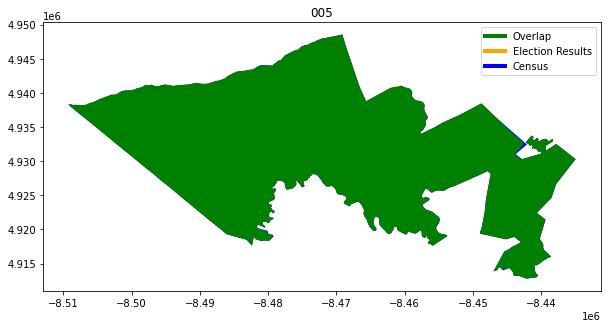

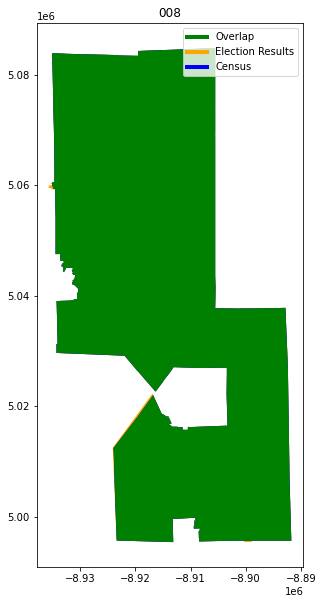

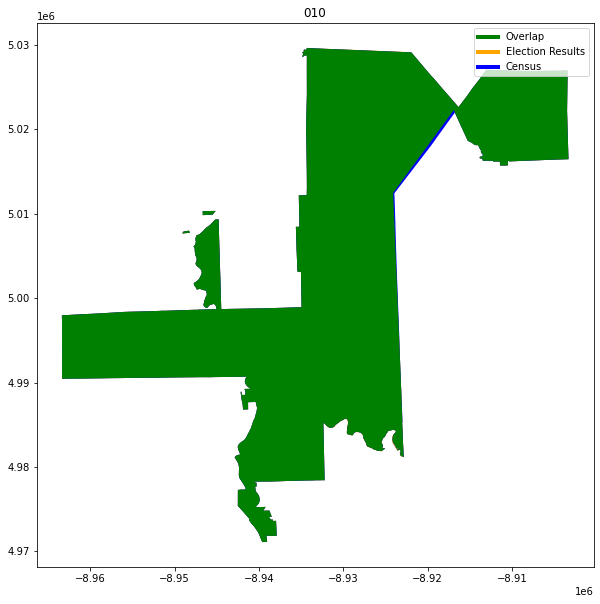

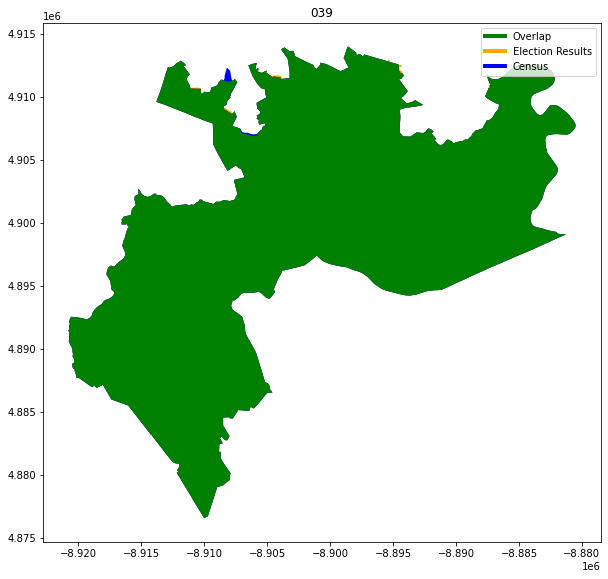

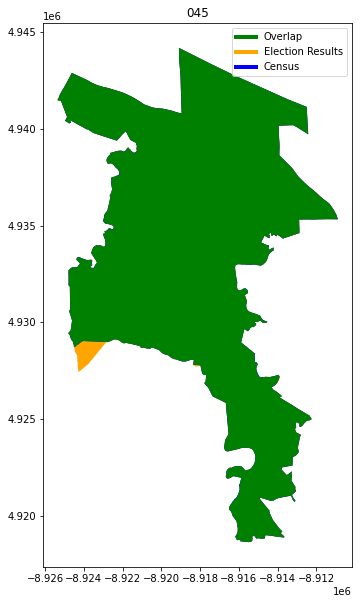

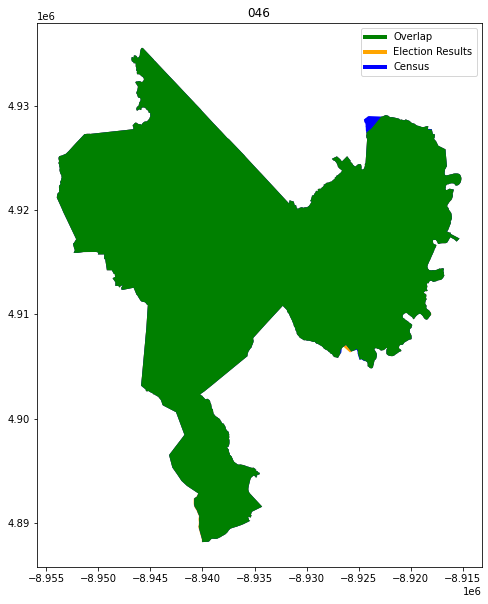

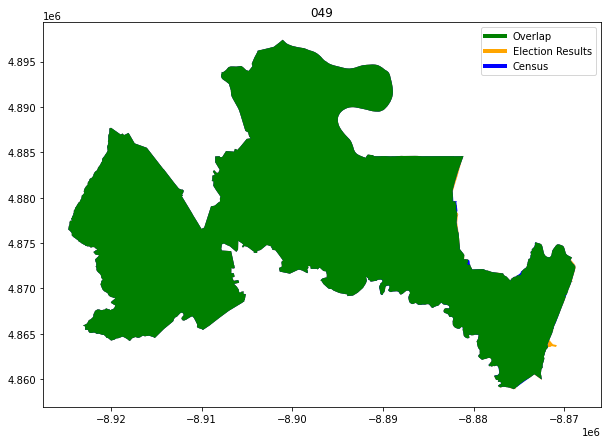

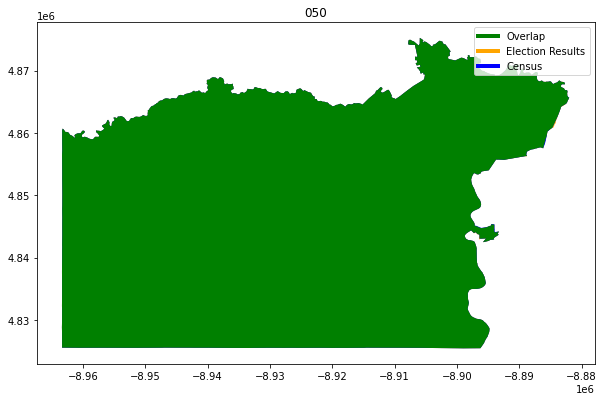

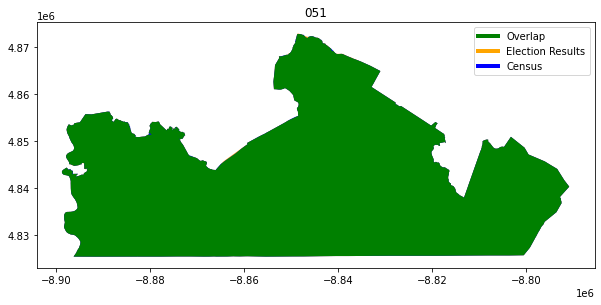

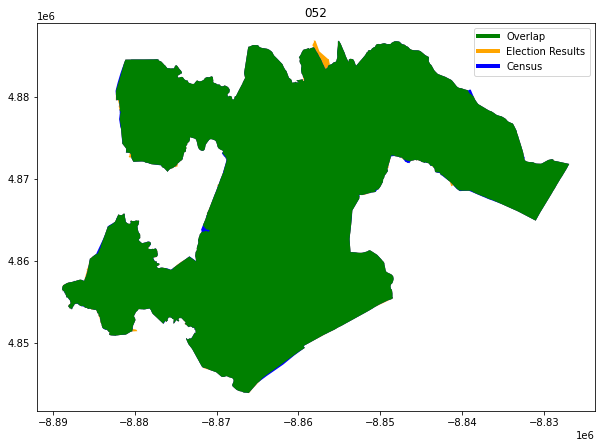

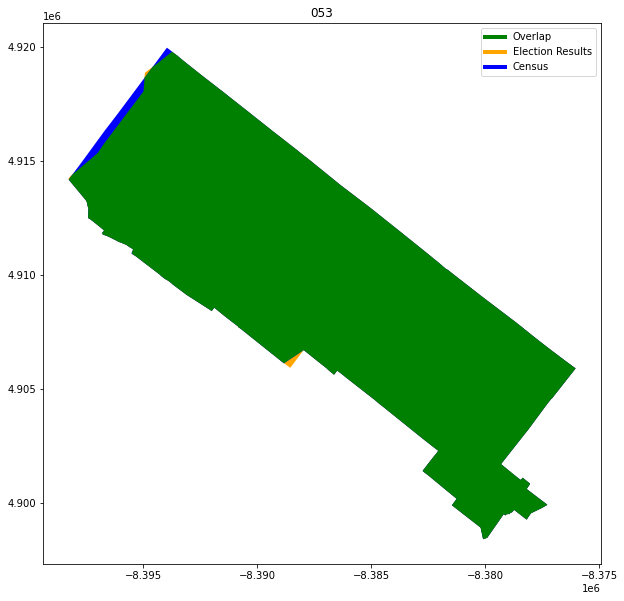

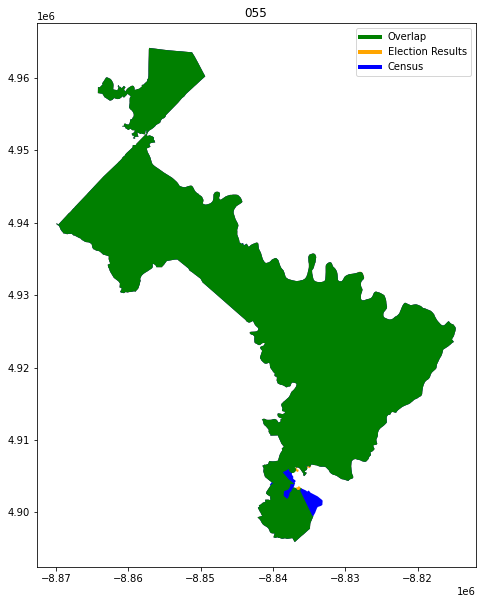

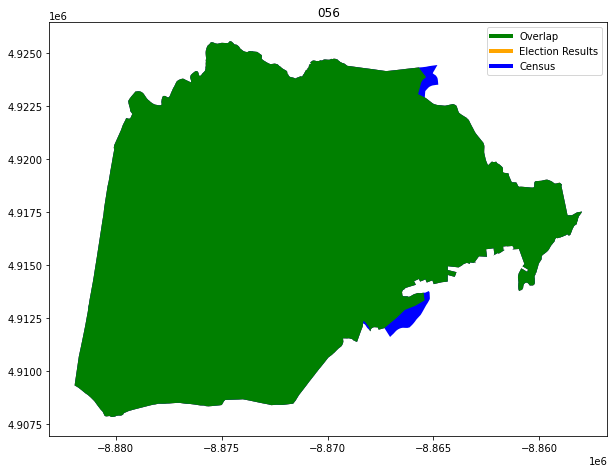

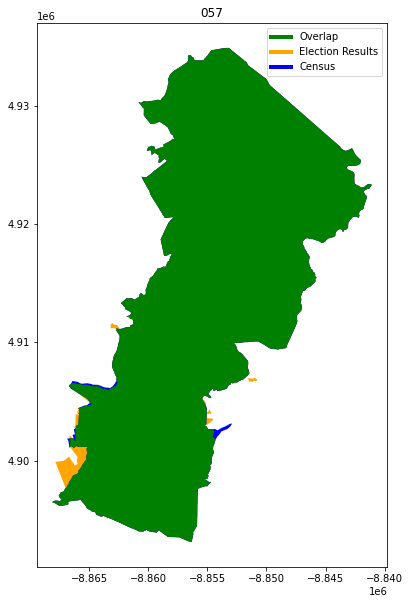

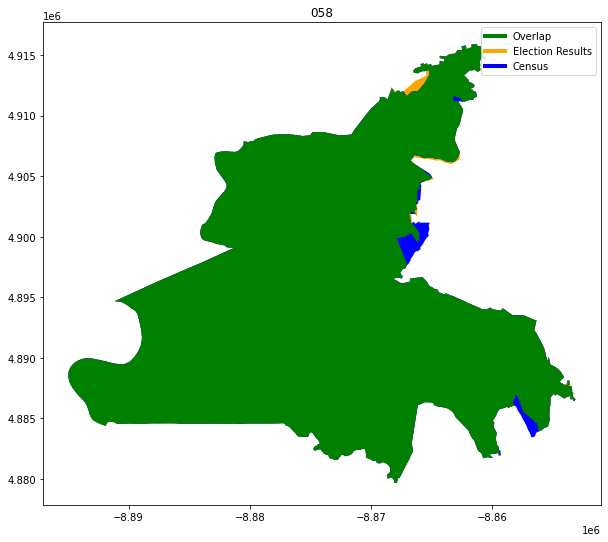

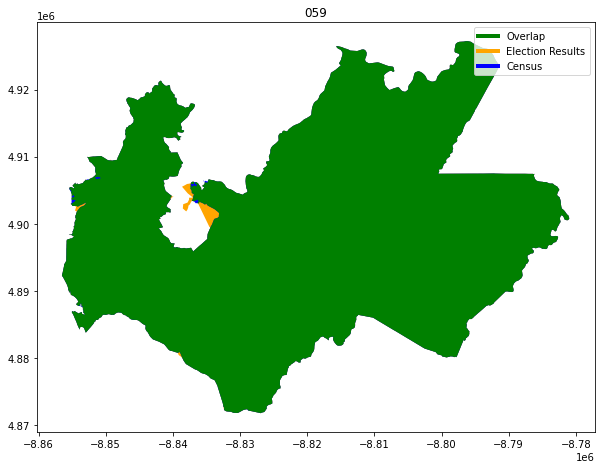

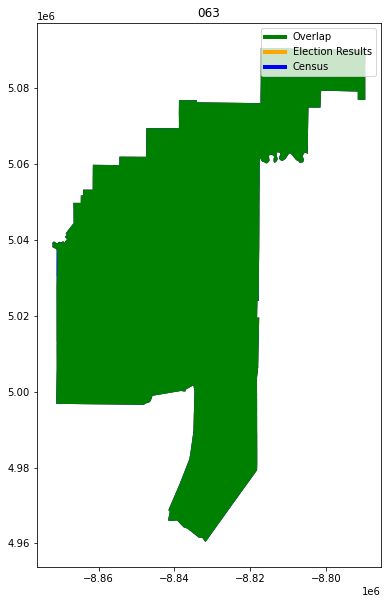

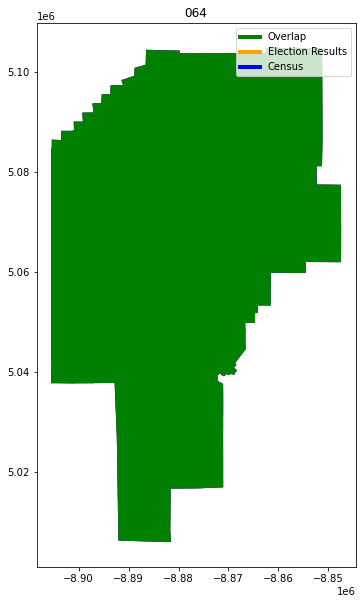

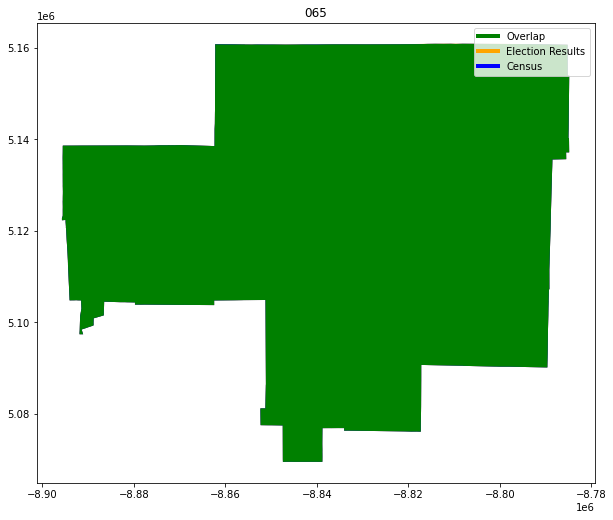

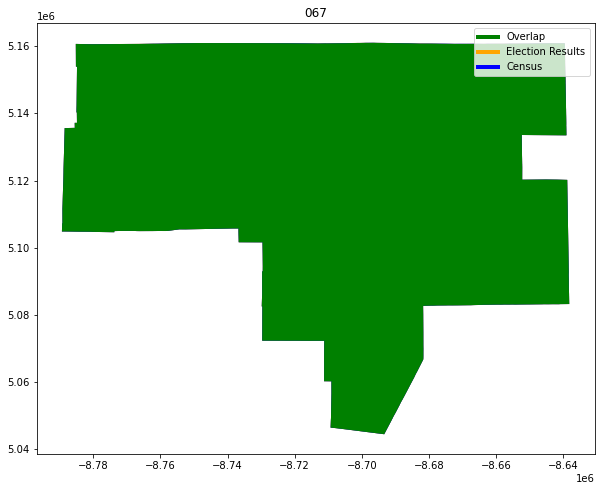

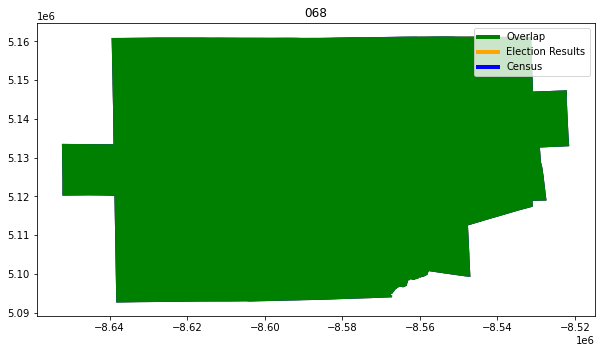

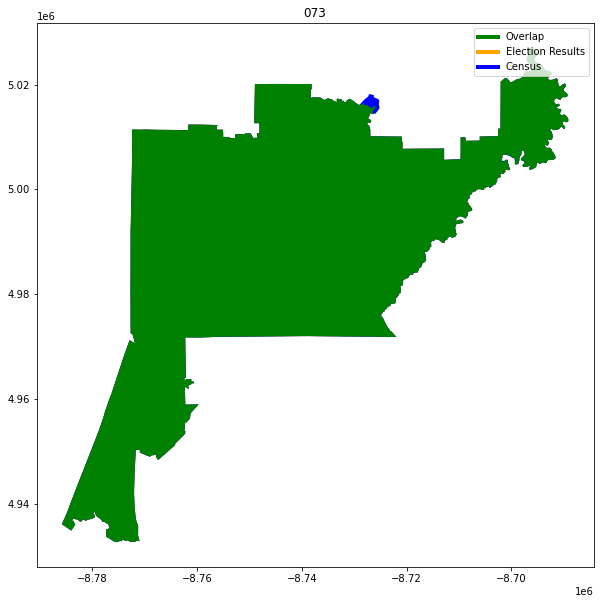

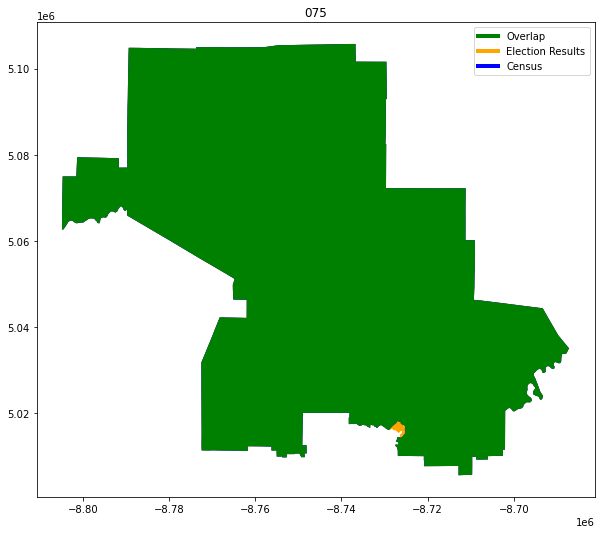

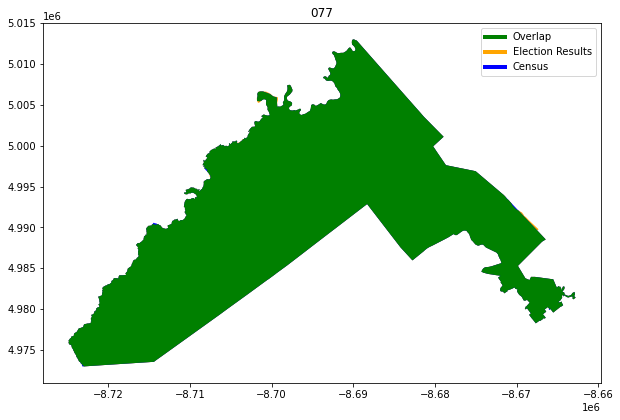

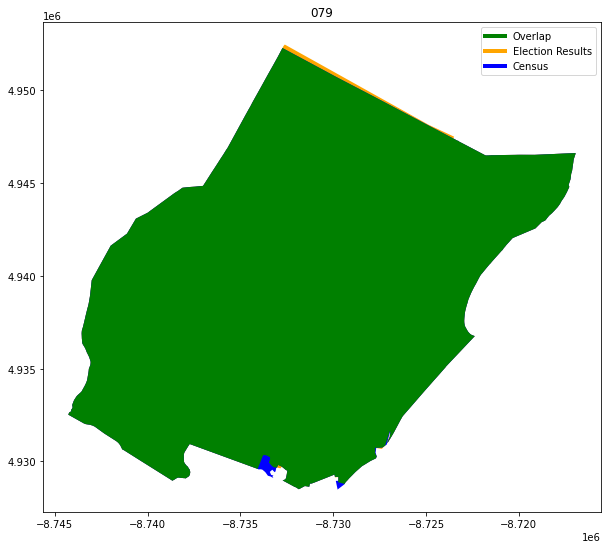

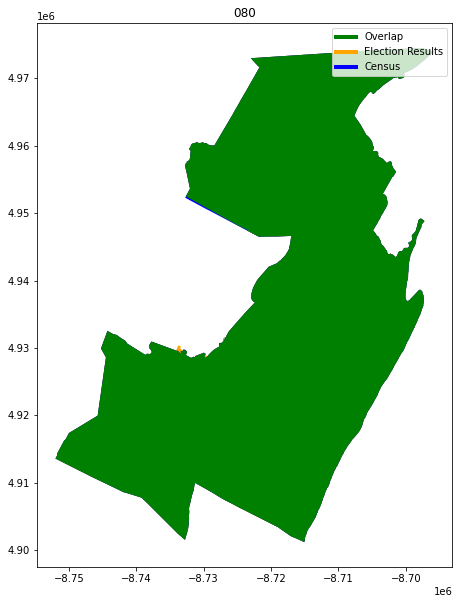

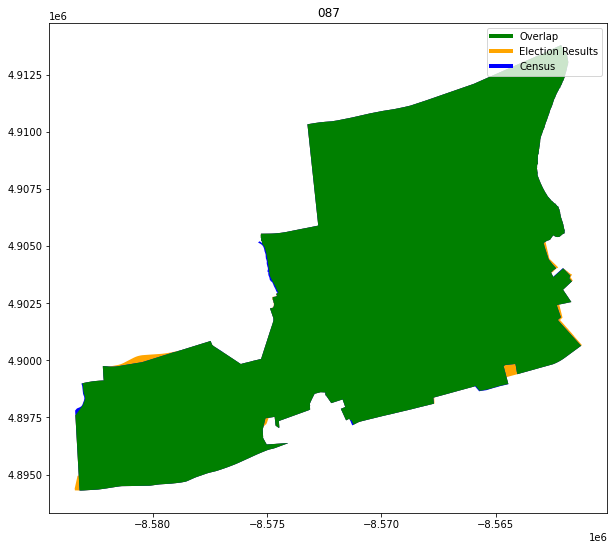

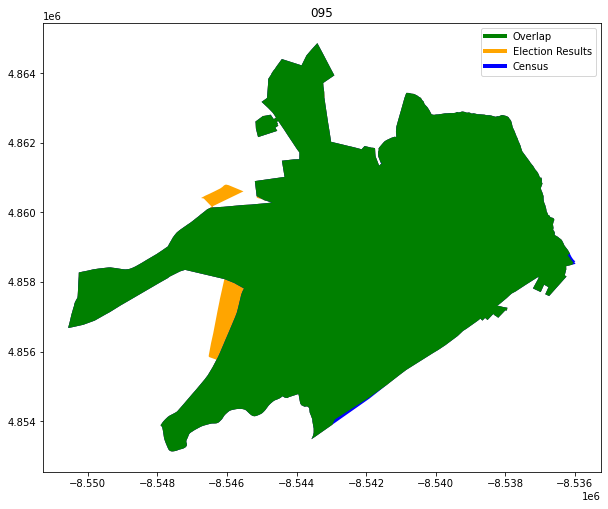

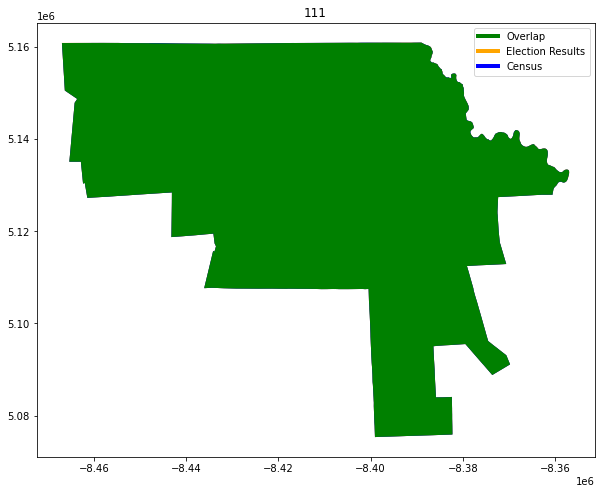

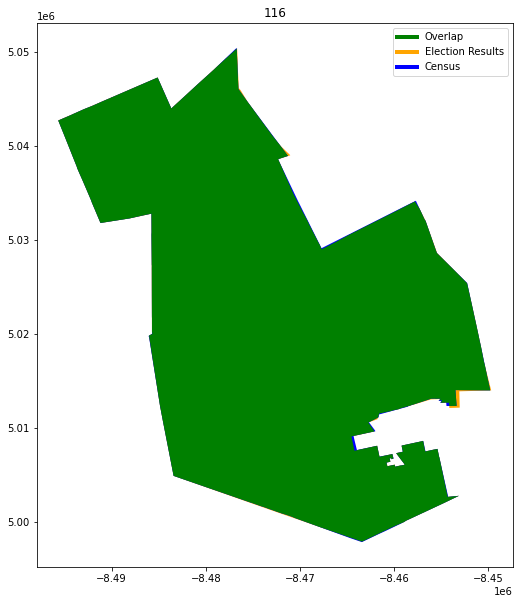

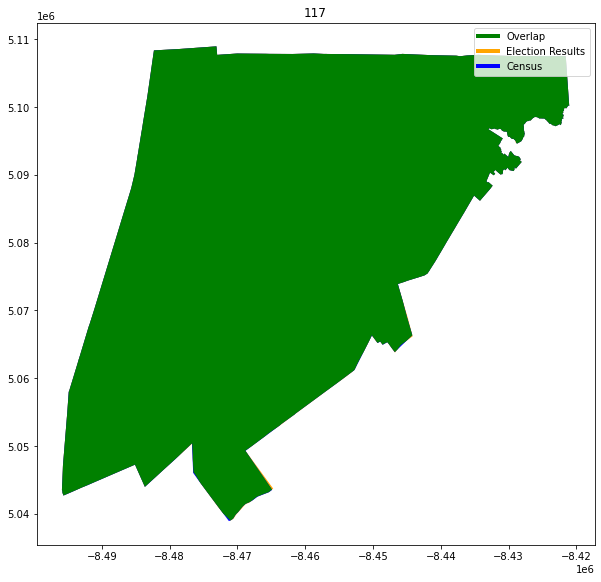

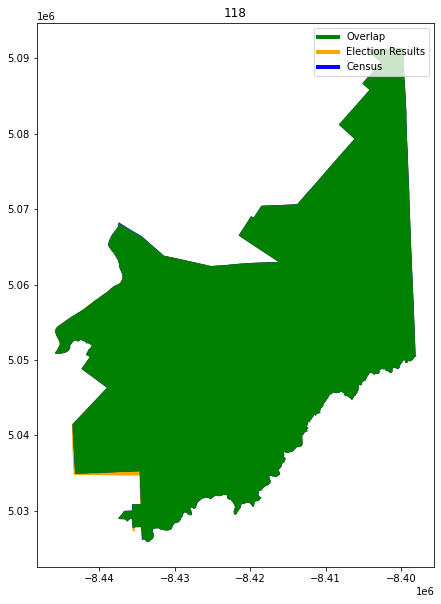

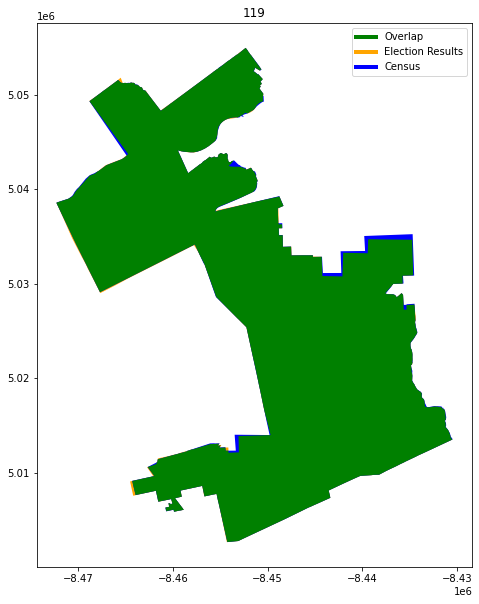

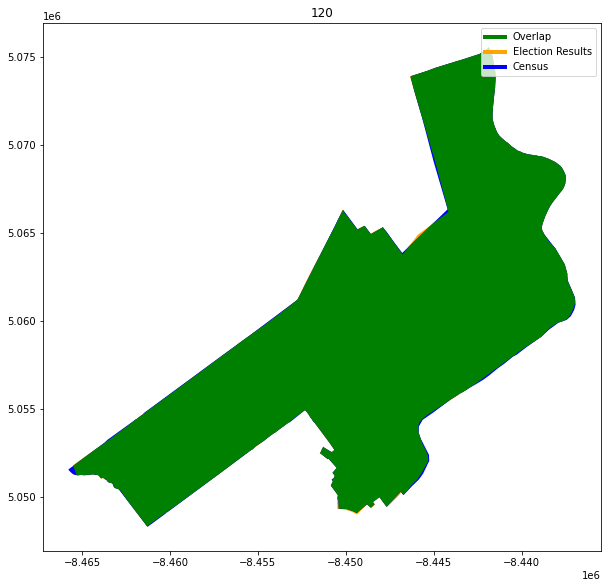

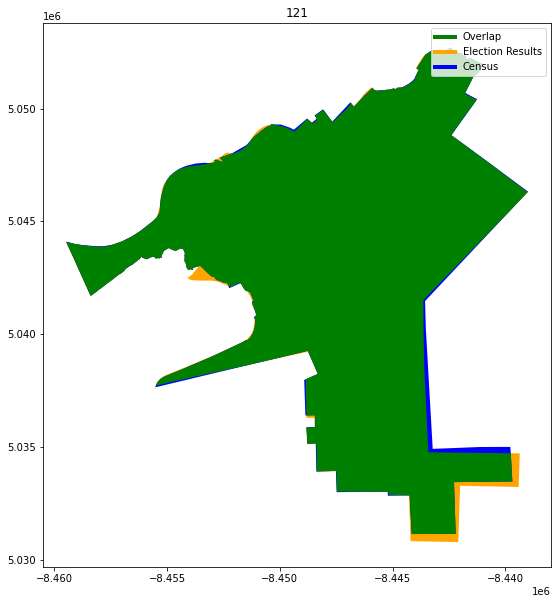

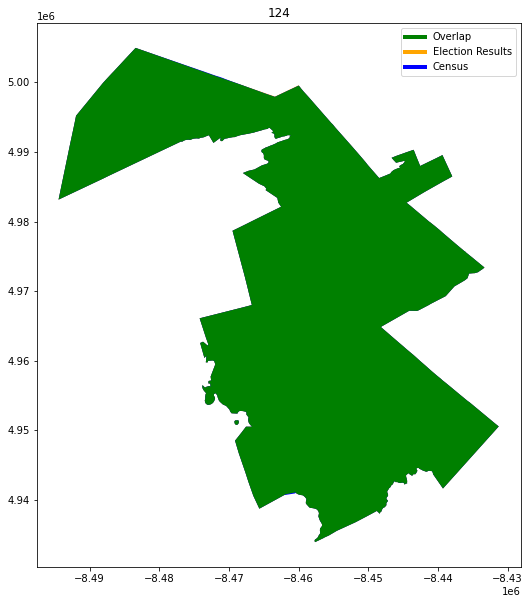

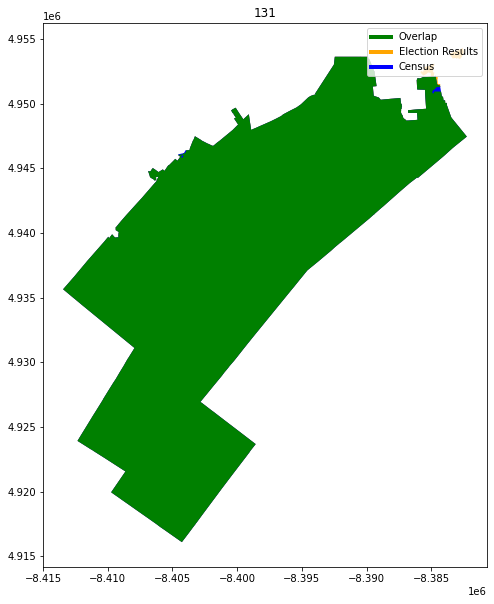

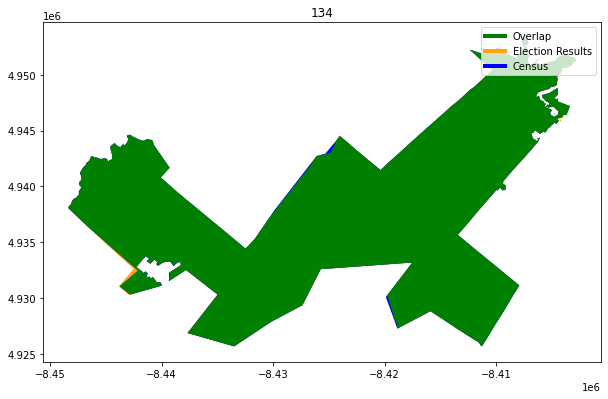

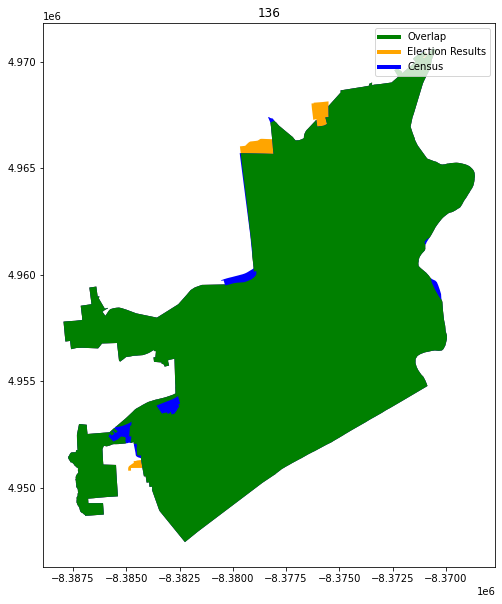

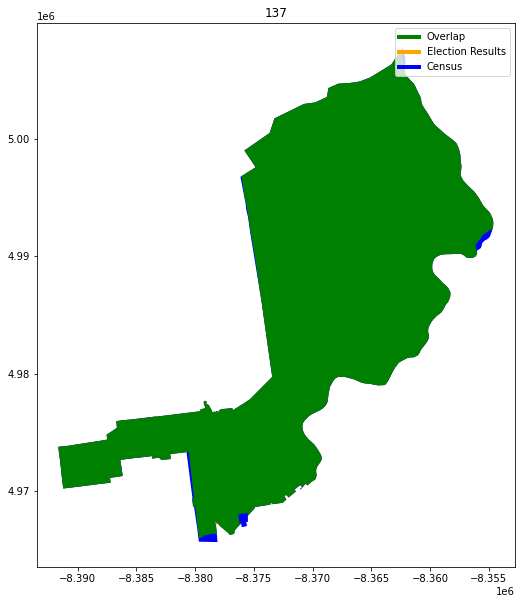

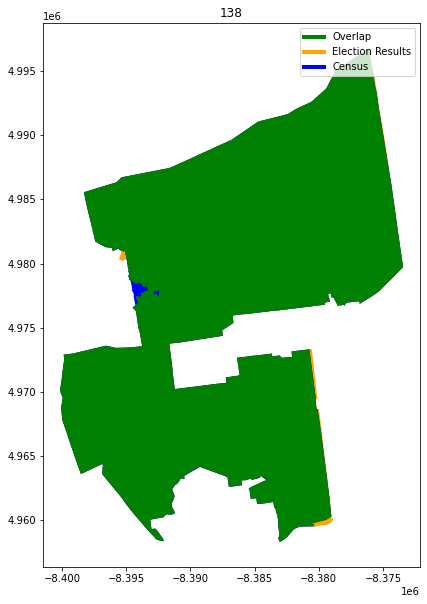

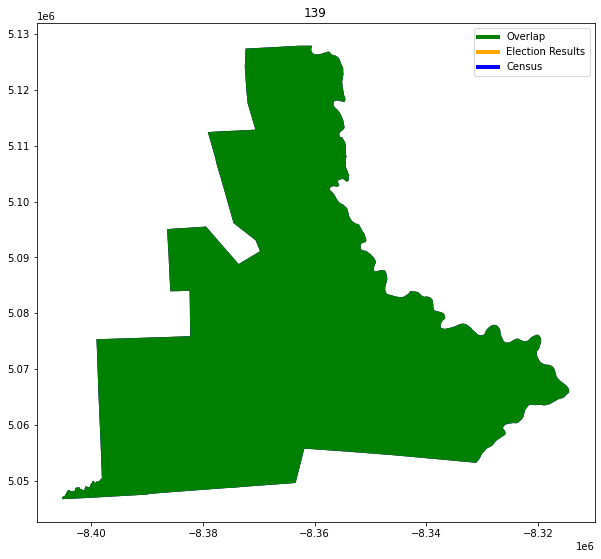

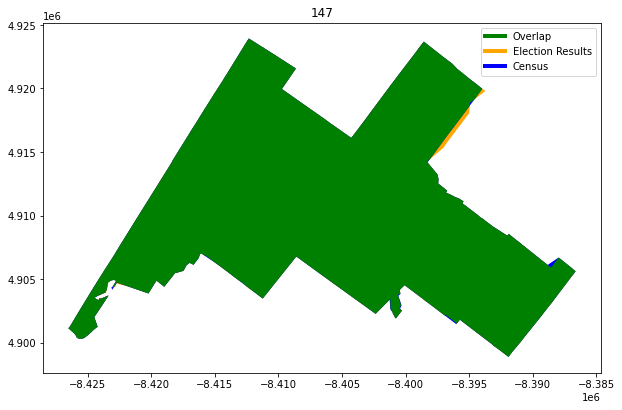

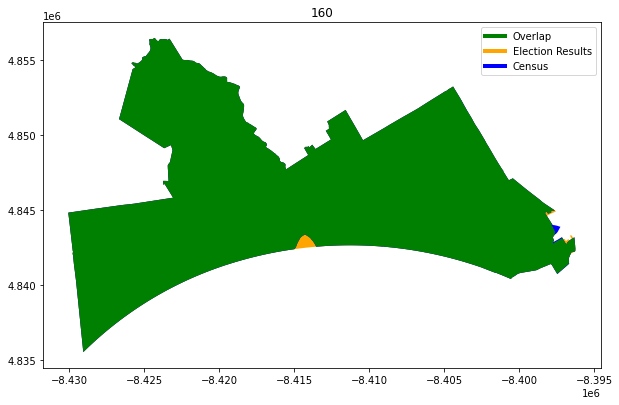

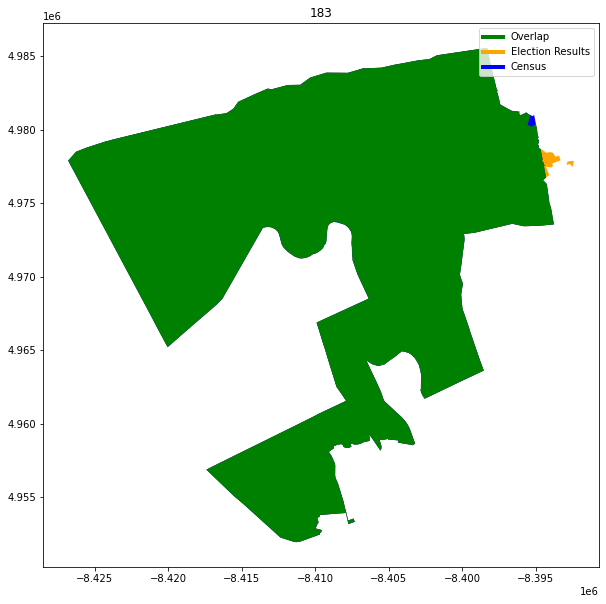

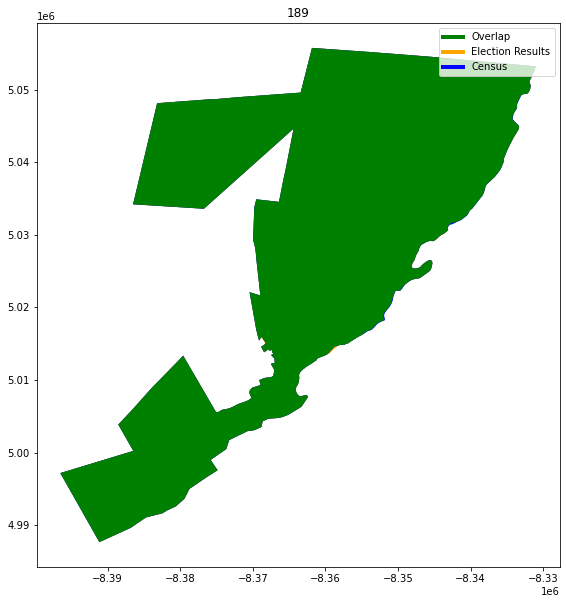

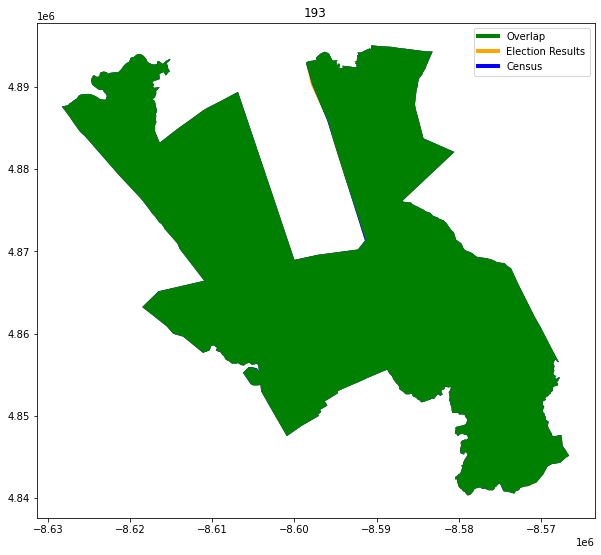

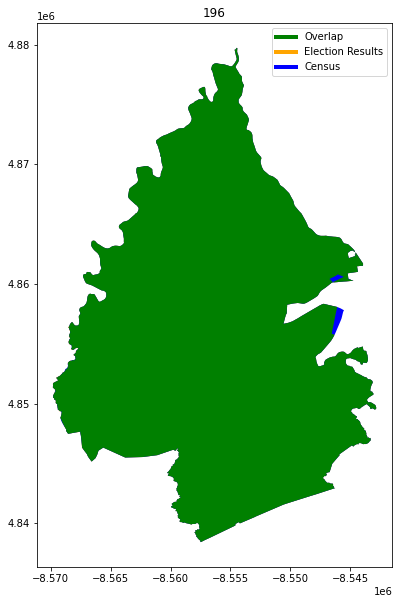

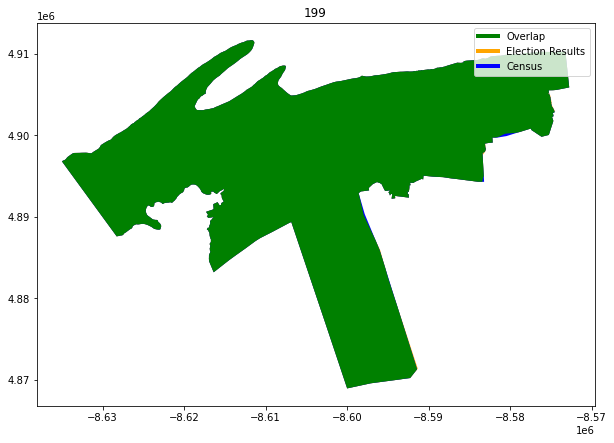

In [165]:
pdv.compare_geometries(filtered_sldl_results, pa_sldl_districts ,"Election Results", "Census", "SLDL_DIST","Districts",area_threshold=.1)


#### Congress

Checking 18 Districts for differences of greater than 0.1 km^2

1) For 06 difference in area is 0.12468162604304191
2) For 07 difference in area is 0.15631754256718194
3) For 08 difference in area is 0.9870541949885789
4) For 09 difference in area is 0.6697391704108525
5) For 10 difference in area is 0.1312306312297051
6) For 12 difference in area is 0.4331037580174556
7) For 13 difference in area is 0.271363116696655
8) For 15 difference in area is 0.3126585333401322

Scroll down to see plots of any differences

Of the 18 Districts:

0 Districts w/ a difference of 0 km^2
10 Districts w/ a difference between 0 and .1 km^2
6 Districts w/ a difference between .1 and .5 km^2
2 Districts w/ a difference between .5 and 1 km^2
0 Districts w/ a difference between 1 and 2 km^2
0 Districts w/ a difference between 2 and 5 km^2
0 Districts w/ a difference greater than 5 km^2


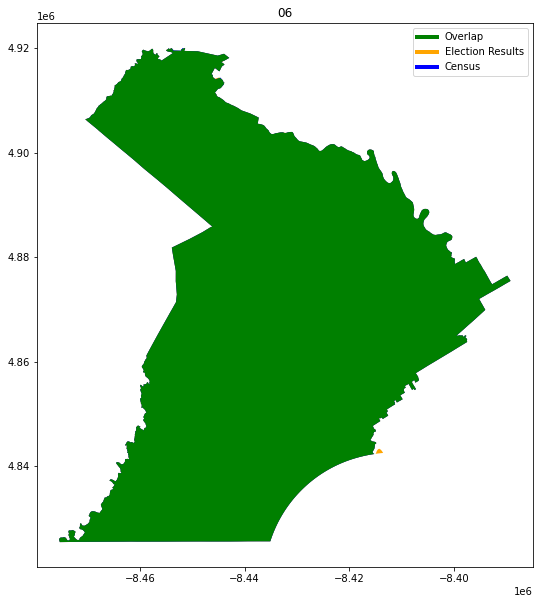

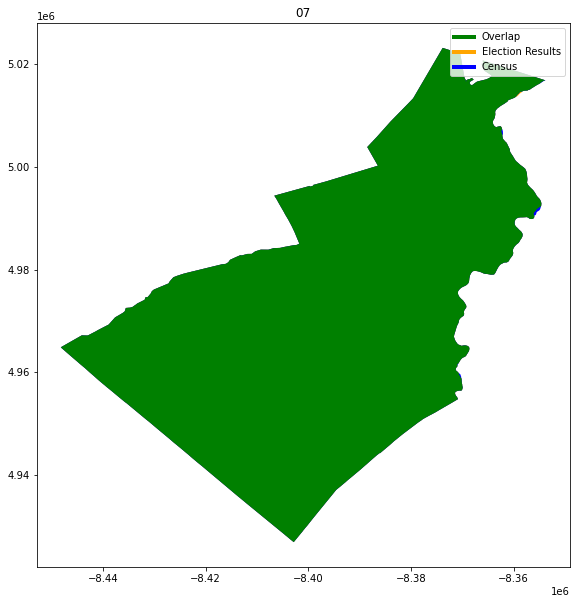

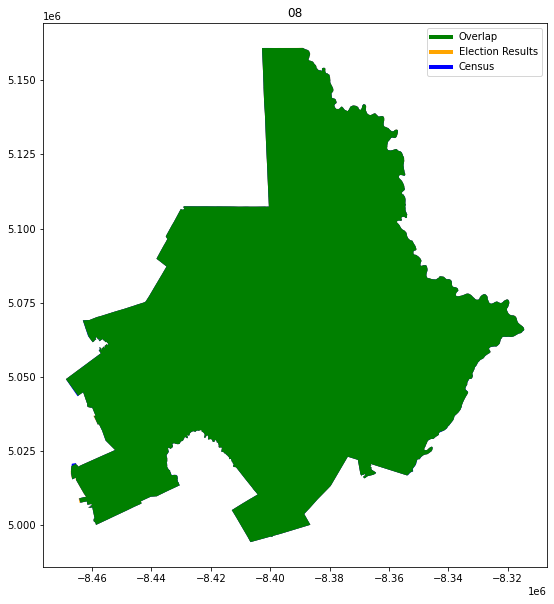

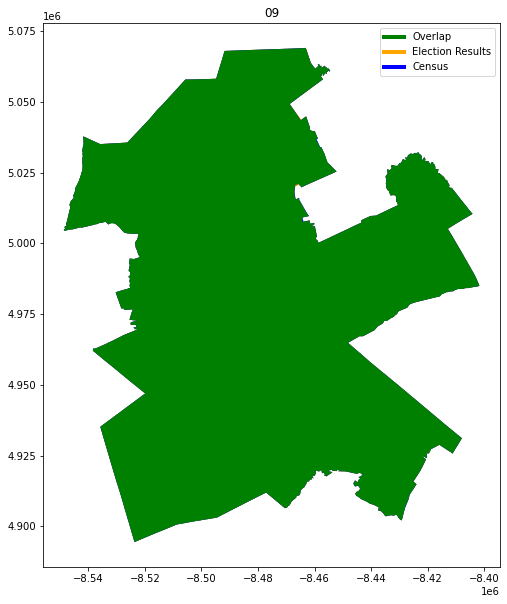

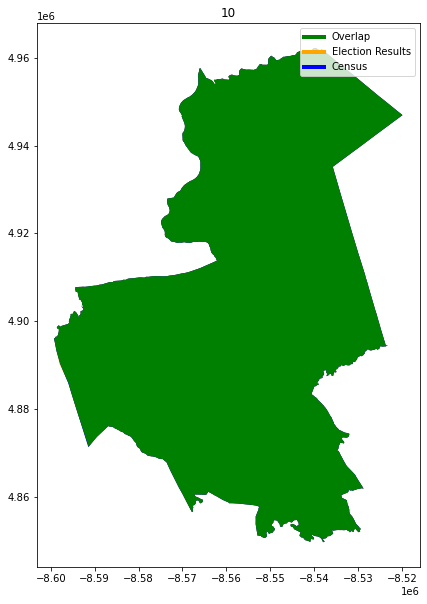

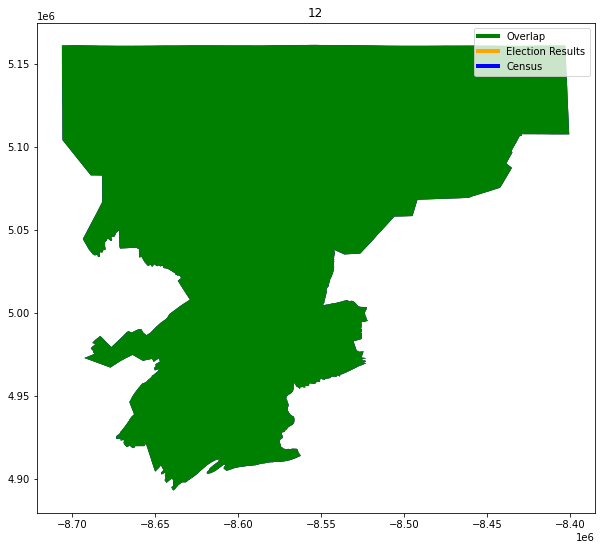

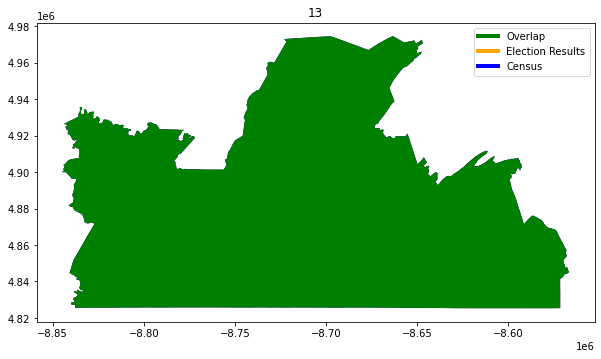

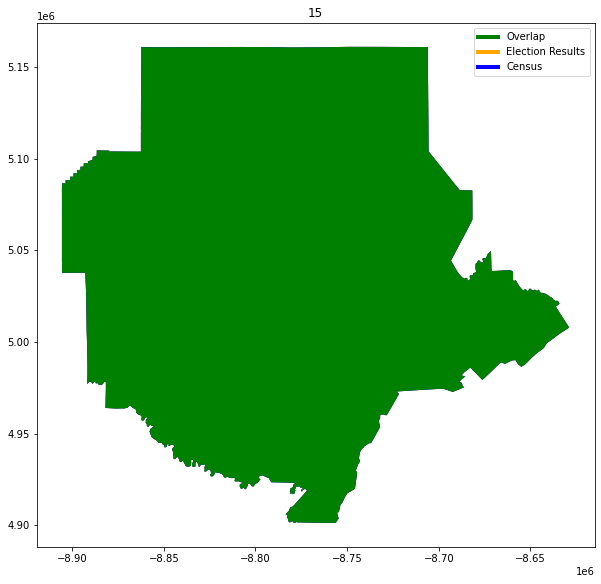

In [166]:
pdv.compare_geometries(filtered_cong_results, pa_cong_districts ,"Election Results", "Census", "CONG_DIST","Districts",area_threshold=.1)


#### State Senate

Checking 25 Districts for differences of greater than 0.1 km^2

1) For 14 difference in area is 2.1052710406990407
2) For 18 difference in area is 0.20515121501748104
3) For 20 difference in area is 2.1741999266253473
4) For 22 difference in area is 0.25453427641382503
5) For 24 difference in area is 0.10797791184432554
6) For 30 difference in area is 0.1824439073411621
7) For 40 difference in area is 0.38025750026526595

Scroll down to see plots of any differences

Of the 25 Districts:

0 Districts w/ a difference of 0 km^2
18 Districts w/ a difference between 0 and .1 km^2
5 Districts w/ a difference between .1 and .5 km^2
0 Districts w/ a difference between .5 and 1 km^2
0 Districts w/ a difference between 1 and 2 km^2
2 Districts w/ a difference between 2 and 5 km^2
0 Districts w/ a difference greater than 5 km^2


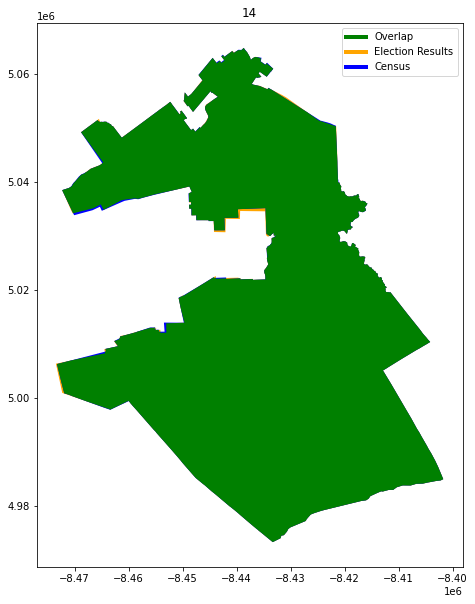

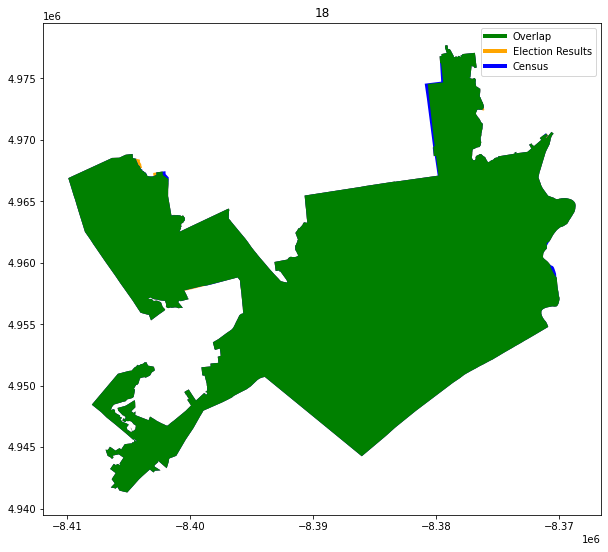

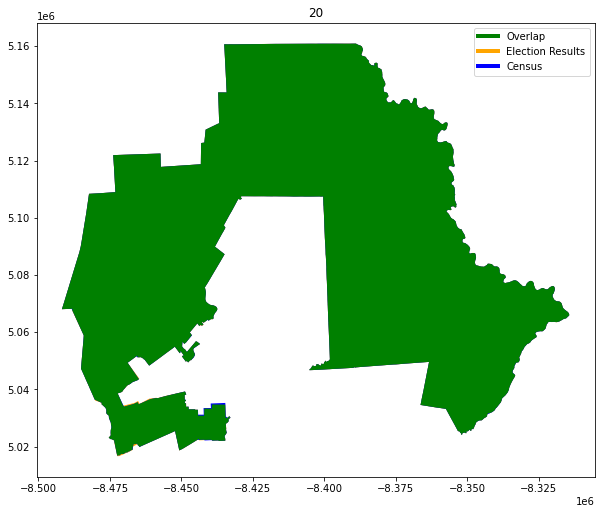

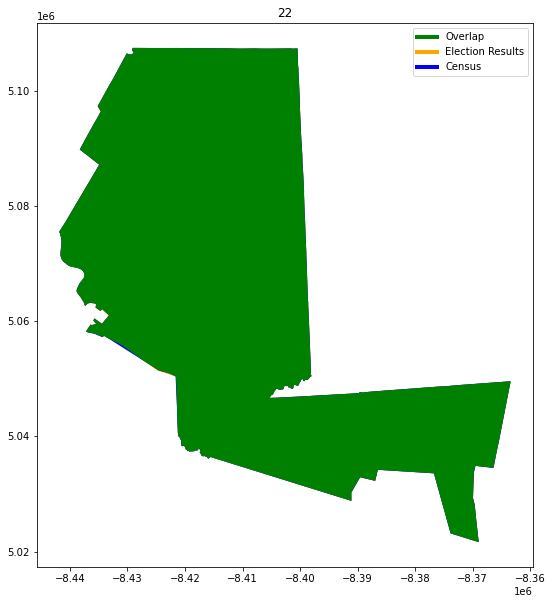

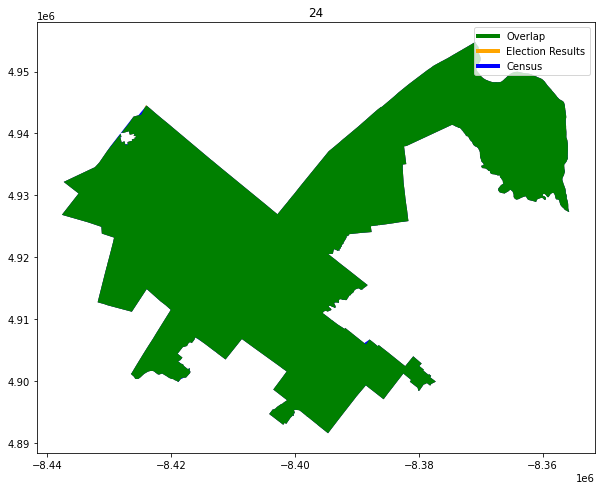

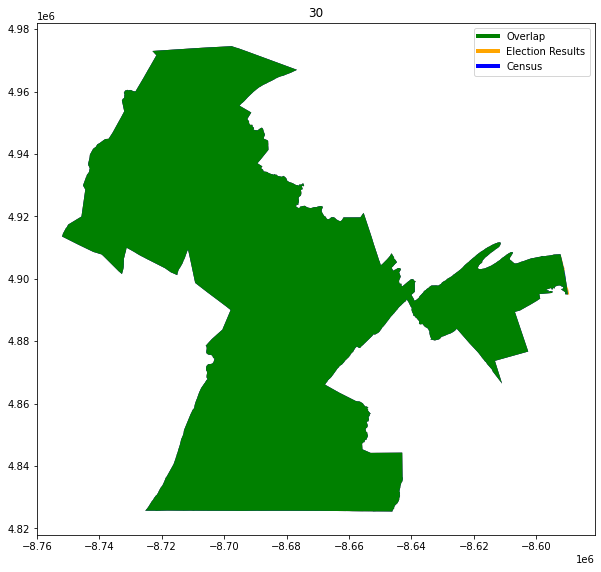

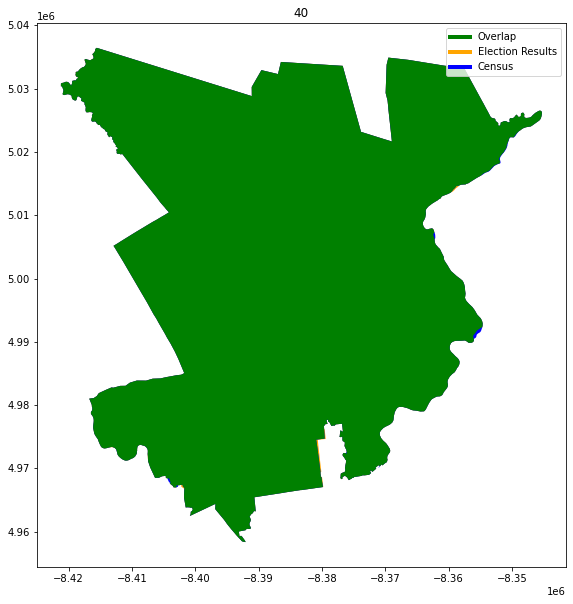

In [167]:
pdv.compare_geometries(filtered_sldu_results, pa_sldu_districts ,"Election Results", "Census", "SLDU_DIST","Districts",area_threshold=.1)


#### Special Congress

Checking 2 Districts for differences of greater than 0.1 km^2

1) For 07 difference in area is 0.3211960961274706
2) For 15 difference in area is 0.7145122475930424

Scroll down to see plots of any differences

Of the 2 Districts:

0 Districts w/ a difference of 0 km^2
0 Districts w/ a difference between 0 and .1 km^2
1 Districts w/ a difference between .1 and .5 km^2
1 Districts w/ a difference between .5 and 1 km^2
0 Districts w/ a difference between 1 and 2 km^2
0 Districts w/ a difference between 2 and 5 km^2
0 Districts w/ a difference greater than 5 km^2


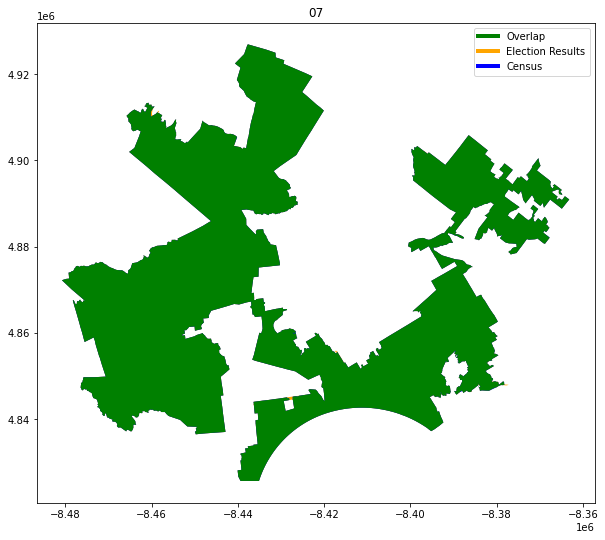

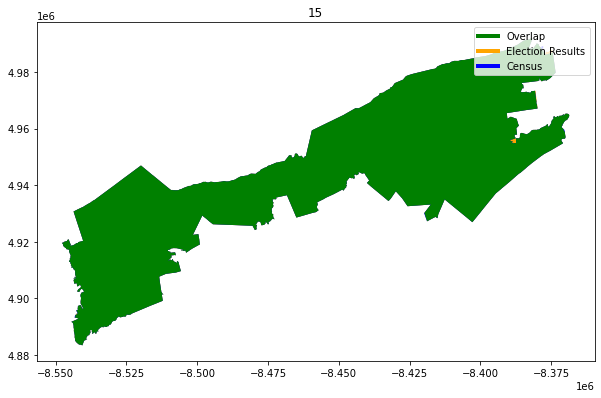

In [168]:
pdv.compare_geometries(filtered_scong_results, pa_scong_districts ,"Election Results", "Census", "SCONG_DIST","Districts",area_threshold=.1)


## Clean Files for Final Export

In [169]:
pa_18_st_sldu_spec_cong_prec
pa_18_cong_prec
pa_18_sldl_prec

,UNIQUE_ID,COUNTY,PREC_NAME,COUNTYFP,STATEFP,VTDST,NAME,geometry,GSL001DHAR,GSL002DMER,...,GSL199RGLE,GSL200DRAB,GSL200OWRI,GSL201DKIN,GSL201OWRI,GSL202DSOL,GSL202OWRI,GSL203DFIT,GSL203OWRI,SLDL_DIST
0,001000010ABBOTTSTOWN,Adams,Abbottstown,001,42,000010,ABBOTTSTOWN,"POLYGON Z ((-76.99801 39.88359 0.00000, -76.99...",0,0,...,0,0,0,0,0,0,0,0,0,193
1,001000020ARENDTSVILLE,Adams,Arendtsville,001,42,000020,ARENDTSVILLE,"POLYGON Z ((-77.31141 39.92625 0.00000, -77.30...",0,0,...,0,0,0,0,0,0,0,0,0,193
2,001000030BENDERSVILLE,Adams,Bendersville,001,42,000030,BENDERSVILLE,"POLYGON Z ((-77.25596 39.98075 0.00000, -77.25...",0,0,...,0,0,0,0,0,0,0,0,0,193
3,001000040BERWICK,Adams,Berwick,001,42,000040,BERWICK,"MULTIPOLYGON Z (((-76.99558 39.88677 0.00000, ...",0,0,...,0,0,0,0,0,0,0,0,0,193
4,001000050BIGLERVILLE,Adams,Biglerville,001,42,000050,BIGLERVILLE,"POLYGON Z ((-77.25594 39.93043 0.00000, -77.25...",0,0,...,0,0,0,0,0,0,0,0,0,193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9160,029000915PHOENIXVILLE WARD MIDDLE PRECINCT 01-...,Chester,0467 PHOENIXVILLE MID-1,029,42,000915,PHOENIXVILLE WARD MIDDLE PRECINCT 01,"POLYGON Z ((-75.51152 40.13760 0.00000, -75.51...",0,0,...,0,0,0,0,0,0,0,0,0,157
9161,039000440STEUBEN-(SLDL-006),Crawford,Steuben Twp,039,42,000440,STEUBEN,"MULTIPOLYGON Z (((-79.89941 41.66858 0.00000, ...",0,0,...,0,0,0,0,0,0,0,0,0,006
9162,039000440STEUBEN-(SLDL-065),Crawford,Steuben Twp,039,42,000440,STEUBEN,"POLYGON Z ((-79.90113 41.71304 0.00000, -79.90...",0,0,...,0,0,0,0,0,0,0,0,0,065
9163,091003835WHITPAIN DISTRICT 06-(SLDL-061),Montgomery,Whitpain 6,091,42,003835,WHITPAIN DISTRICT 06,"POLYGON Z ((-75.27561 40.13394 0.00000, -75.27...",0,0,...,0,0,0,0,0,0,0,0,0,061


In [170]:
vest_pa_18.columns

Index(['STATEFP', 'COUNTYFP', 'VTDST', 'NAME', 'G18USSDCAS', 'G18USSRBAR',
       'G18USSLKER', 'G18USSGGAL', 'G18GOVDWOL', 'G18GOVRWAG', 'G18GOVLKRA',
       'G18GOVGGLO', 'geometry', 'UNIQUE_ID'],
      dtype='object')

In [171]:
info_columns

['UNIQUE_ID',
 'COUNTY',
 'PREC_NAME',
 'COUNTYFP',
 'STATEFP',
 'VTDST',
 'NAME',
 'geometry']

In [172]:
no_split_columns.sort()
cong_columns.sort()
sldl_columns.sort()

In [173]:
pa_18_st_sldu_spec_cong_prec = pa_18_st_sldu_spec_cong_prec[["UNIQUE_ID","COUNTYFP",'STATEFP','VTDST', 'NAME','COUNTY','PREC_NAME']
                                                           +["SCONG_DIST","SLDU_DIST"]+no_split_columns+["geometry"]]

pa_18_cong_prec = pa_18_cong_prec[["UNIQUE_ID","COUNTYFP",'STATEFP','VTDST', 'NAME','COUNTY','PREC_NAME']
                                                           +["CONG_DIST"]+cong_columns+["geometry"]]

pa_18_sldl_prec = pa_18_sldl_prec[["UNIQUE_ID","COUNTYFP",'STATEFP','VTDST', 'NAME','COUNTY','PREC_NAME']
                                                           +["SLDL_DIST"]+sldl_columns+["geometry"]]


In [174]:
if not os.path.exists('./pa_gen_18_prec/'):
    os.mkdir('./pa_gen_18_prec/')

pa_18_st_sldu_spec_cong_prec.to_file('./pa_gen_18_prec/pa_st_sldu_spec_cong_18_prec.shp')
pa_18_cong_prec.to_file('./pa_gen_18_prec/pa_cong_18_prec.shp')
pa_18_sldl_prec.to_file('./pa_gen_18_prec/pa_sldl_18_prec.shp')

/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
